In [21]:


import pandas as pd
!pip install matplotlib pandas numpy-financial



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
class Mortgage:
    def __init__(
            self,
            principal,
            annual_interest_rate,
            annual_tr,
            max_months,
            monthly_payment,
            min_monthly_valorization=0.001,
            max_monthly_valorization=0.011,
            adhoc=None
    ):
        if adhoc is None:
            adhoc = dict()
        self.principal = principal
        self.annual_interest_rate = annual_interest_rate
        self.annual_tr = annual_tr
        self.monthly_payment = monthly_payment
        self.max_months = max_months
        self.min_monthly_valorization = min_monthly_valorization
        self.max_monthly_valorization = max_monthly_valorization
        self.adhoc = adhoc

    def calculate(
            self,
    ):
        df = pd.DataFrame(
            columns=[
                "remaining_balance",
                "added_interest",
                "total_interest",
                "payment",
                "total_paid",
                "amortized_amount",
                "min_value",
                "max_value",
                "min_valorization",
                "max_valorization"
            ]
        )
        monthly_interest_rate = (self.annual_interest_rate + self.annual_tr) / 12 / 100

        total_paid = 0
        total_interest = 0
        current_balance = self.principal
        month = 0
        min_value = current_balance
        max_value = current_balance

        while current_balance > 0:
            interest = current_balance * monthly_interest_rate
            payment_for_month = self.get_payment_for_month(current_balance + interest, month)

            new_balance = current_balance - payment_for_month + interest
            min_value *= (1 + self.min_monthly_valorization)
            max_value *= (1 + self.max_monthly_valorization)
            
            amortized_amount = payment_for_month - interest
            
            df.loc[month] = [
                current_balance,
                interest,
                total_interest,
                payment_for_month,
                total_paid,
                amortized_amount,
                min_value,
                max_value,
                min_value - self.principal,
                max_value - self.principal
            ]

            total_paid += payment_for_month
            total_interest += interest

            current_balance = new_balance

            month += 1
            if month > self.max_months:
                break

        return df

    def get_payment_for_month(self, current_balance, month):
        total_payment = self.monthly_payment
        adhoc_pay = self.adhoc.get(month, None)
        if adhoc_pay is not None:
            total_payment += adhoc_pay
        if total_payment > current_balance:
            total_payment = current_balance
        return total_payment

In [23]:
configurations = [
    Mortgage(
        150000,
        9.99,
        0,
        360,
        5000
    ),
    Mortgage(
        240000,
        9.99,
        0,
        360,
        2578.63
    ),
    Mortgage(
        585000,
        9.99,
        0,
        360,
        15000
    ),
    Mortgage(
        321252.03,
        8.27,
        1.76,
        342,
        3270.64,
        adhoc={
            20: 50000,
            35: 35000,
            45: 10000,
            80: 50000
        }),
    Mortgage(
        321252.03,
        8.27,
        1.76,
        342,
        5000,
        adhoc={
            20: 50000,
            35: 35000,
            45: 10000,
            80: 50000
        }),
    Mortgage(
        321252.03,
        8.27,
        1.76,
        342,
        8000,
        adhoc={
            20: 50000,
            35: 35000,
            45: 10000,
            80: 50000
        })
]
for principals in [300000, 450000, 665000, 800000]:
    for interest_rate_over_year in [6.5, 8.4, 10.8]:
        for monthly_payment in [3000, 5000, 8000, 15000, 20000]:
            for years in [10, 30]:
                for fgts in [0, 14400]:
                    configurations.append(
                        Mortgage(principals, interest_rate_over_year, 1.76, years * 12, monthly_payment, fgts),
                    )


In [24]:
NEW_INN = 880000
POLO = 100000
CASA = 180000
ENTRADA = POLO + CASA
for monthly_payment in [3000, 5000, 8000, 15000, 20000]:
    m = Mortgage(NEW_INN - ENTRADA, 8.27, 1.76, 342, monthly_payment)
    configurations.append(m)
    m.calculate()

Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EA94890BC0>: int too large to convert to float
Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAC456D070>: int too large to convert to float
Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAF2BF73B0>: int too large to convert to float
Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAF2B52930>: int too large to convert to float
Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAF37F5820>: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAF37F5760>: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule '

C:\Users\Bruno\AppData\Local\Temp\ipykernel_22228\790279168.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(30, 15))
C:\Users\Bruno\AppData\Local\Temp\ipykernel_22228\790279168.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(30, 15))


Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAF37F45C0>: int too large to convert to float
Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAF37F4620>: int too large to convert to float
Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAF37F4680>: int too large to convert to float
Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAF37F46E0>: int too large to convert to float
Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAF37F4740>: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Unable to calculate mortgage configuration <__main__.Mortgage object at 0x000001EAF37F47A0>: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule '

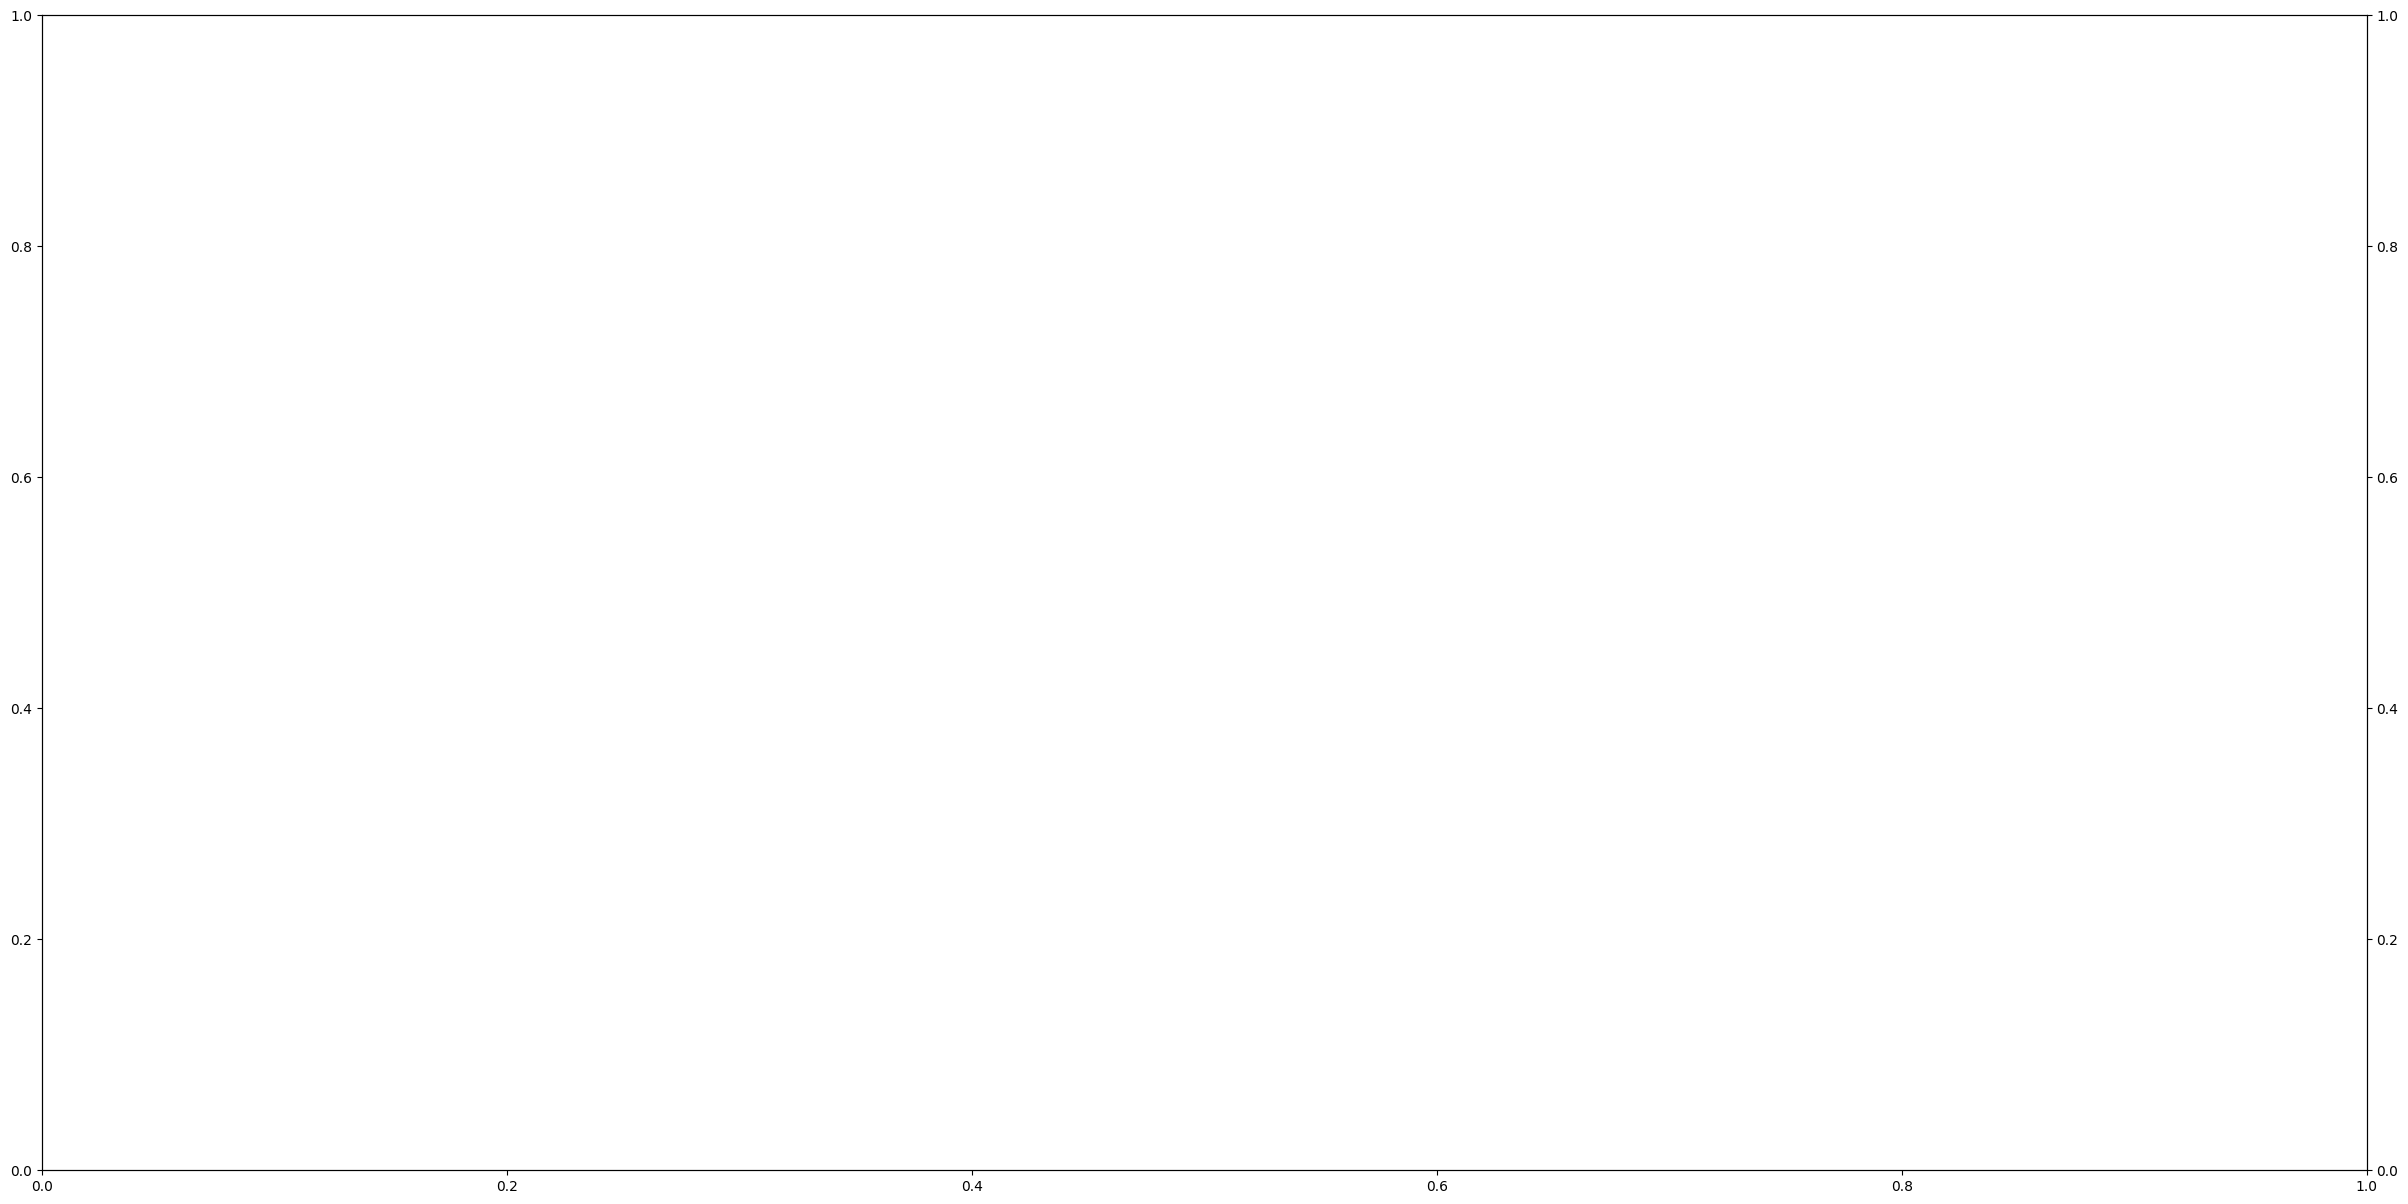

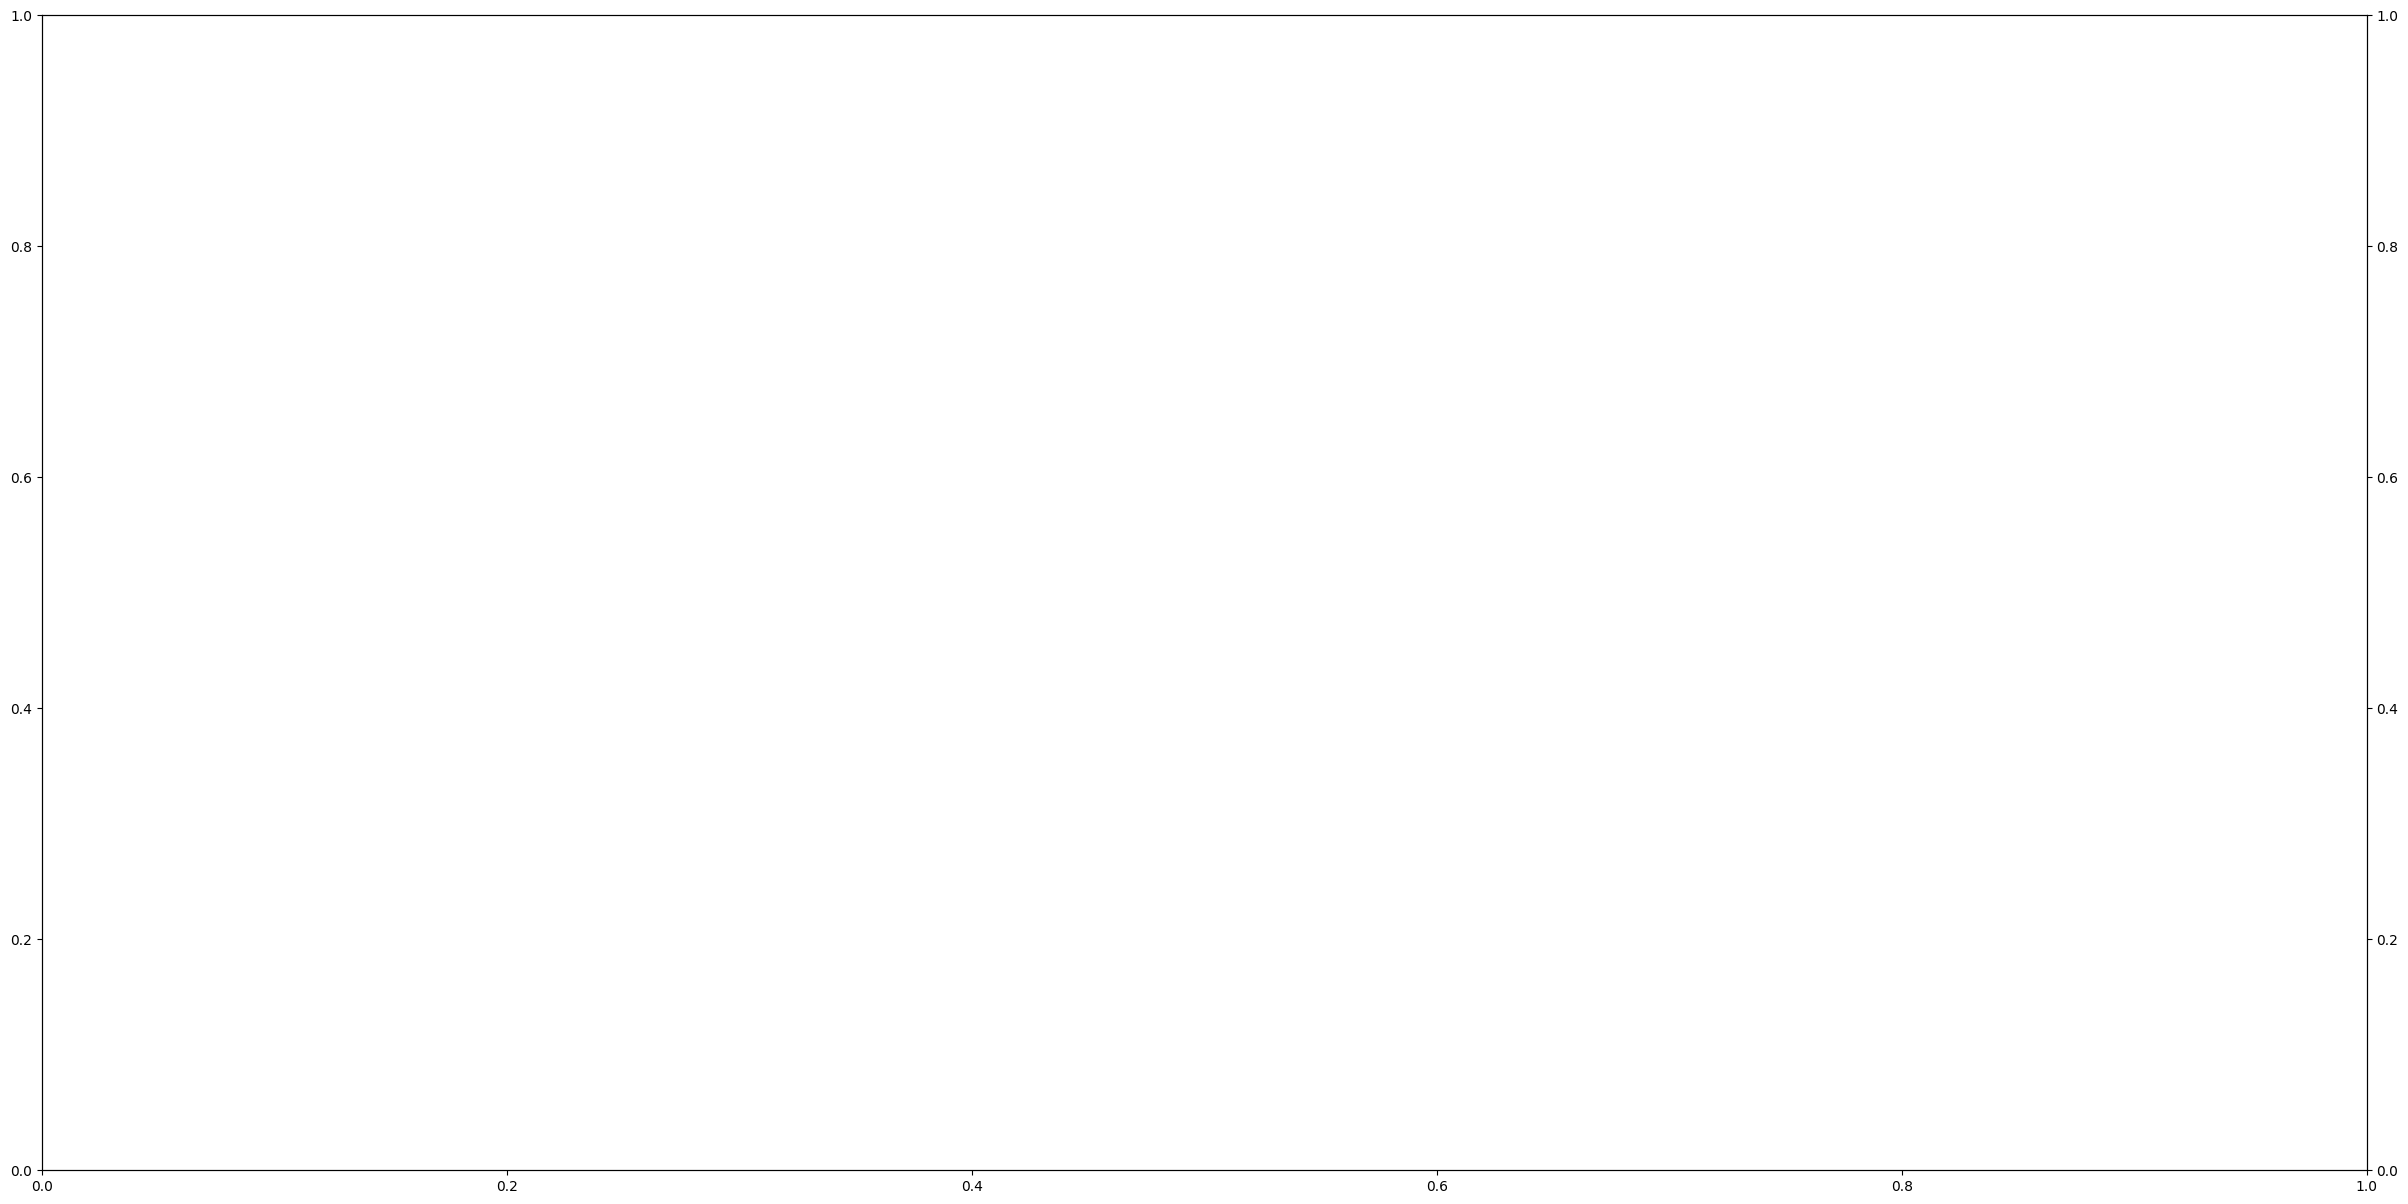

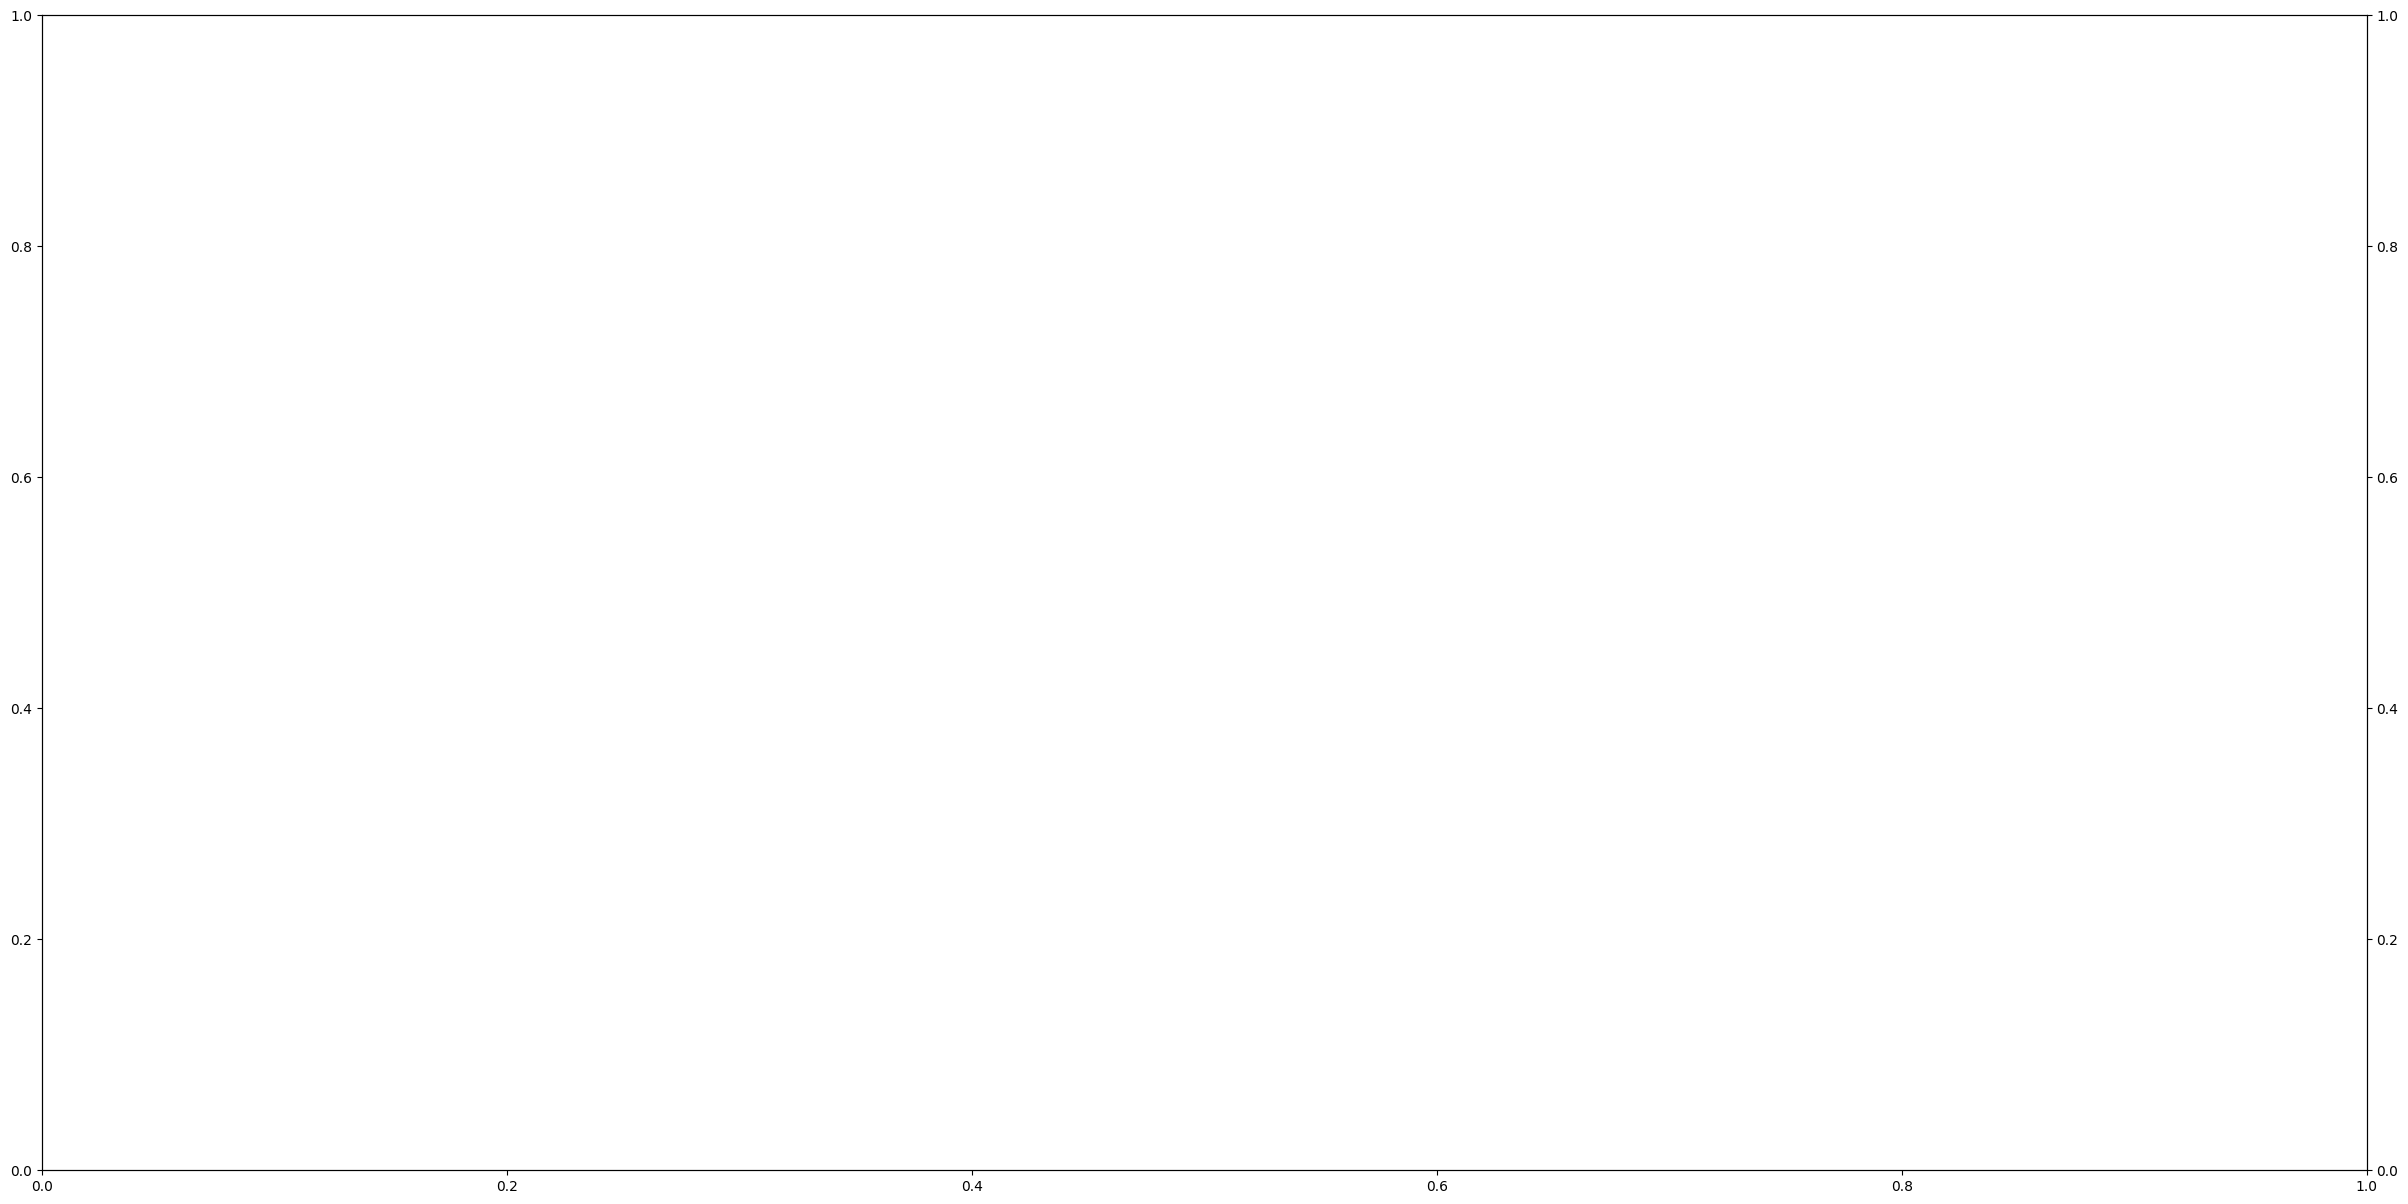

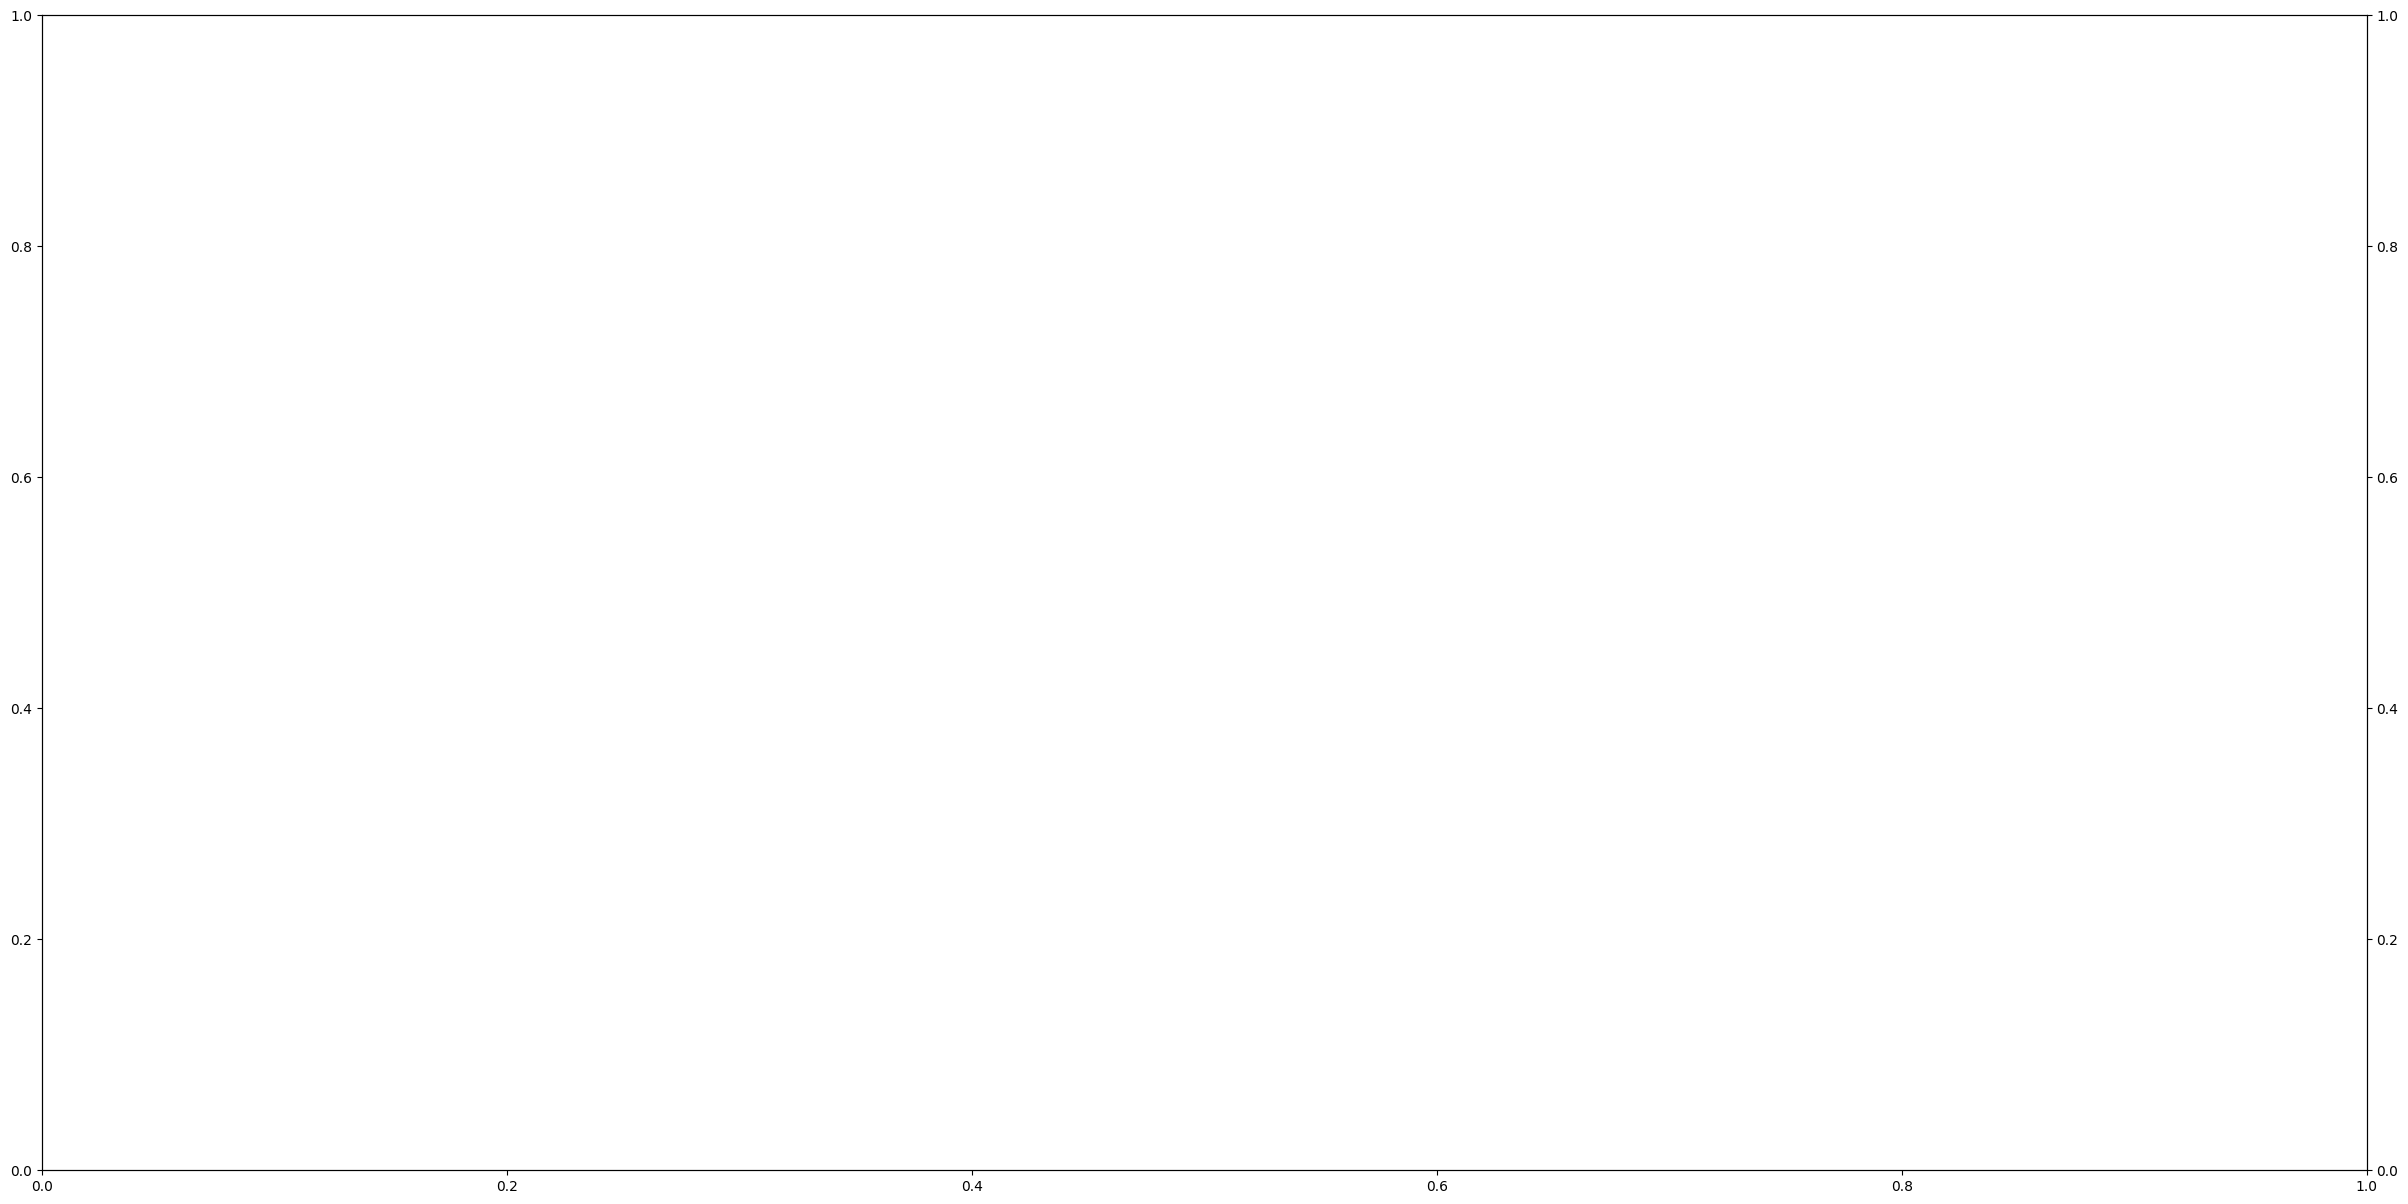

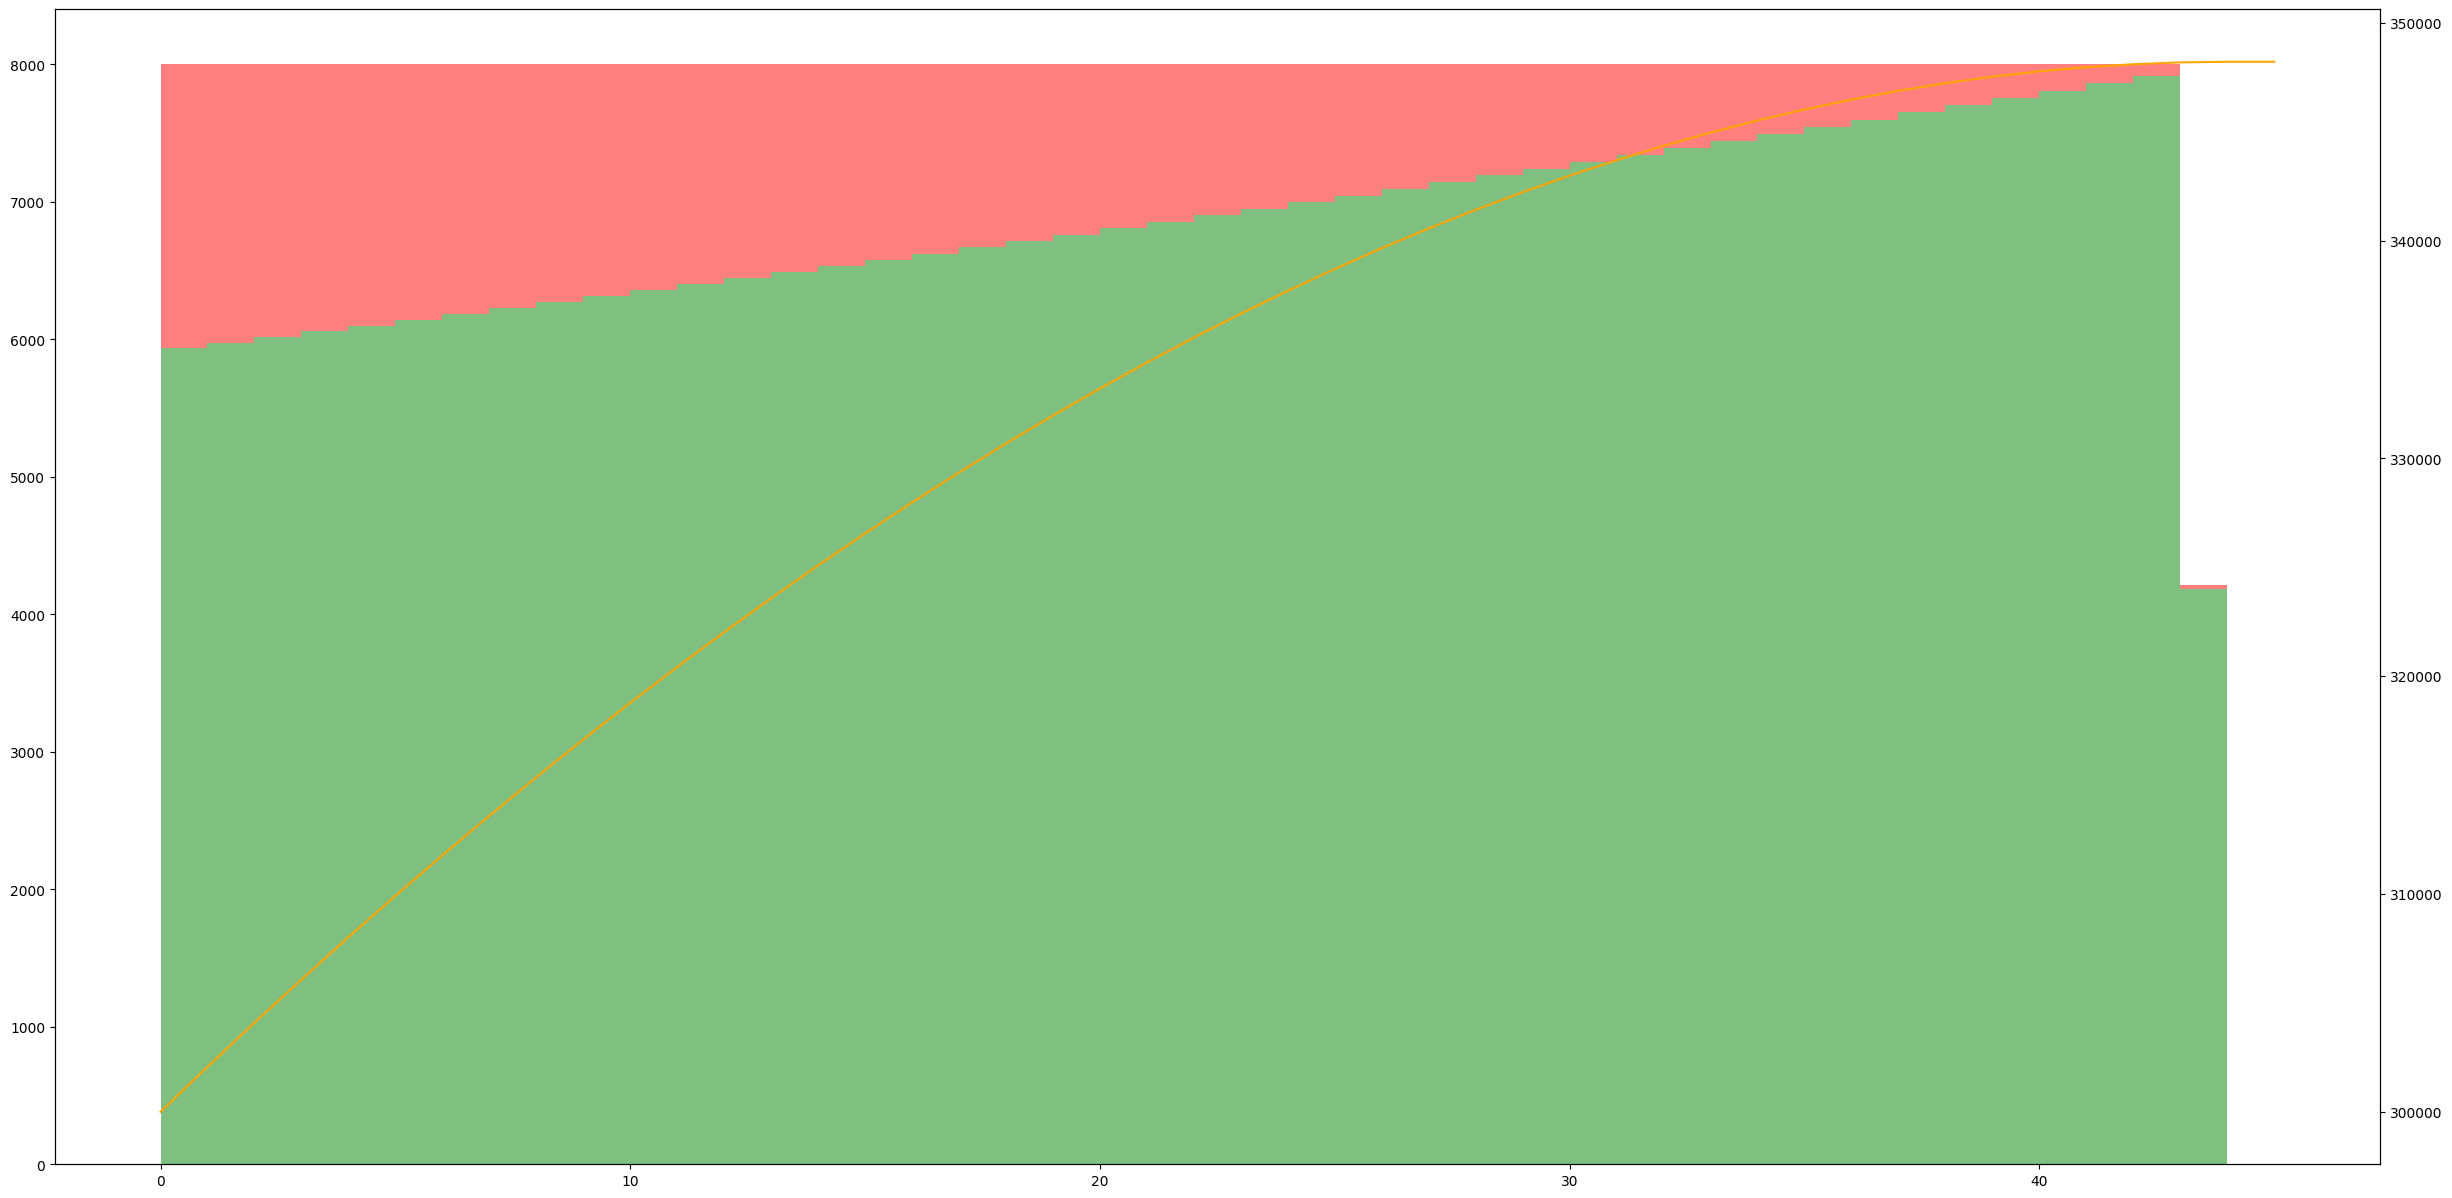

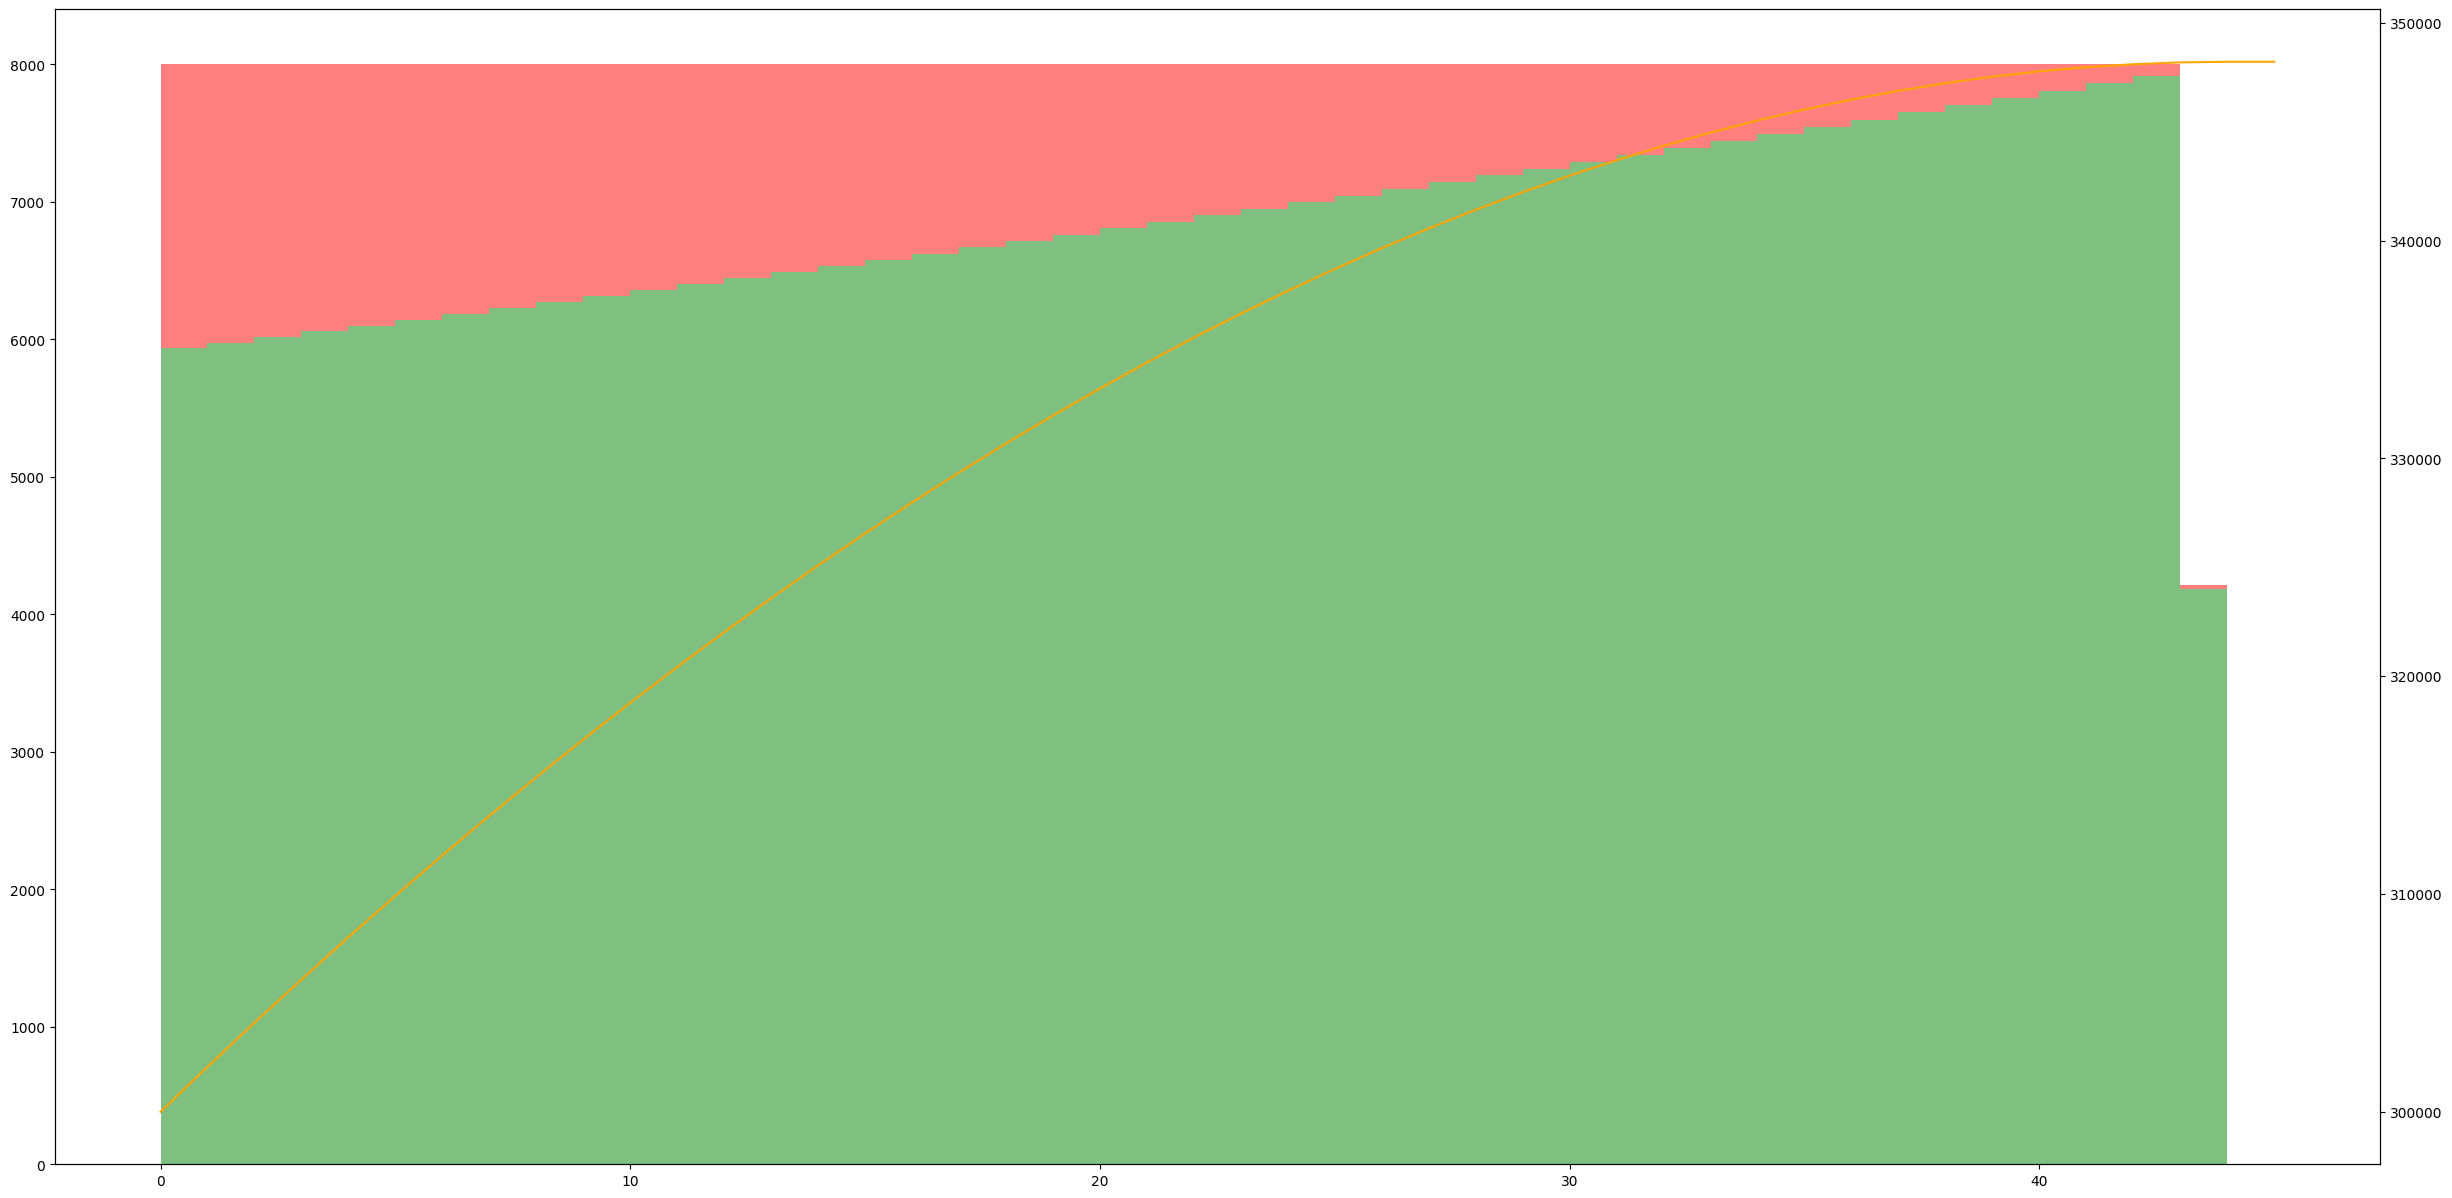

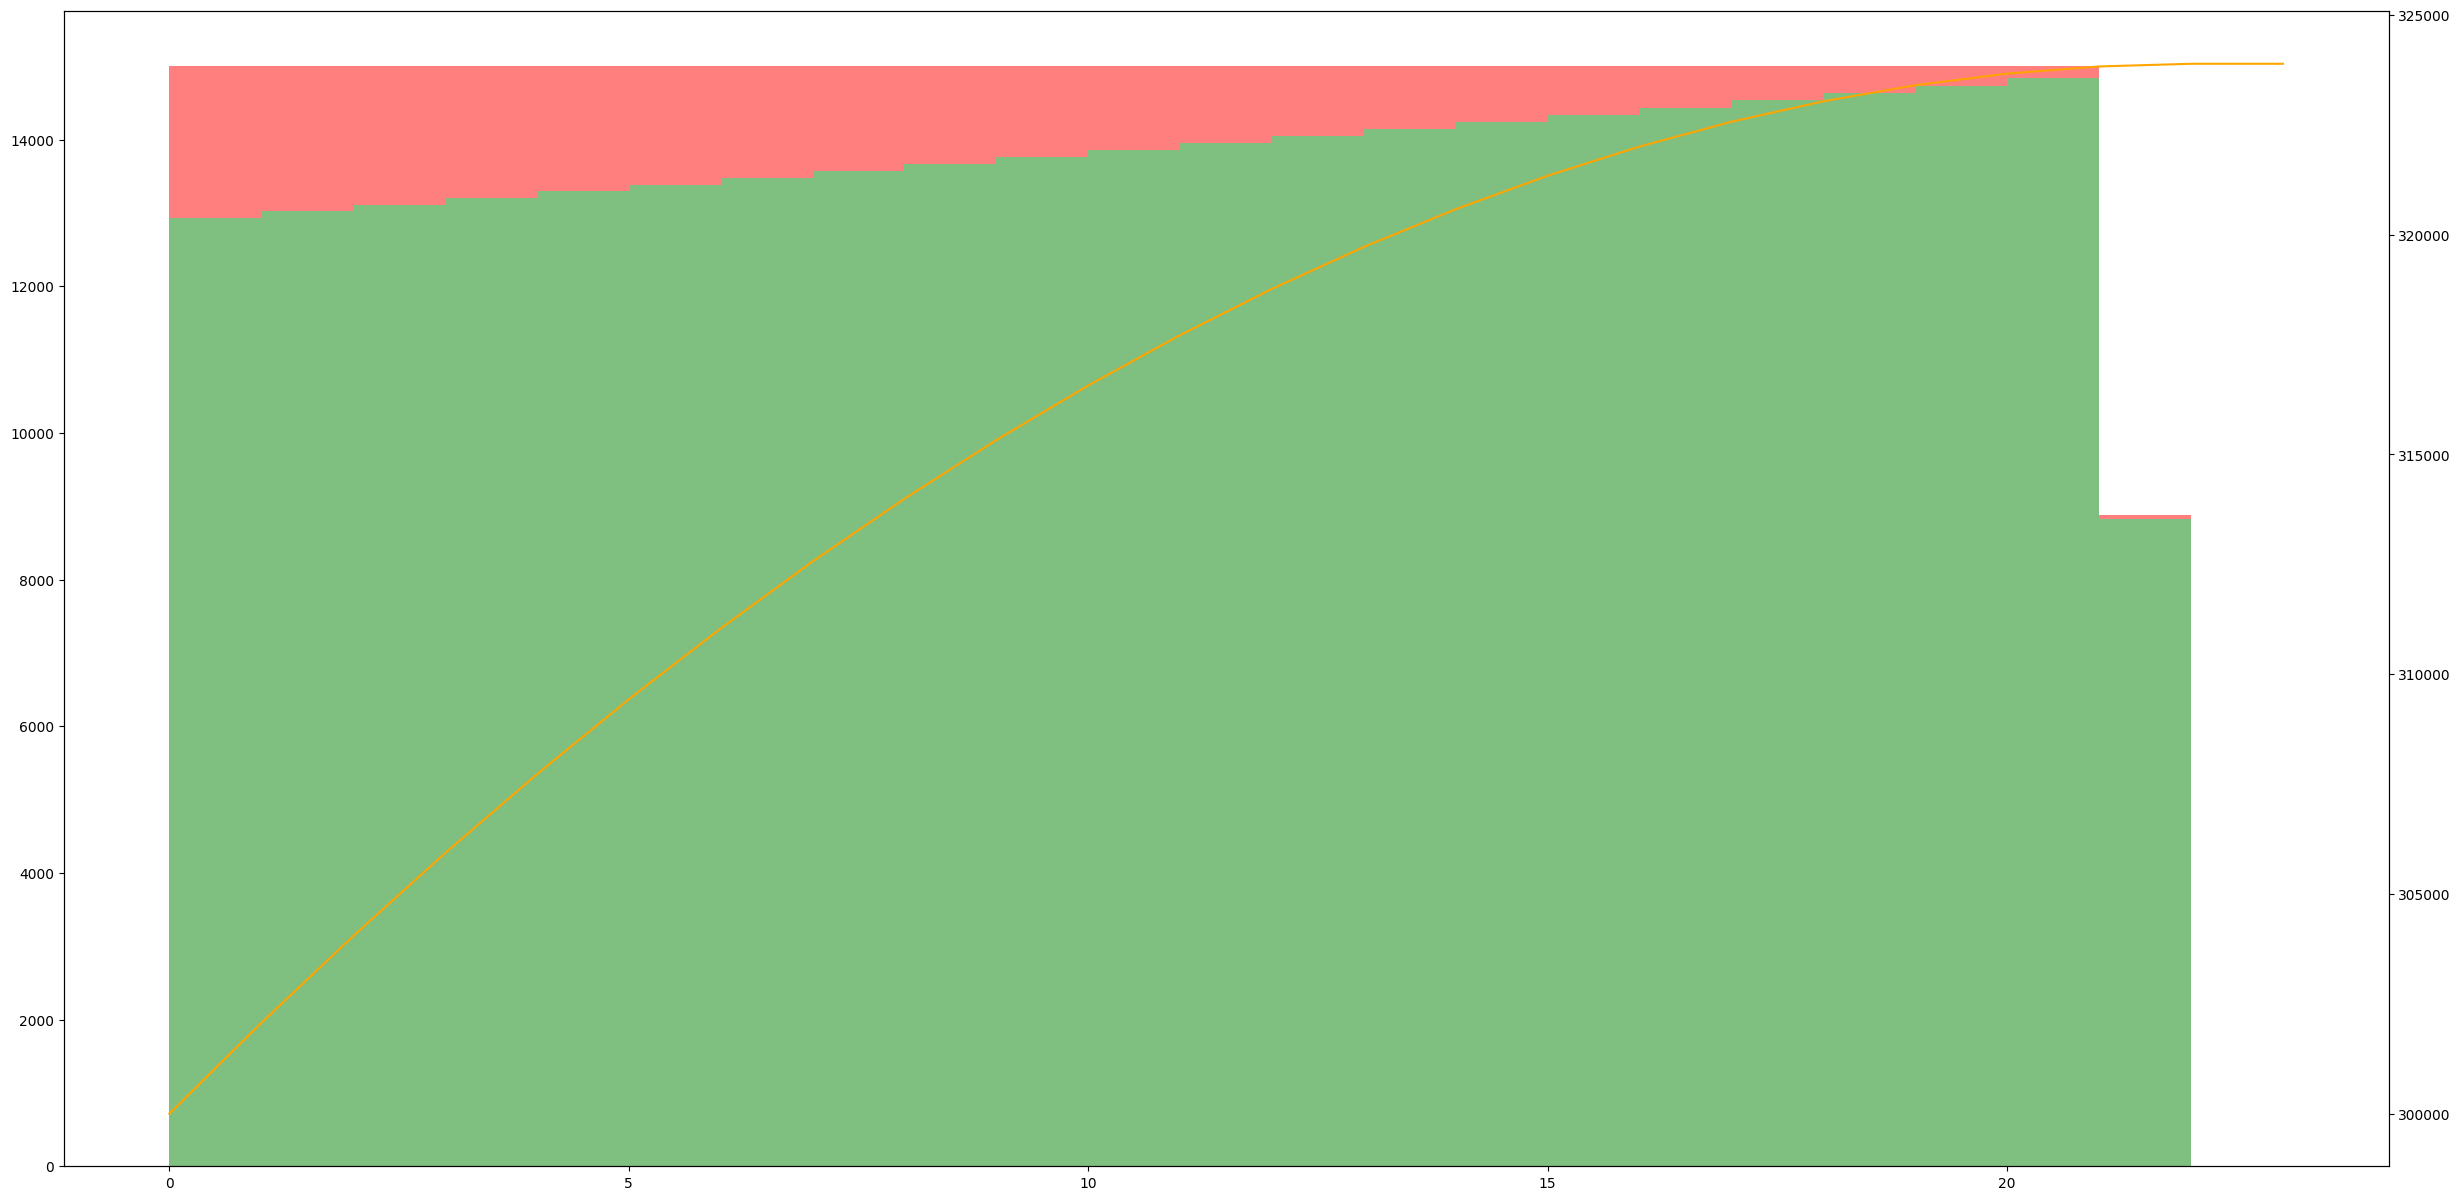

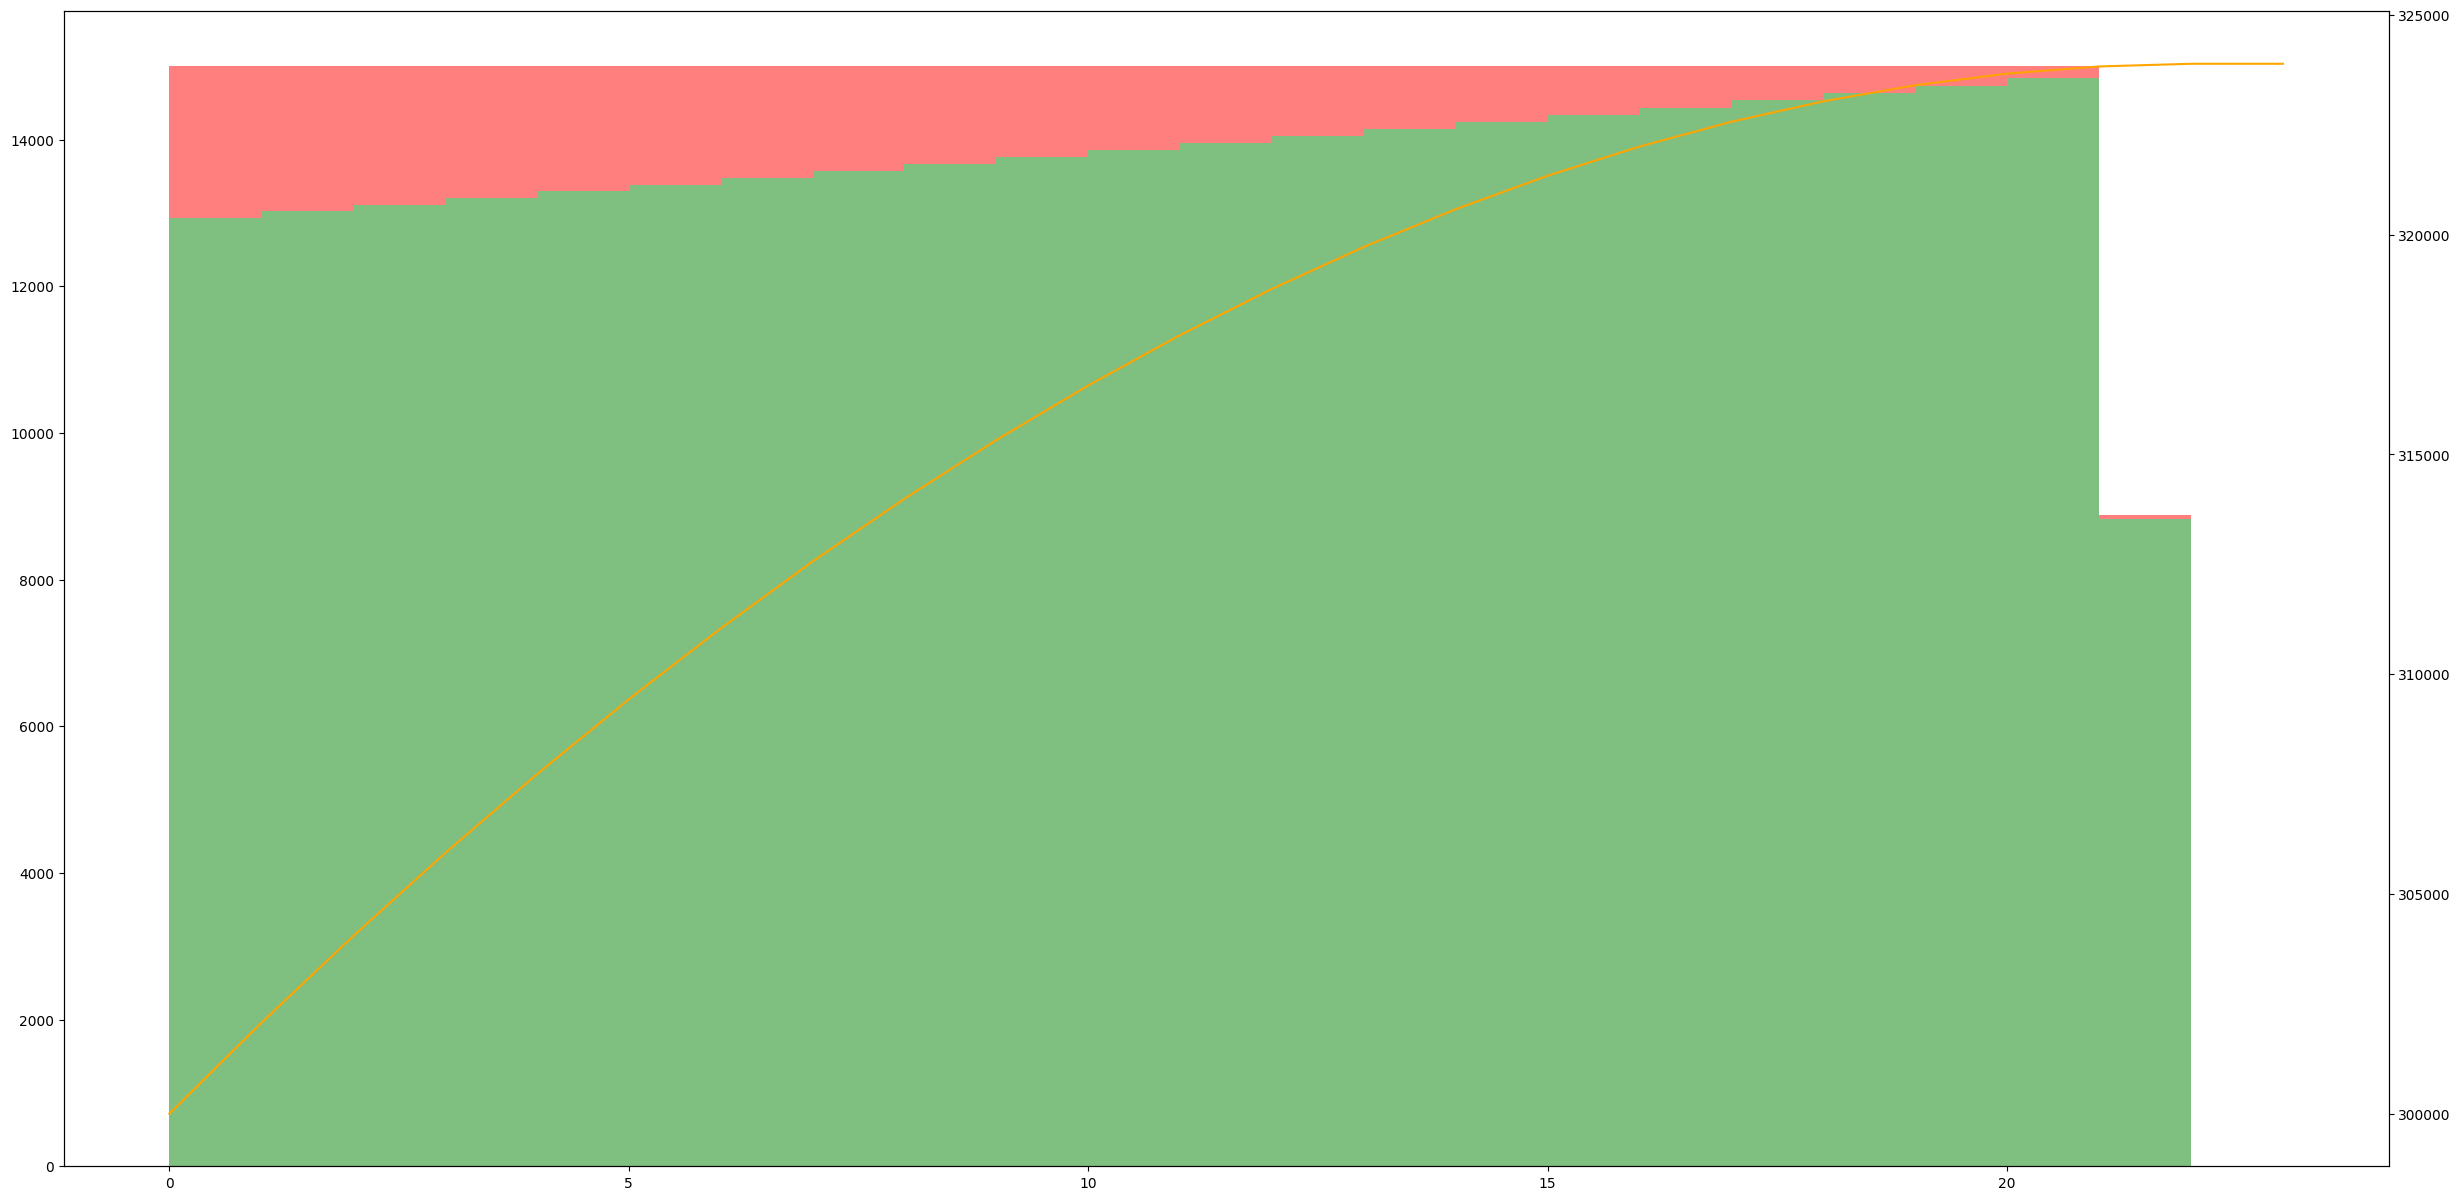

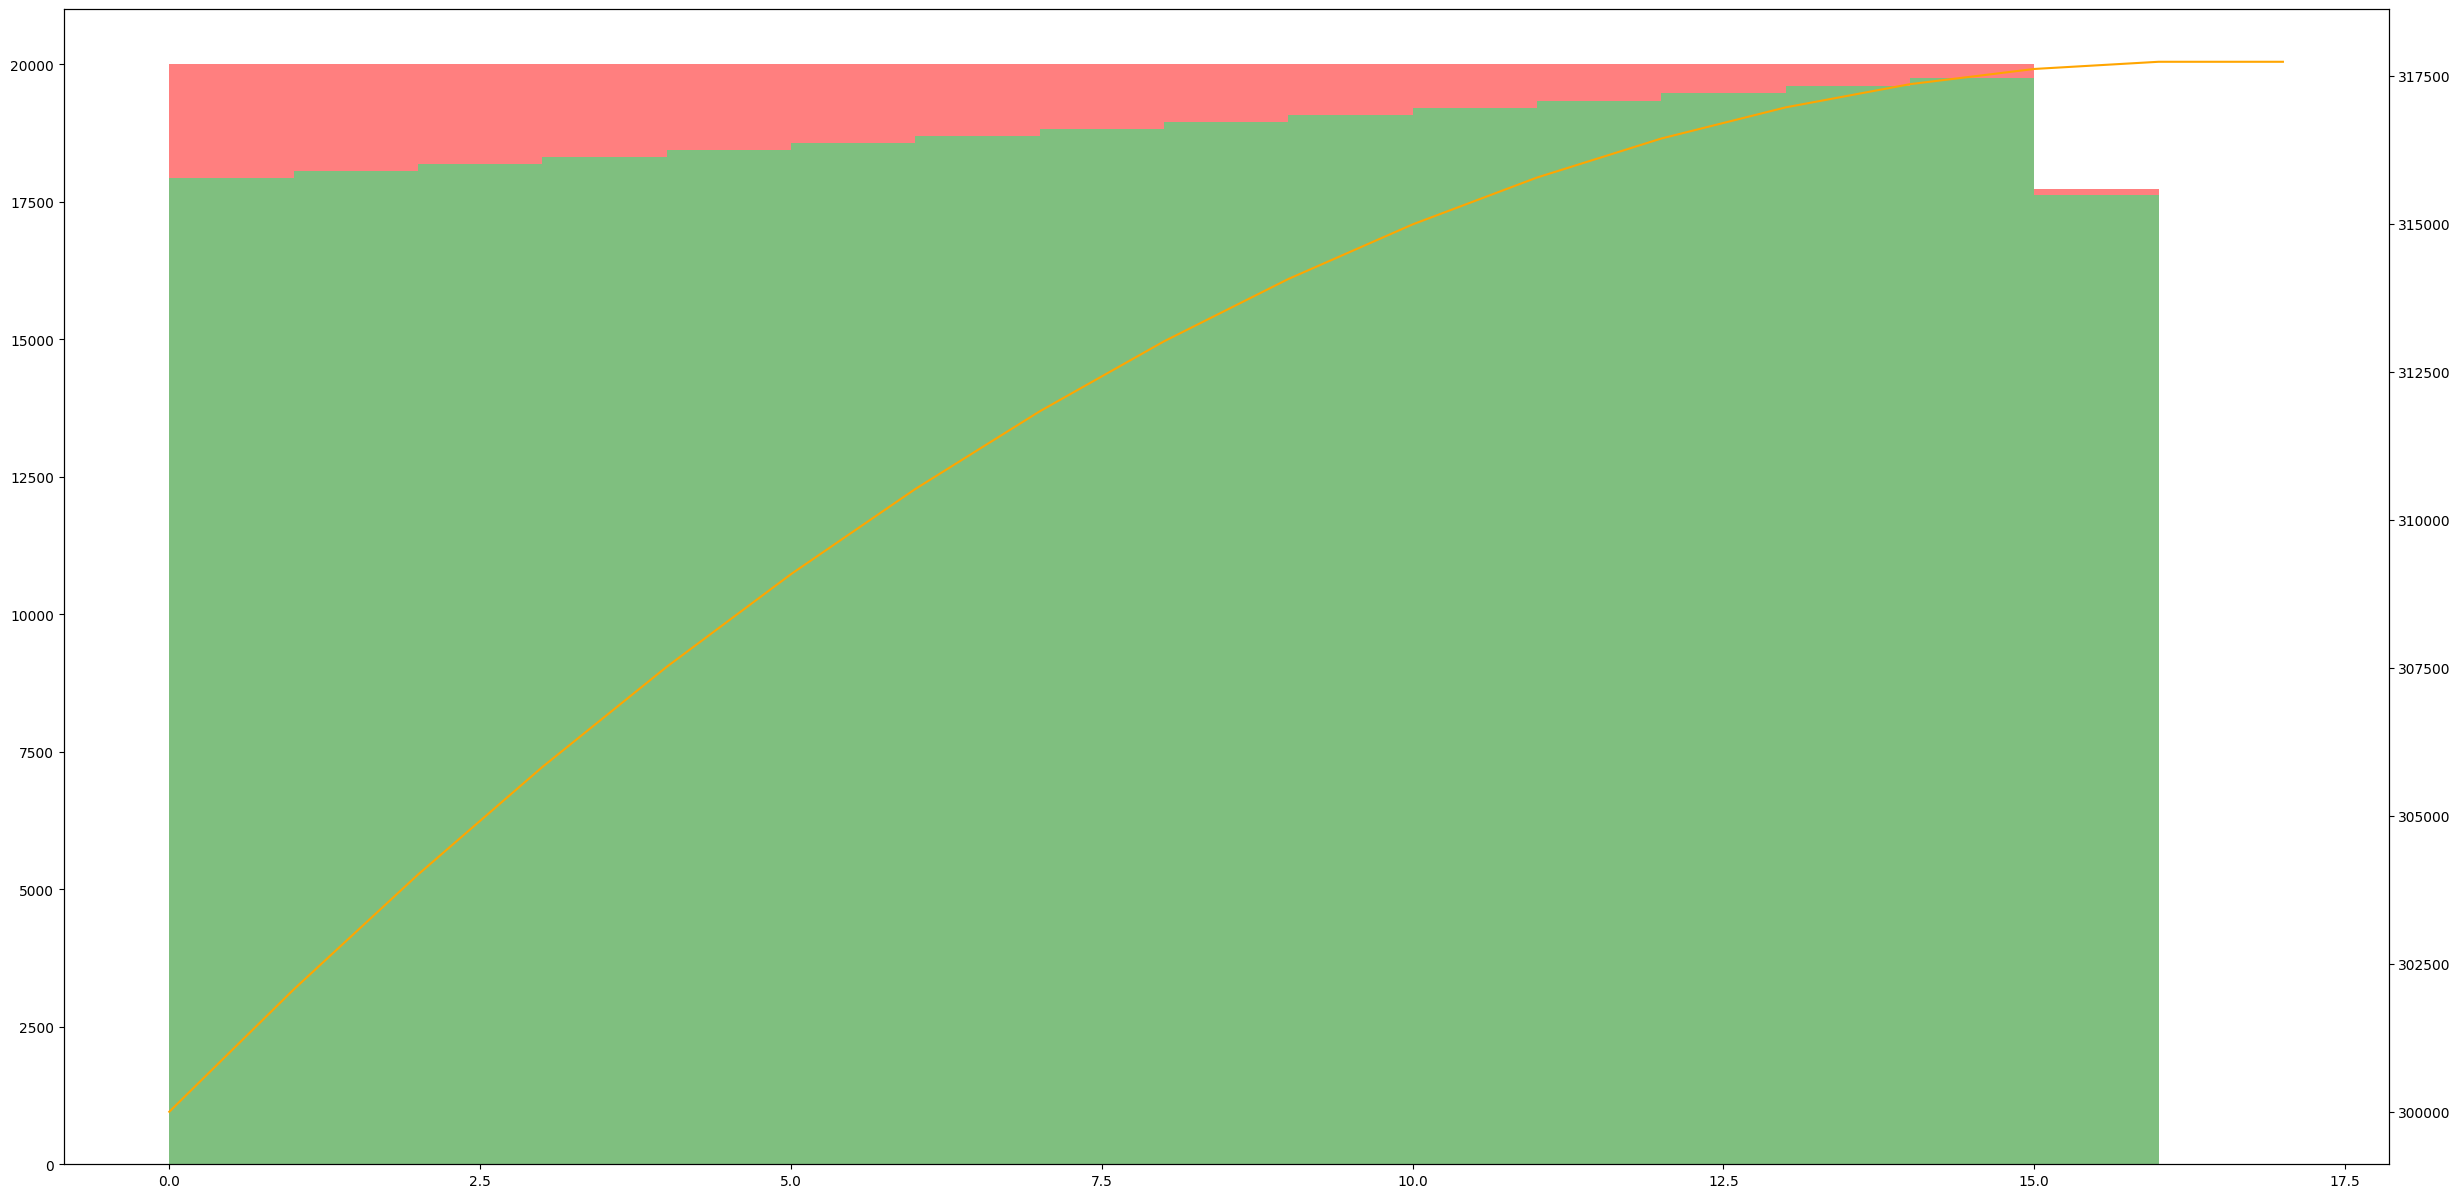

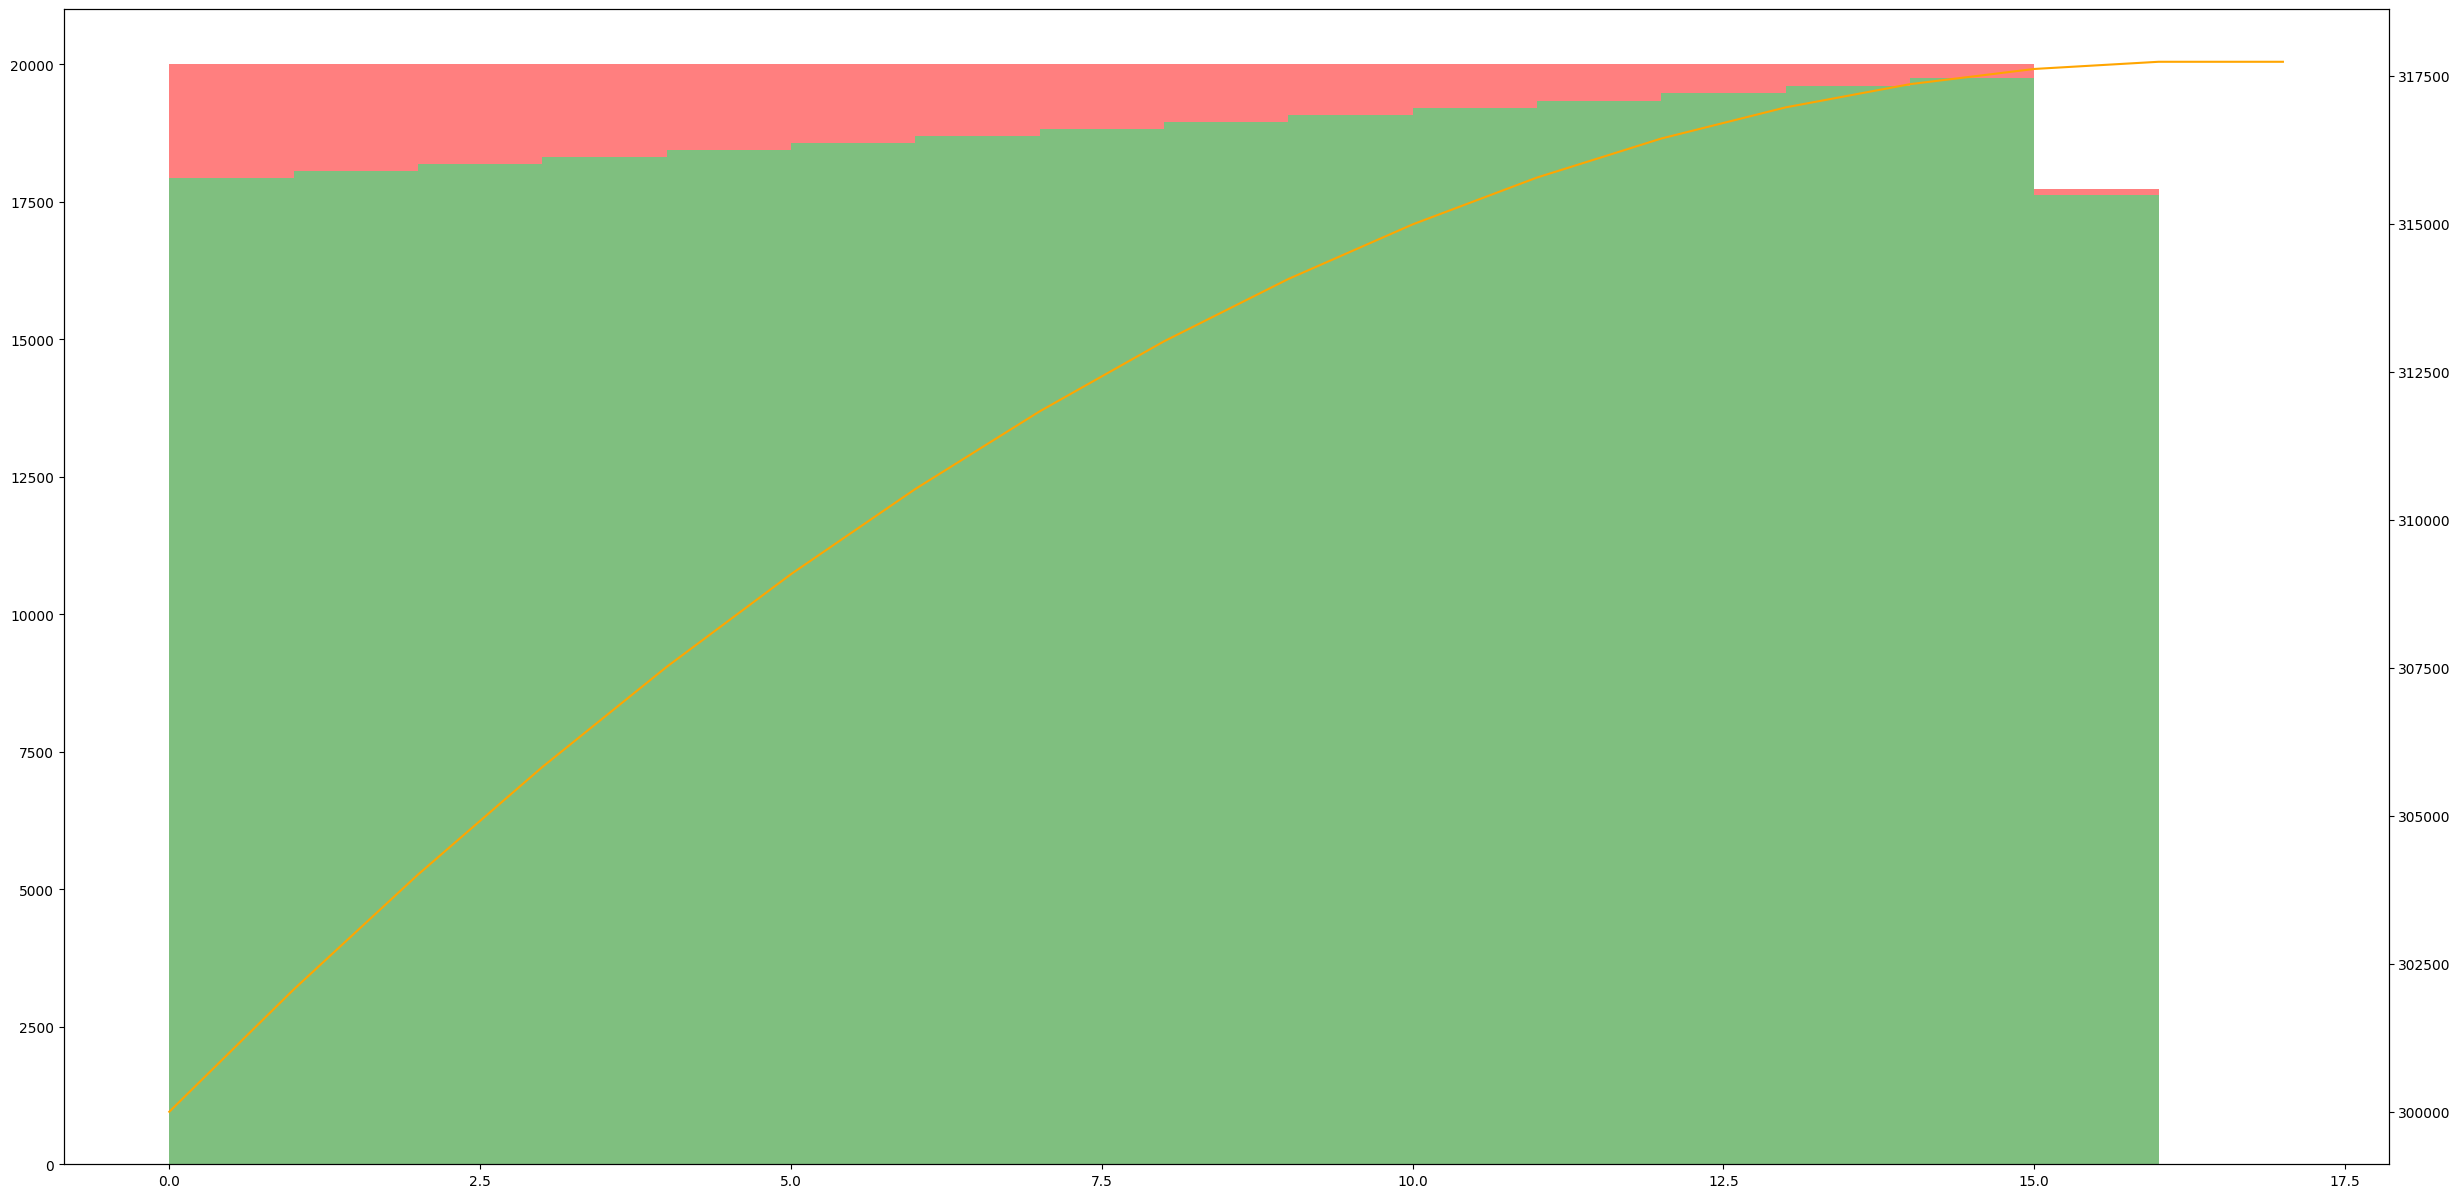

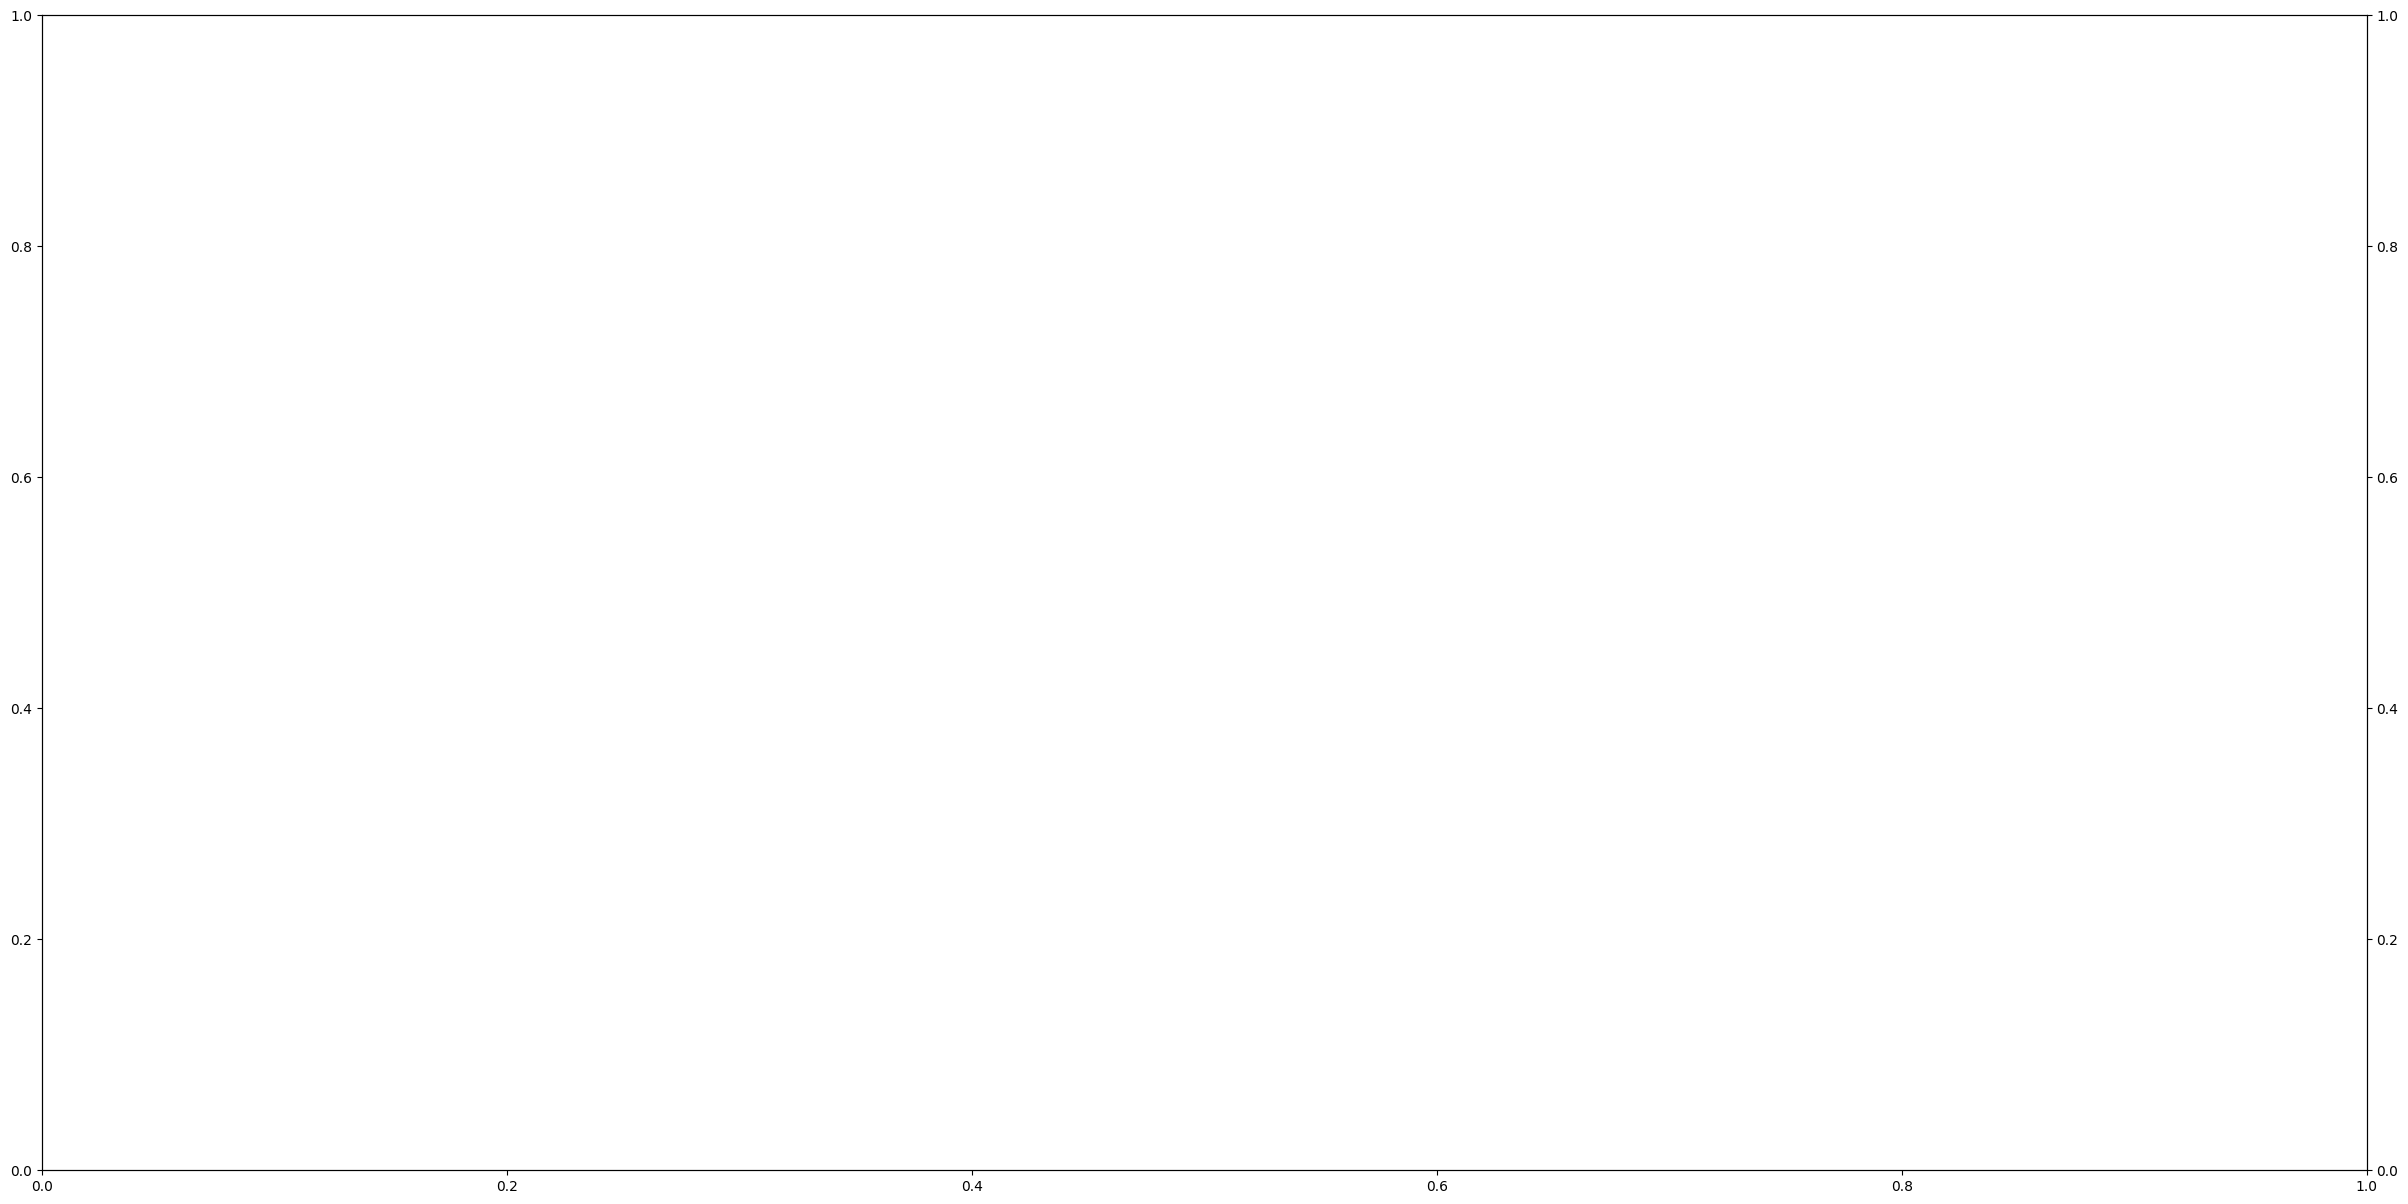

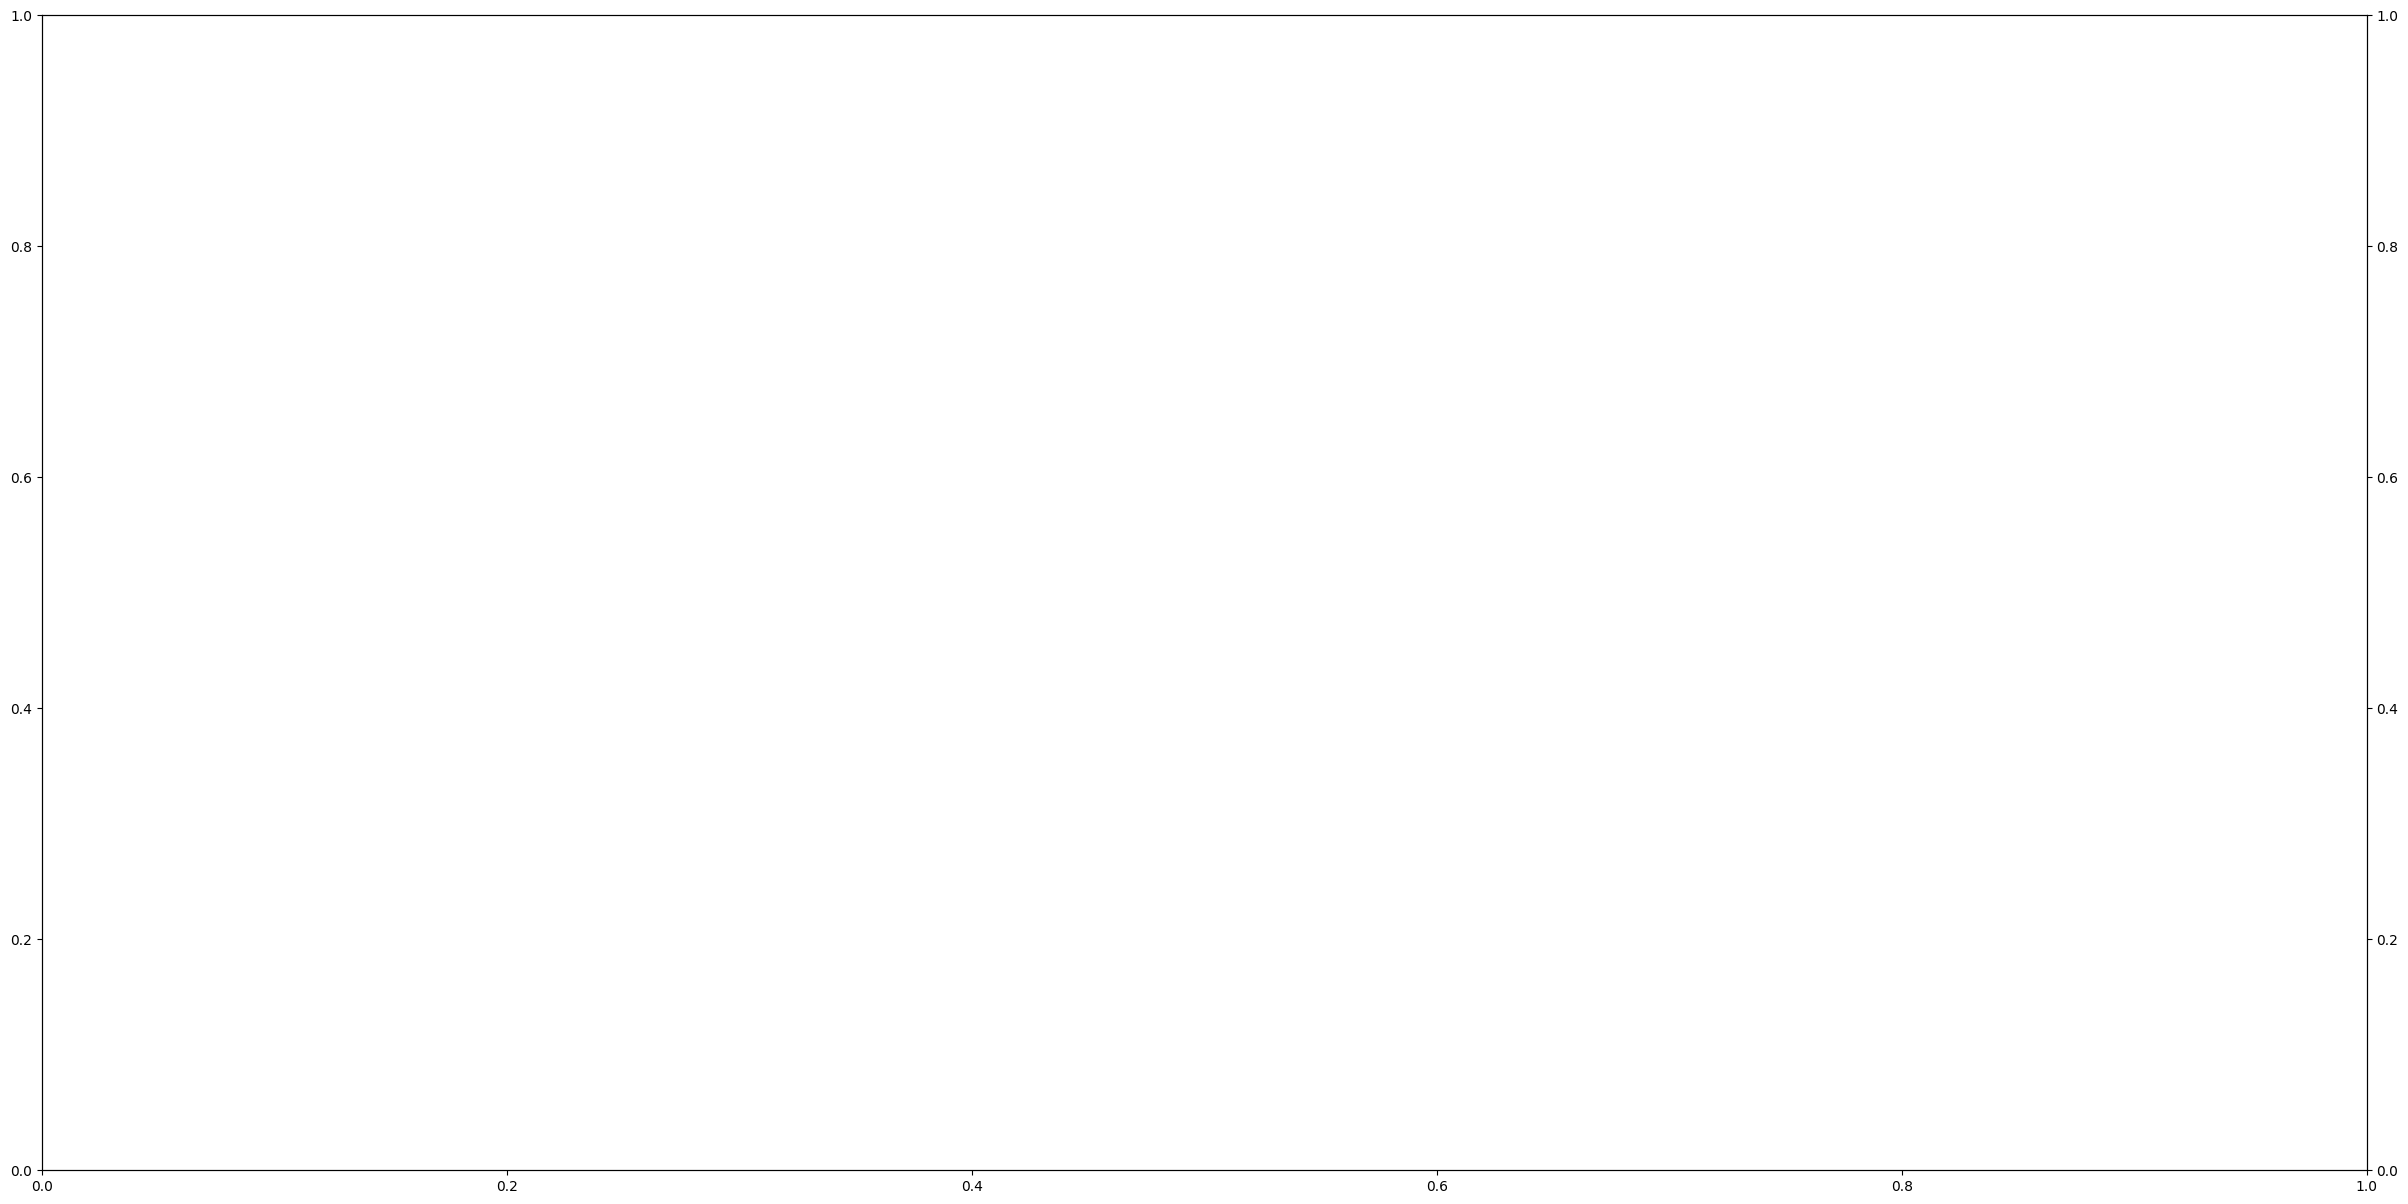

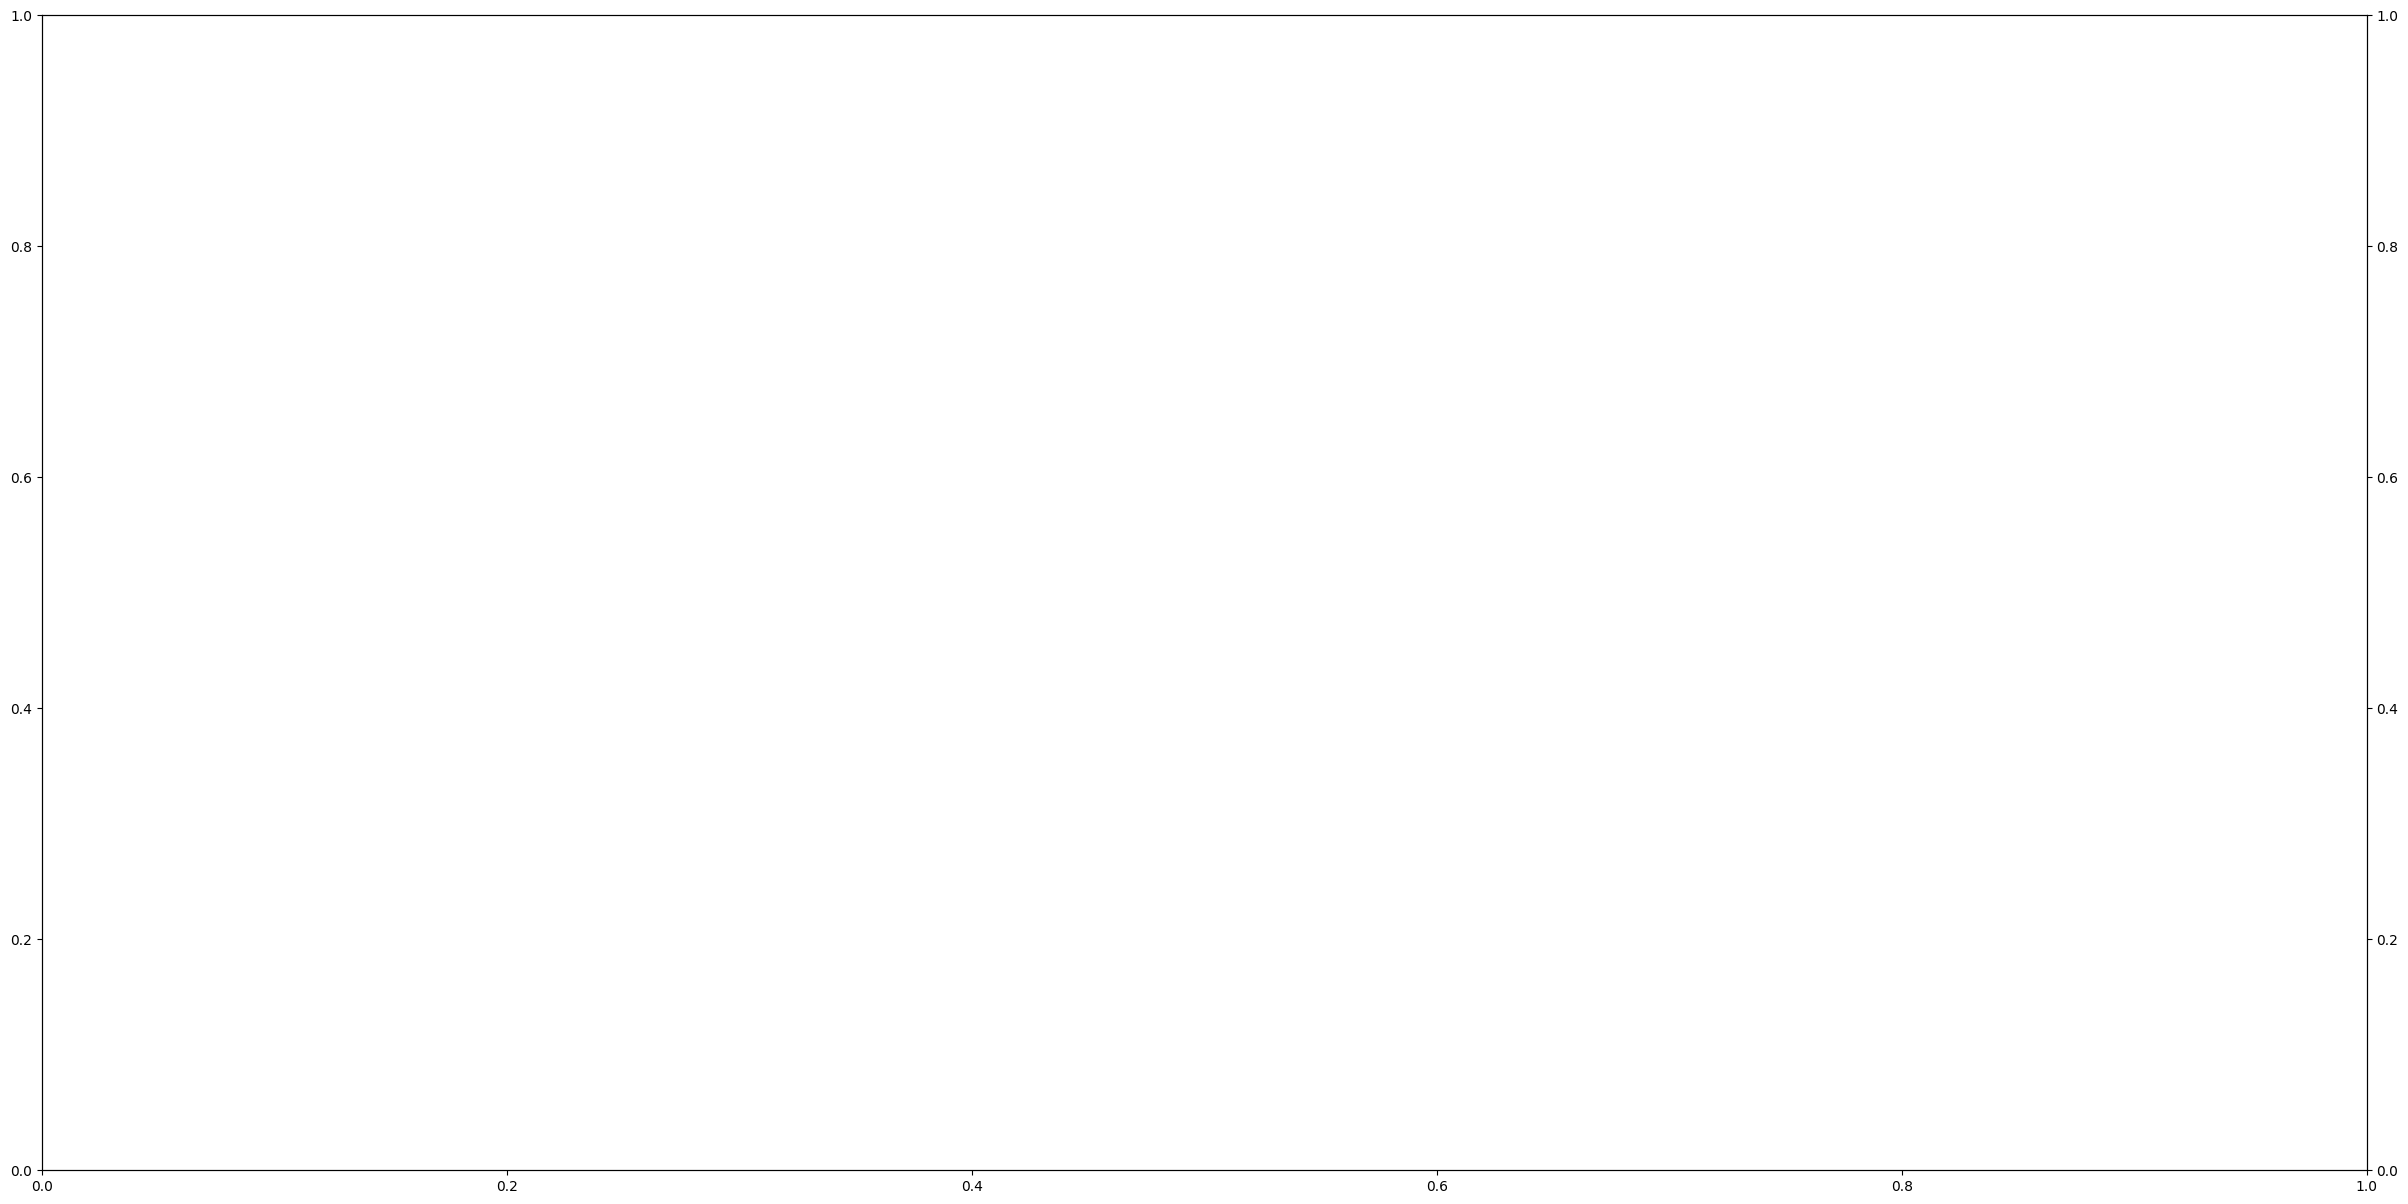

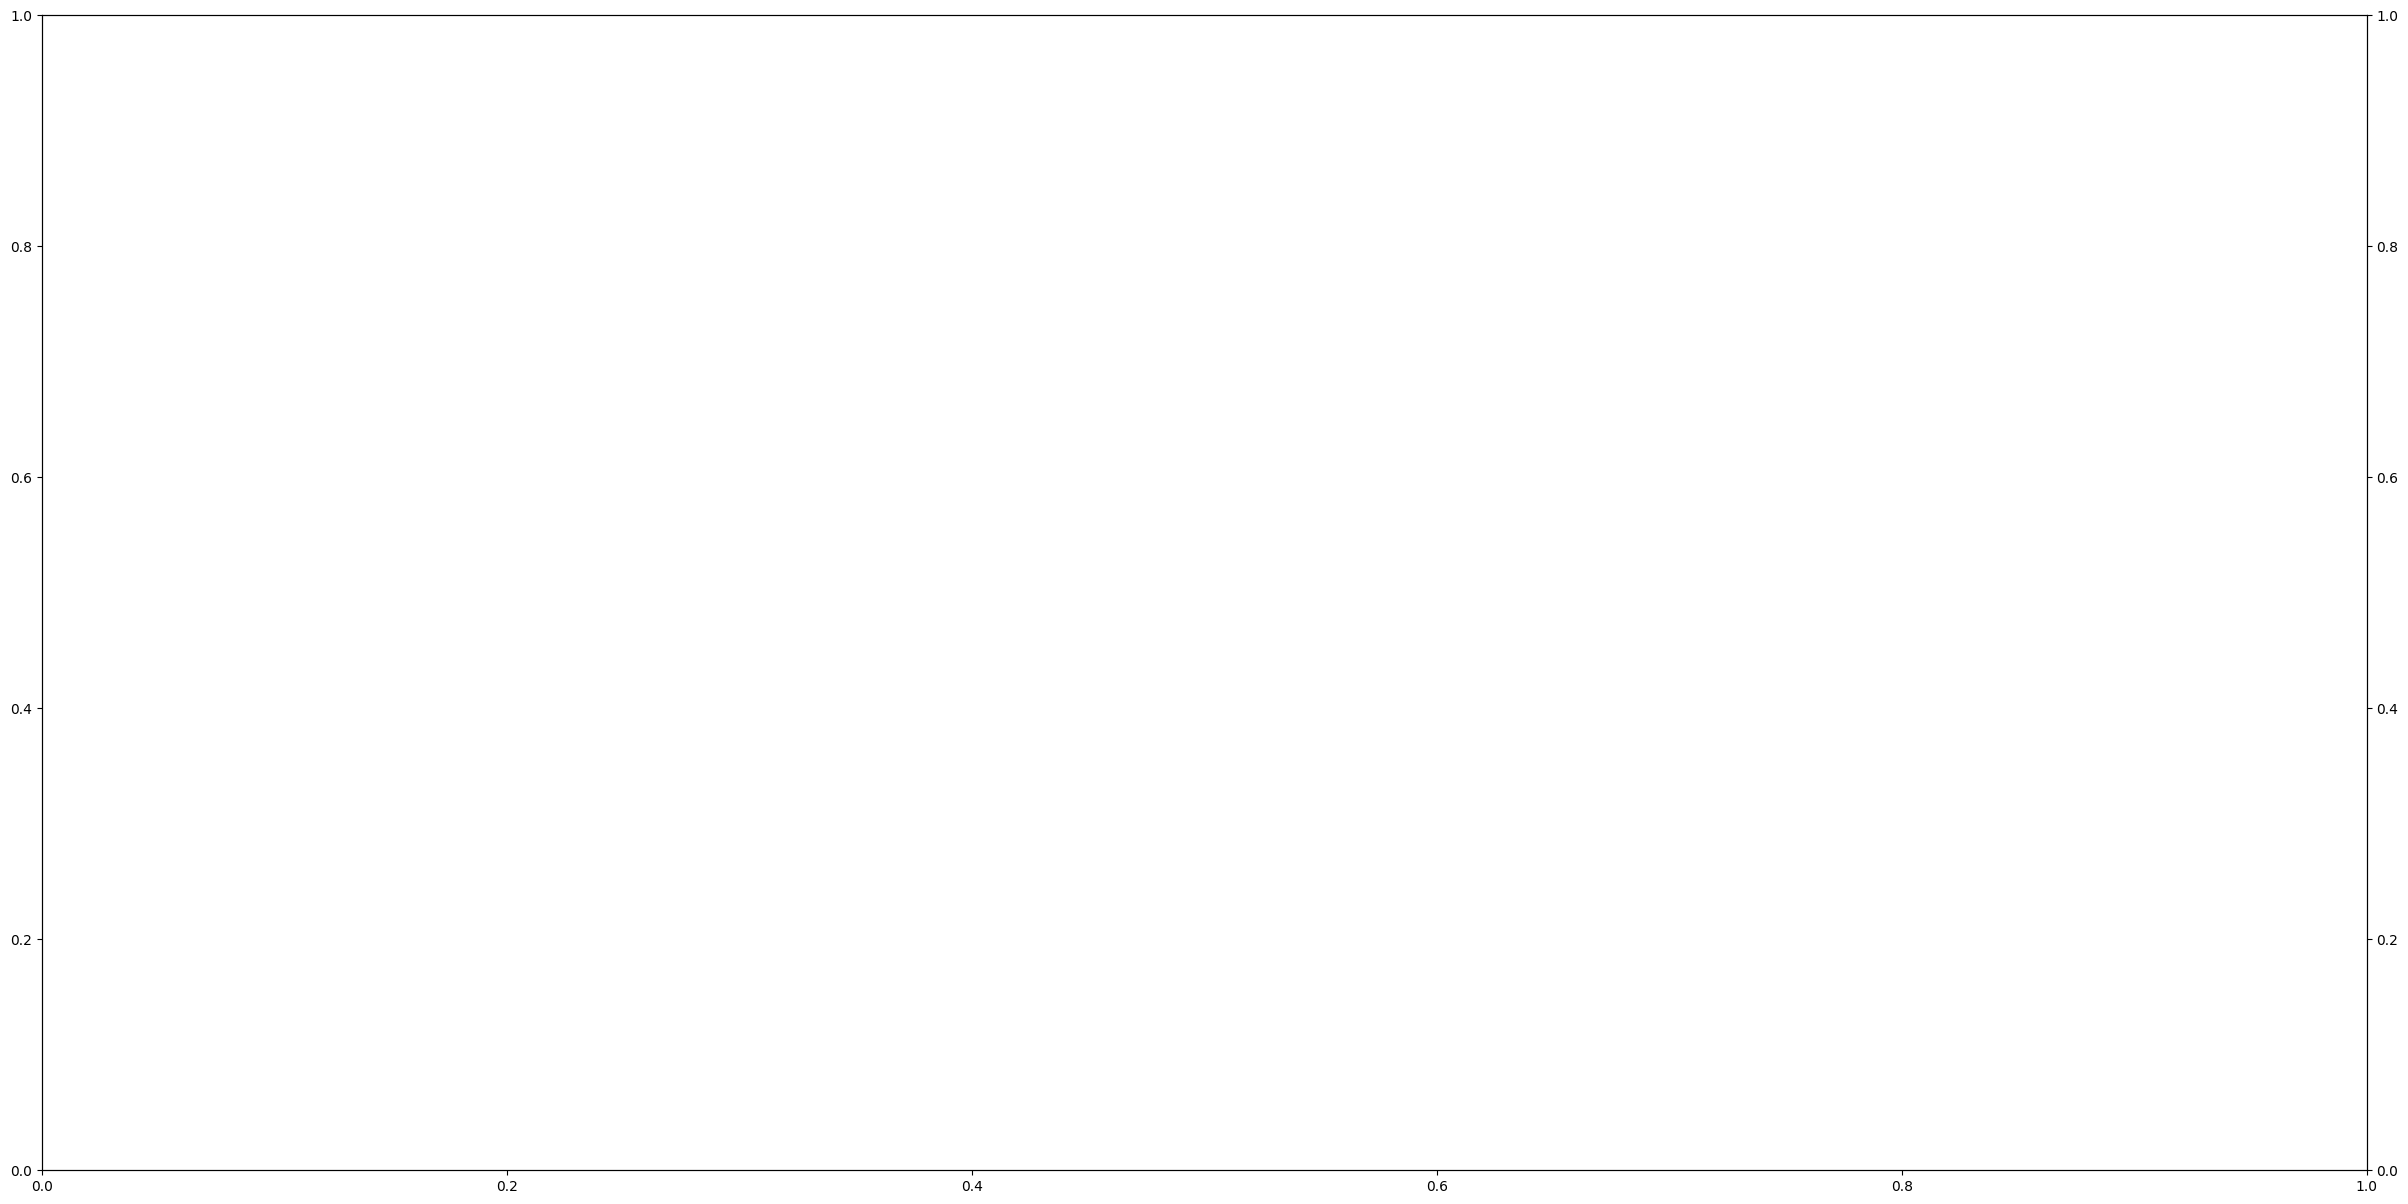

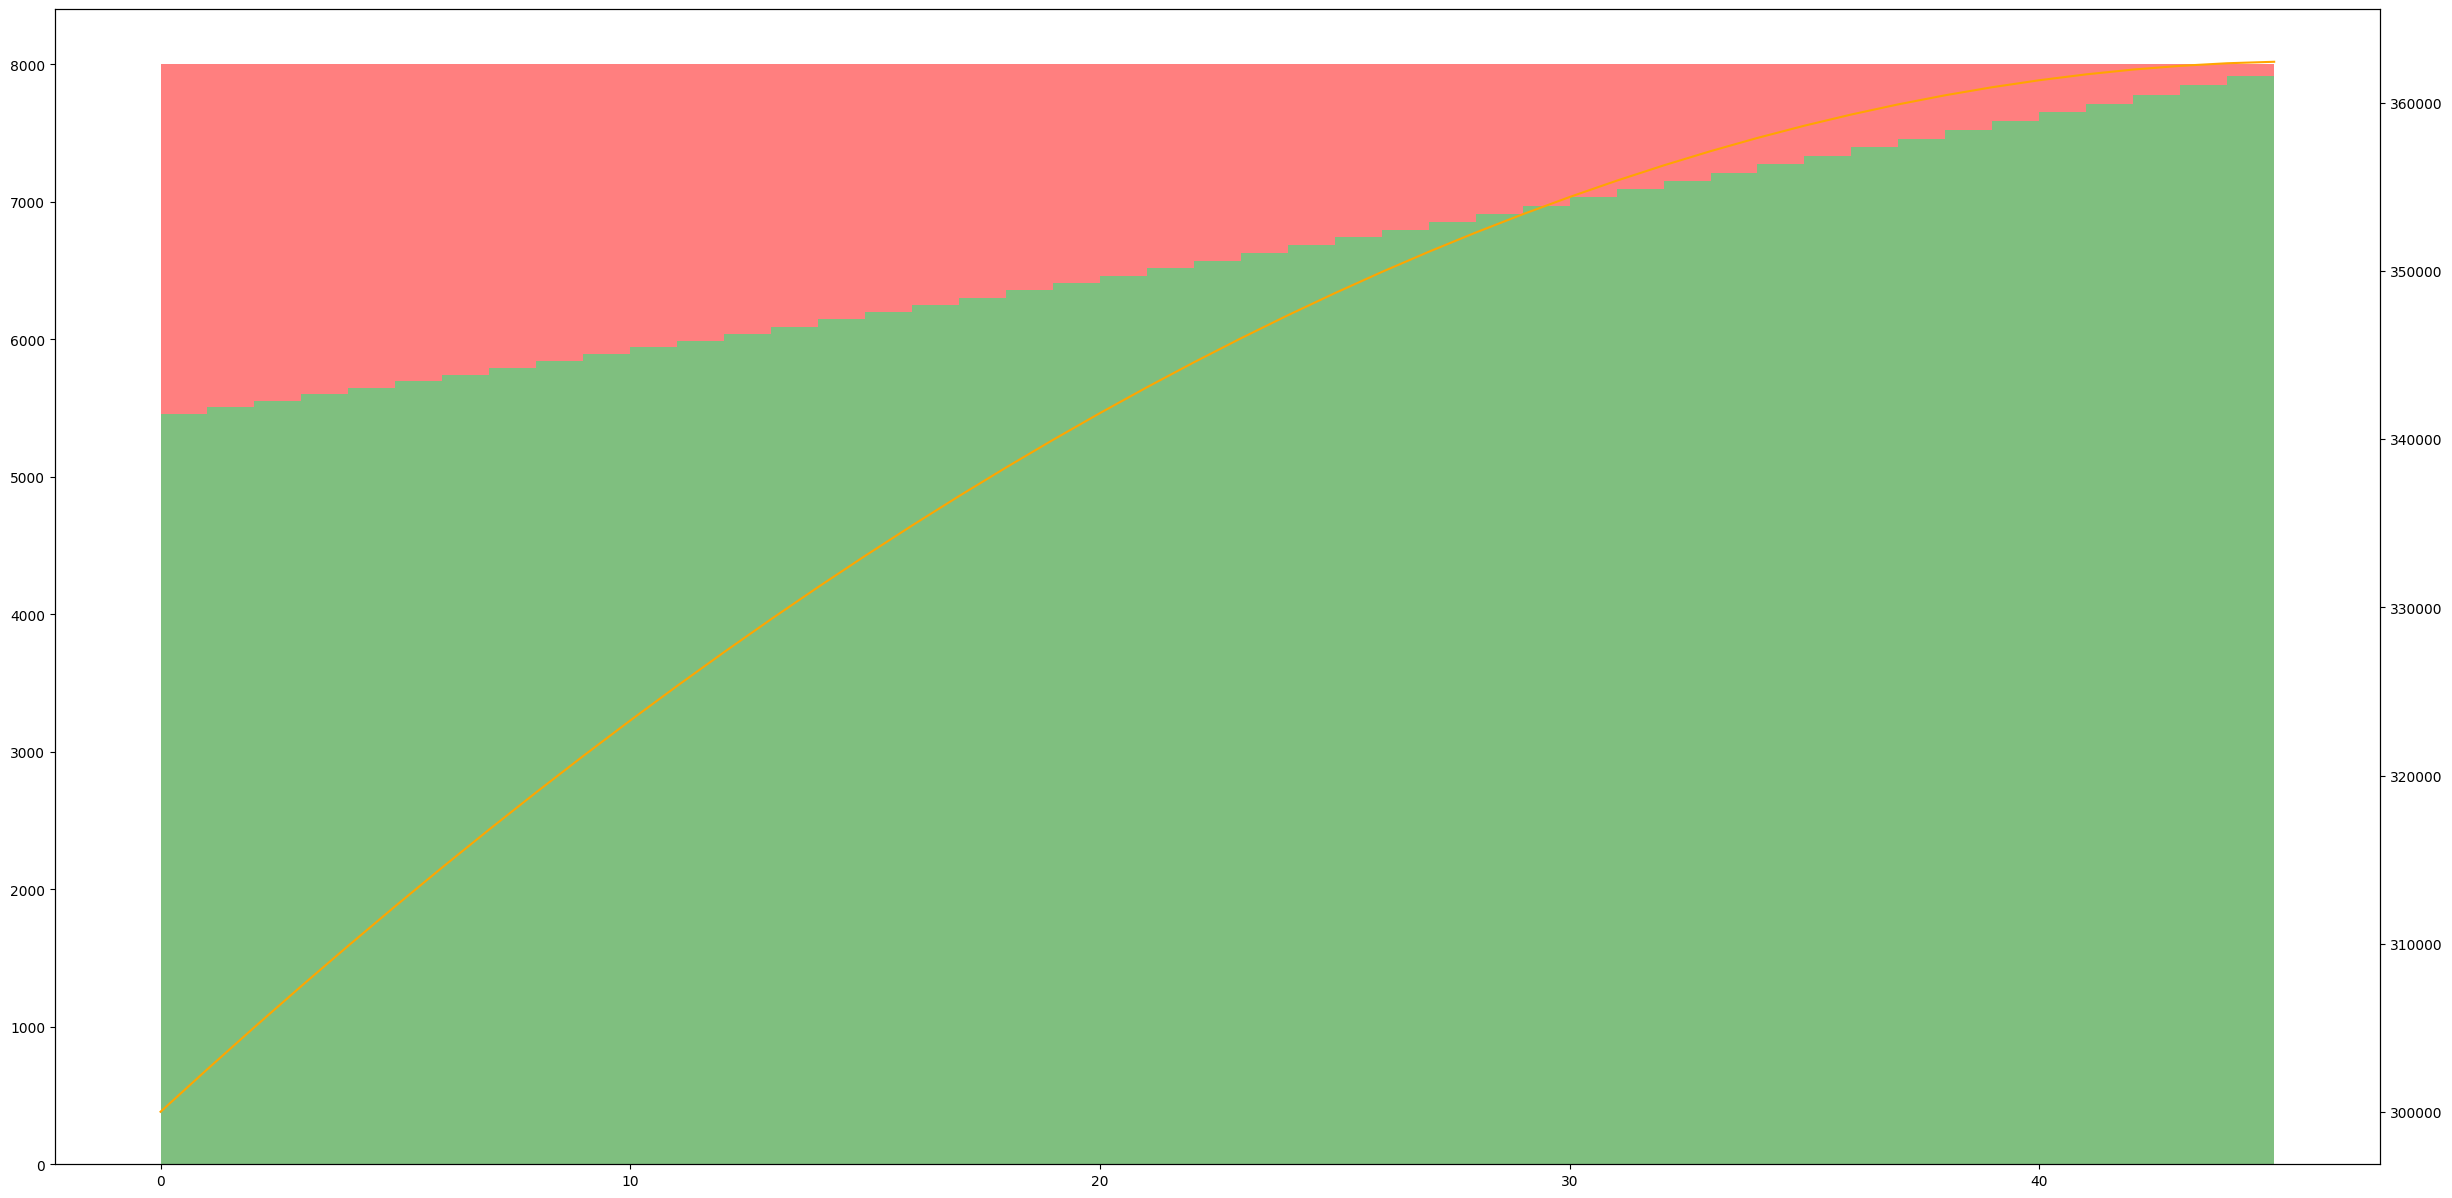

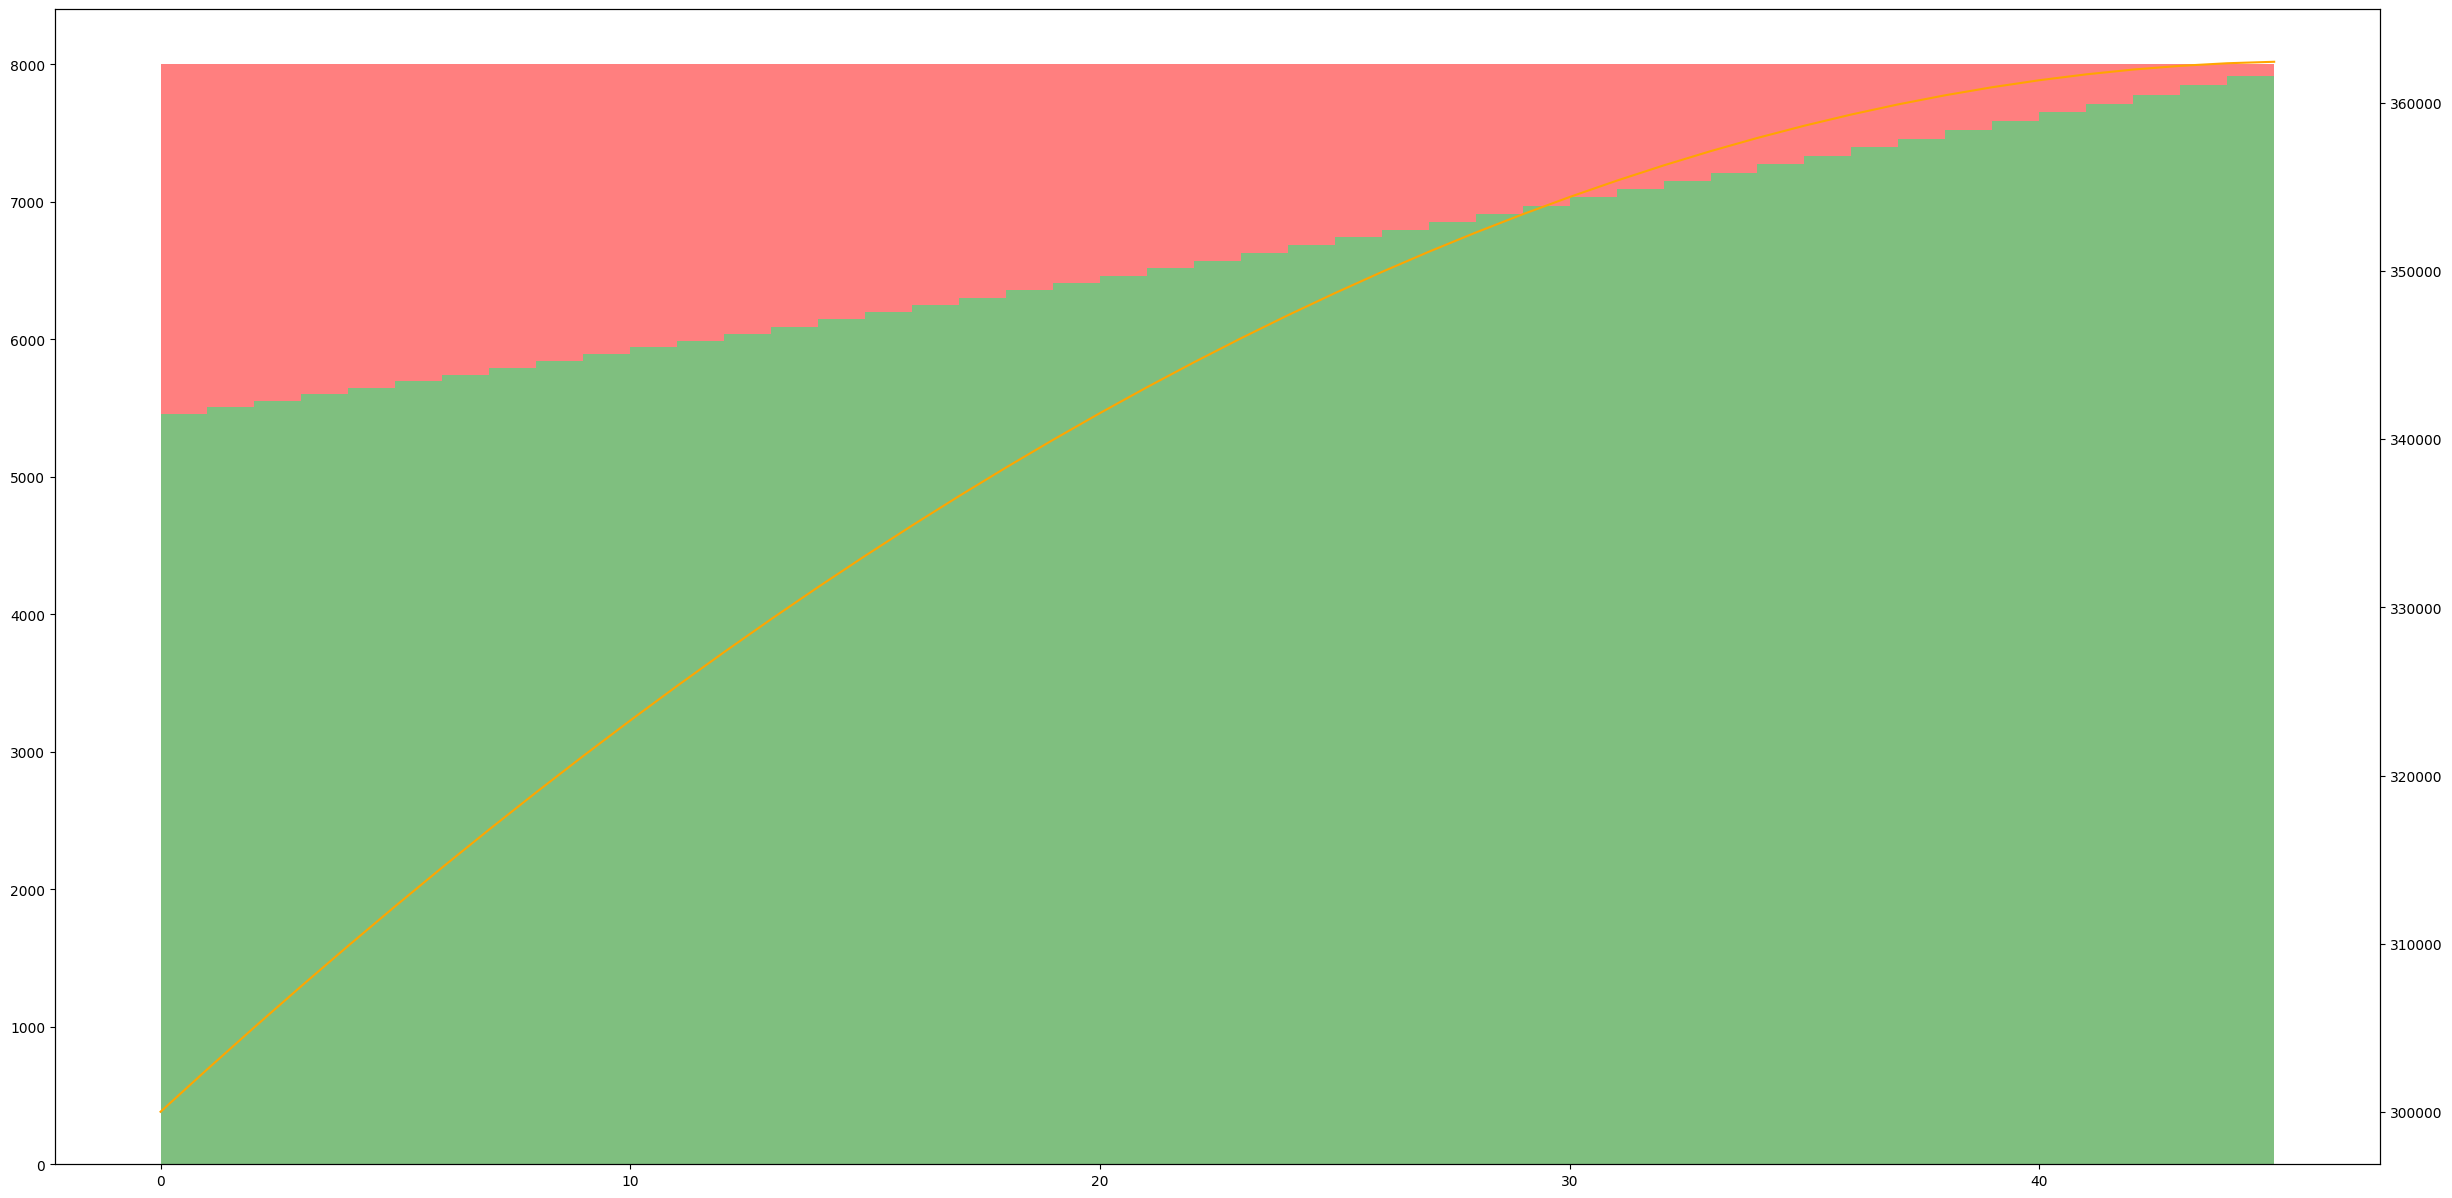

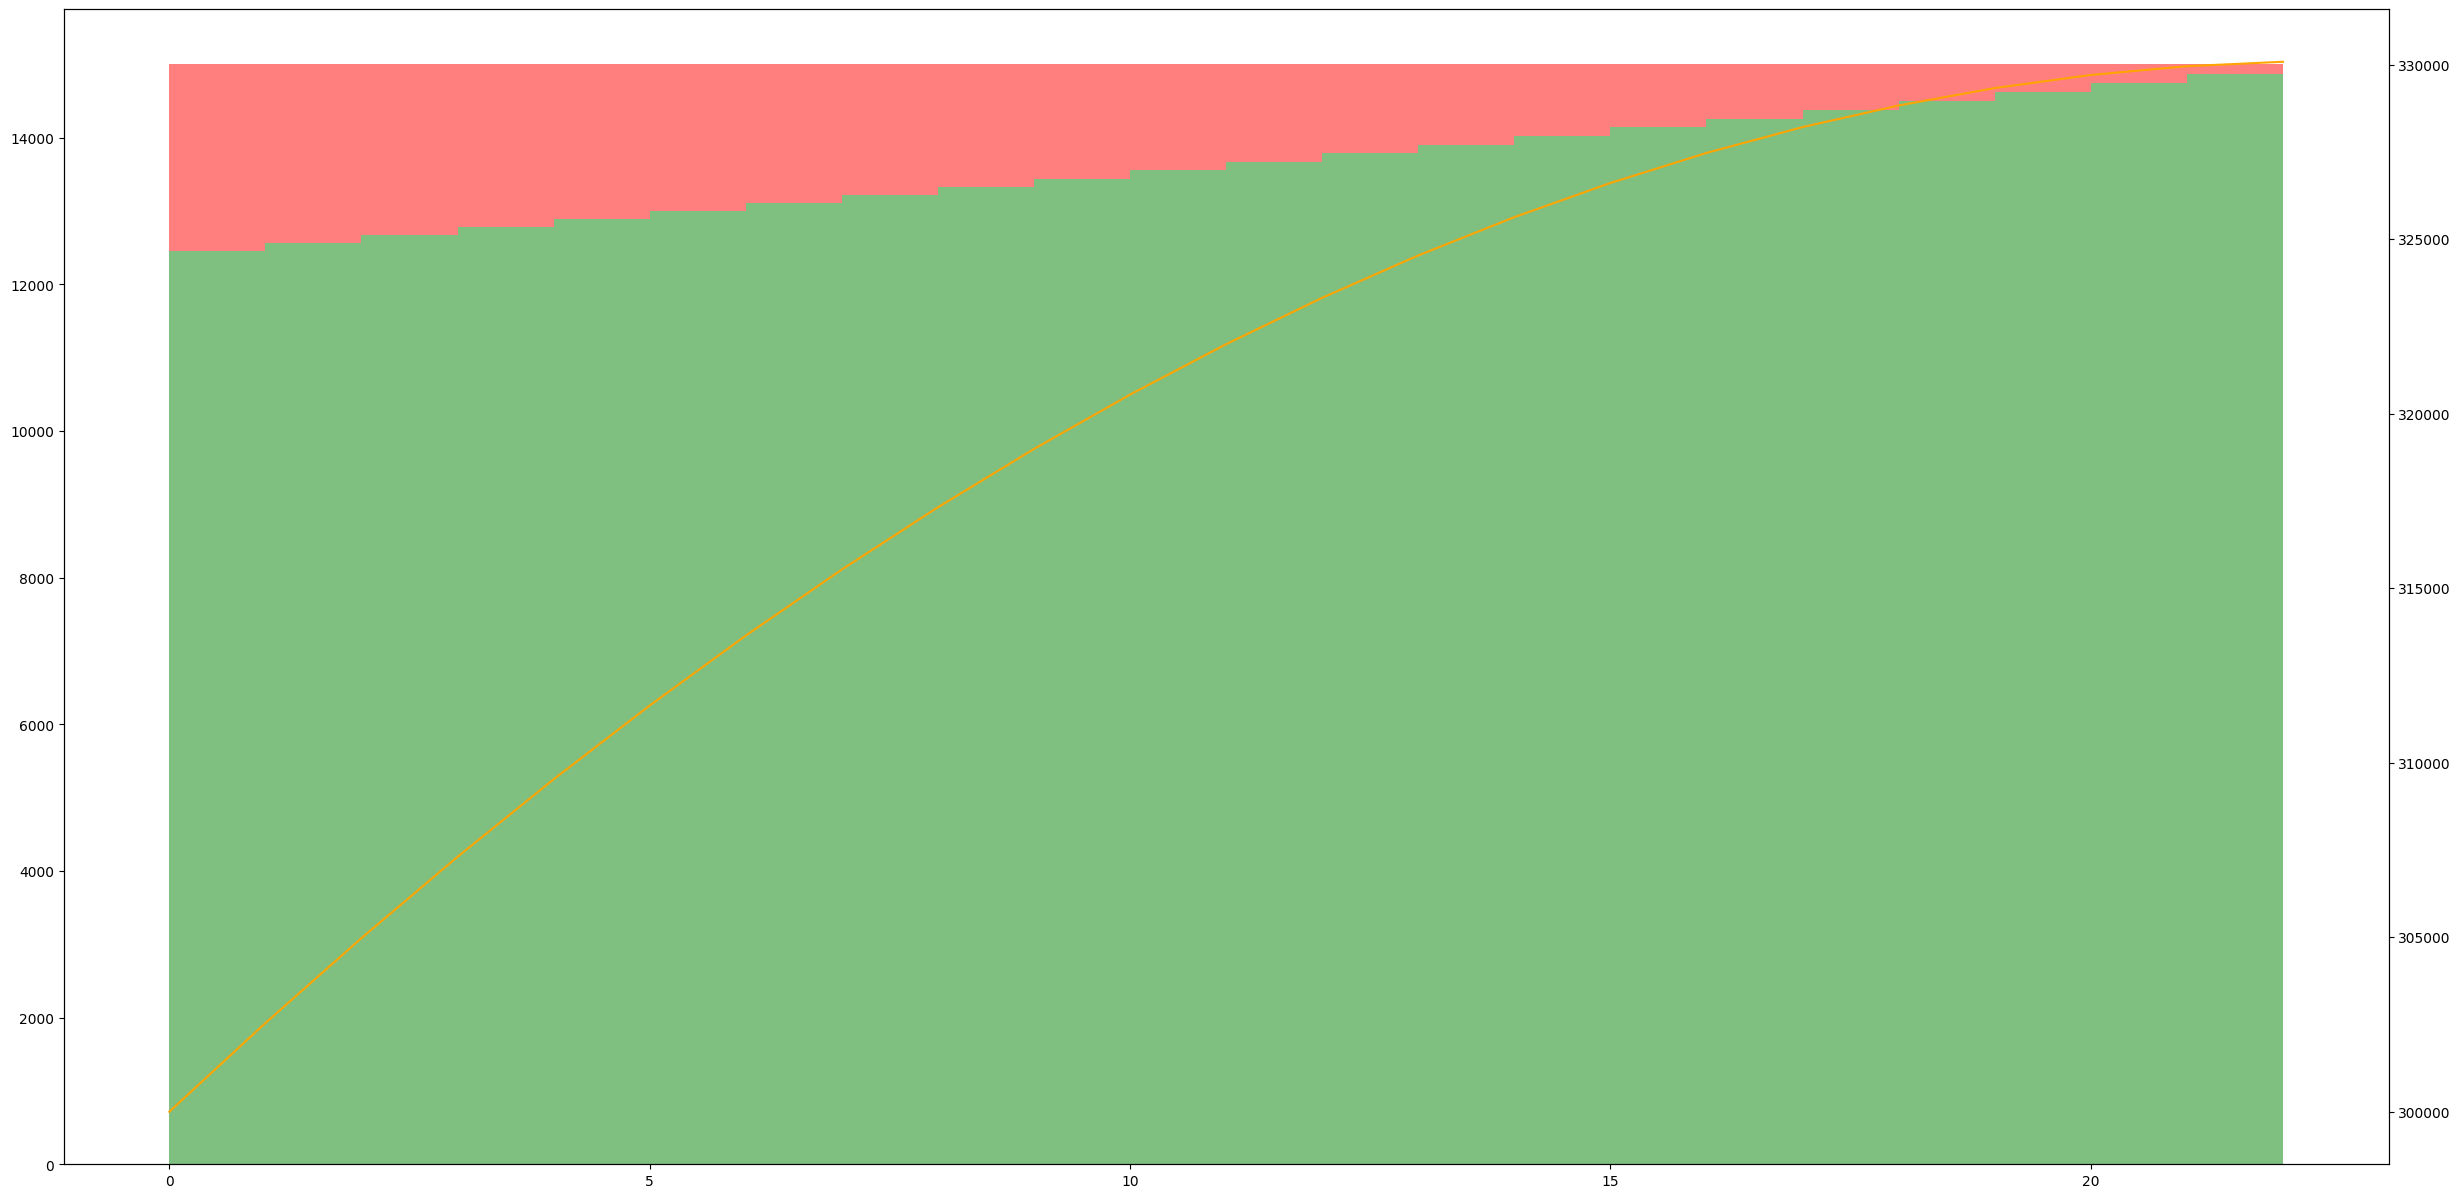

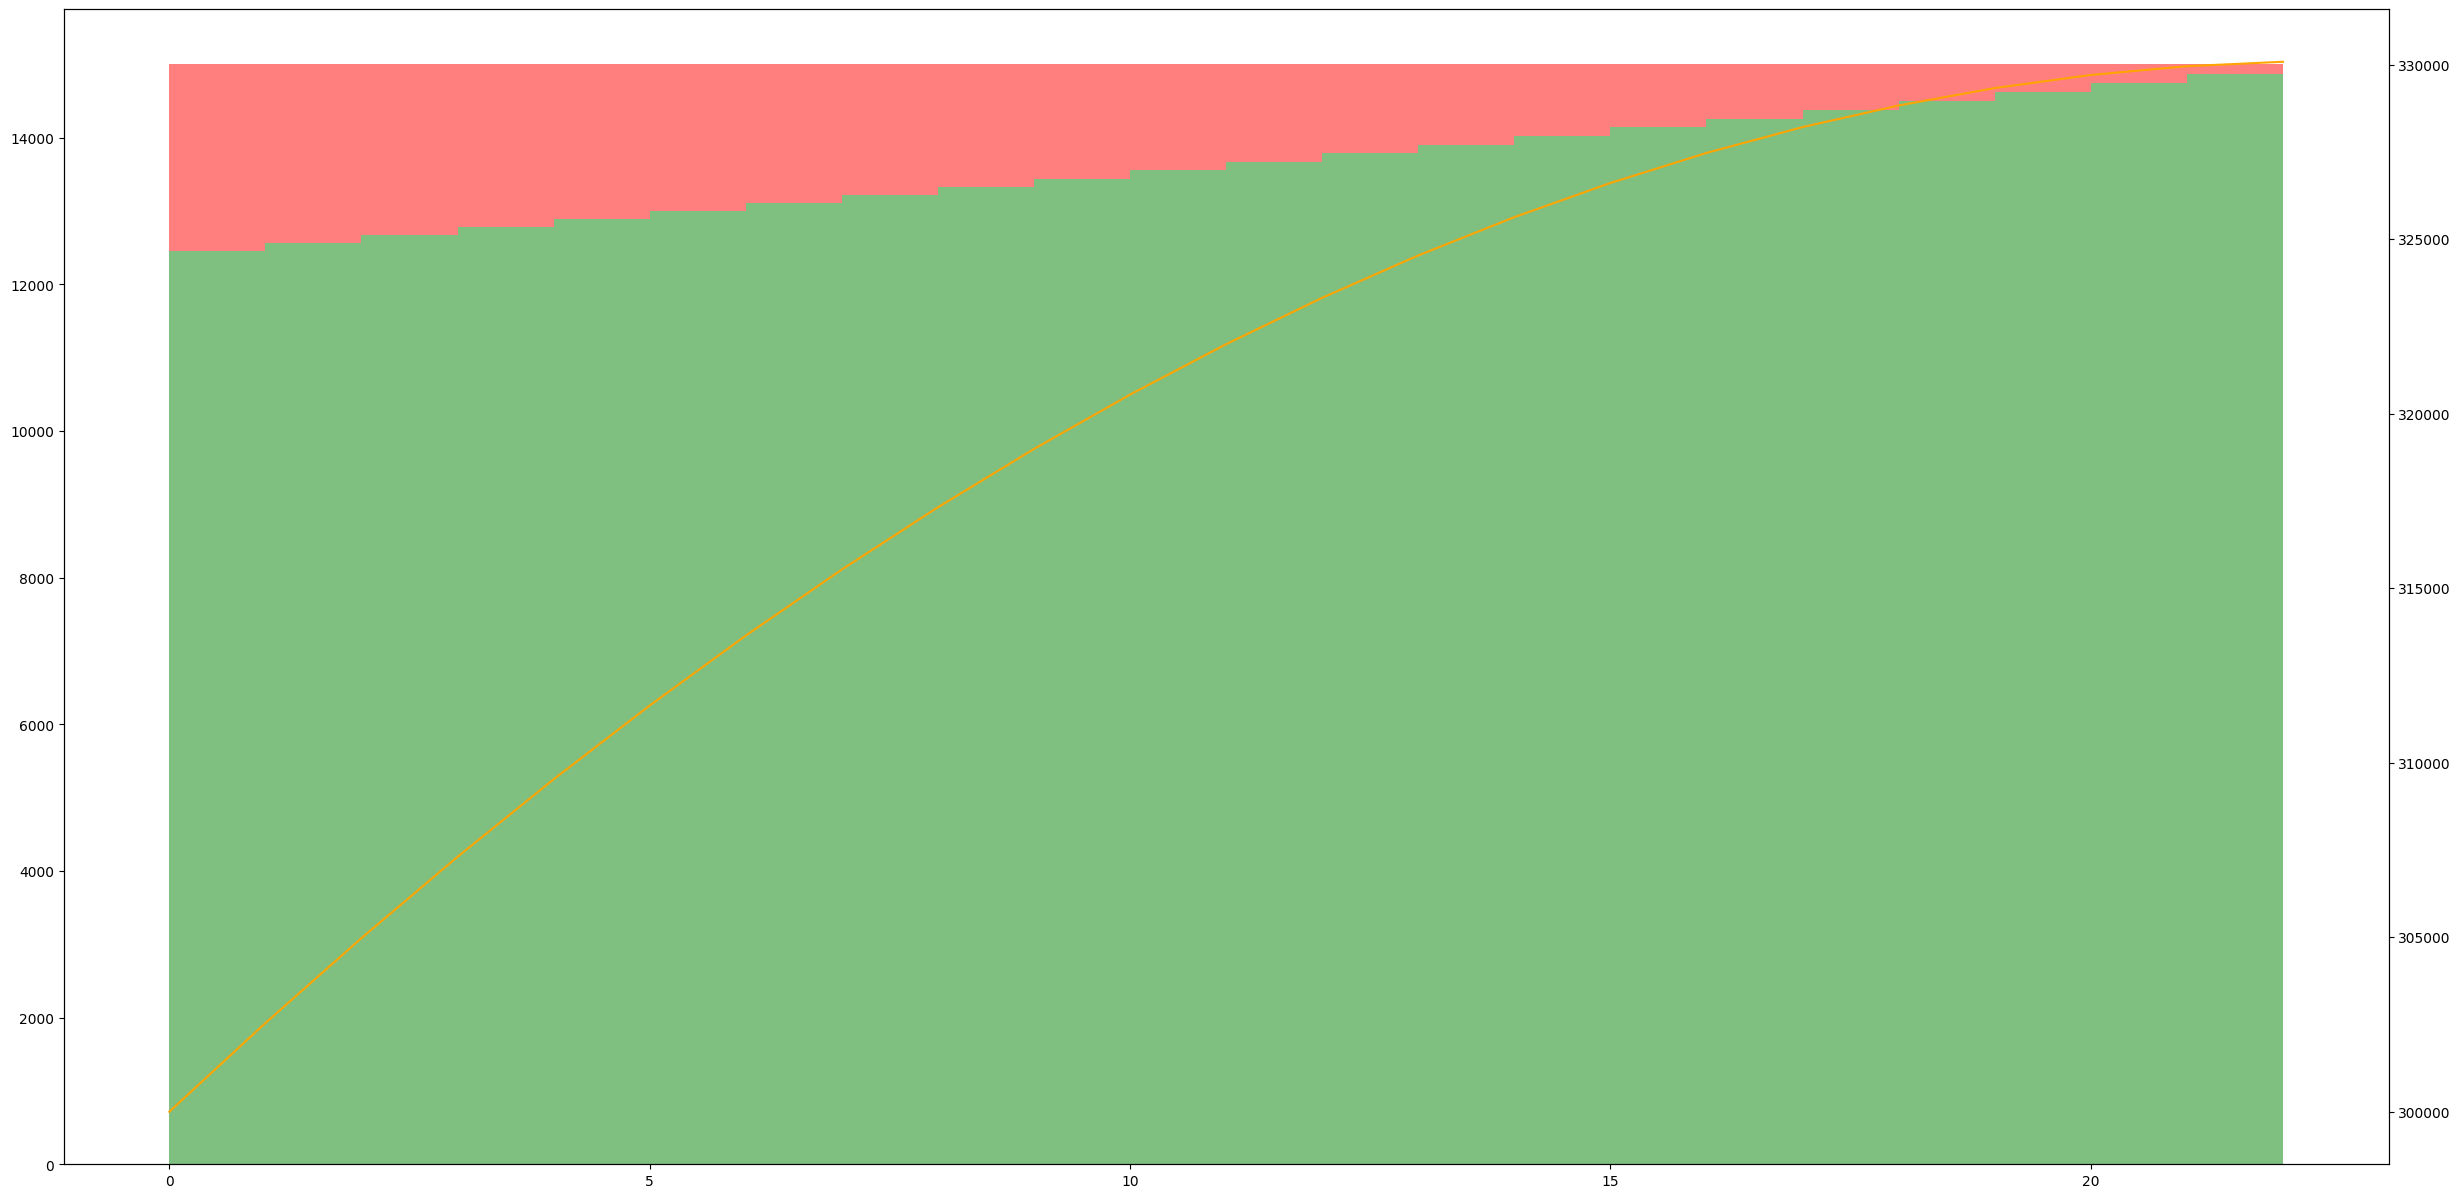

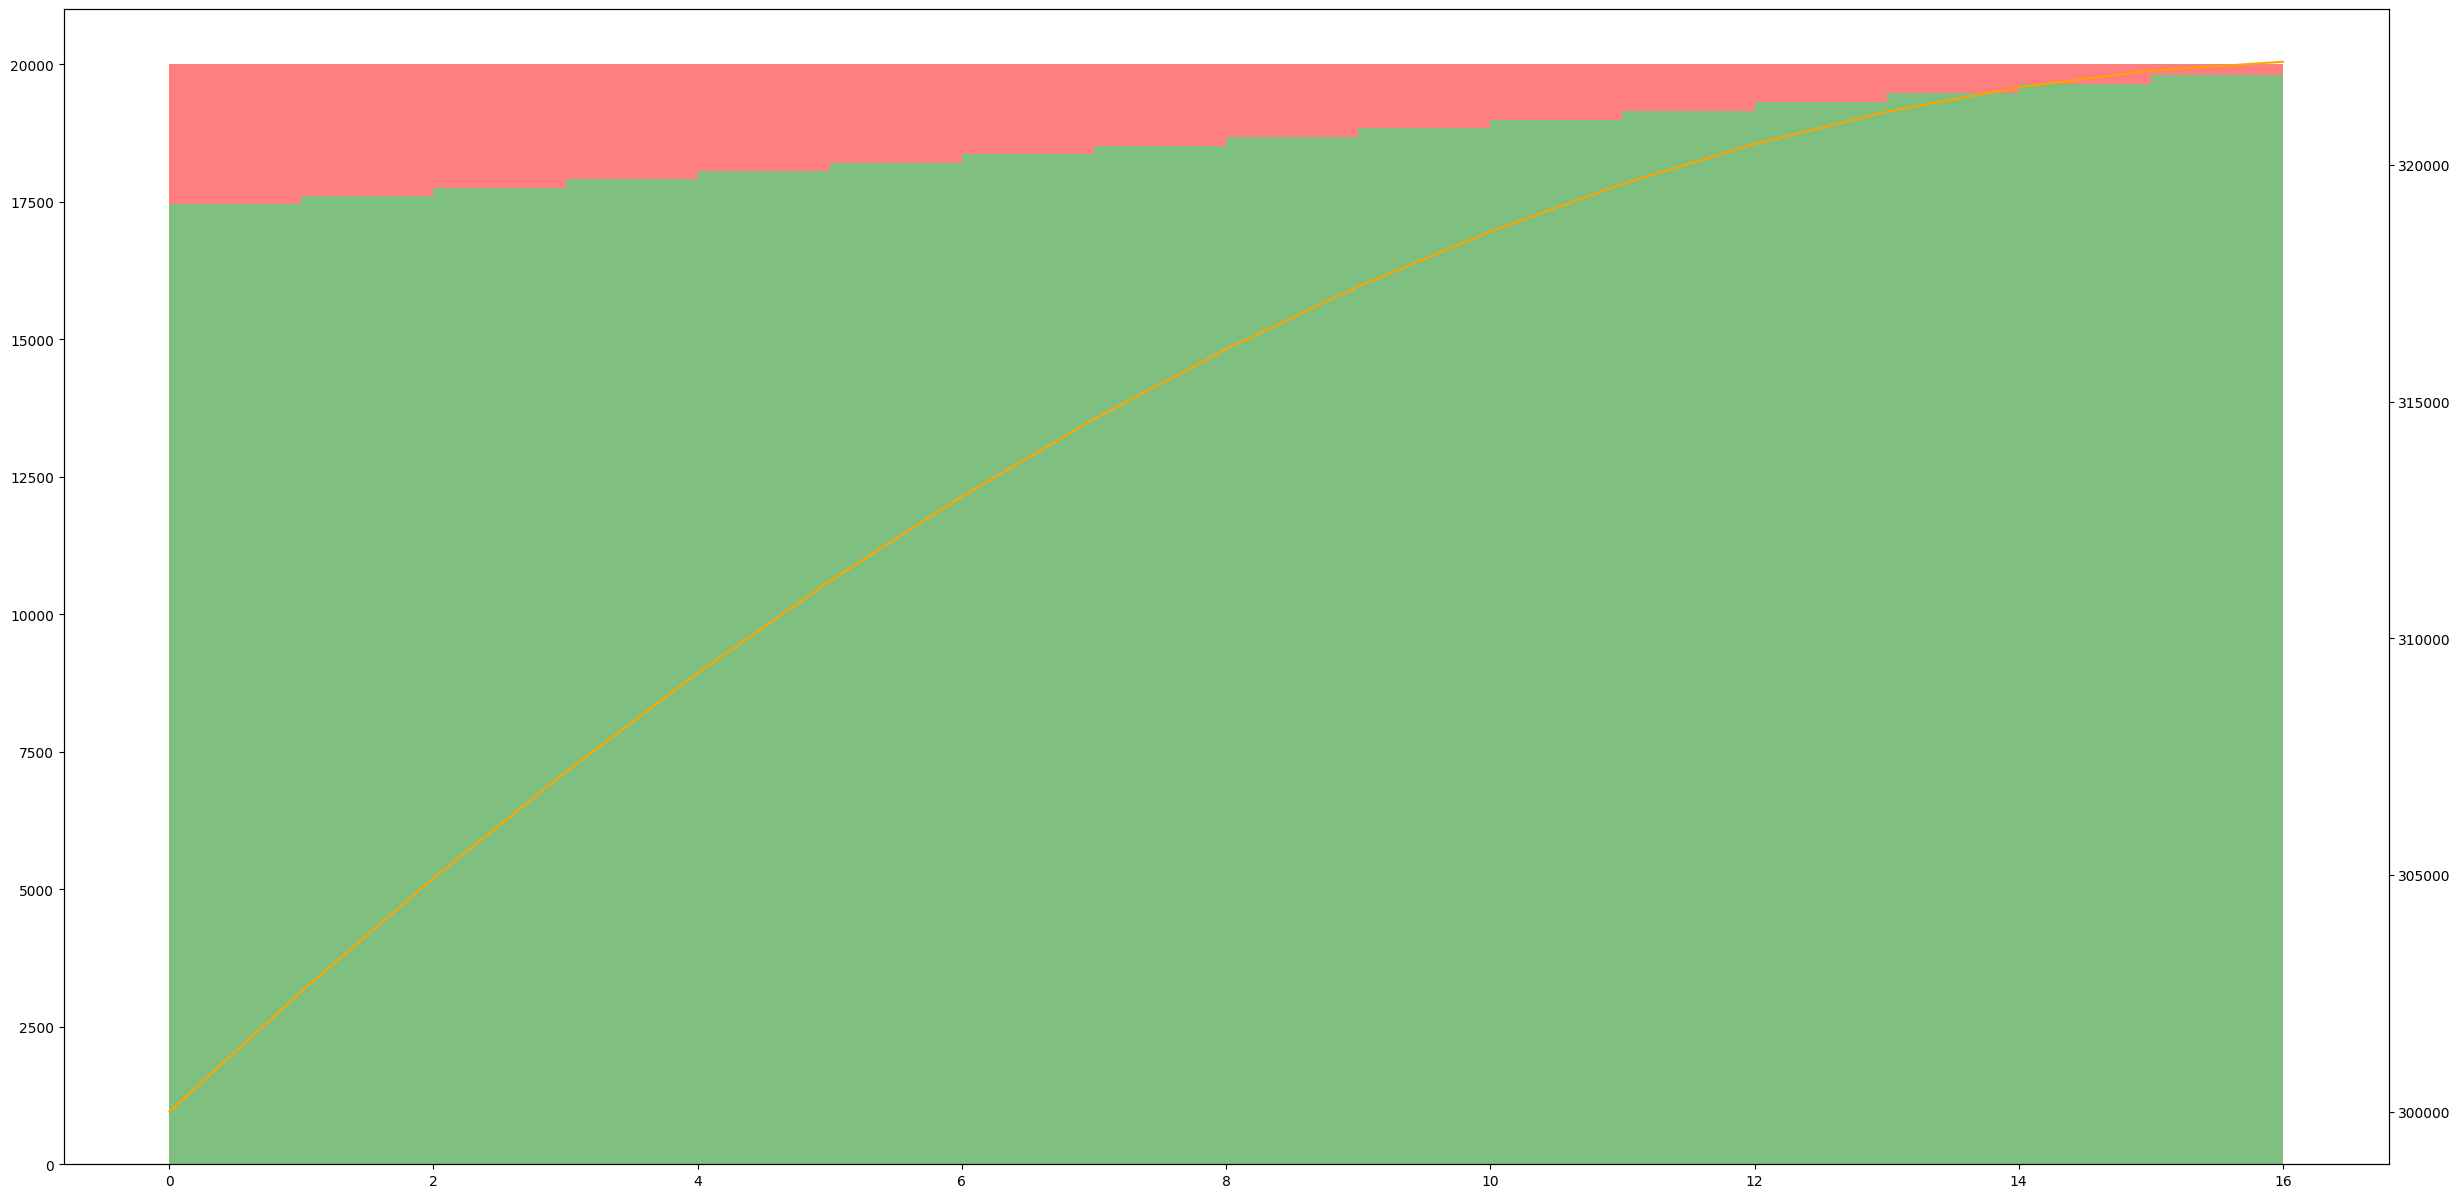

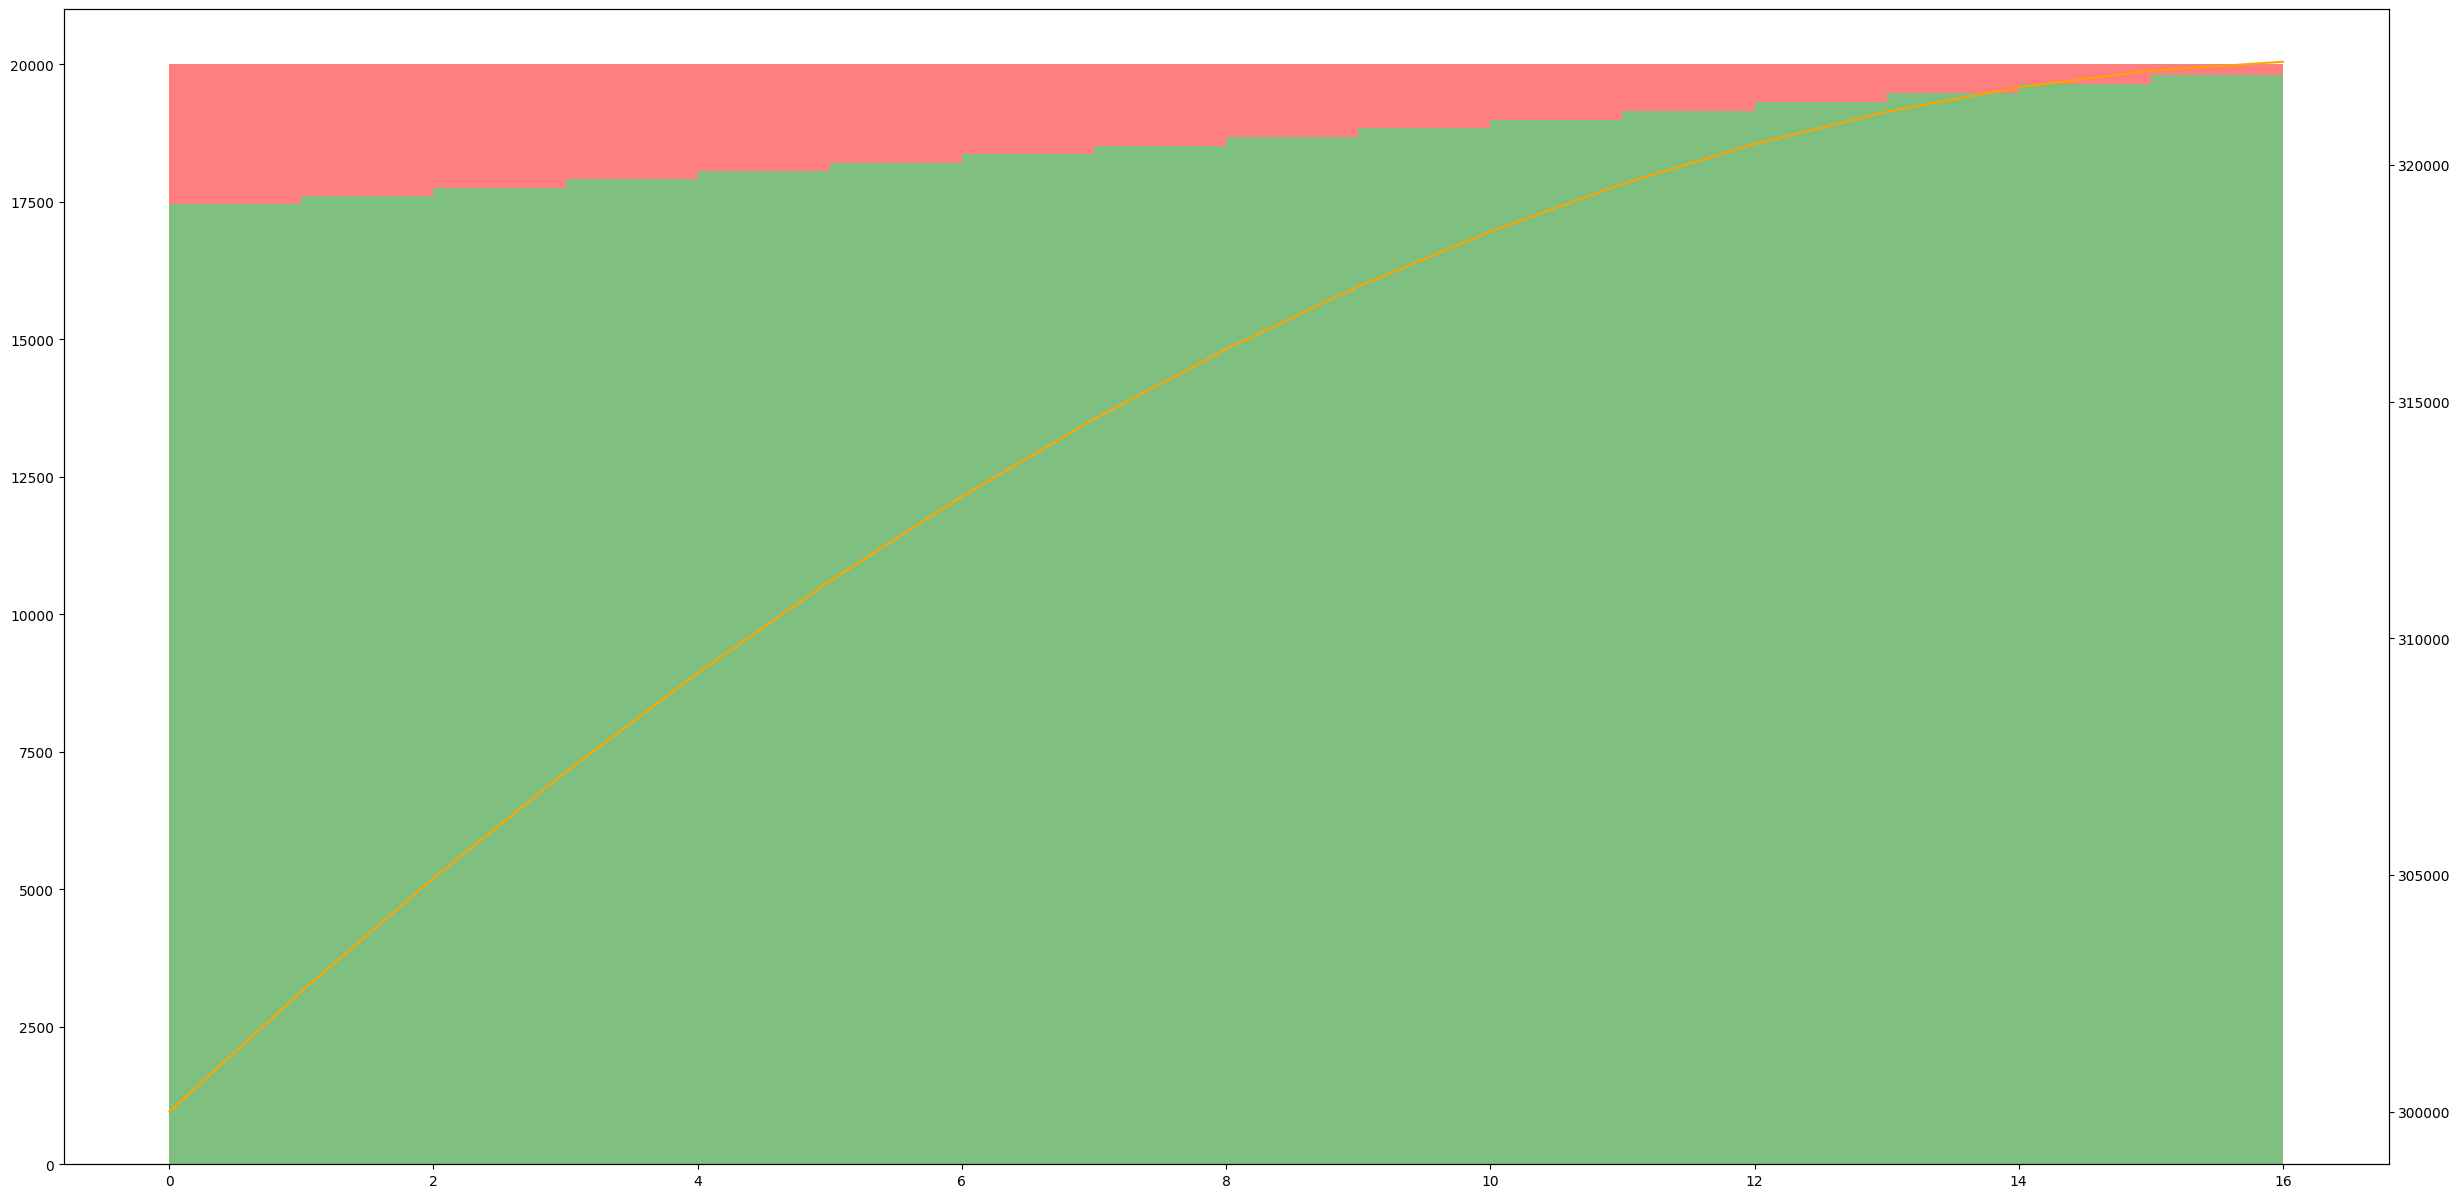

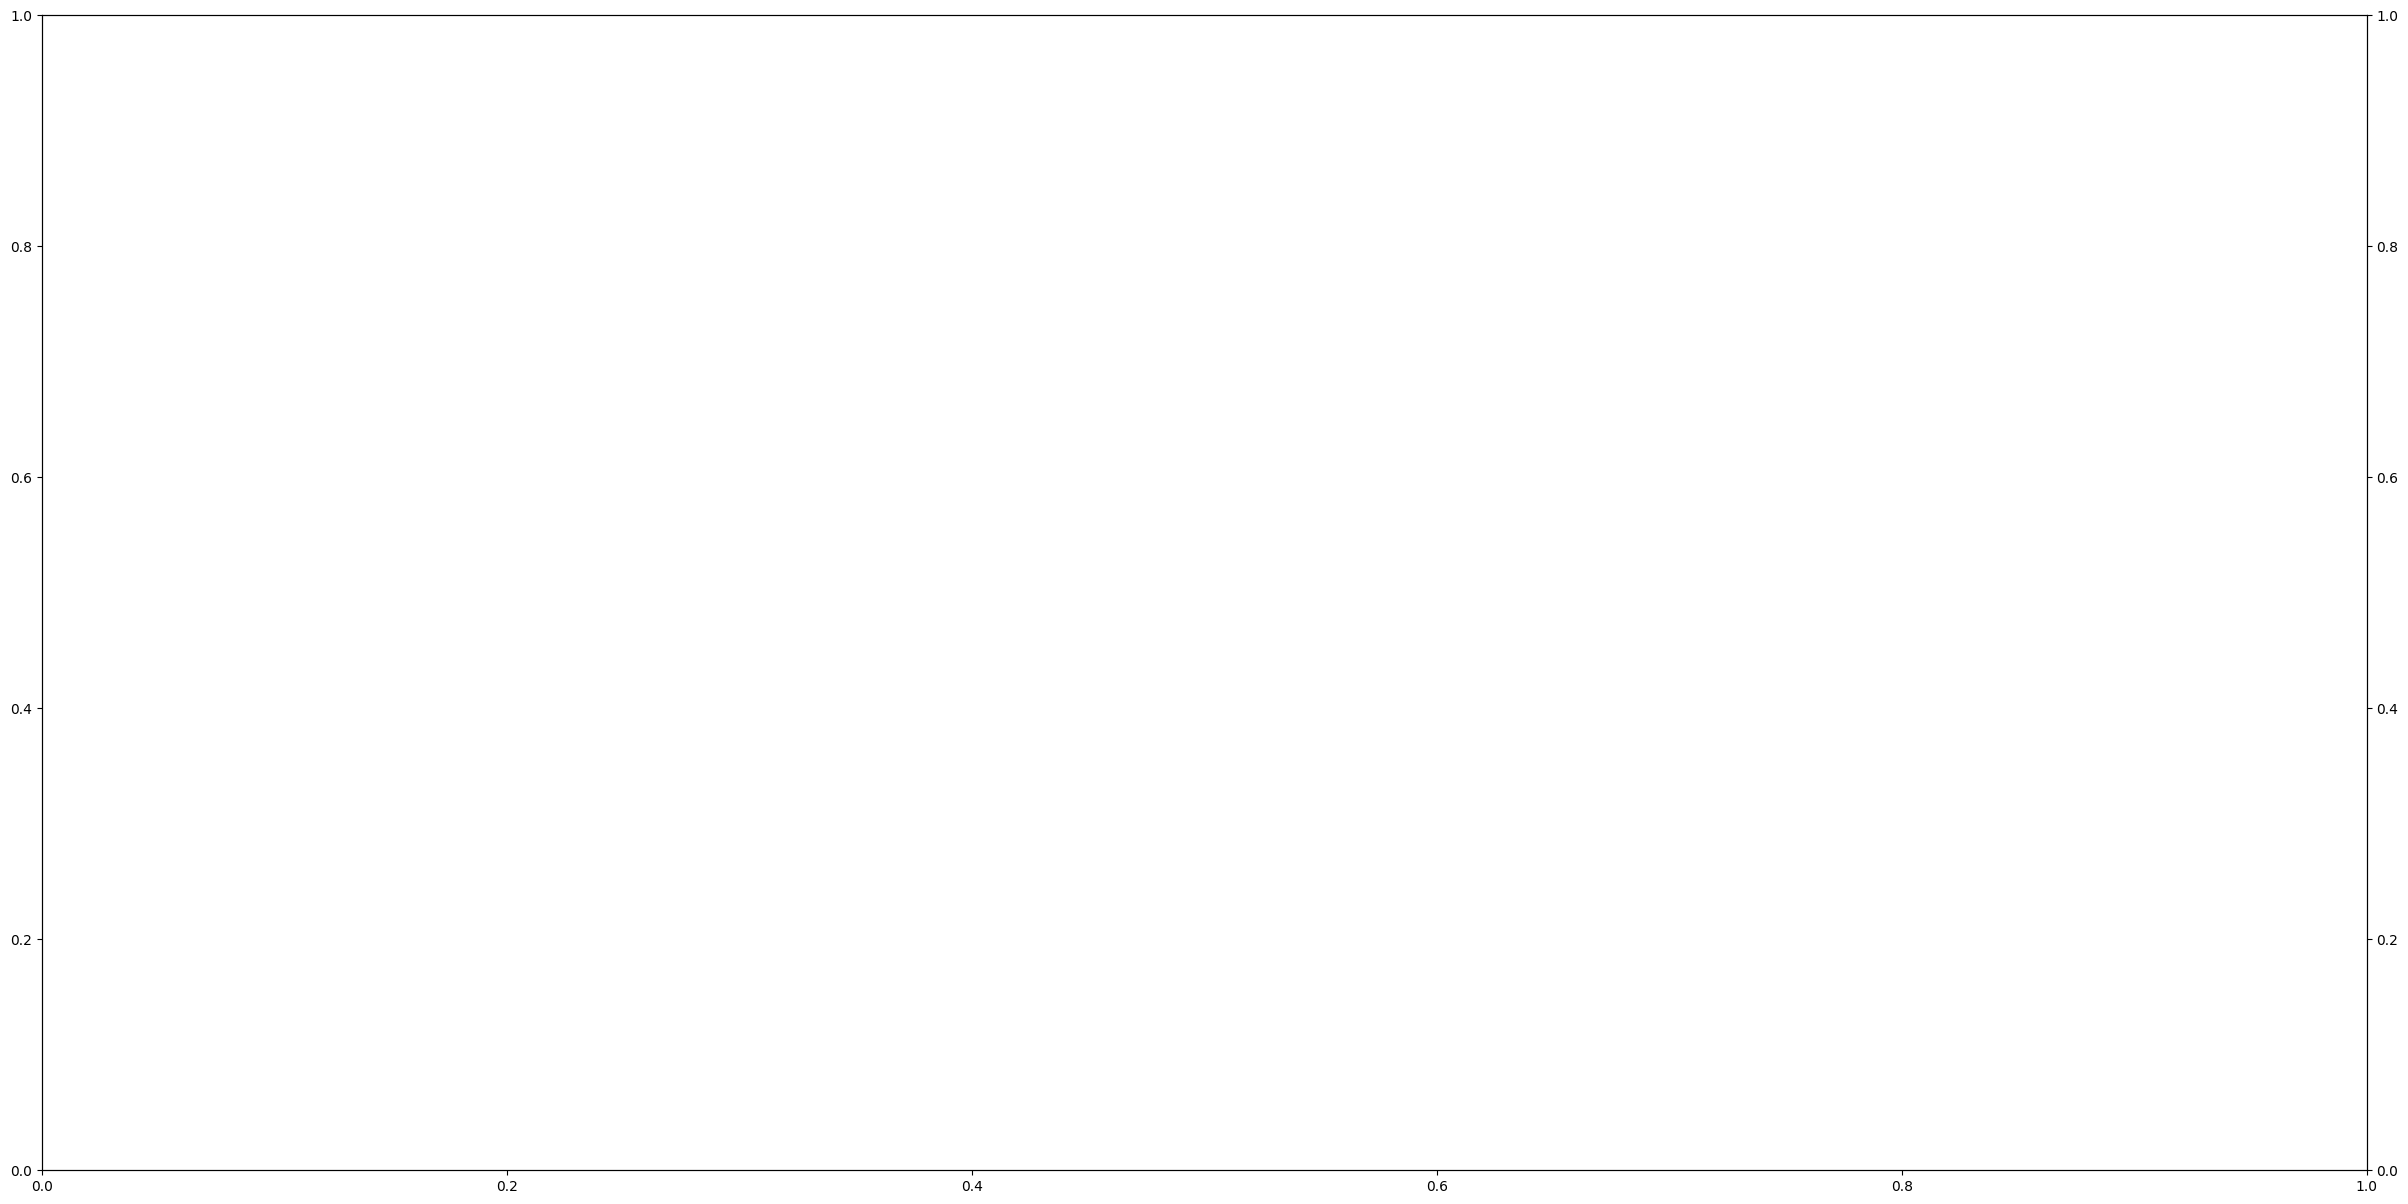

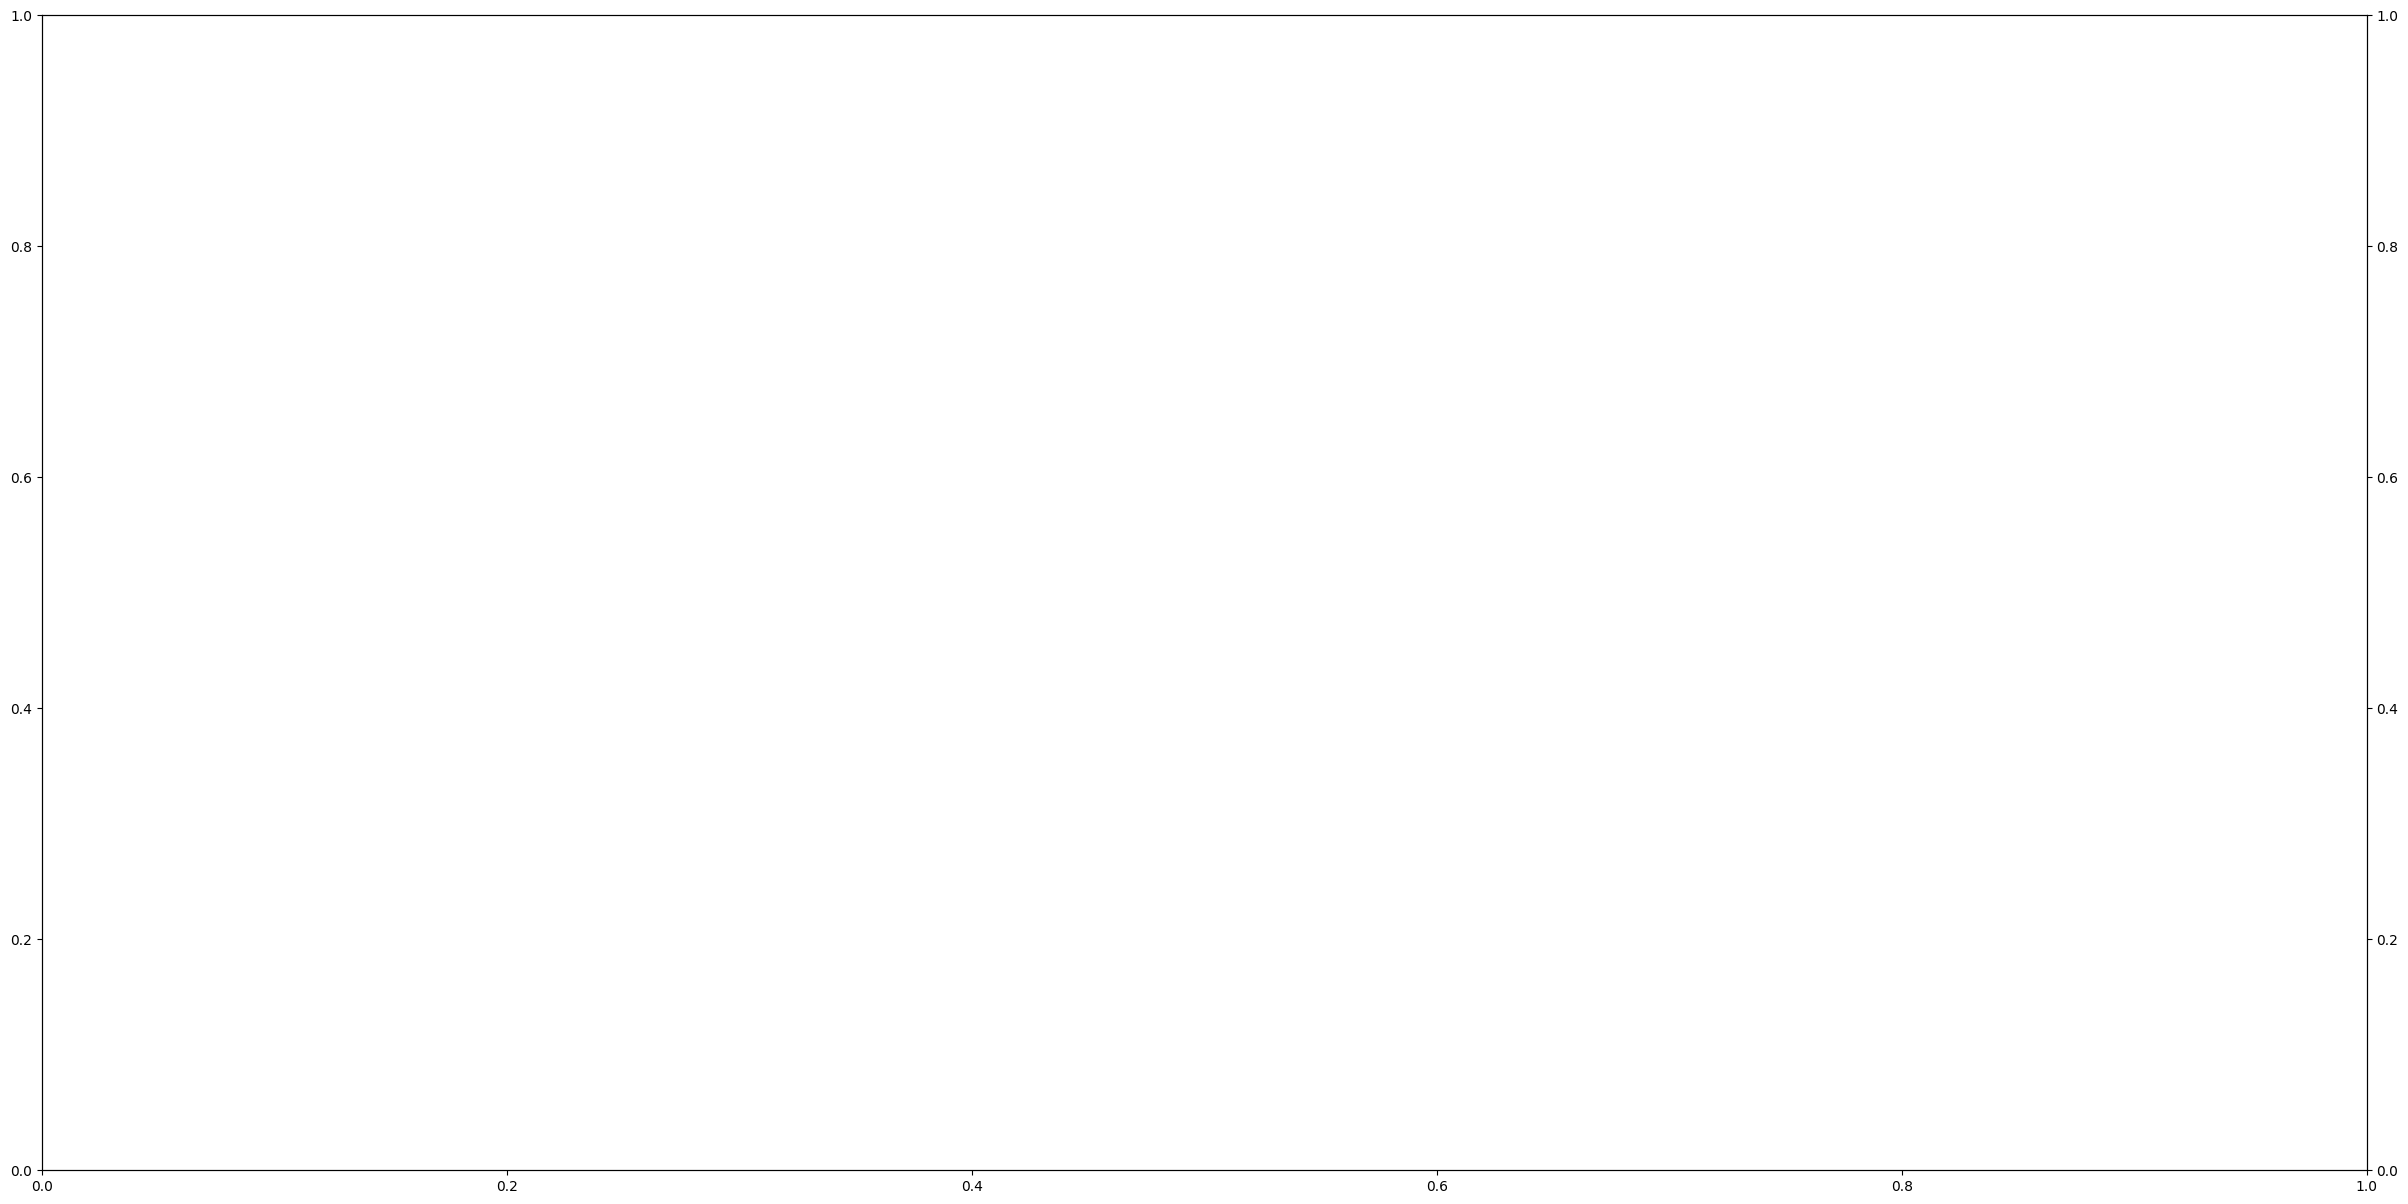

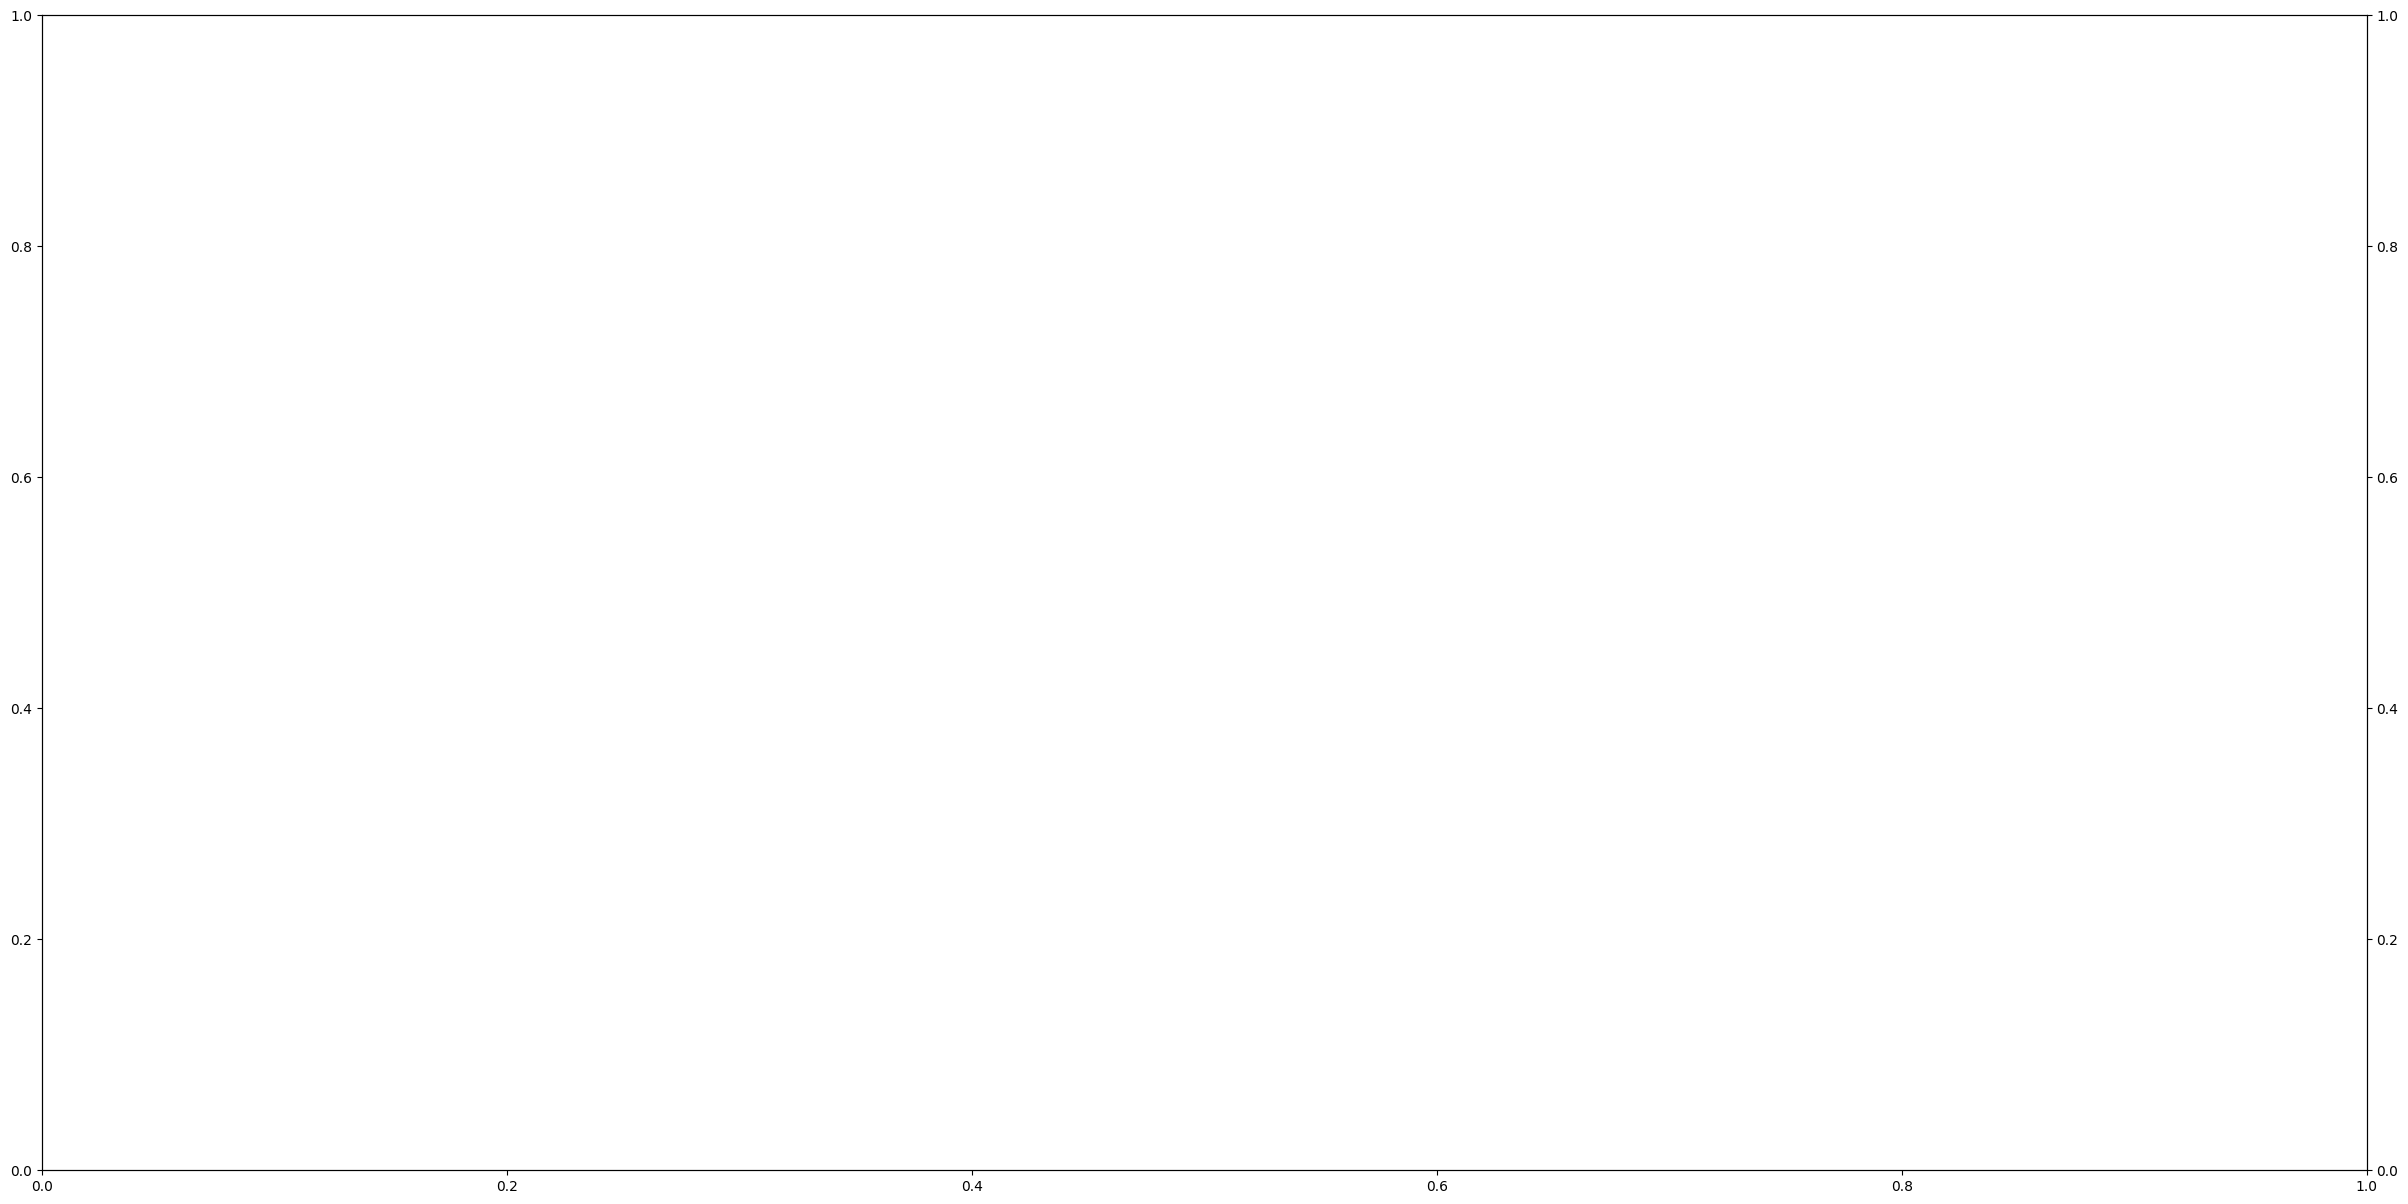

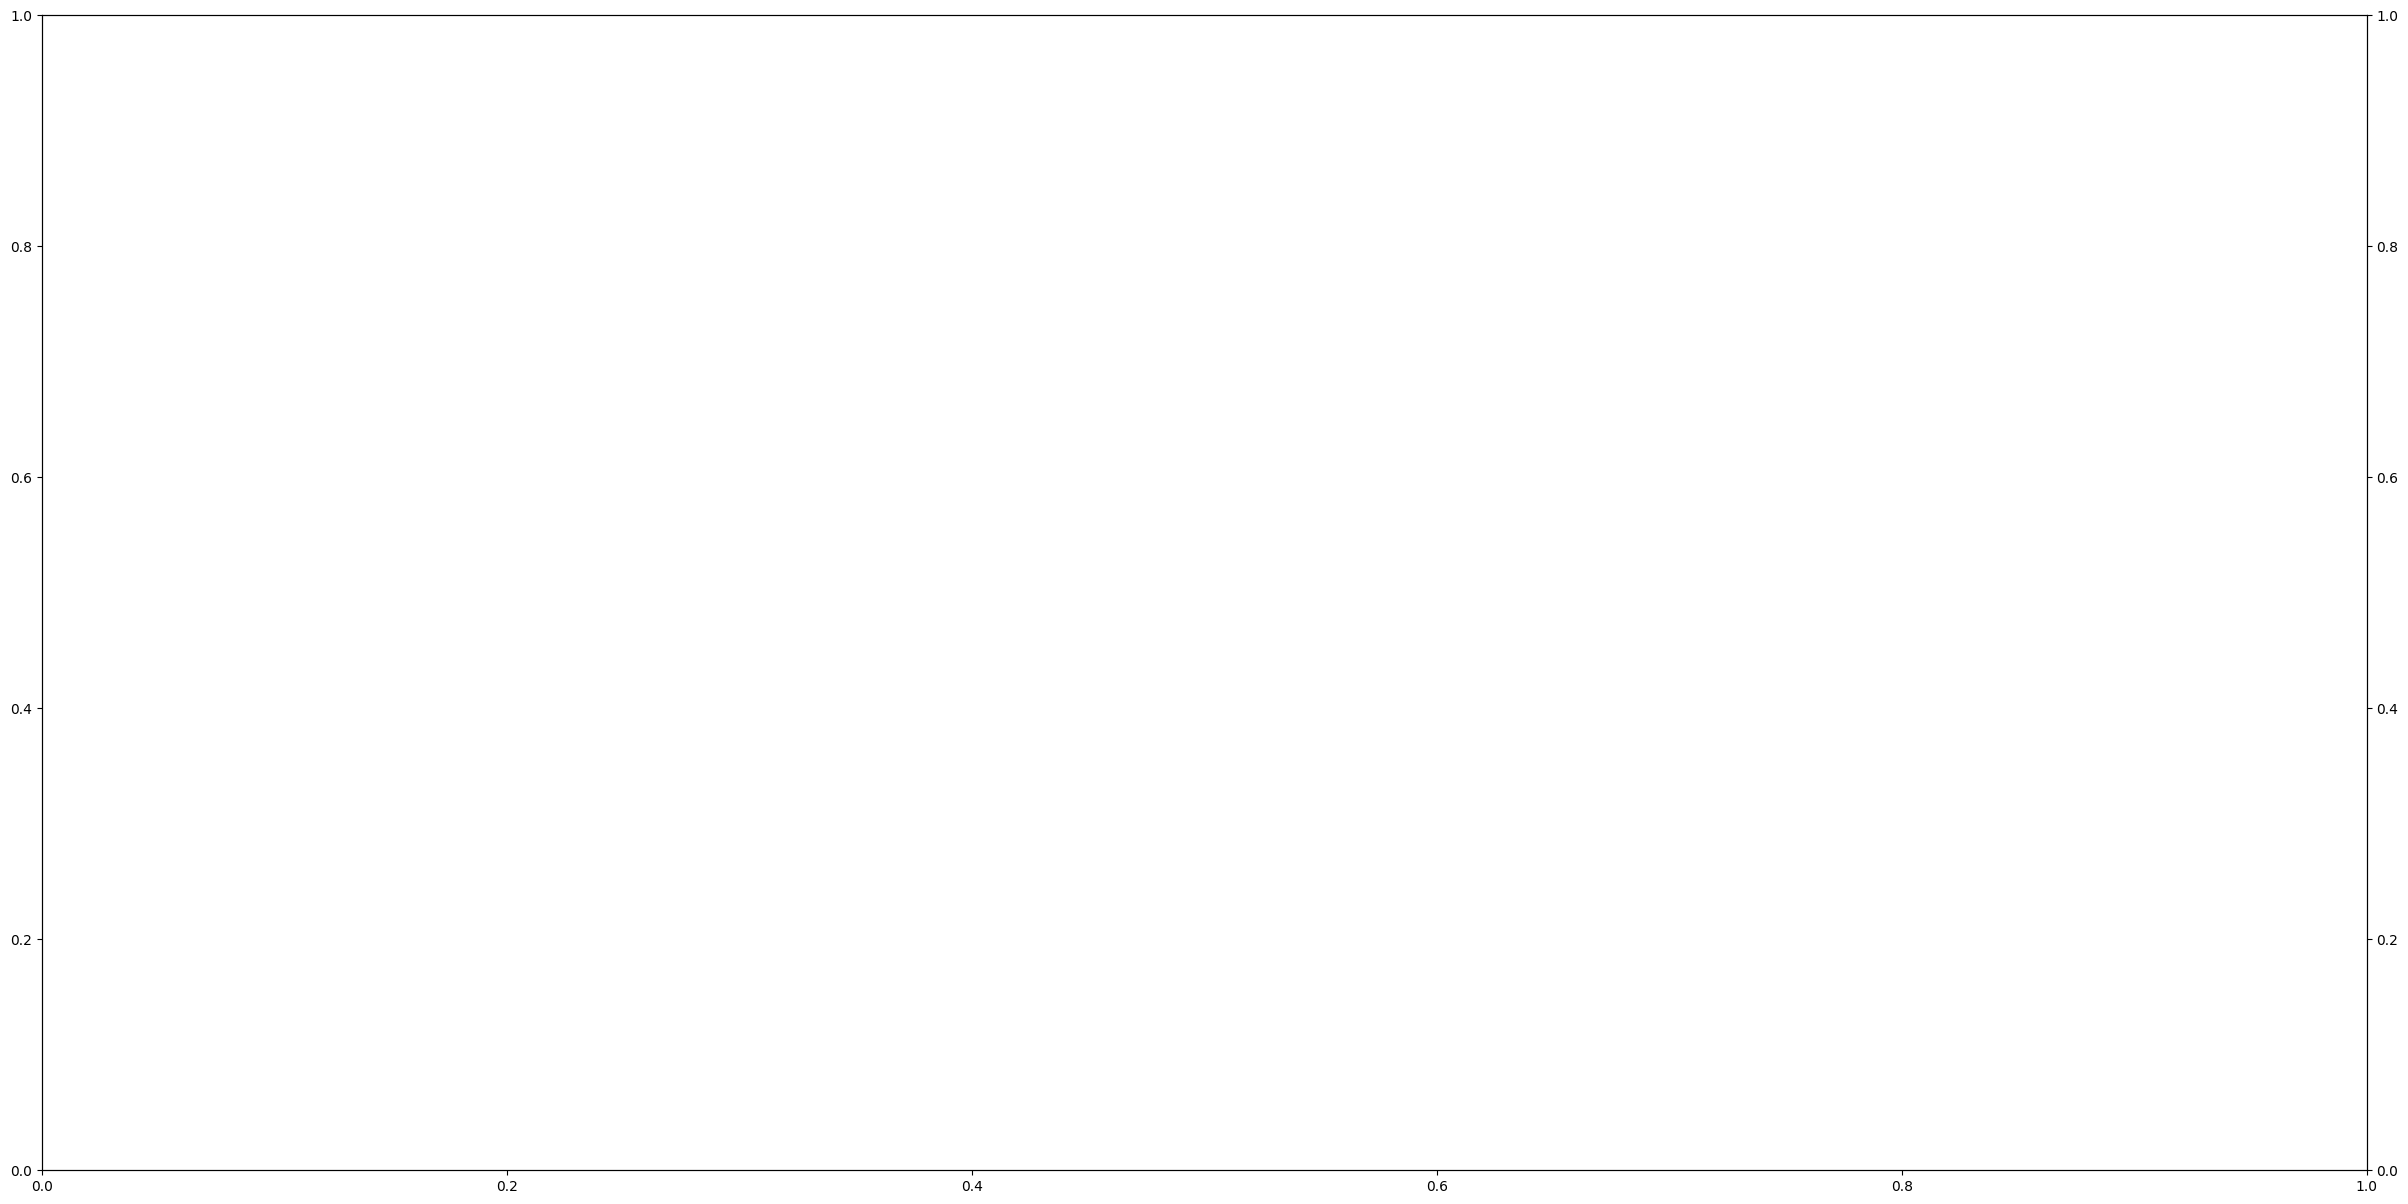

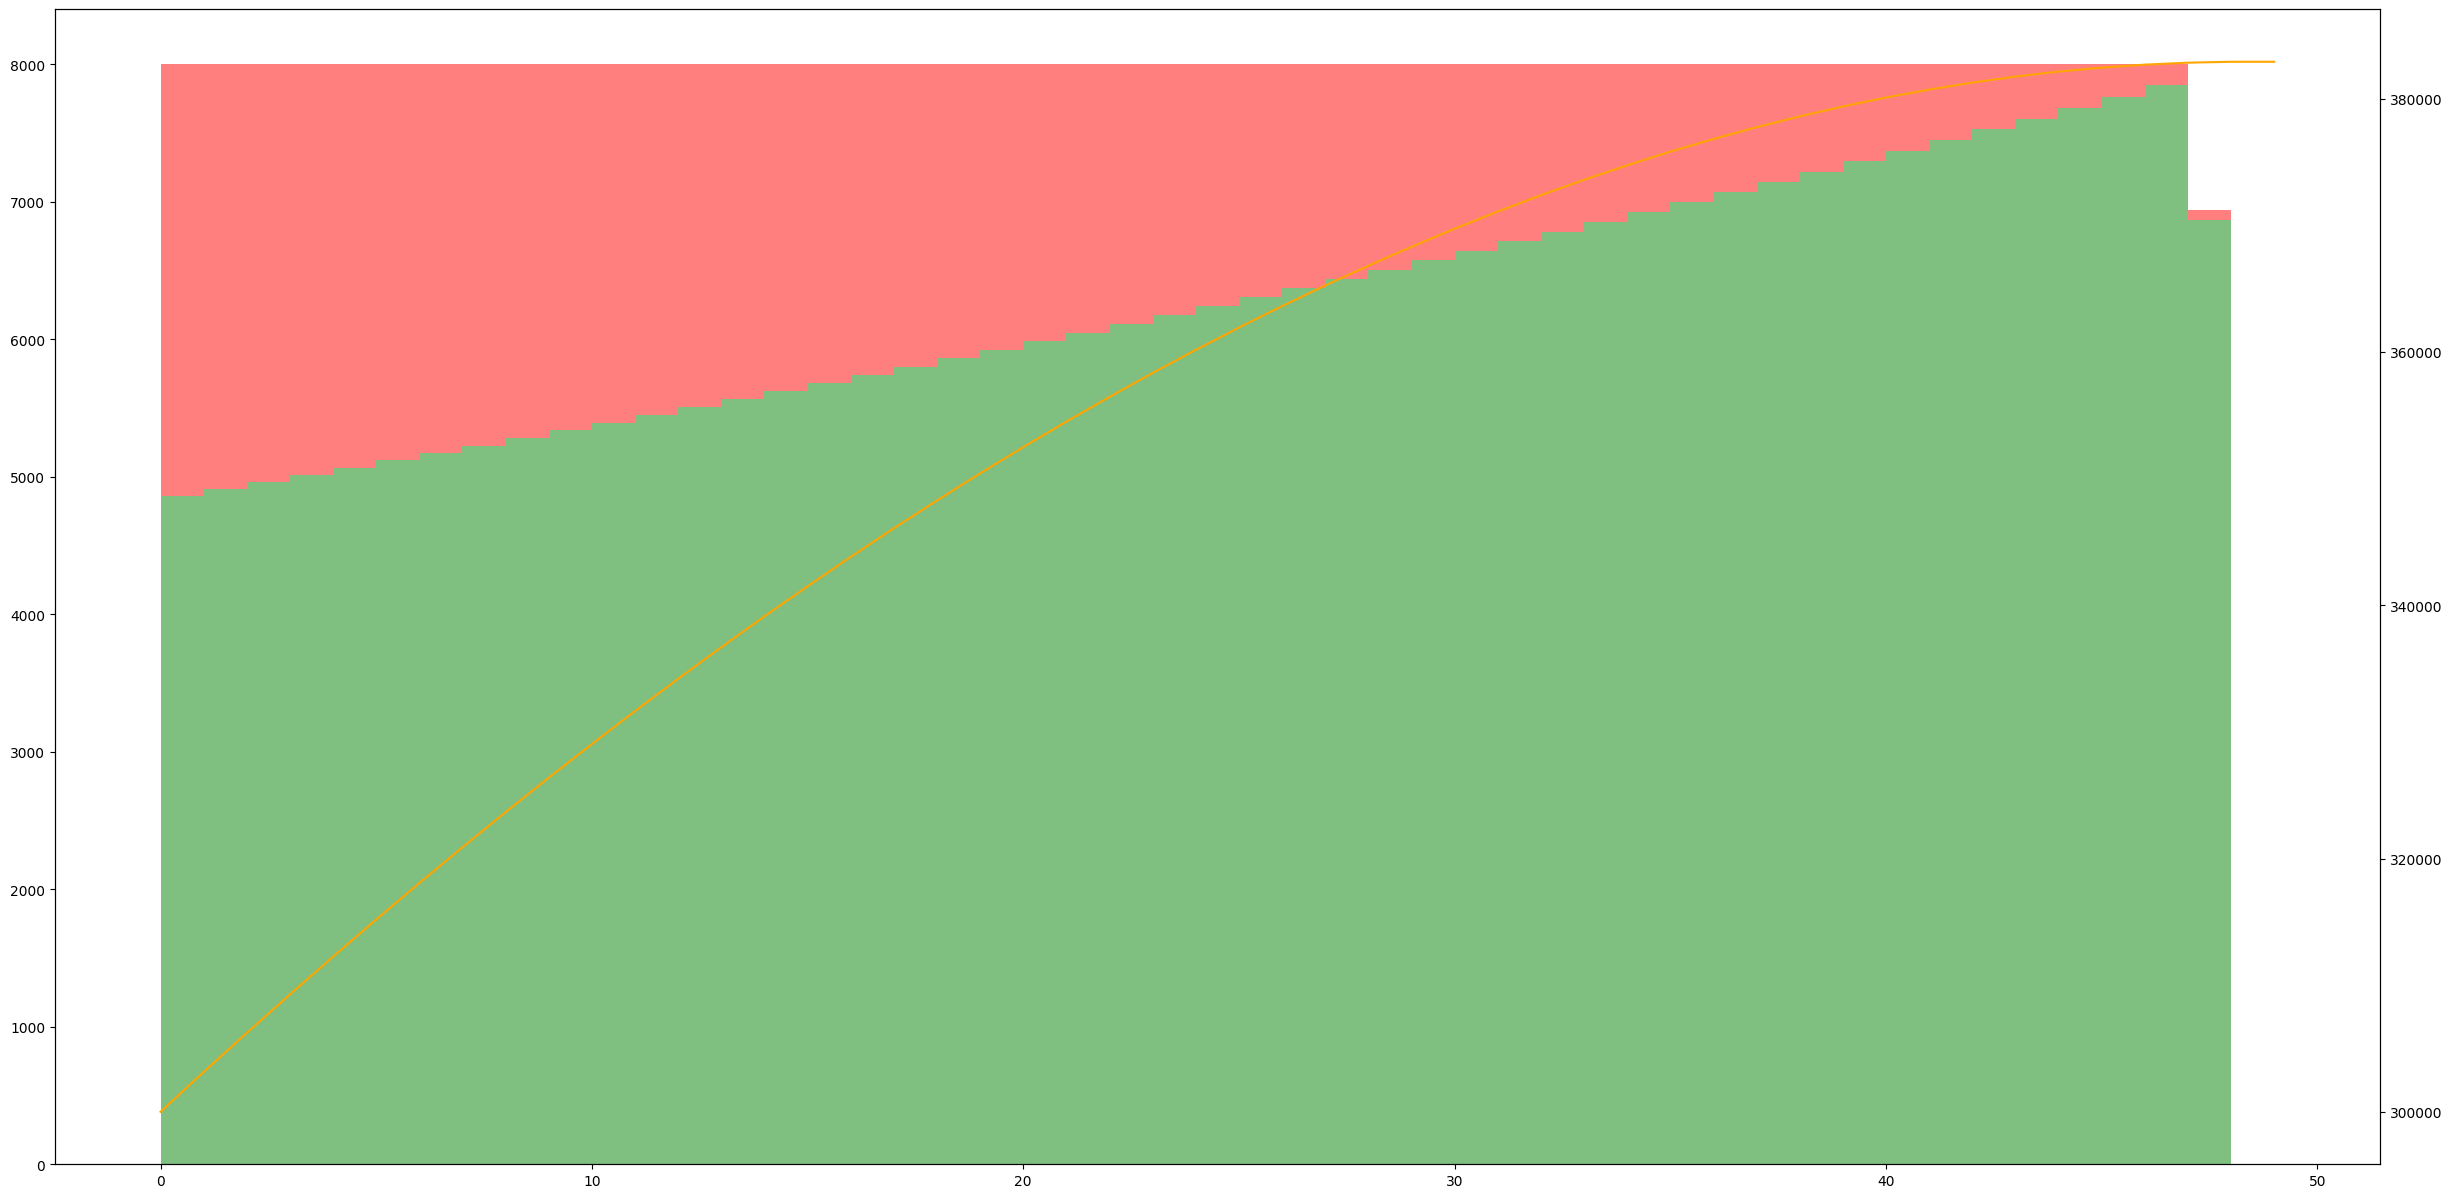

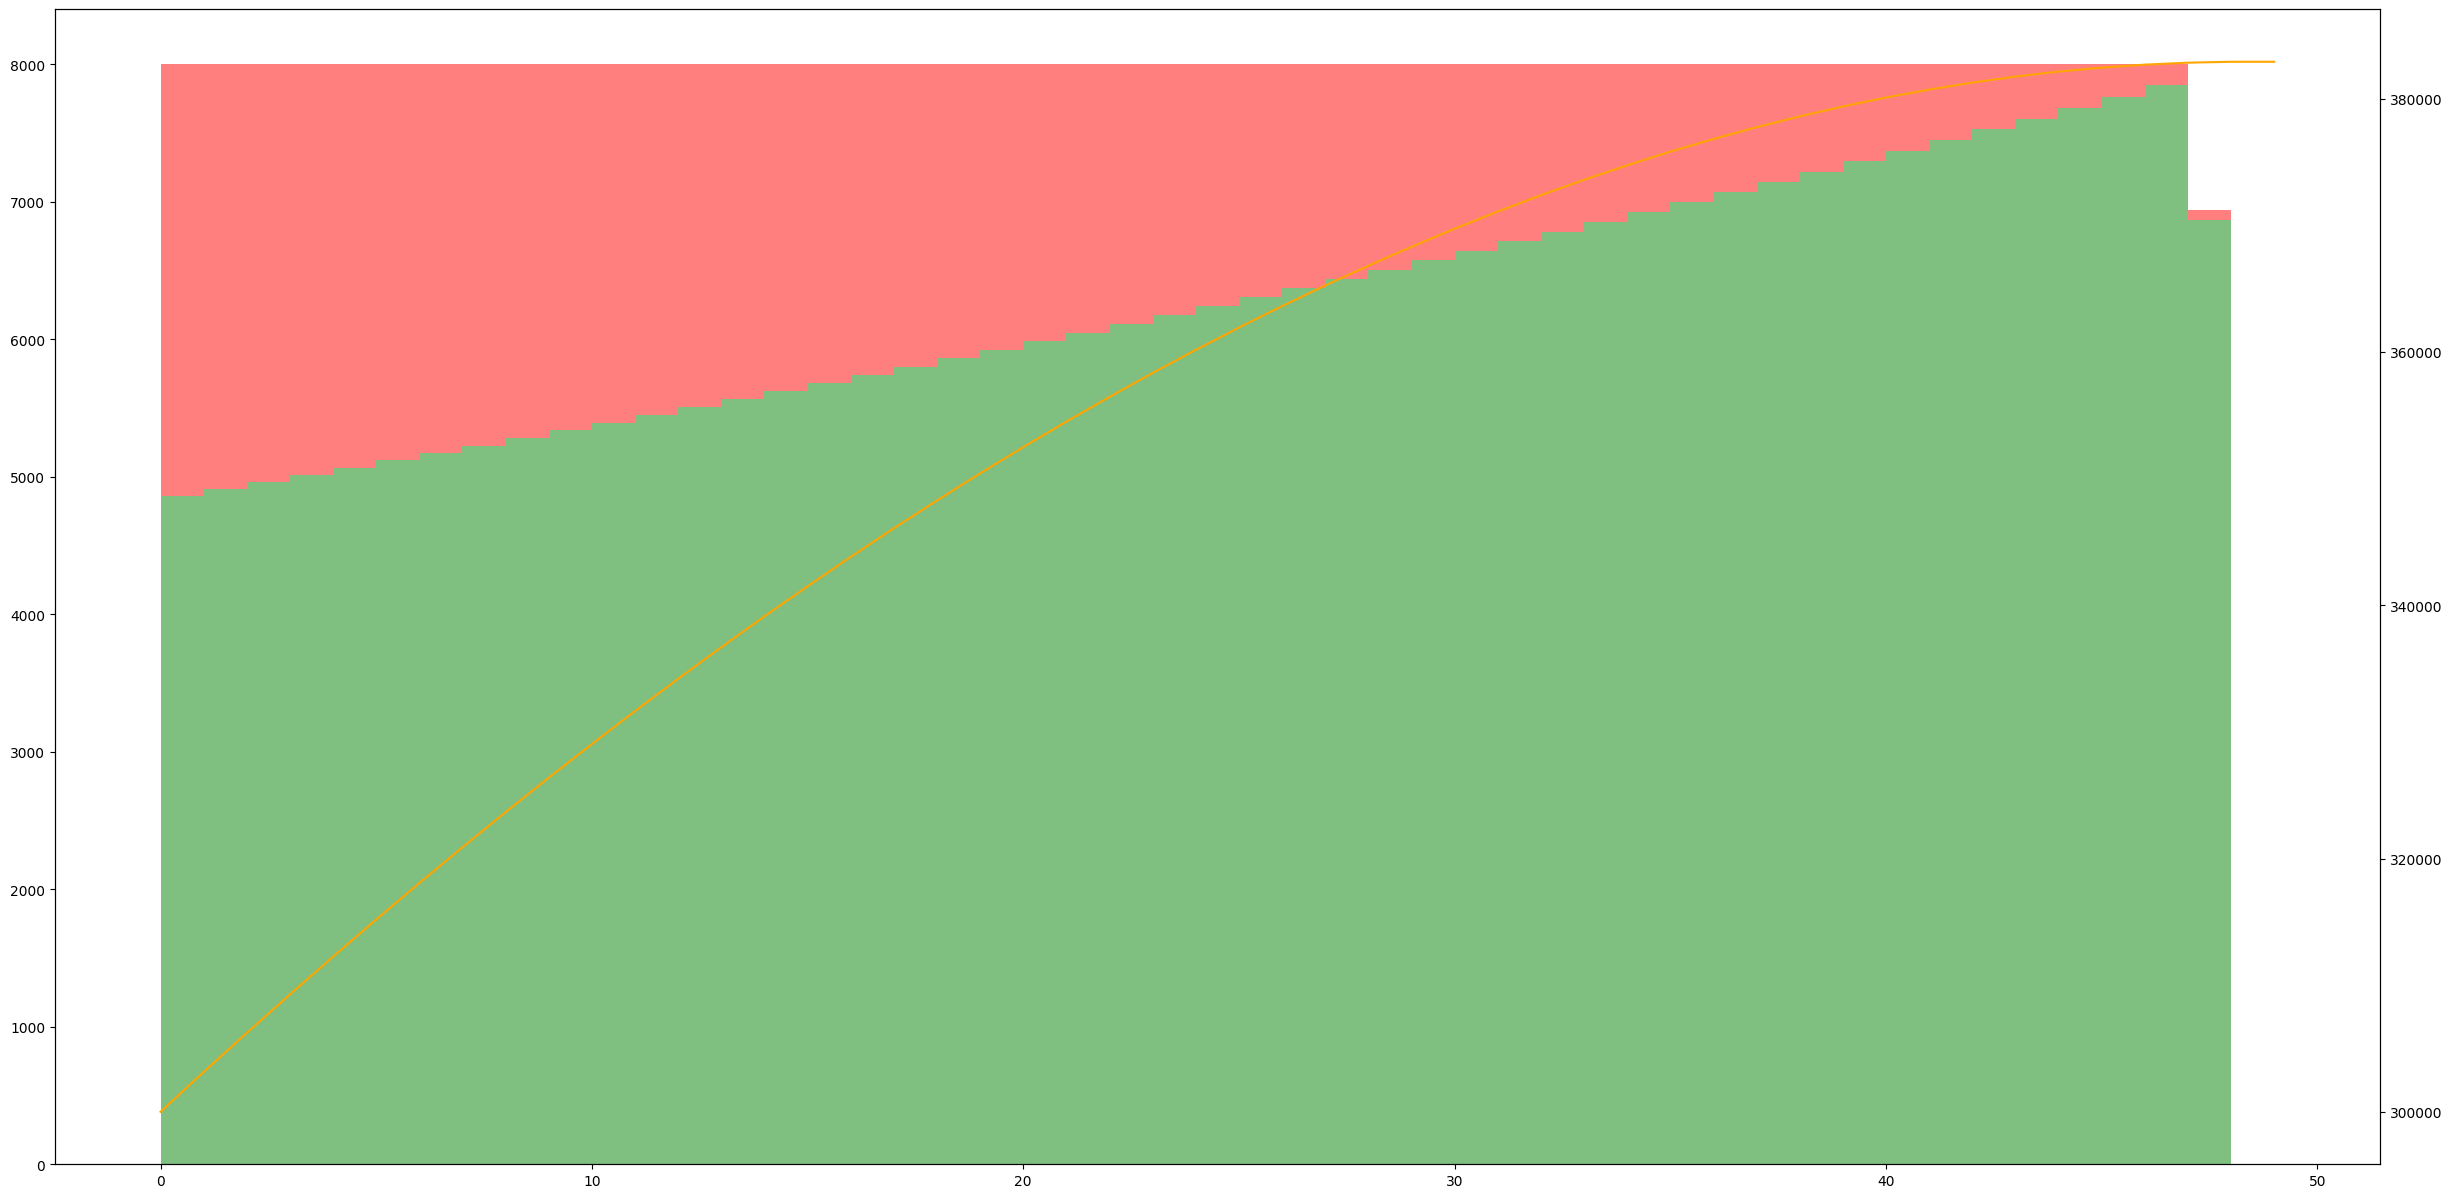

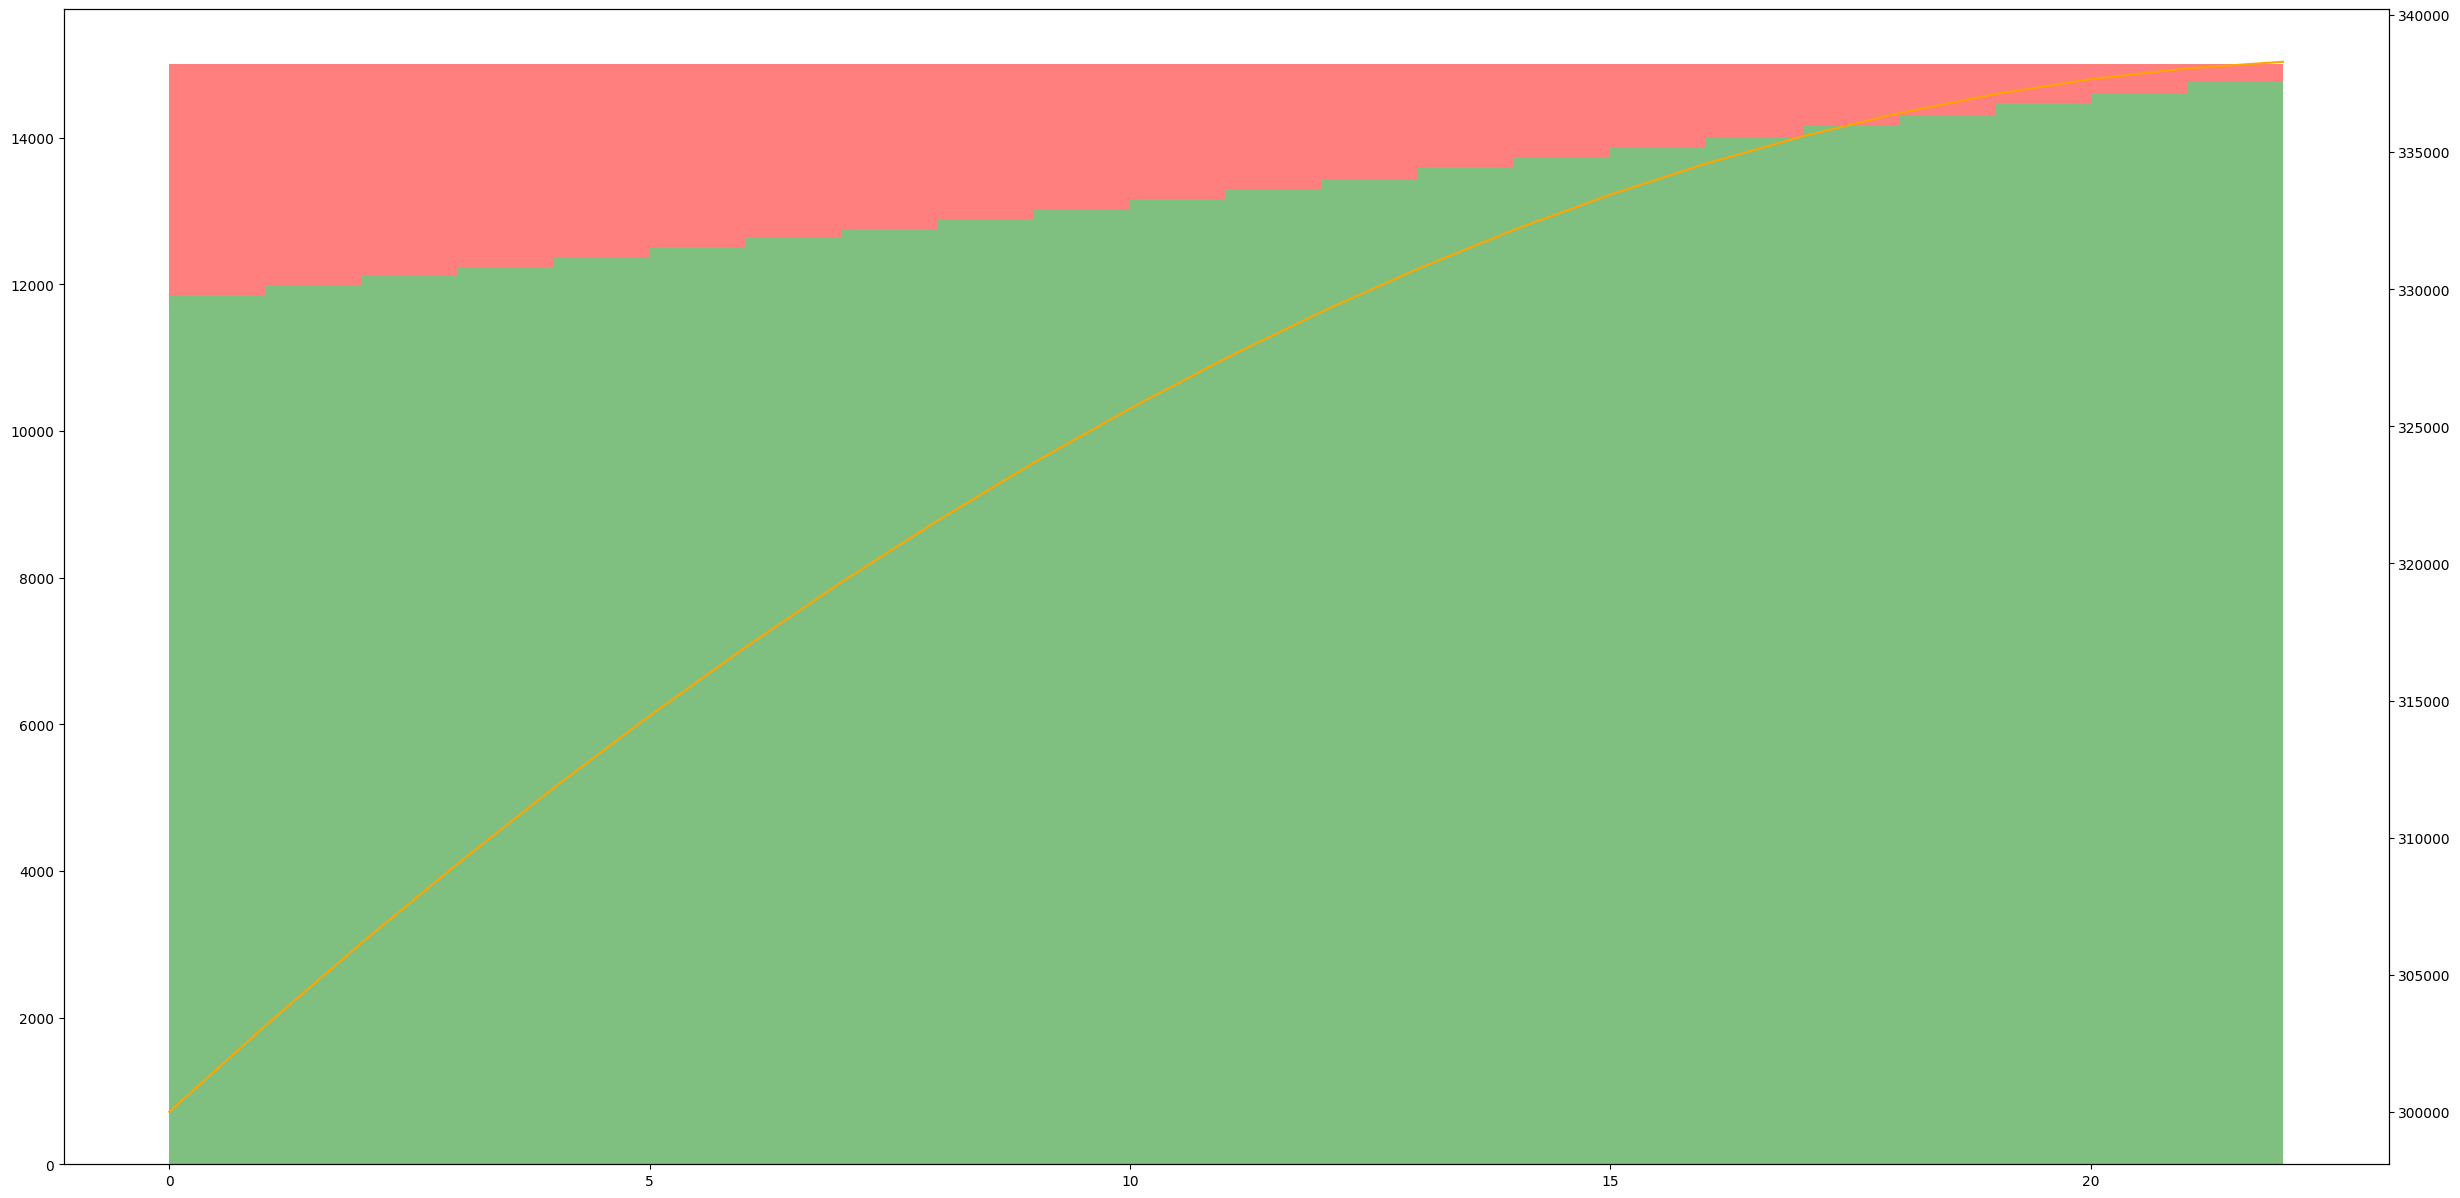

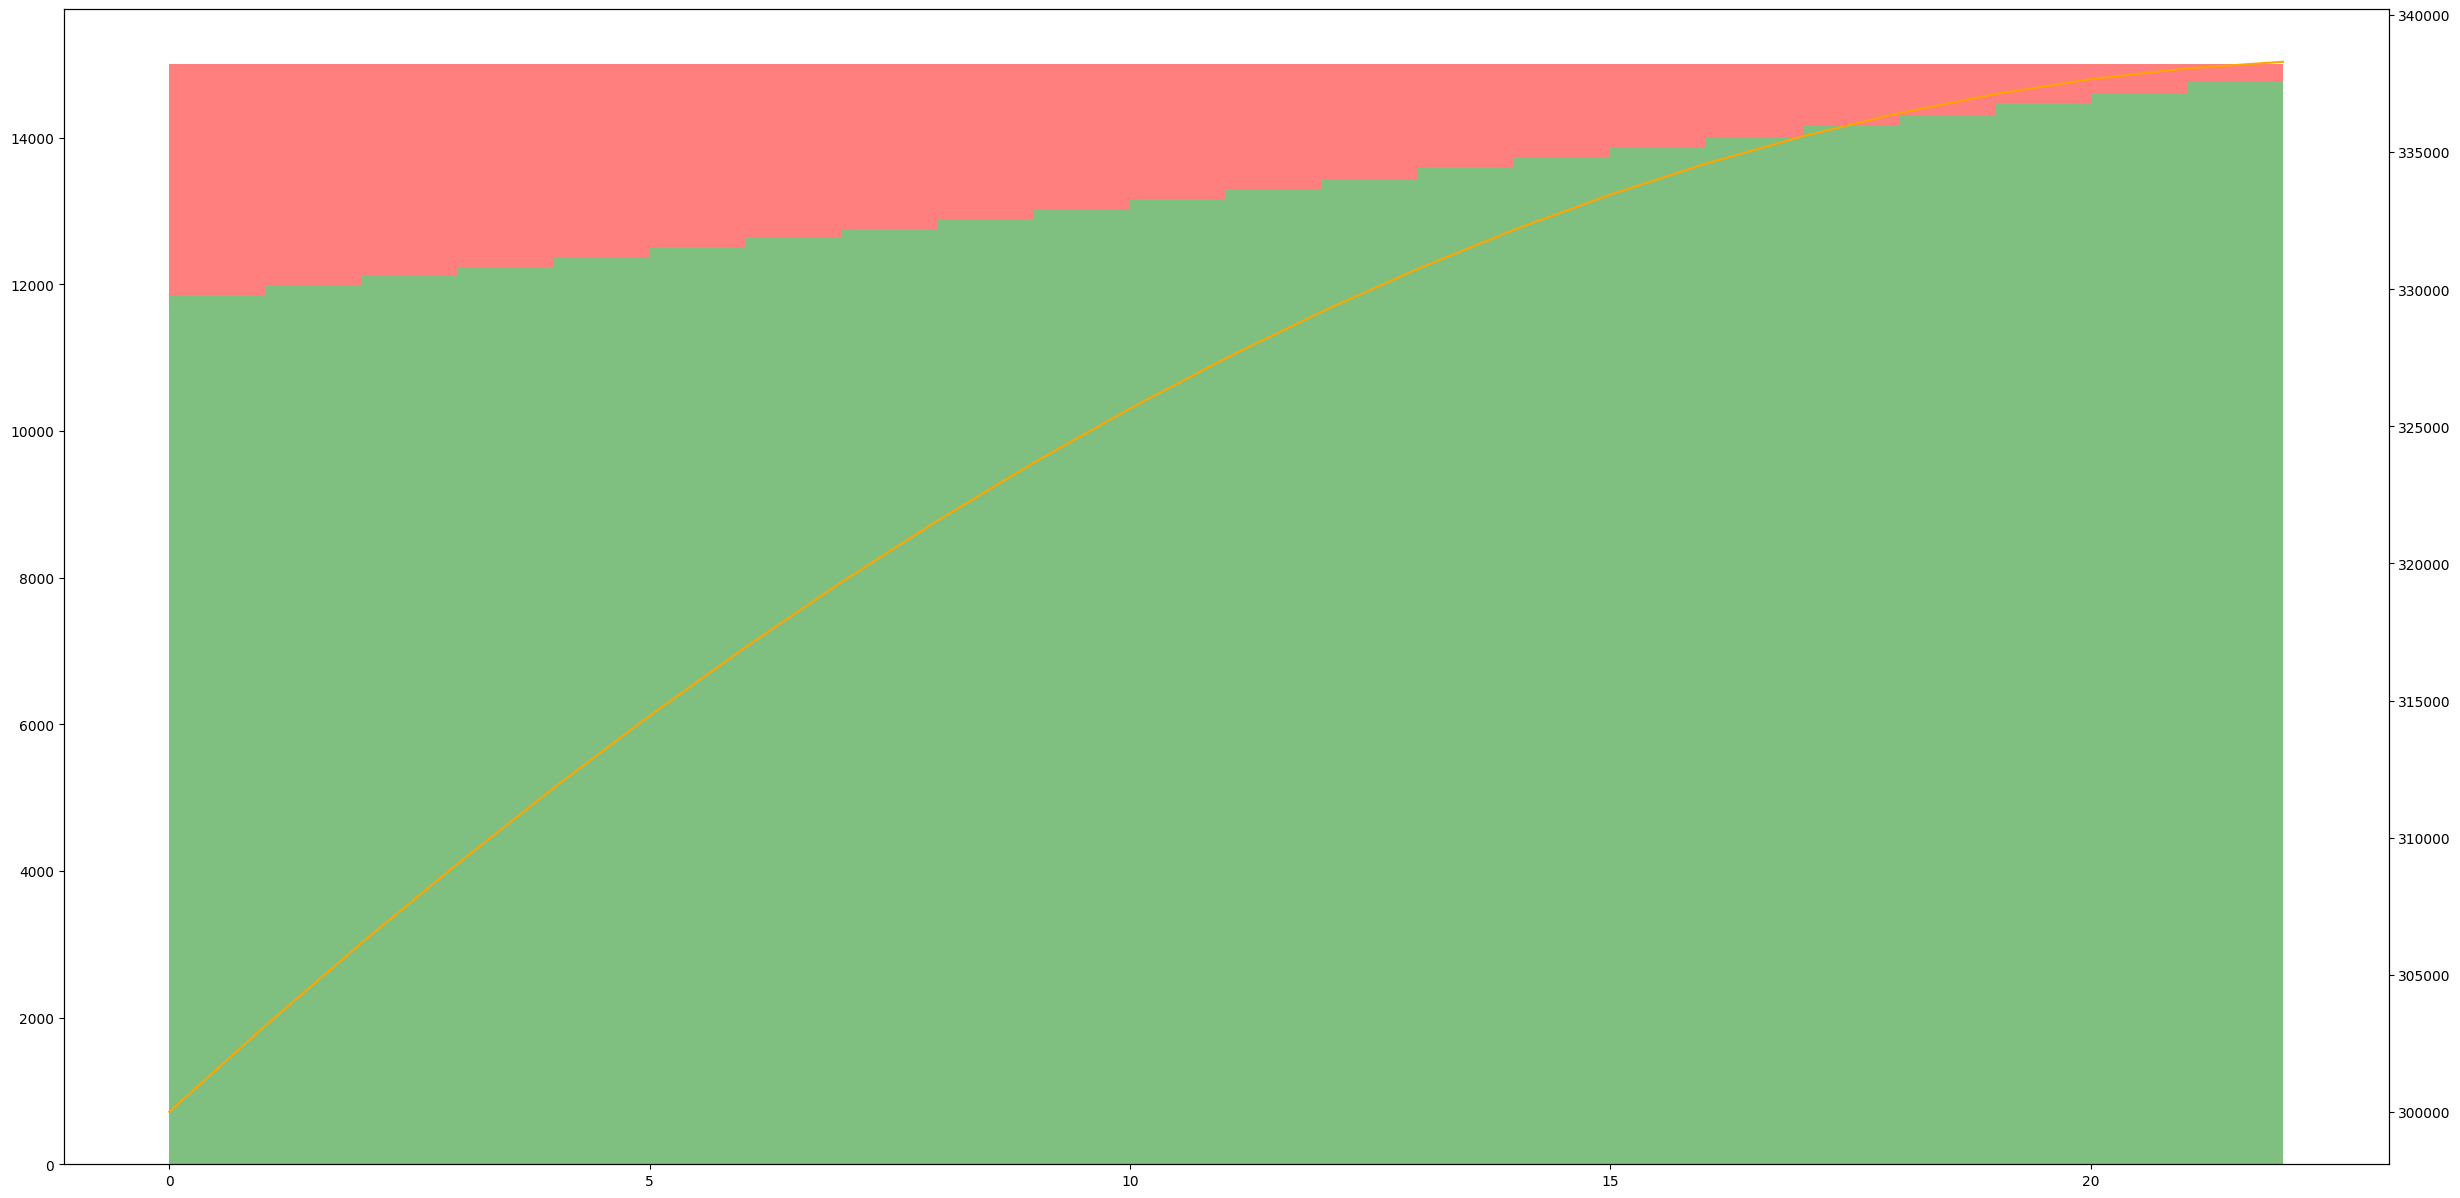

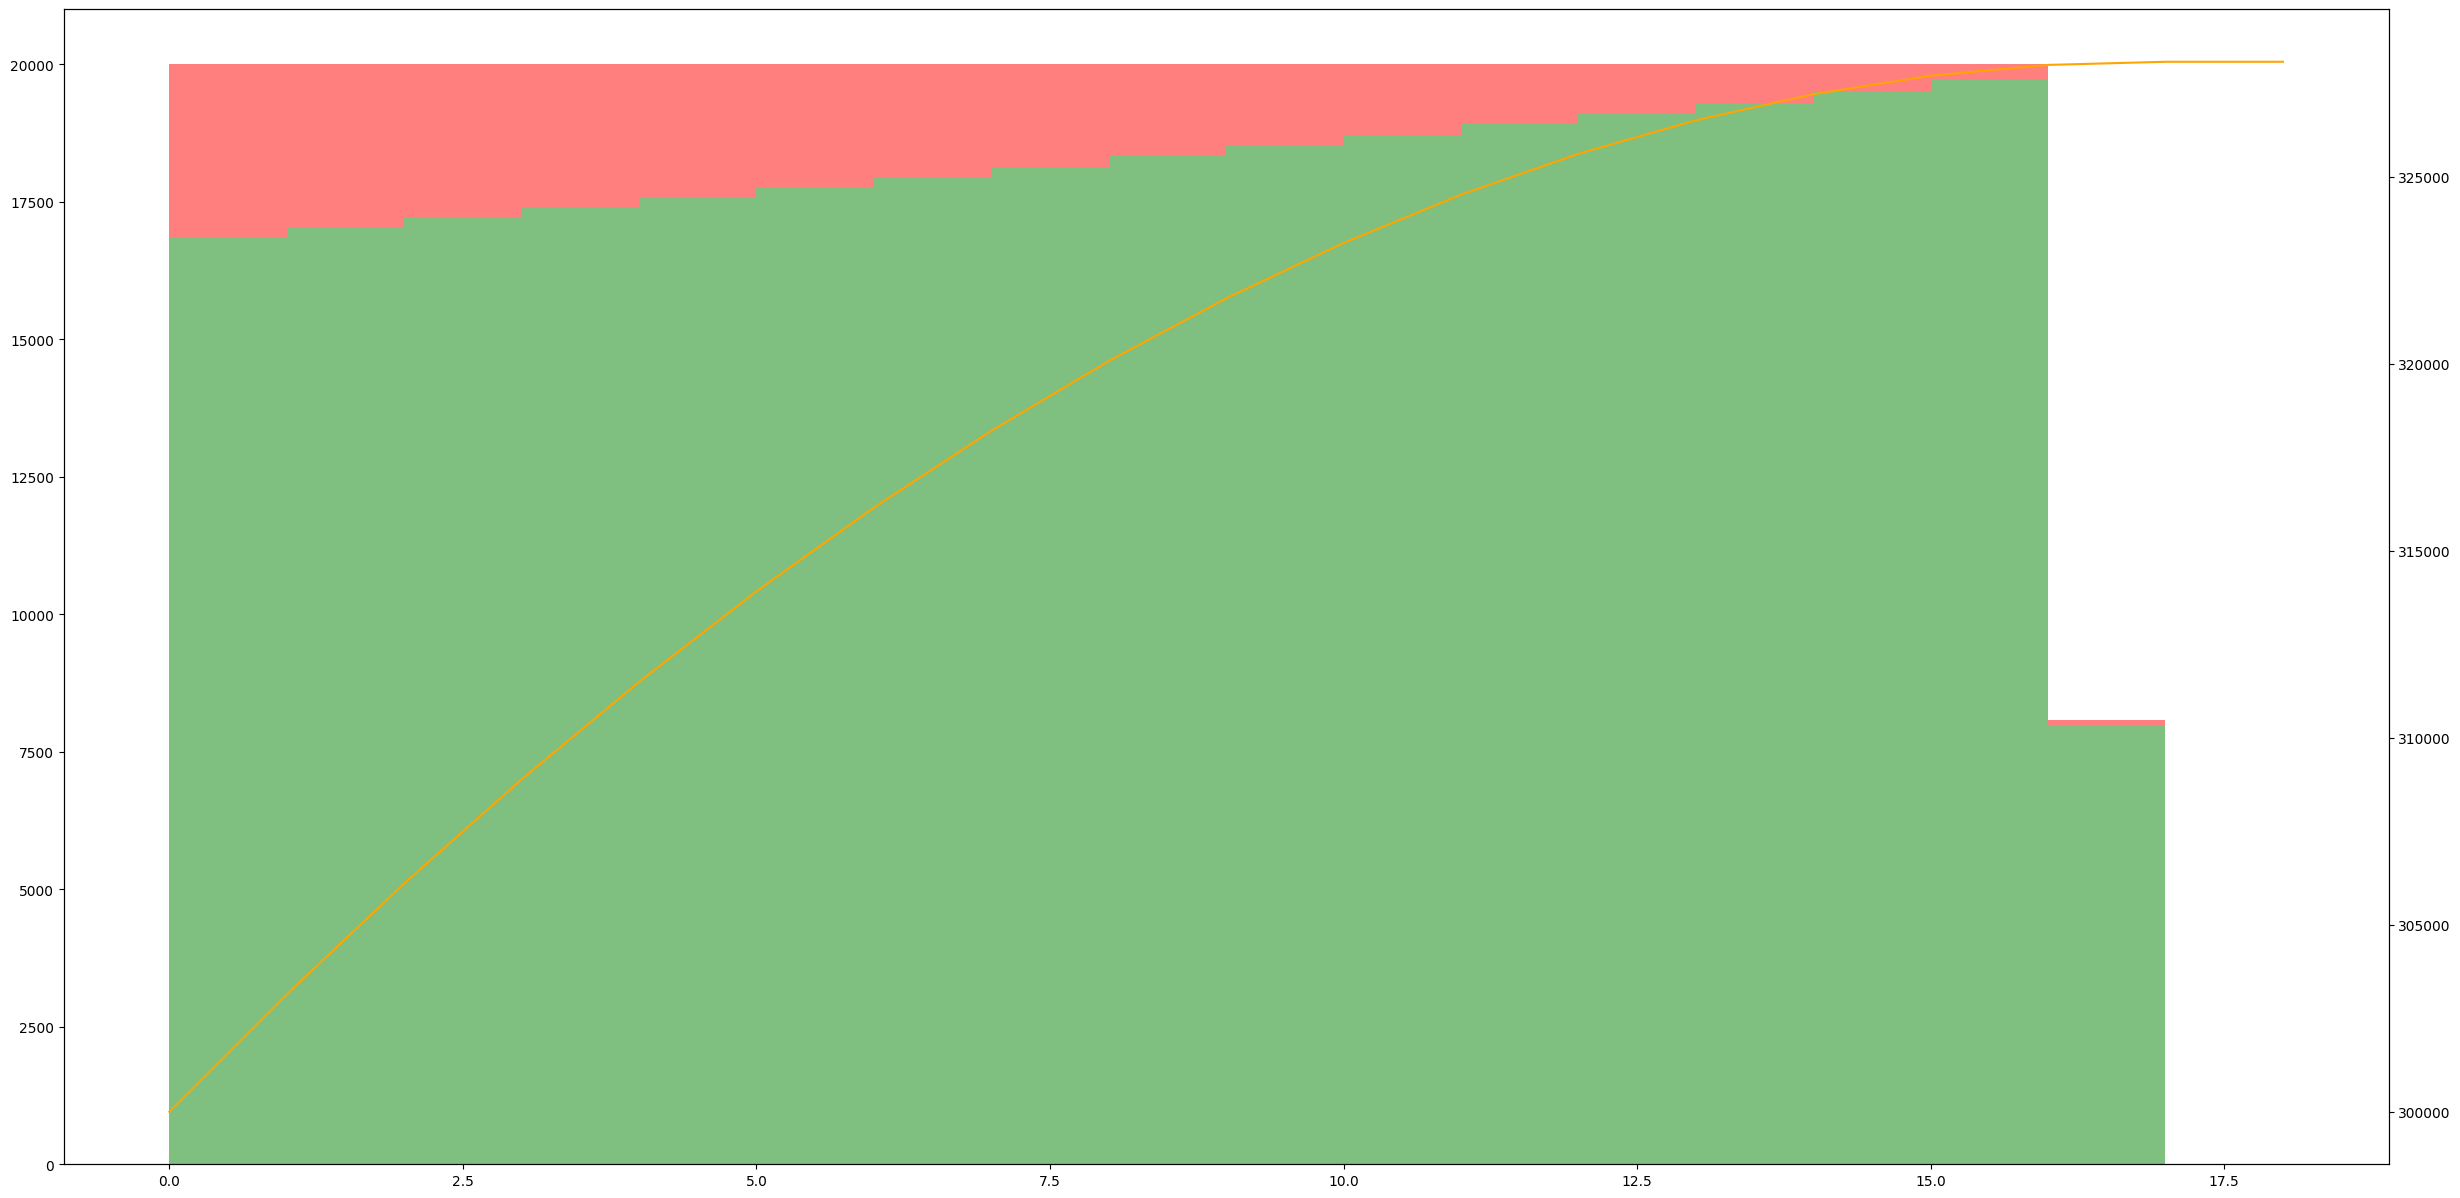

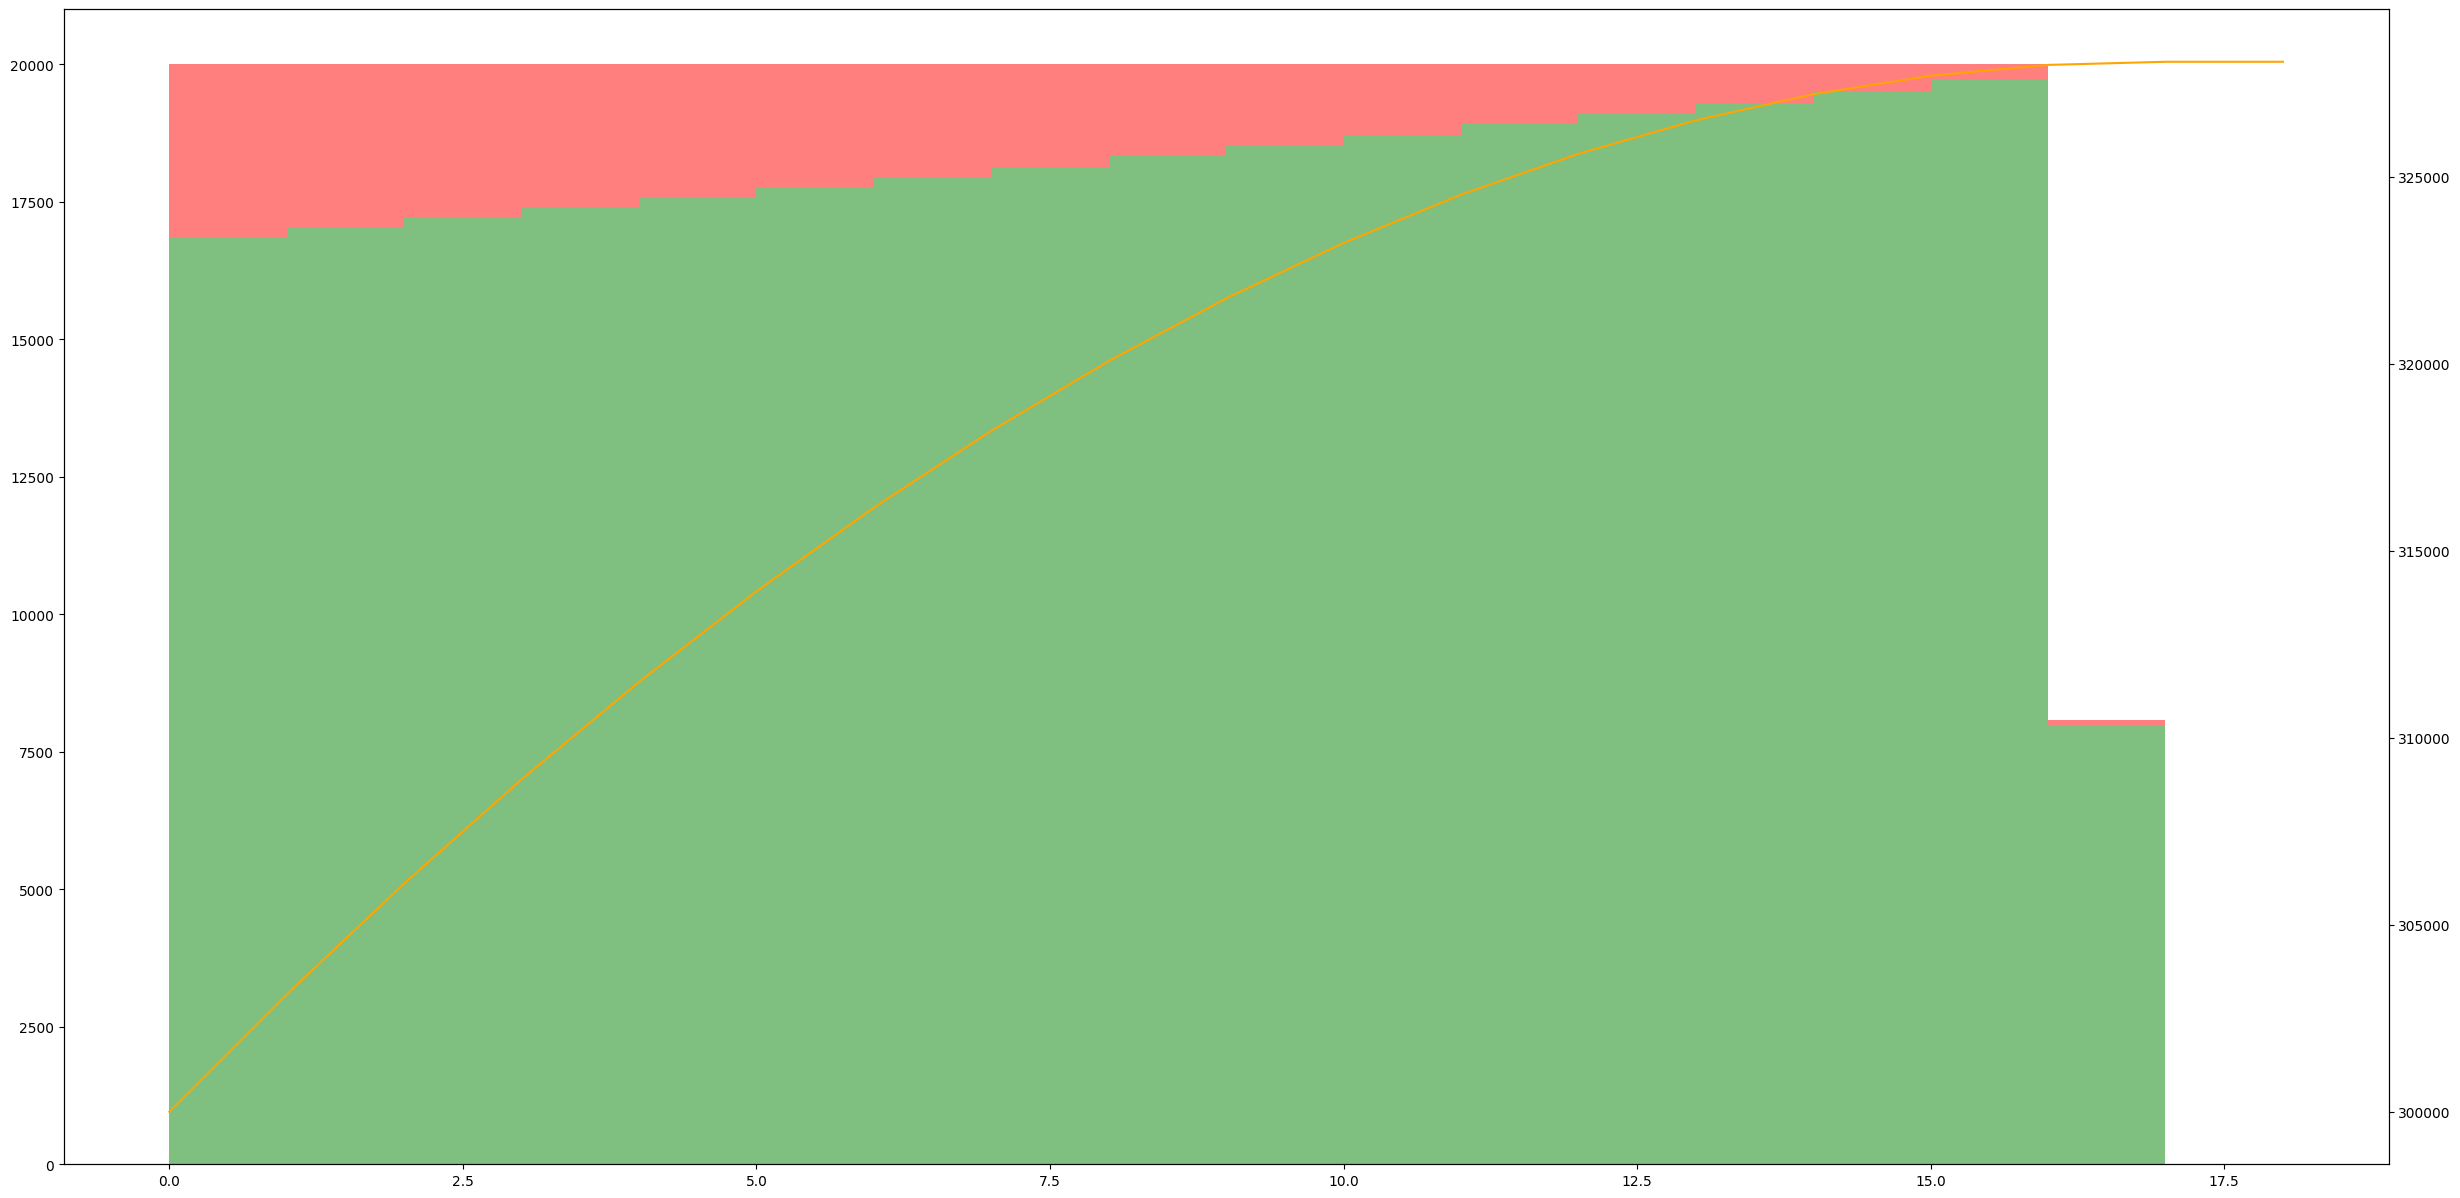

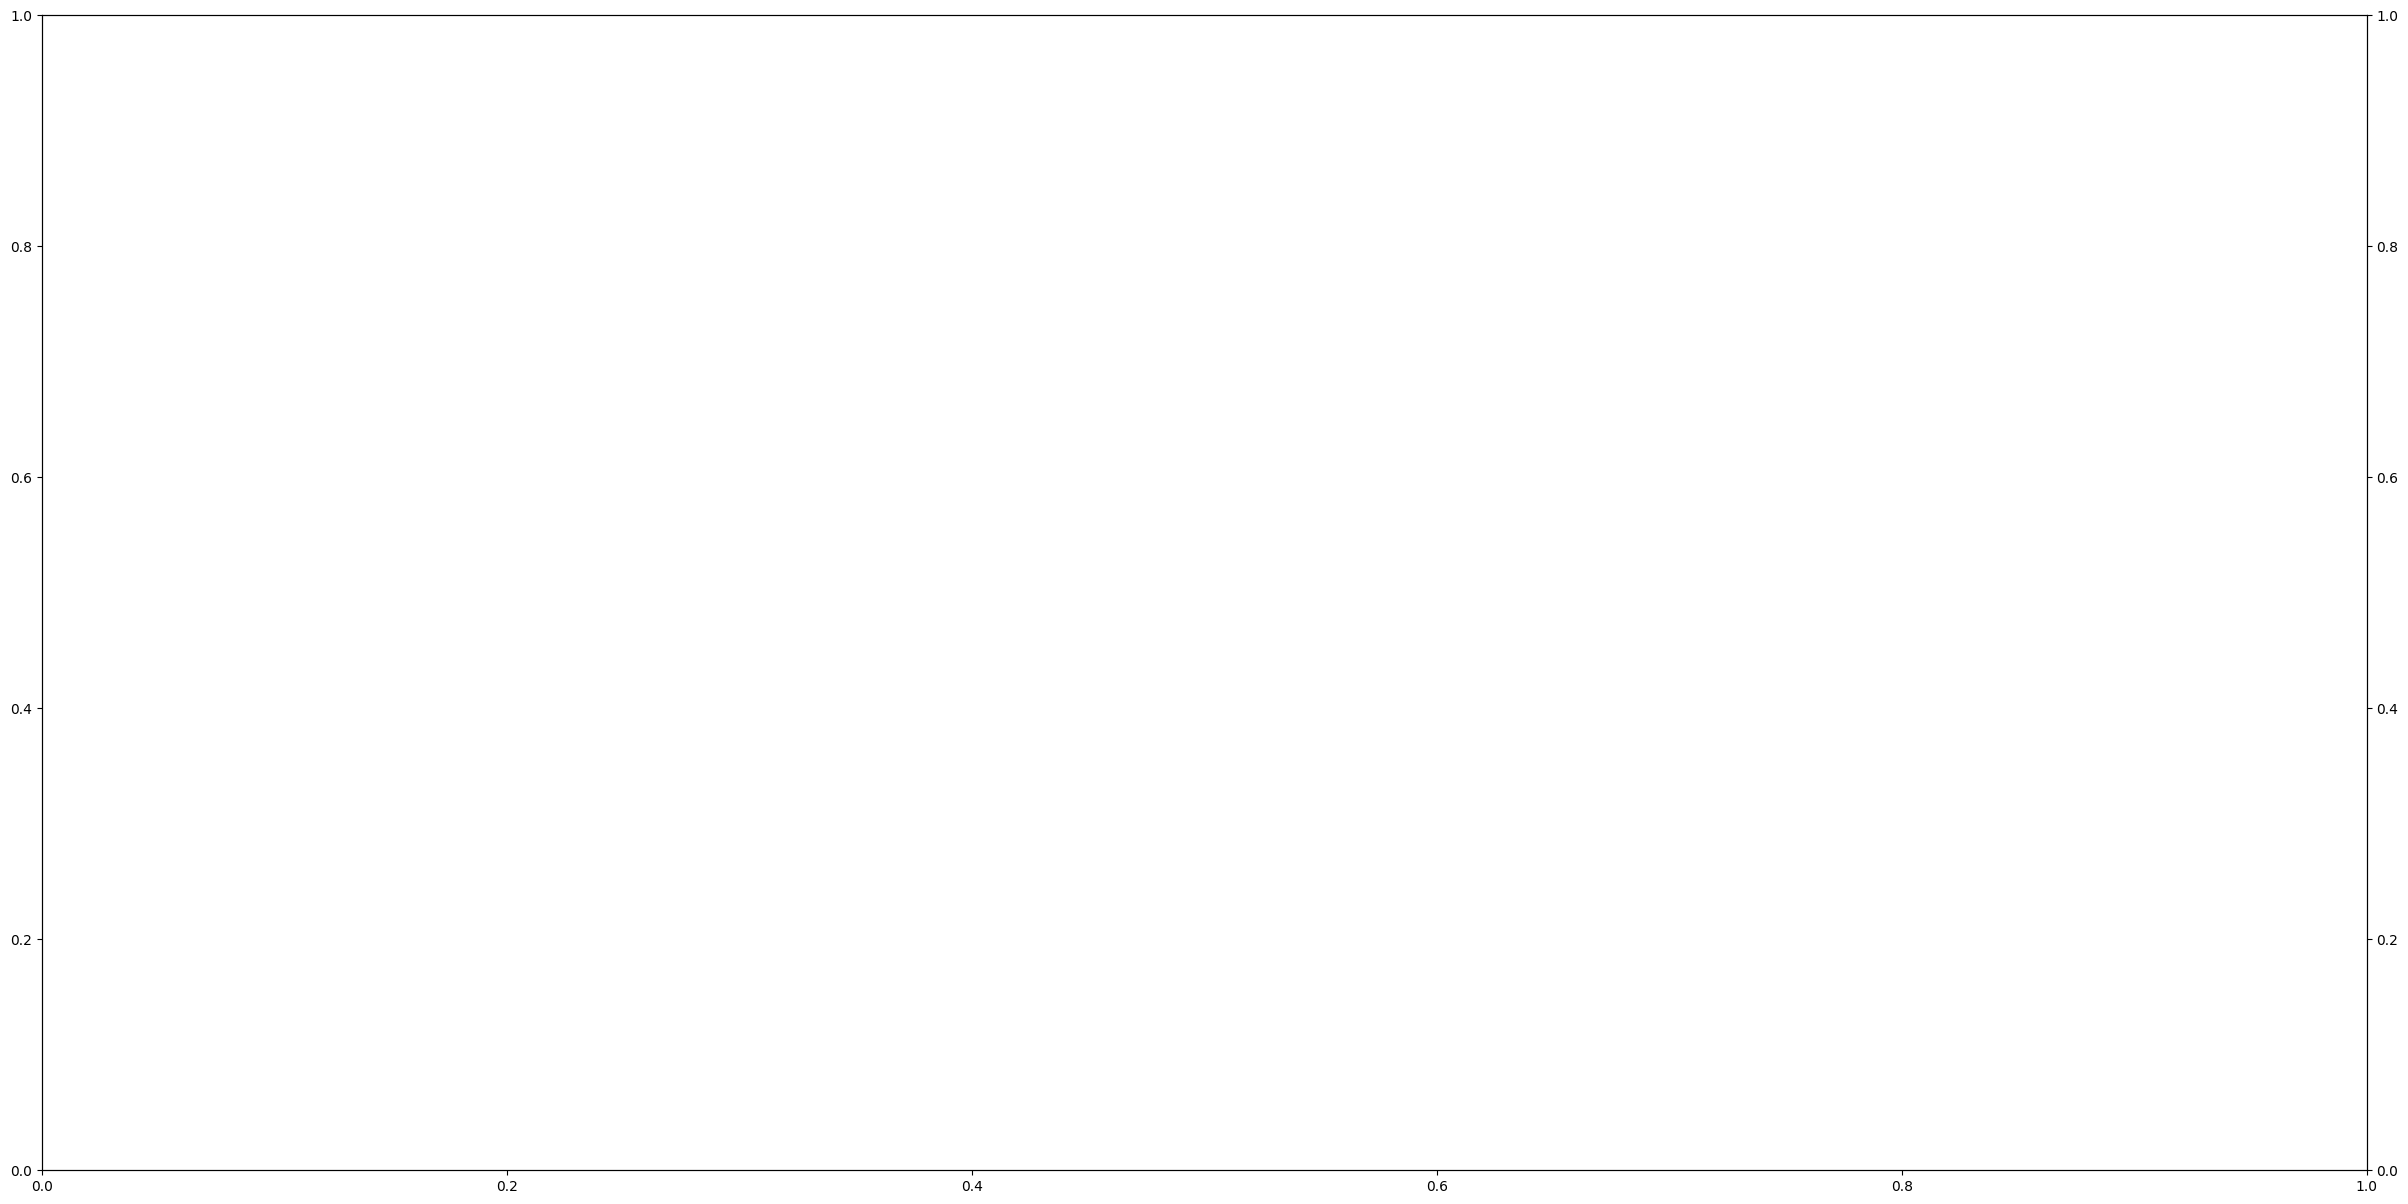

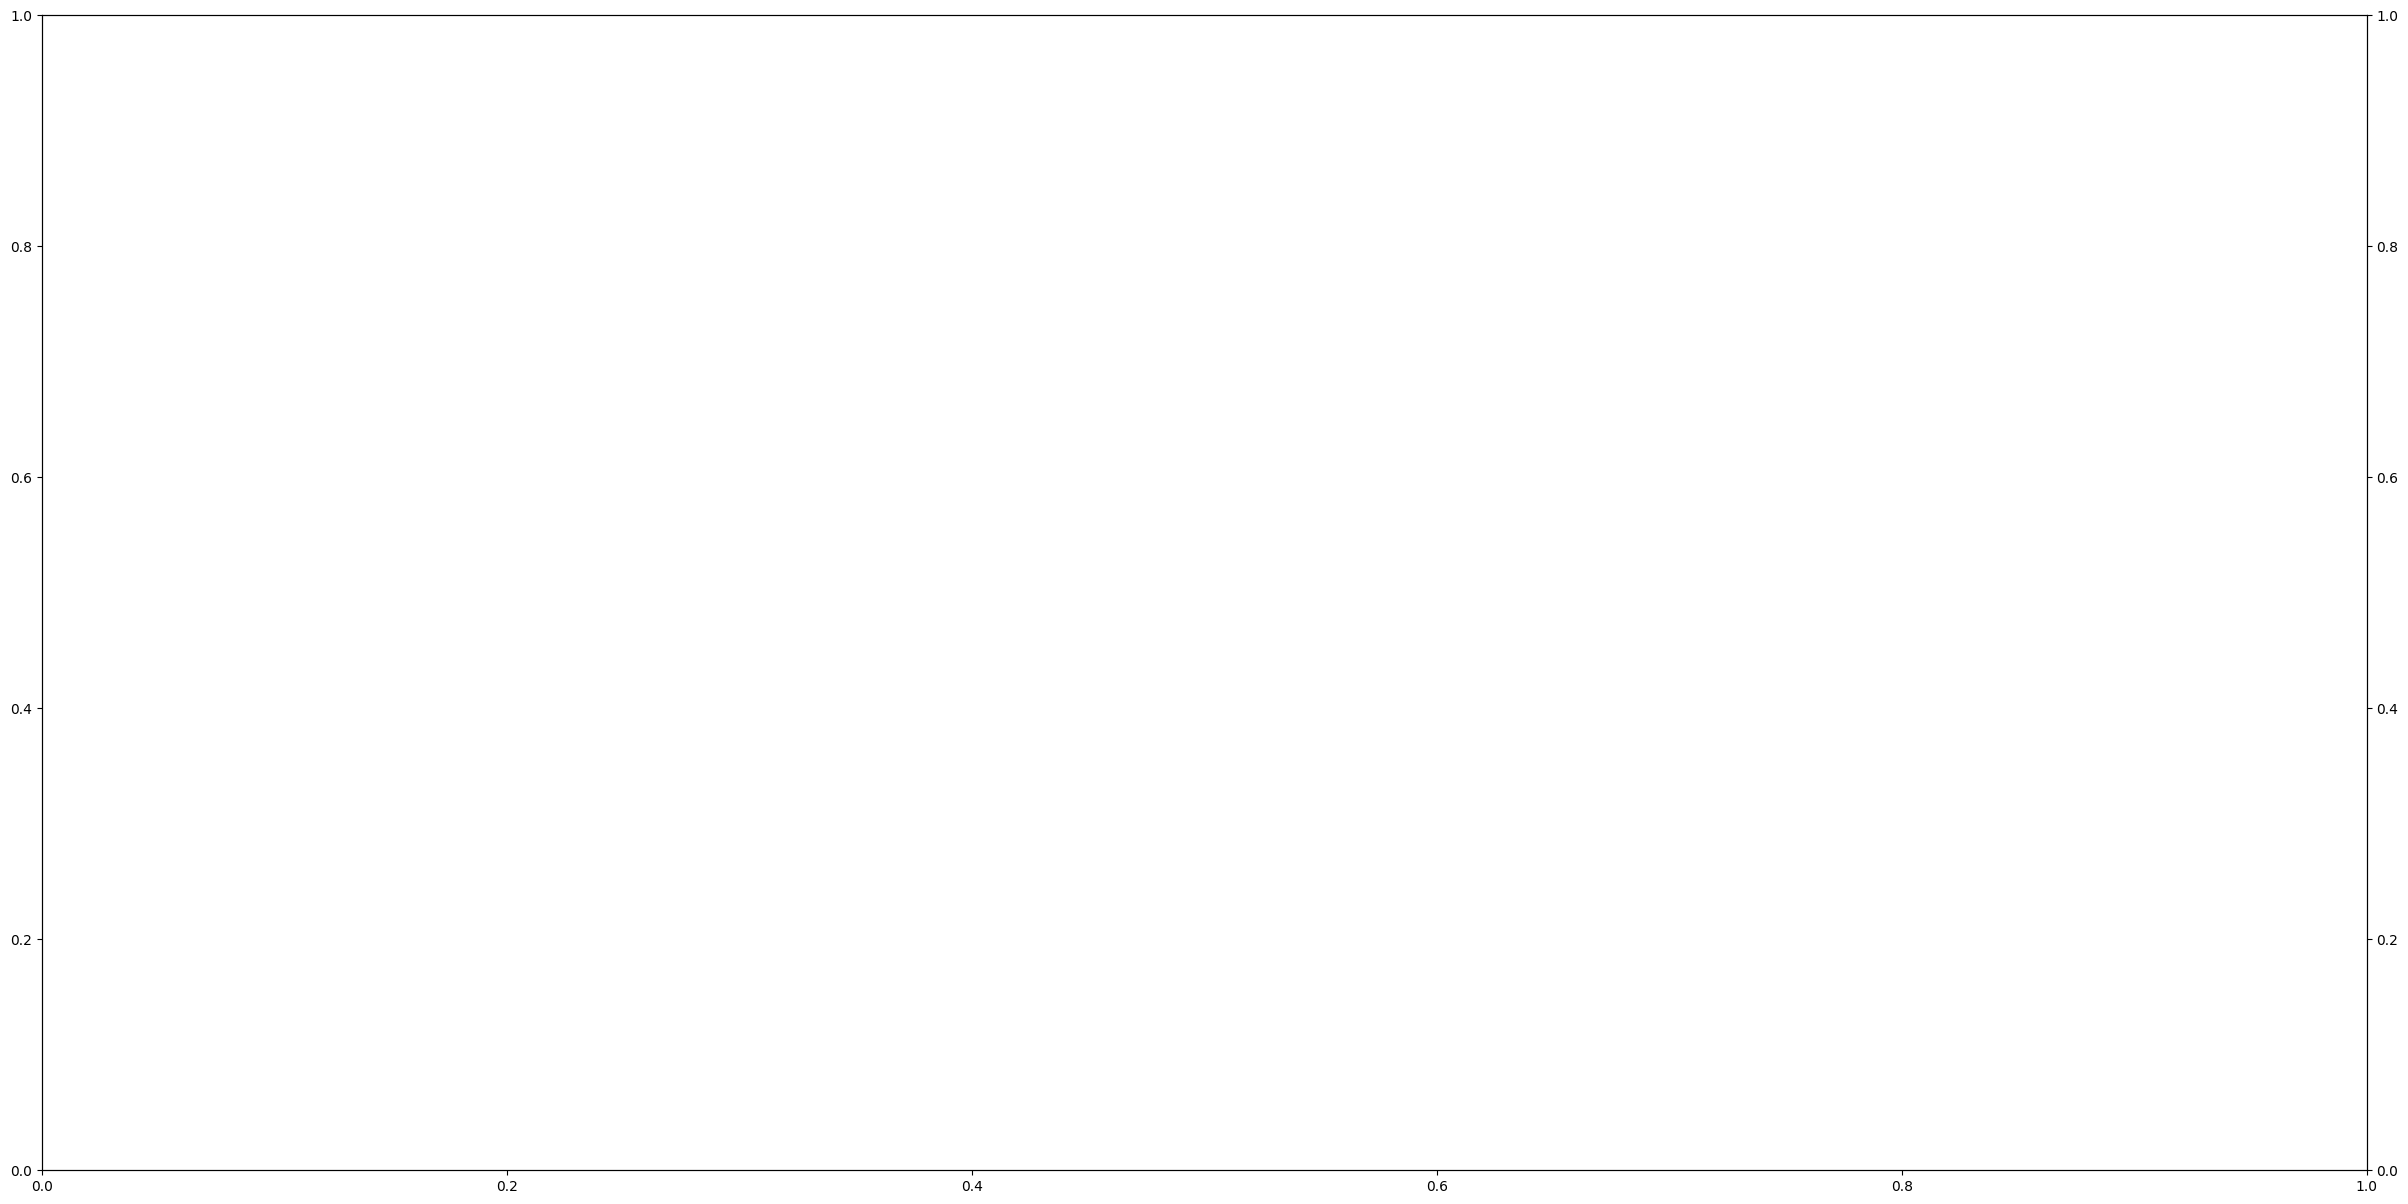

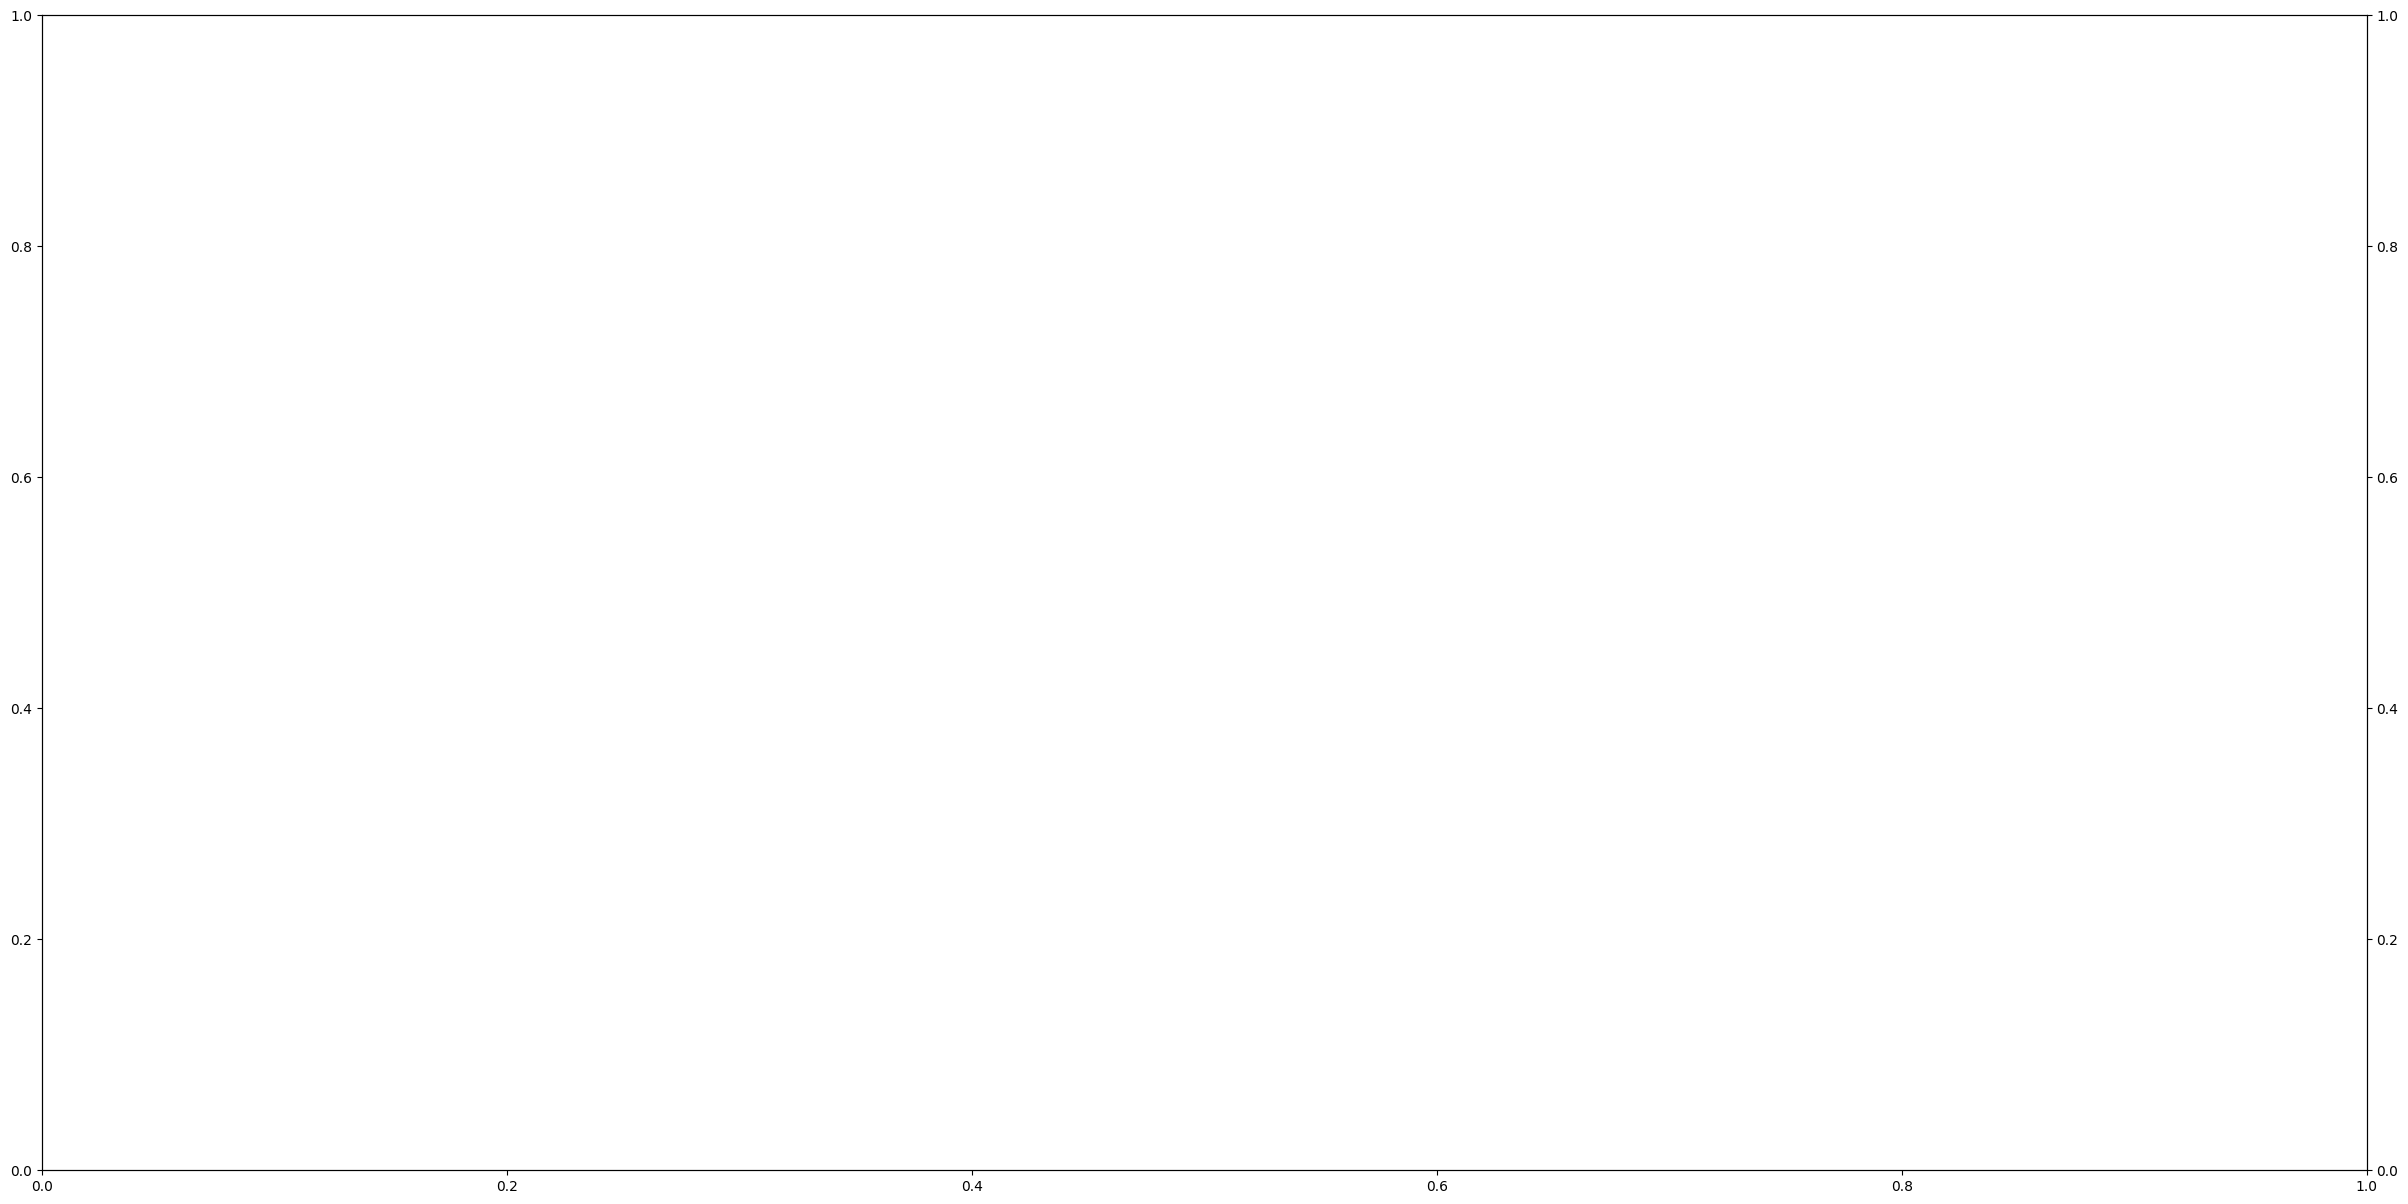

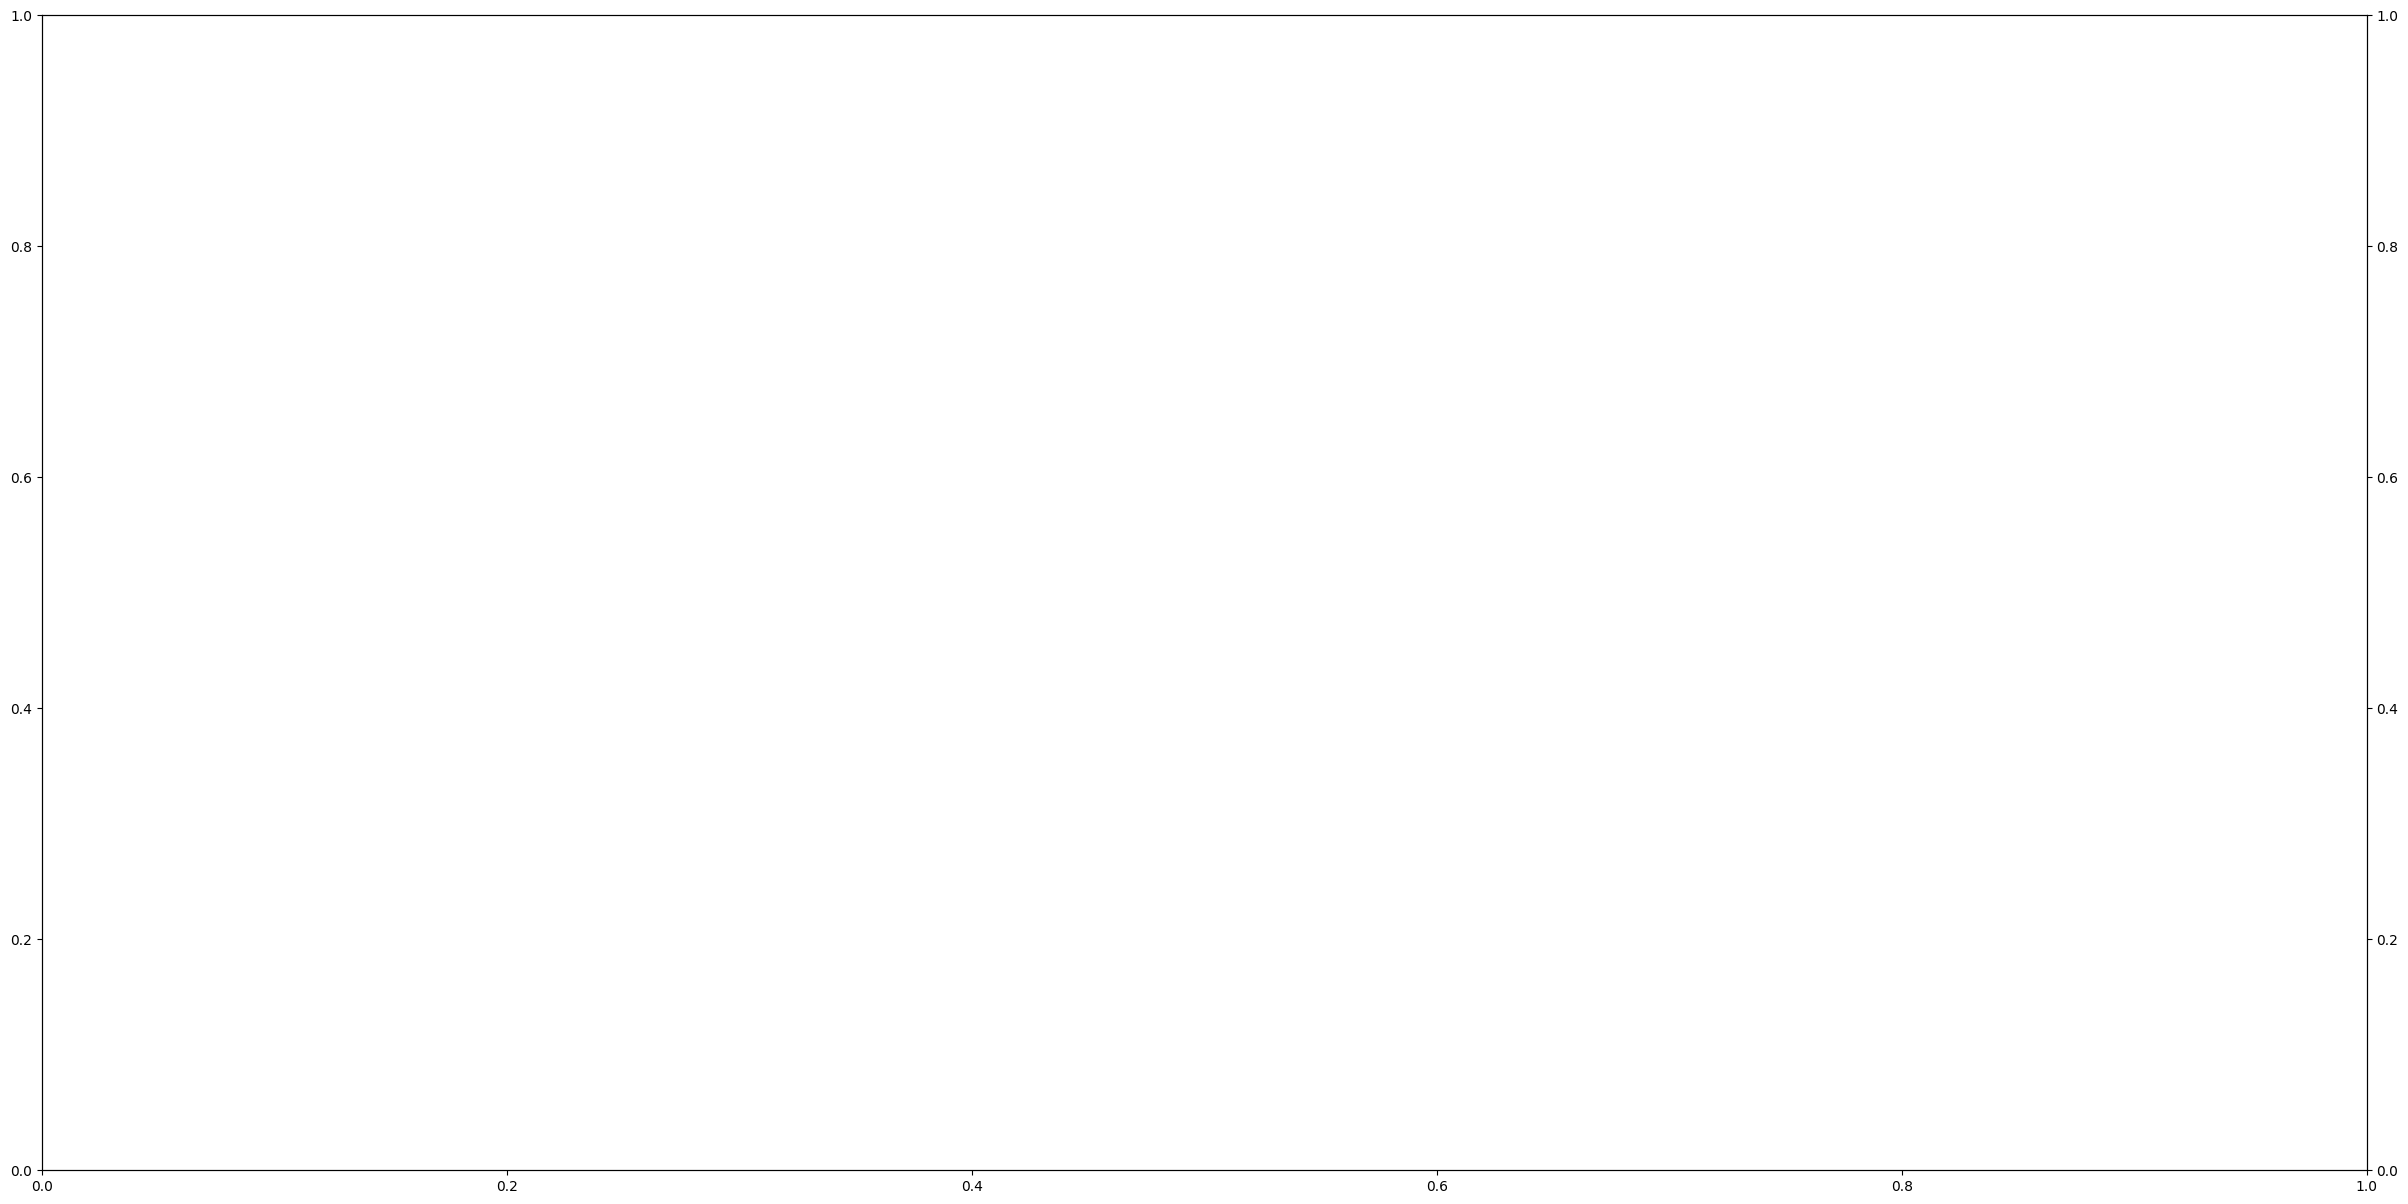

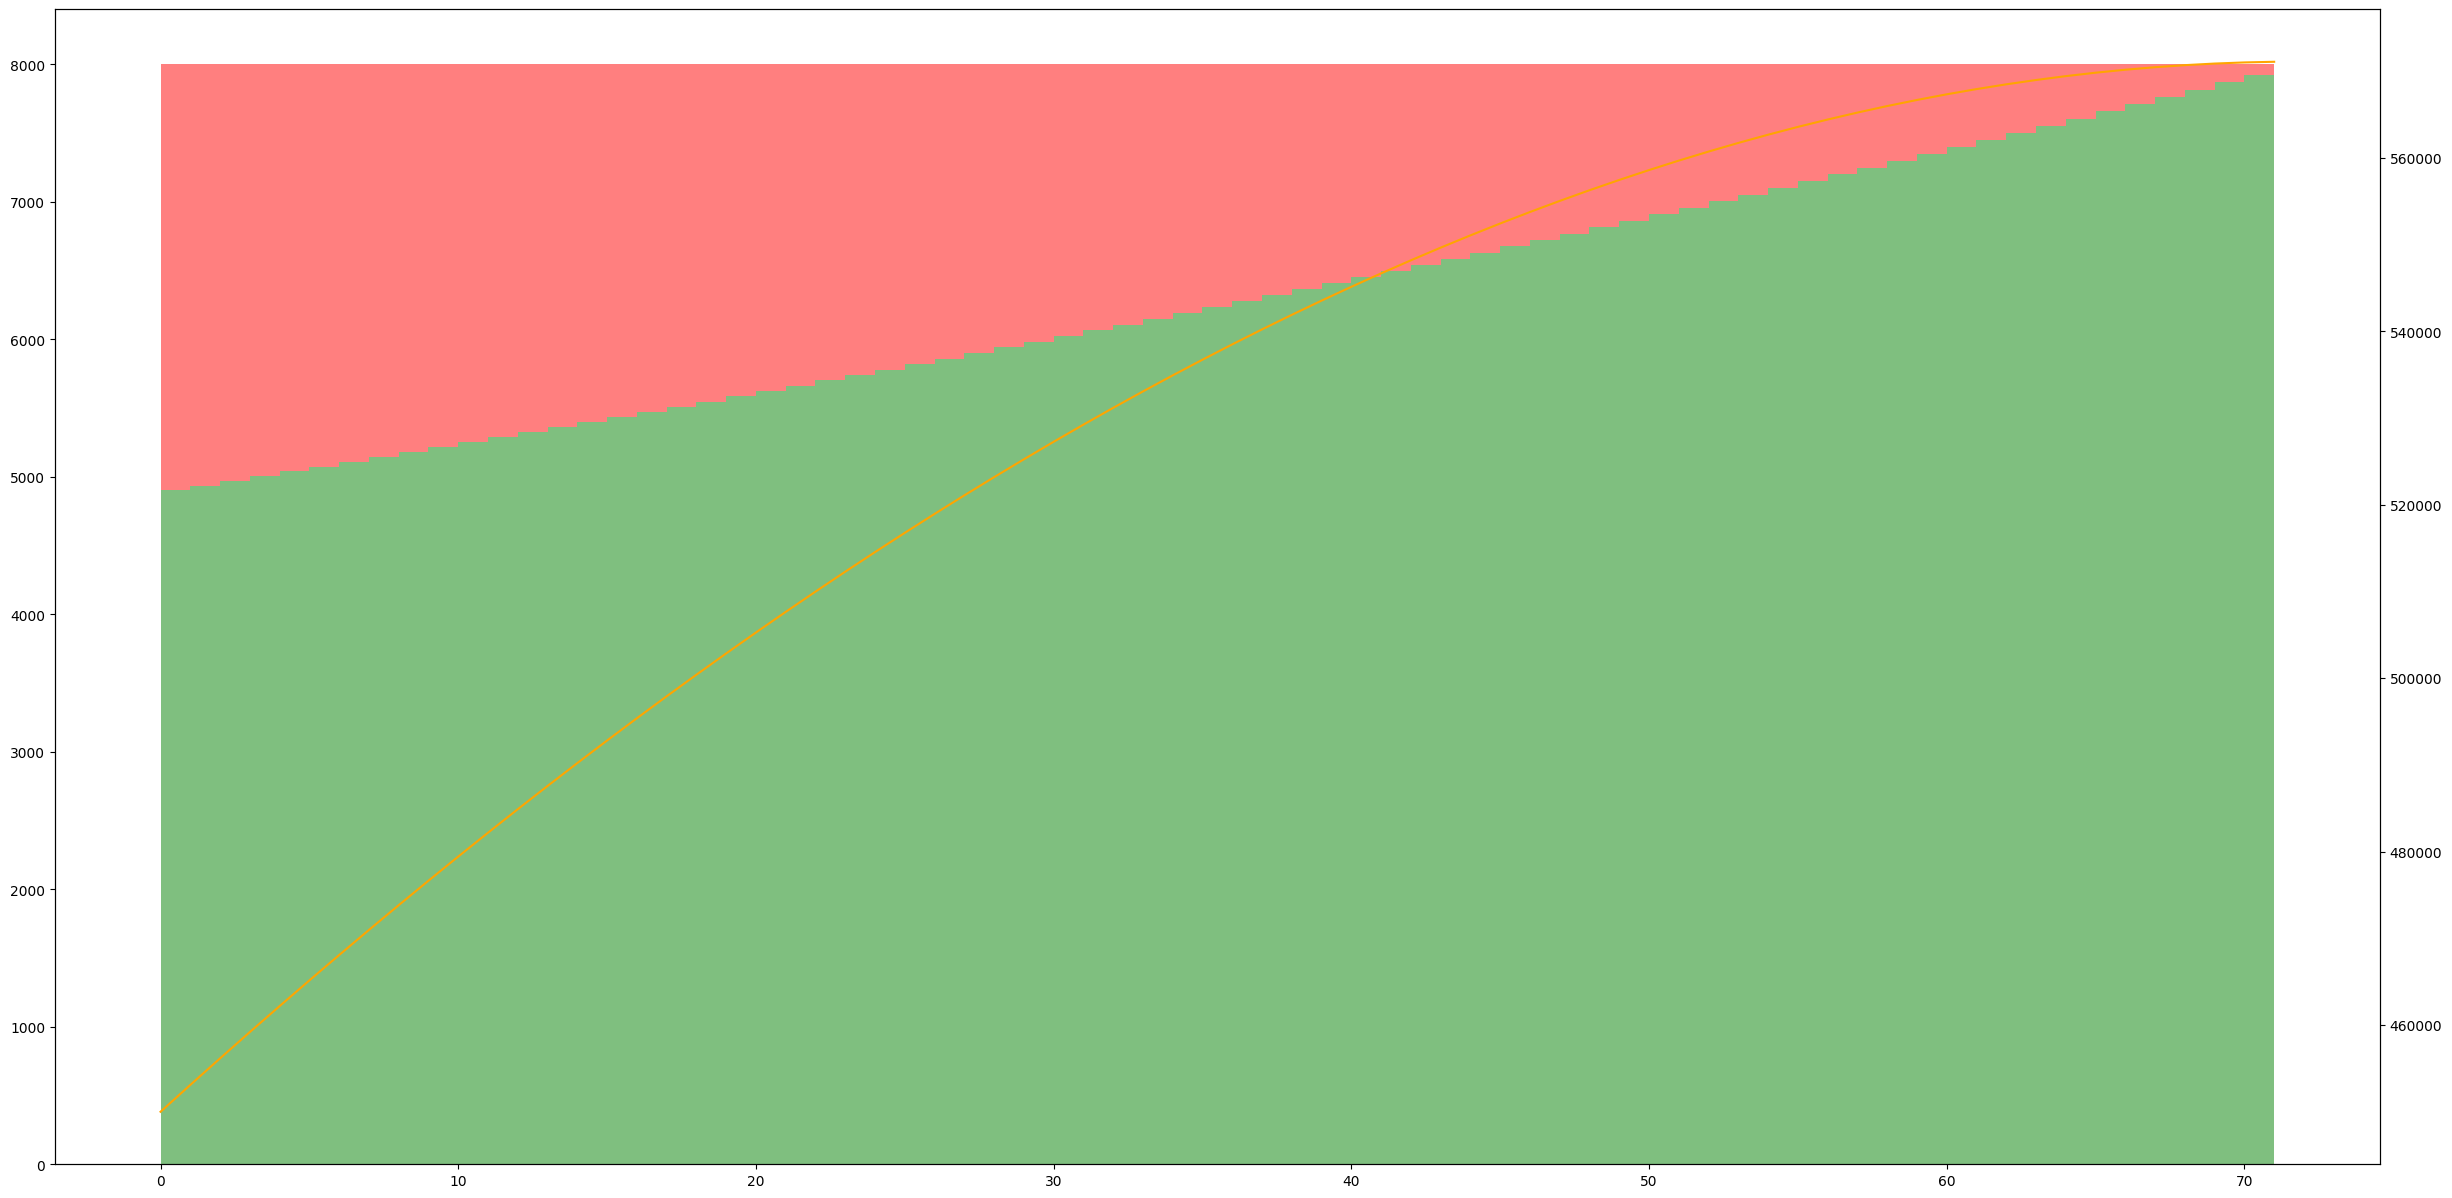

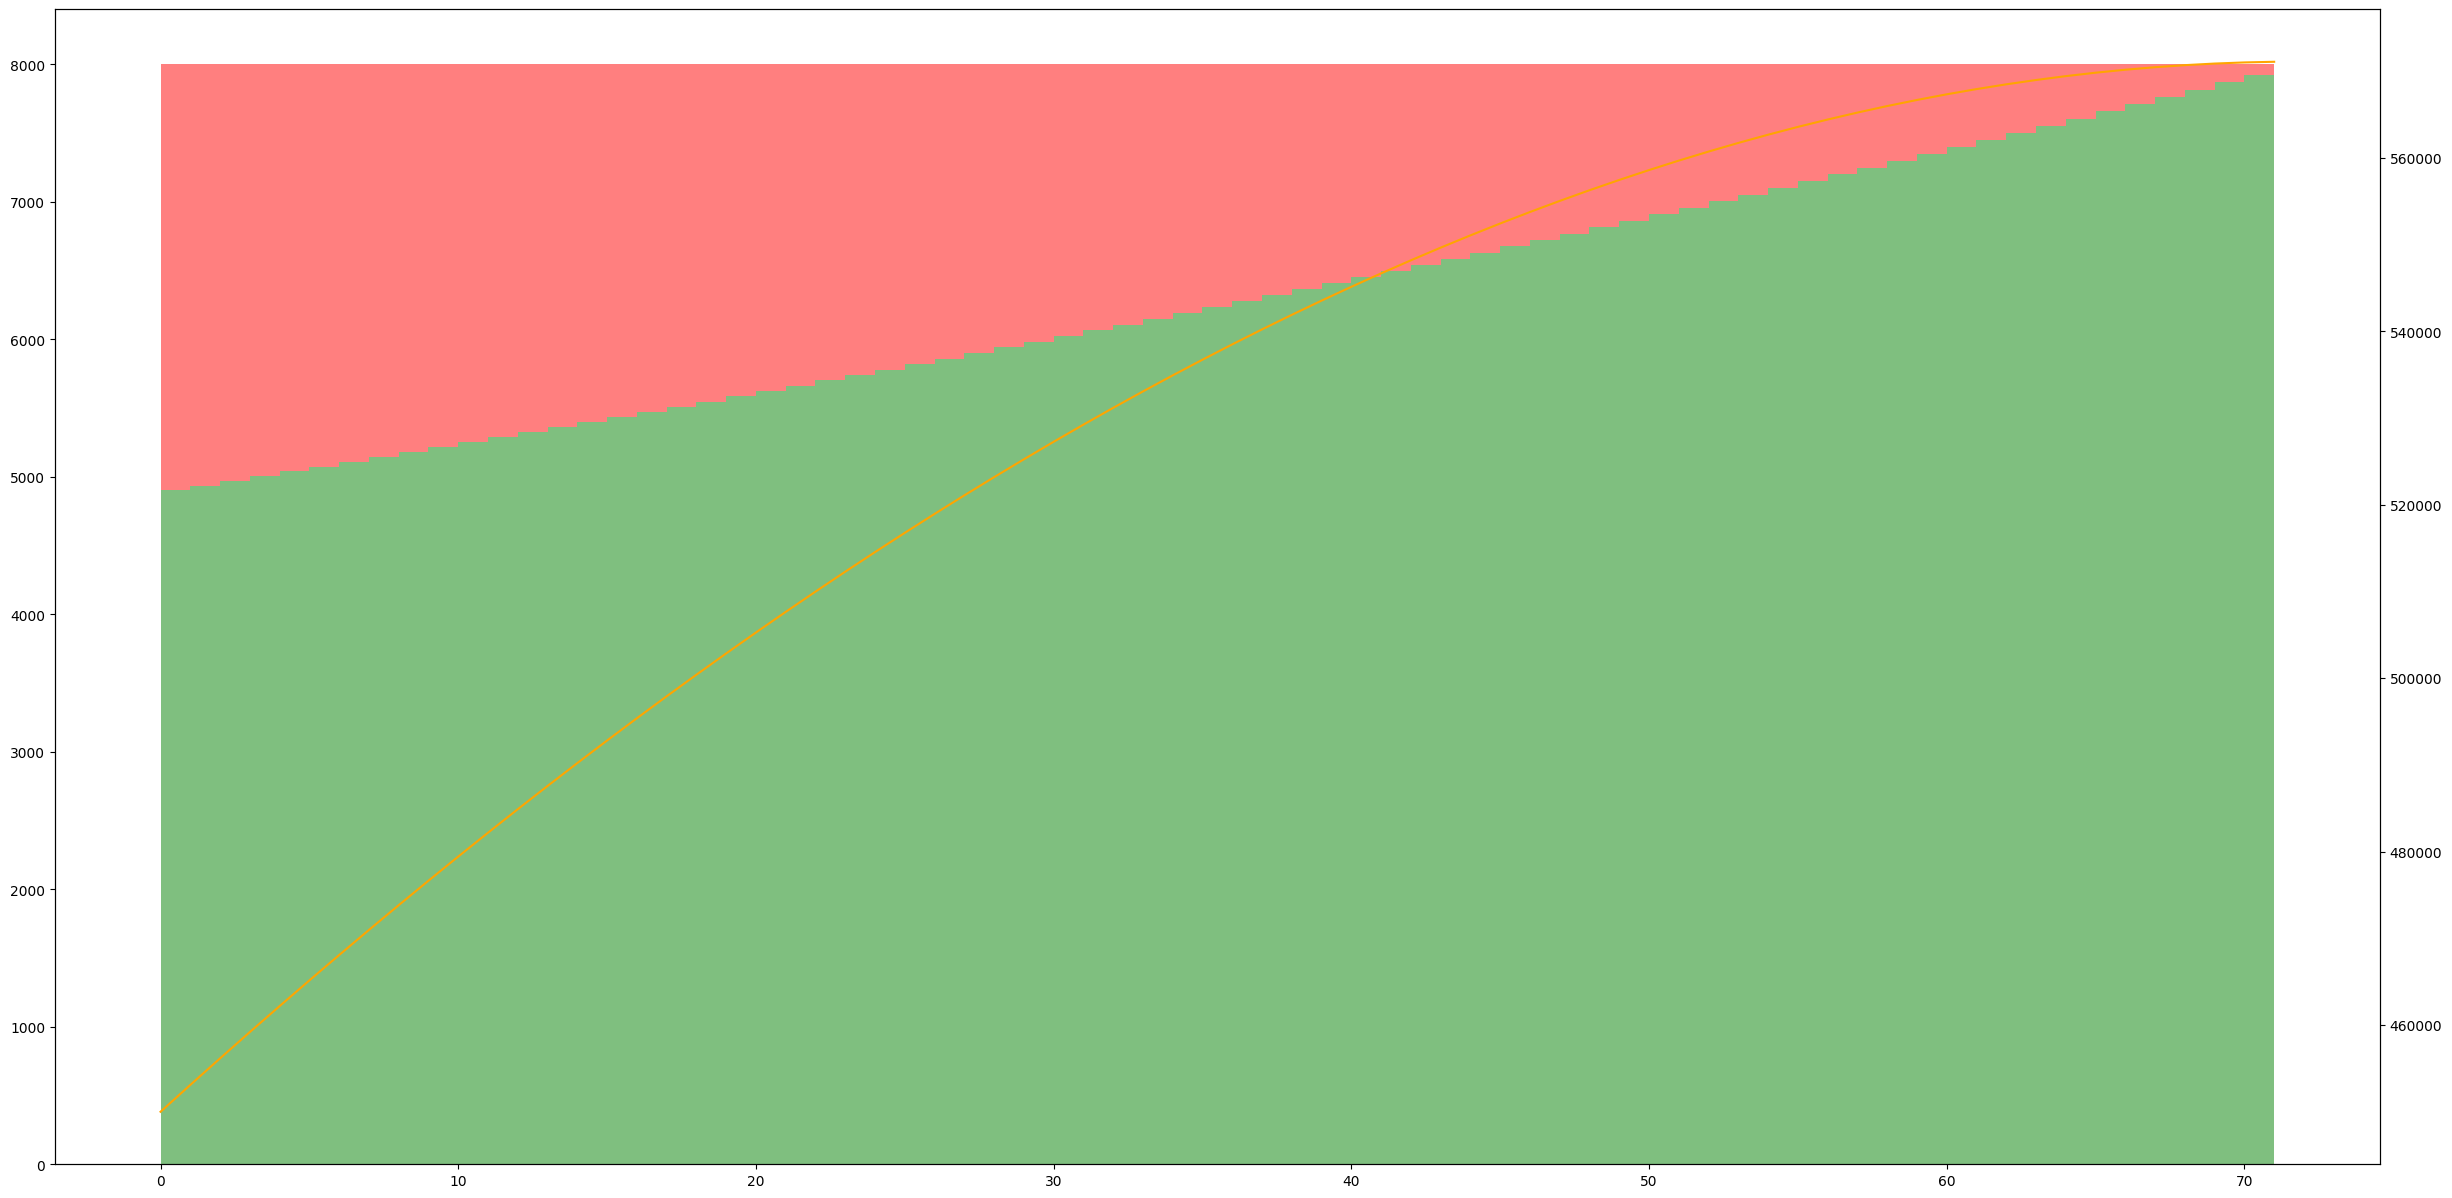

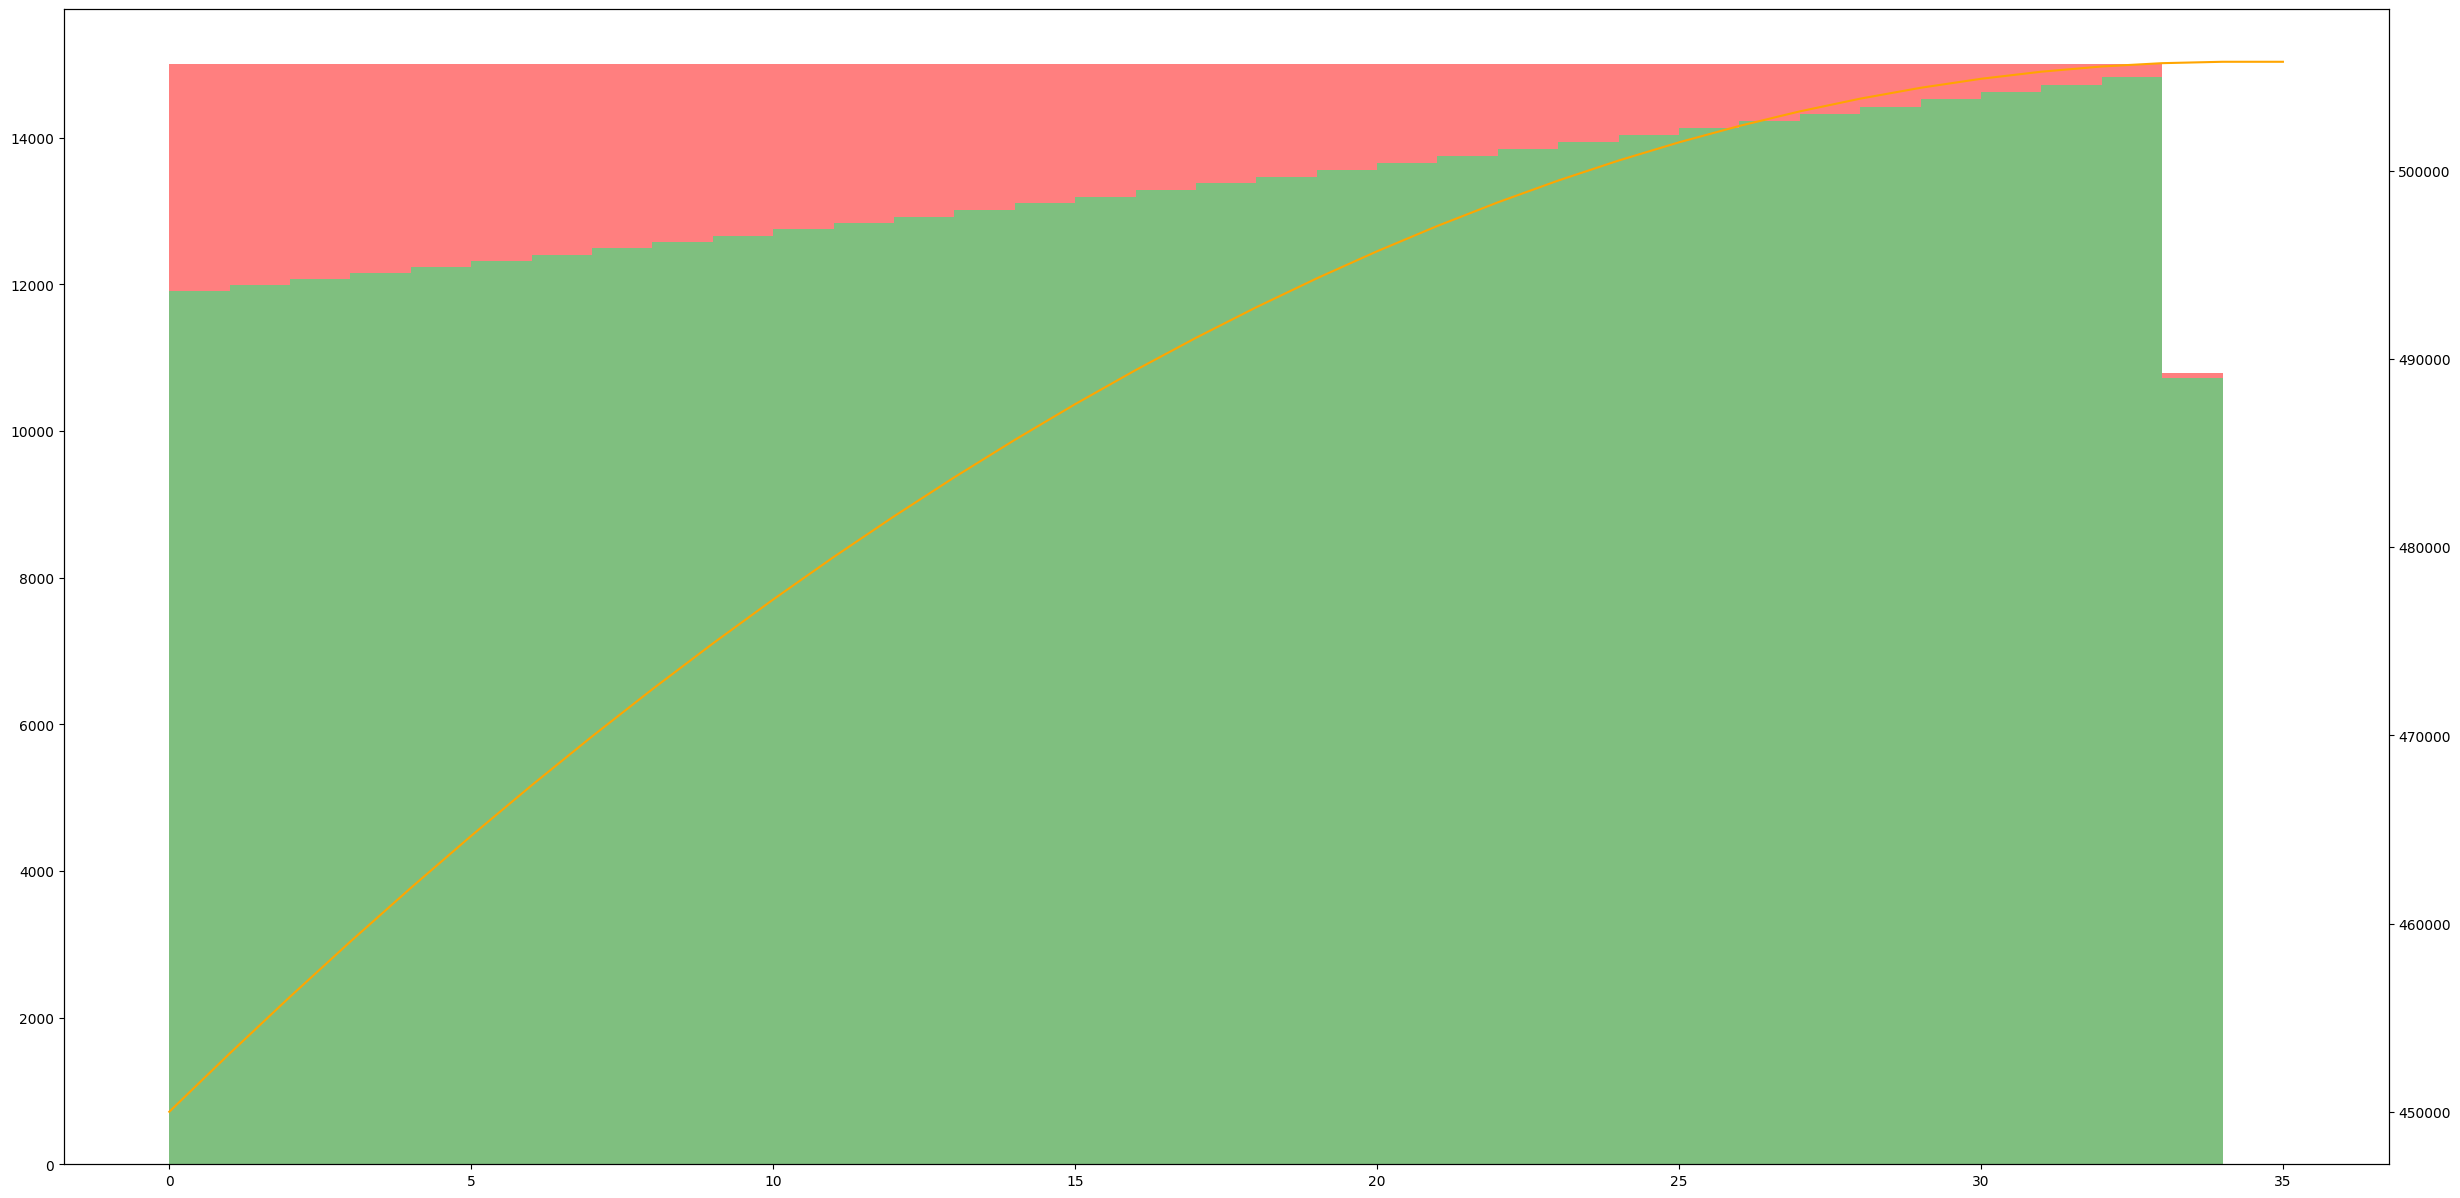

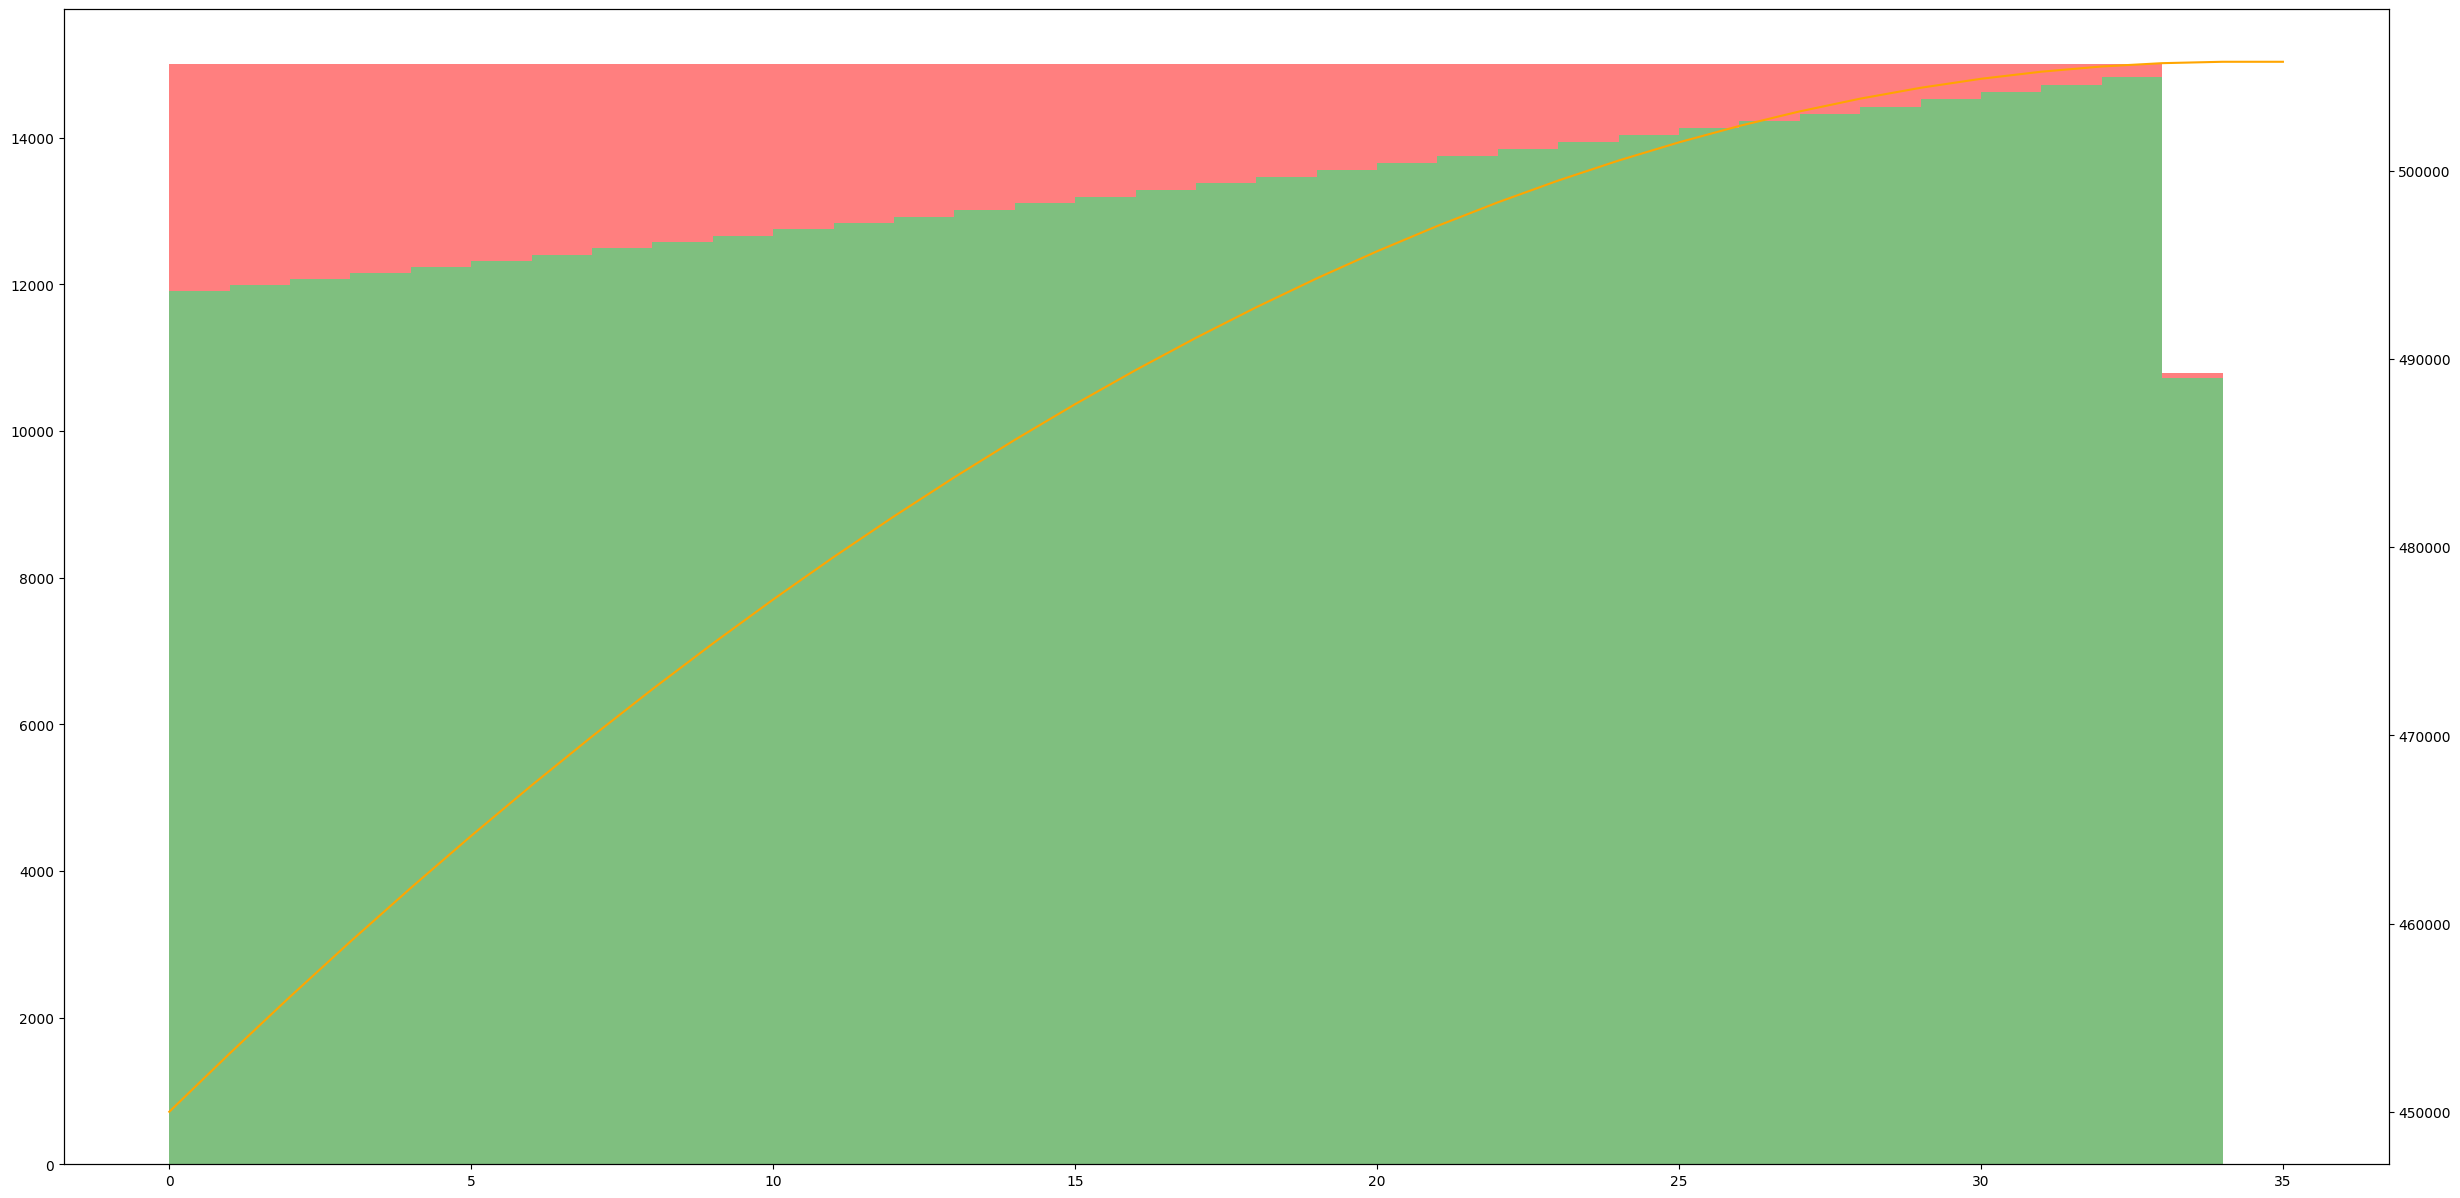

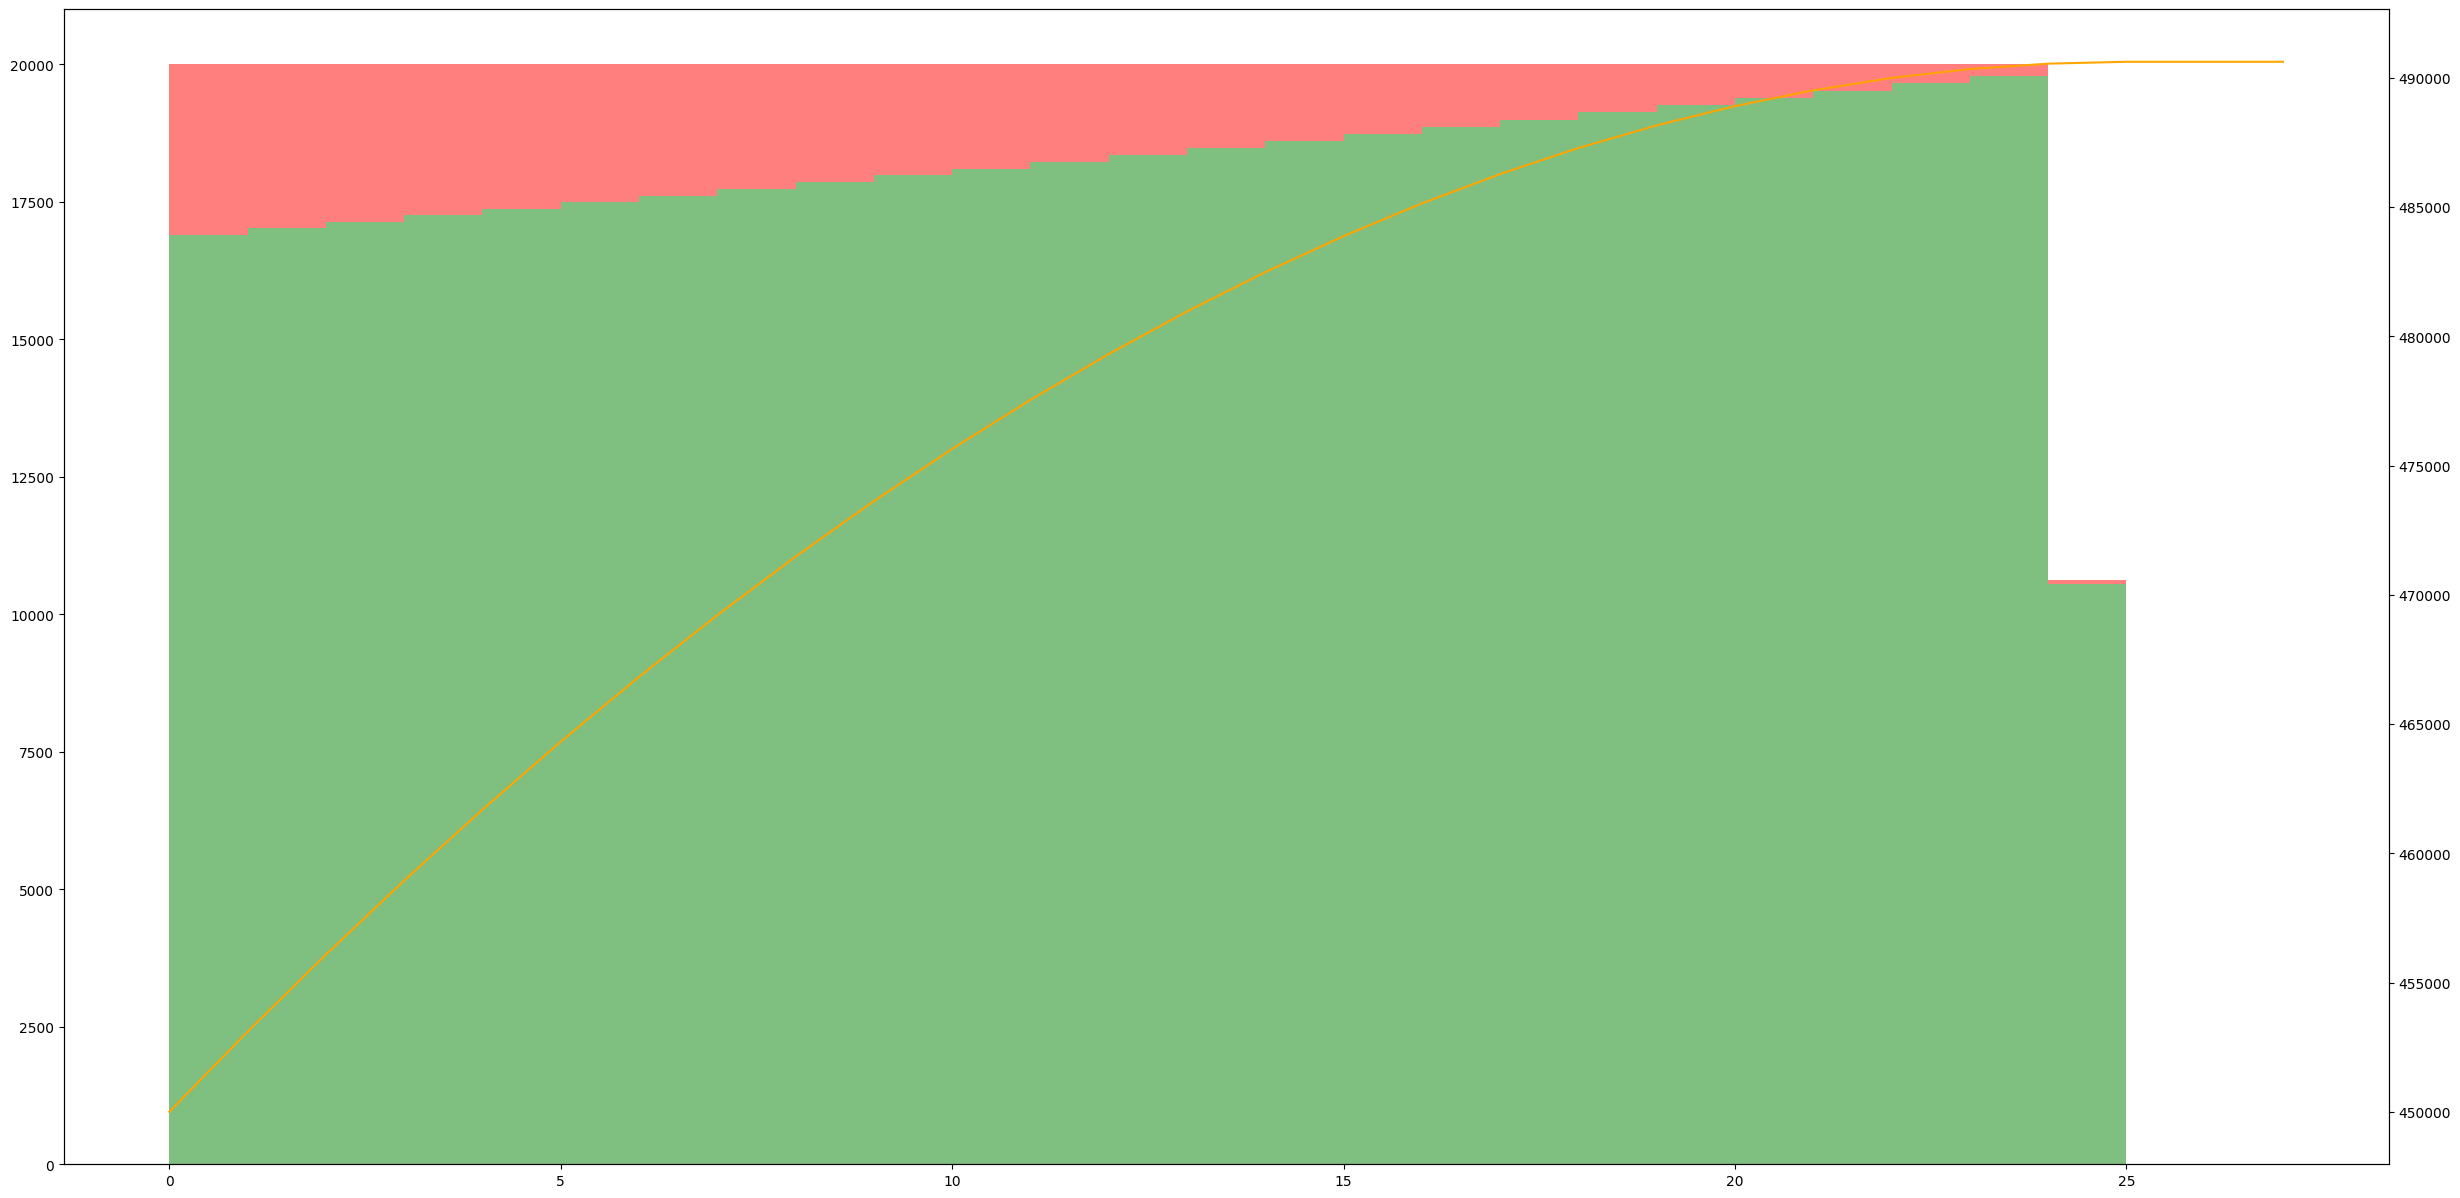

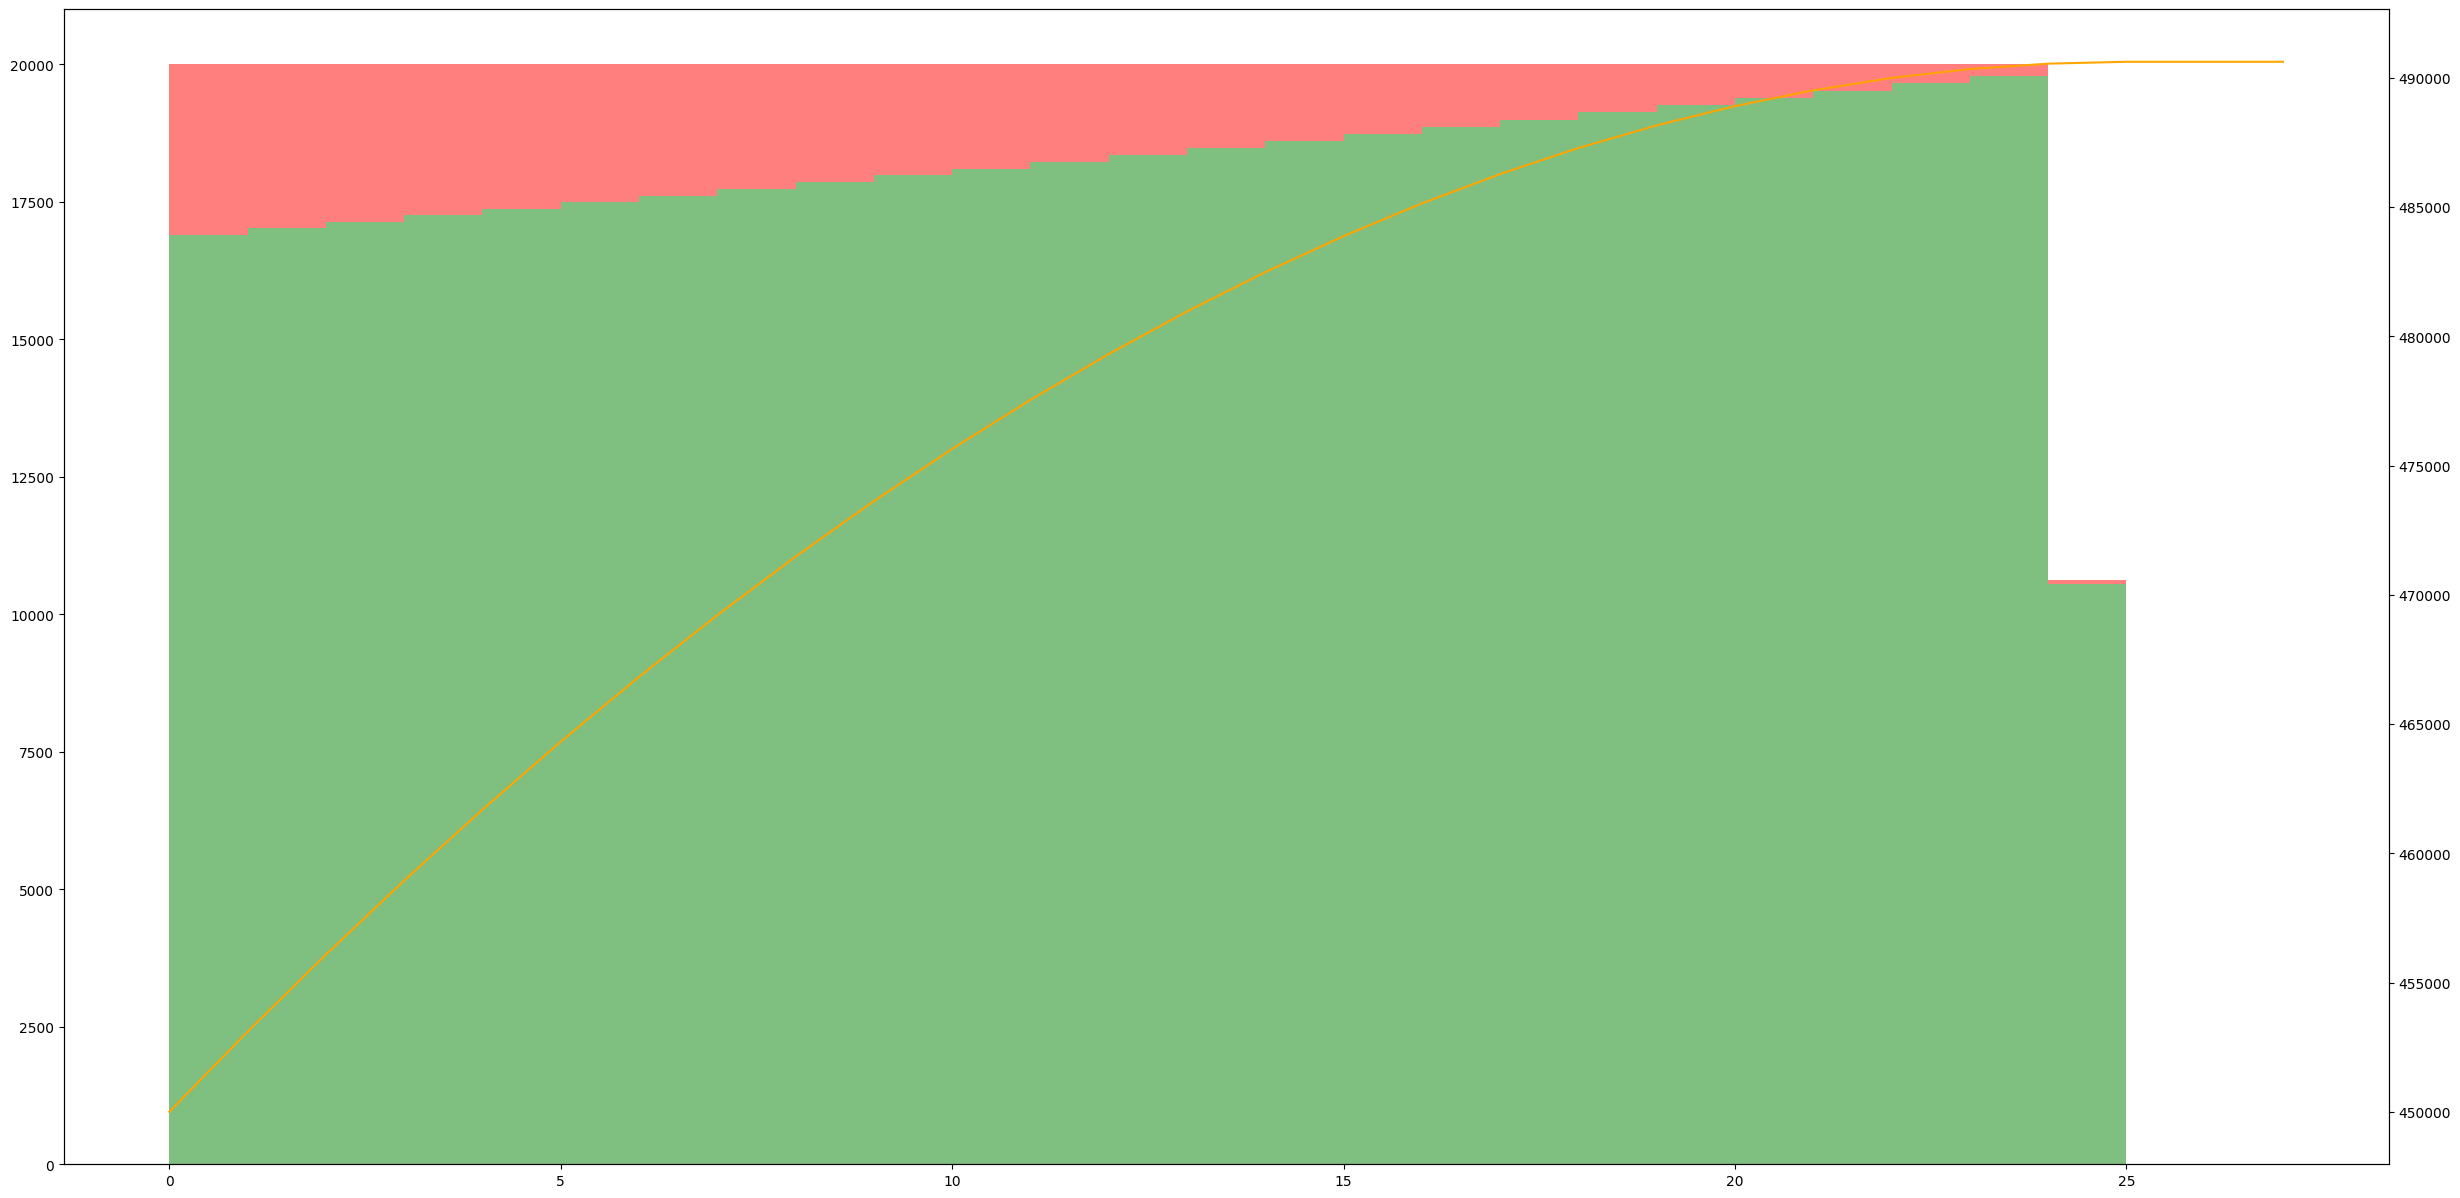

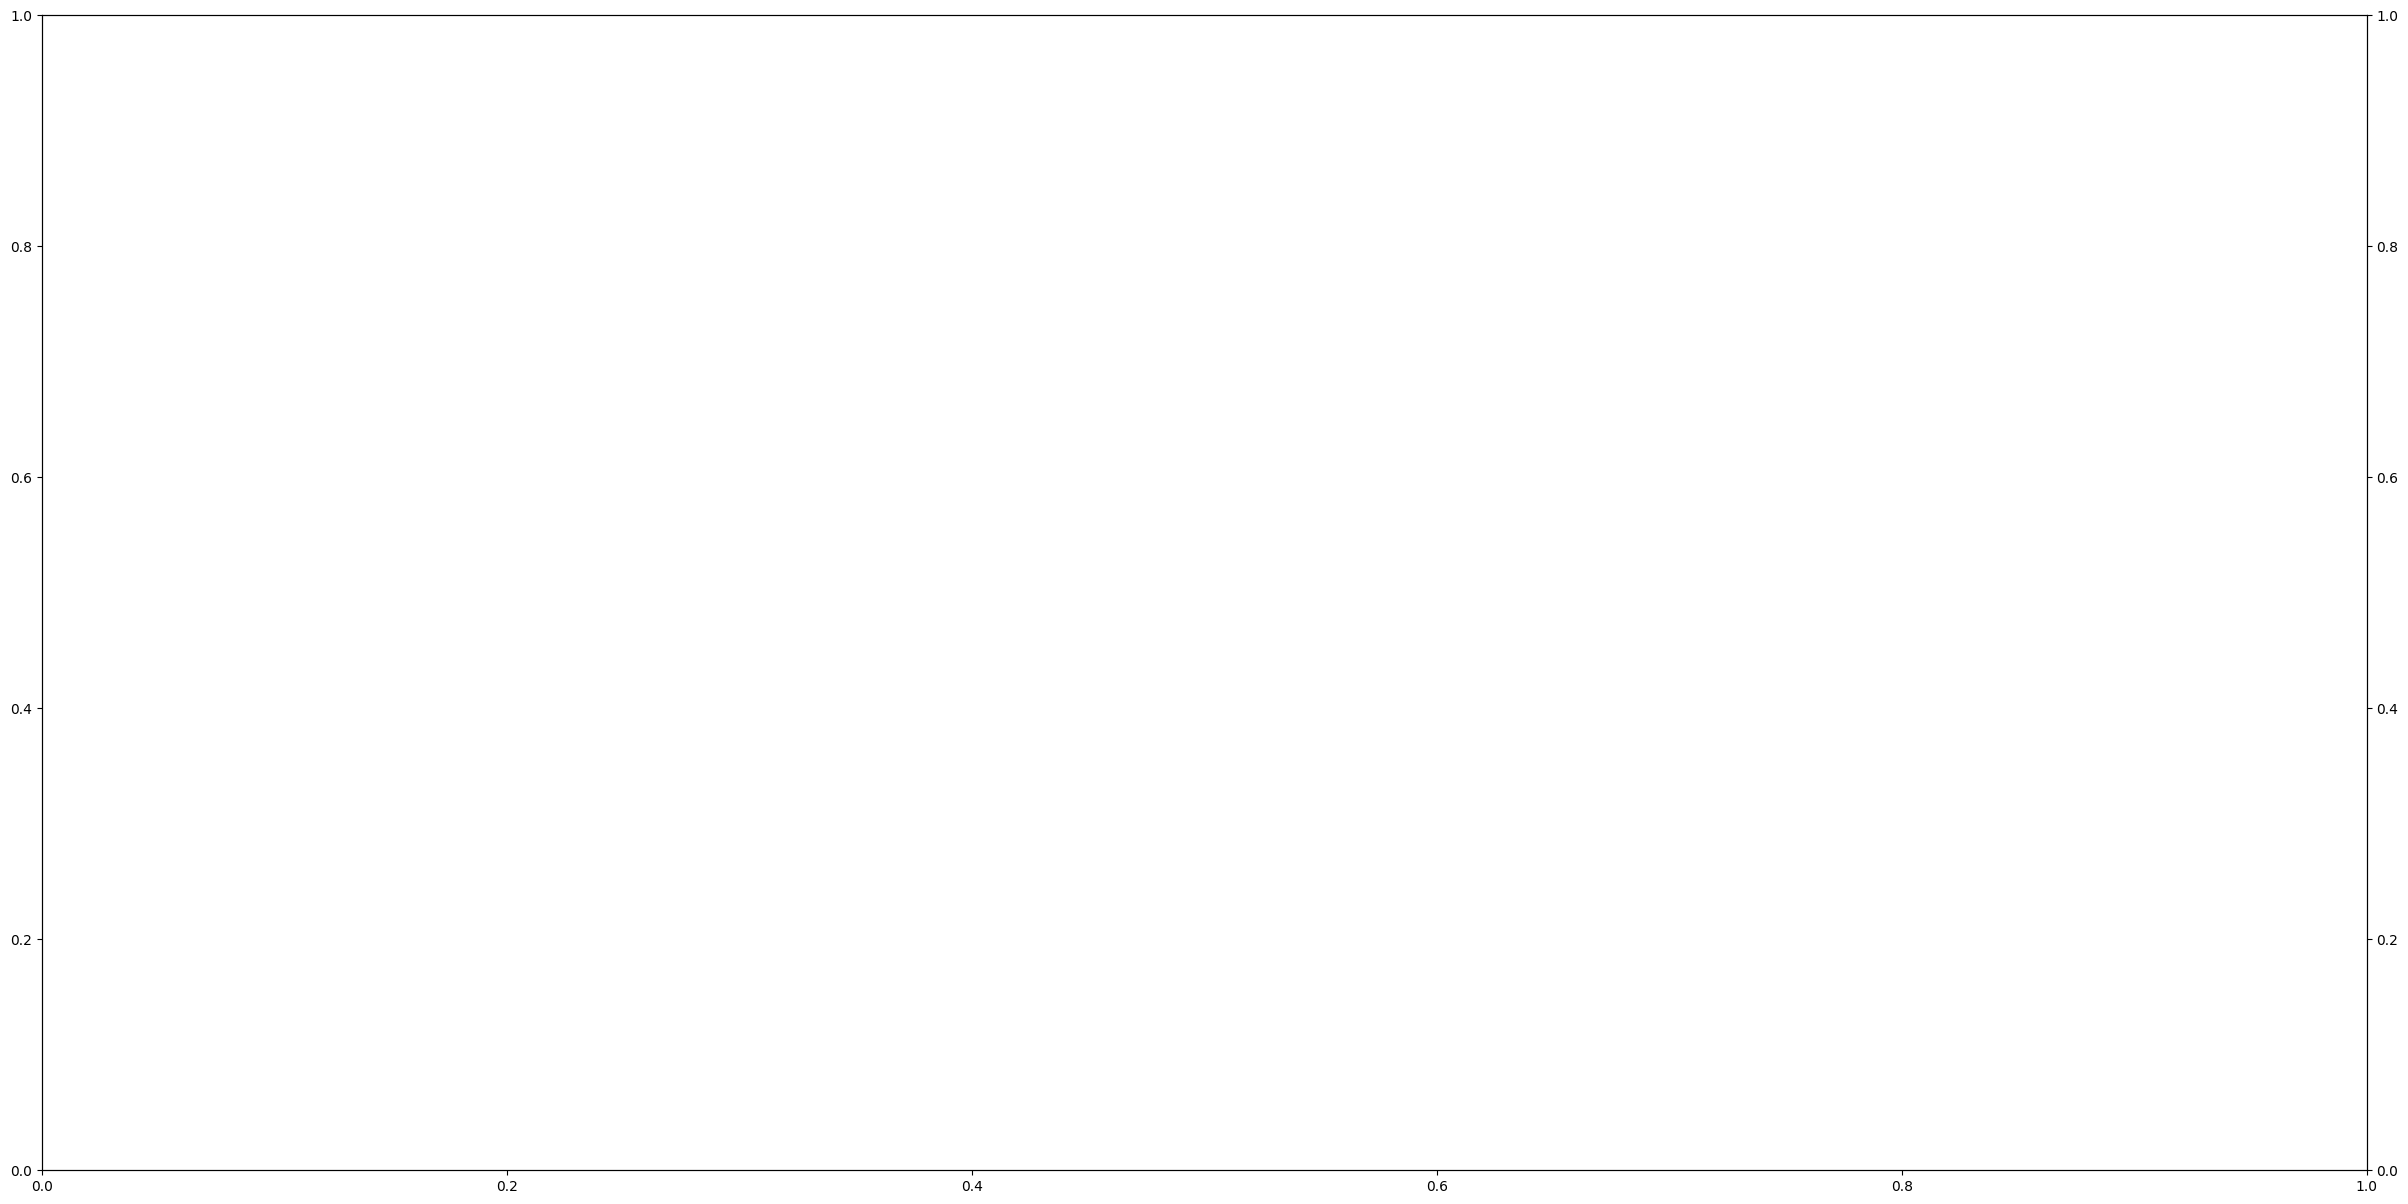

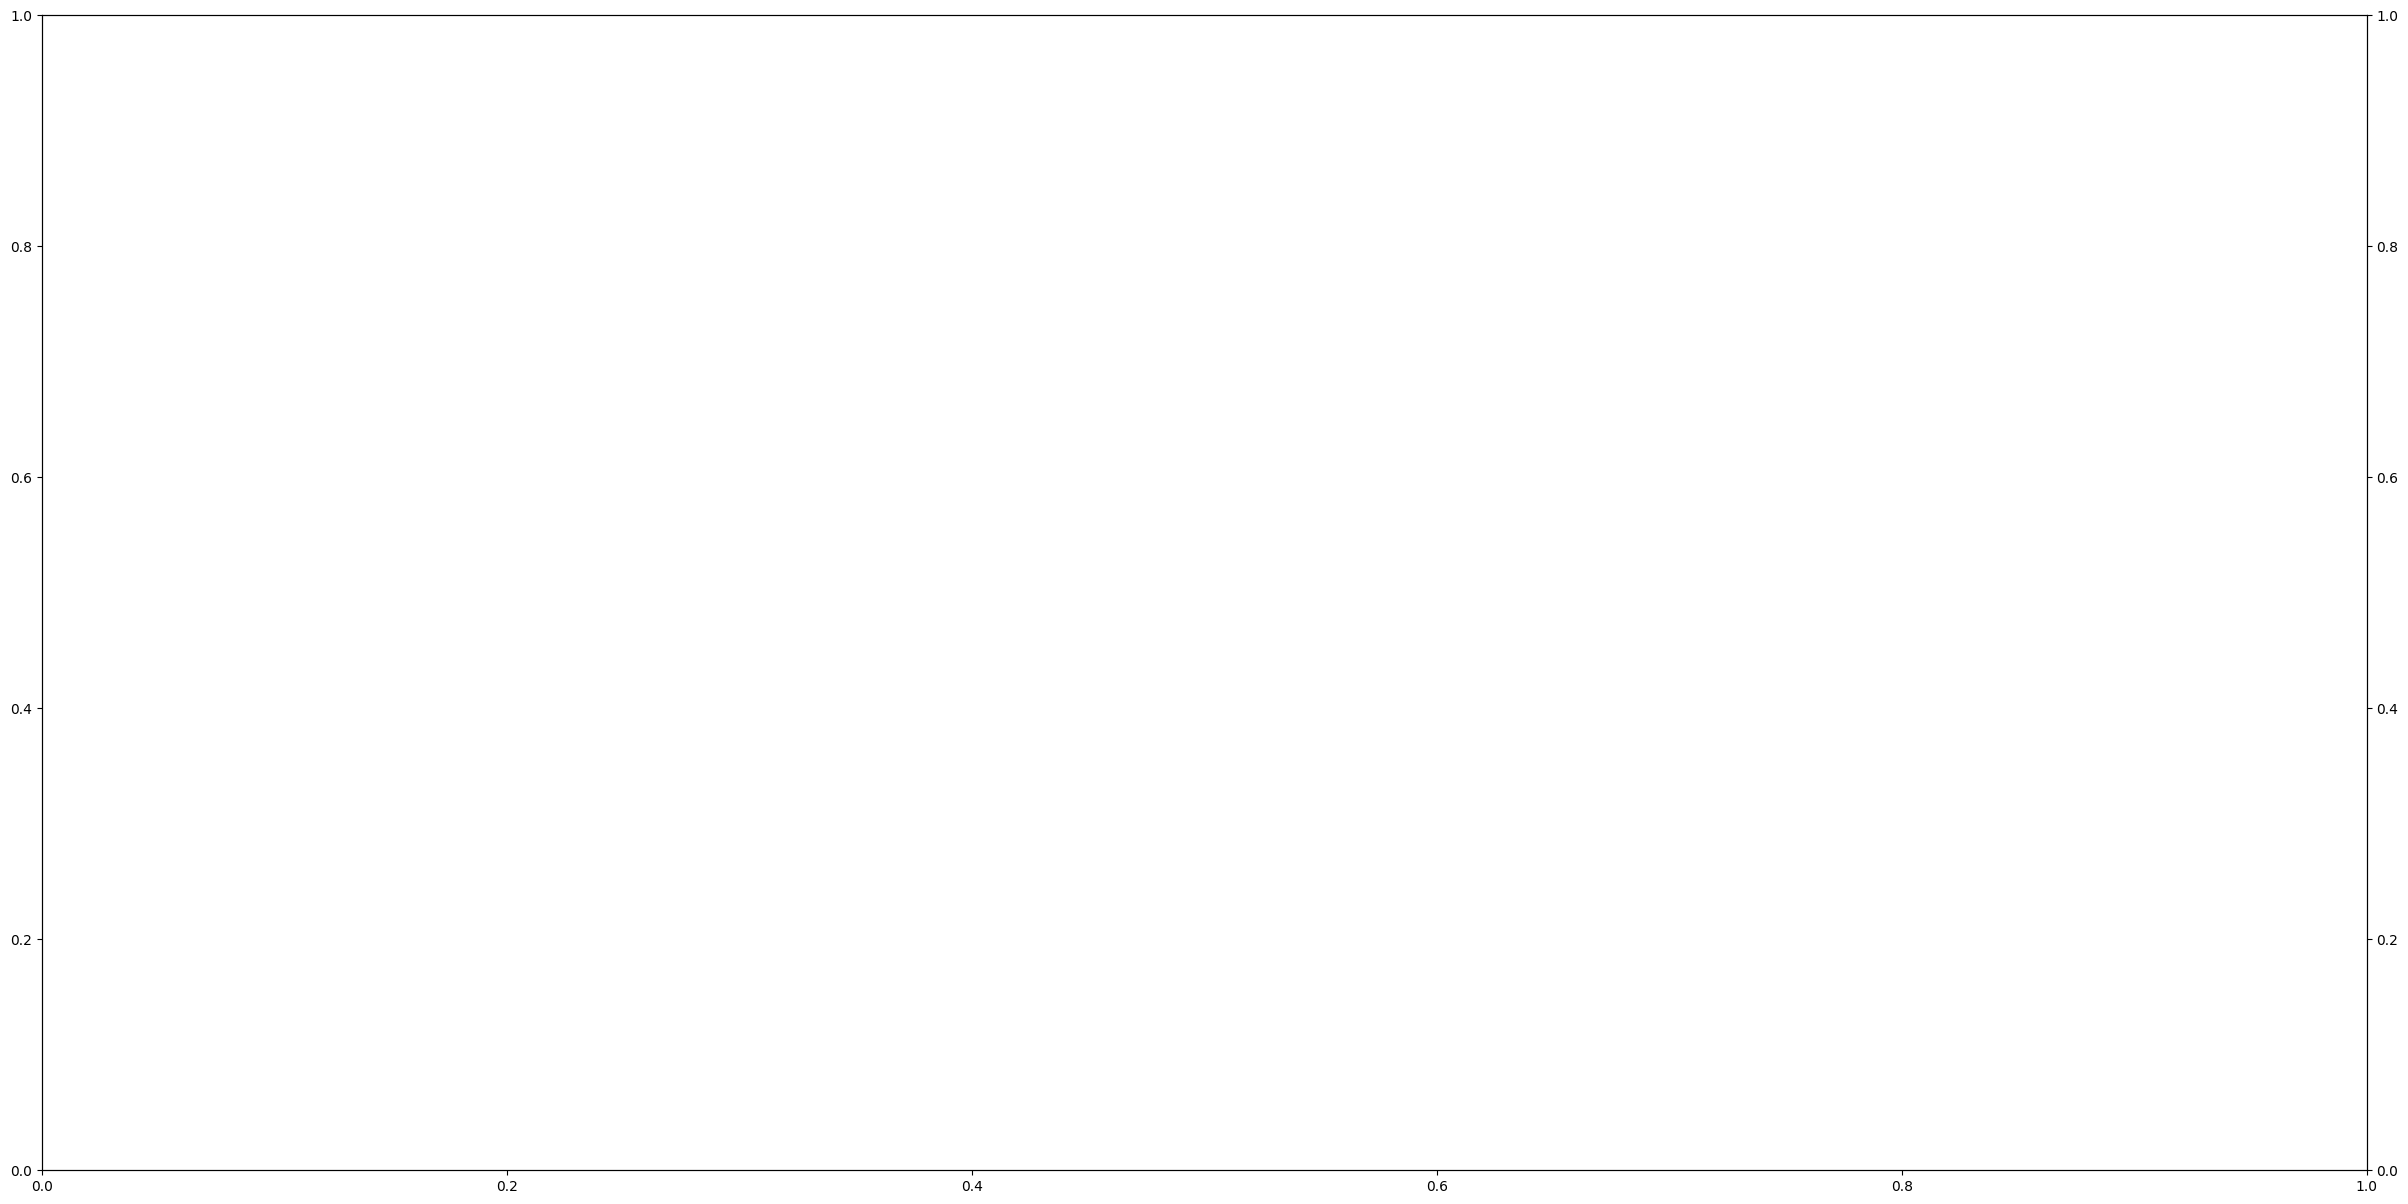

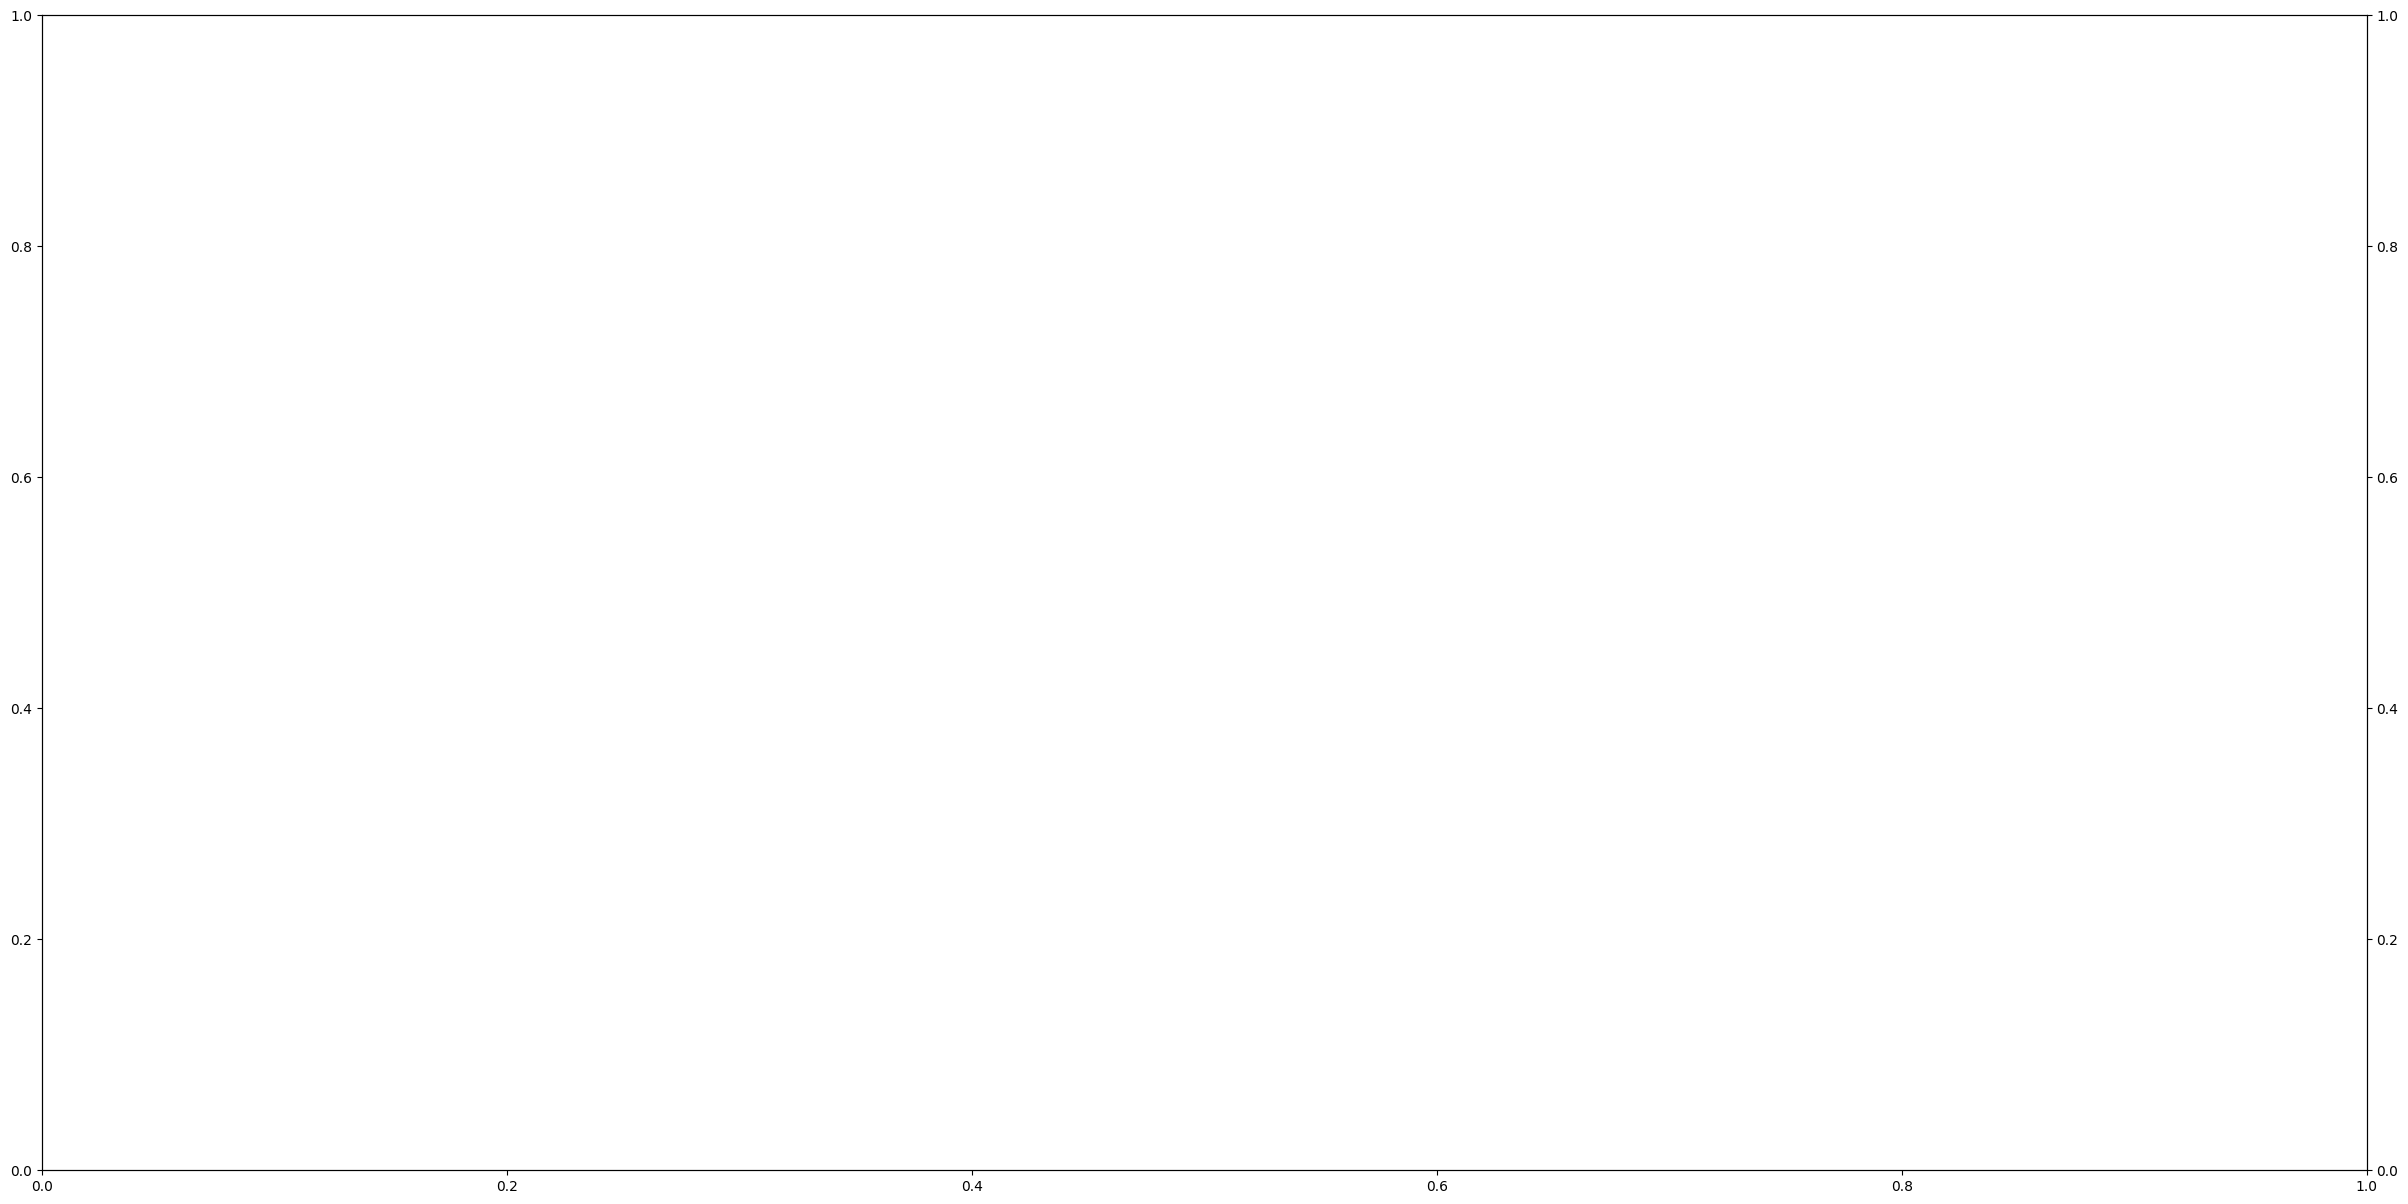

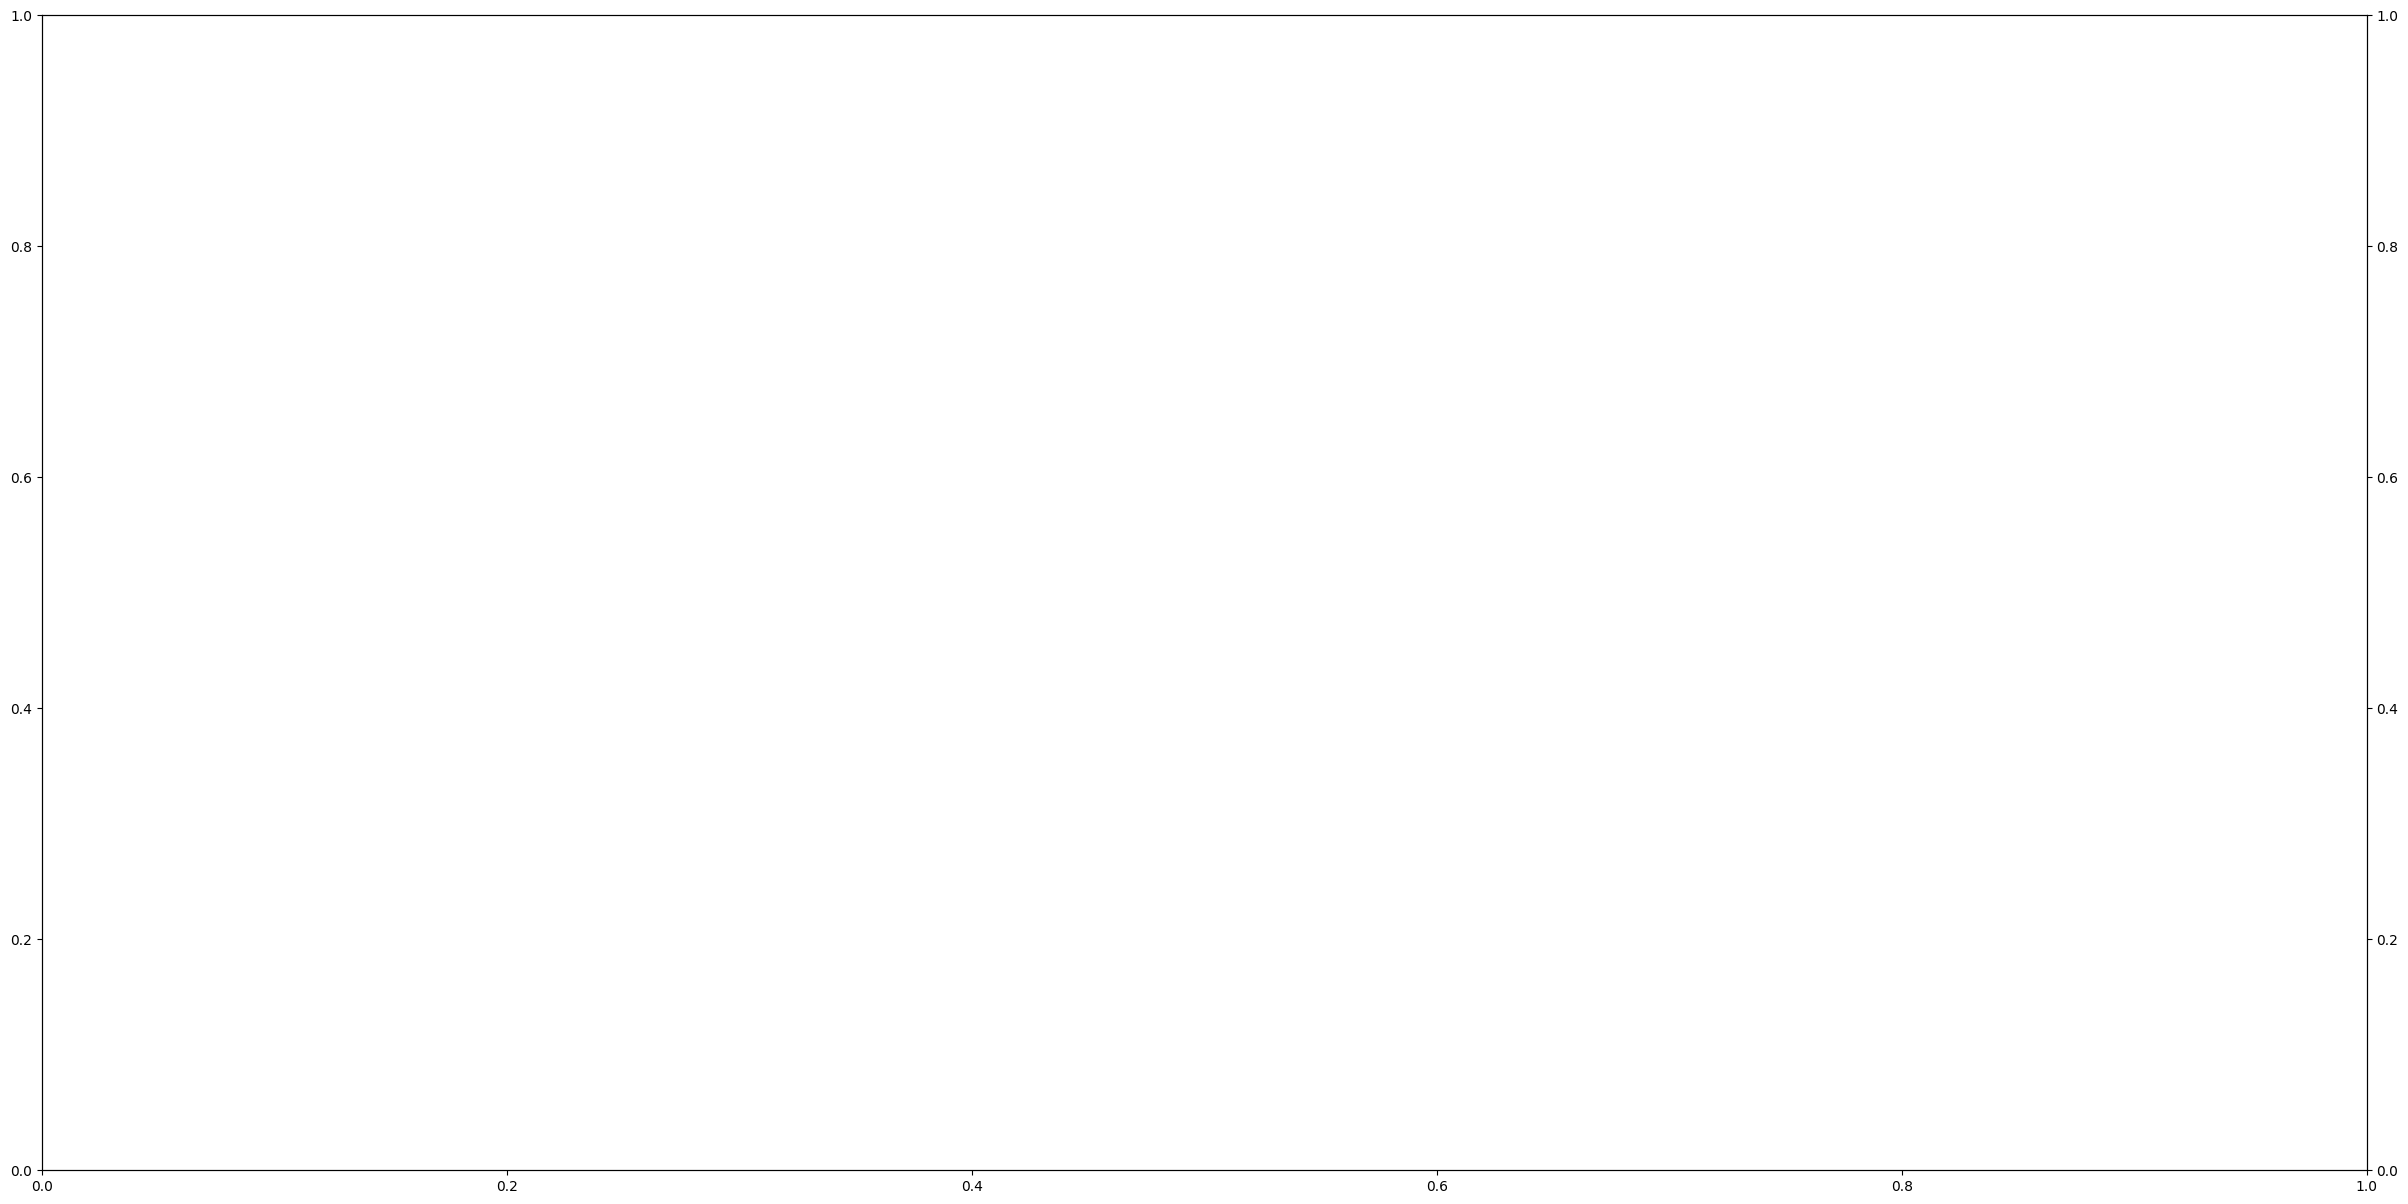

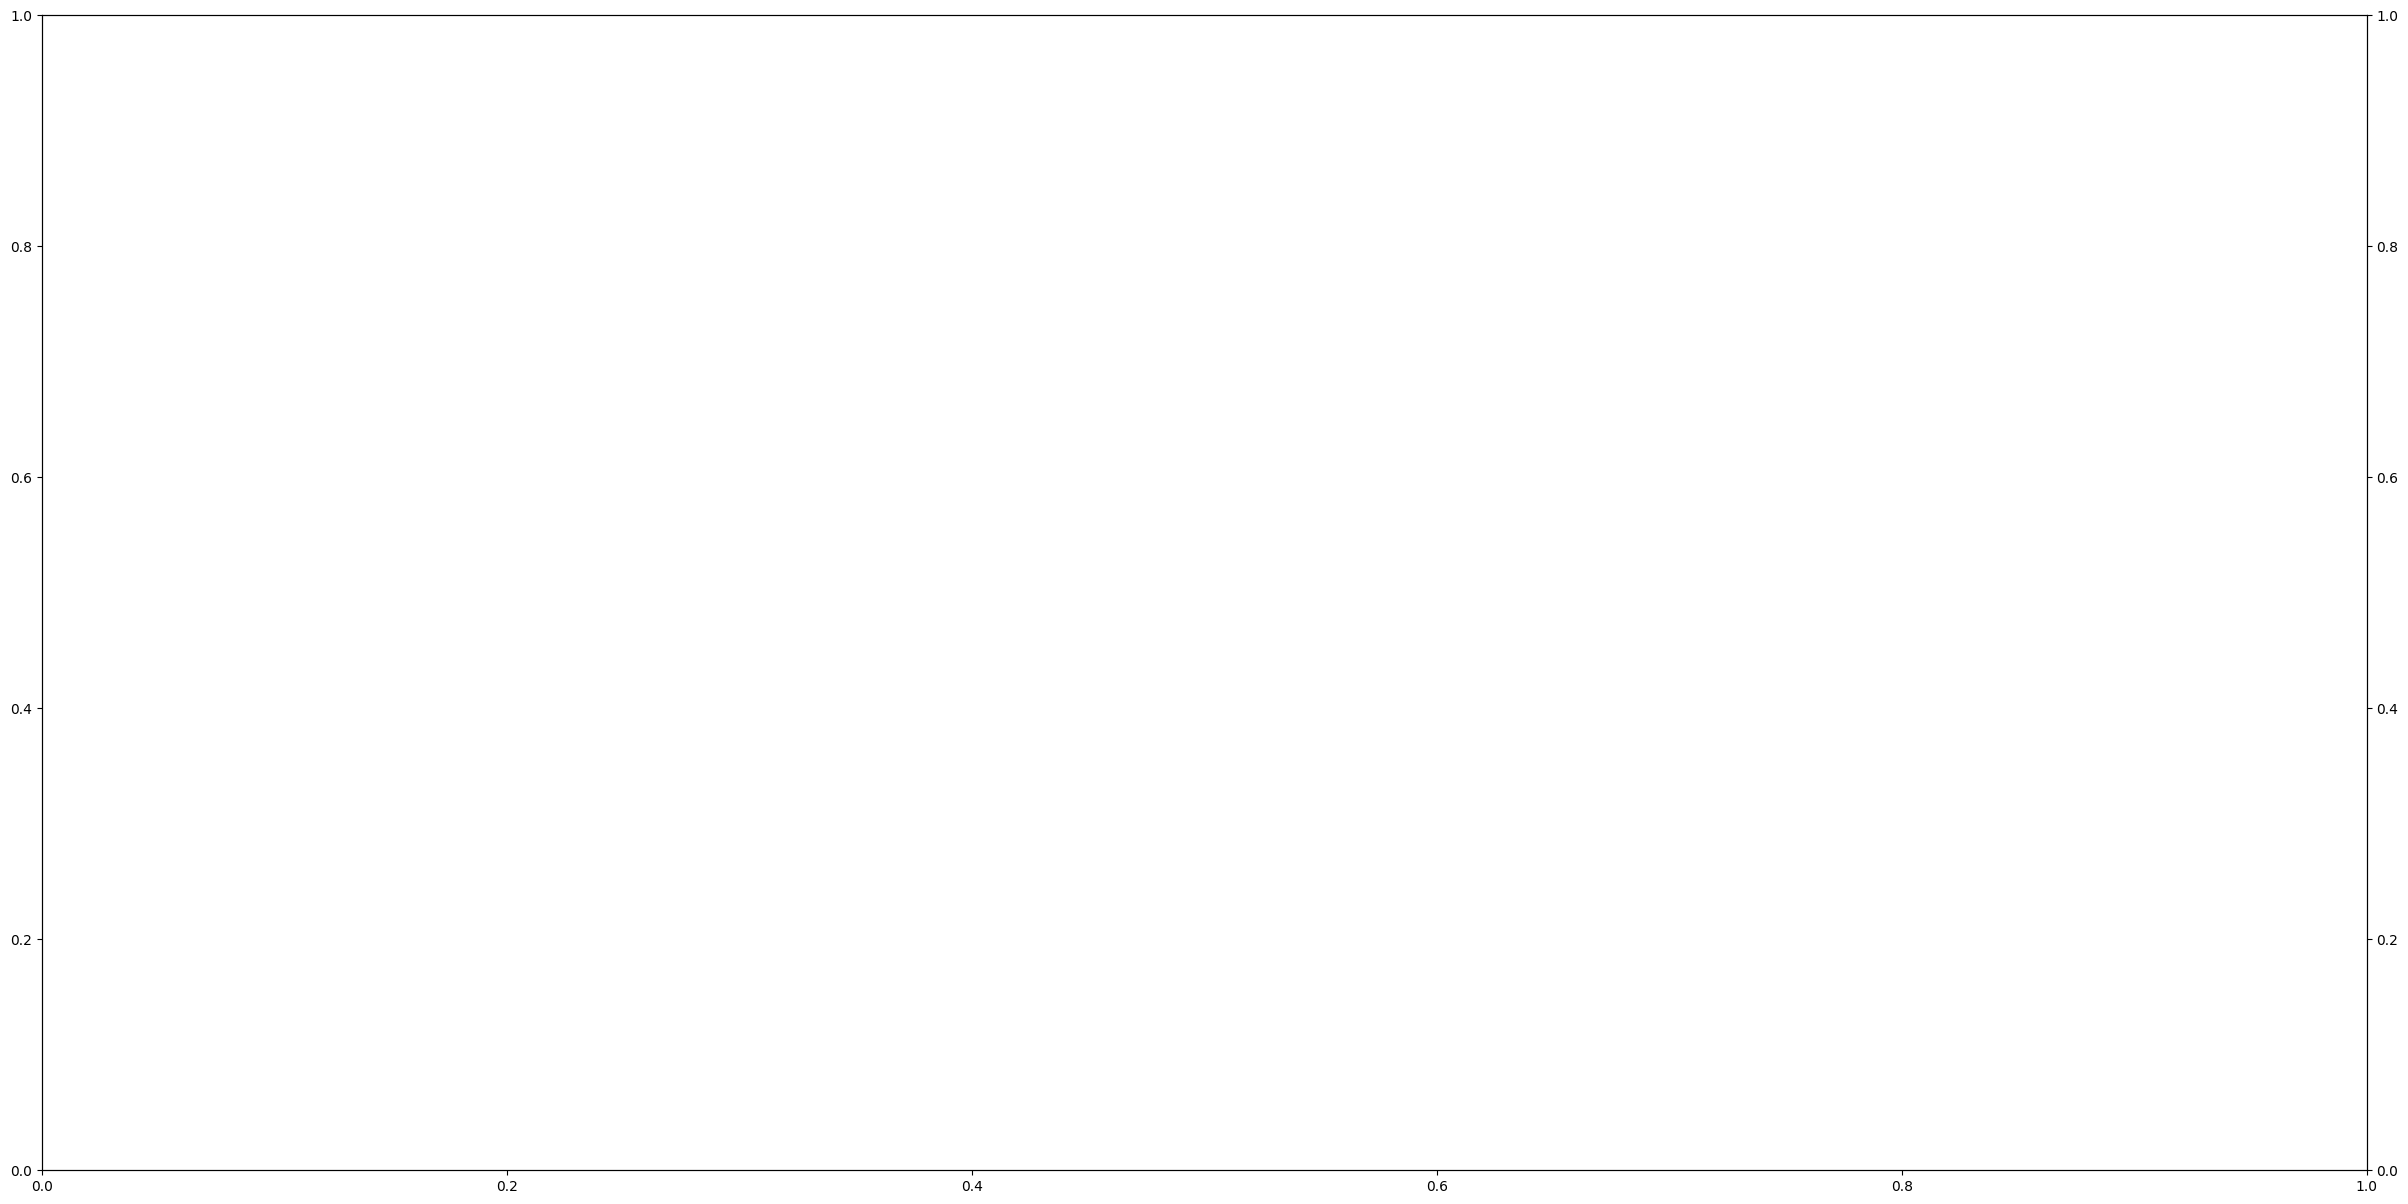

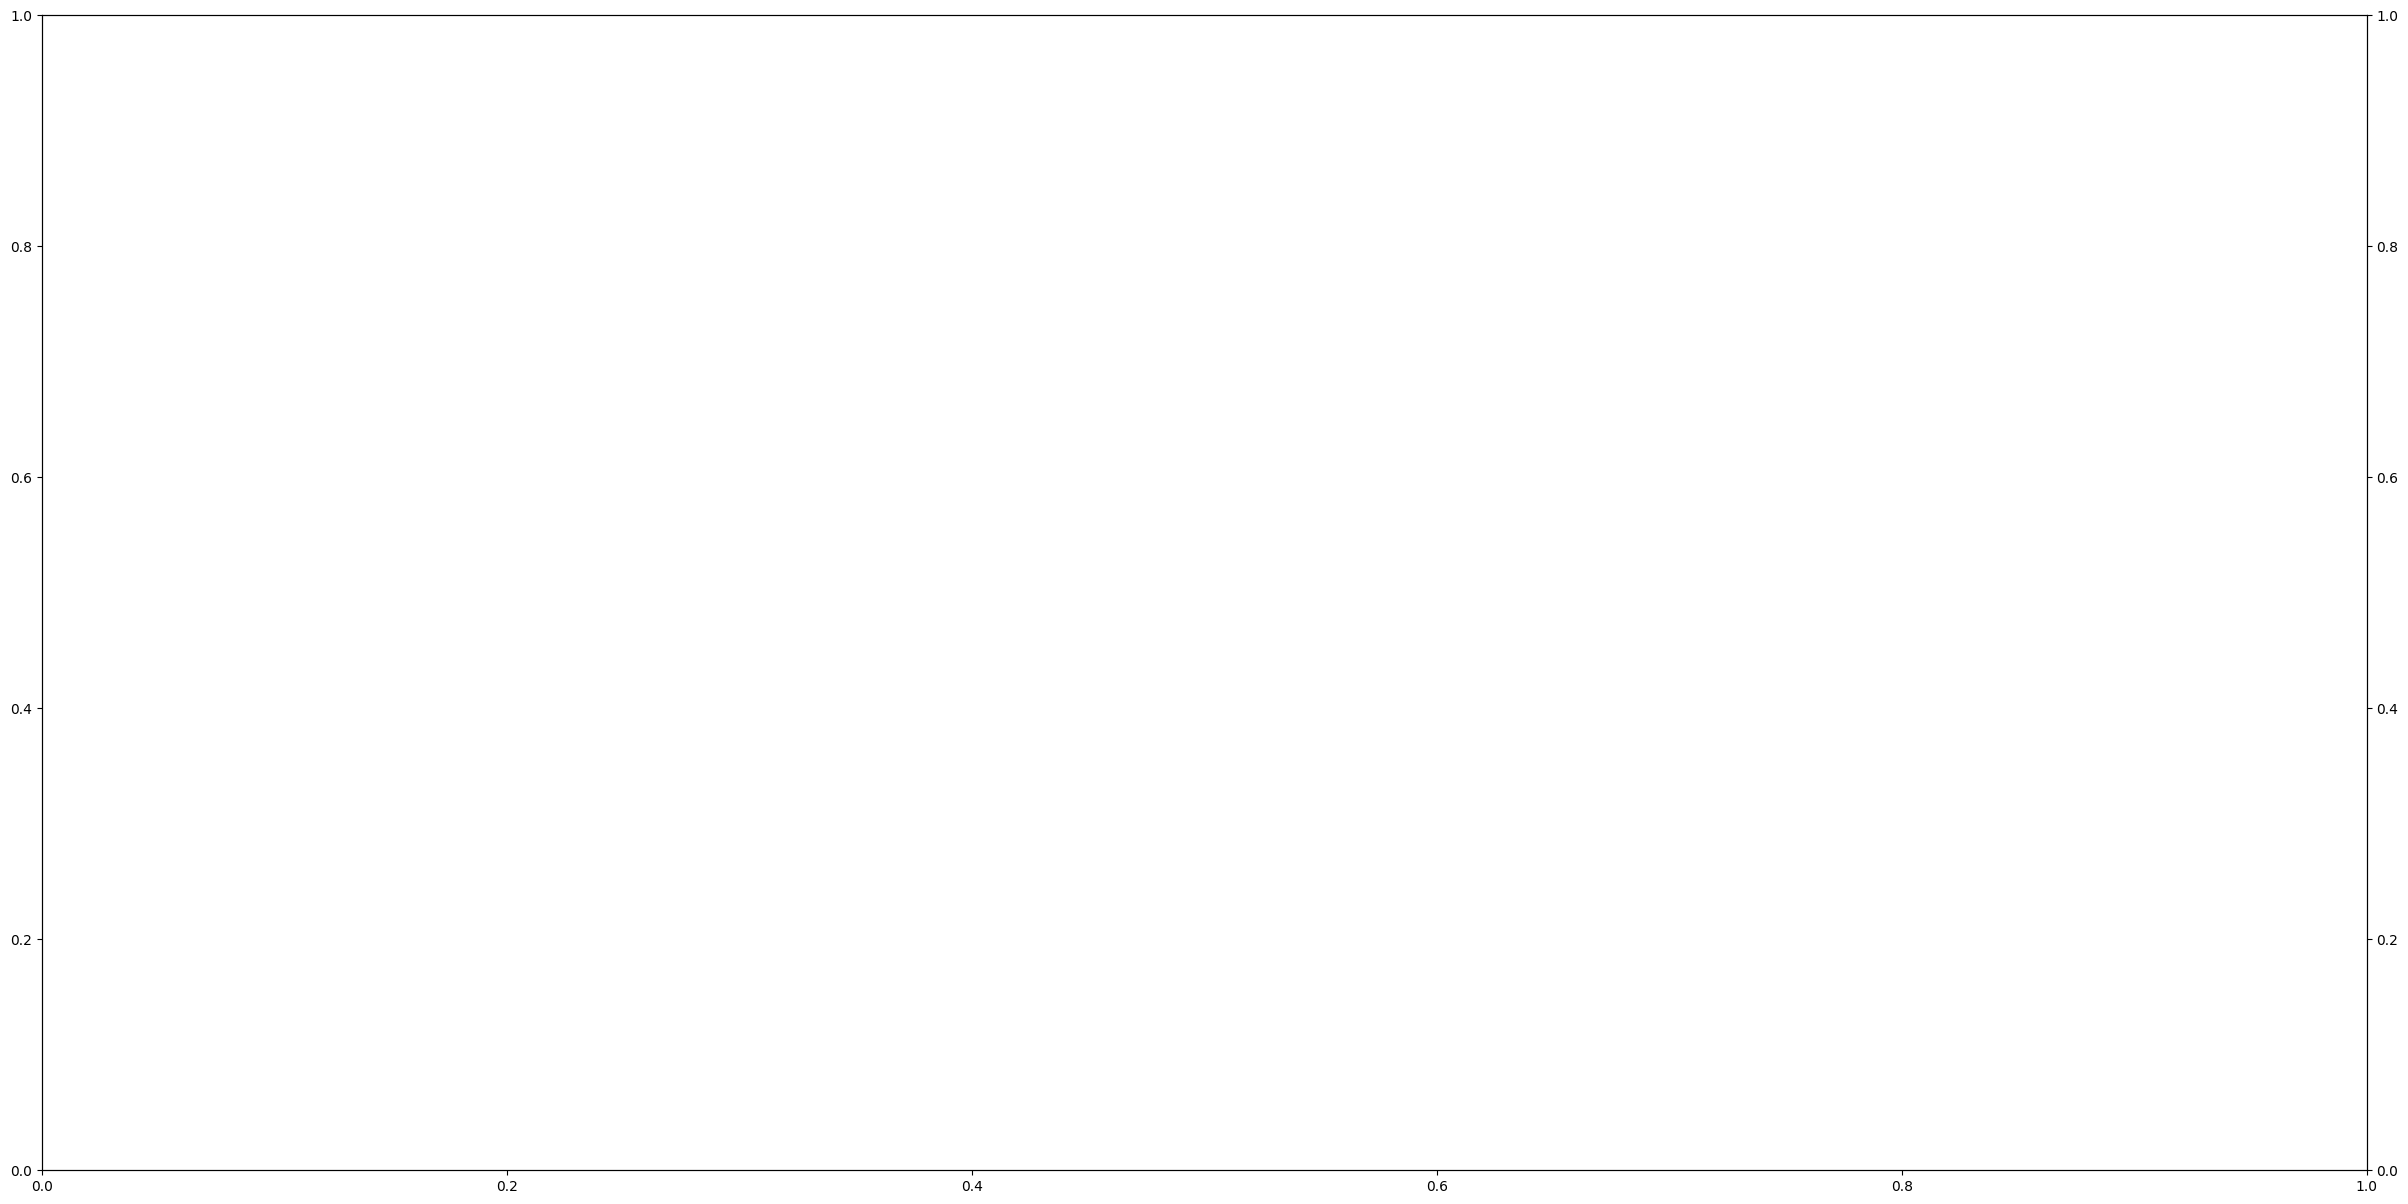

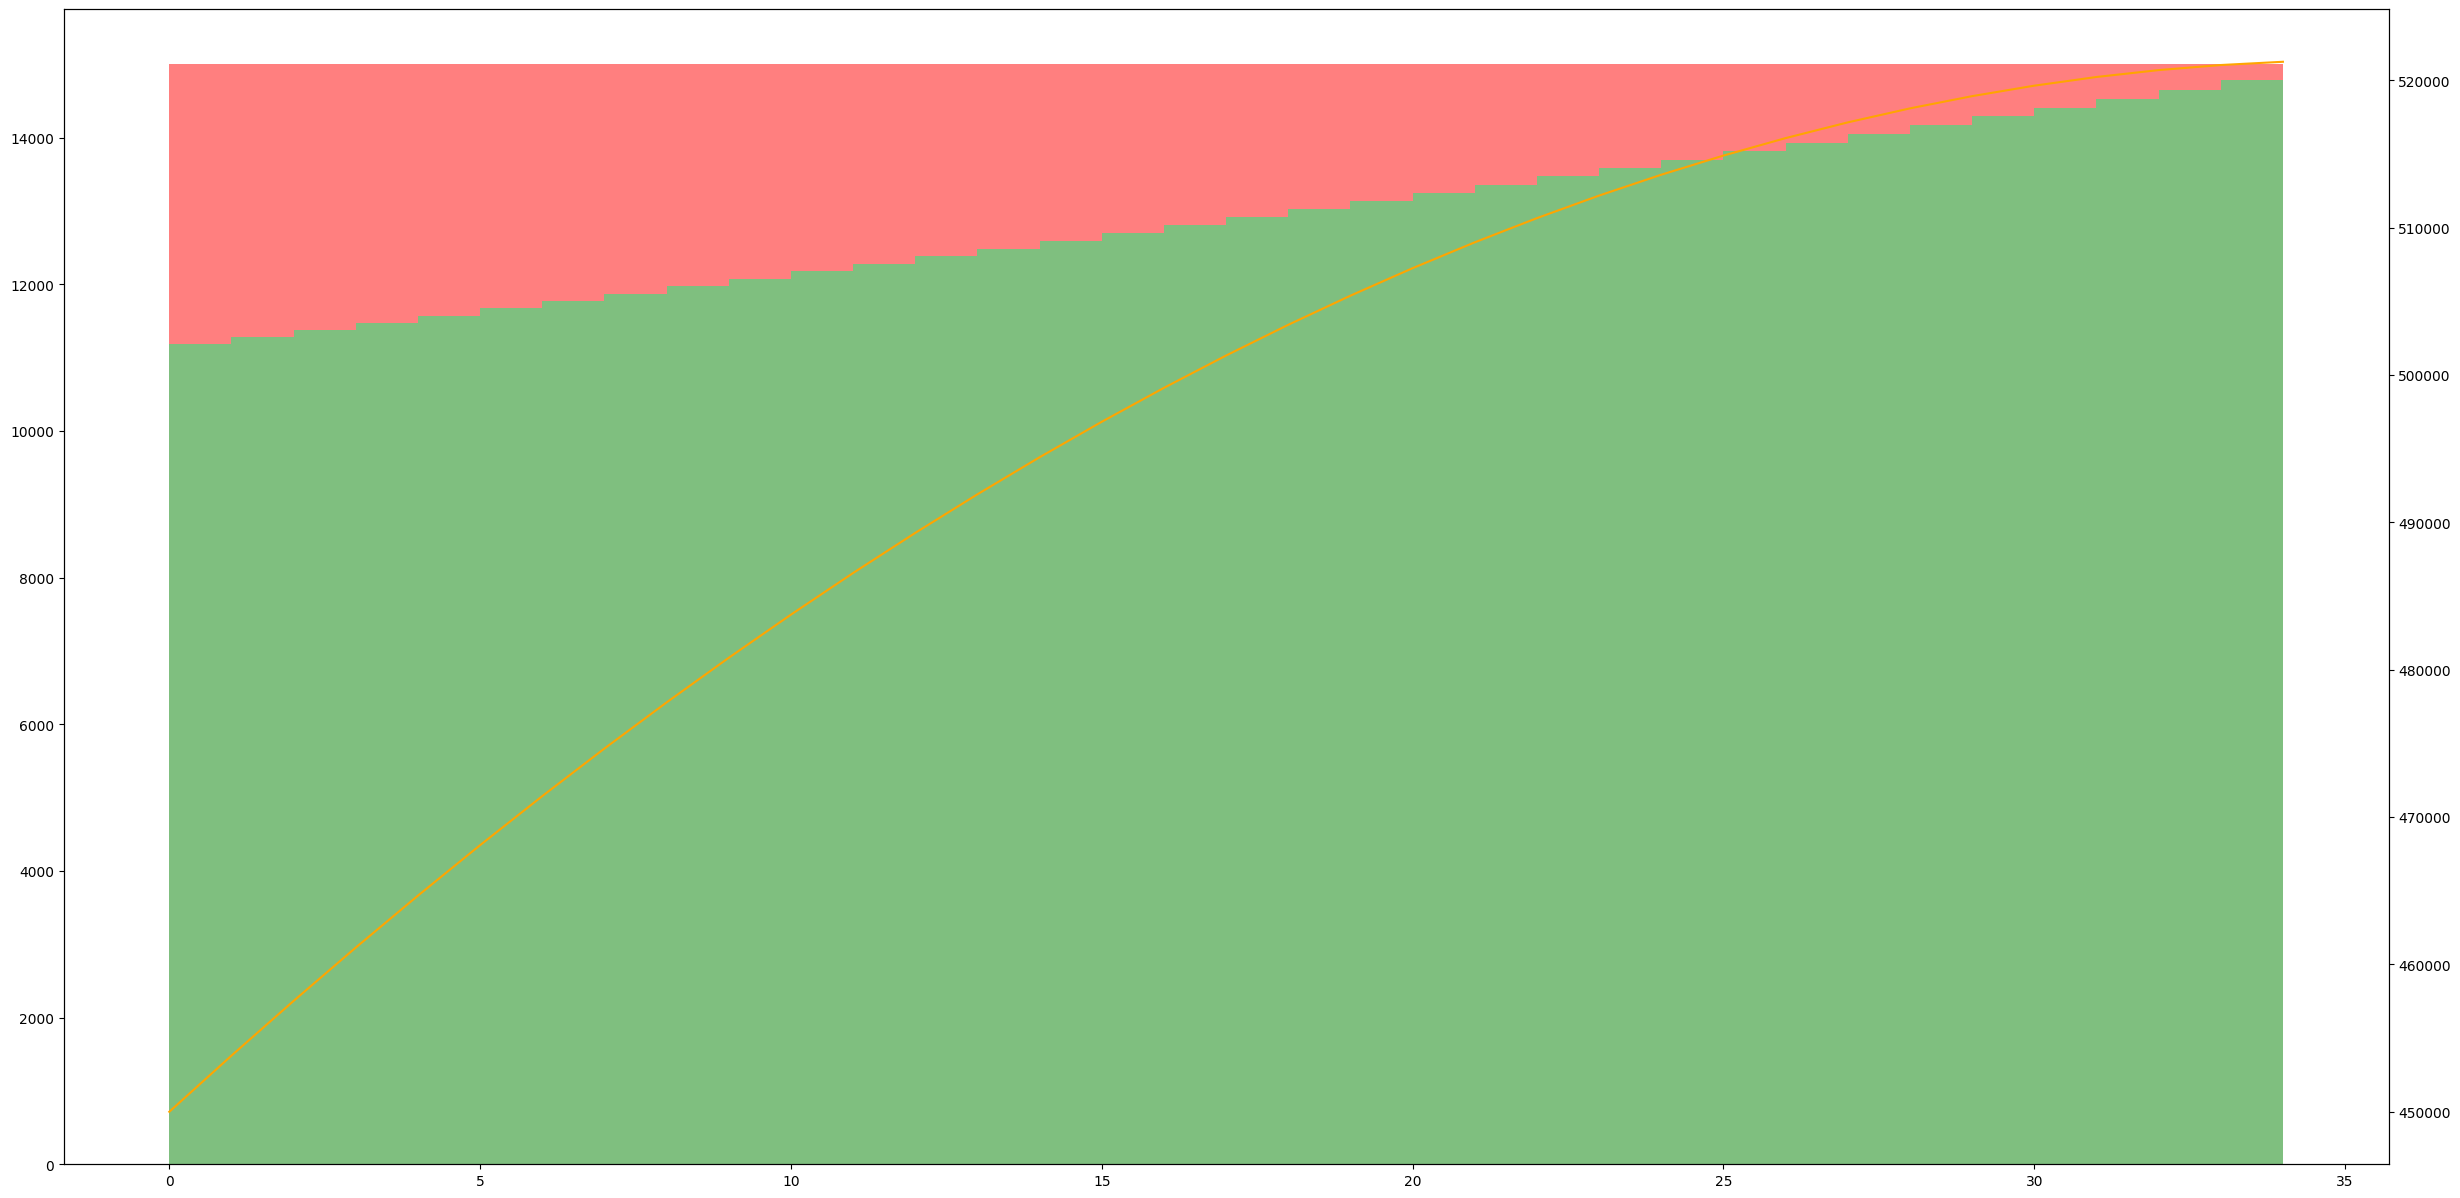

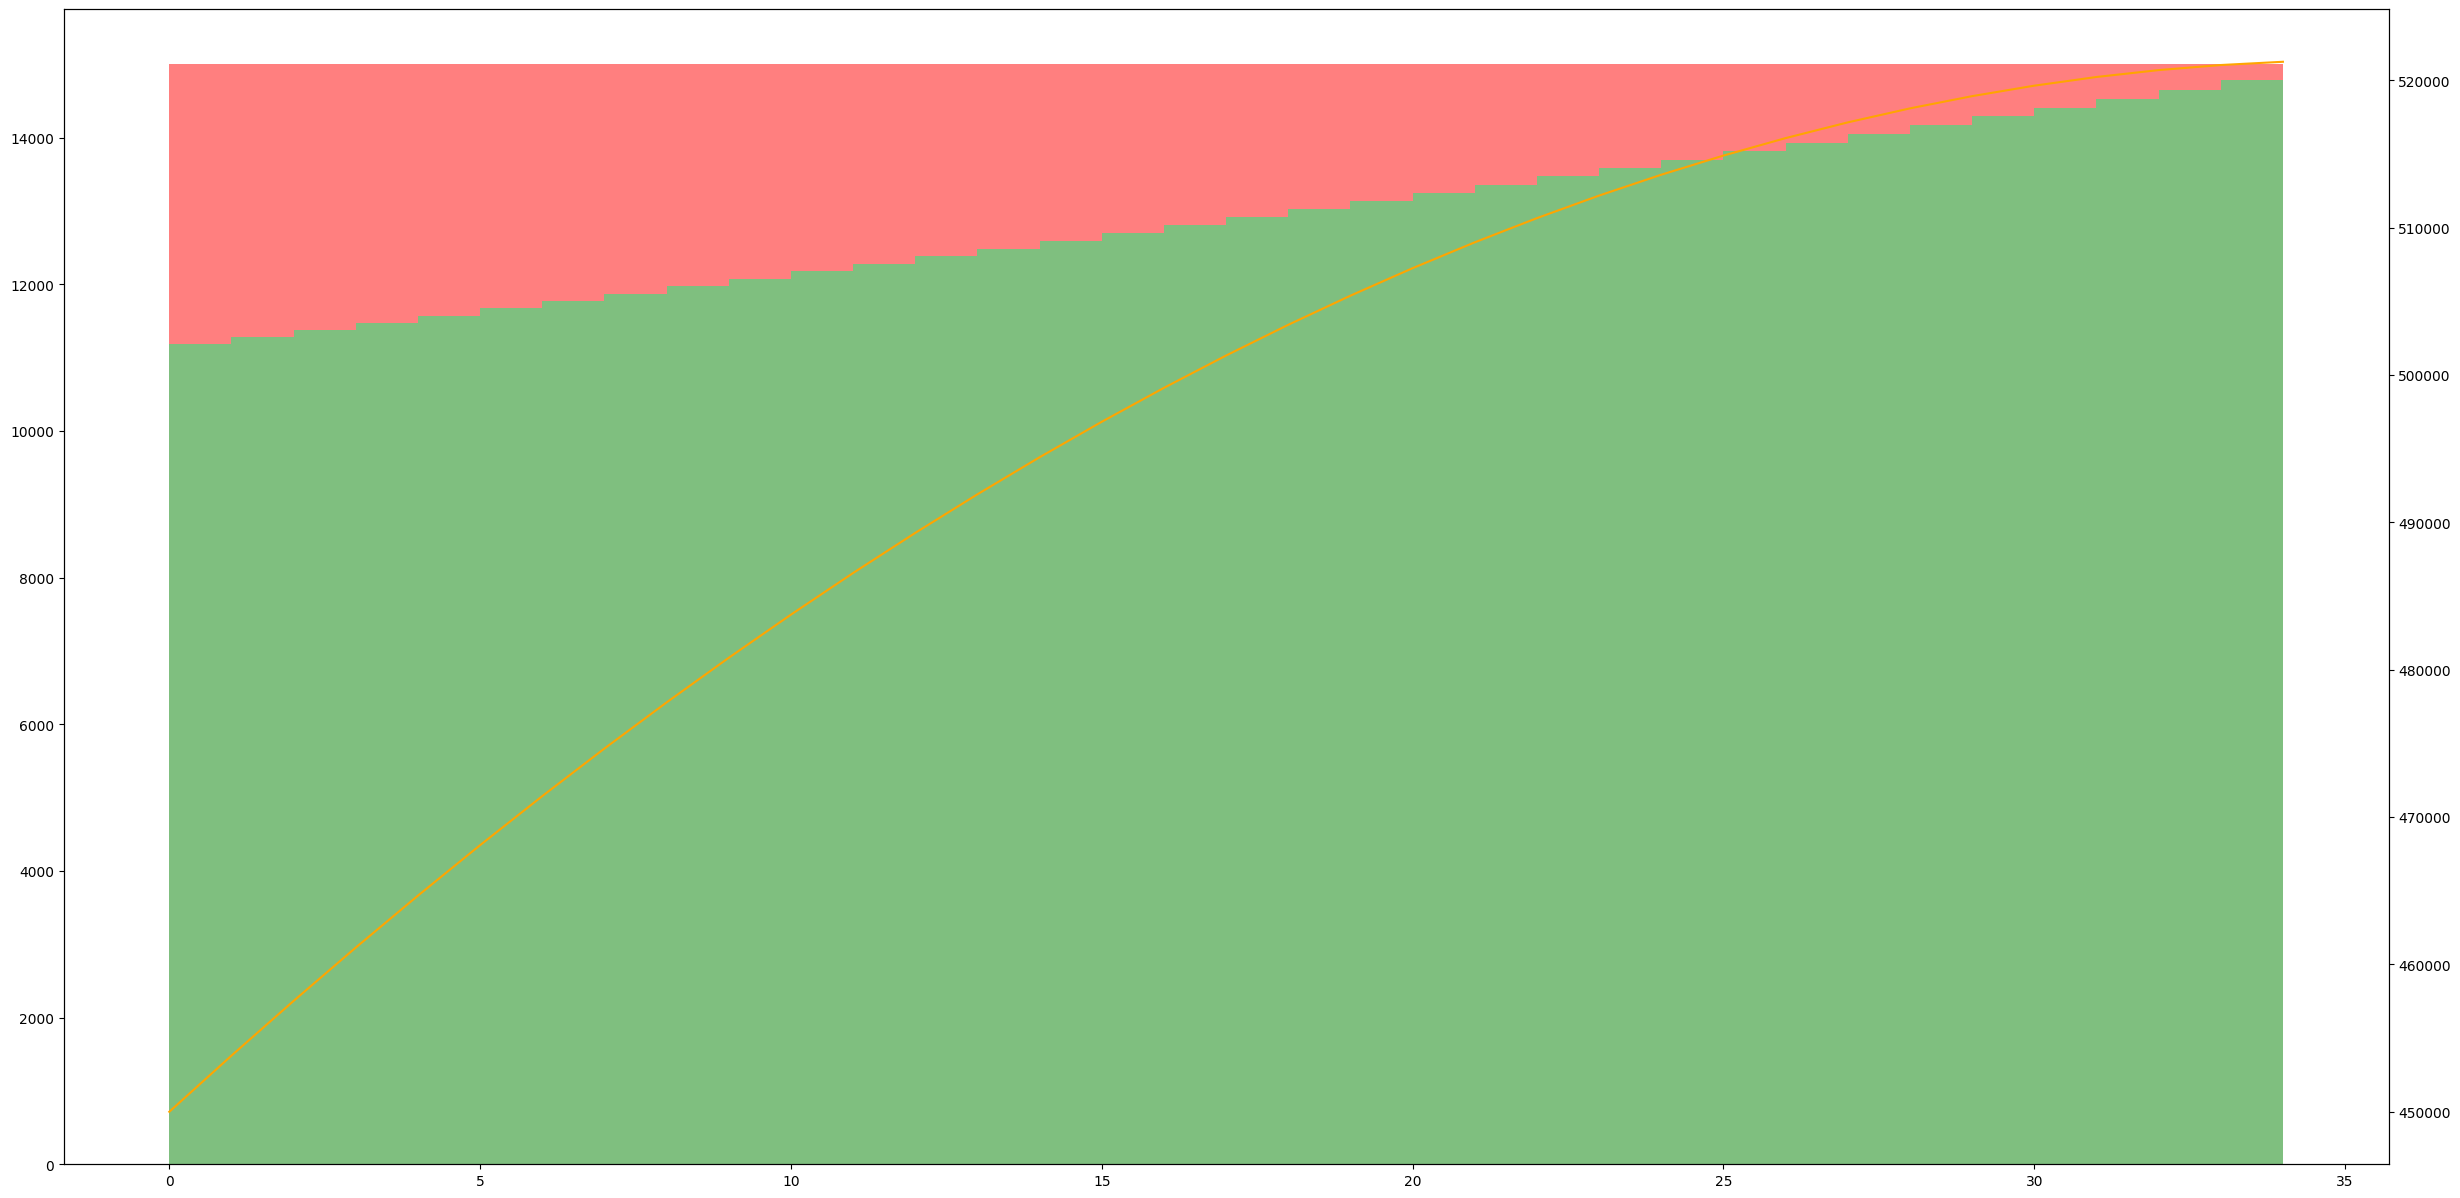

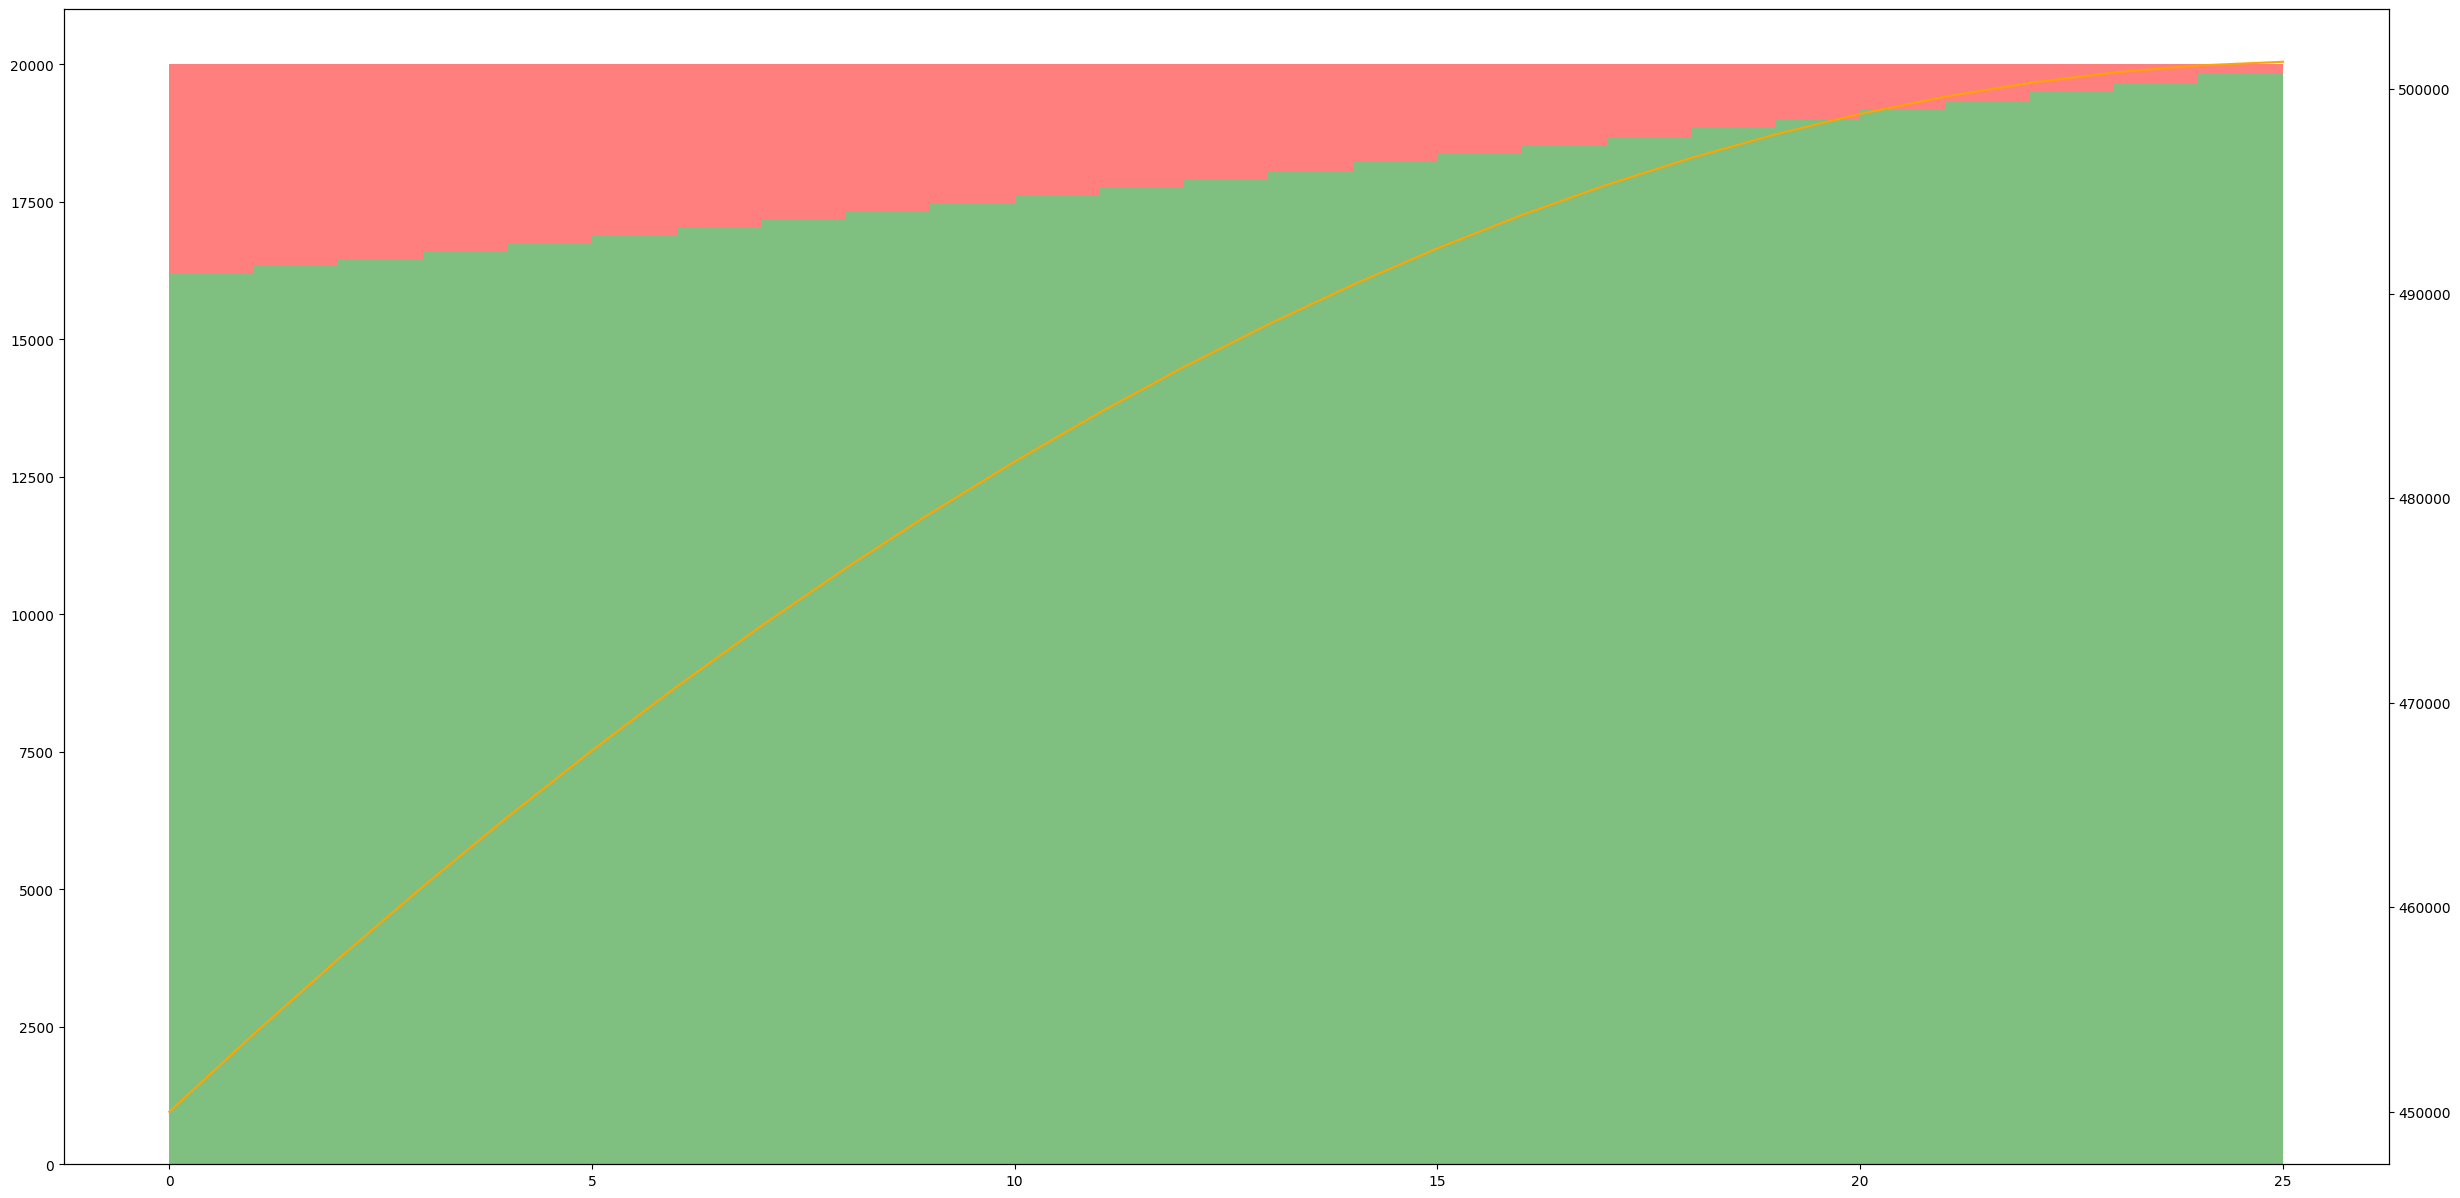

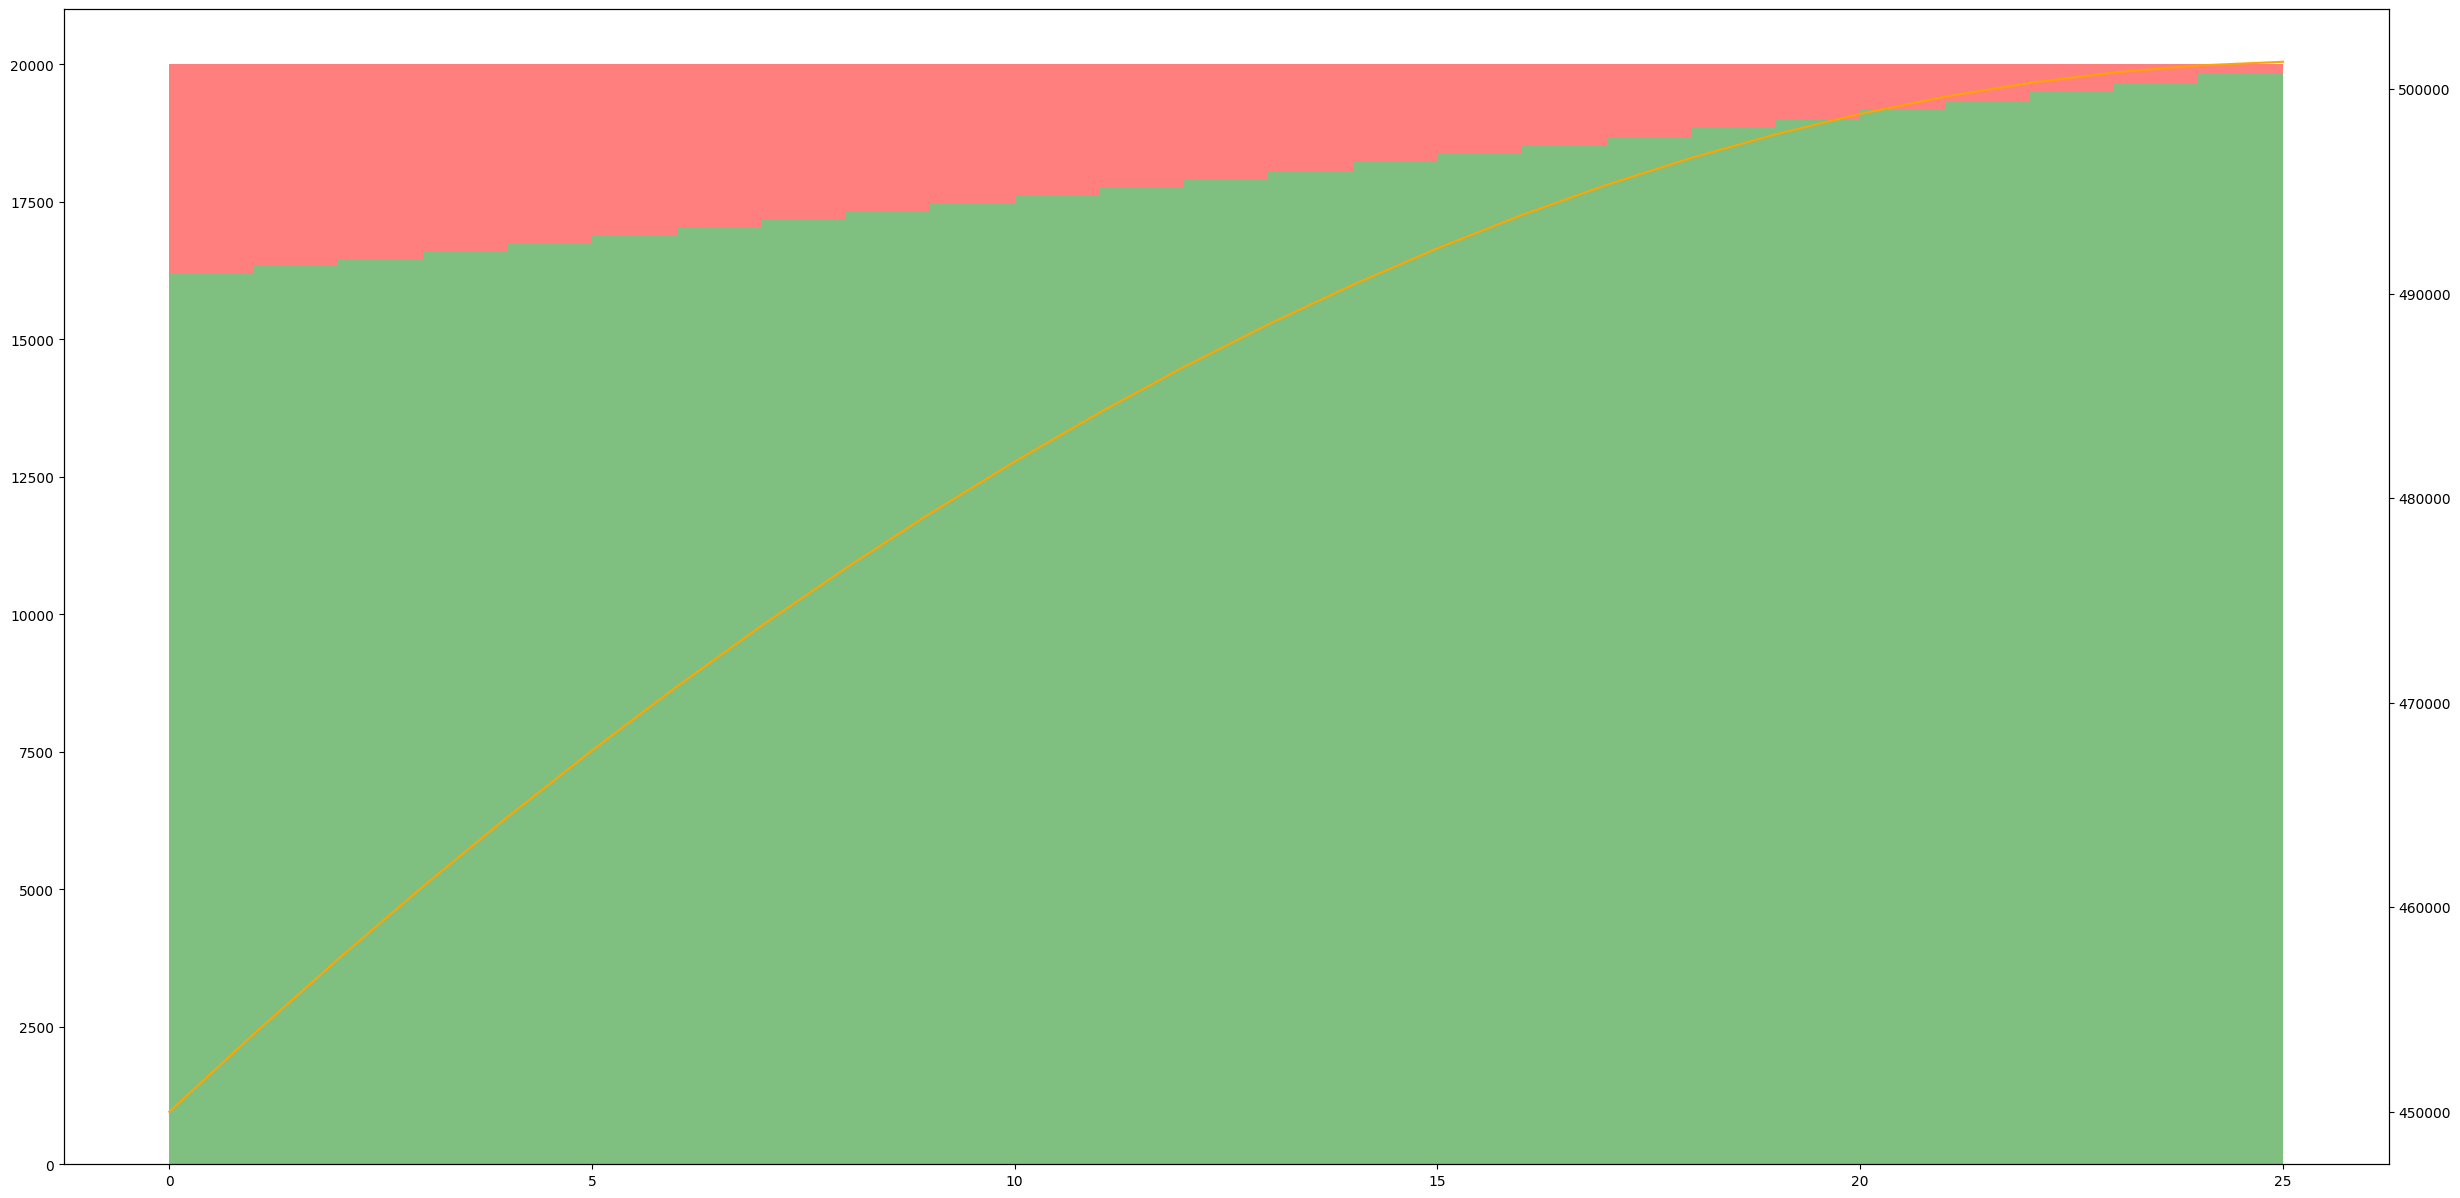

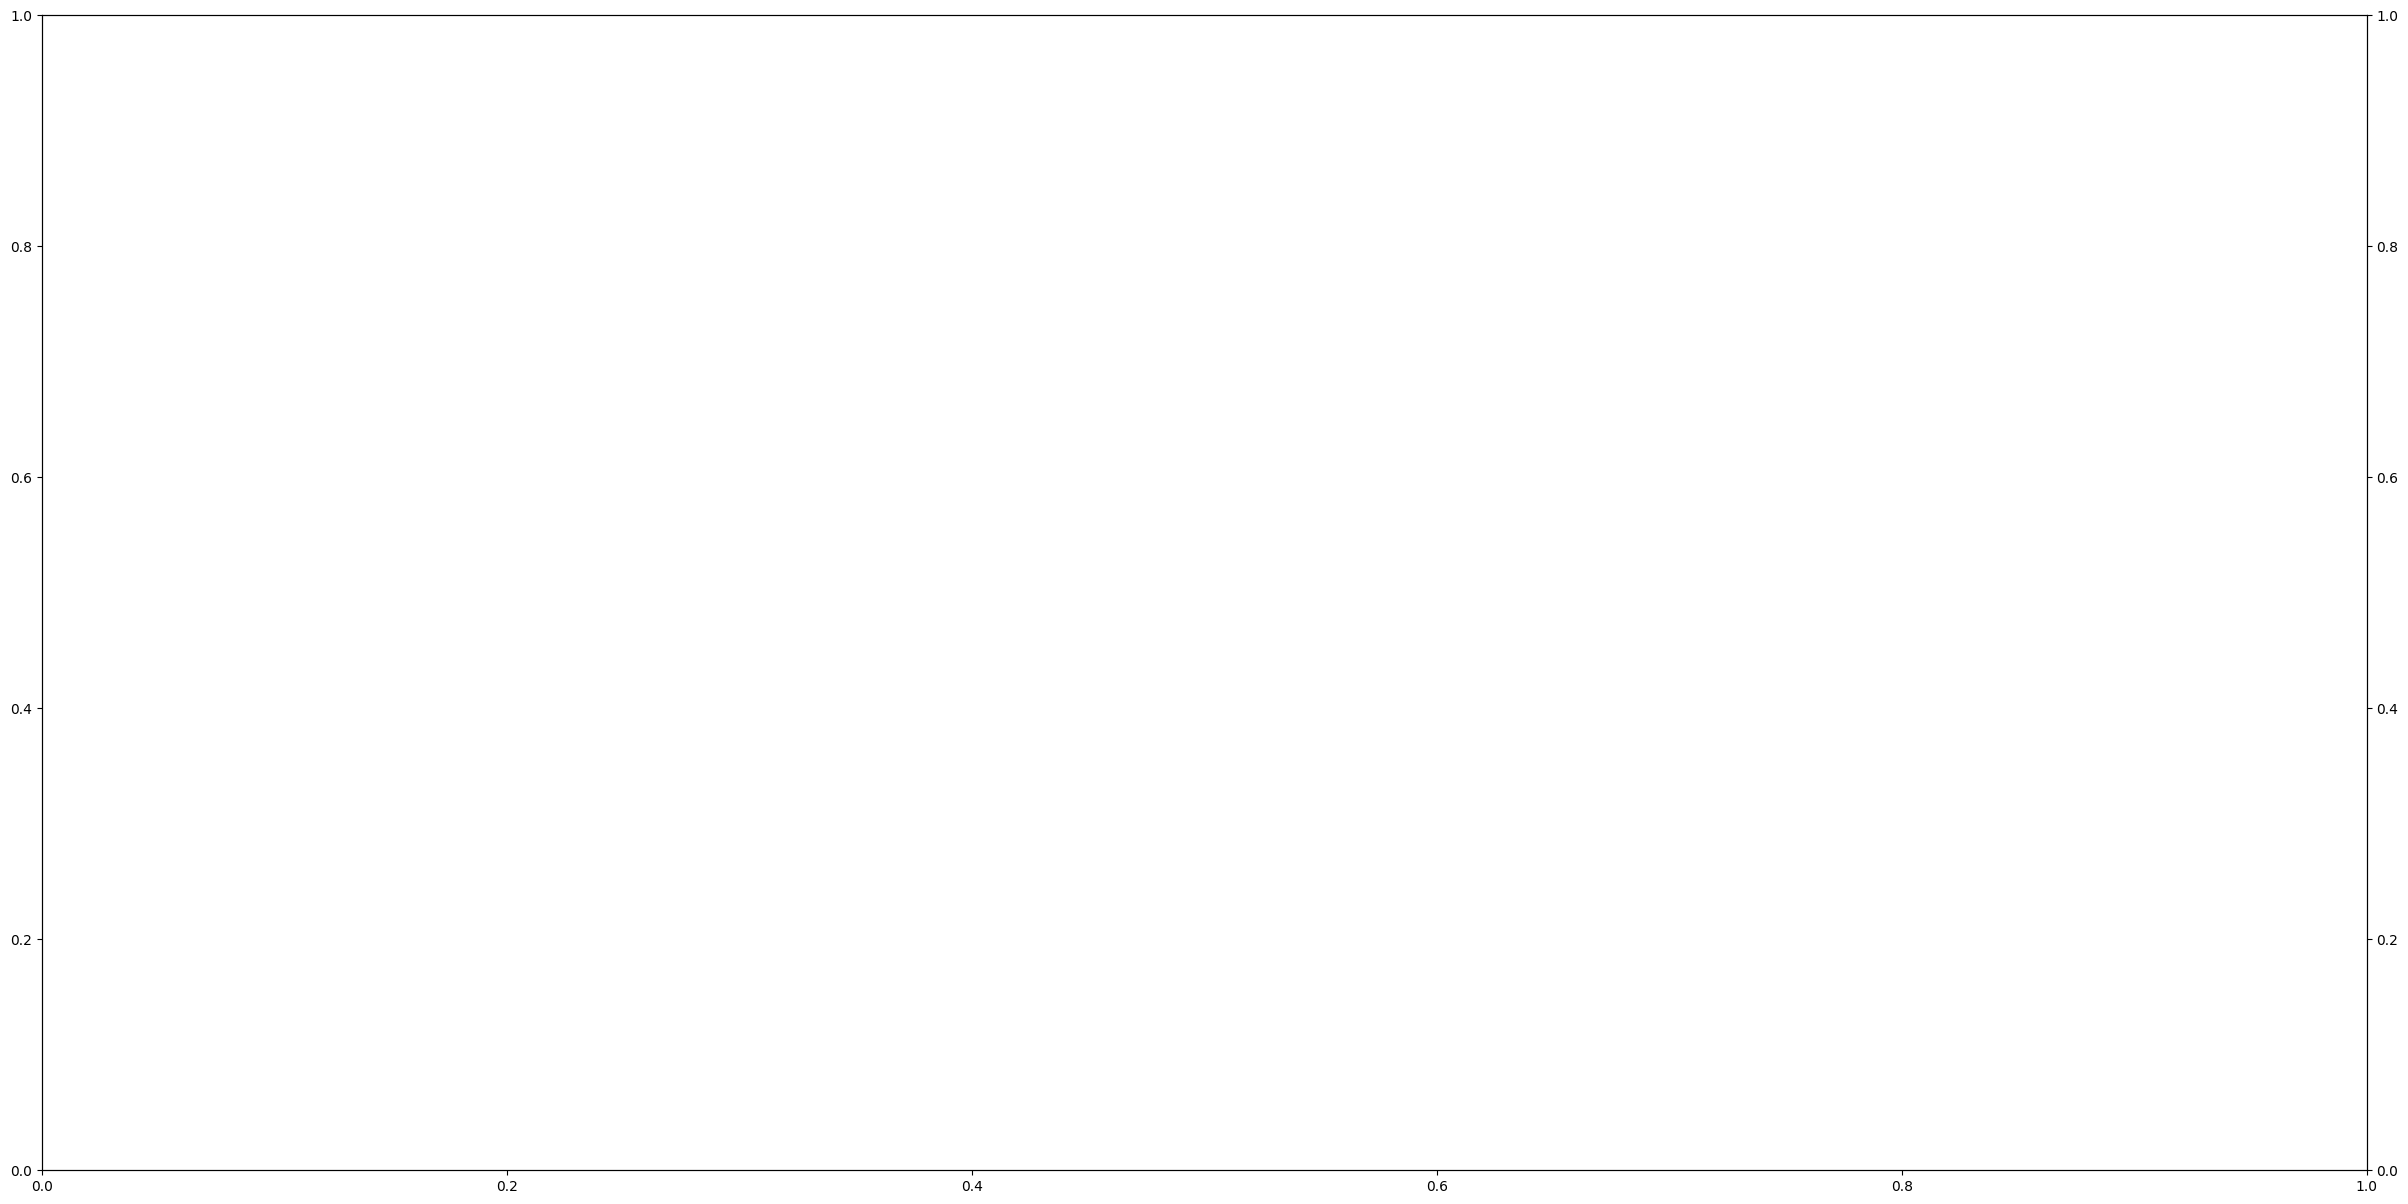

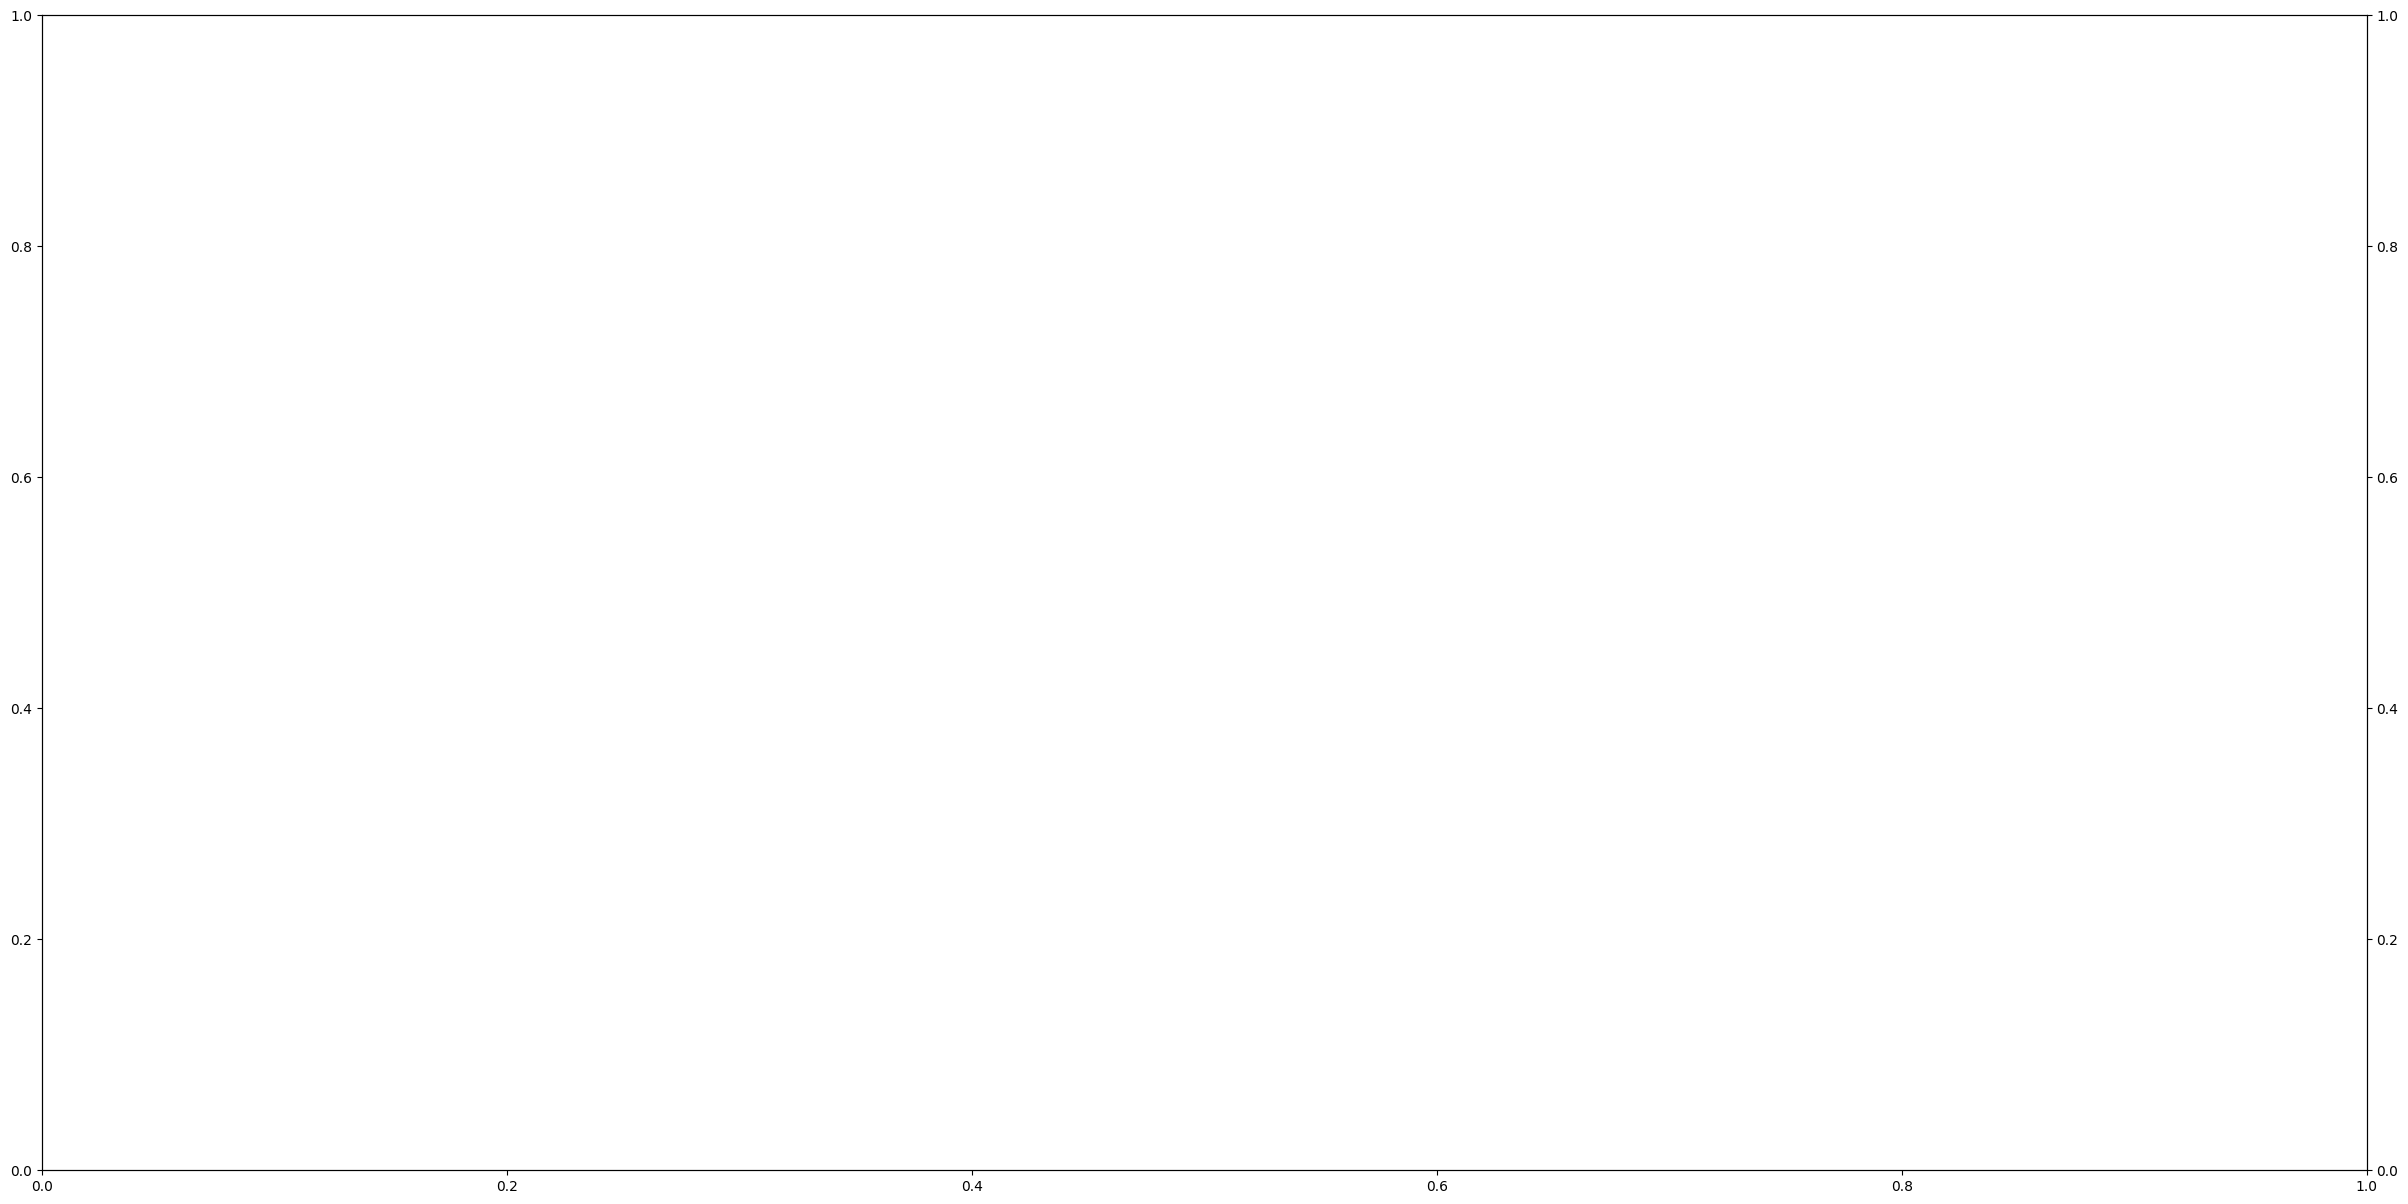

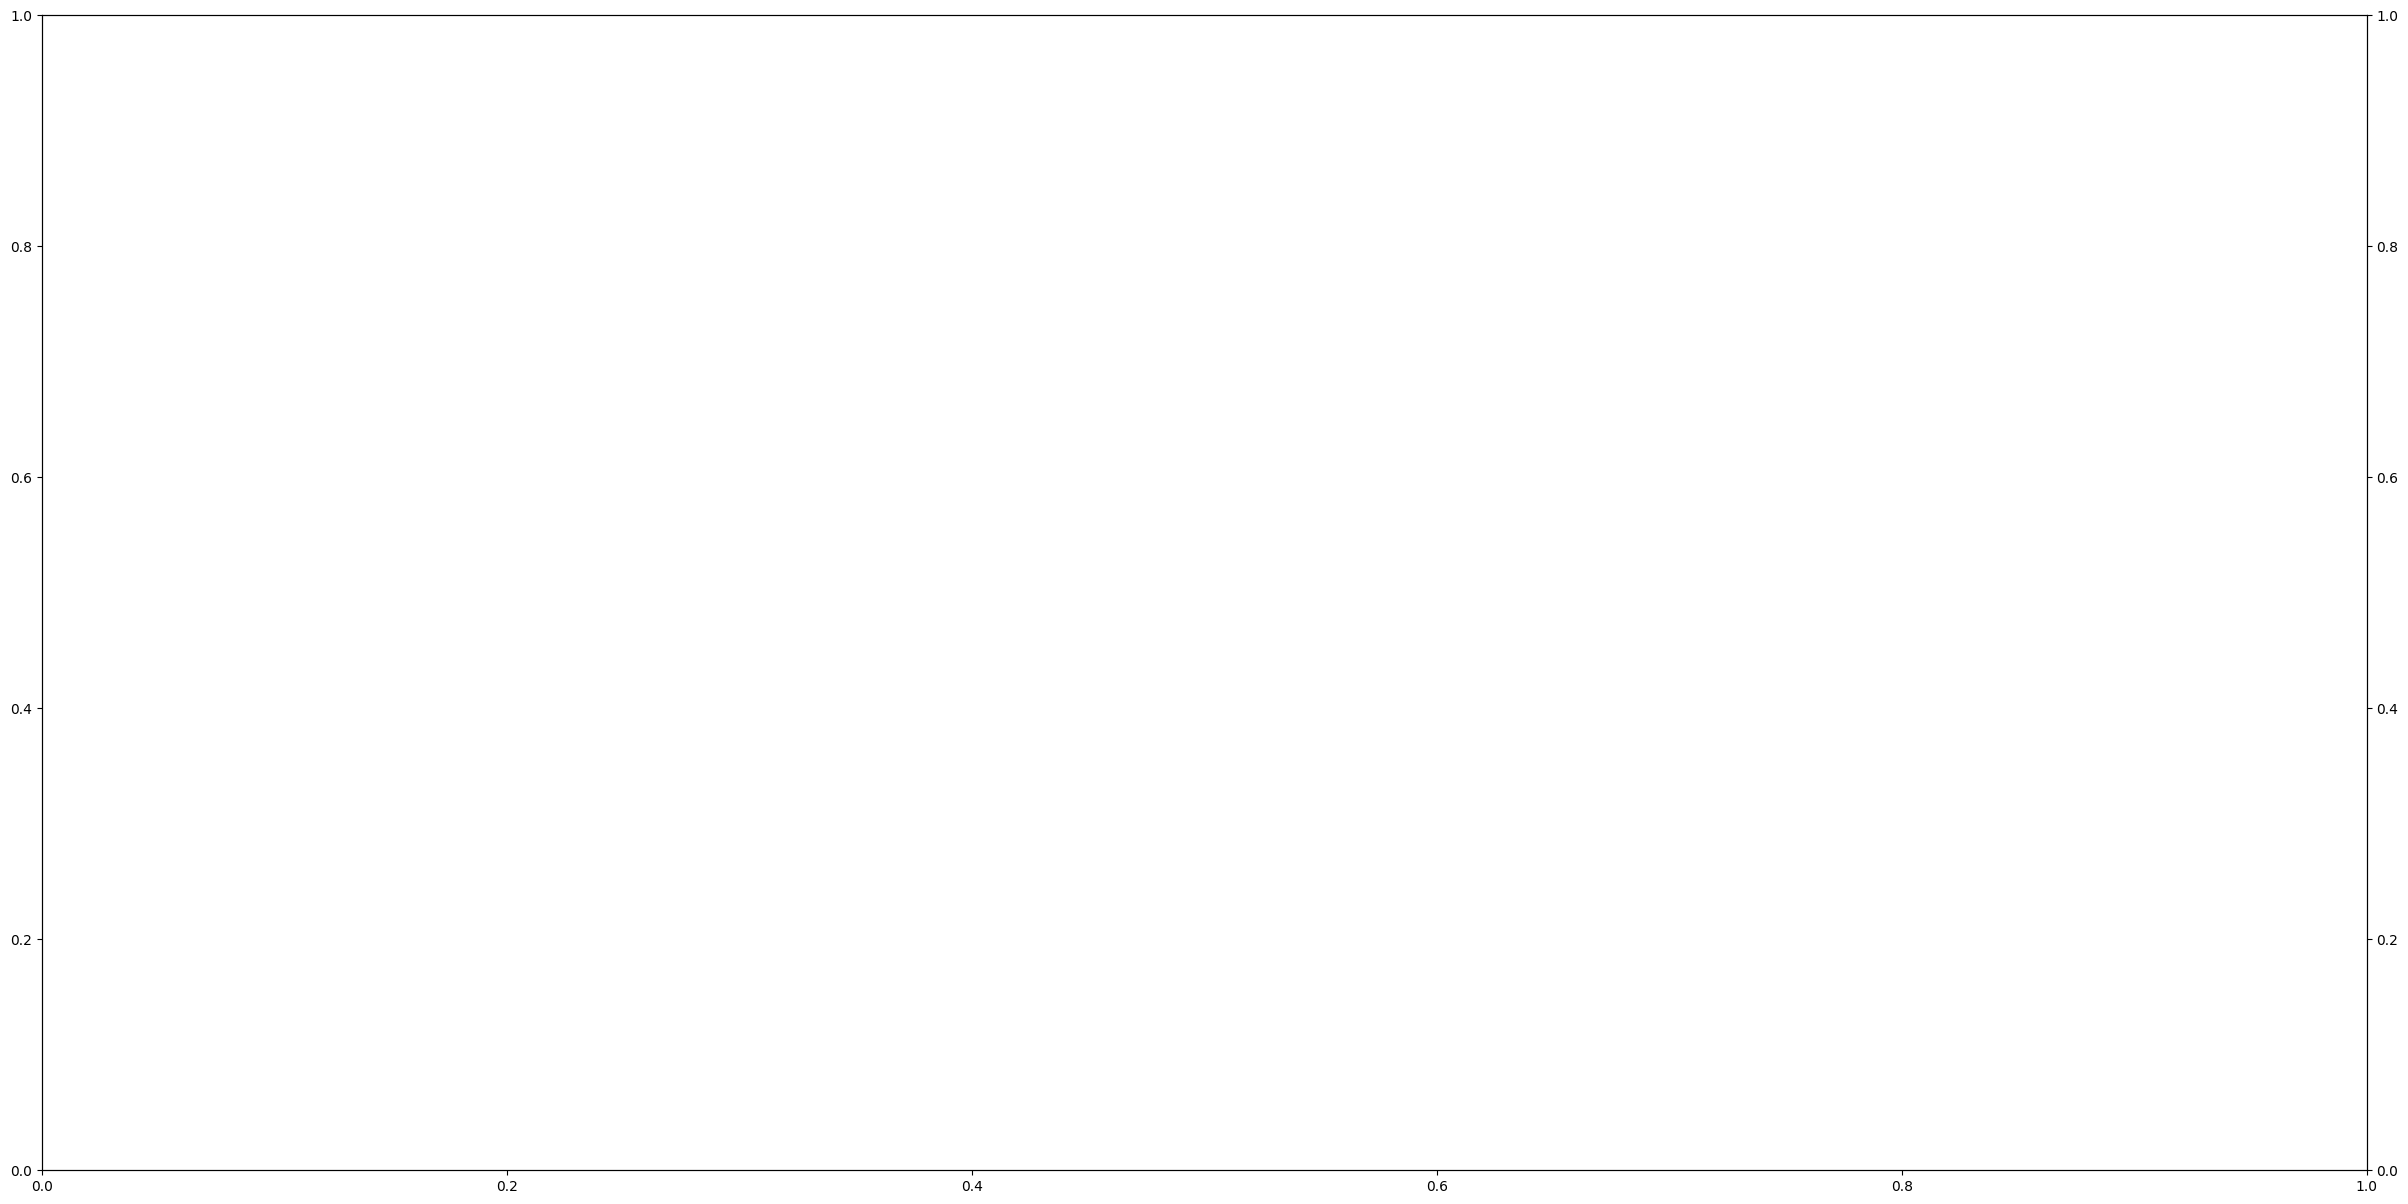

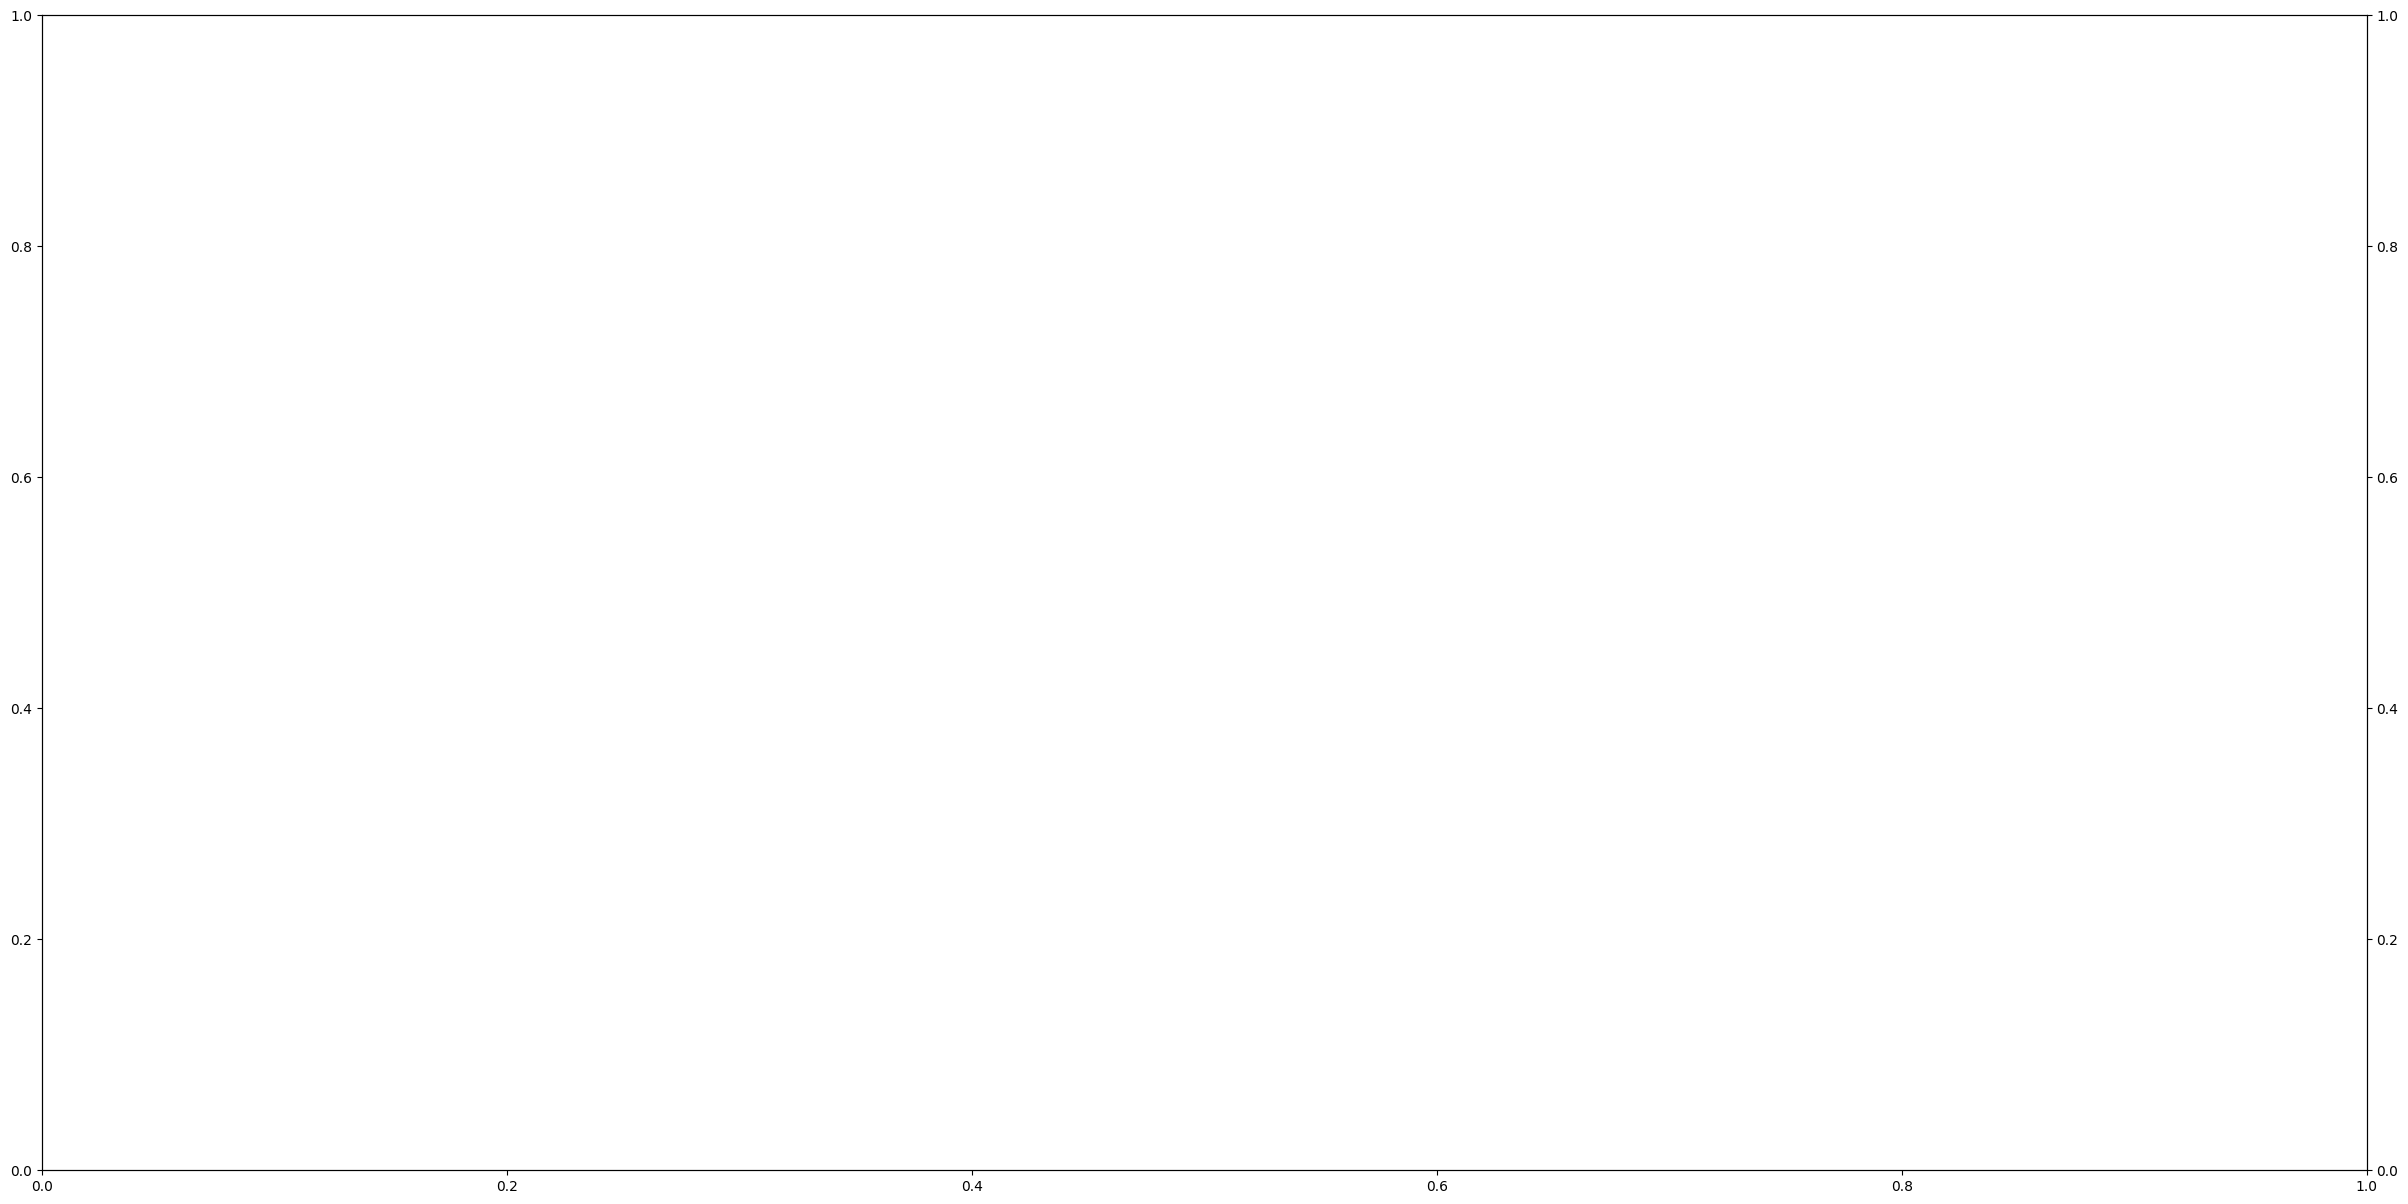

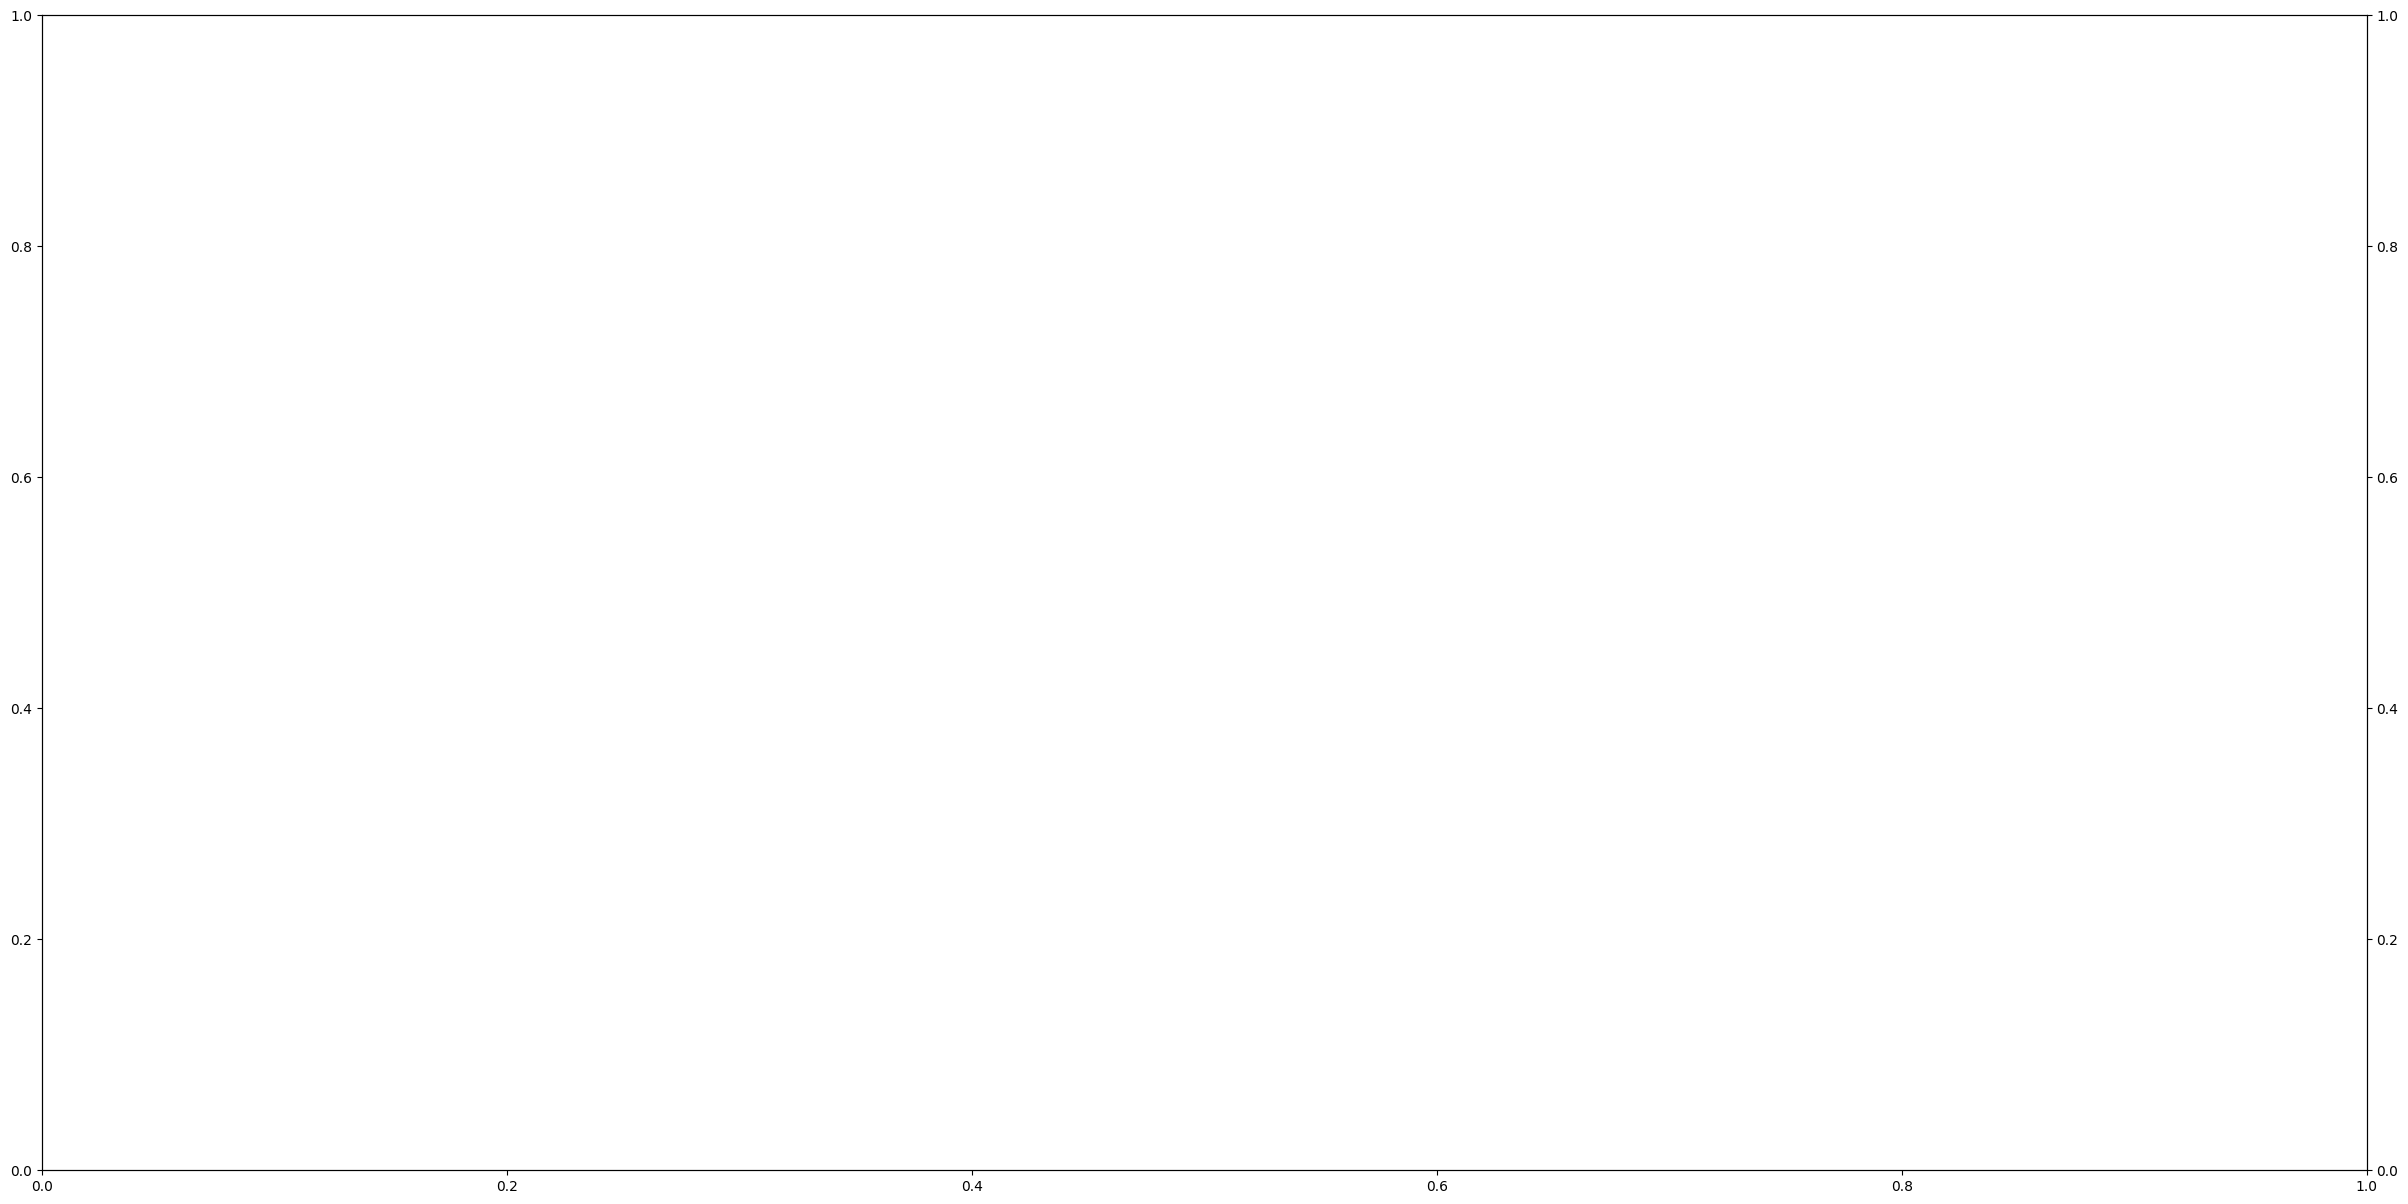

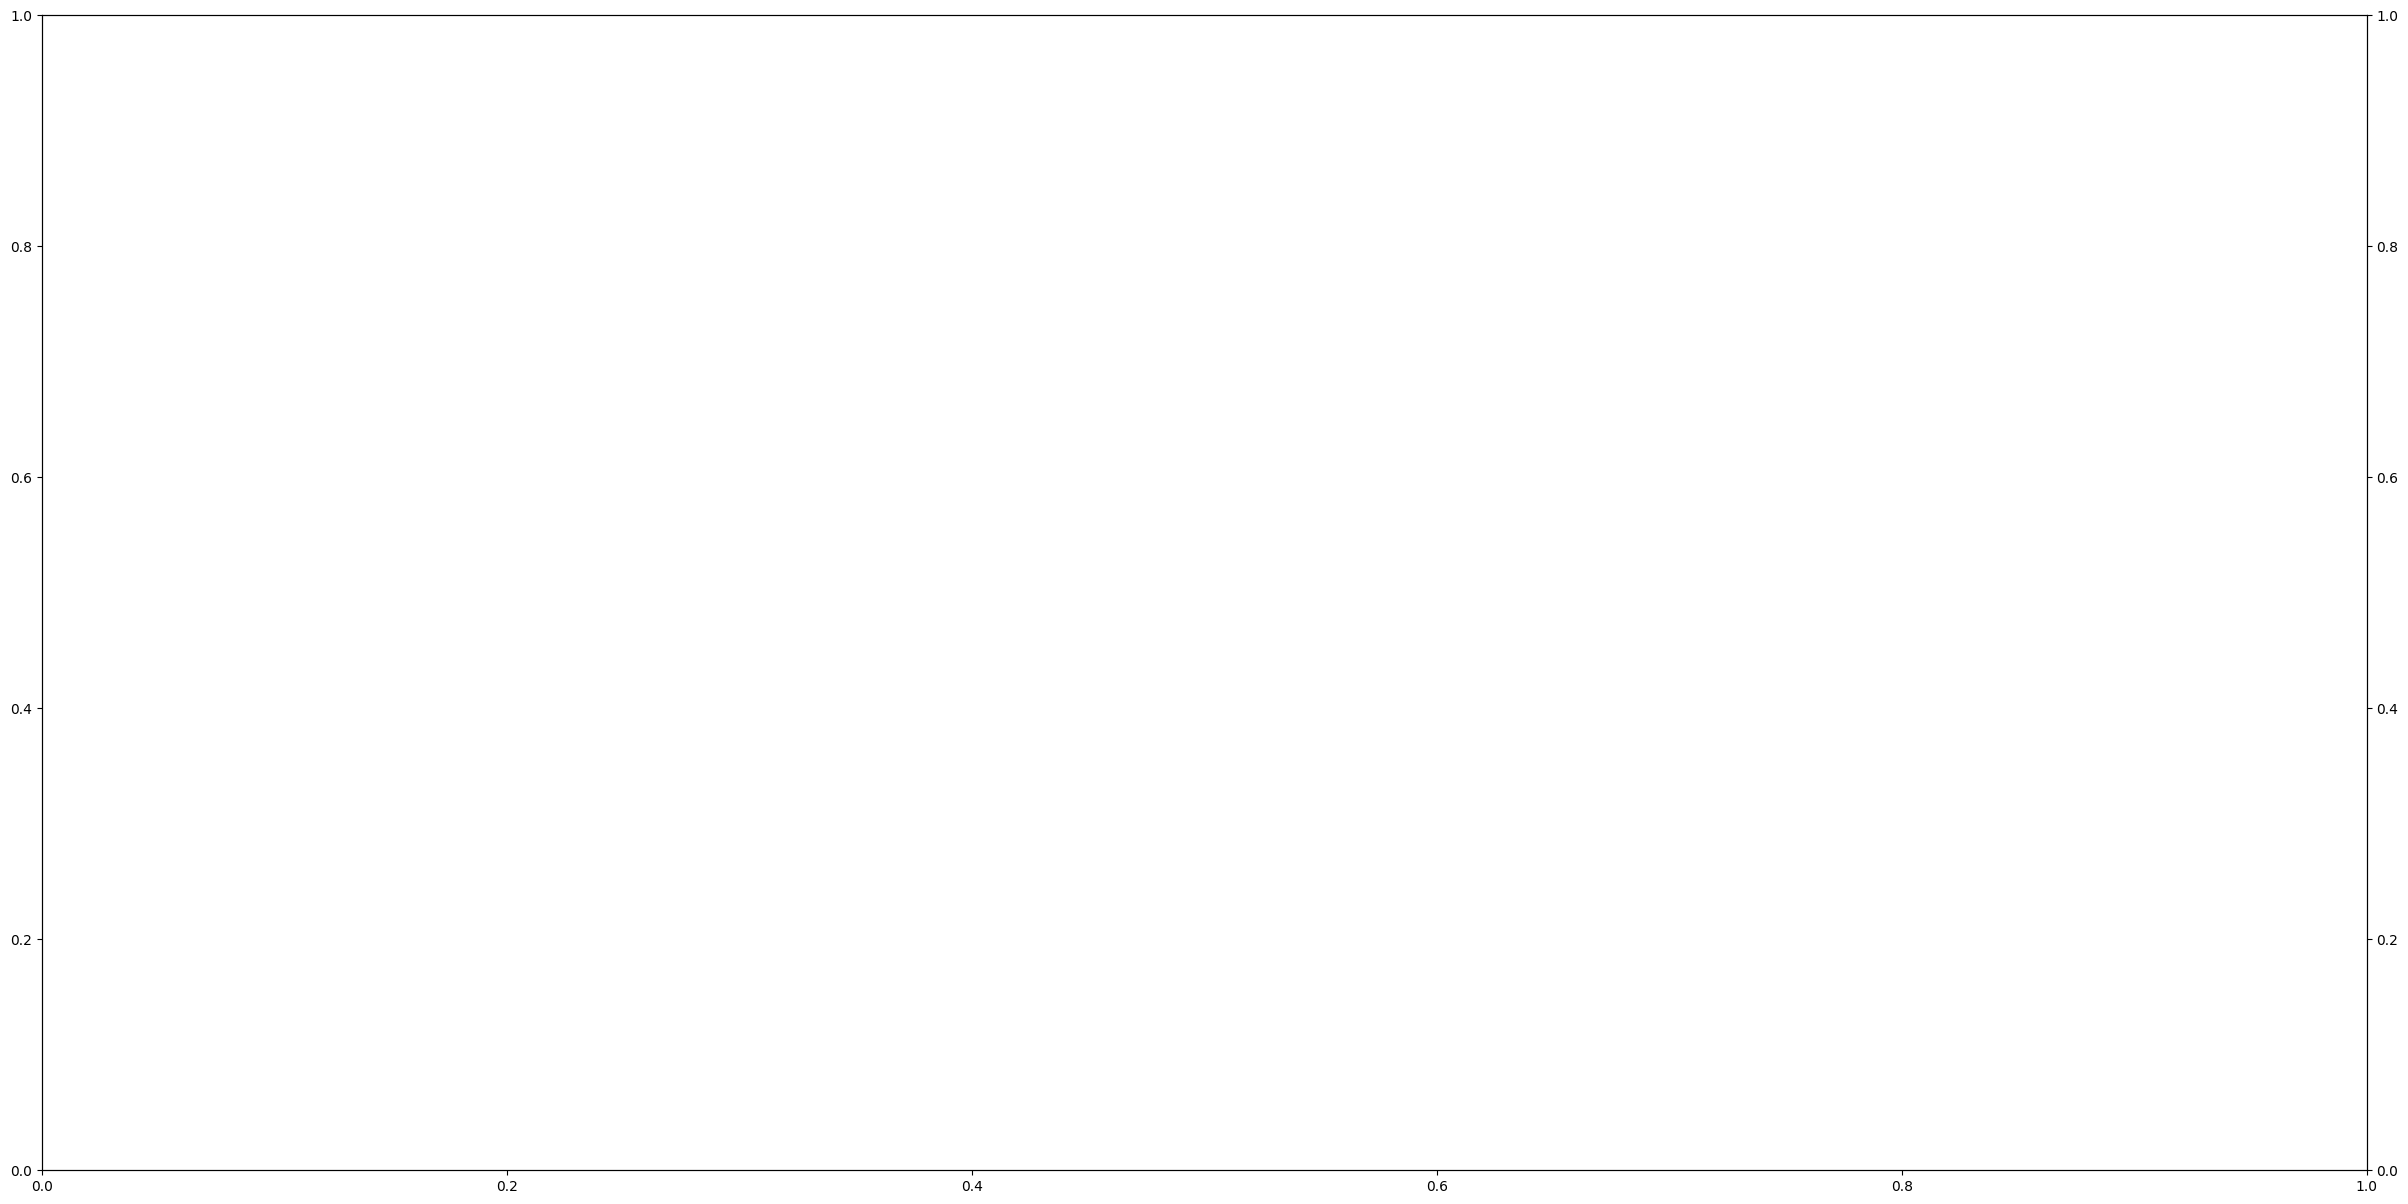

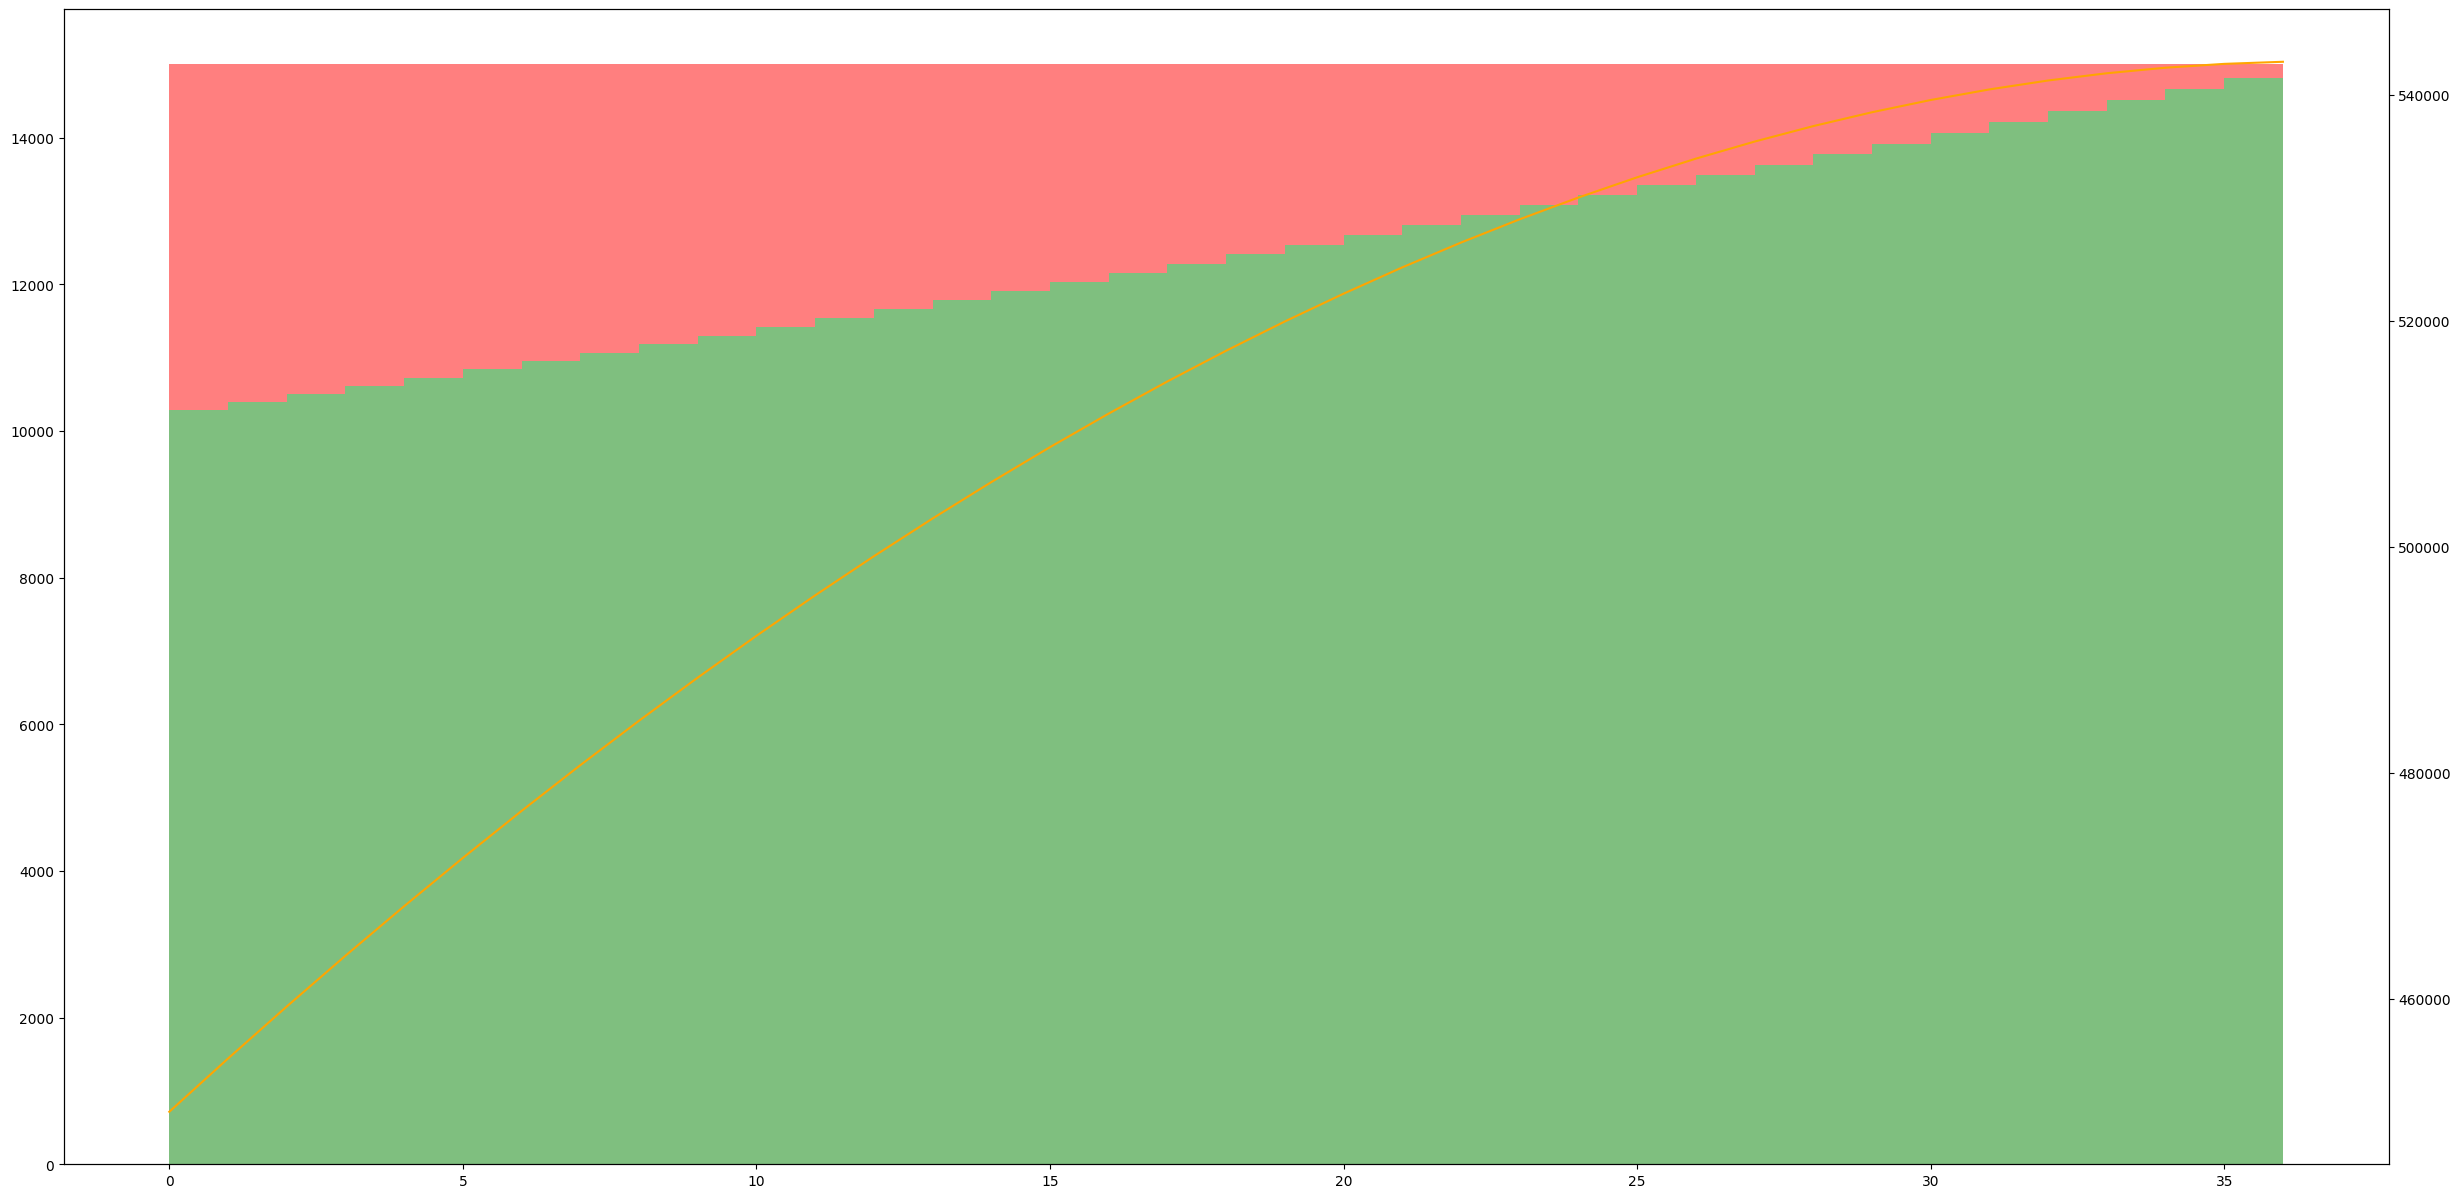

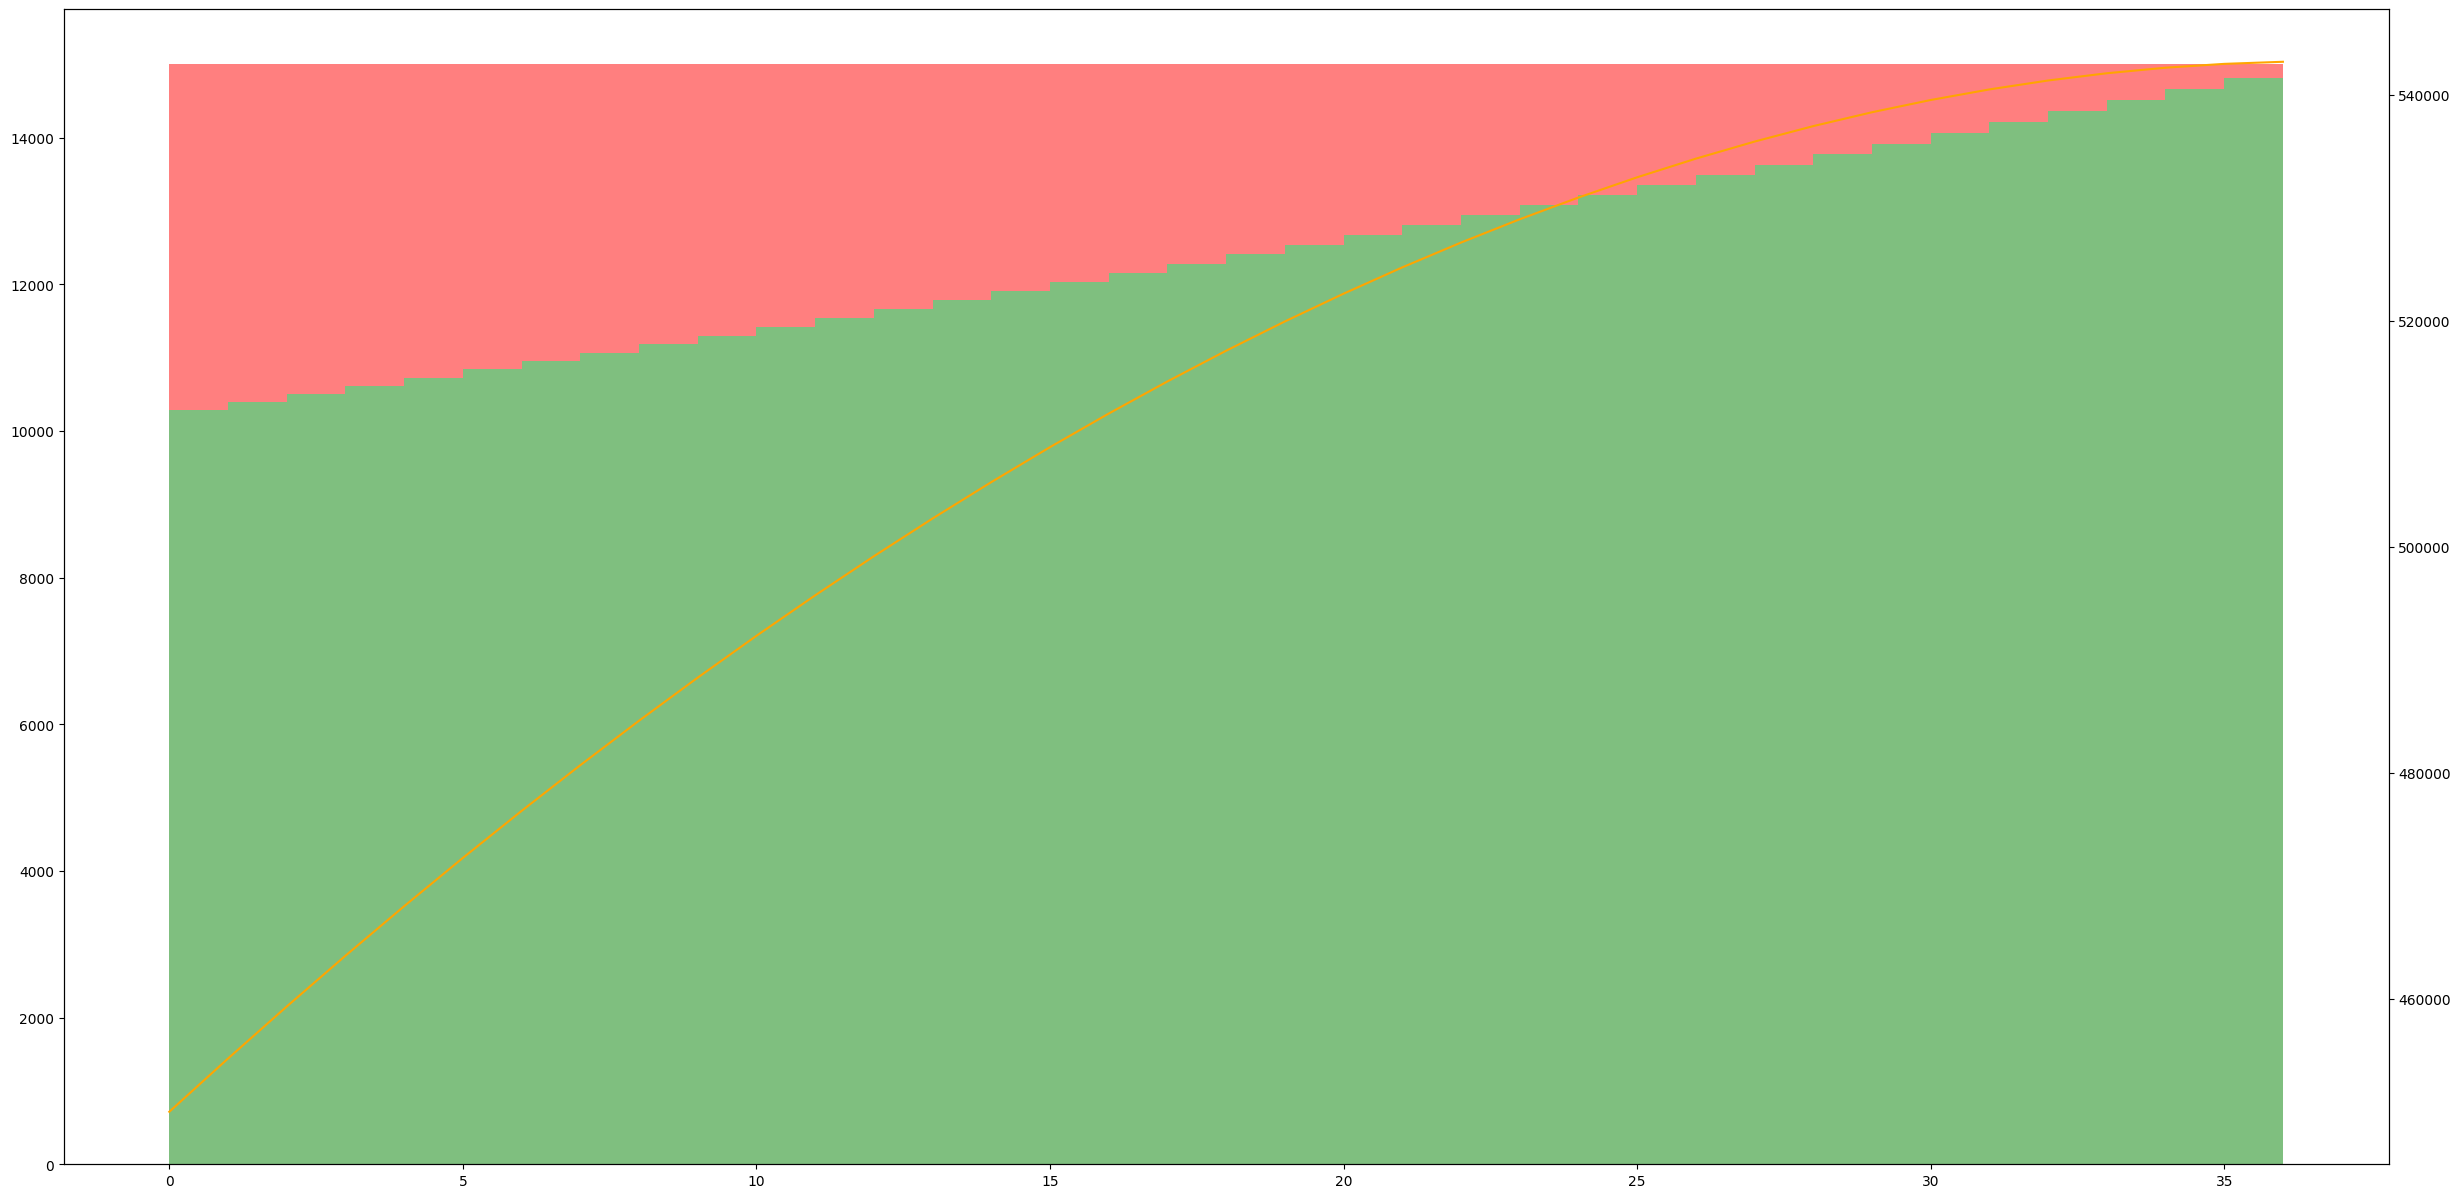

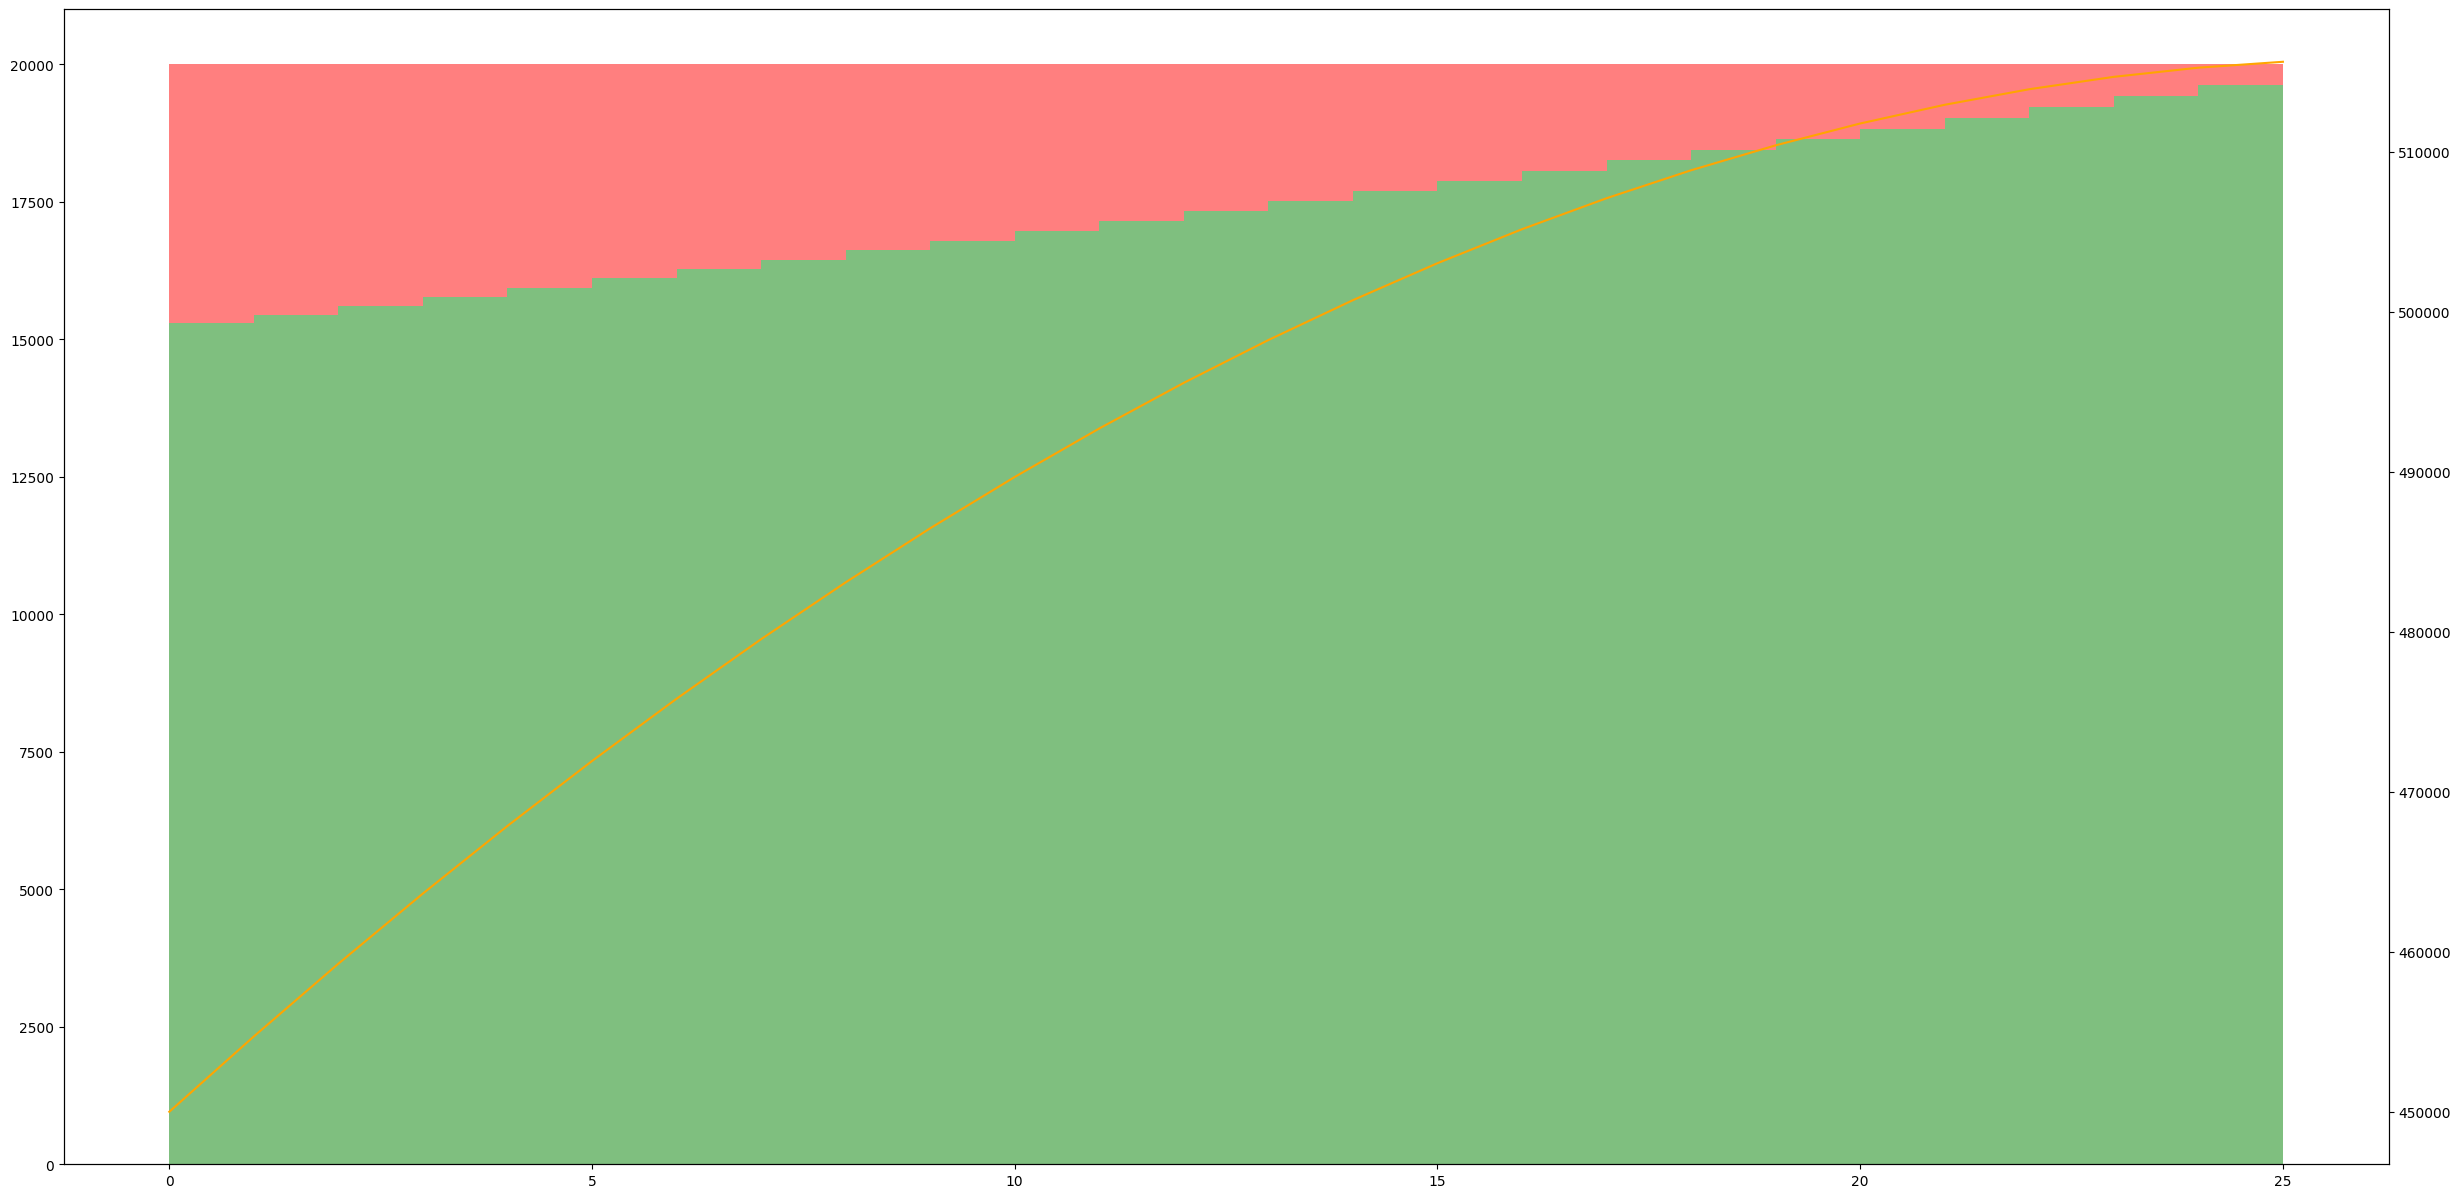

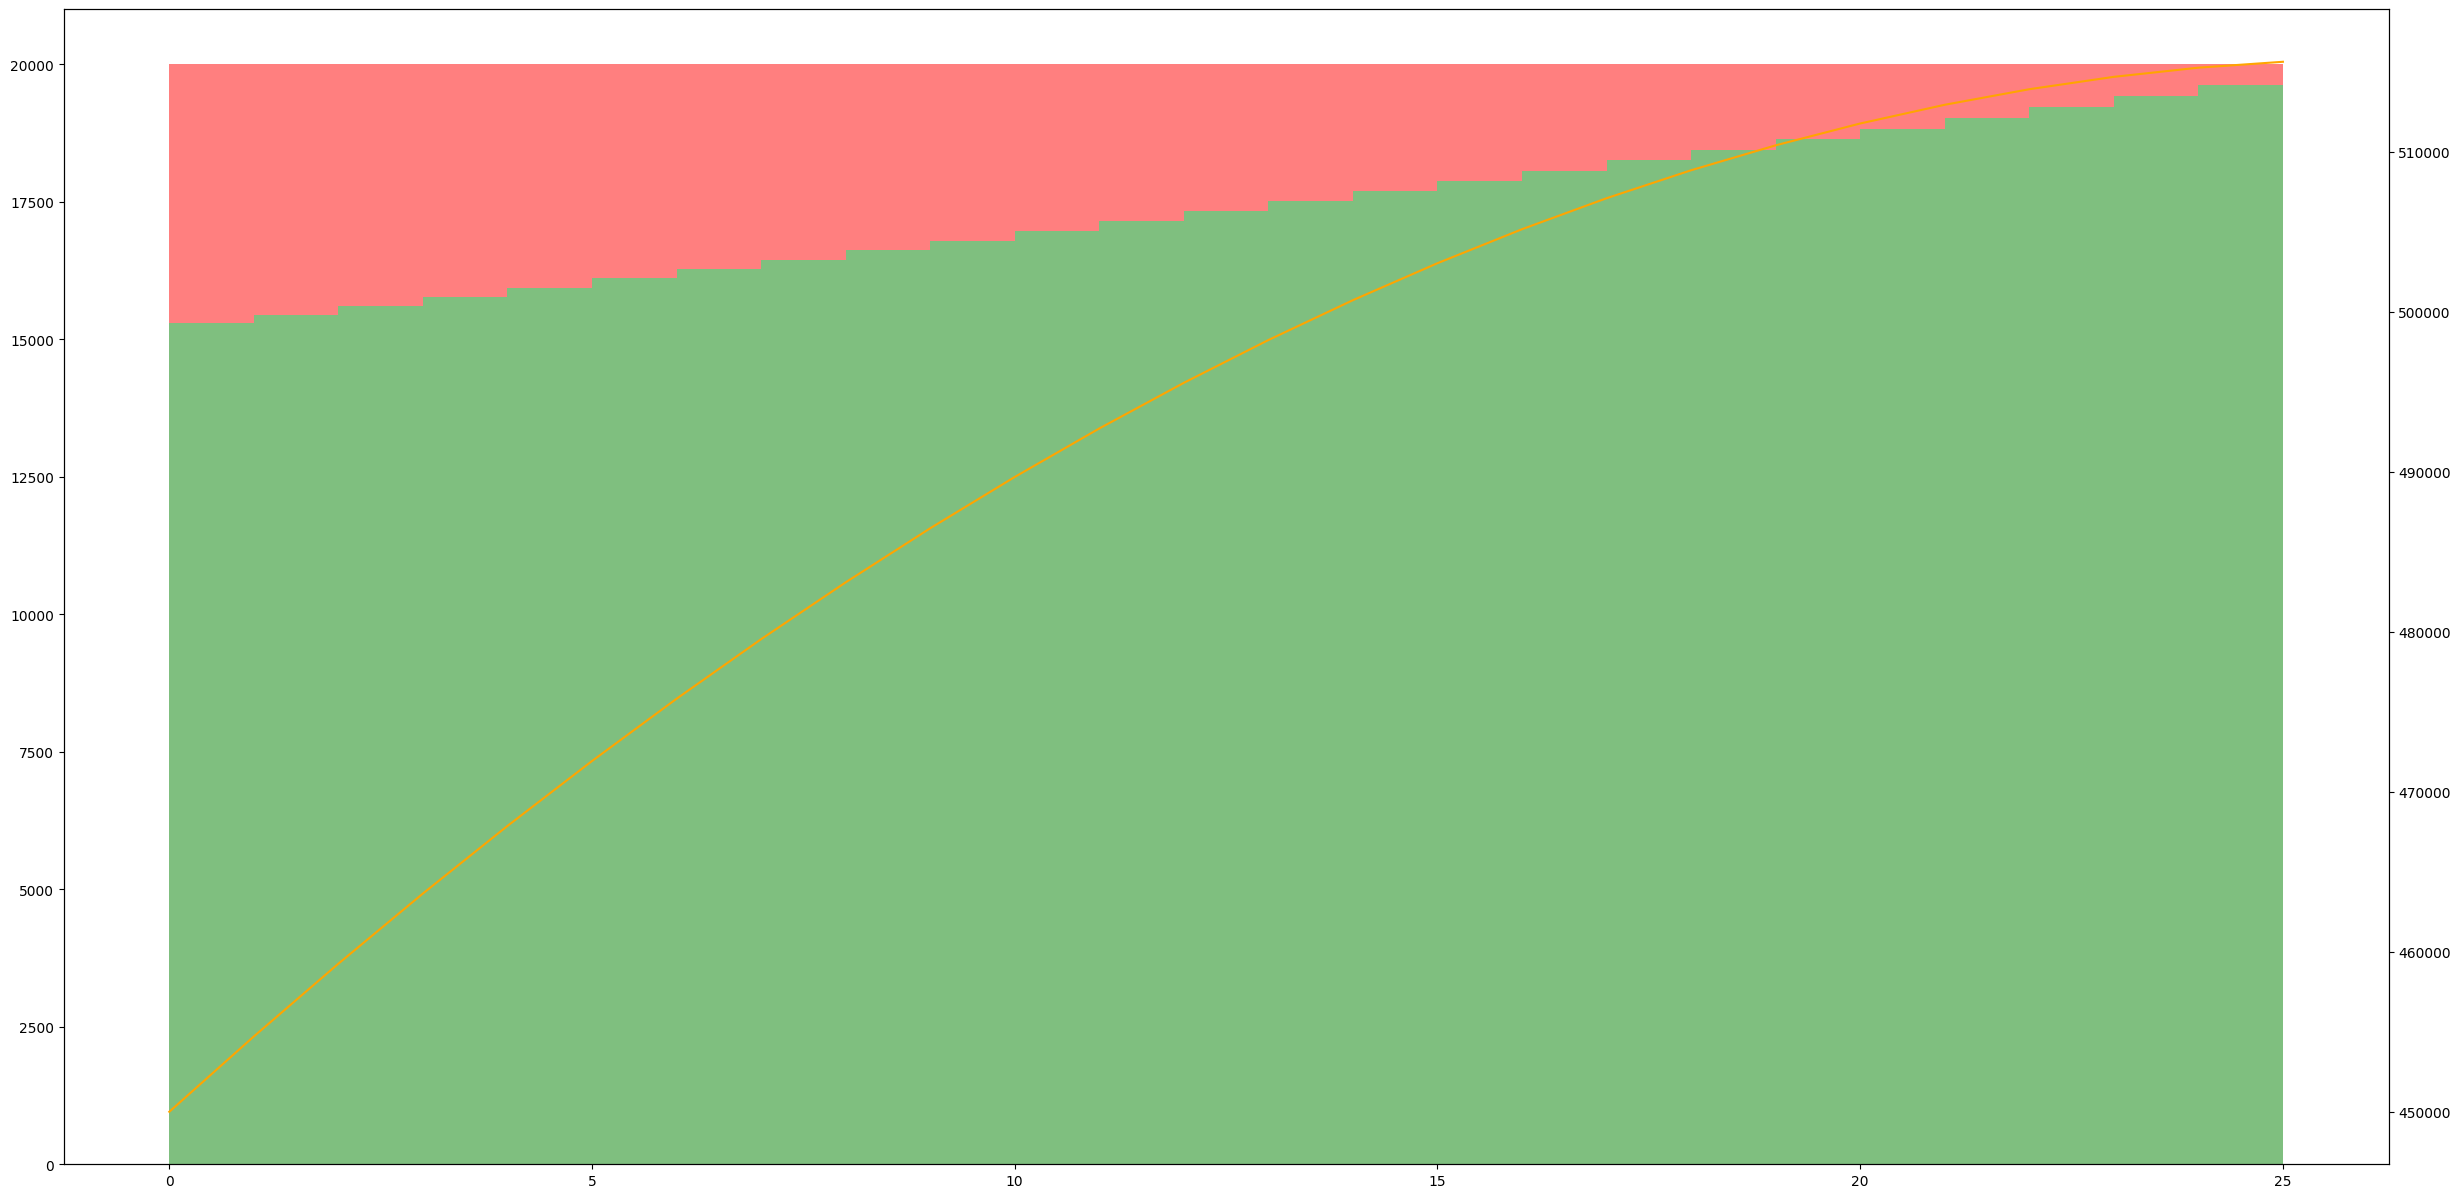

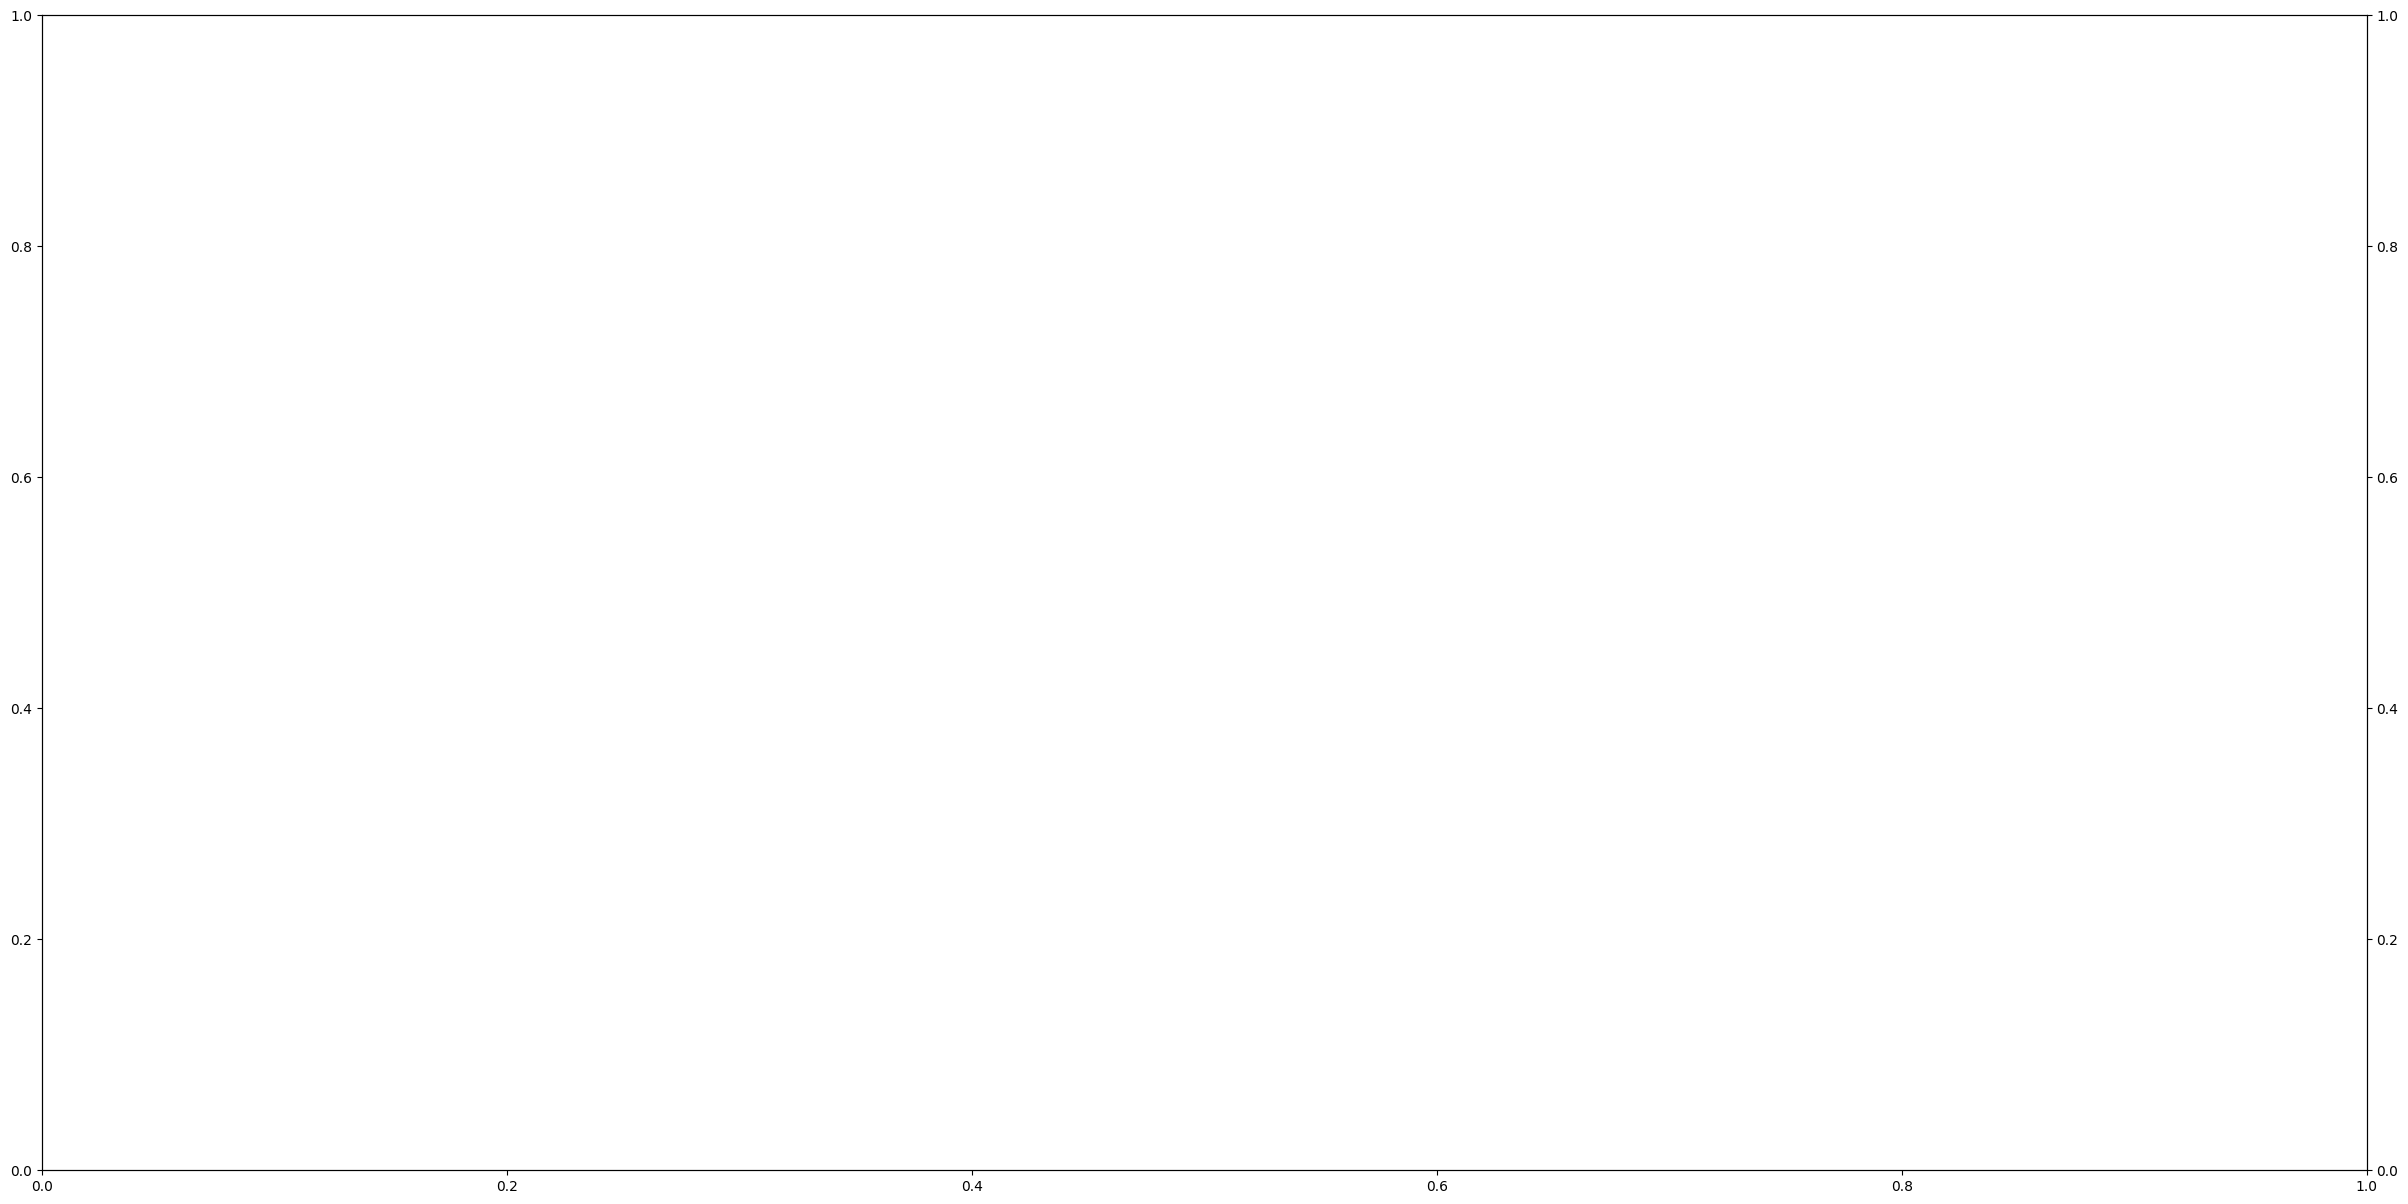

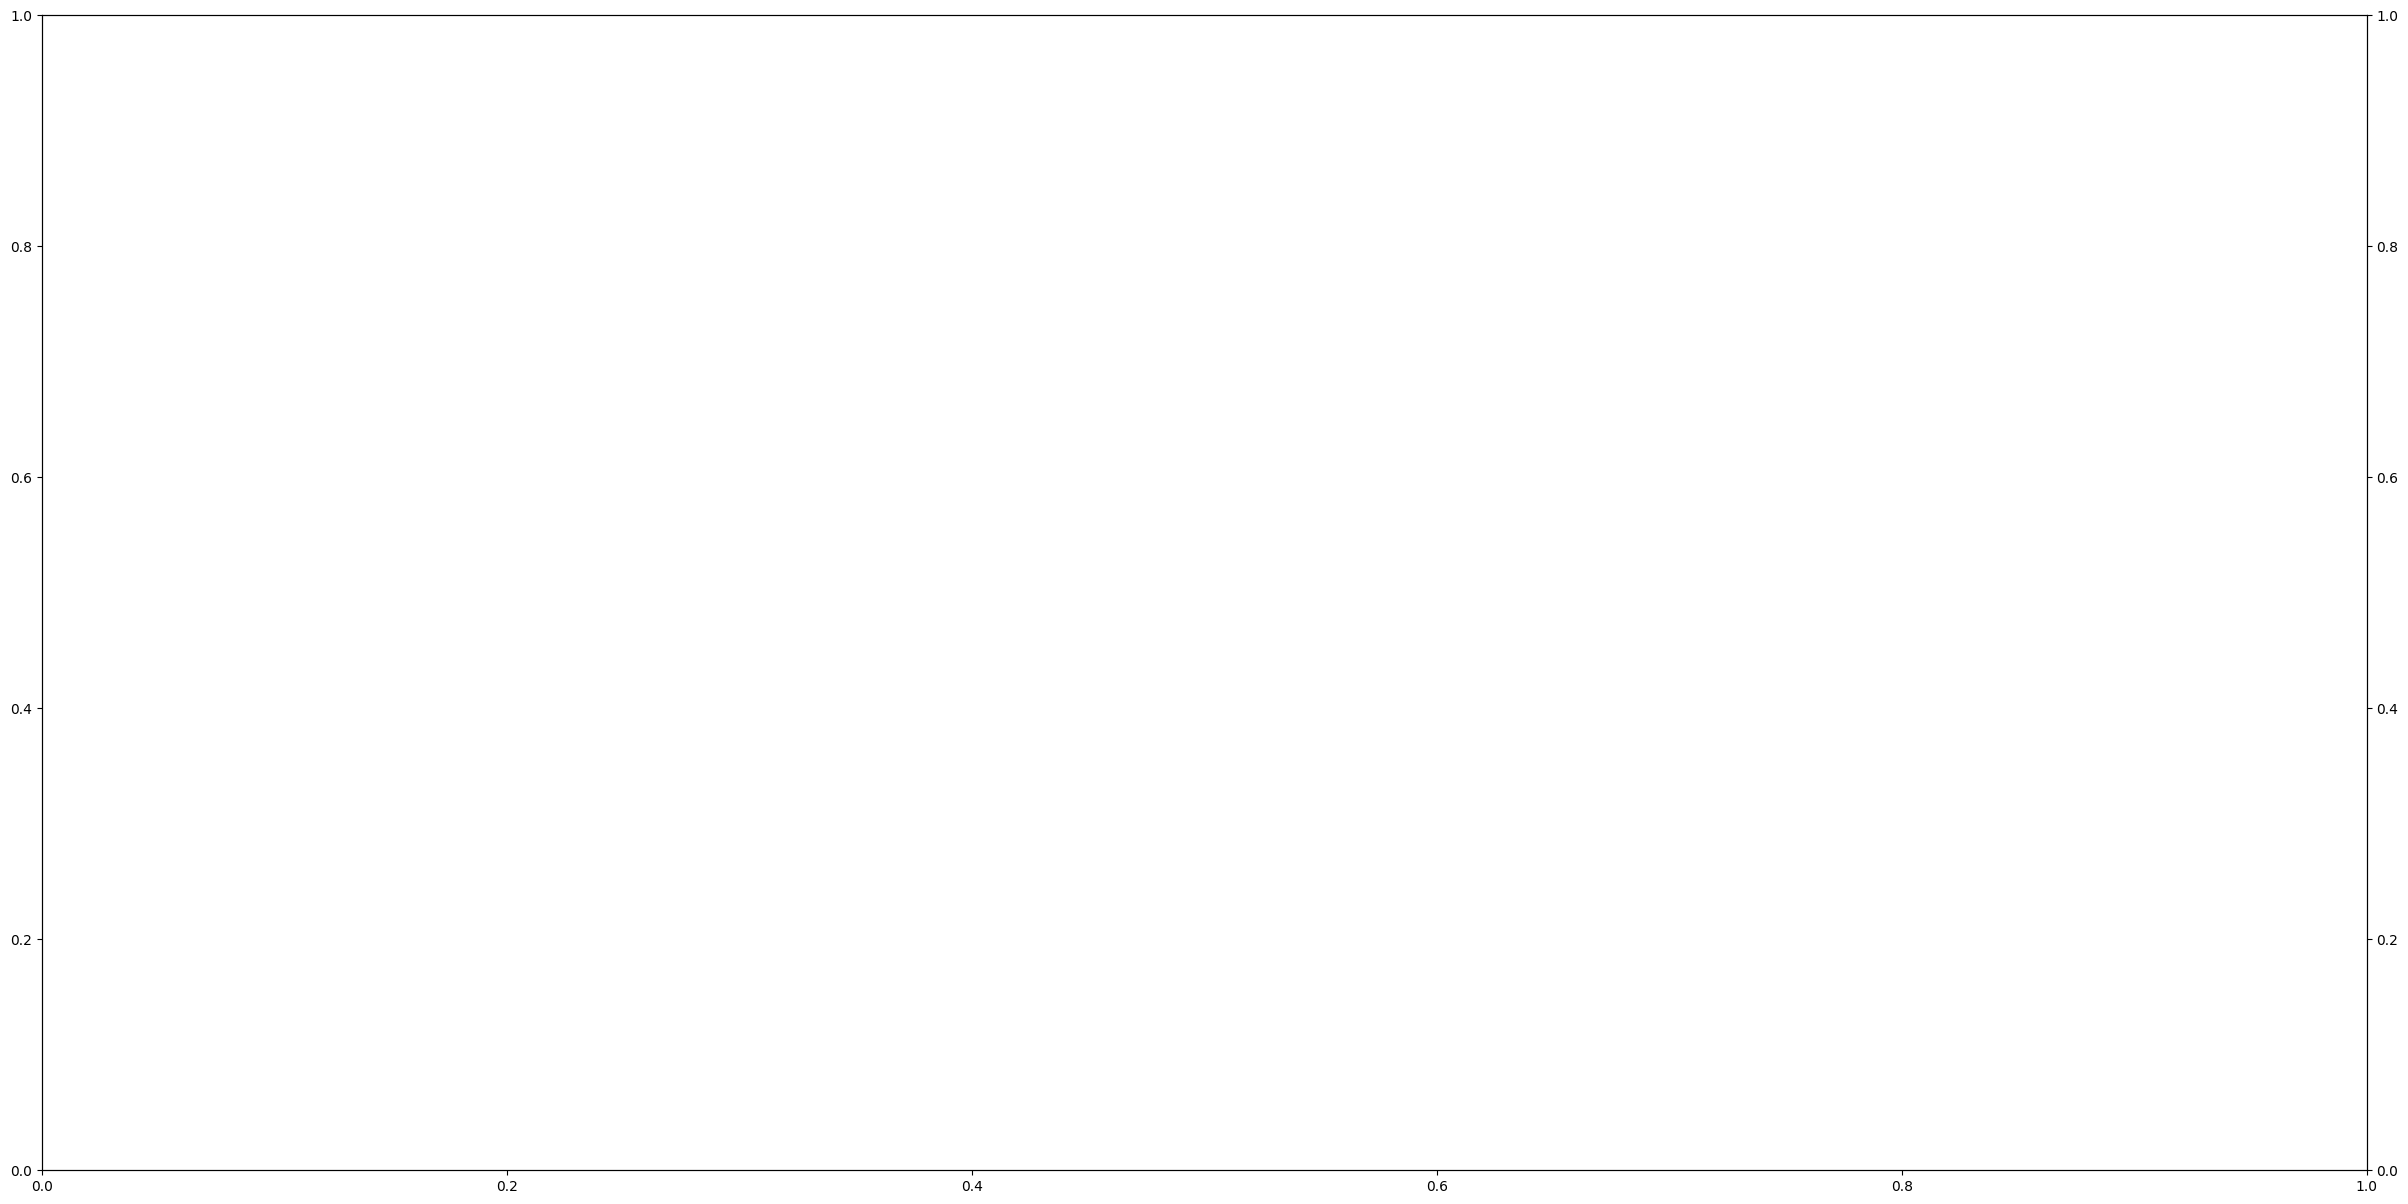

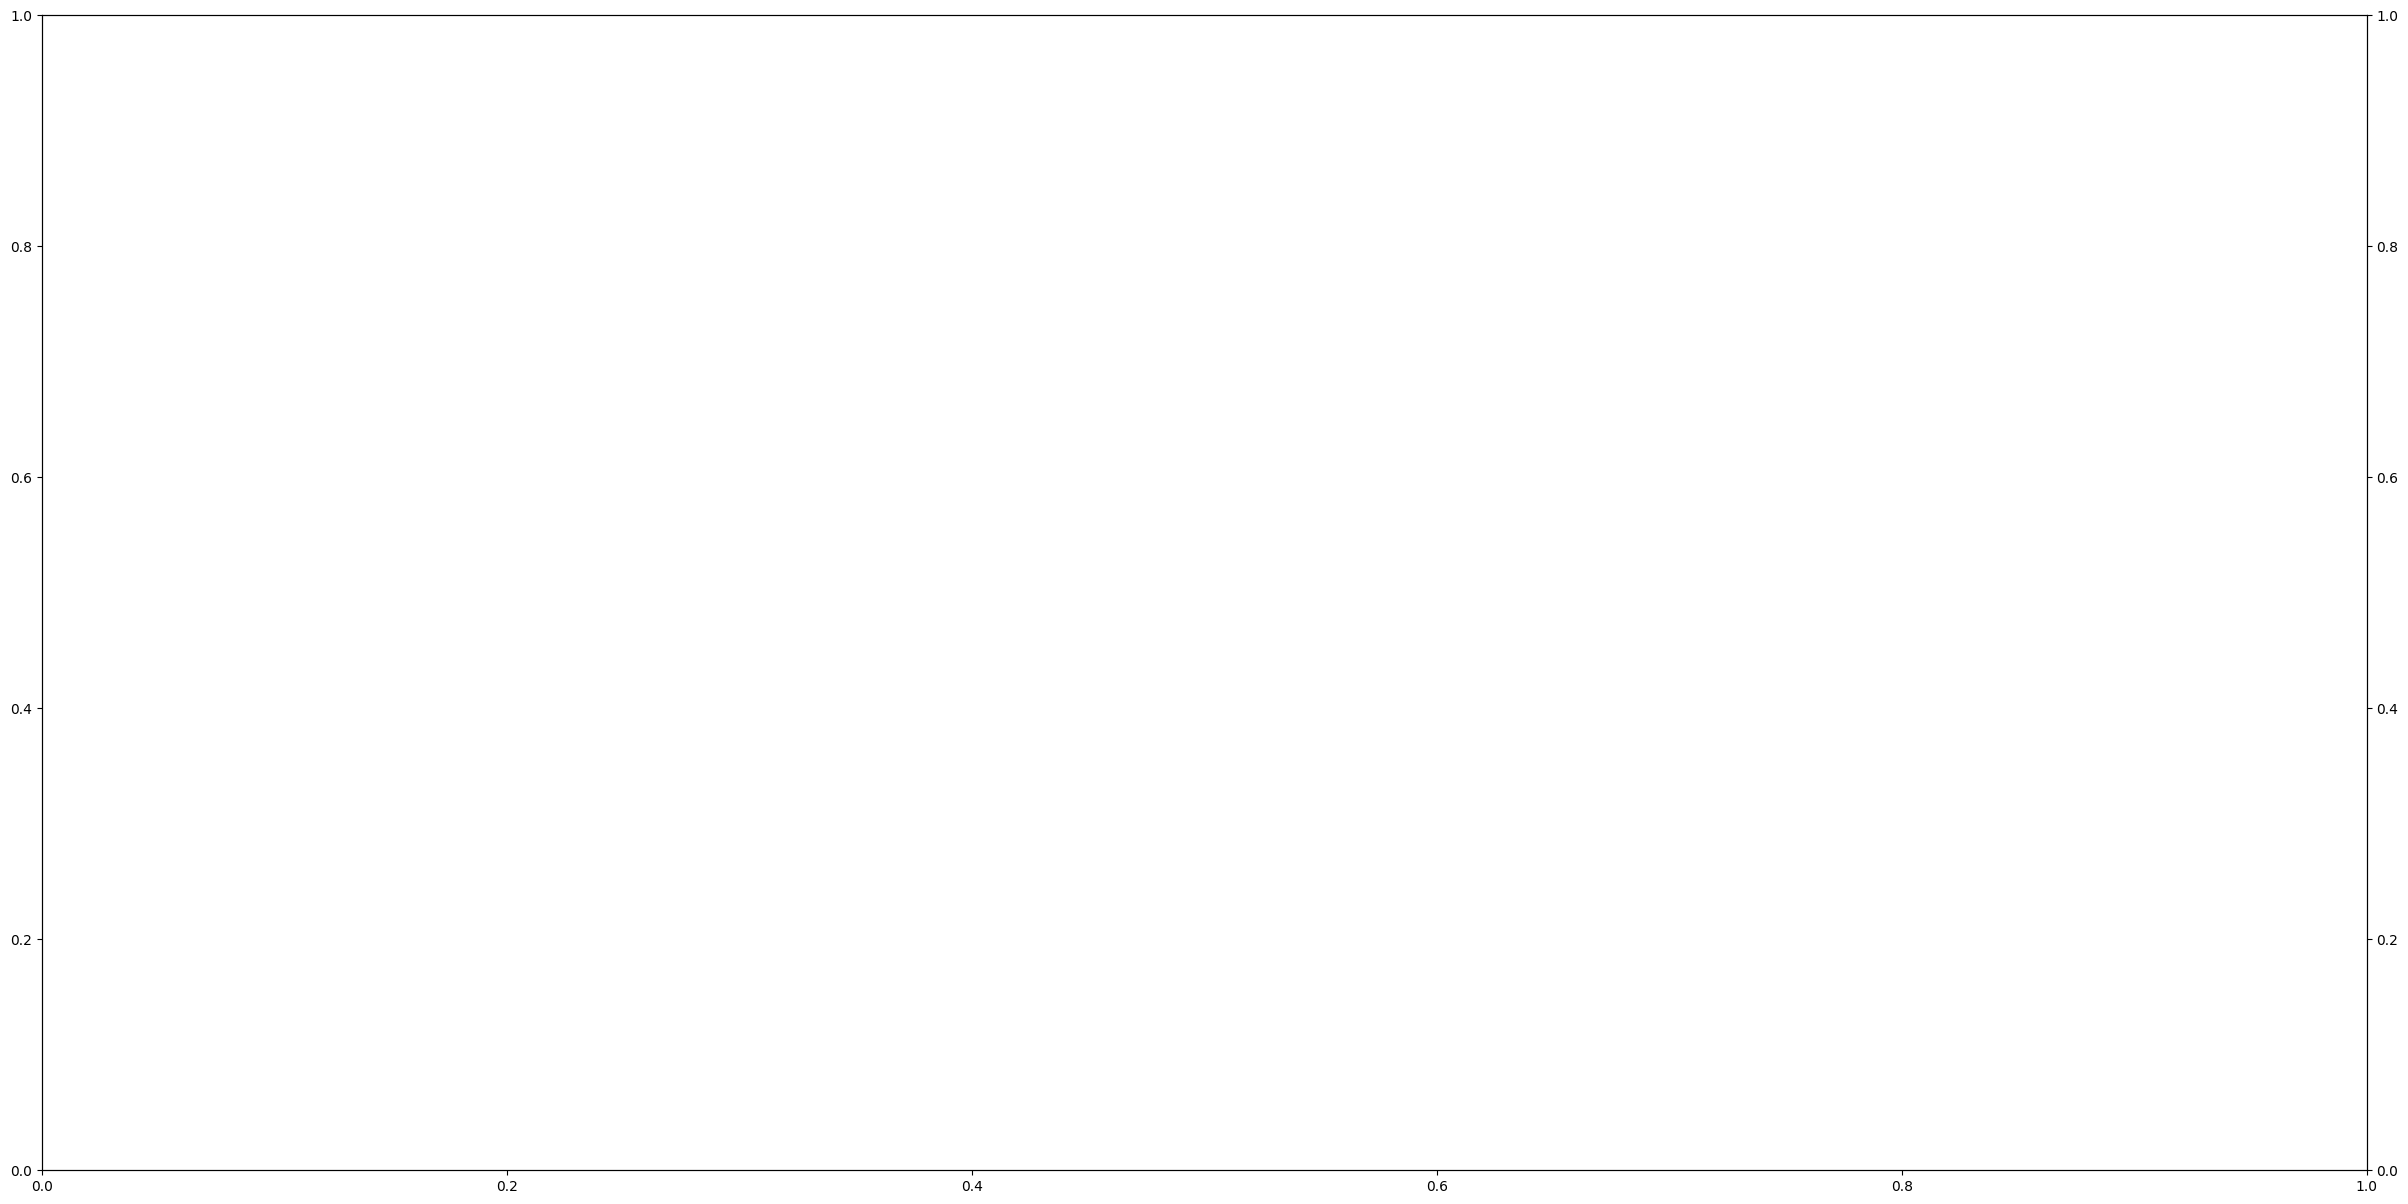

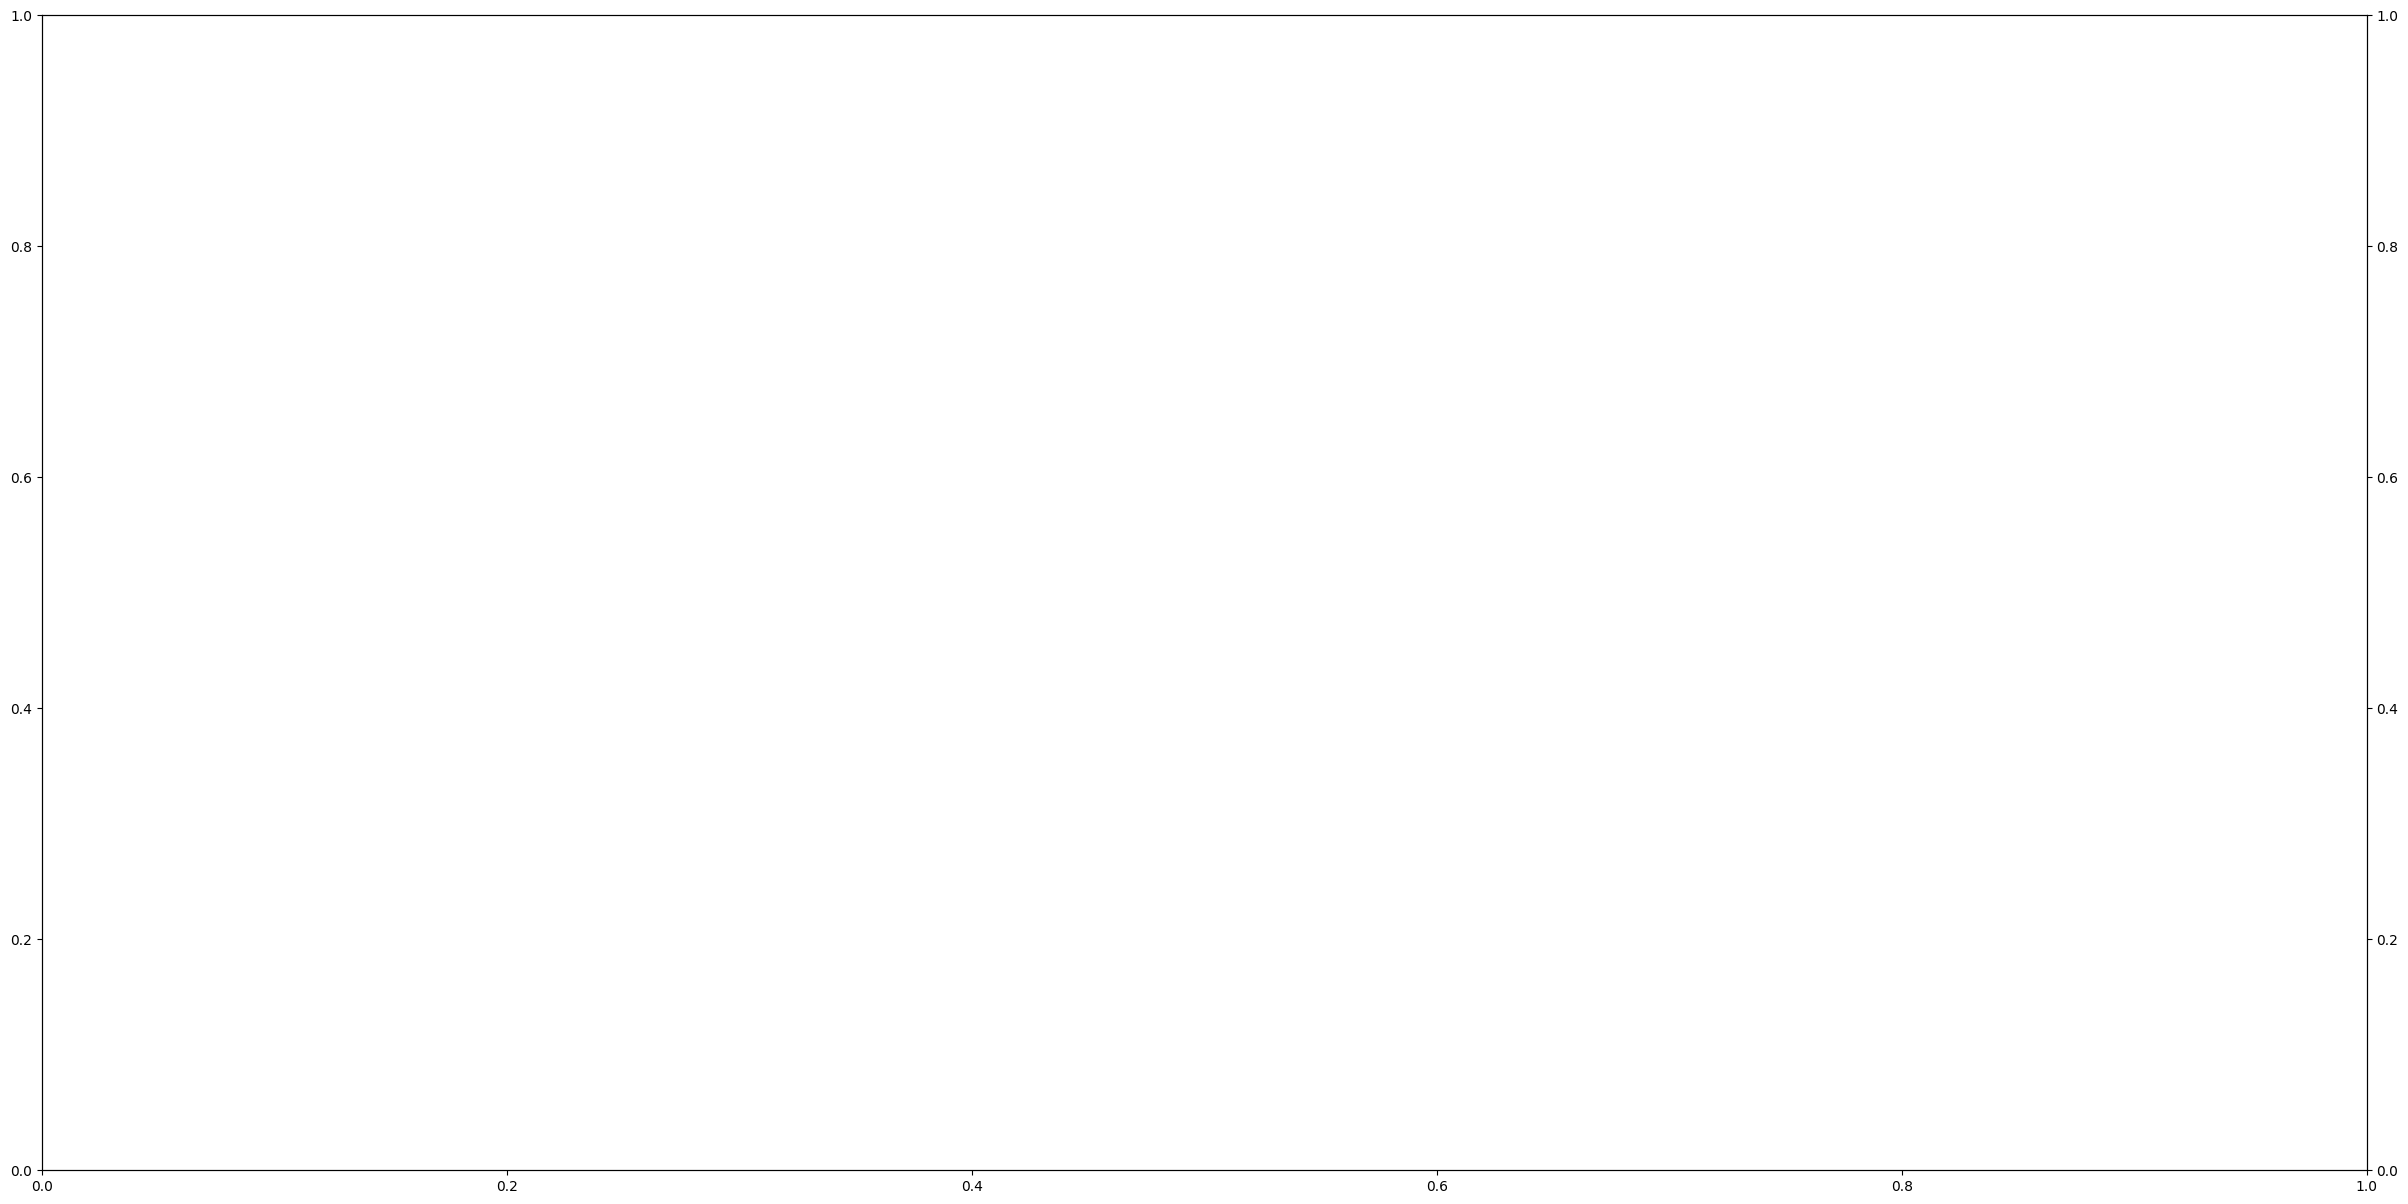

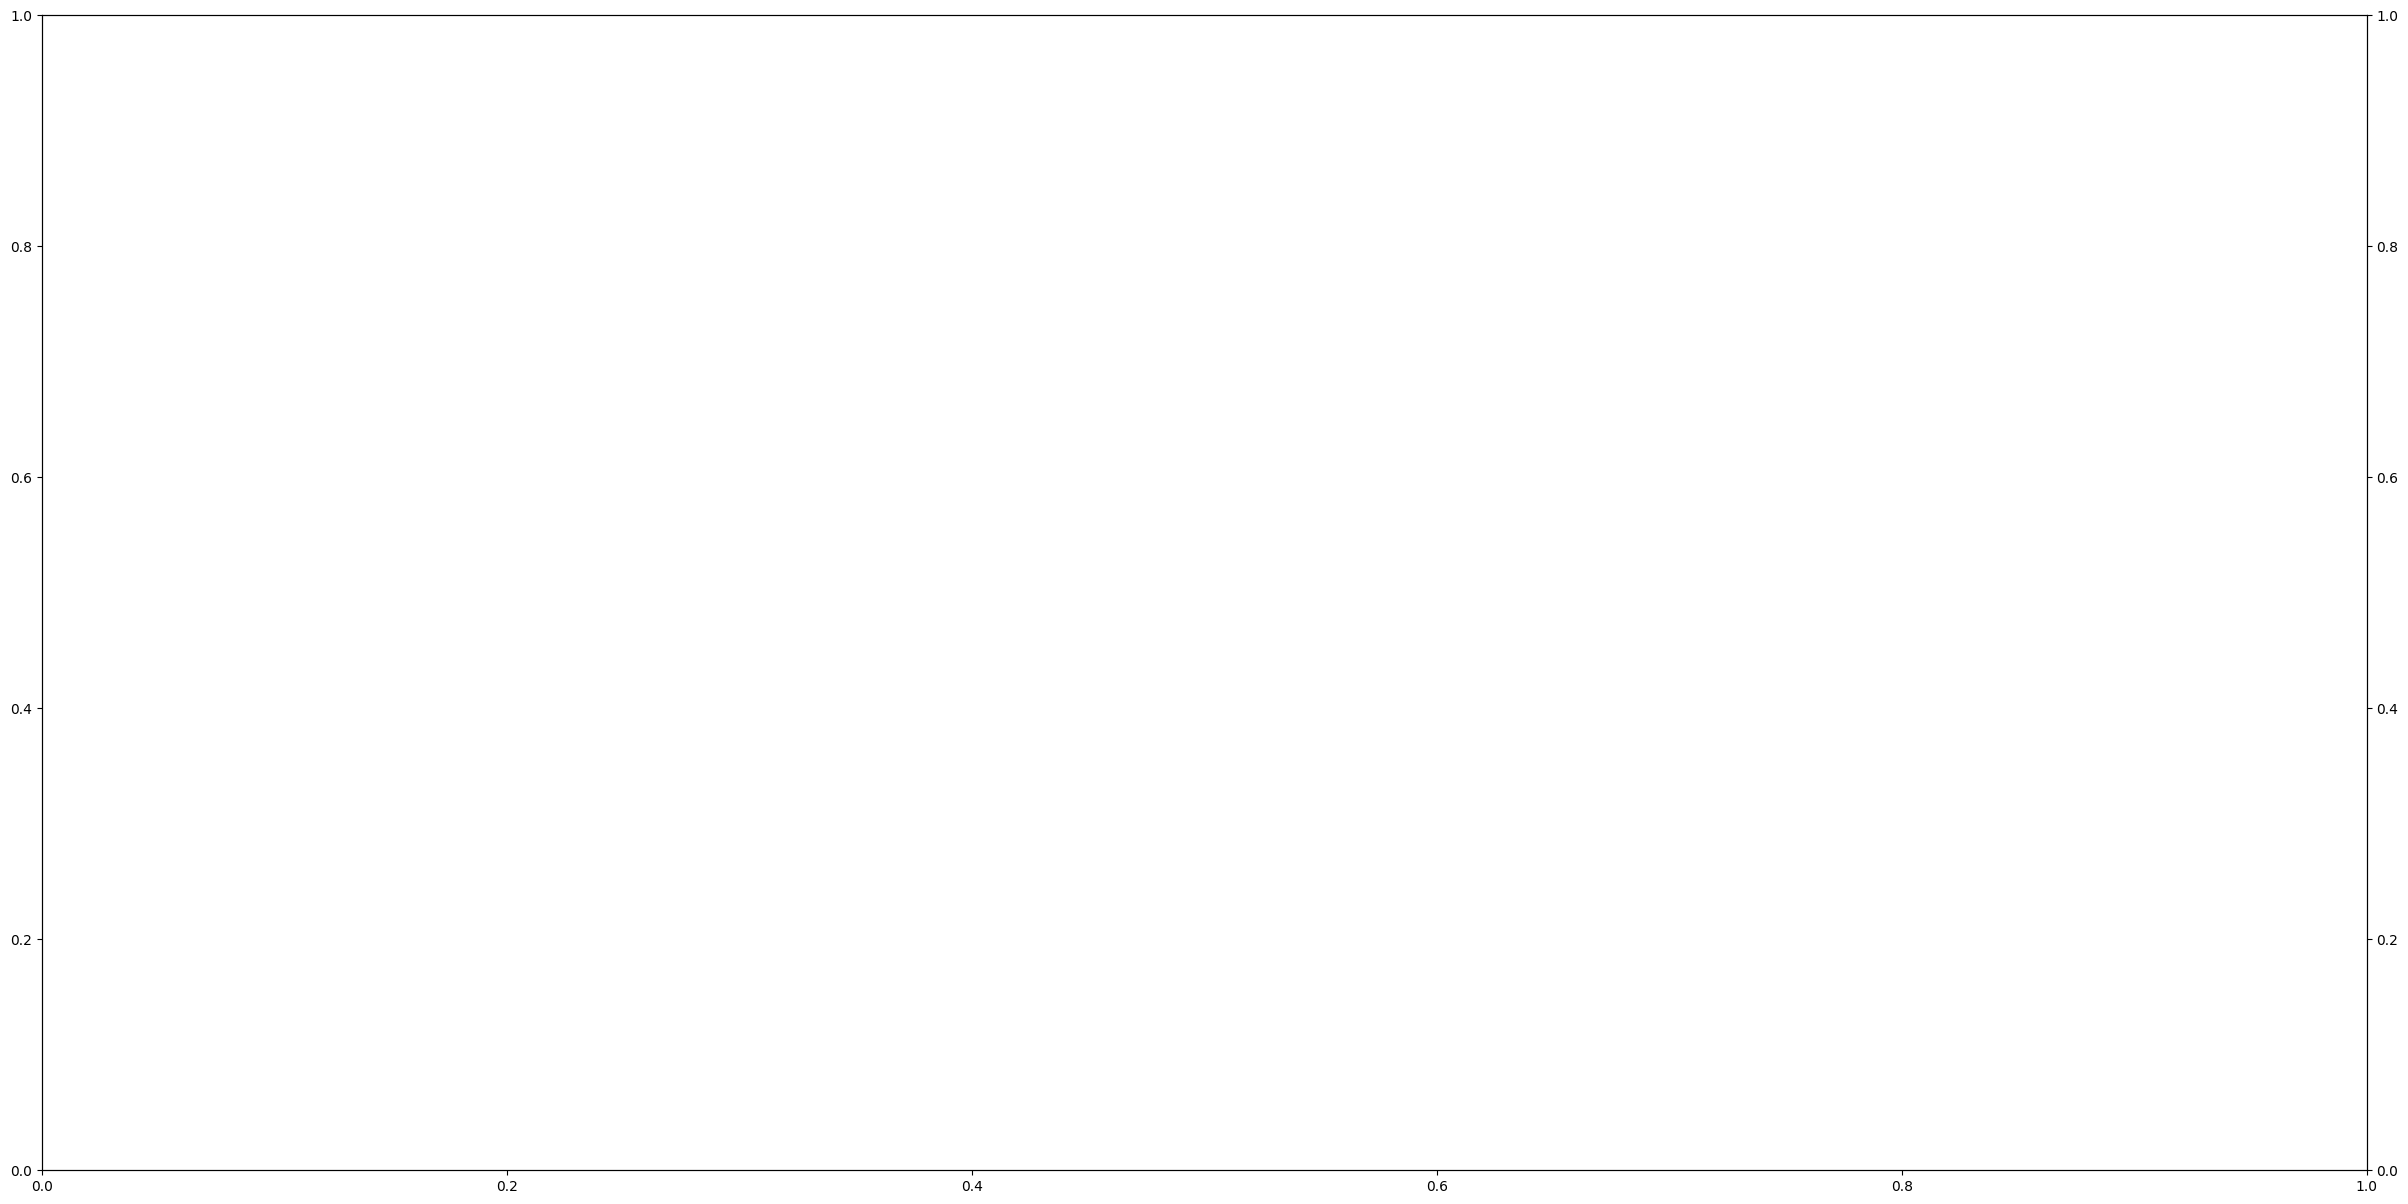

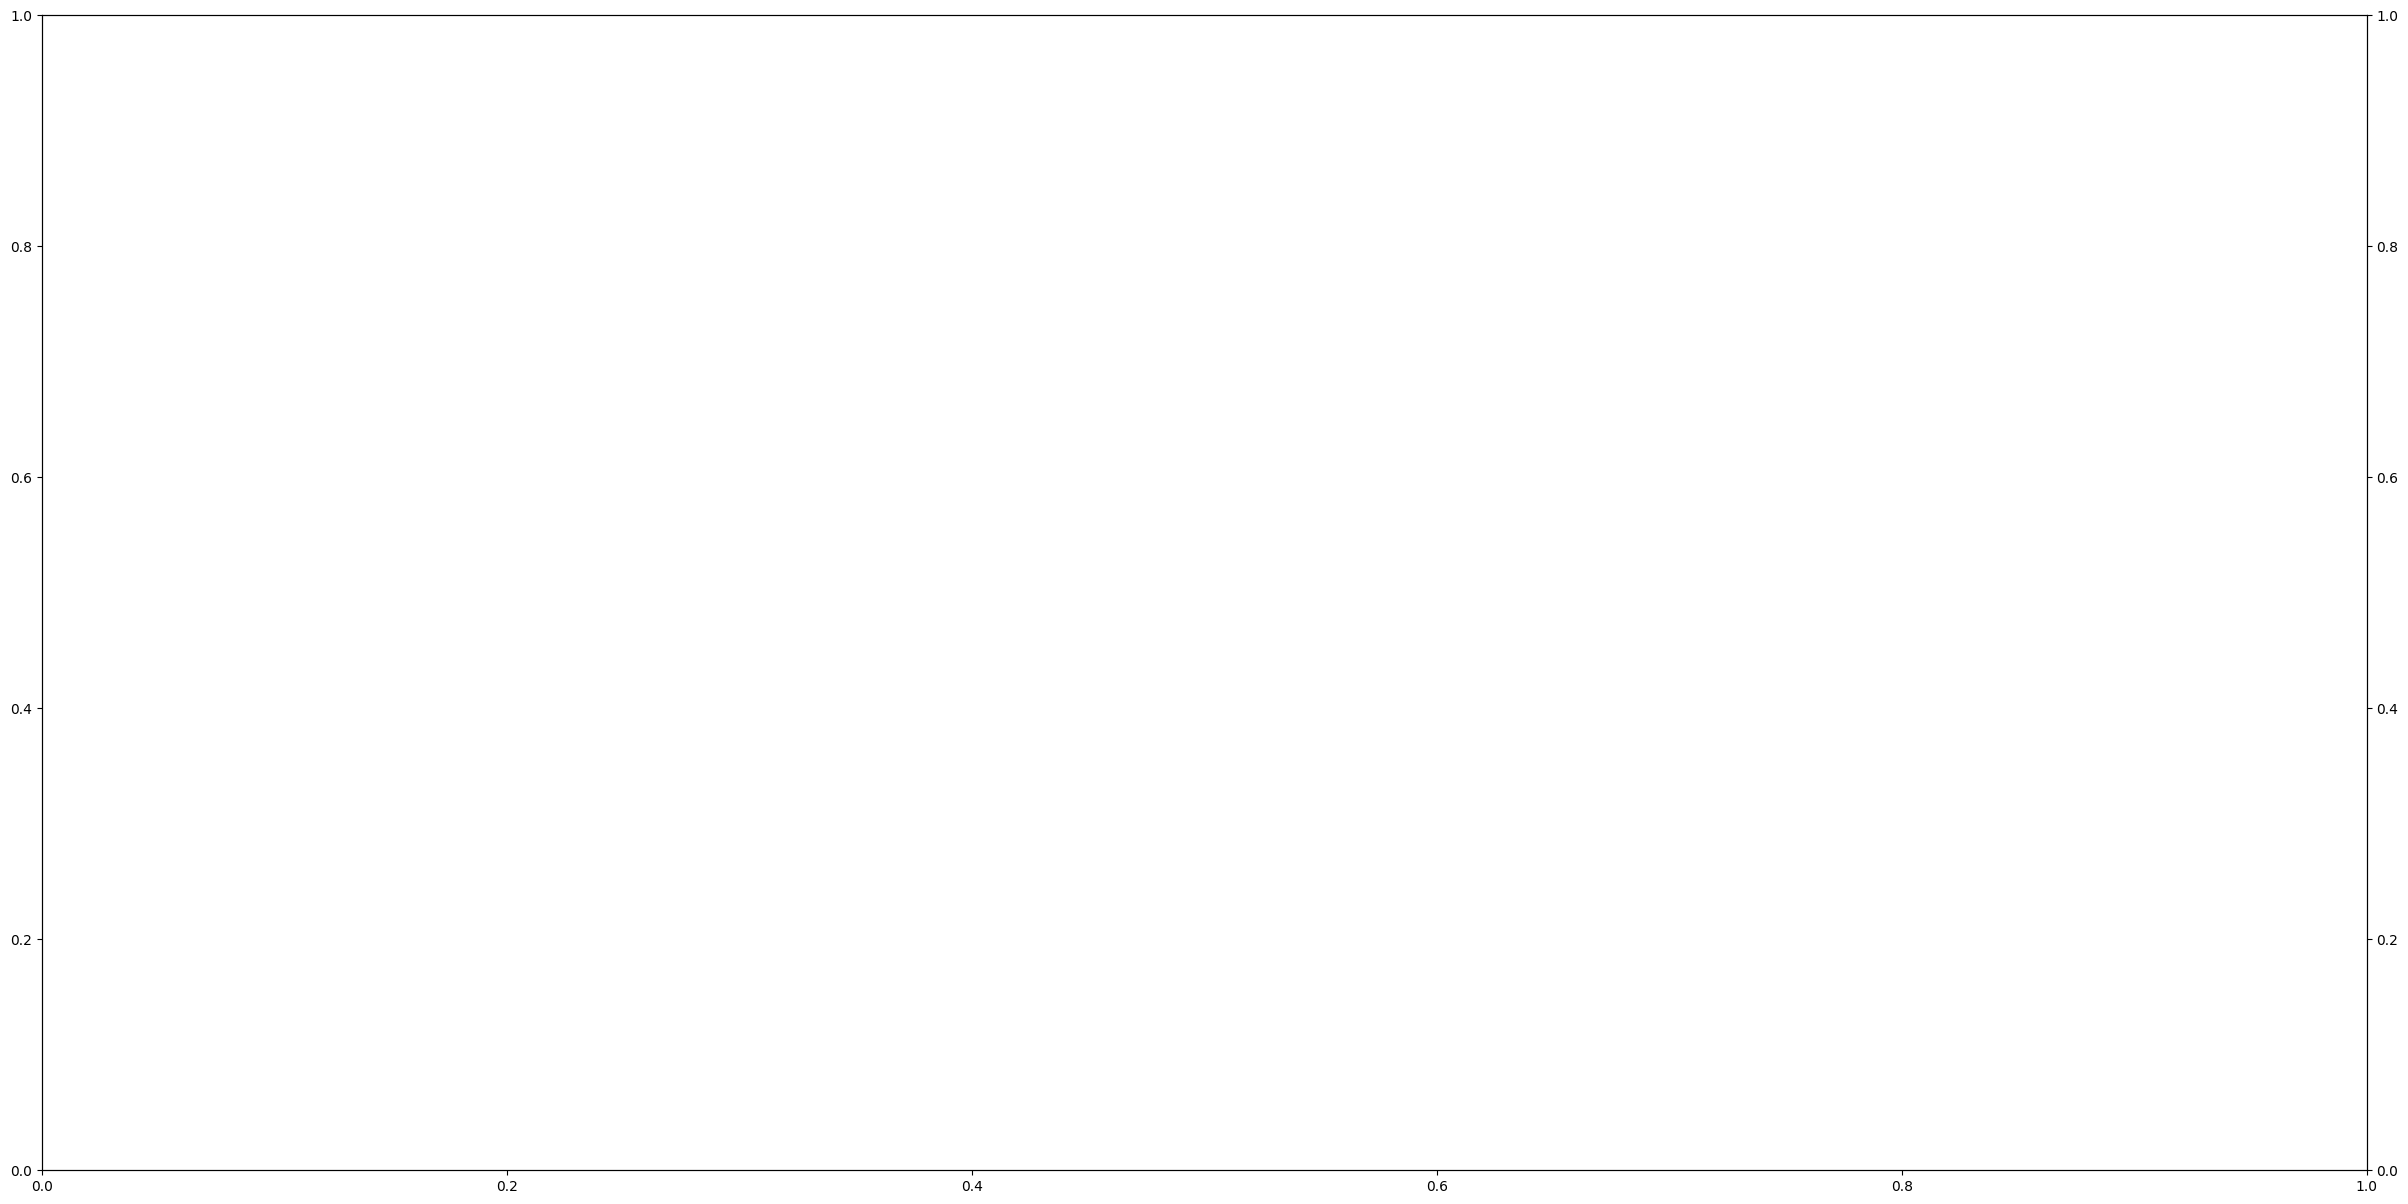

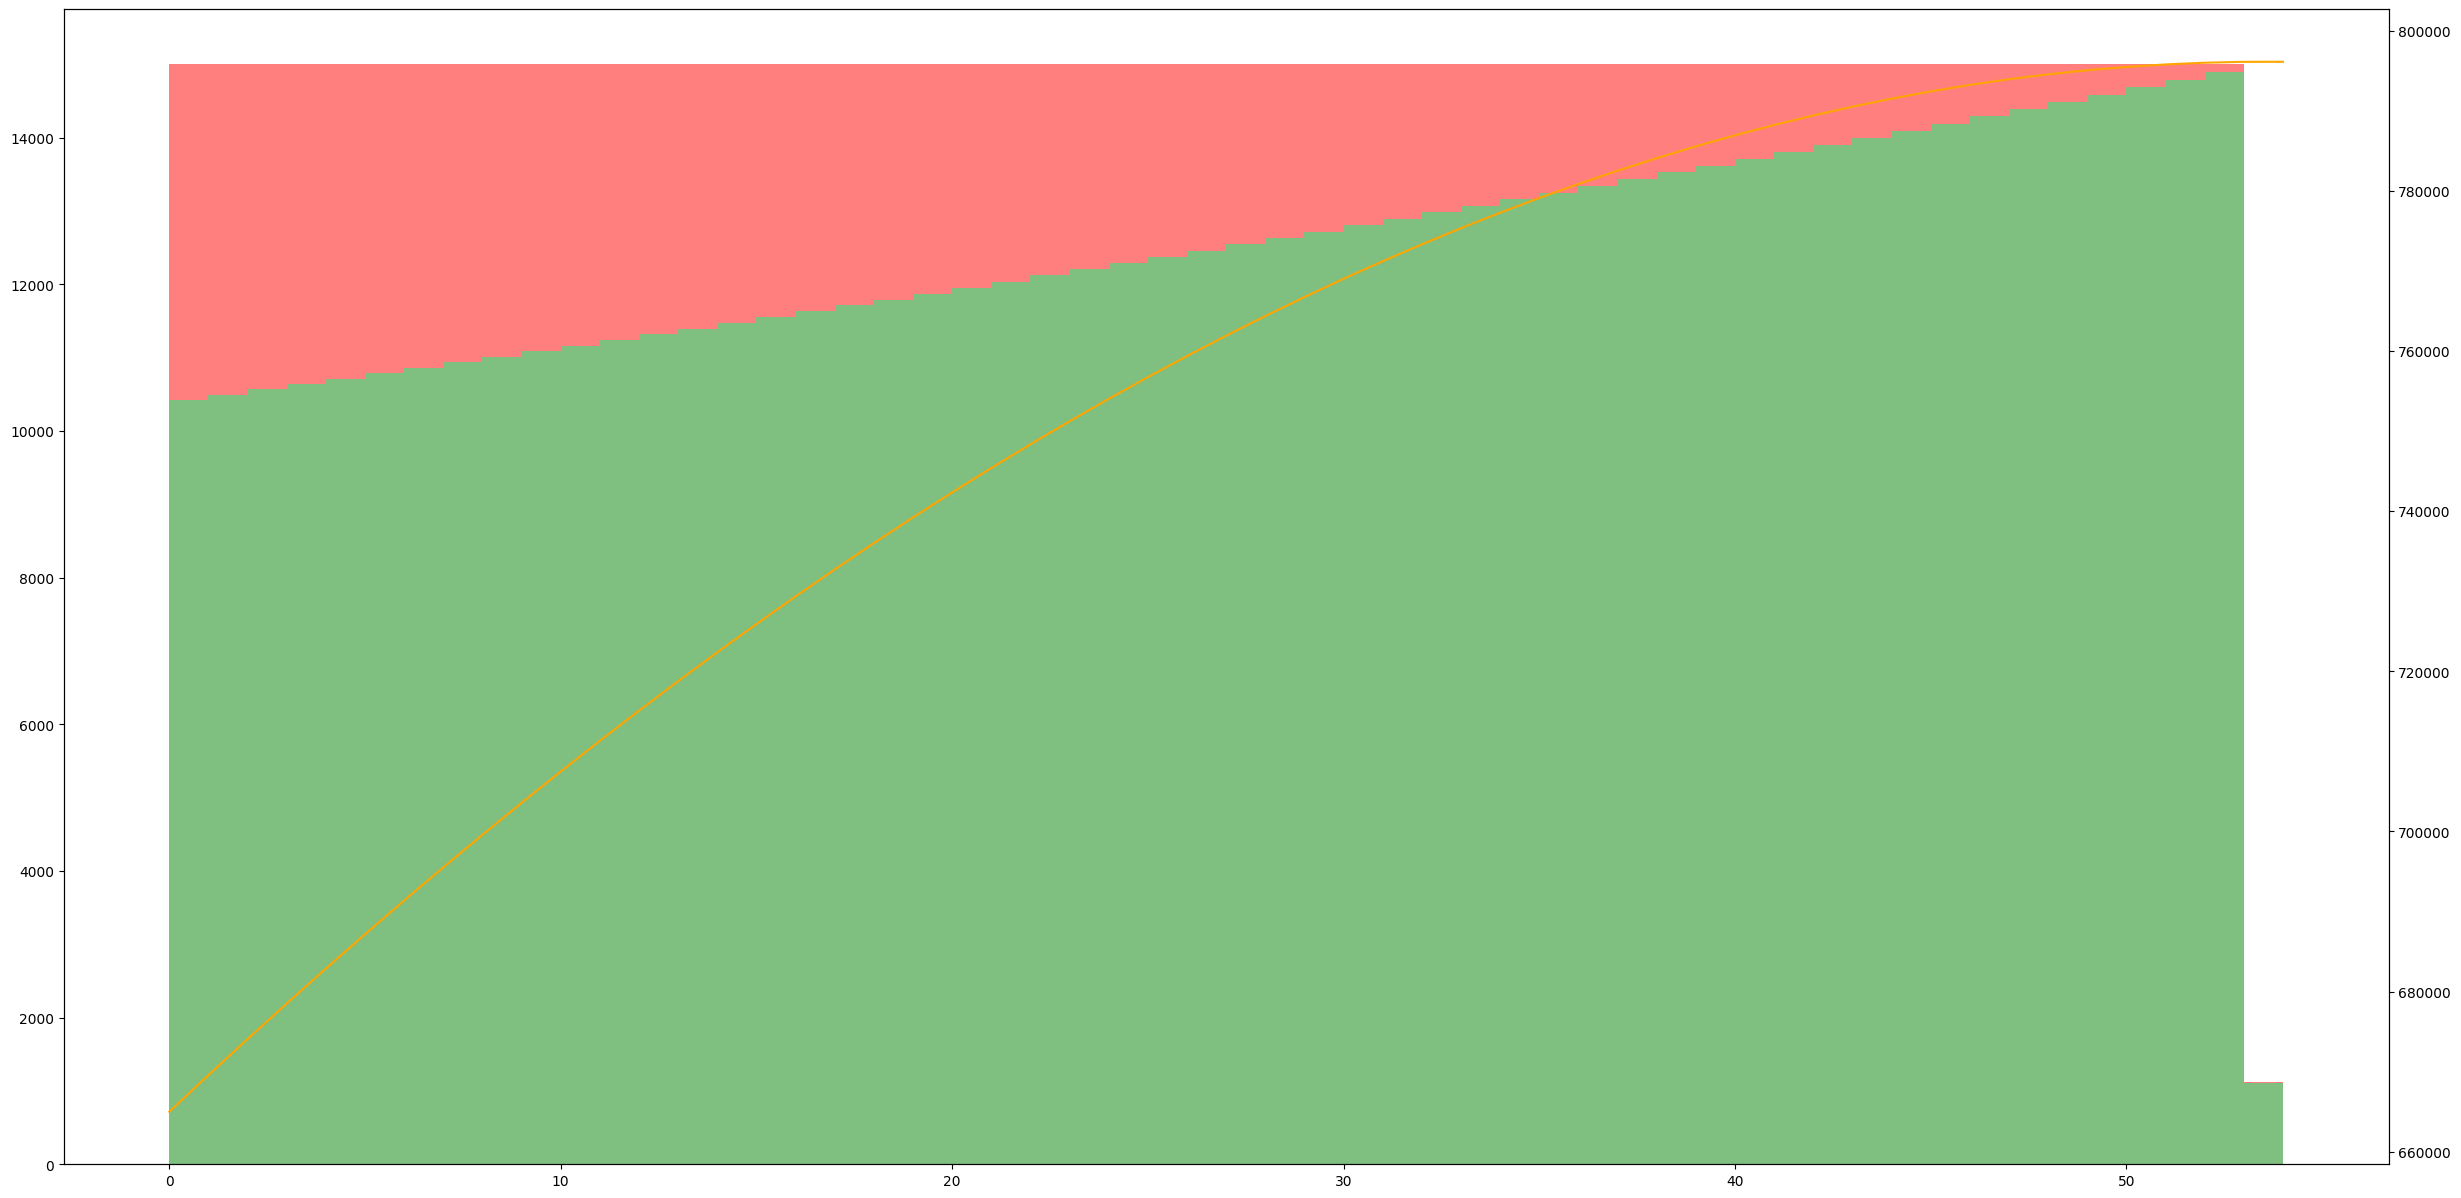

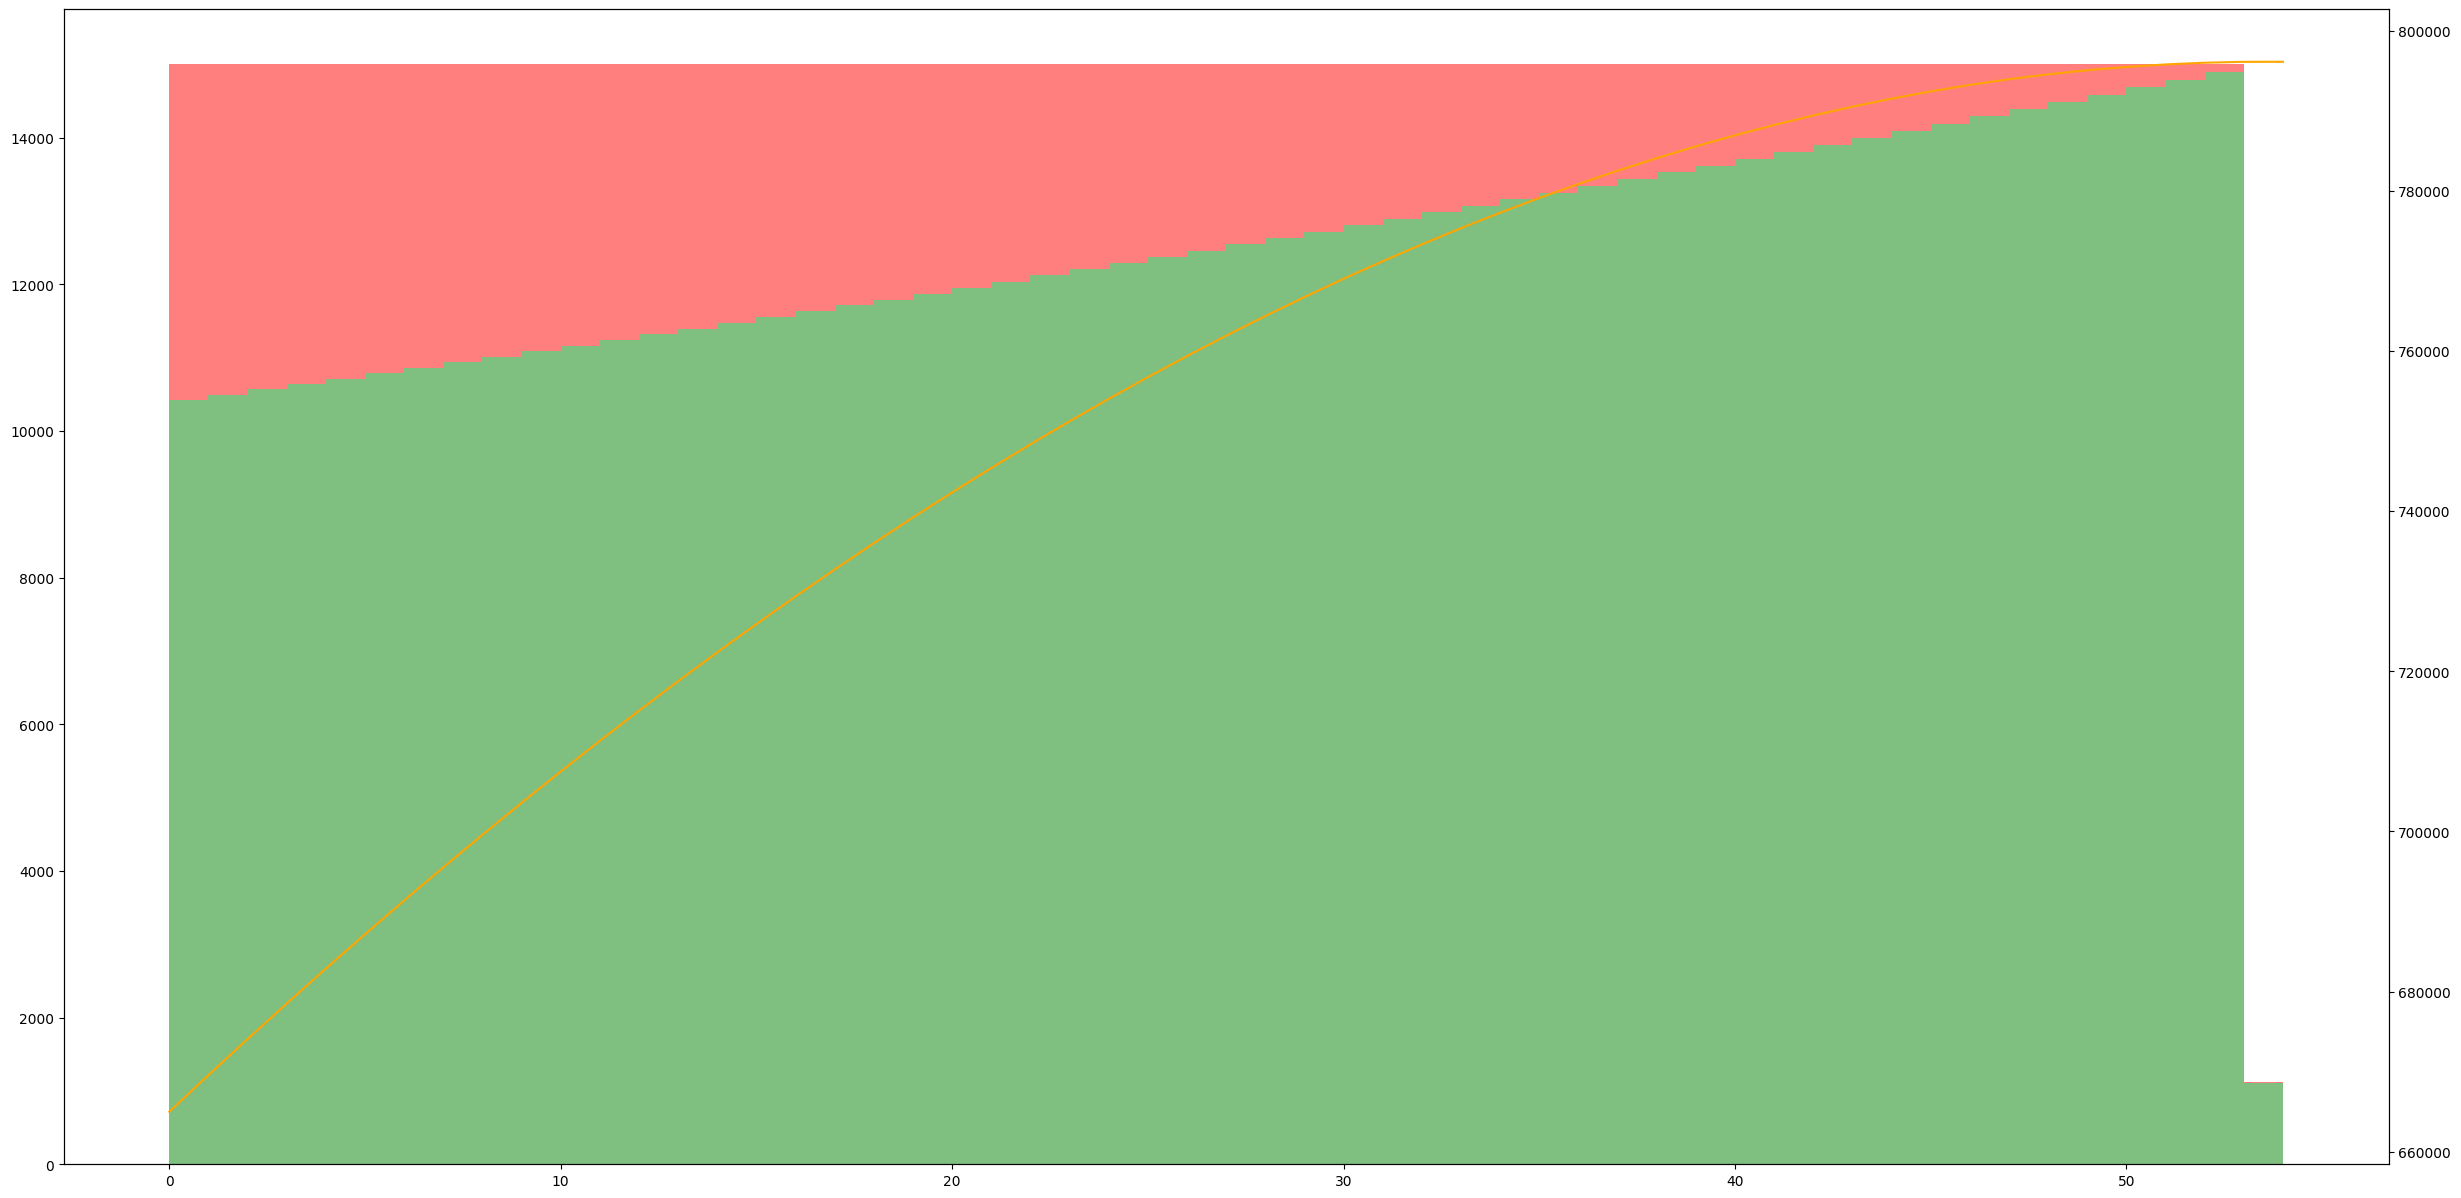

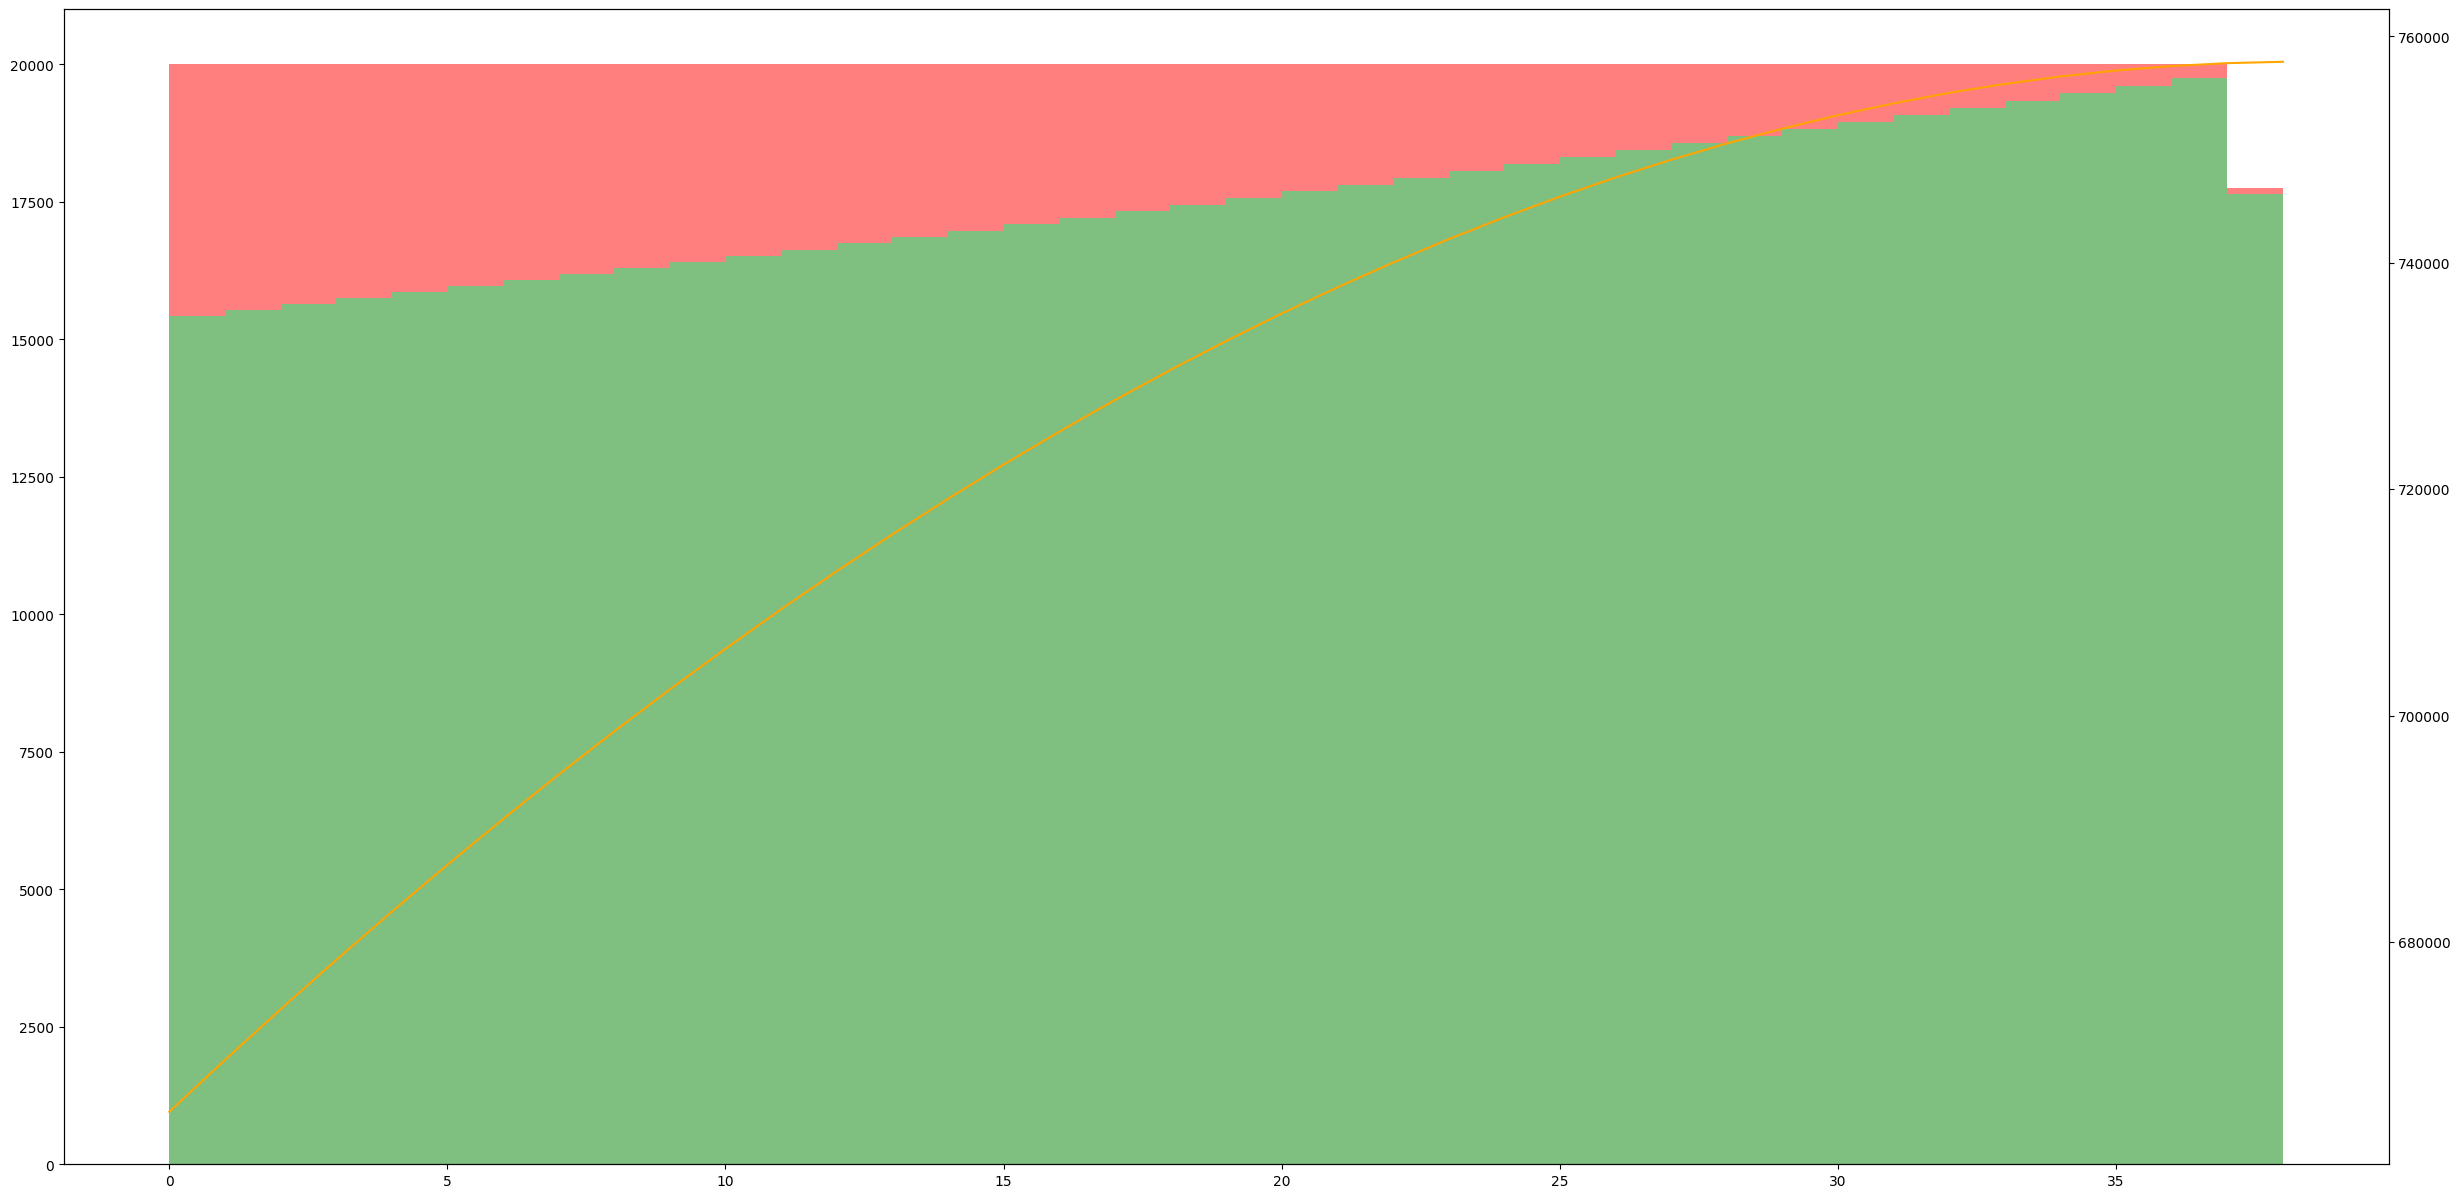

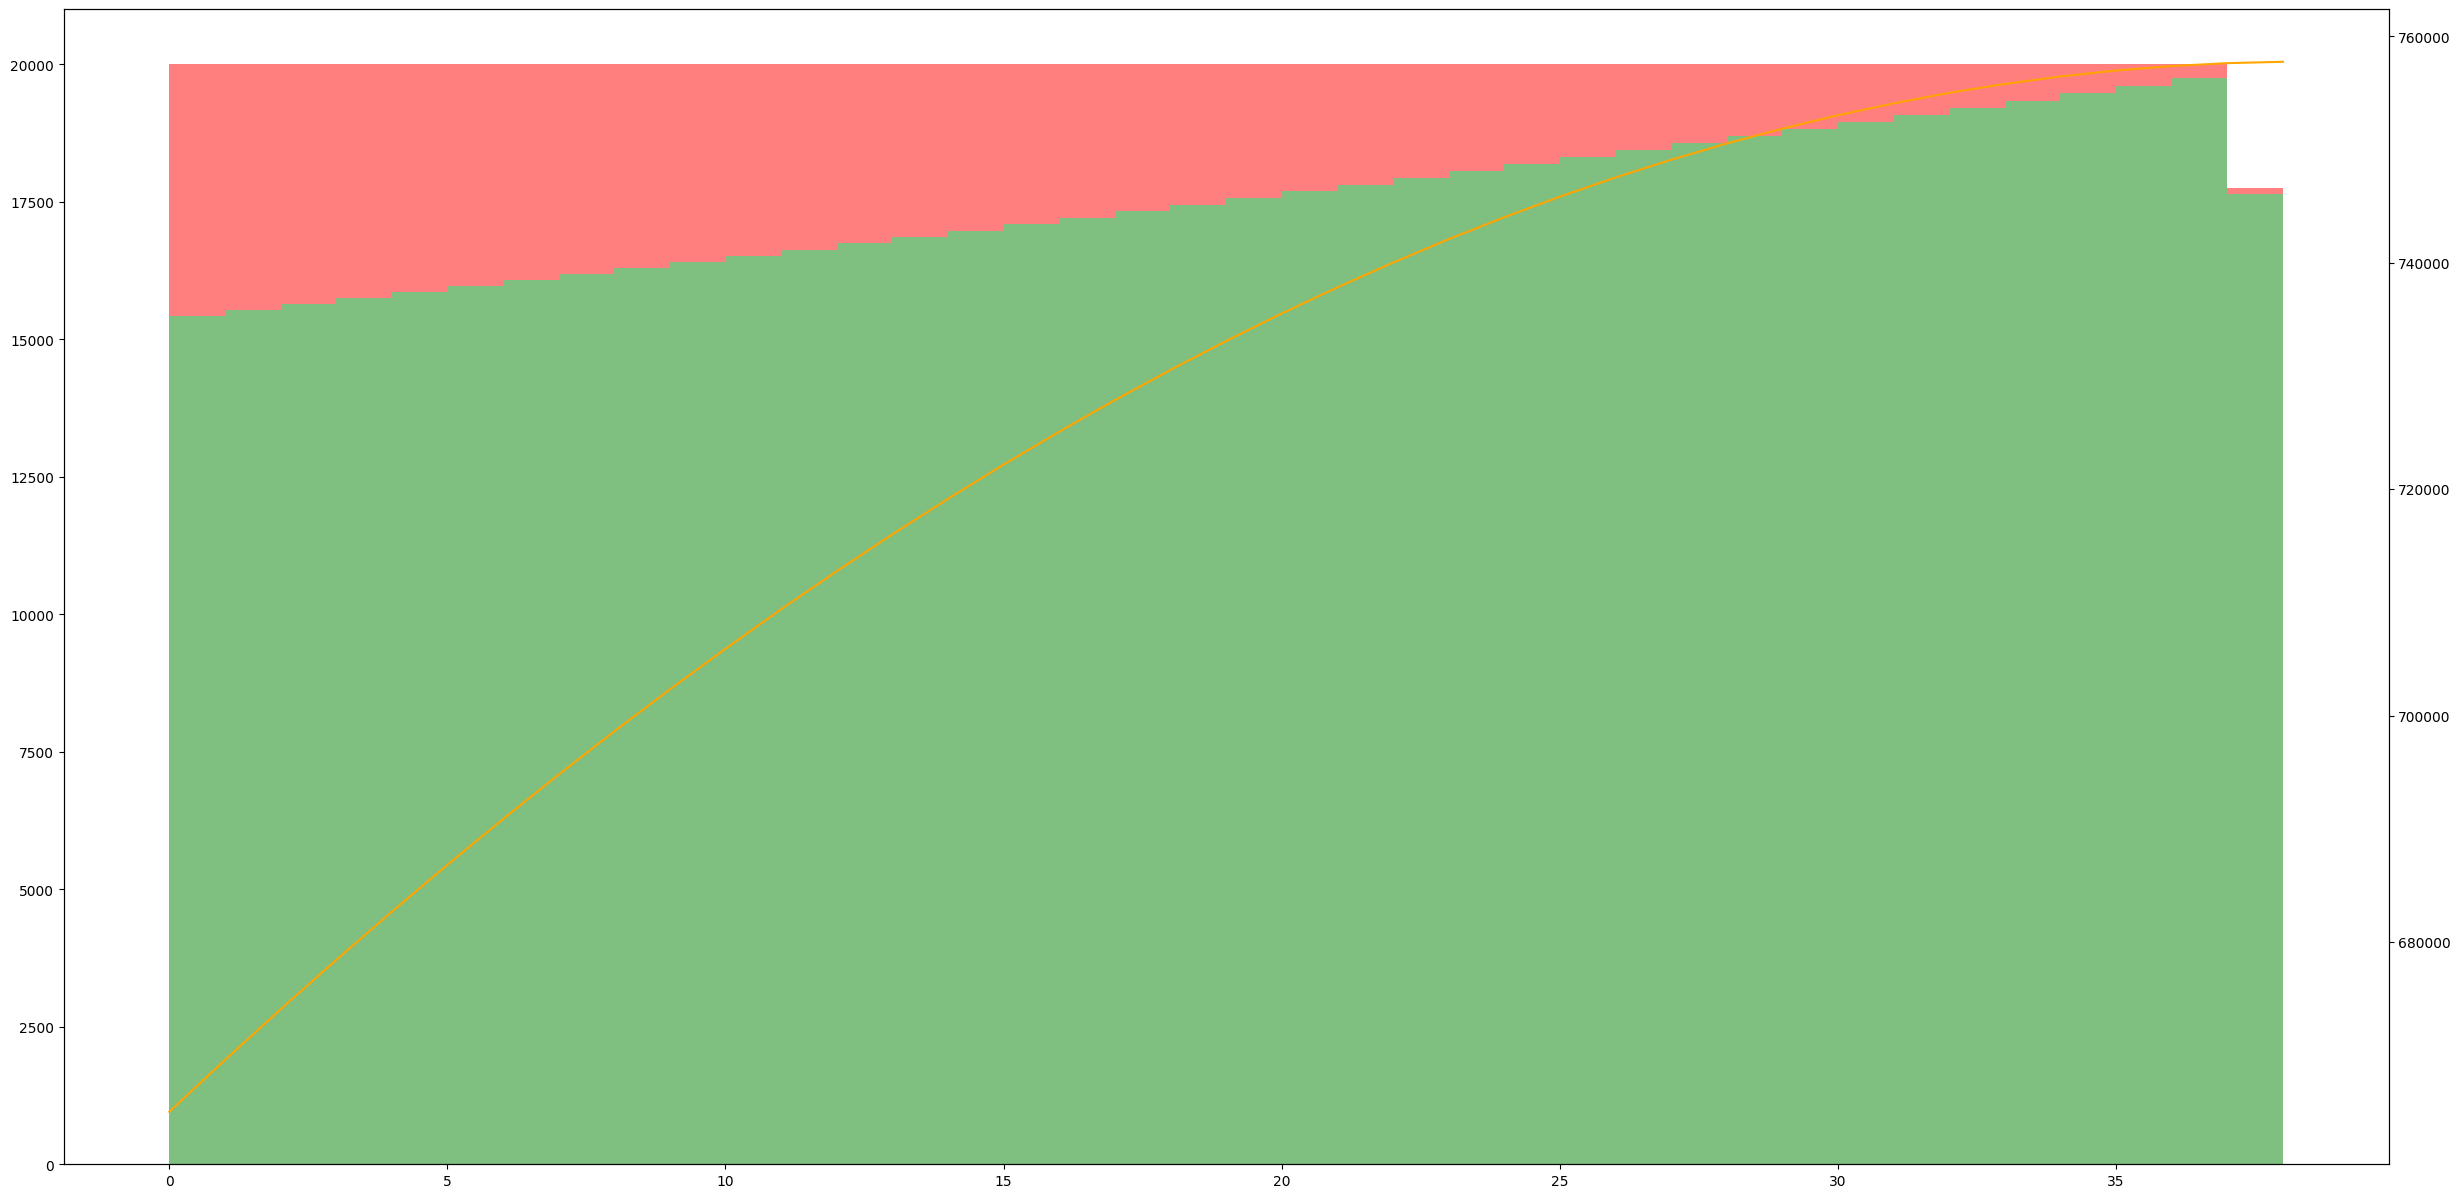

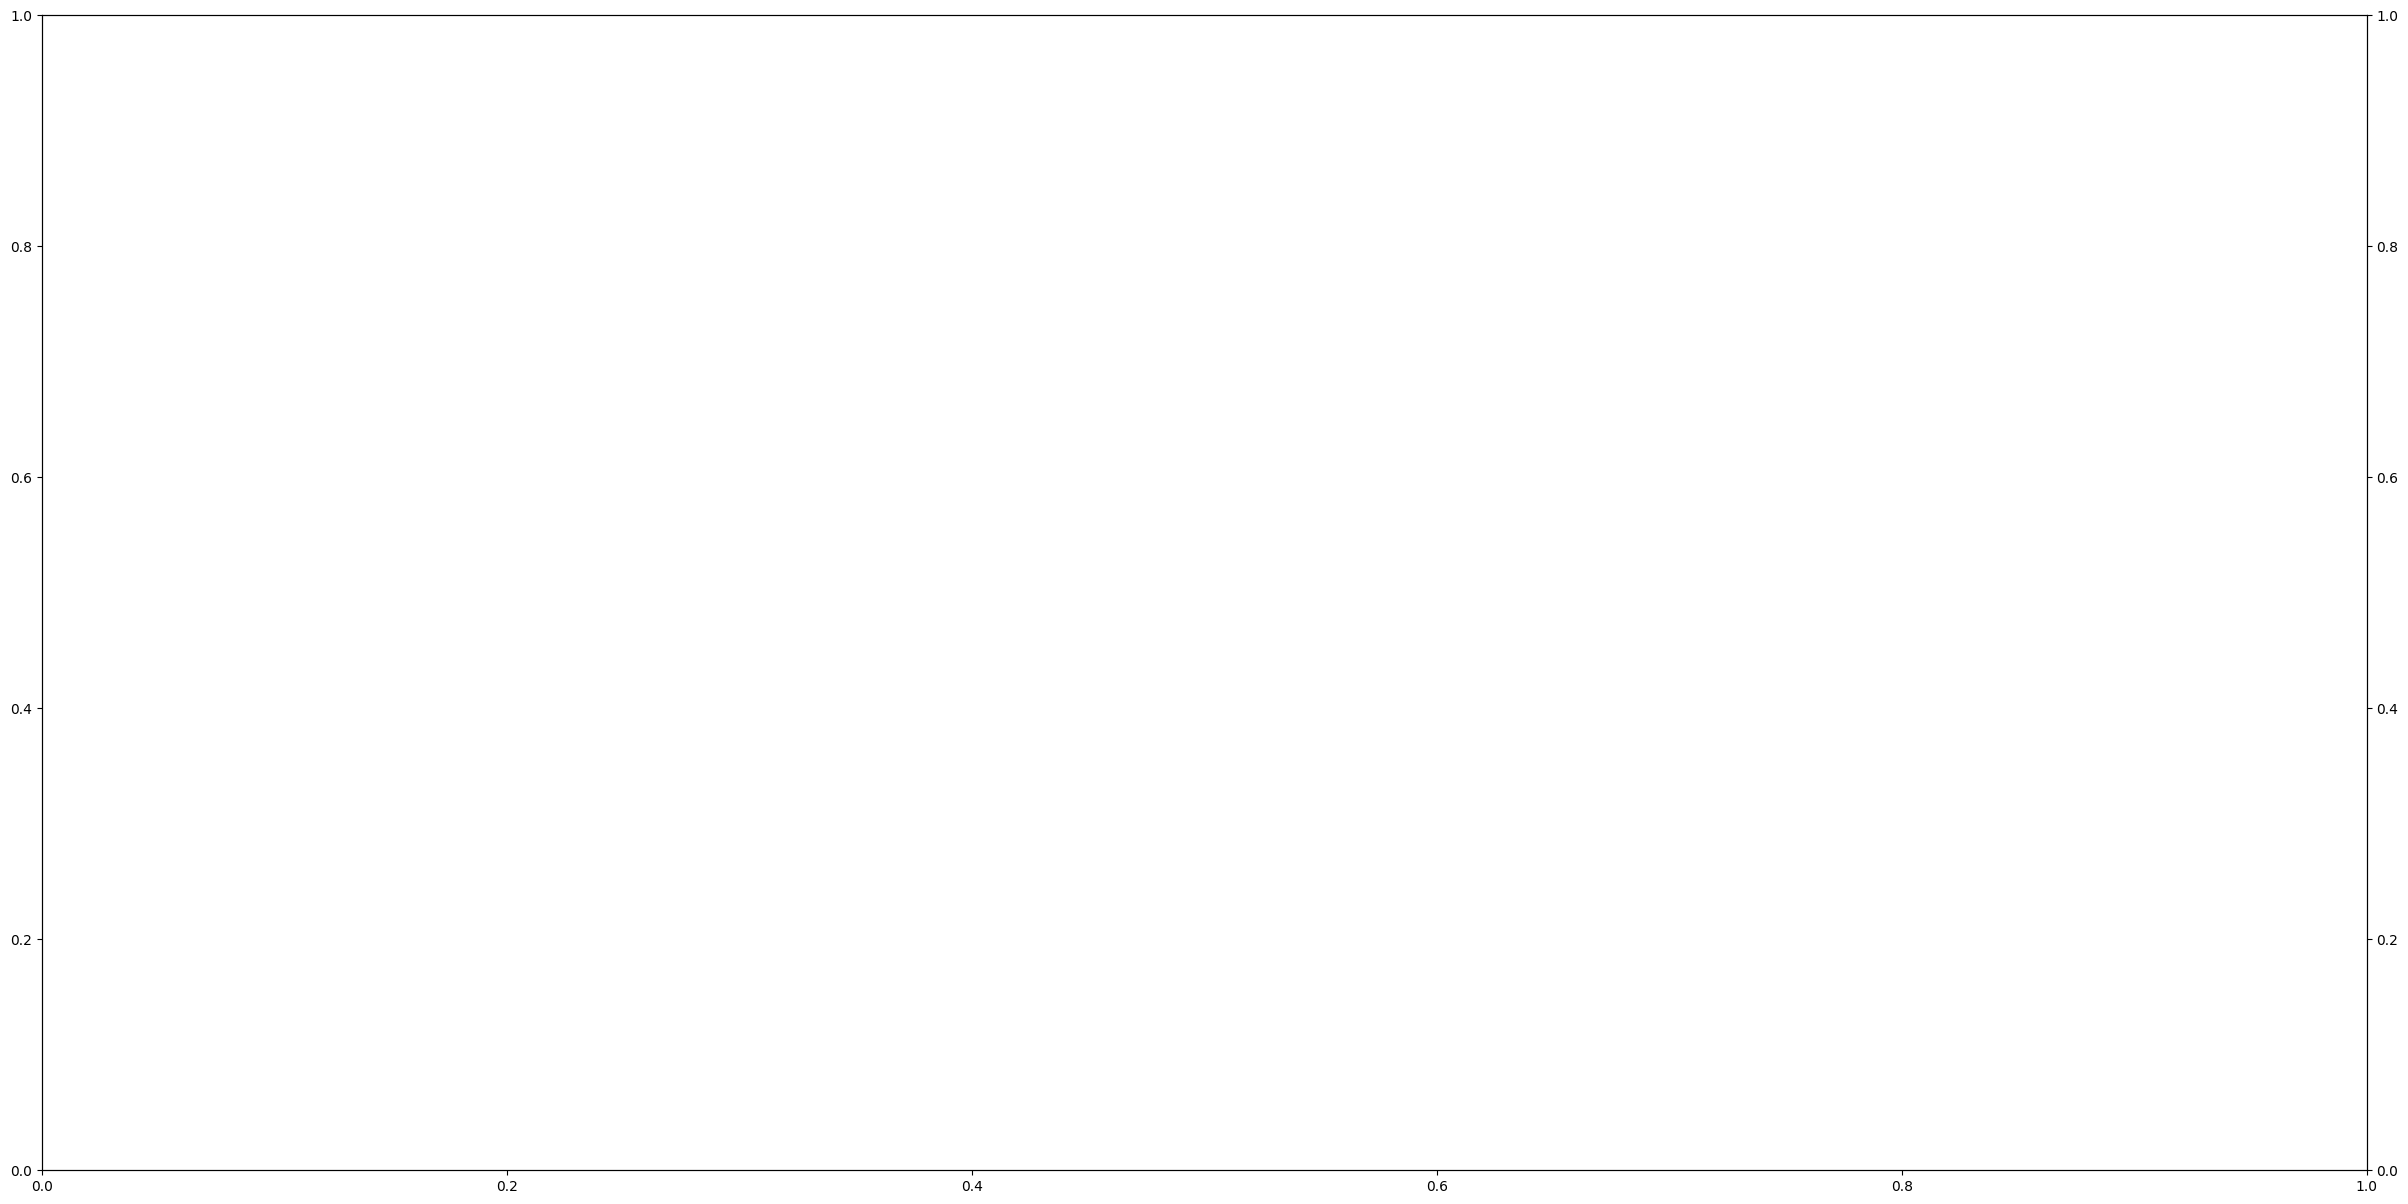

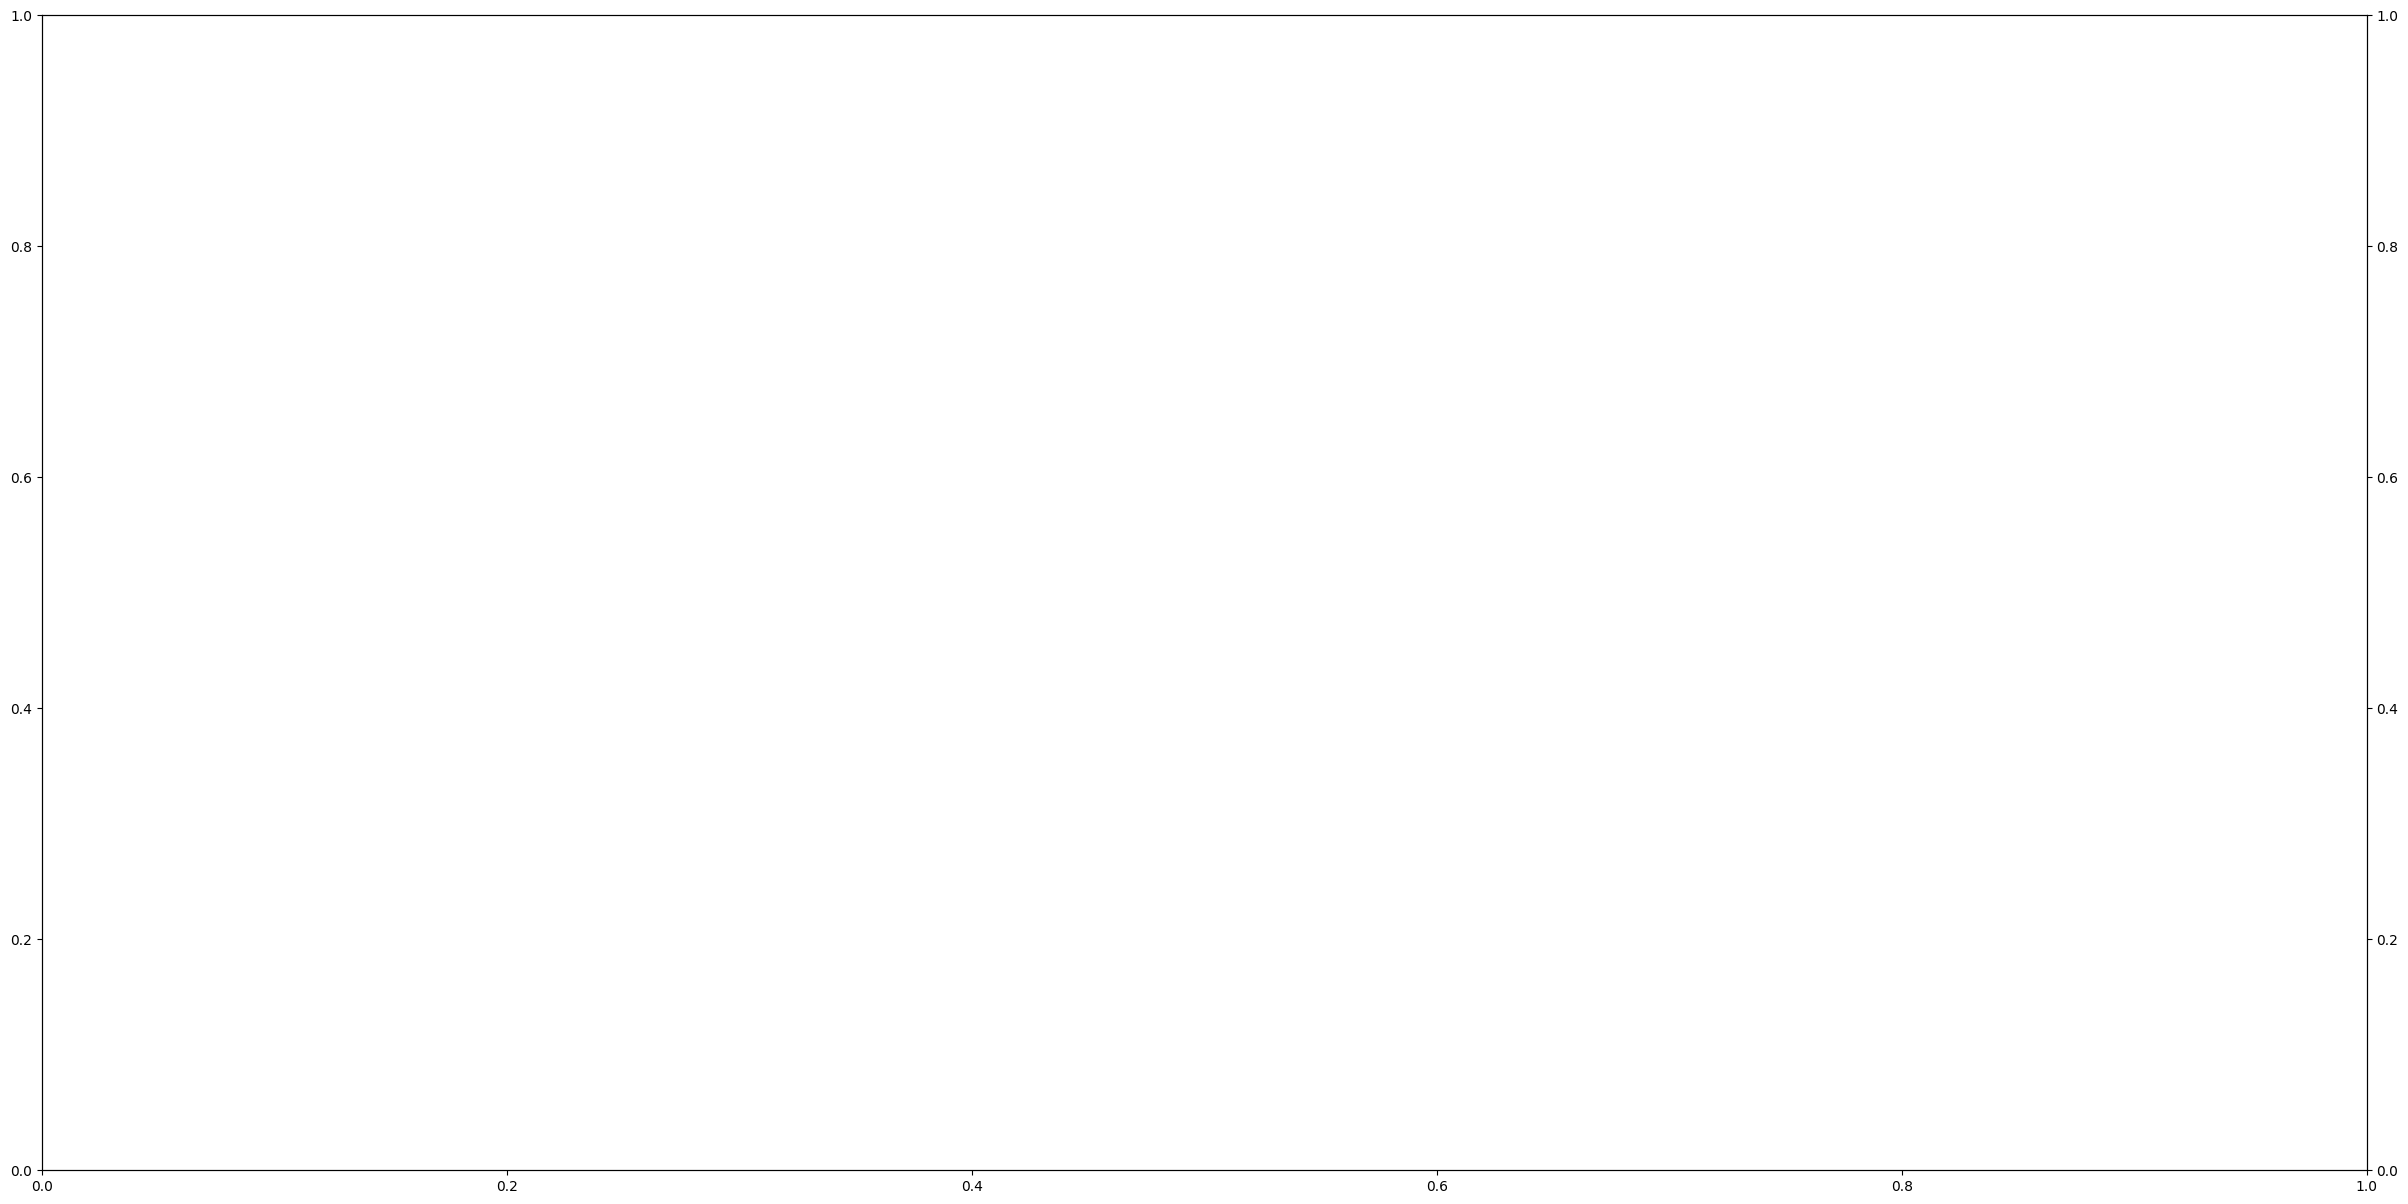

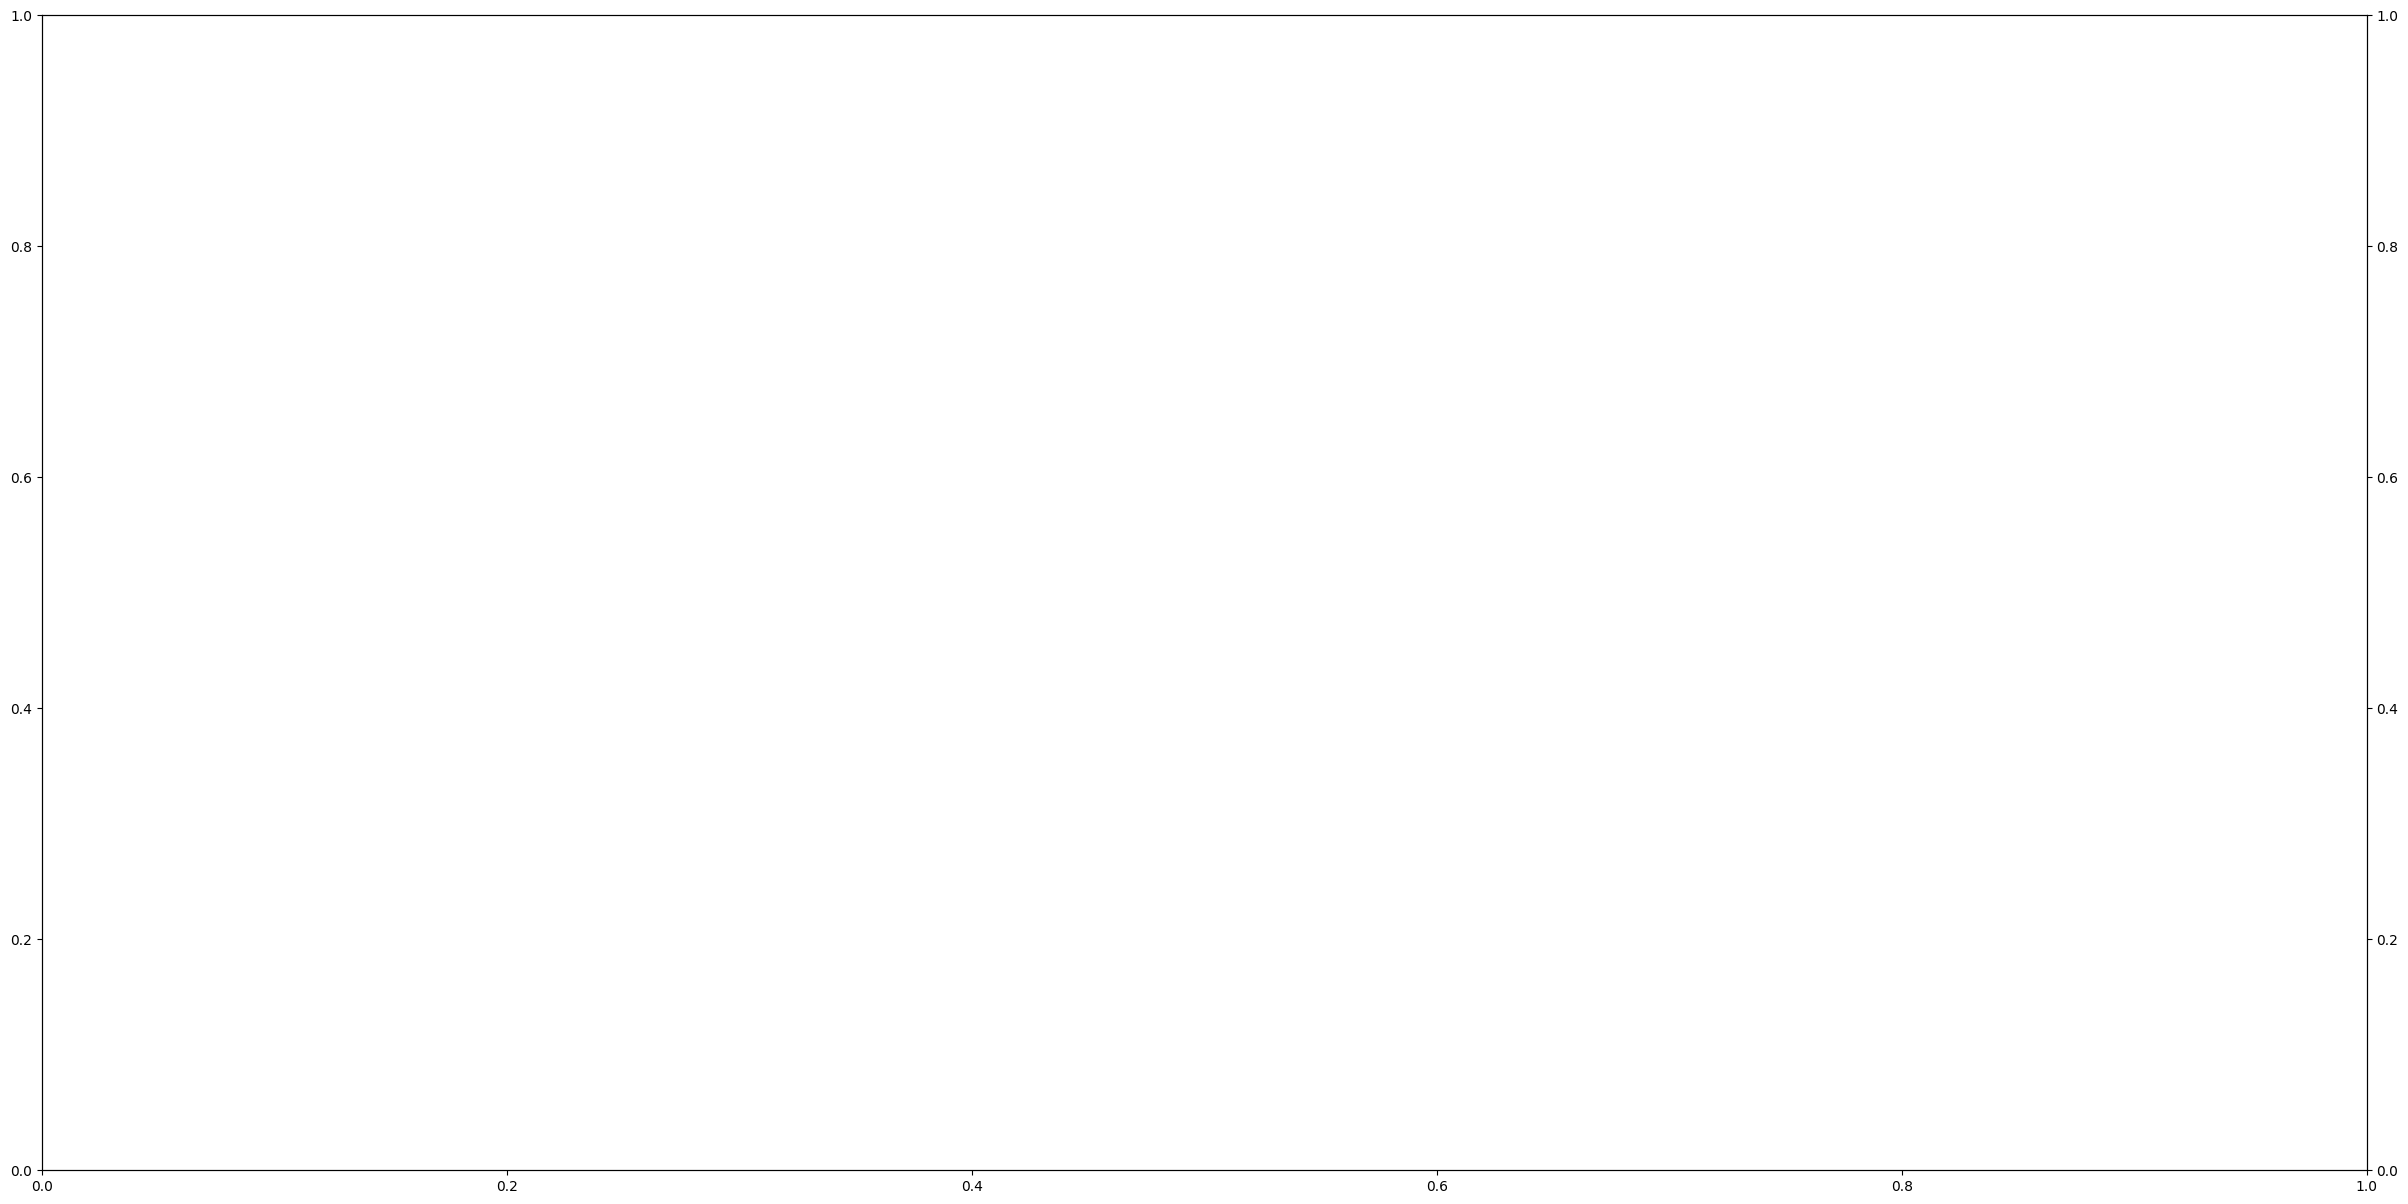

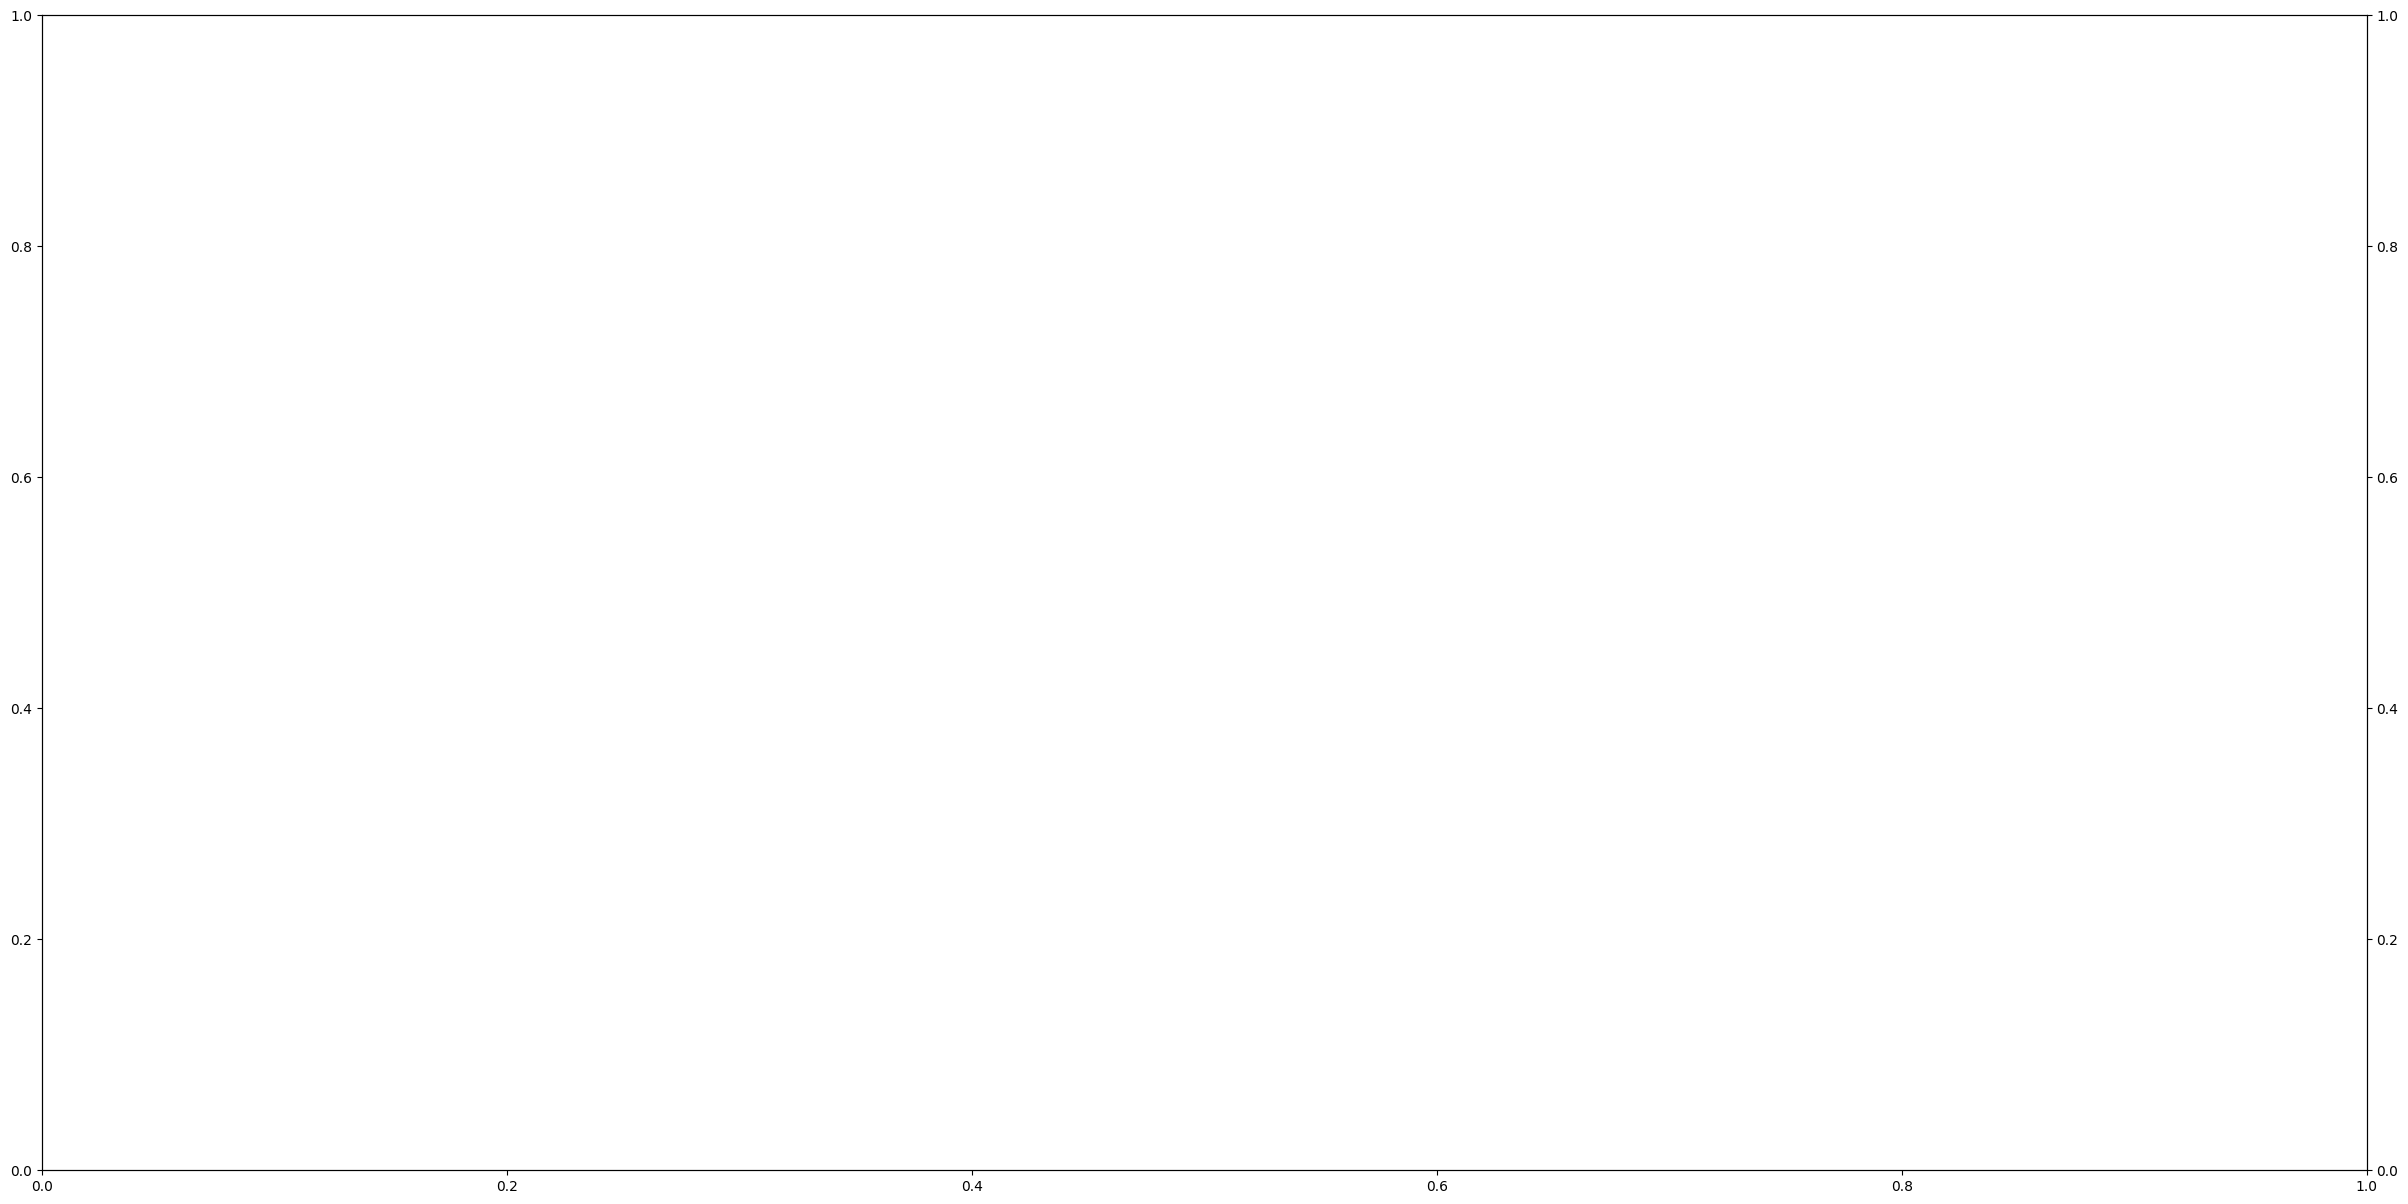

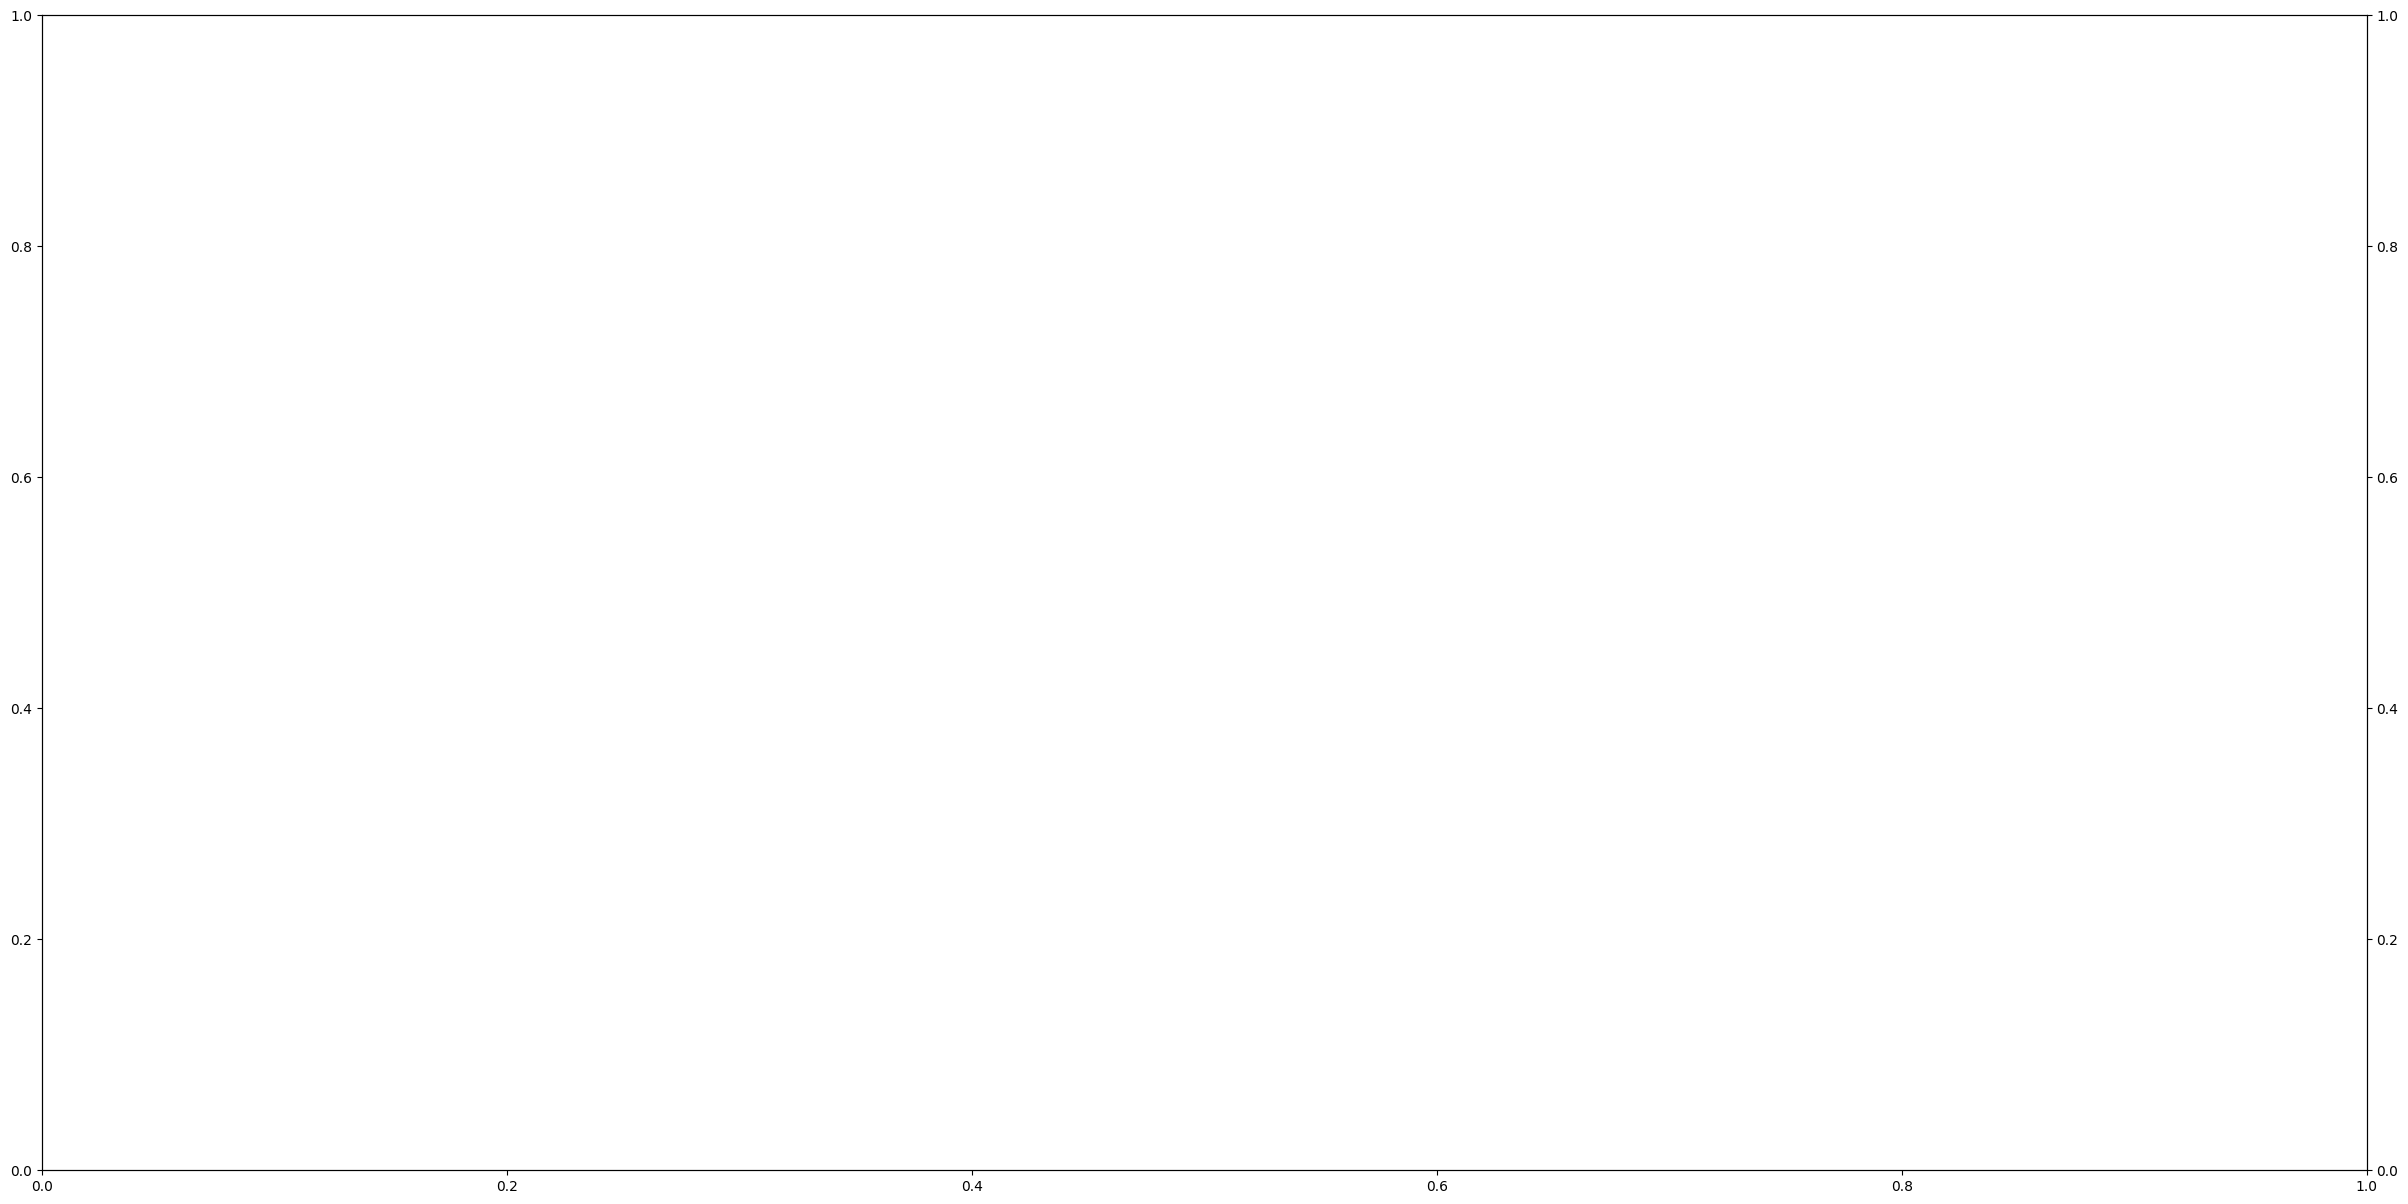

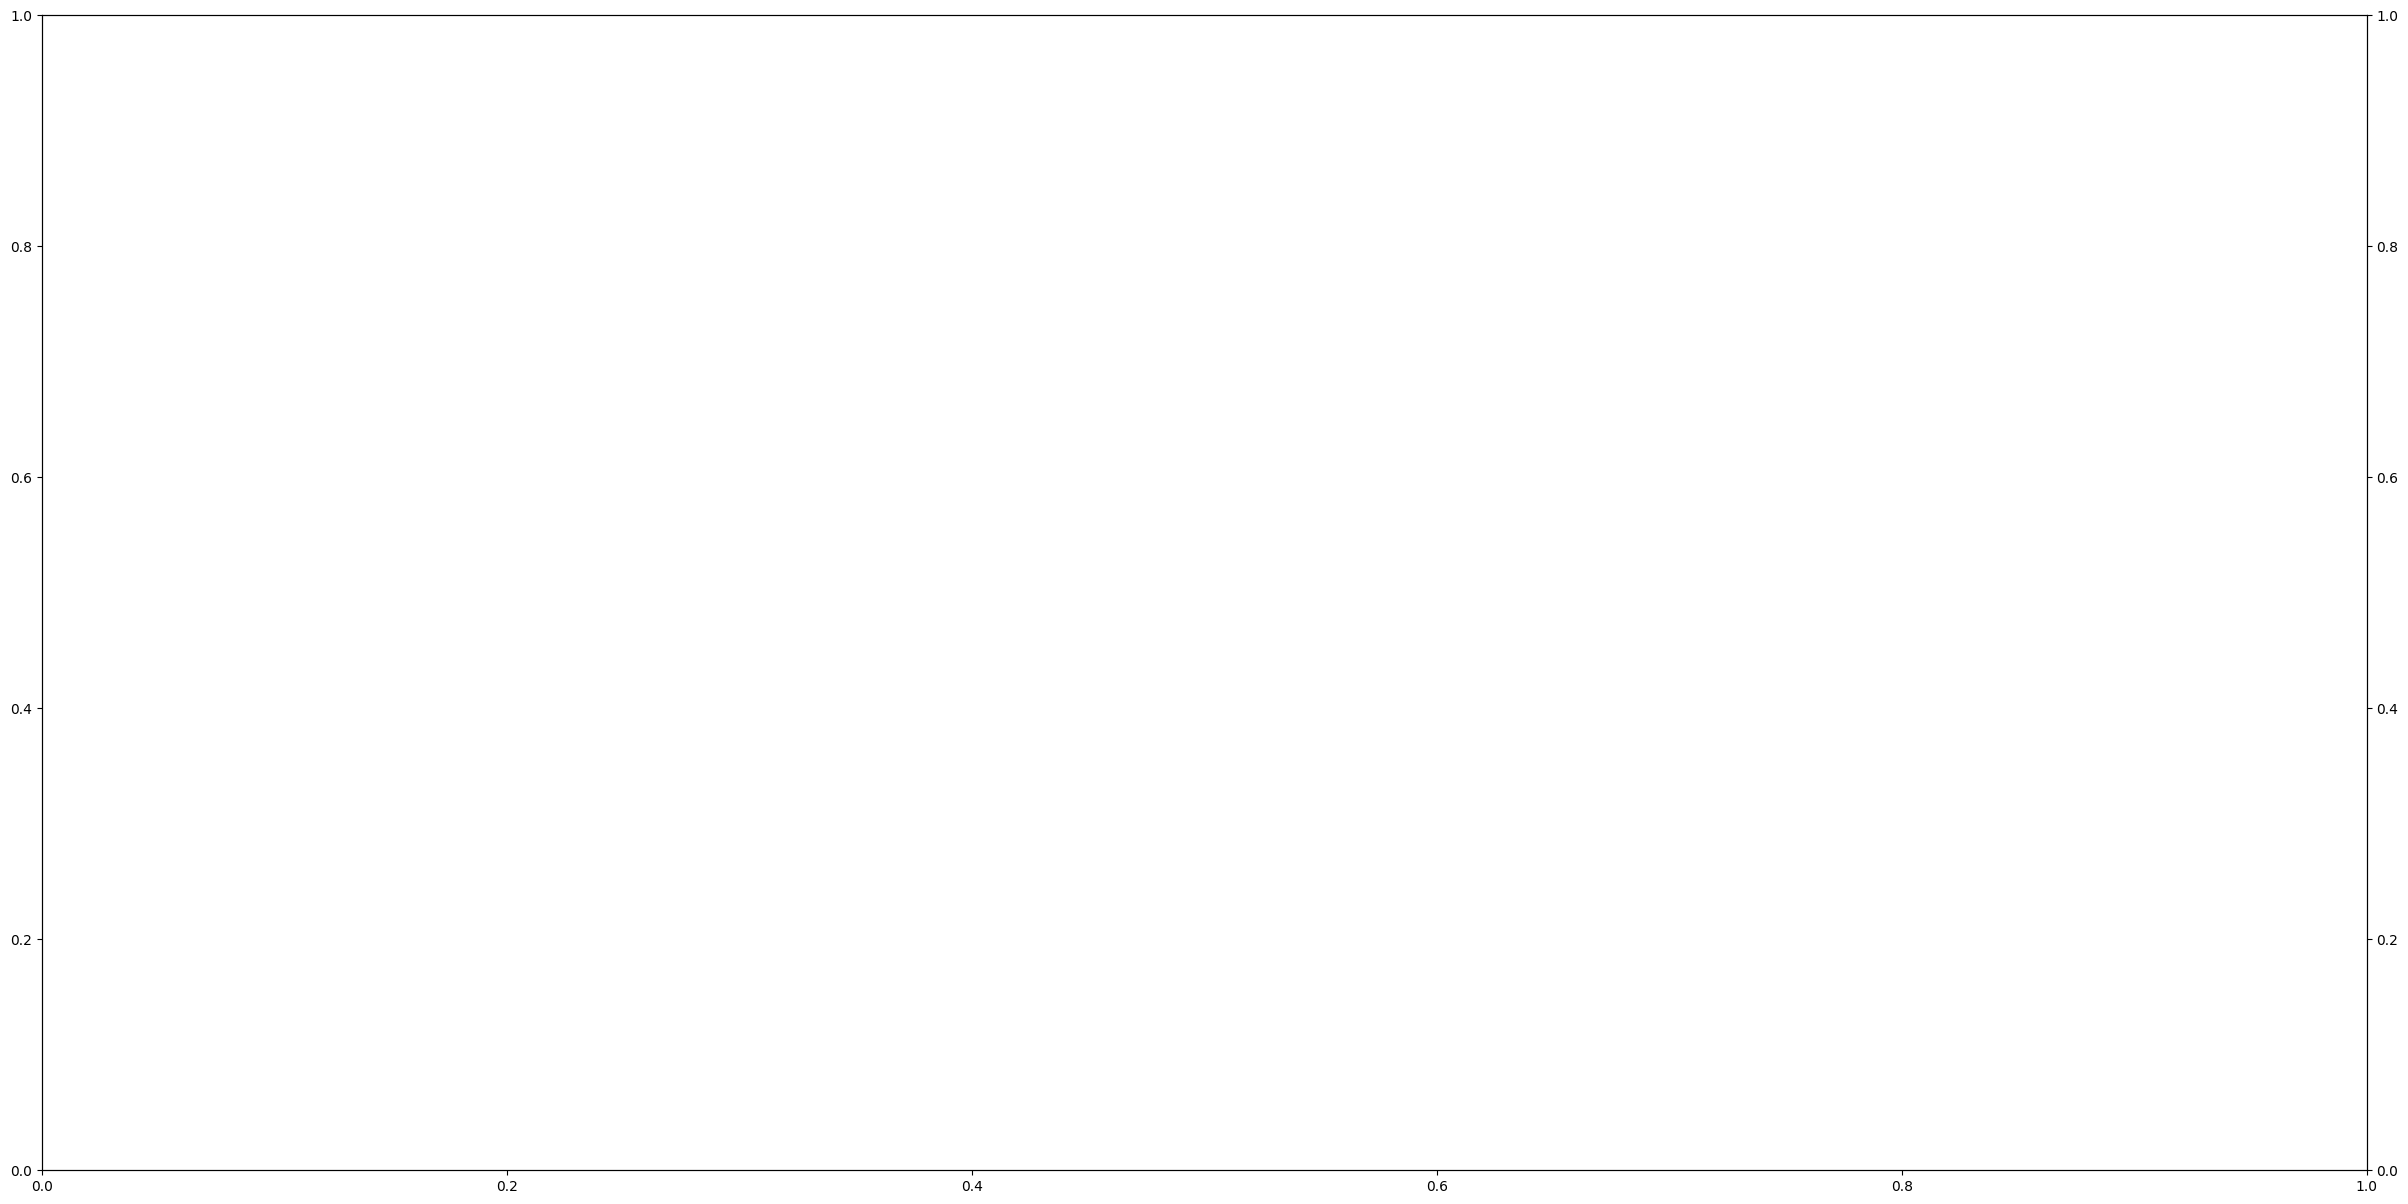

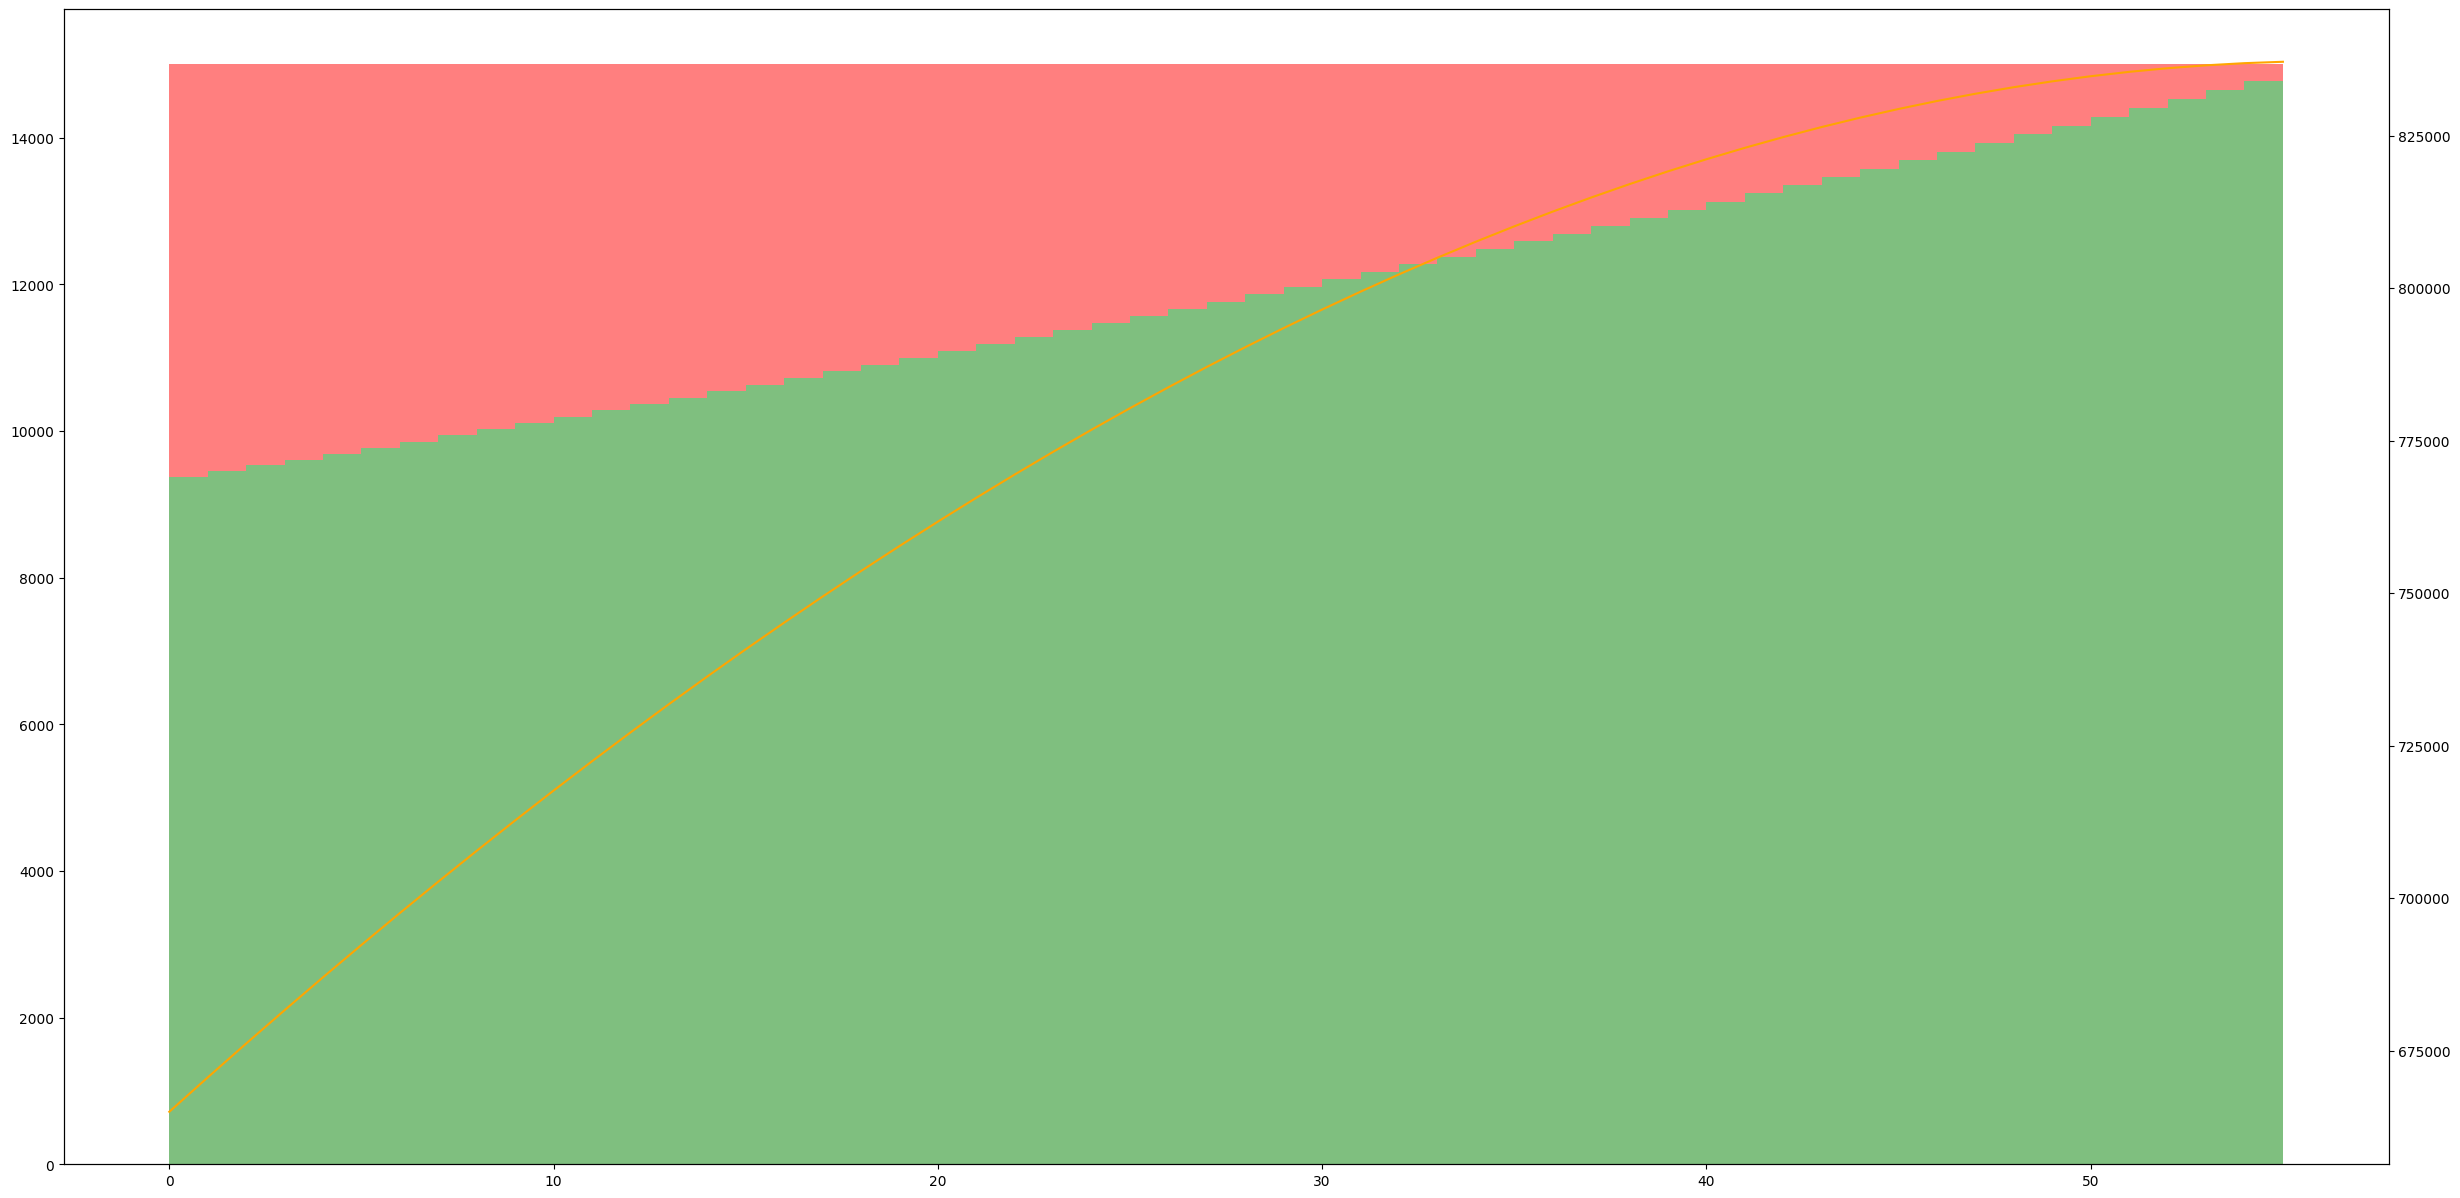

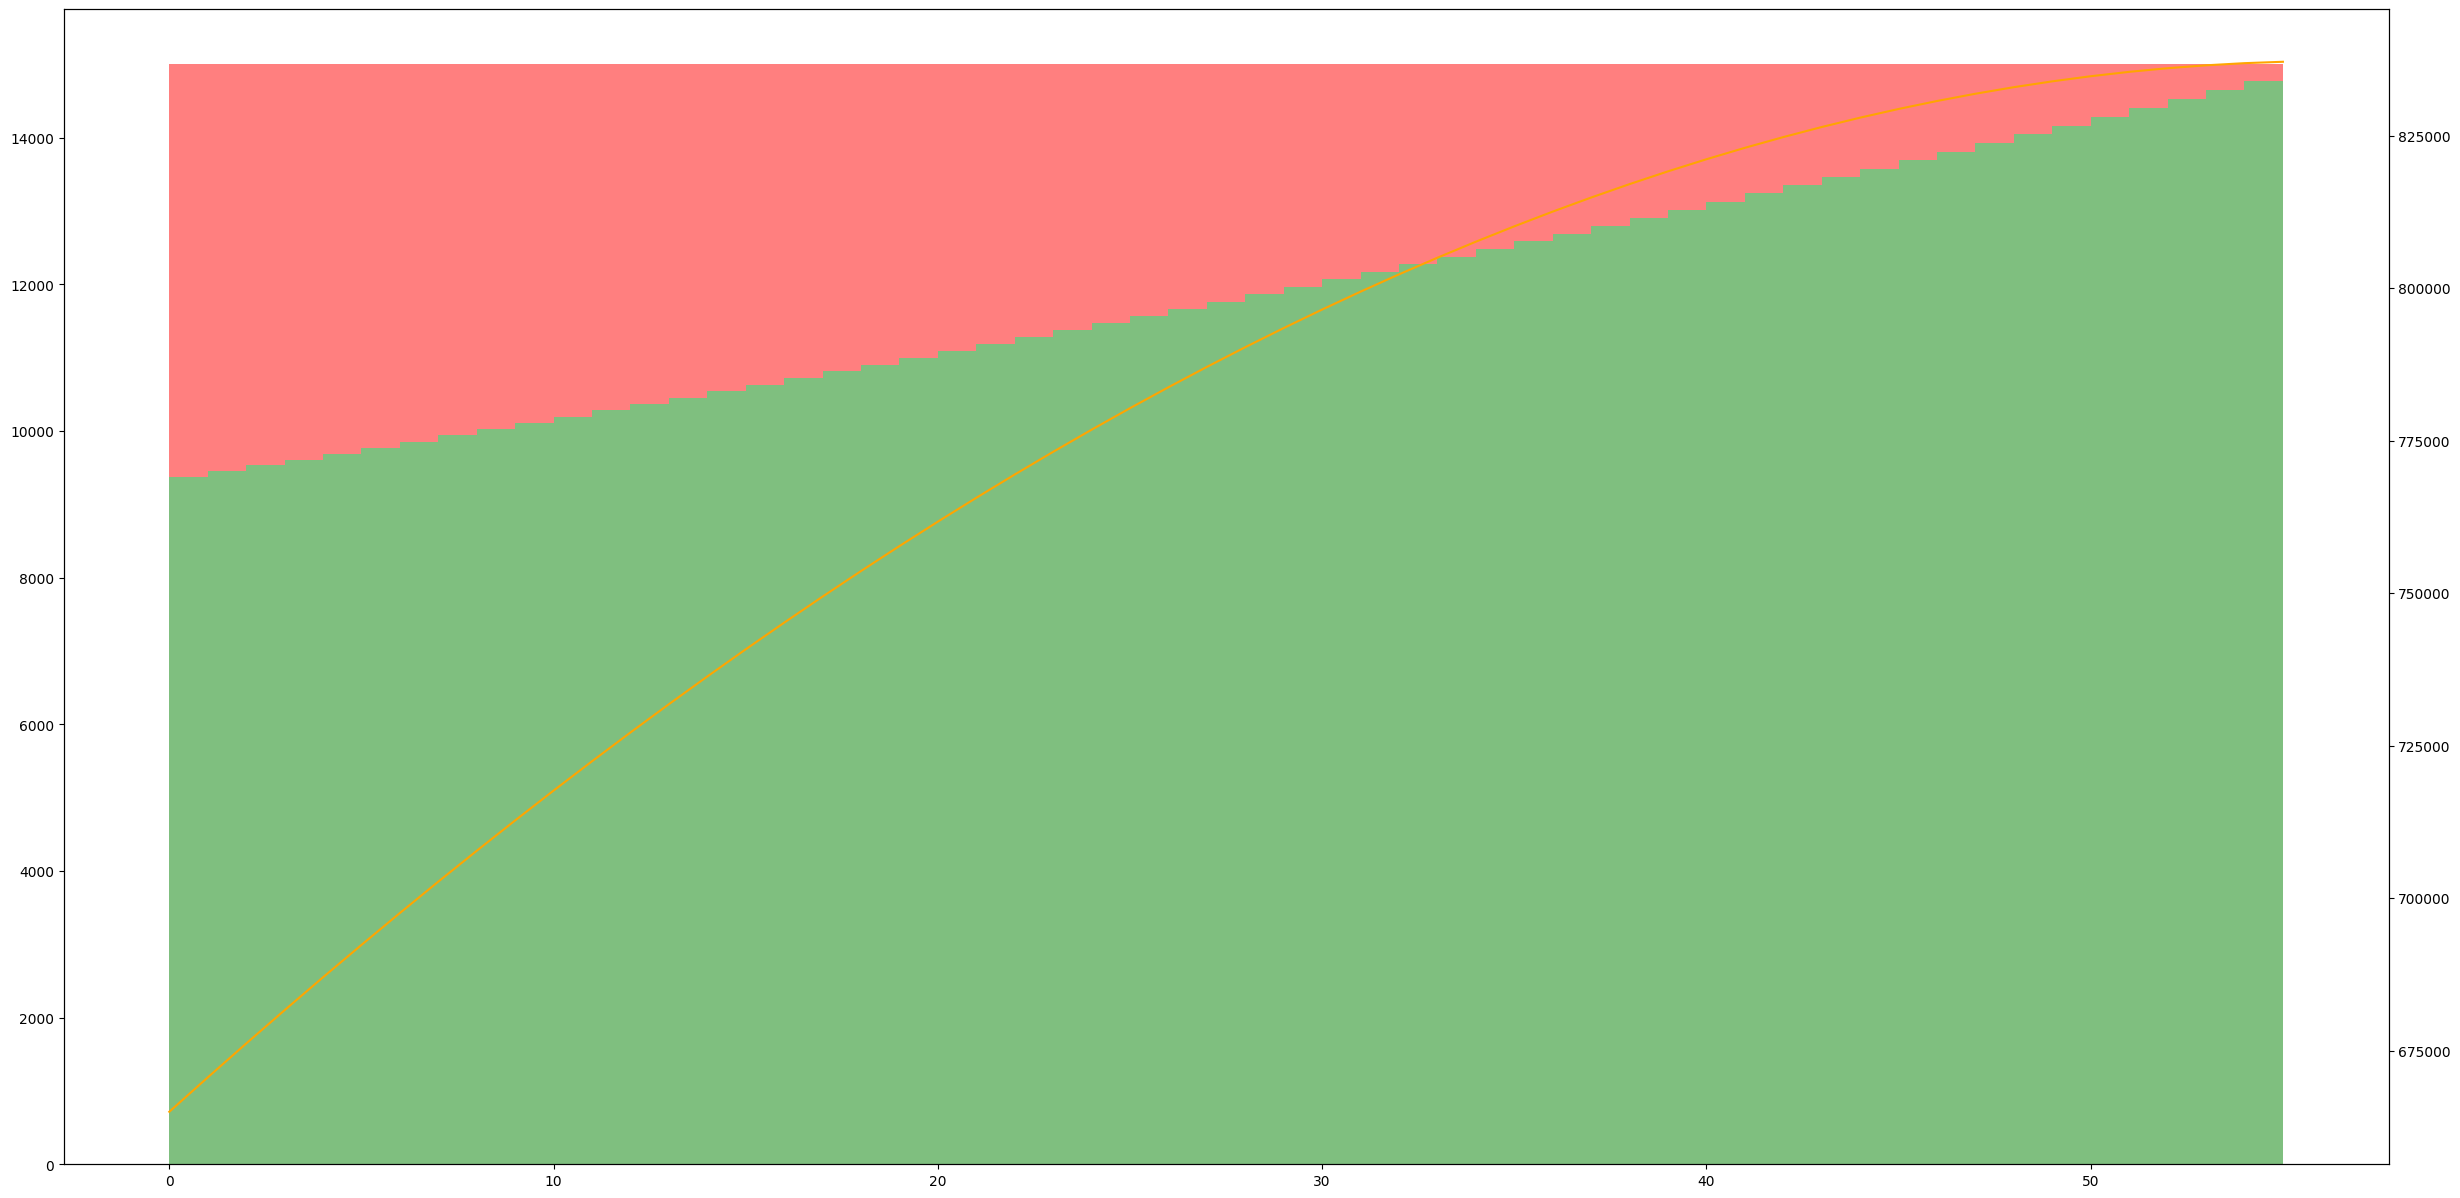

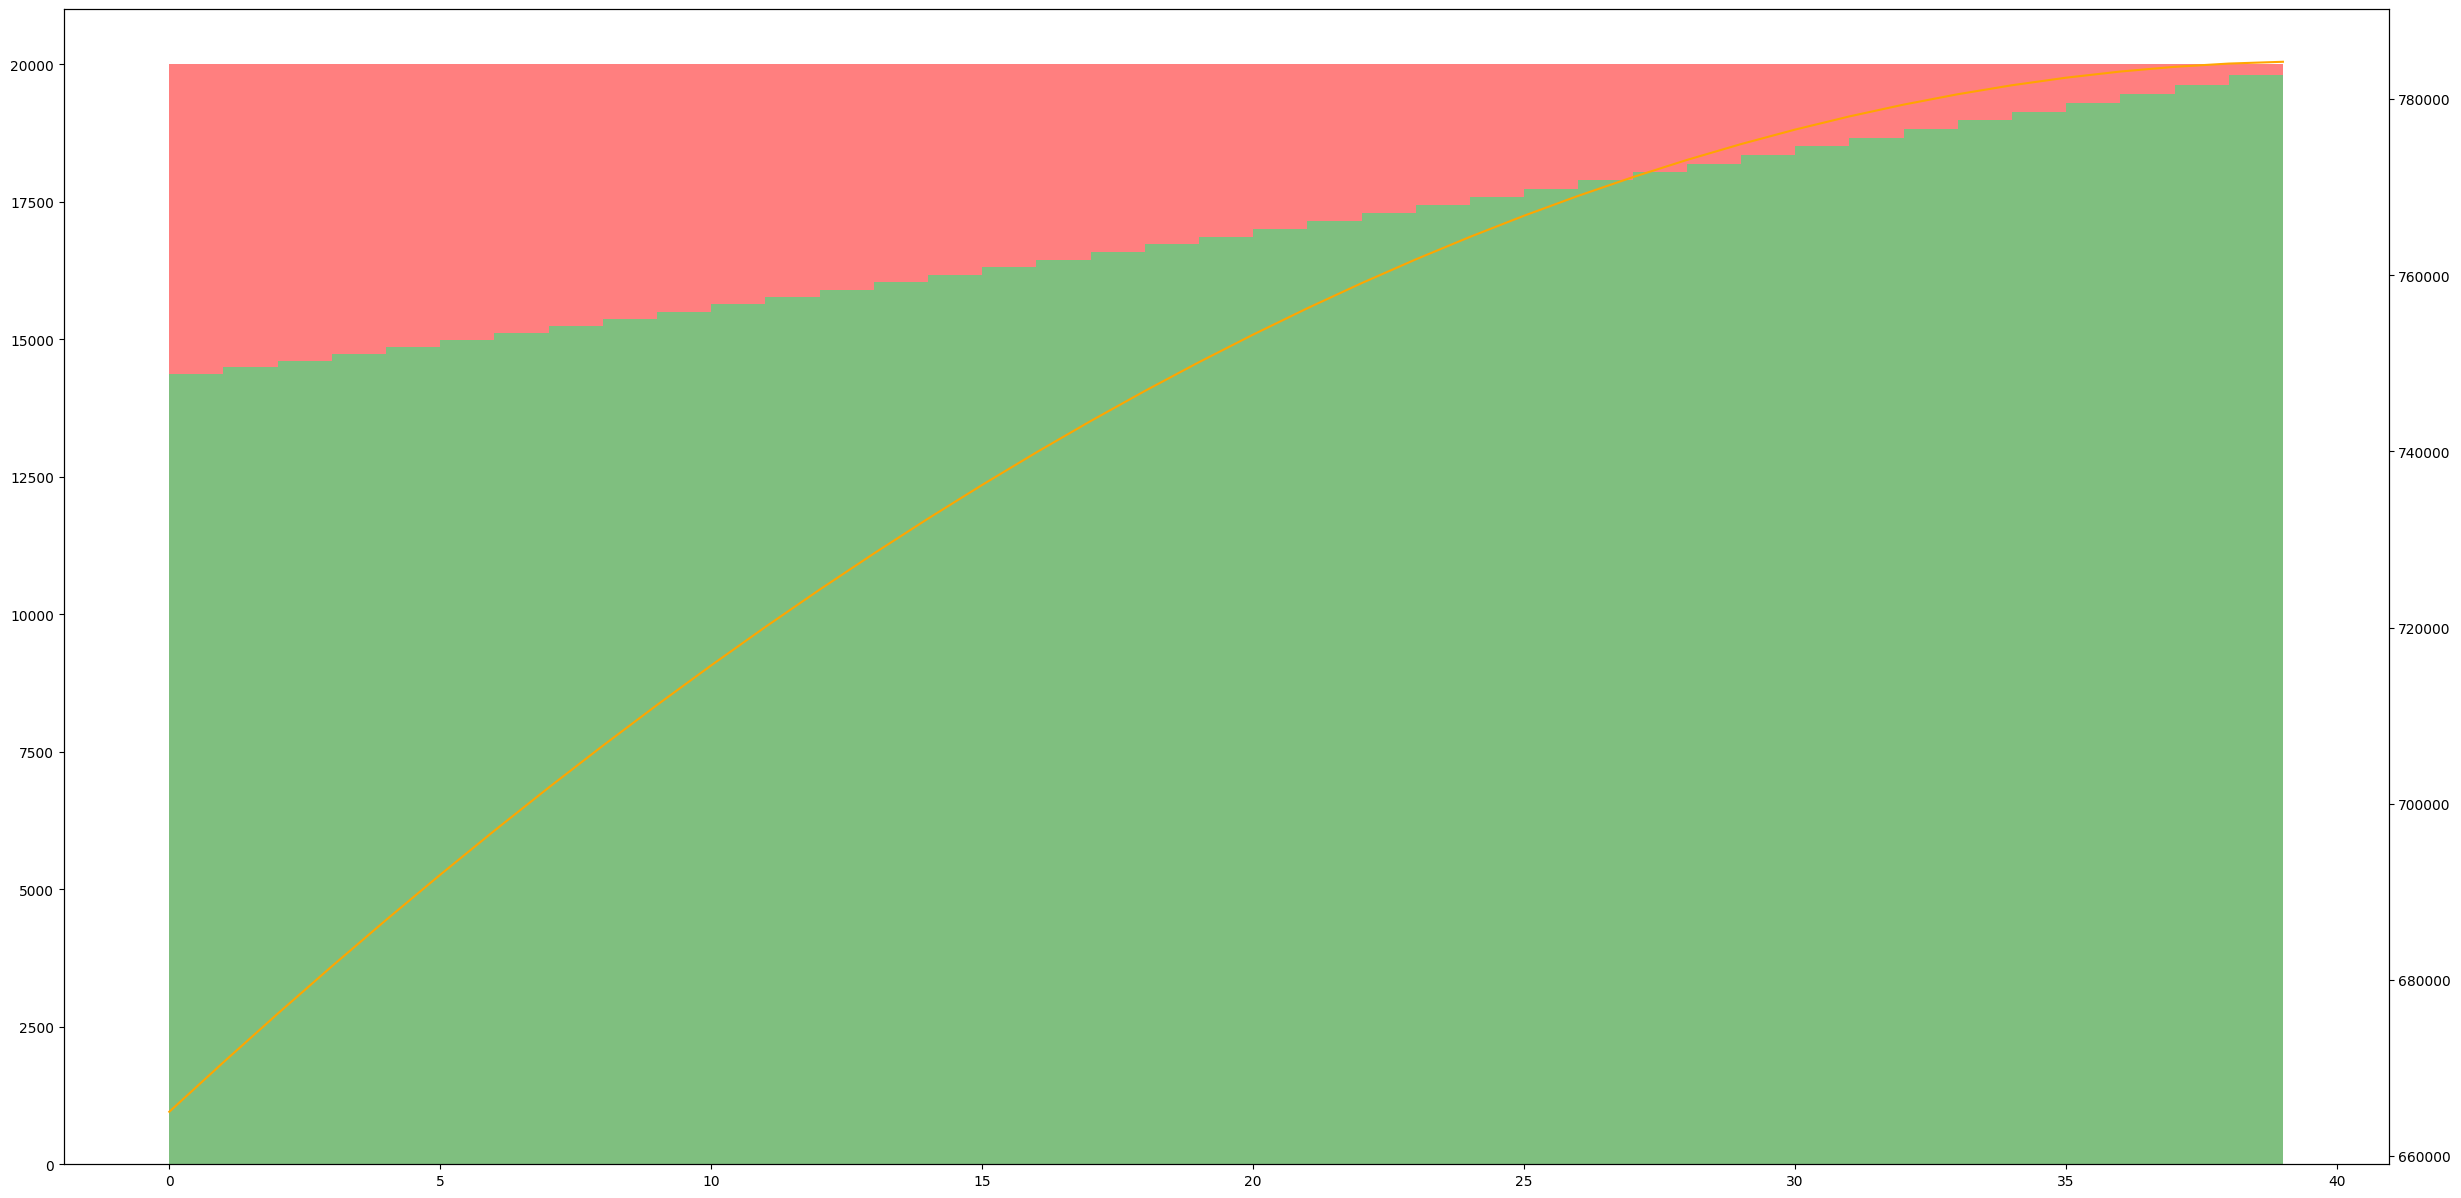

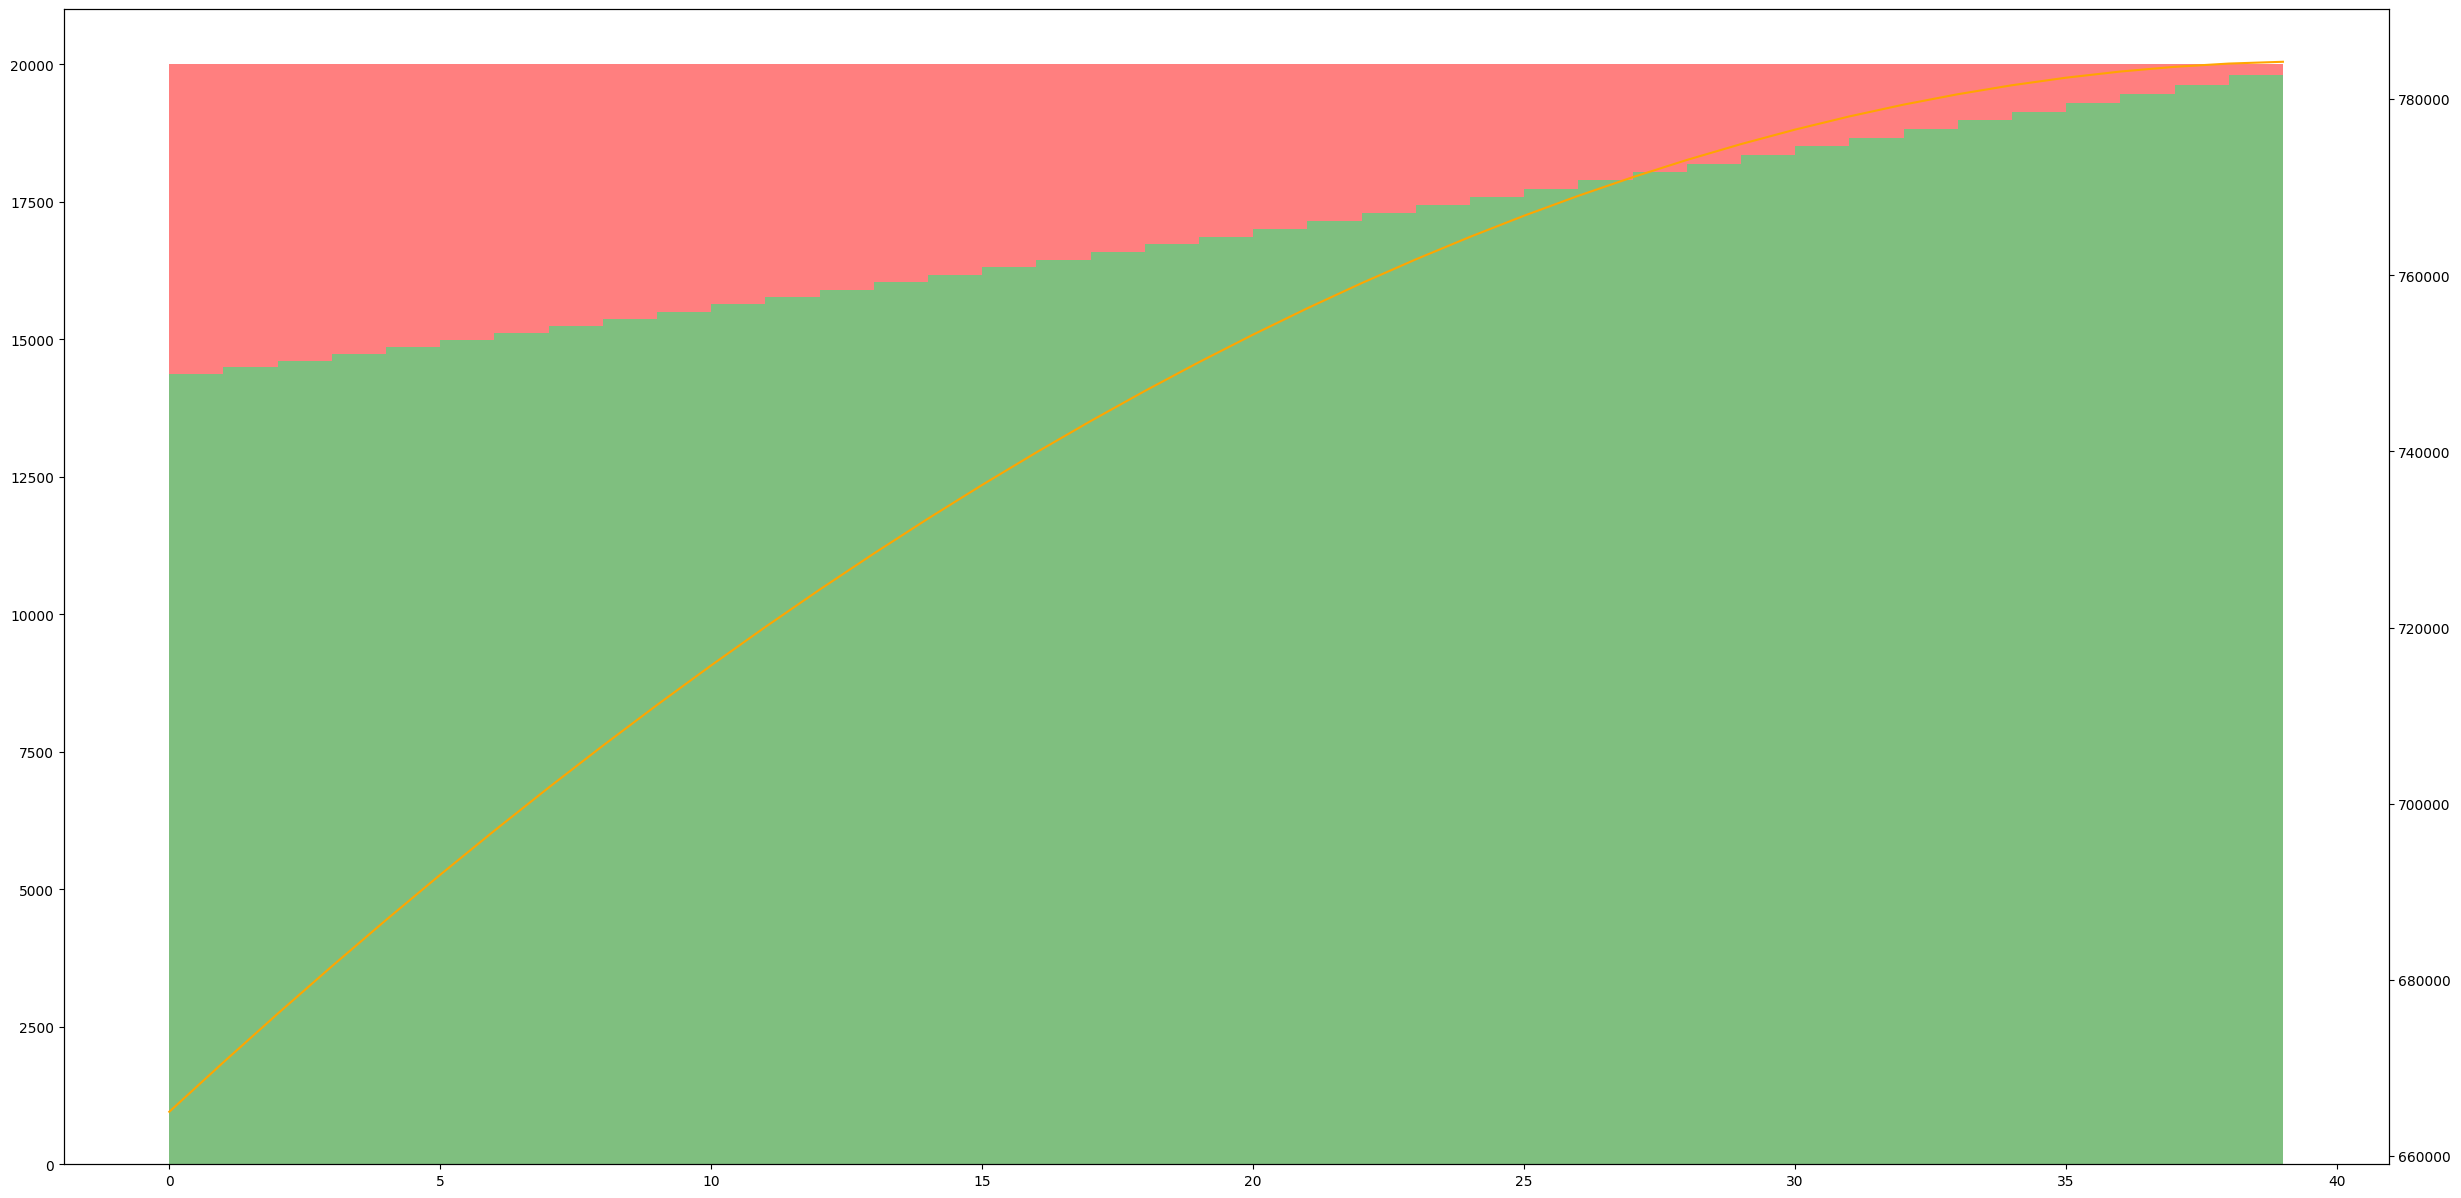

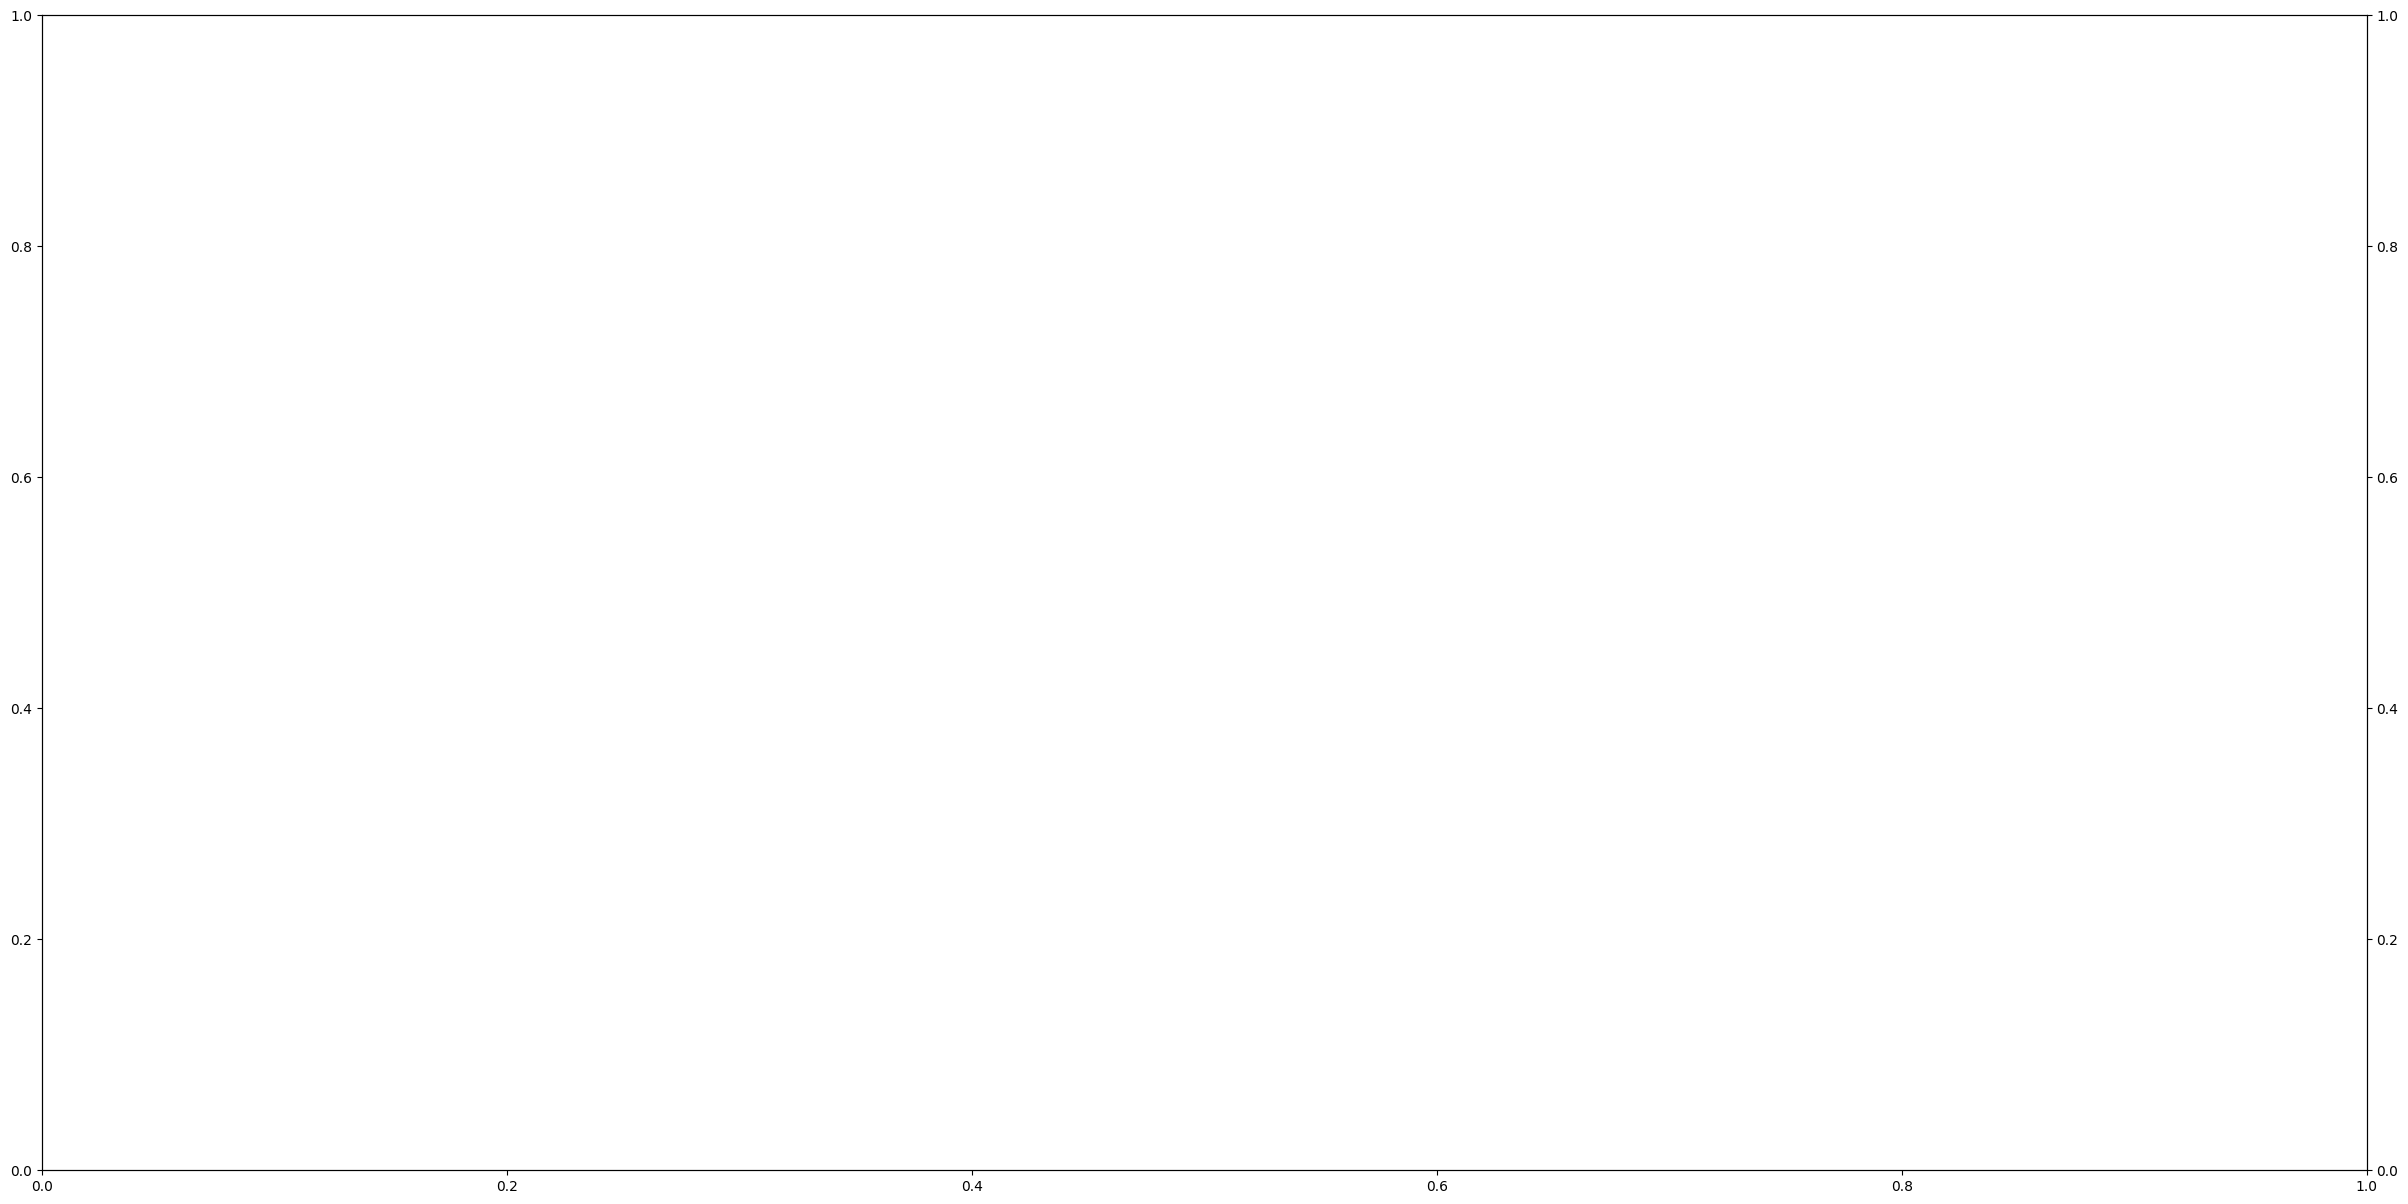

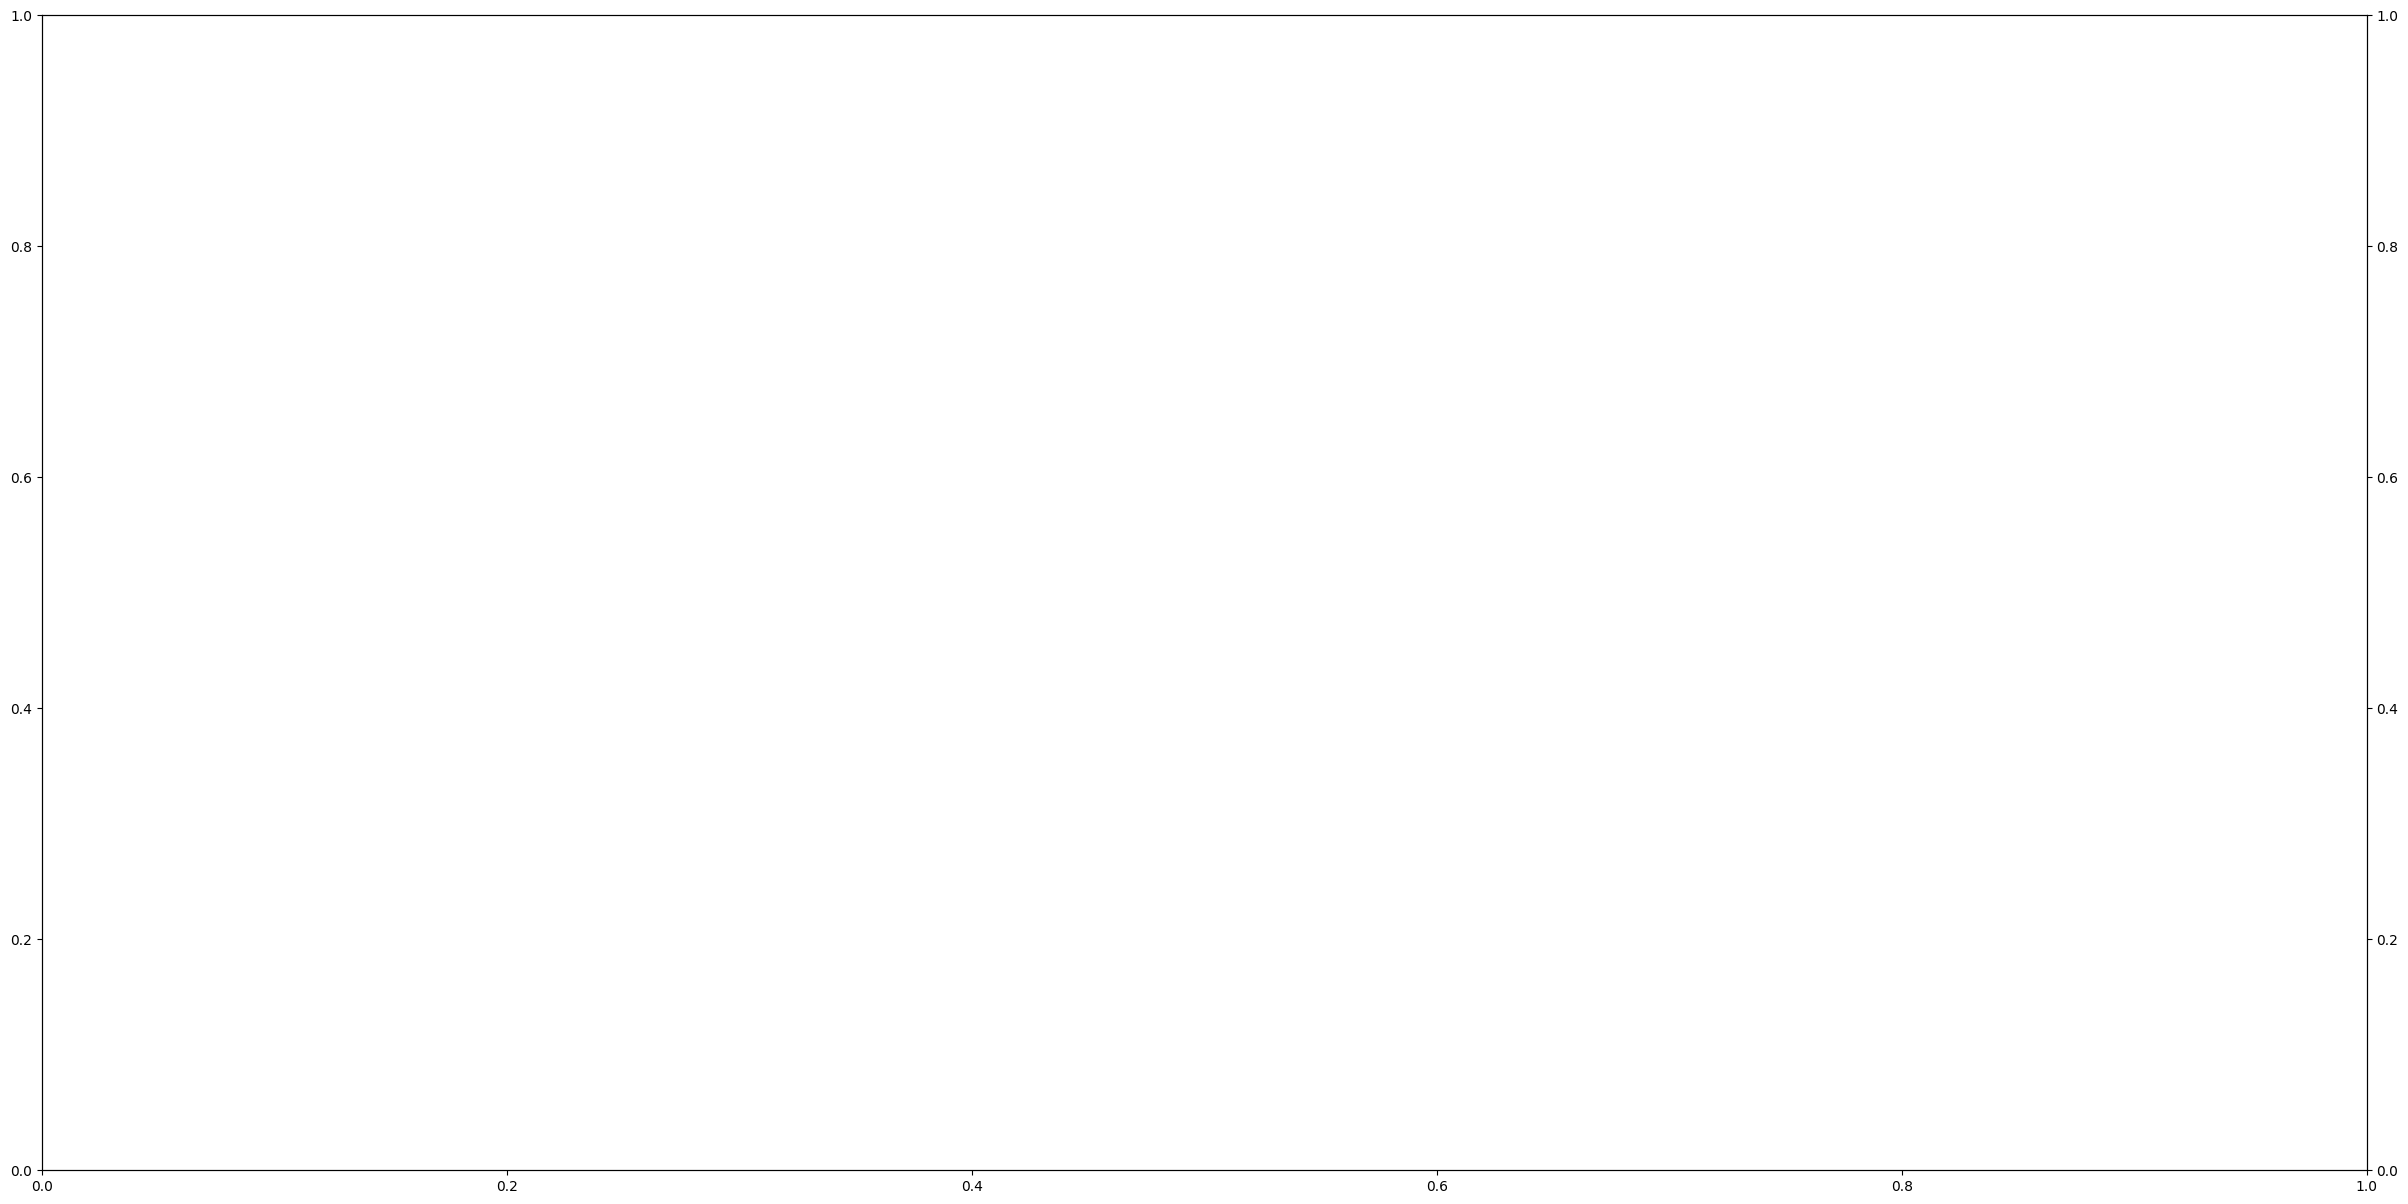

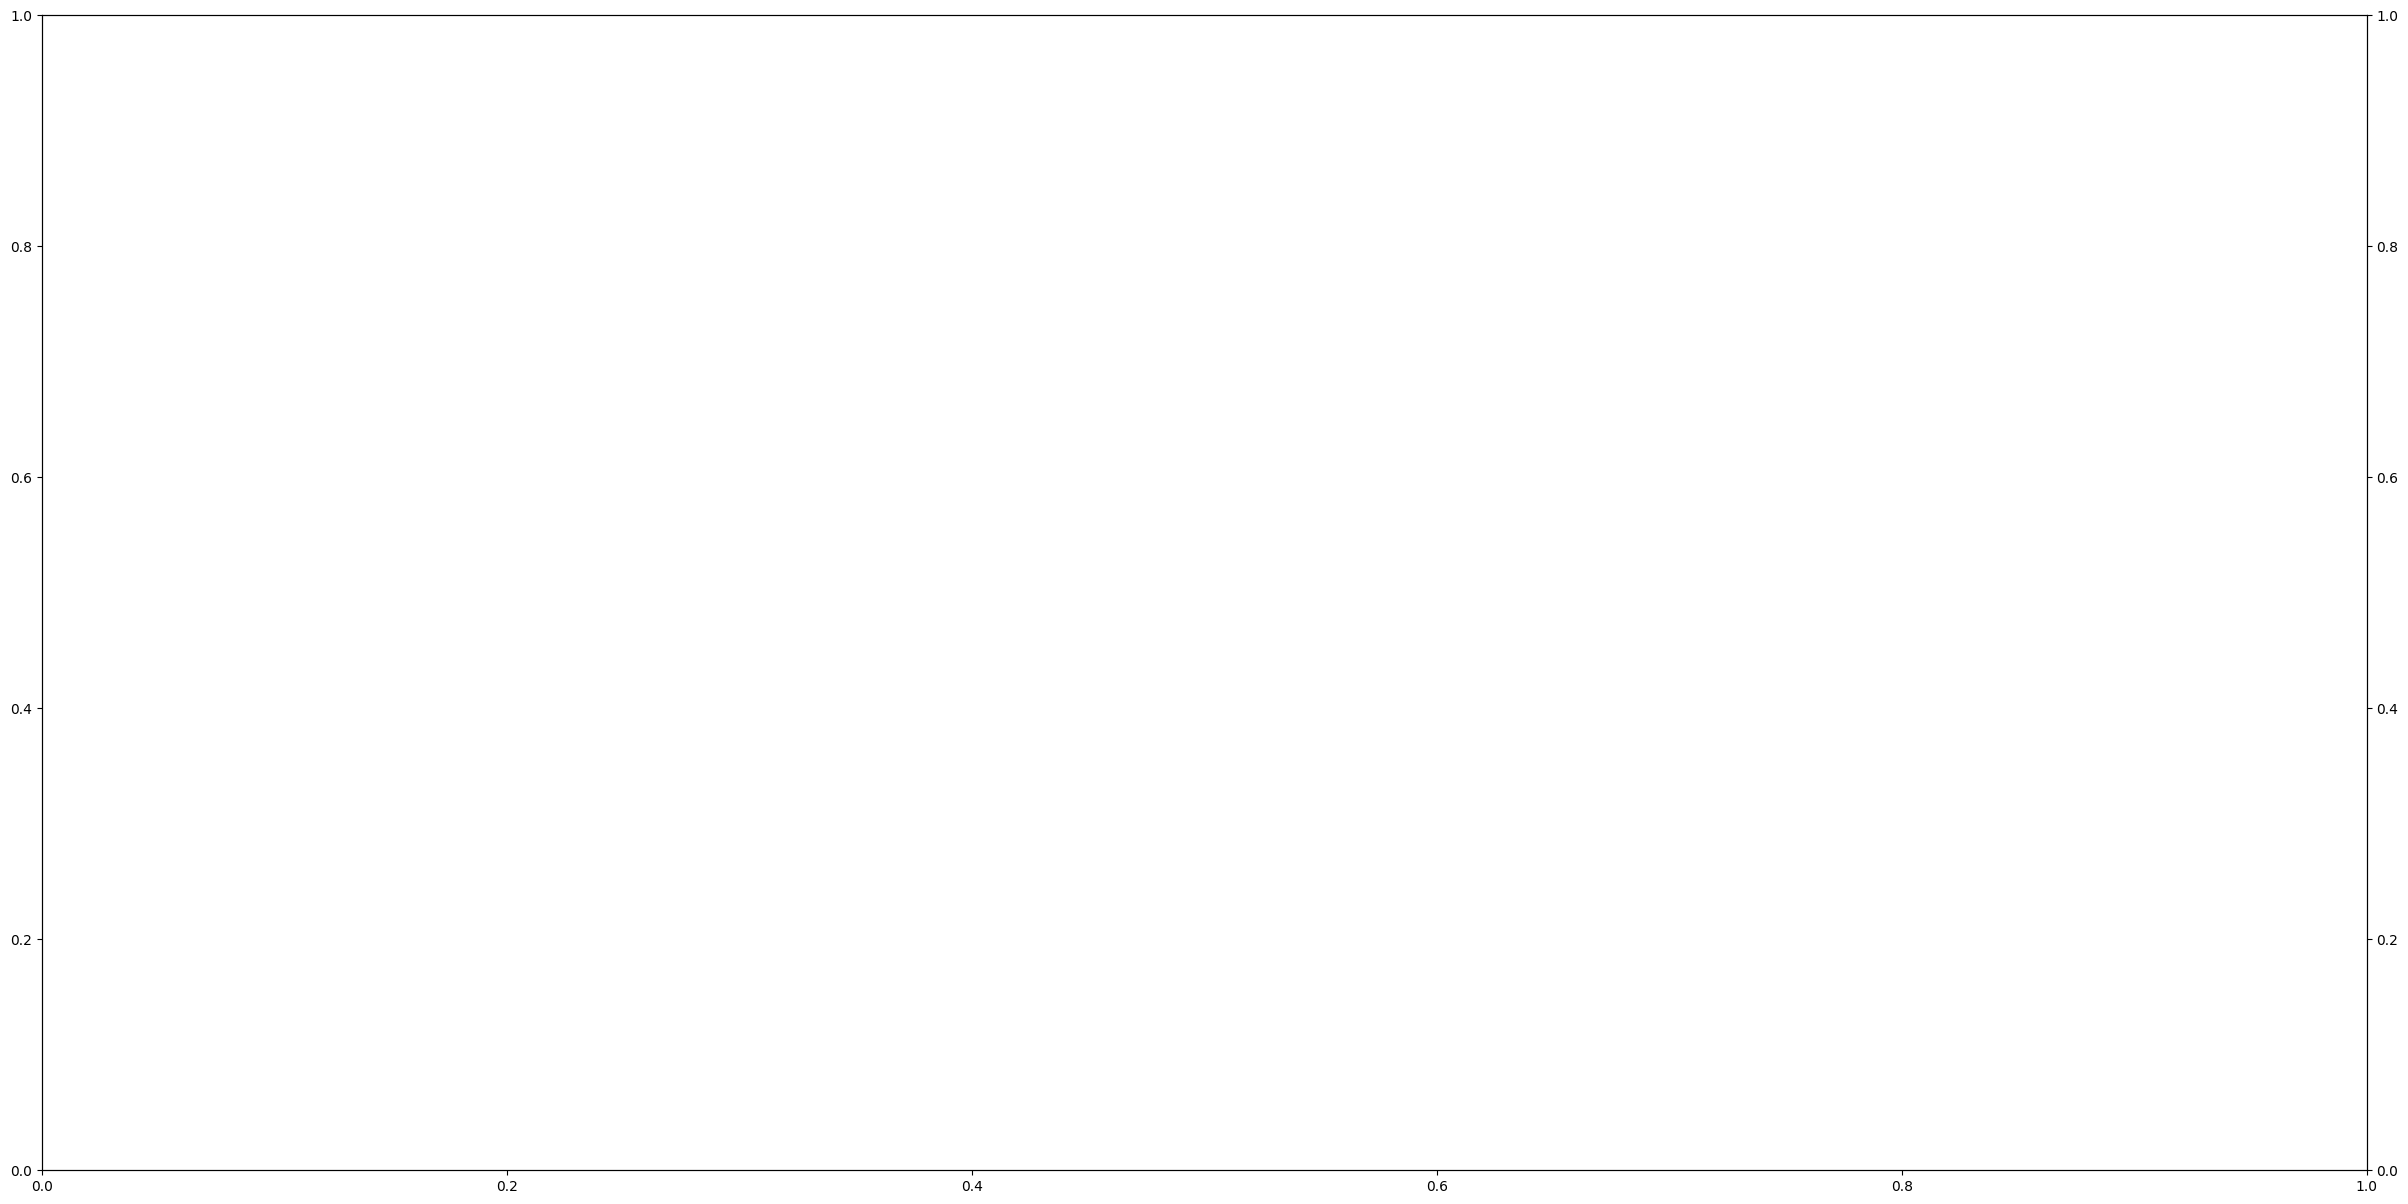

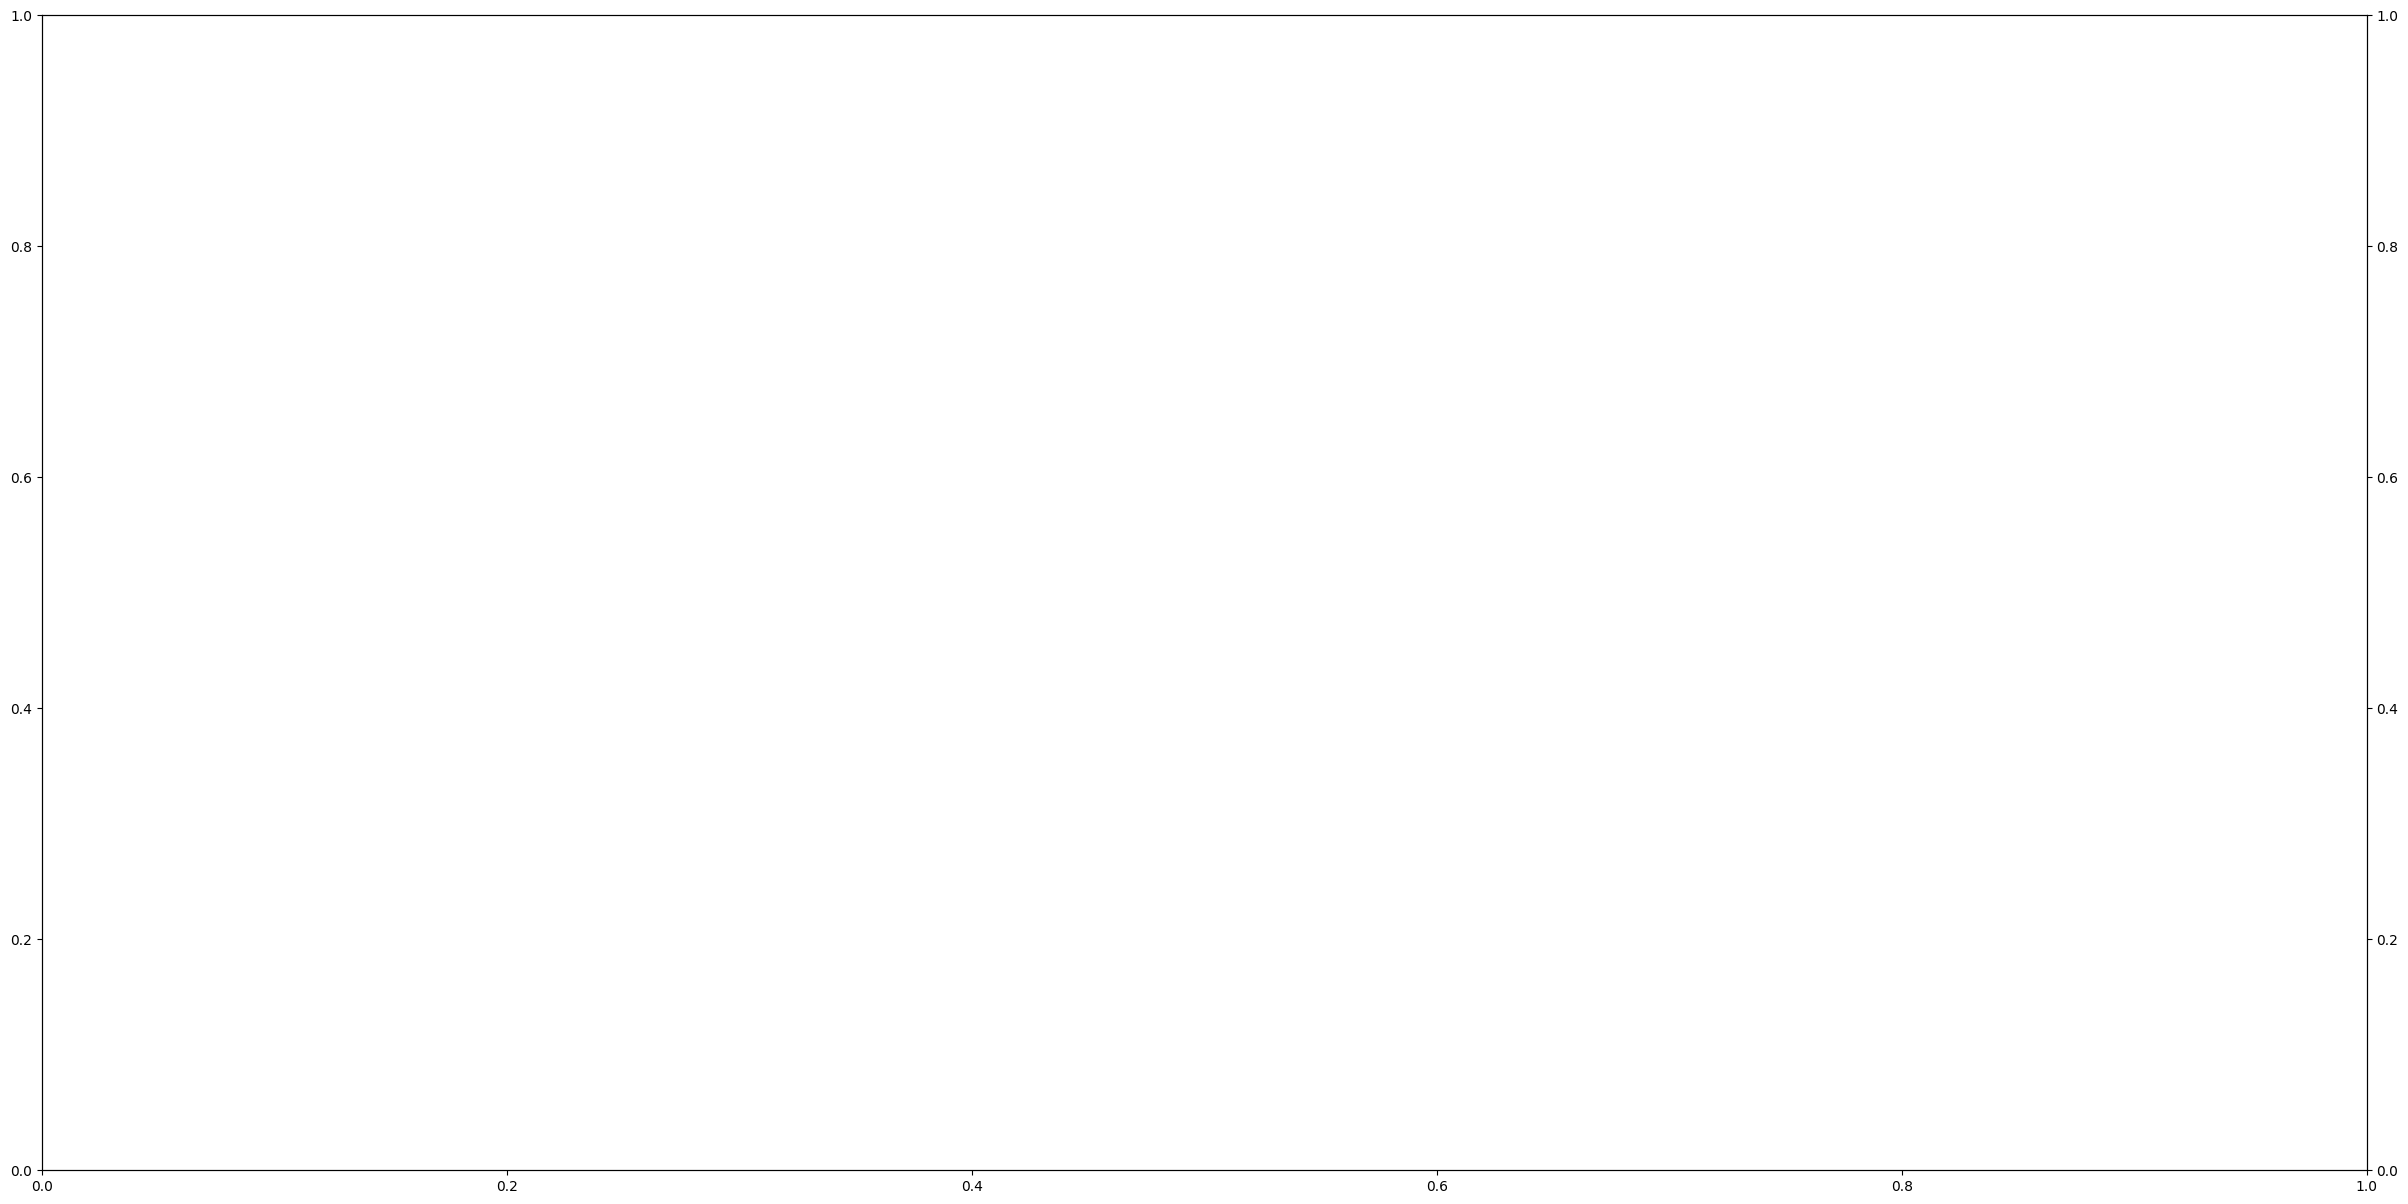

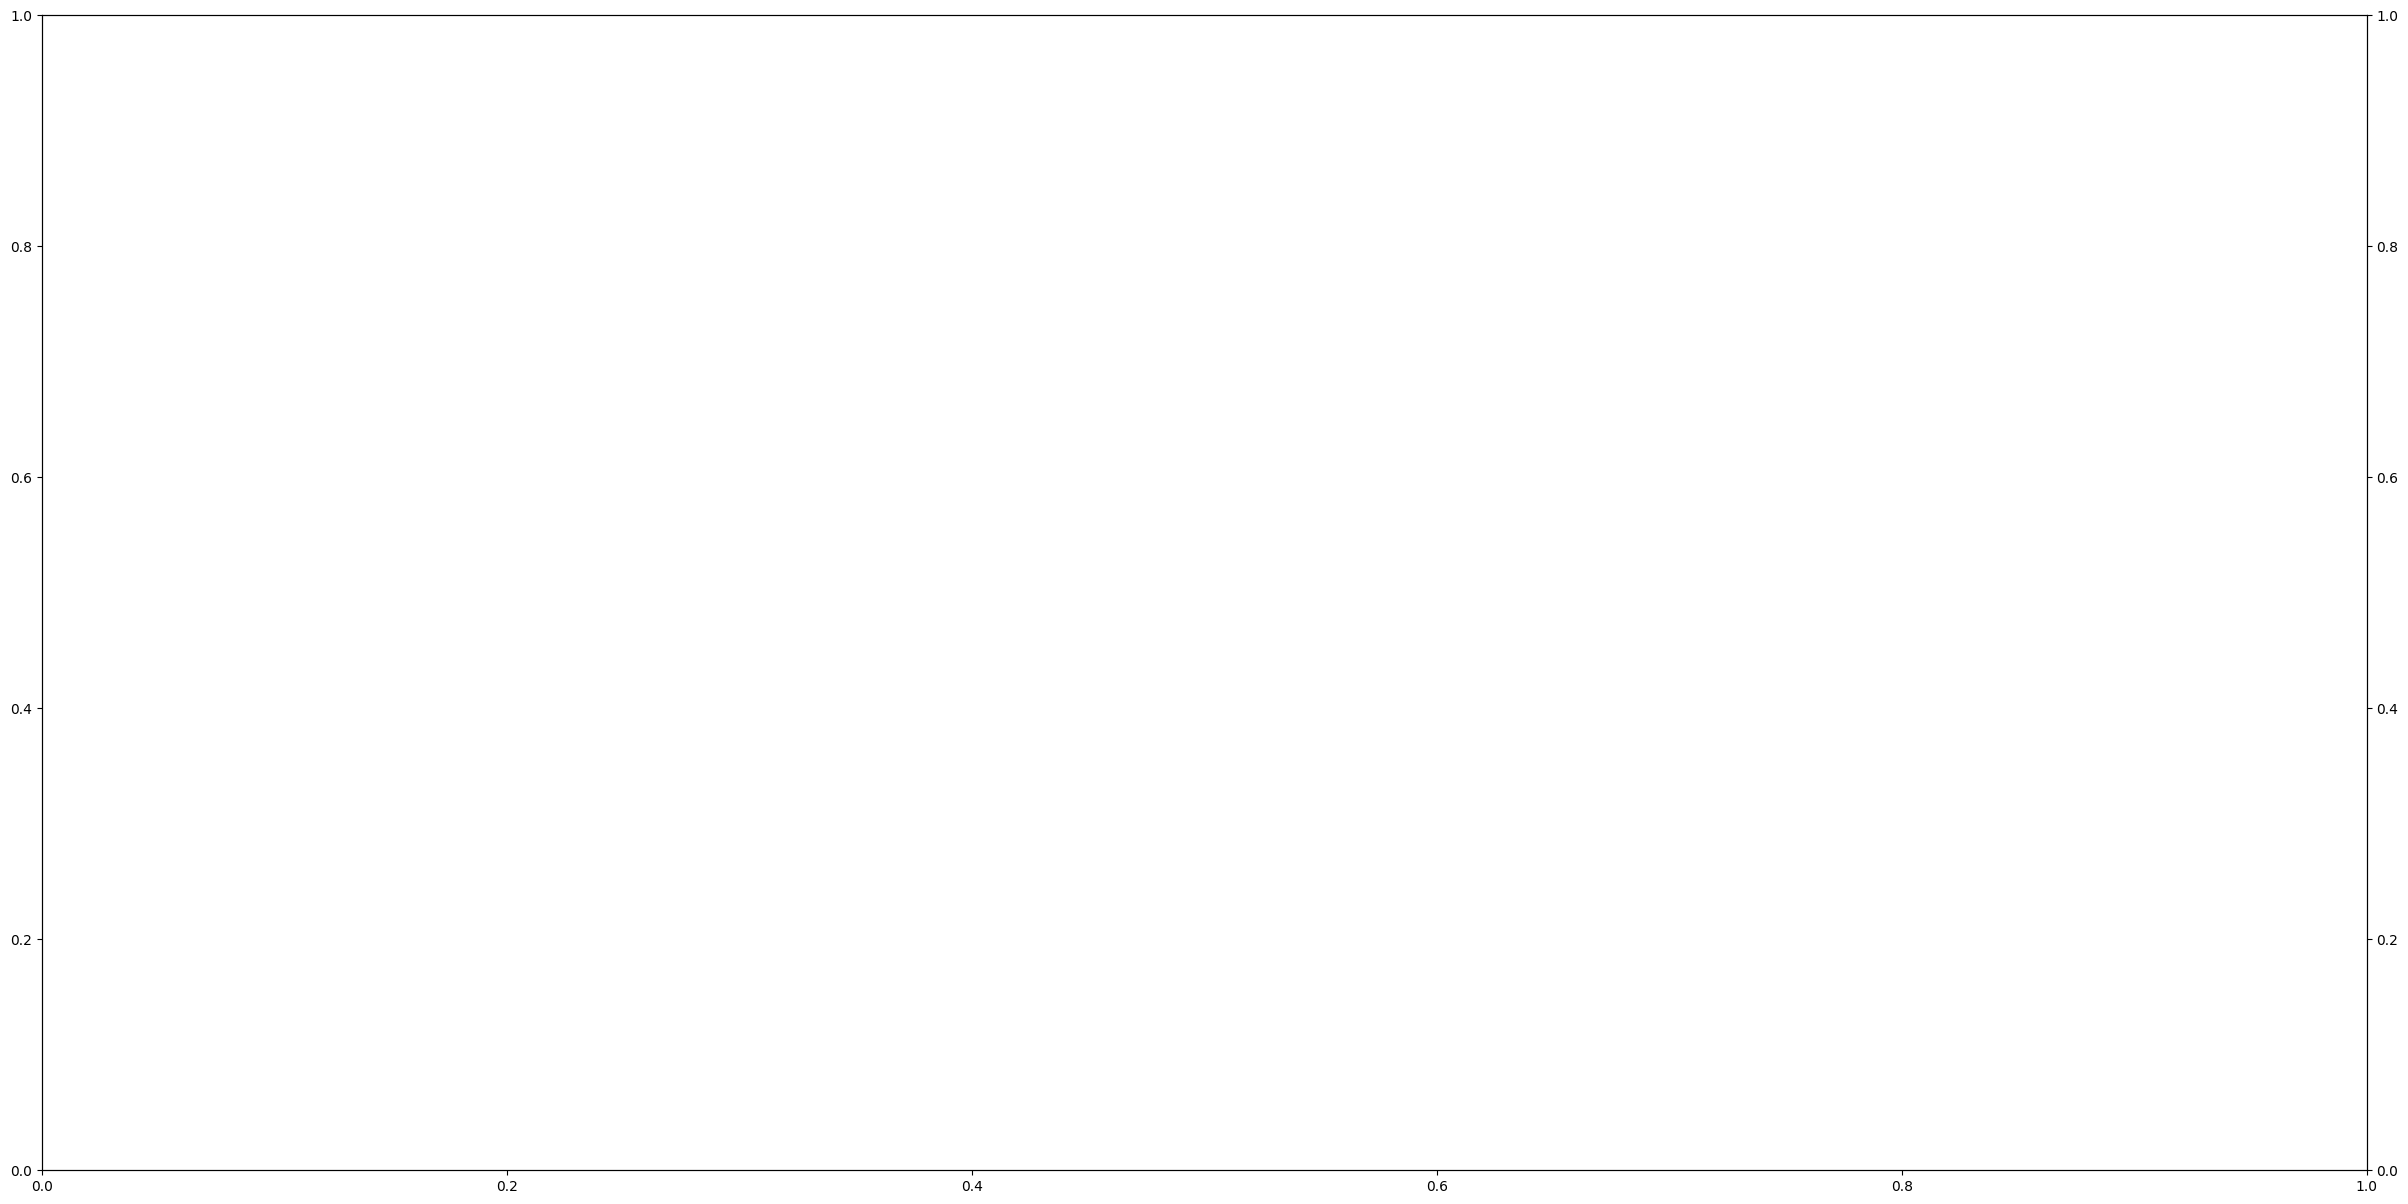

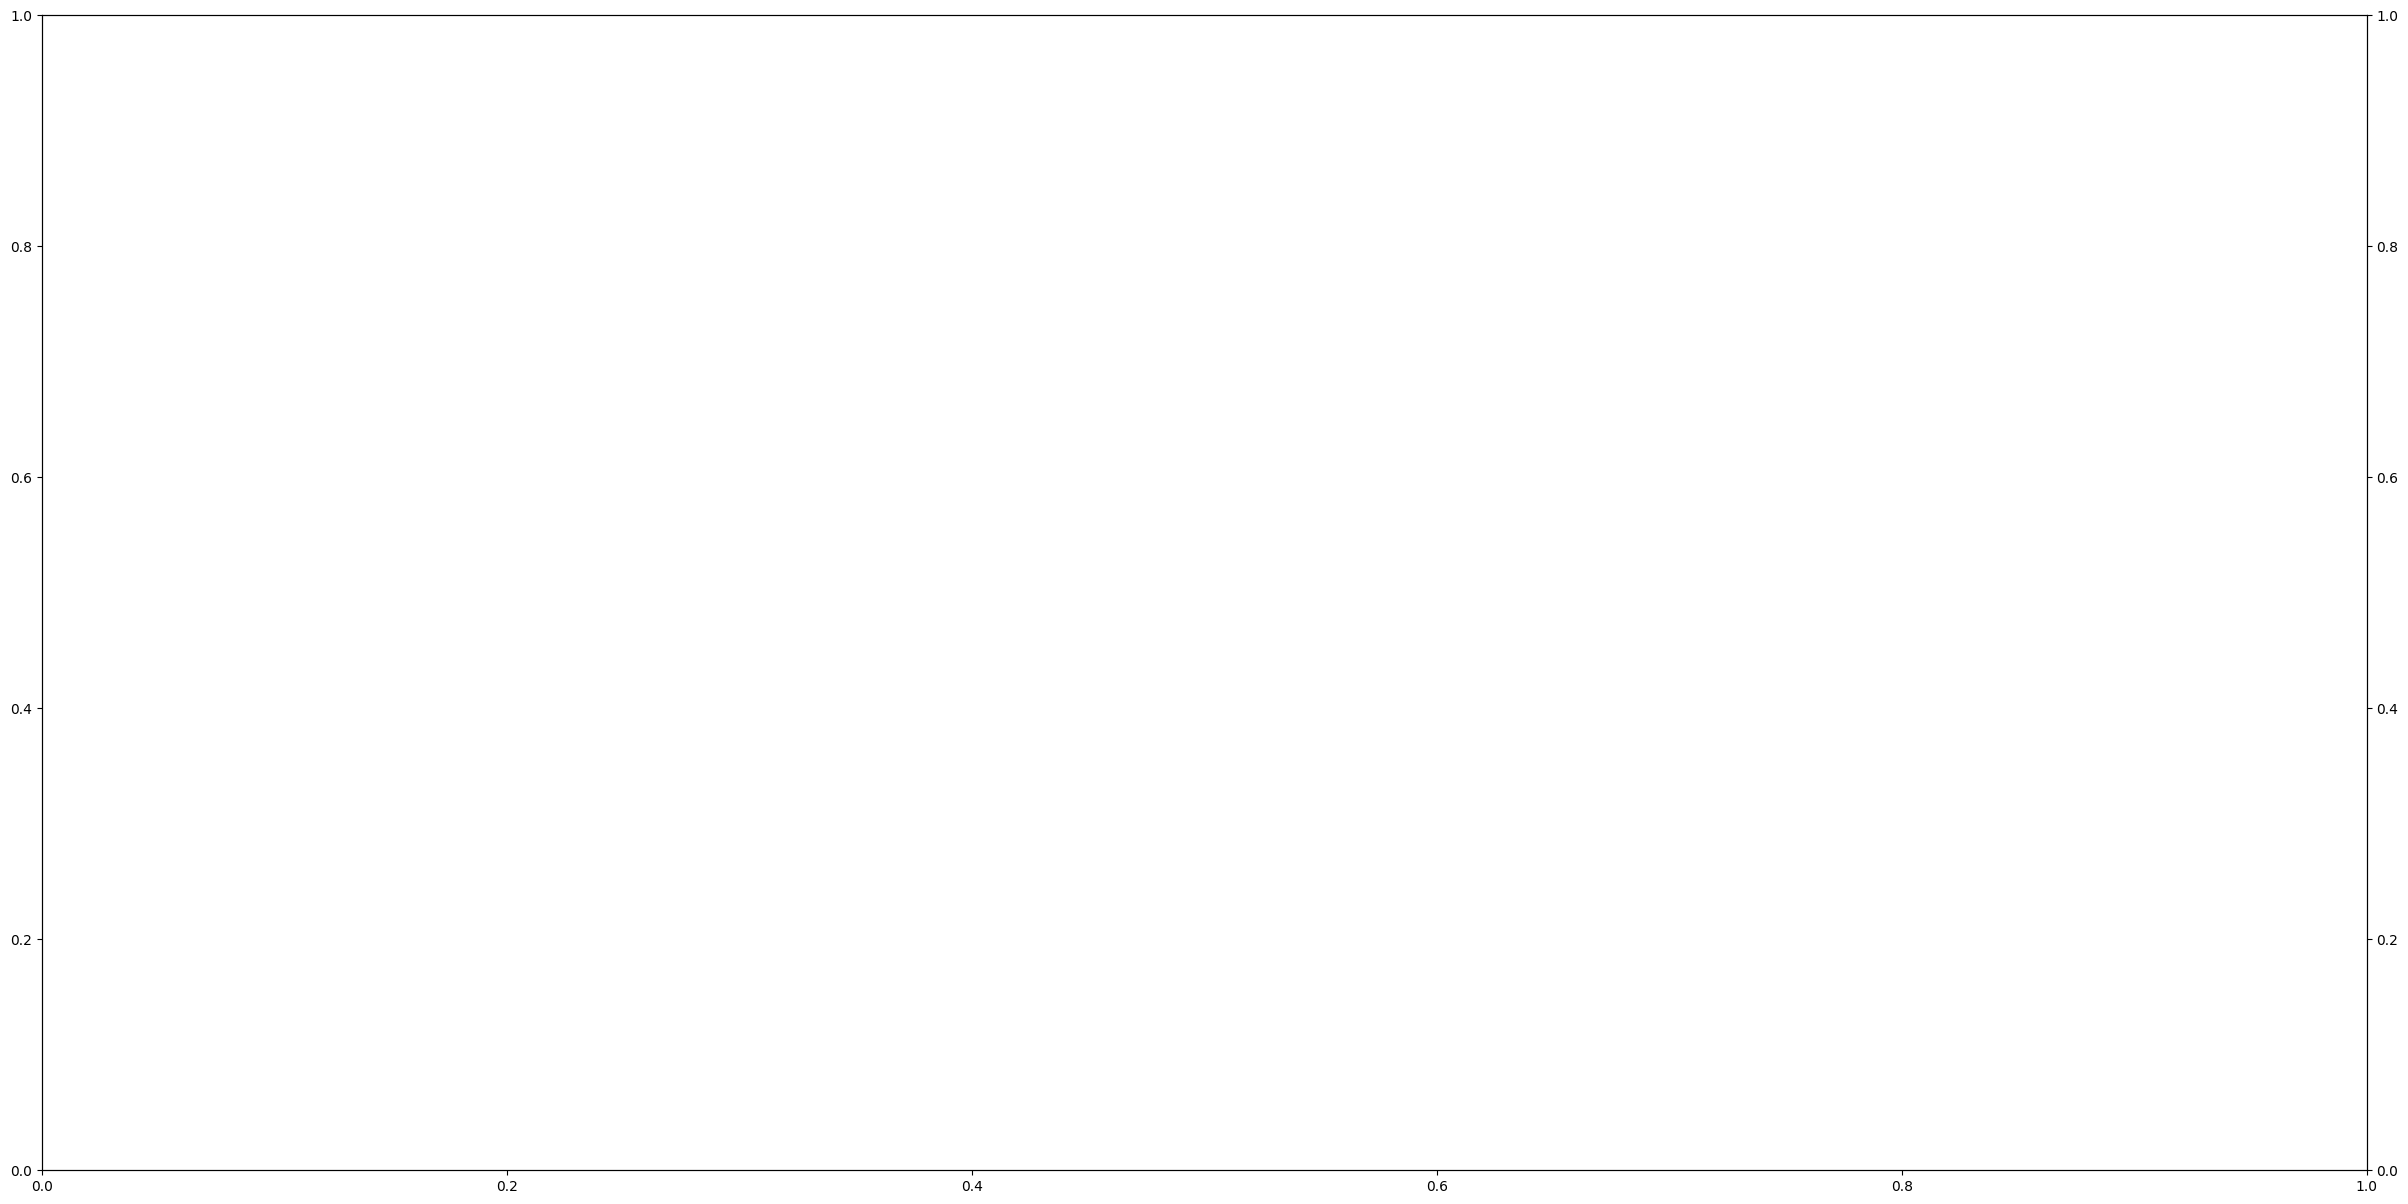

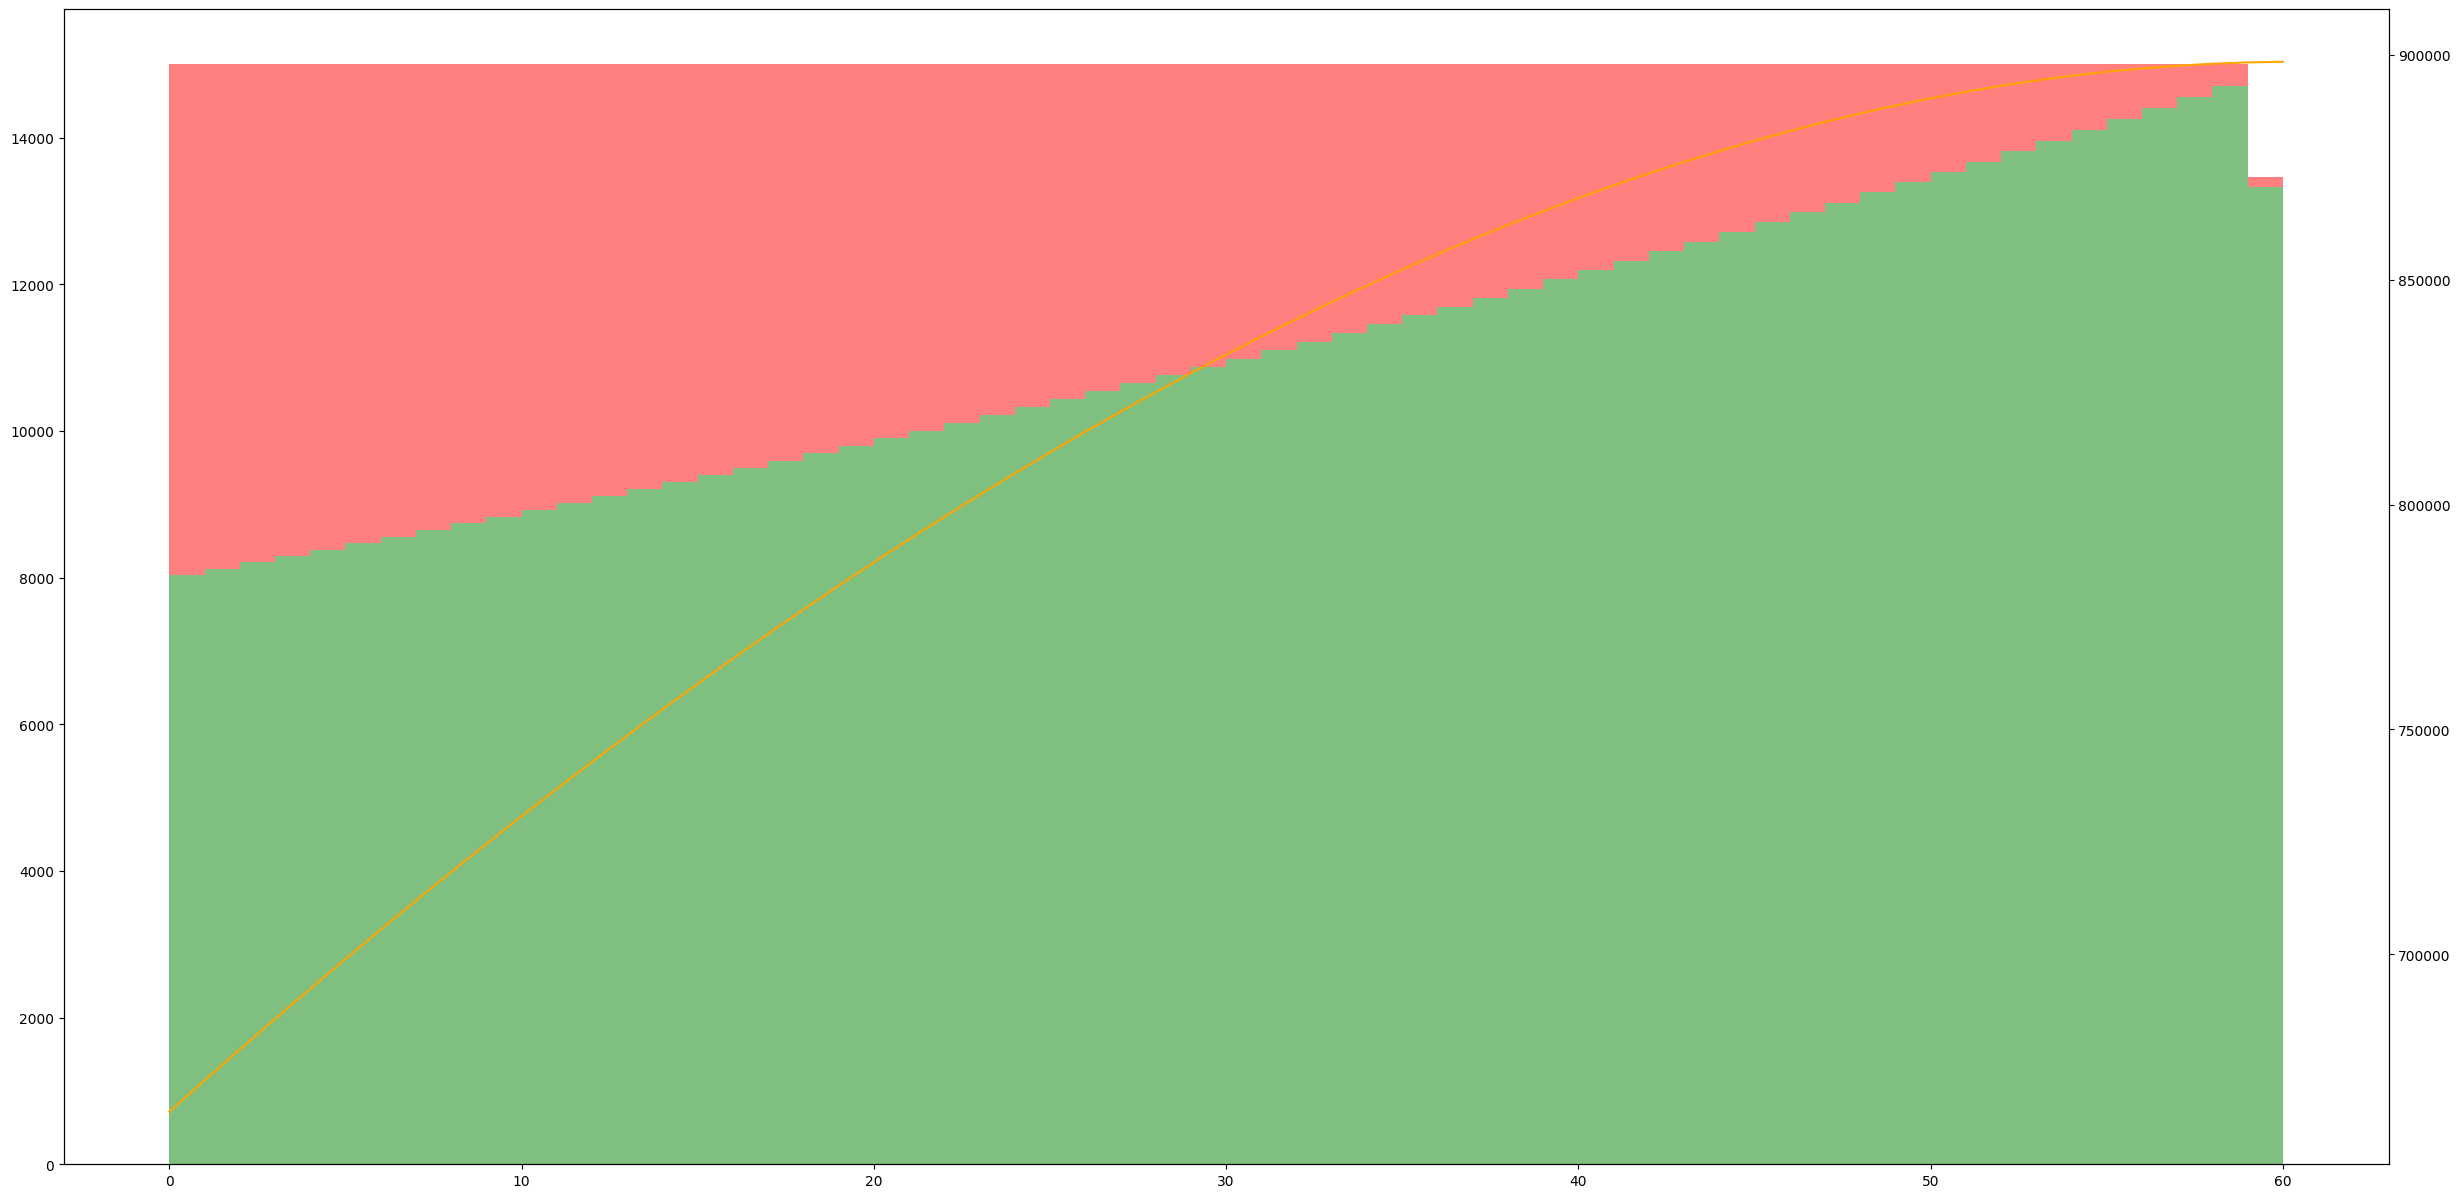

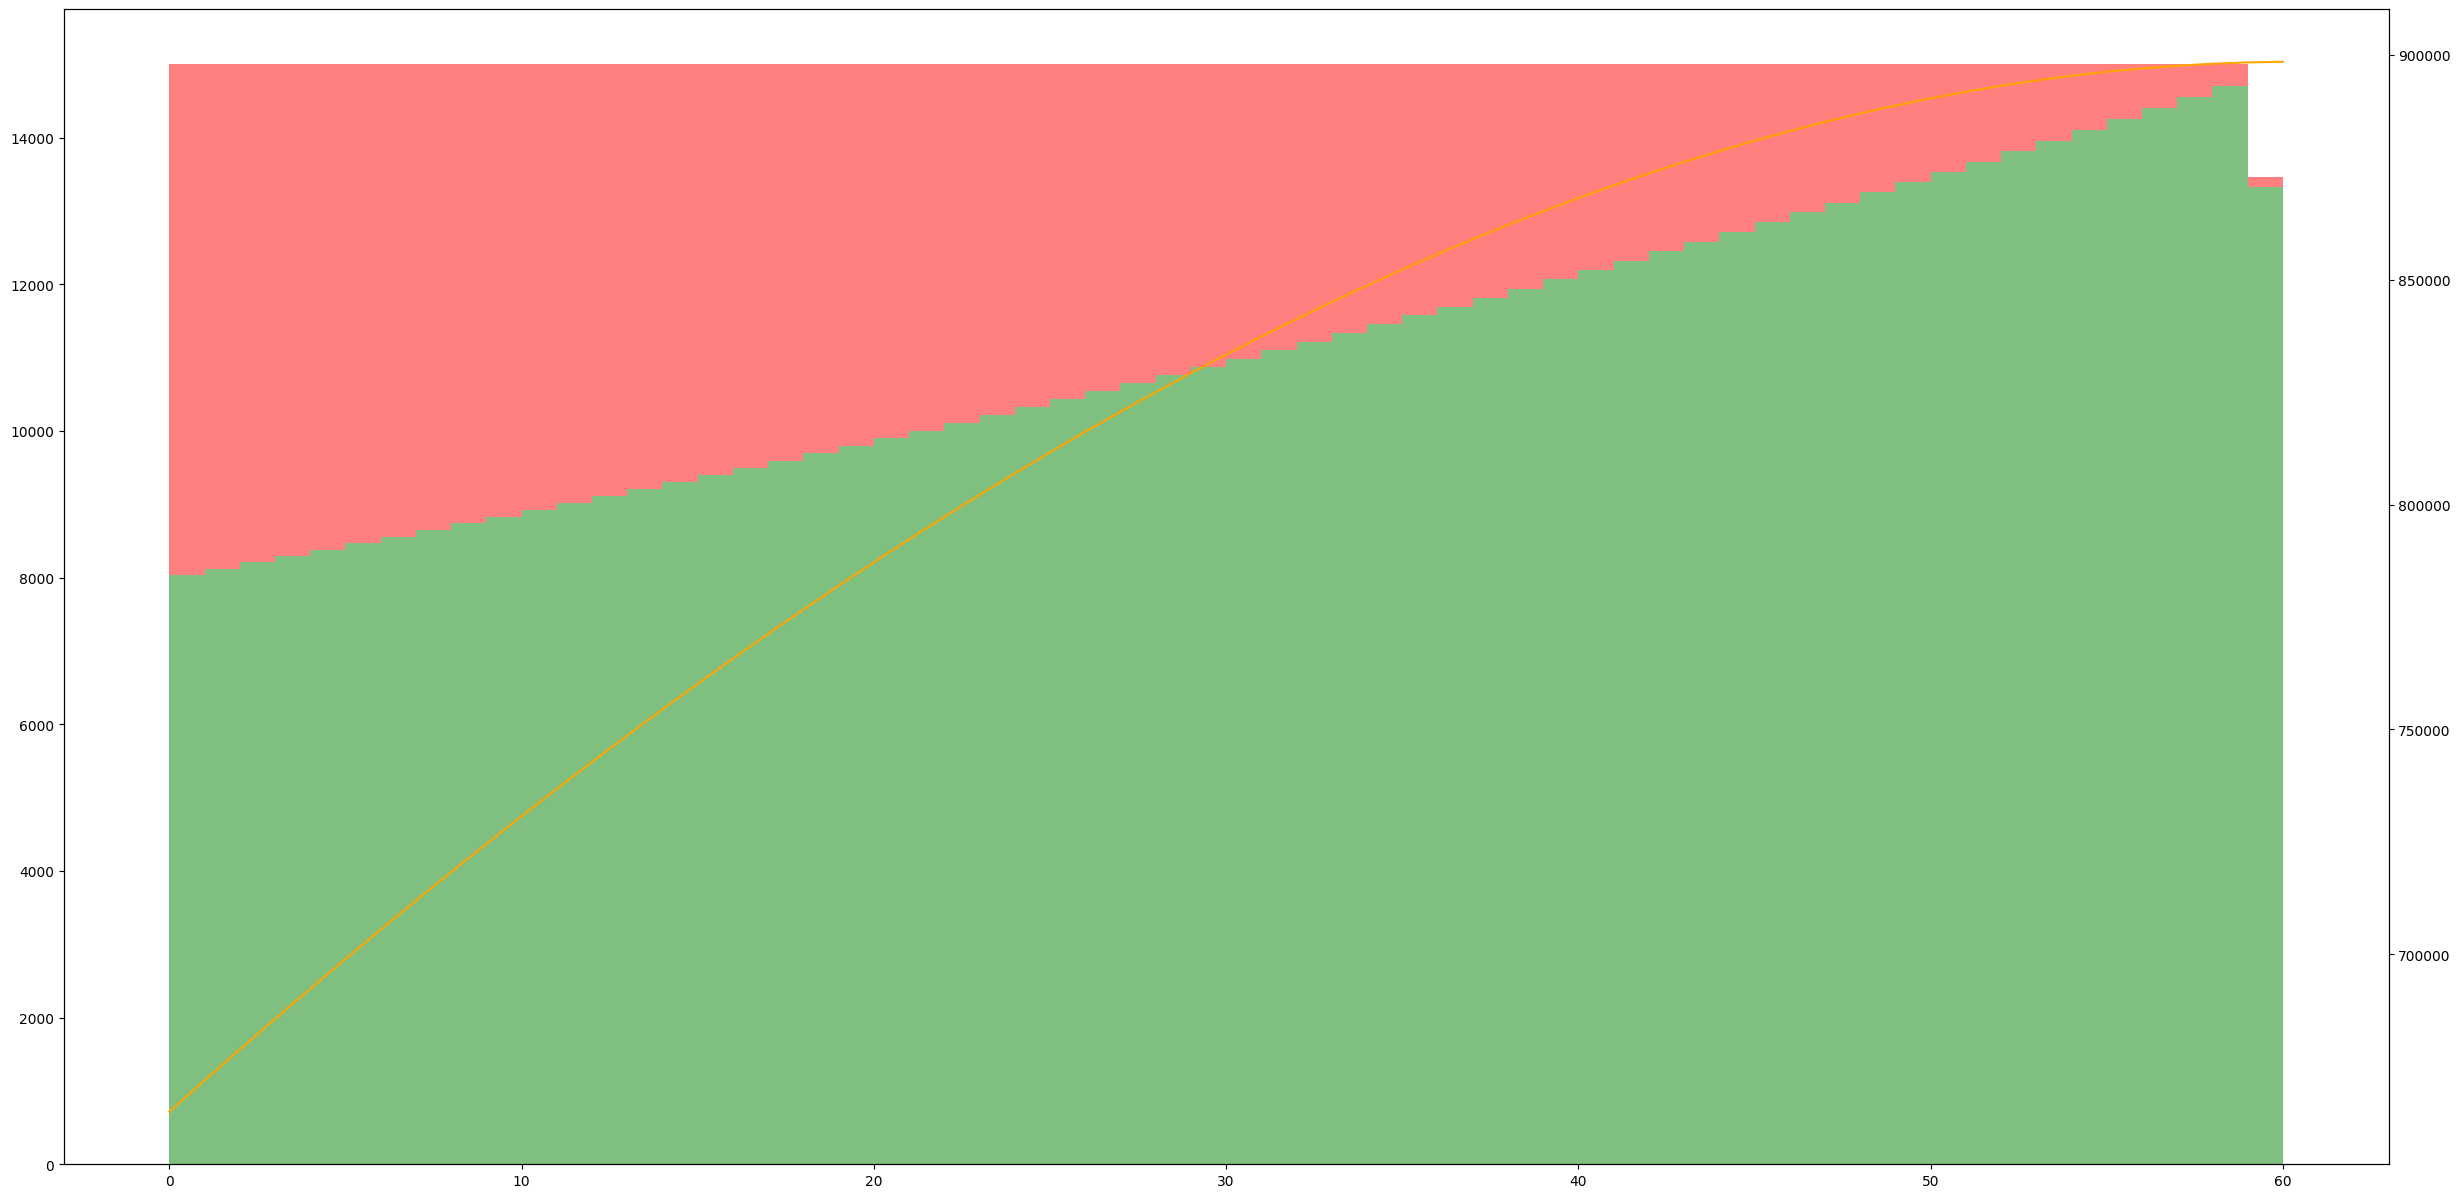

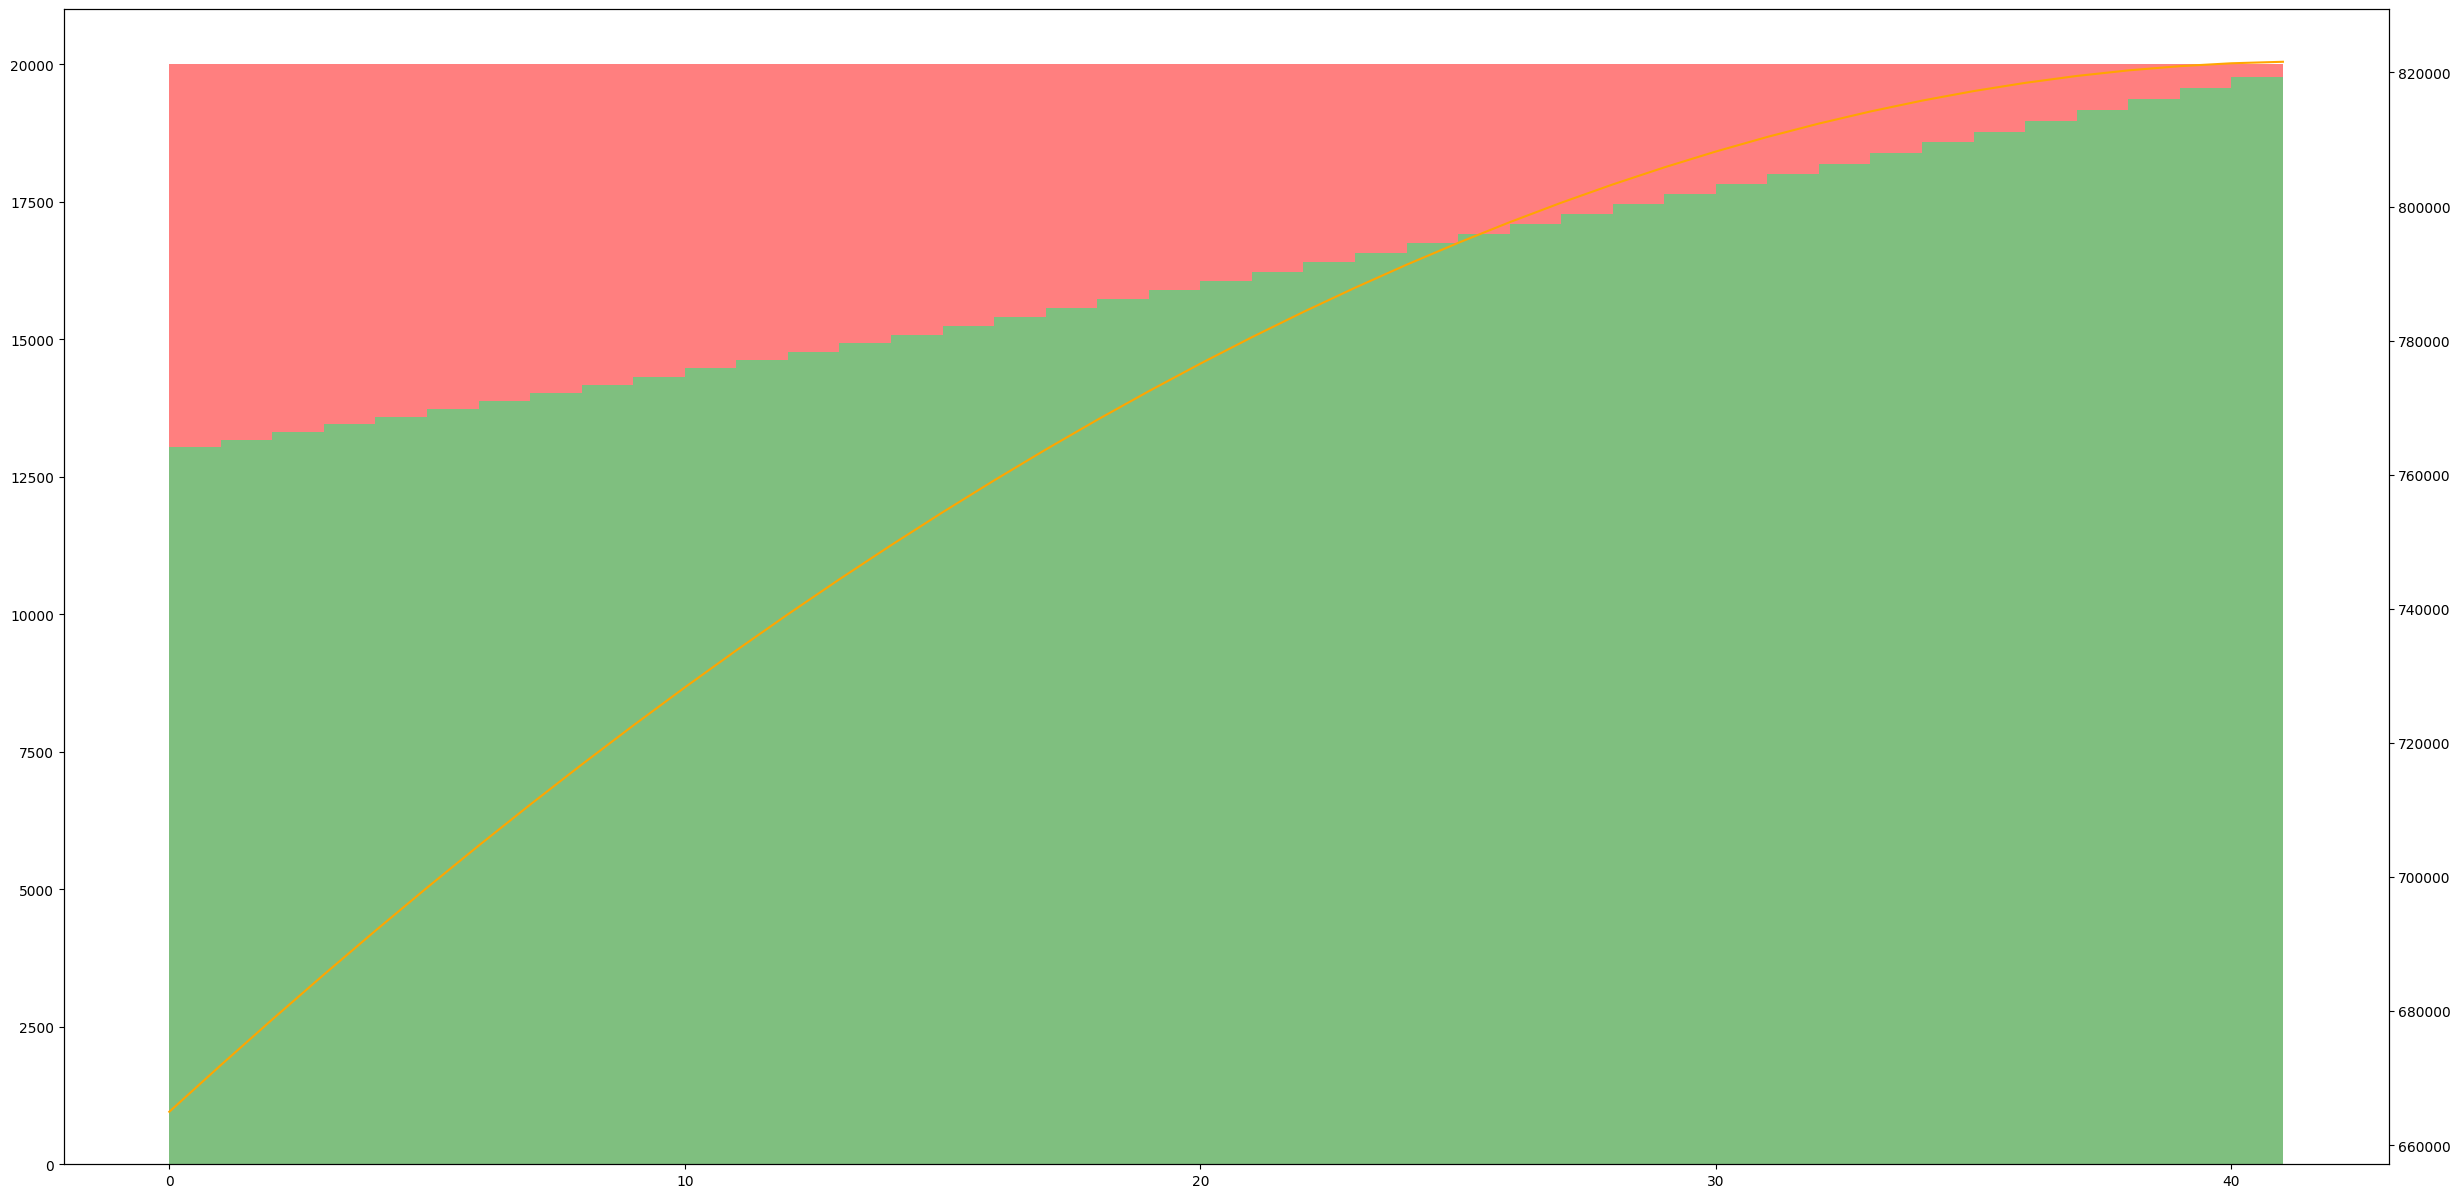

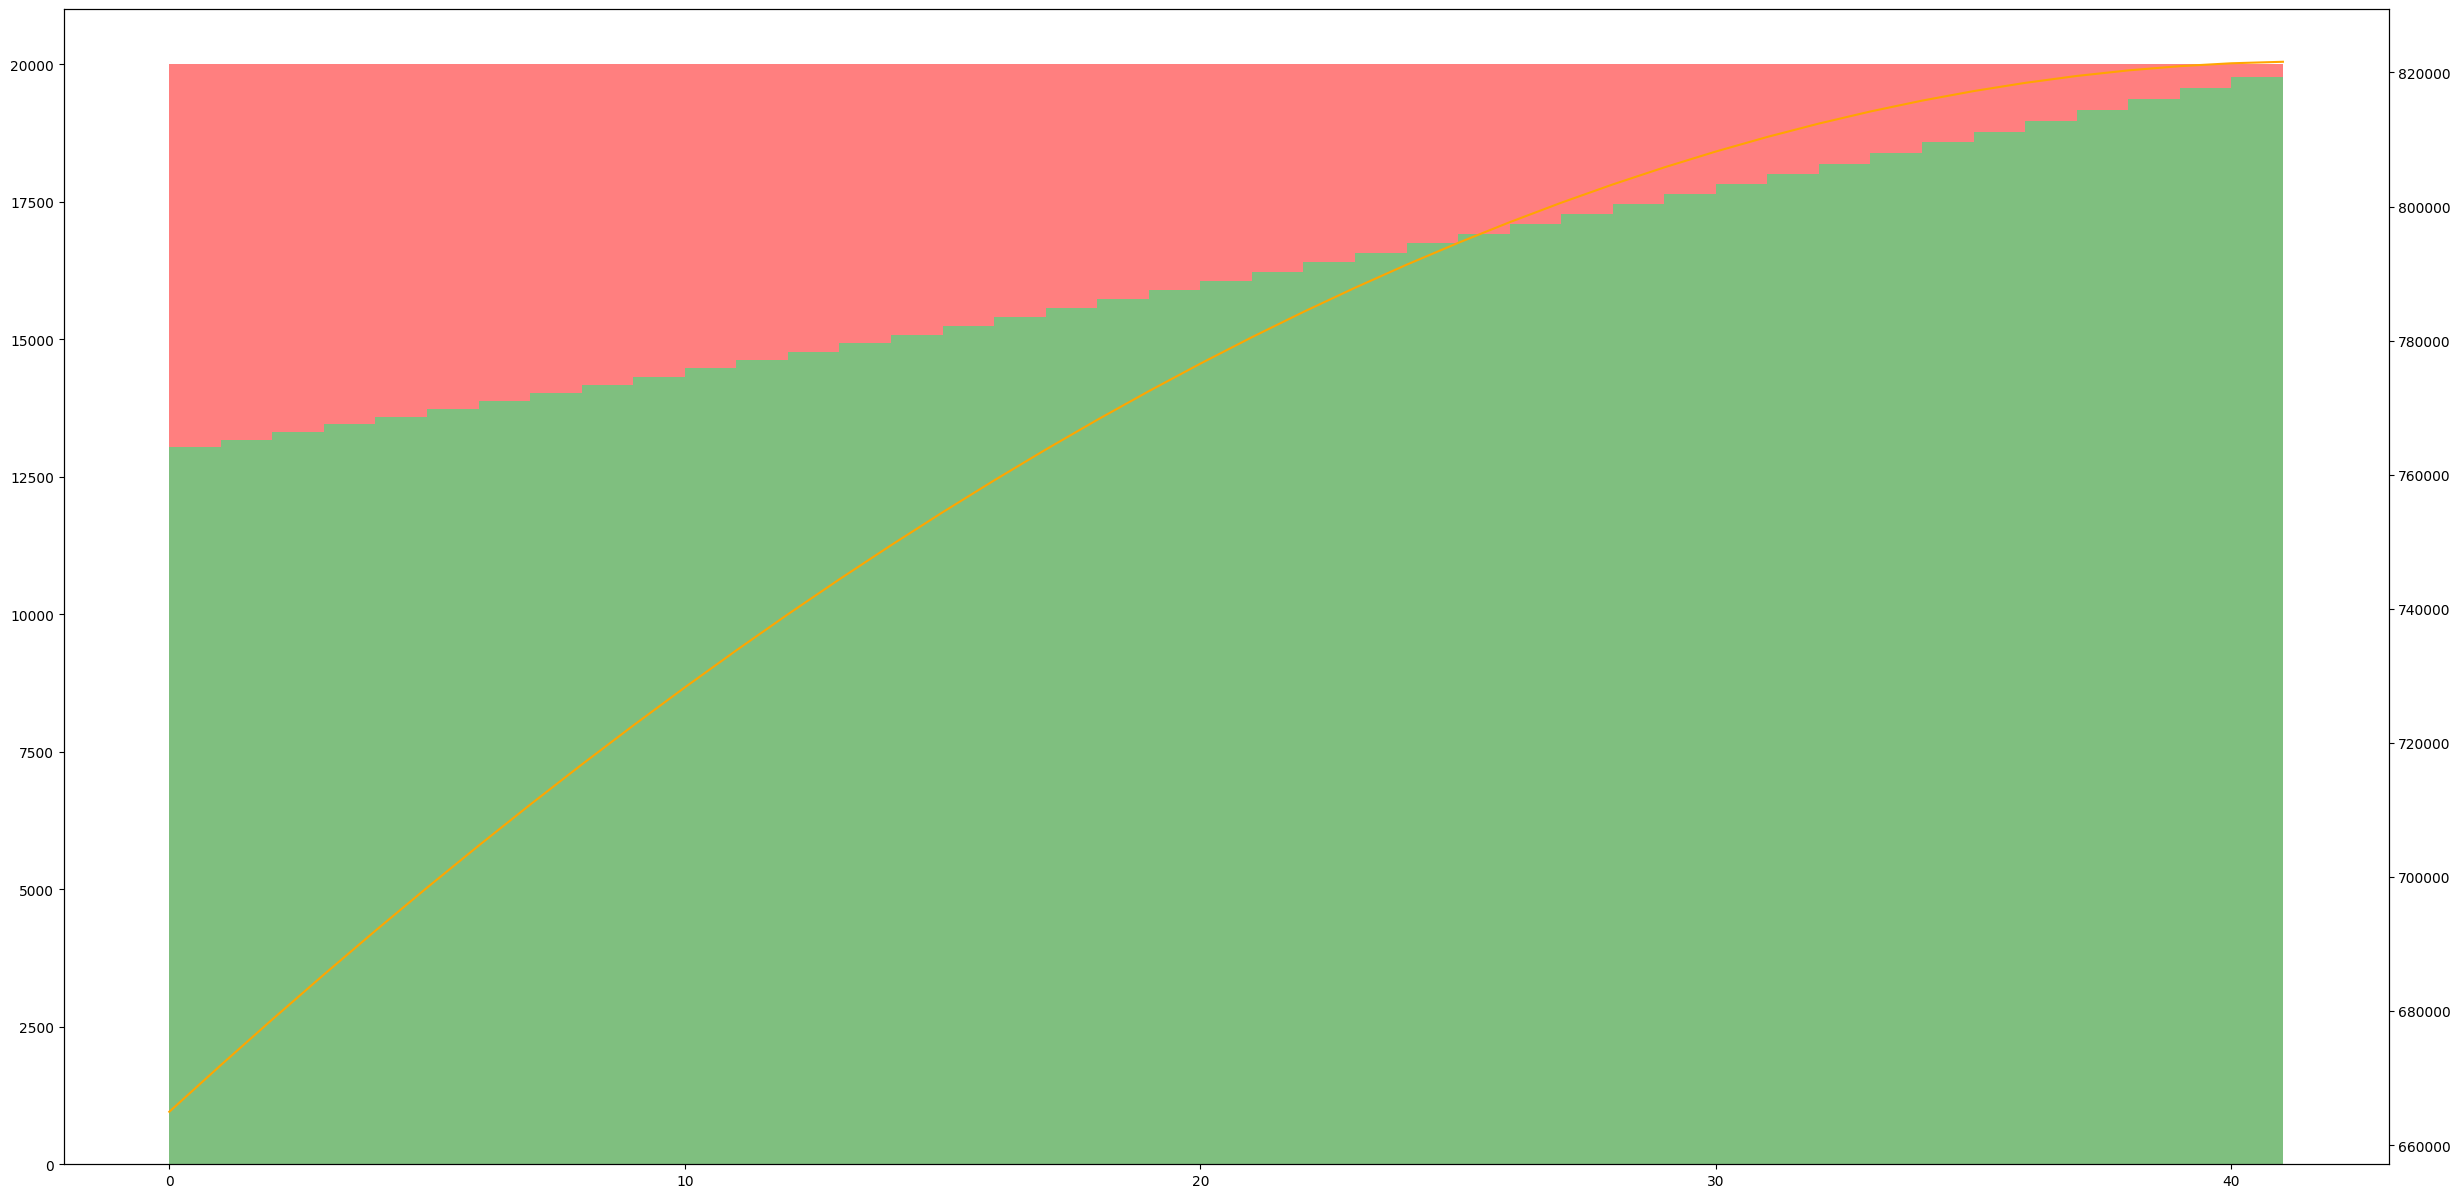

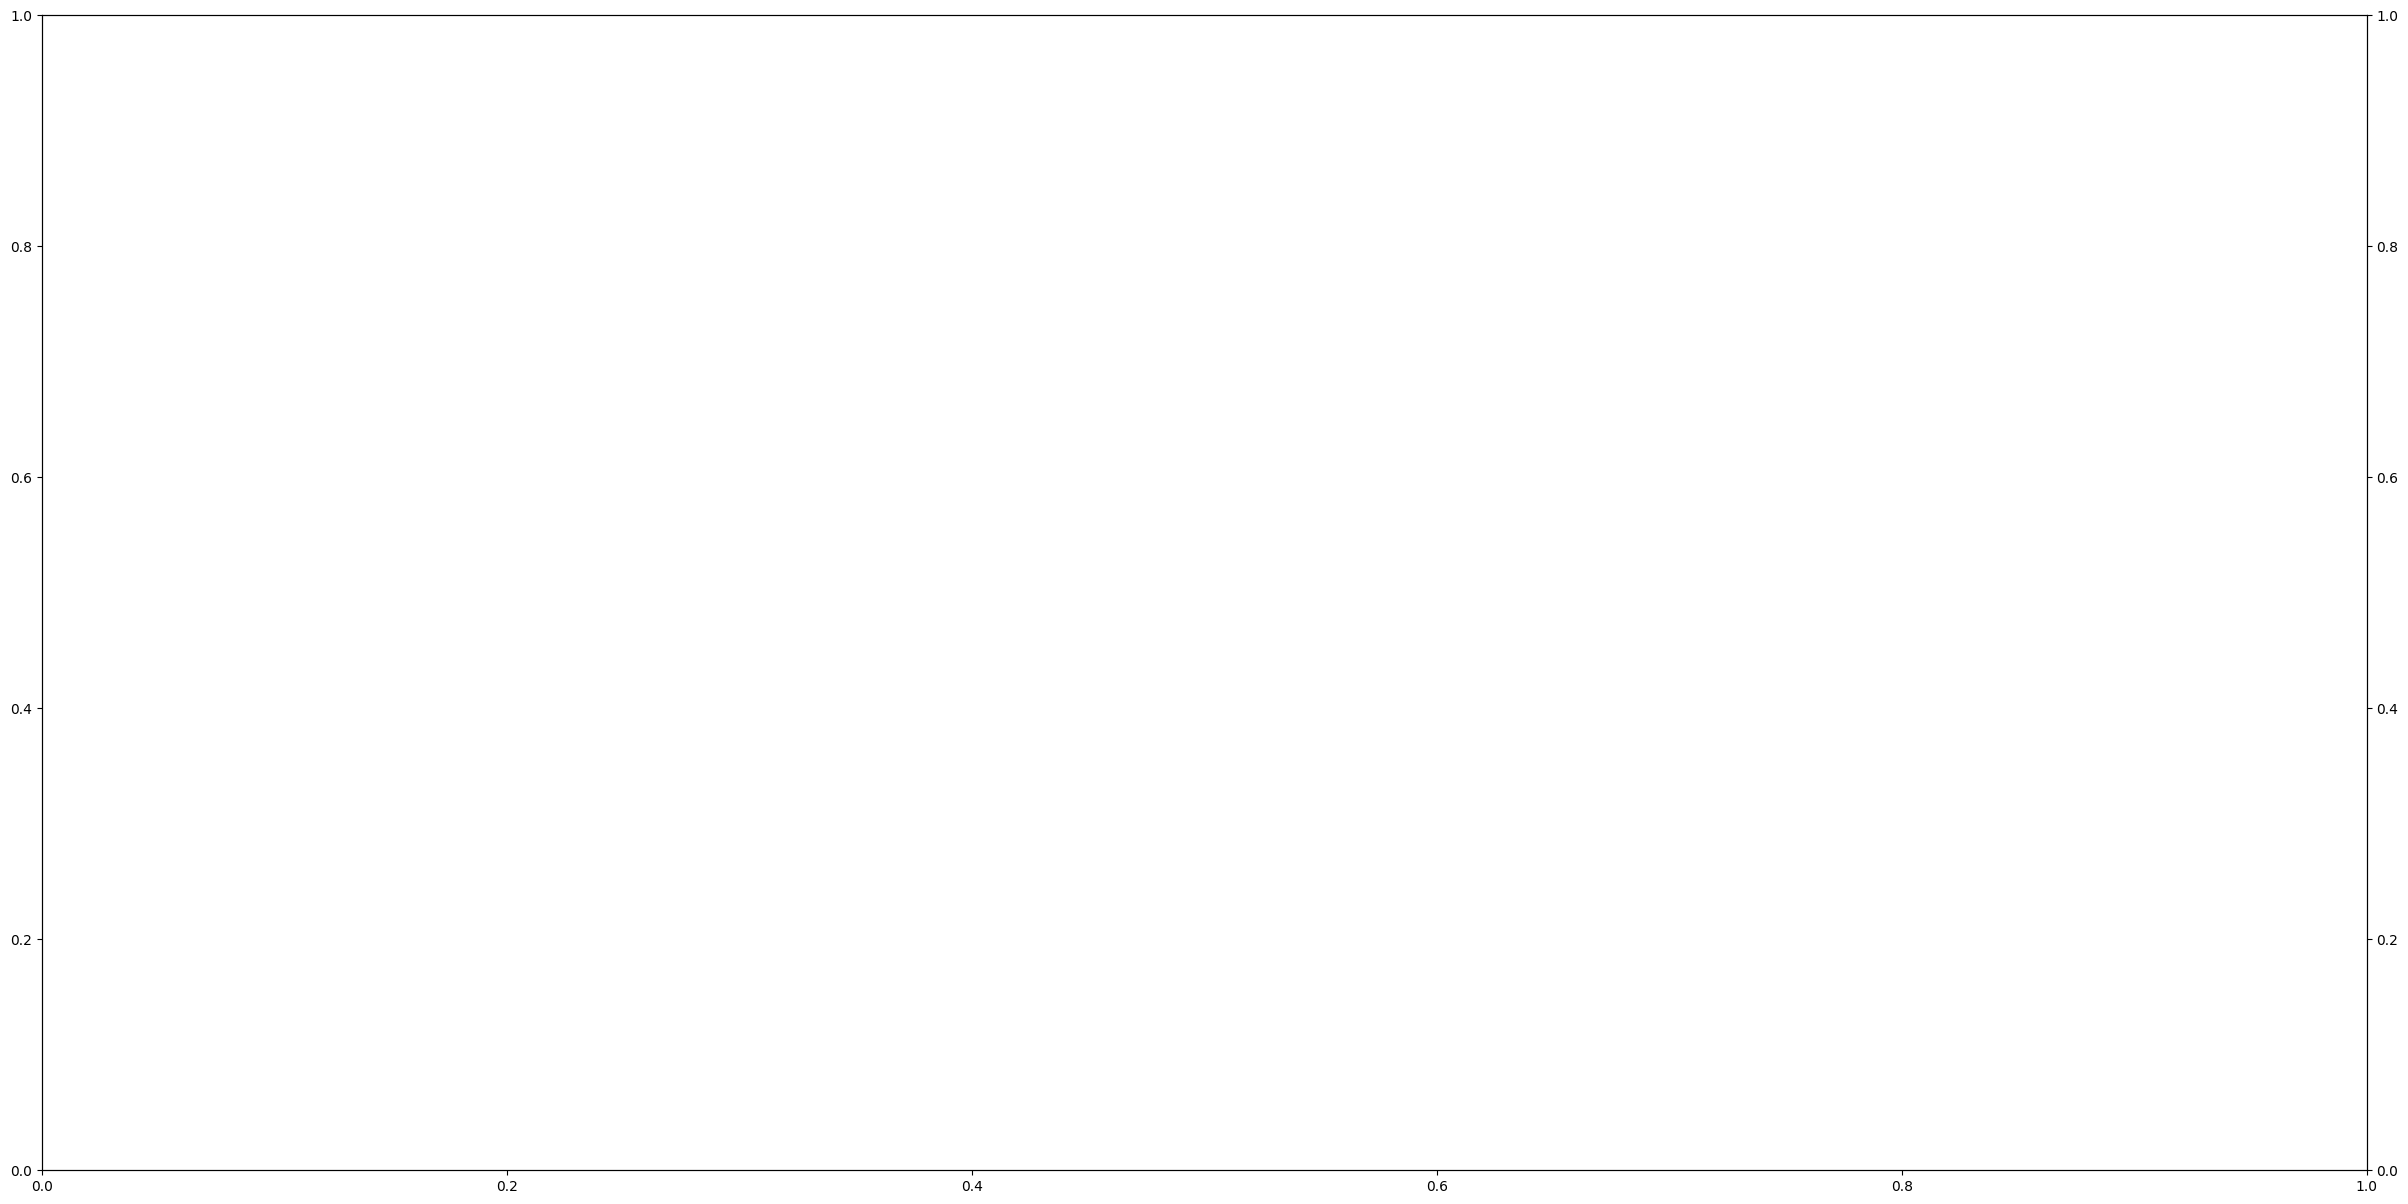

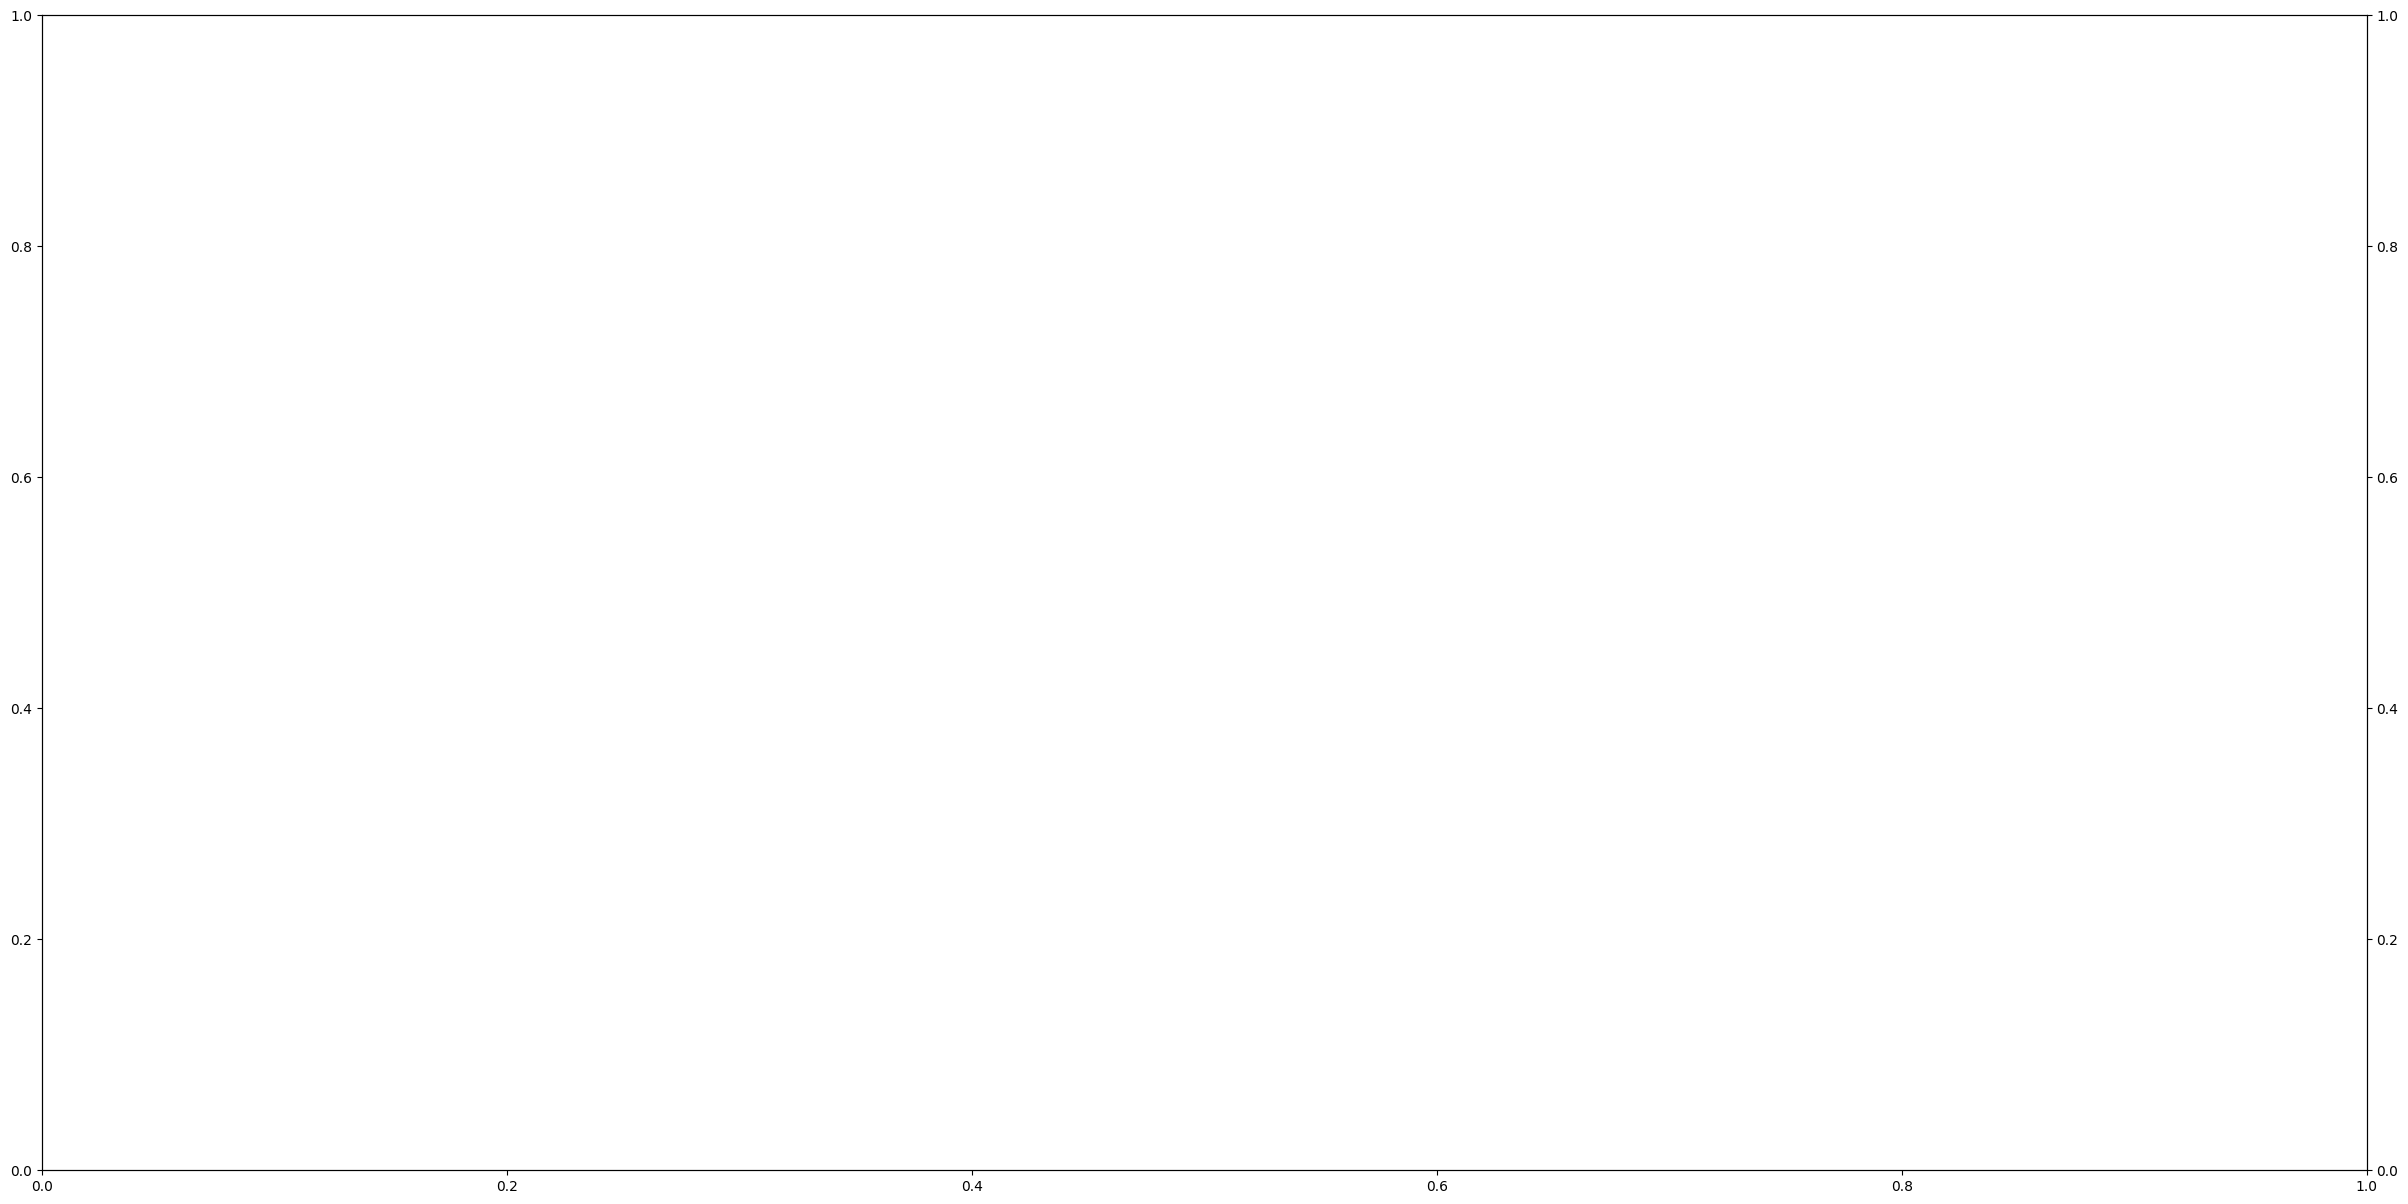

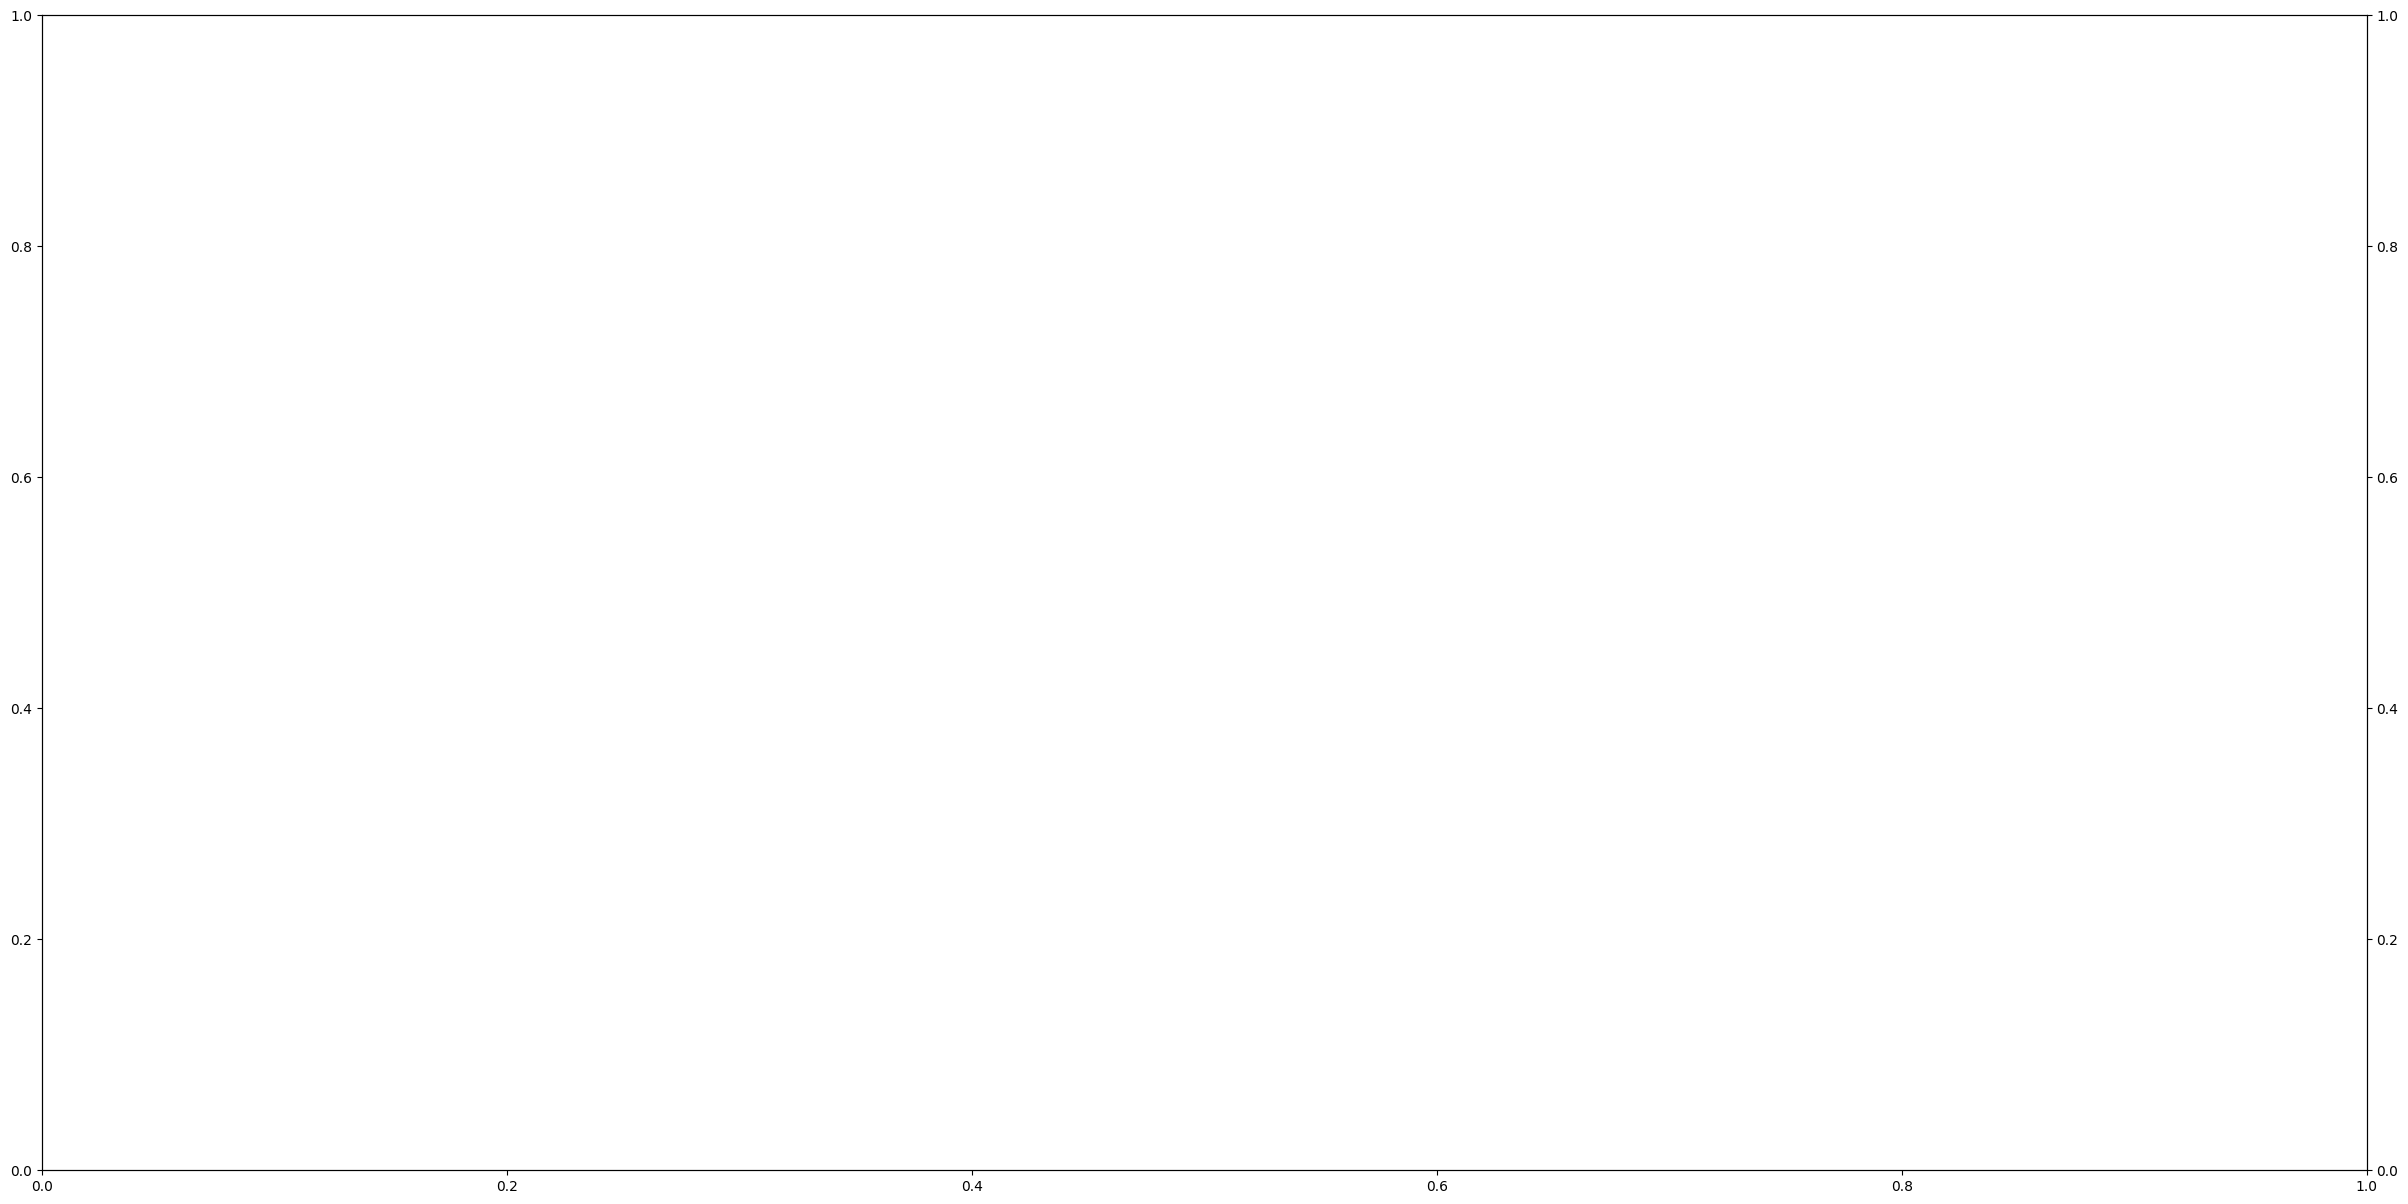

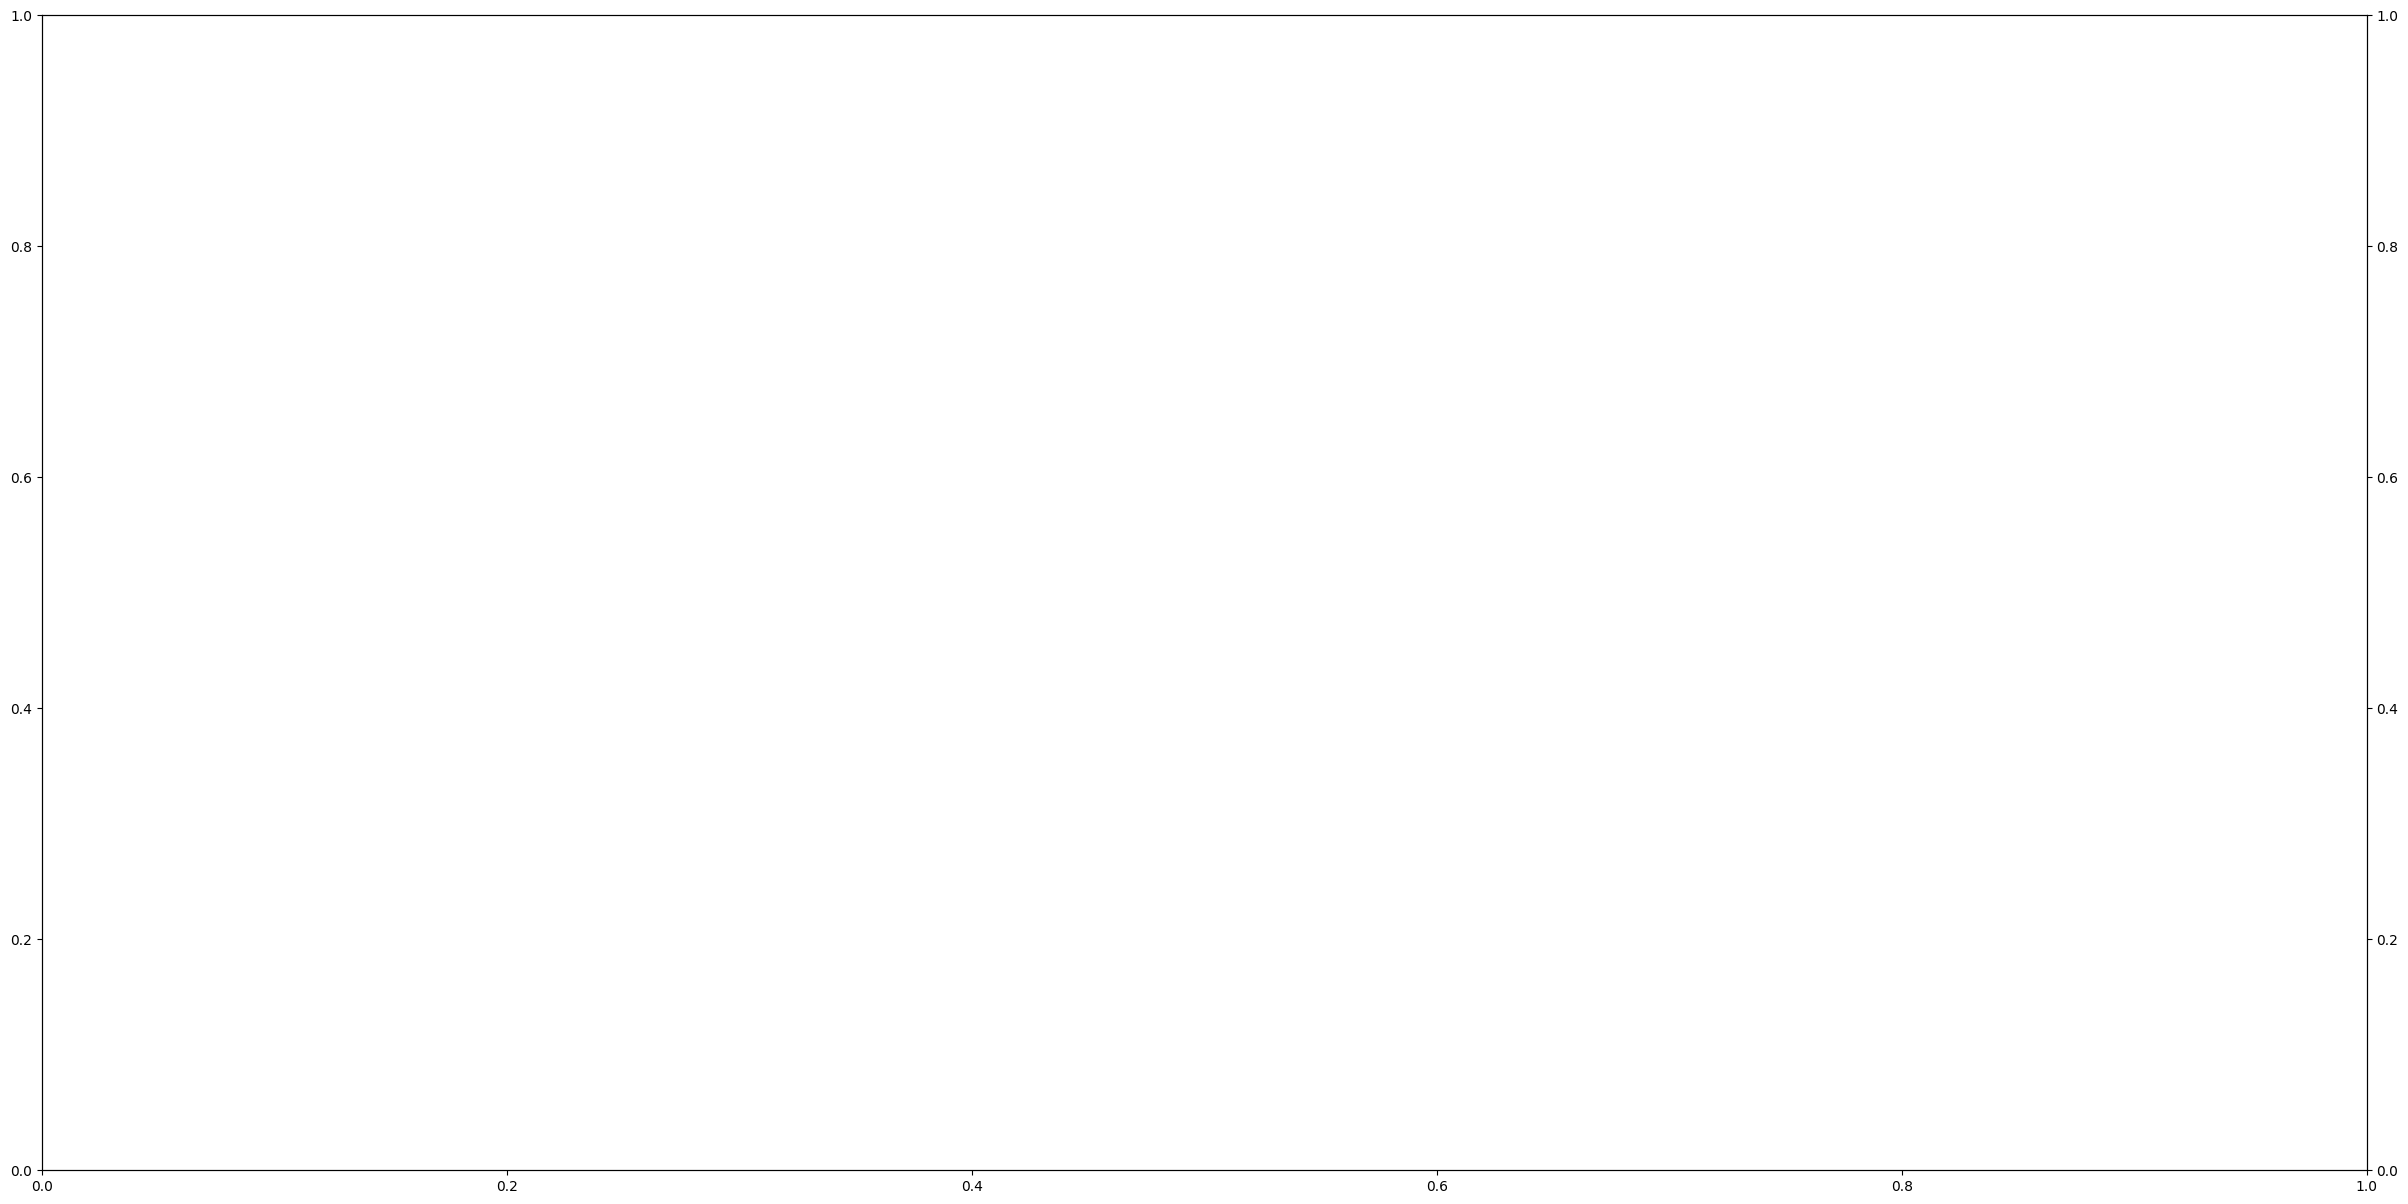

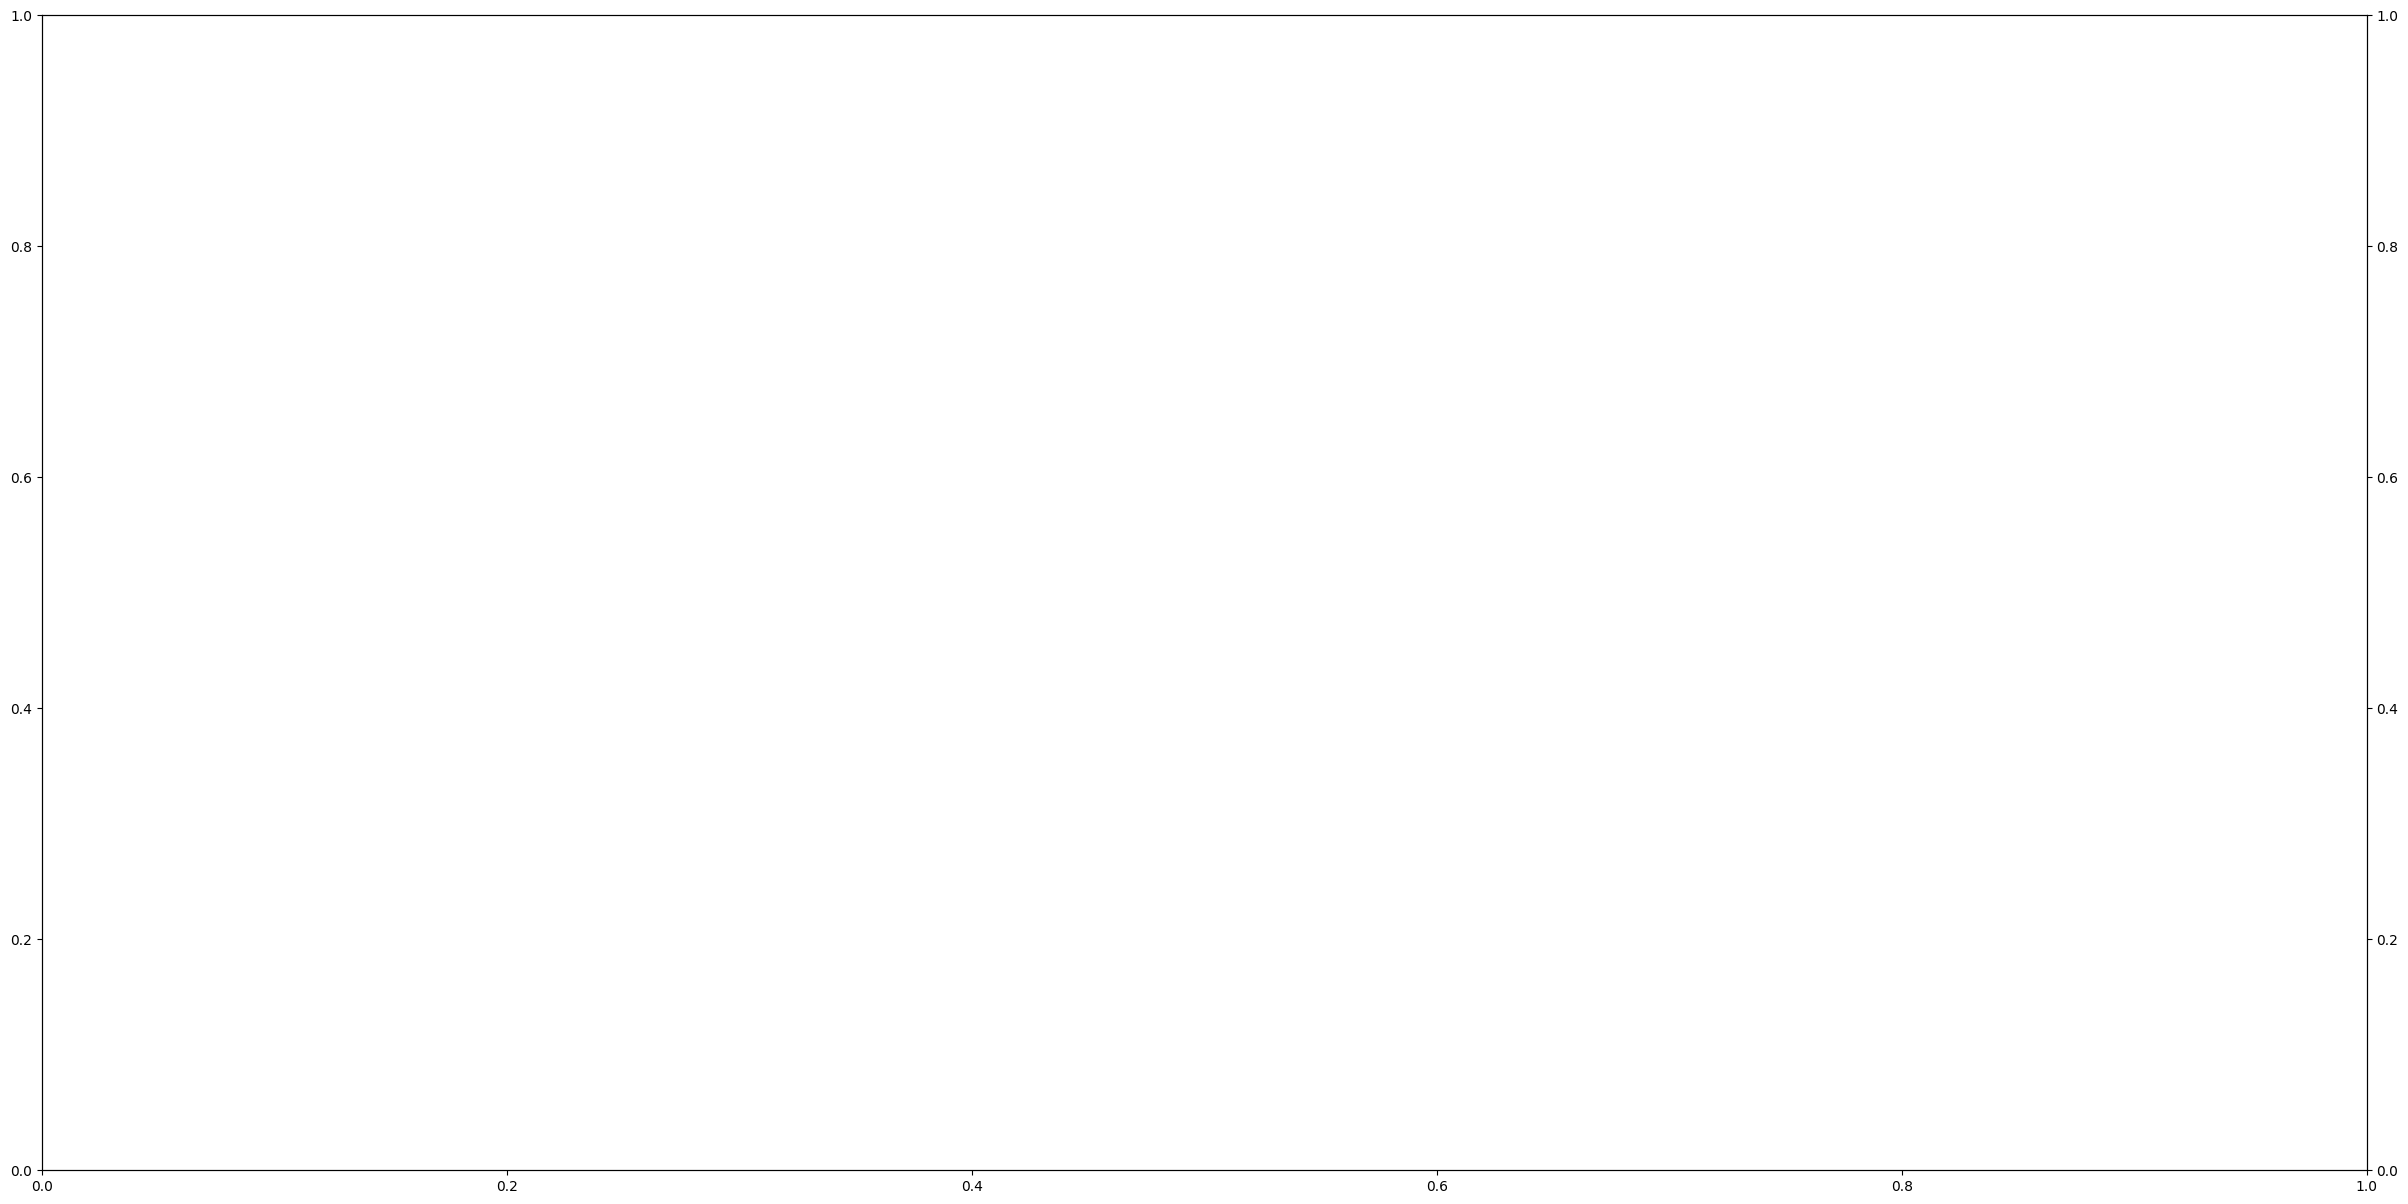

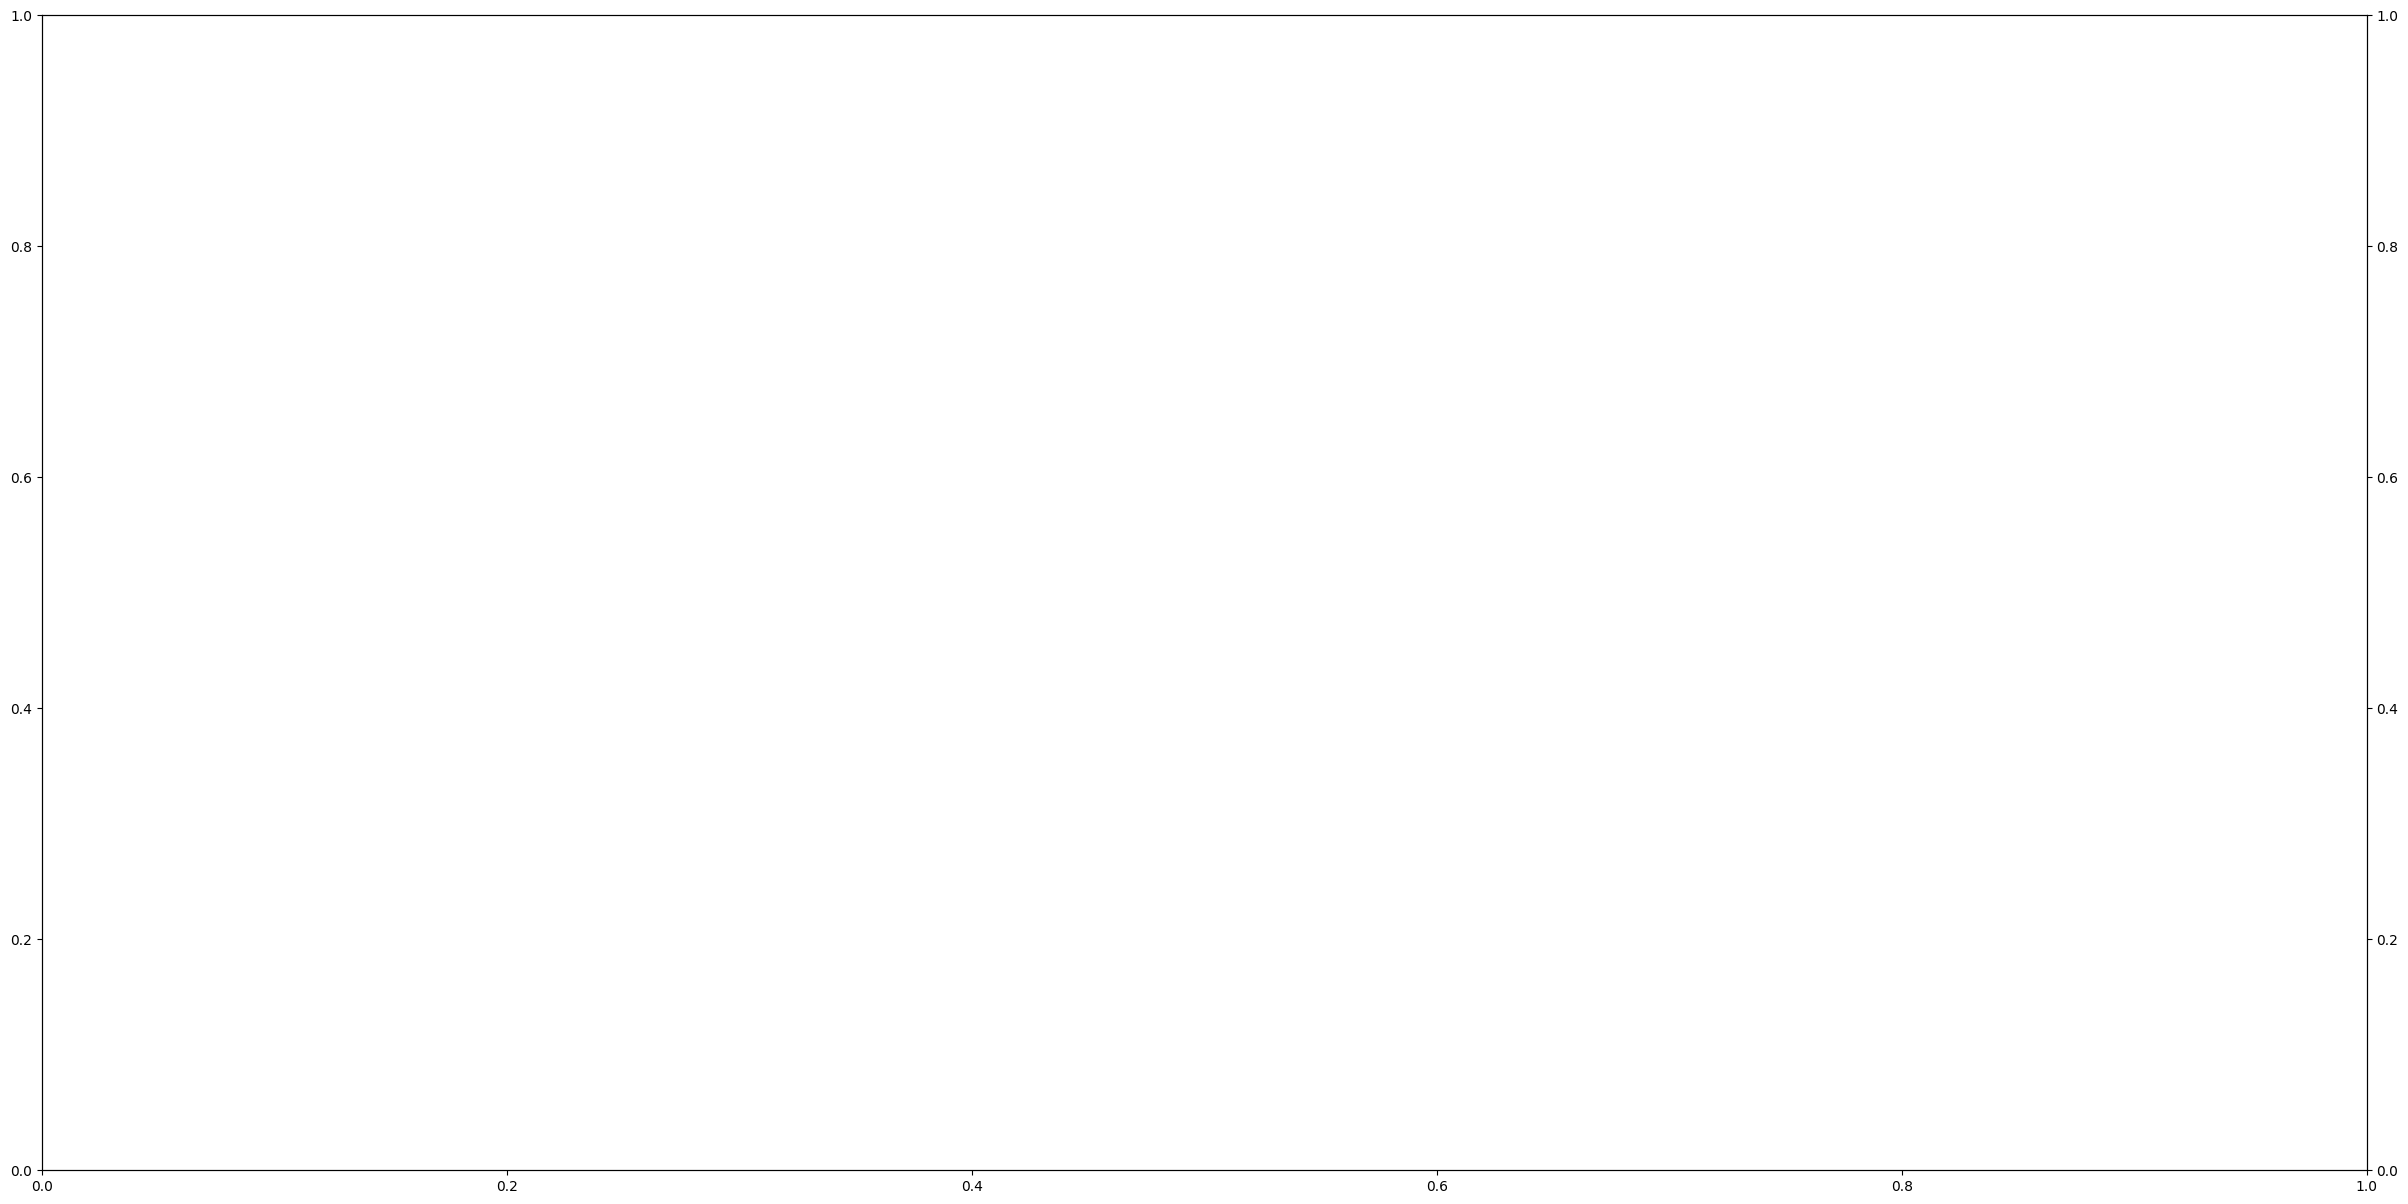

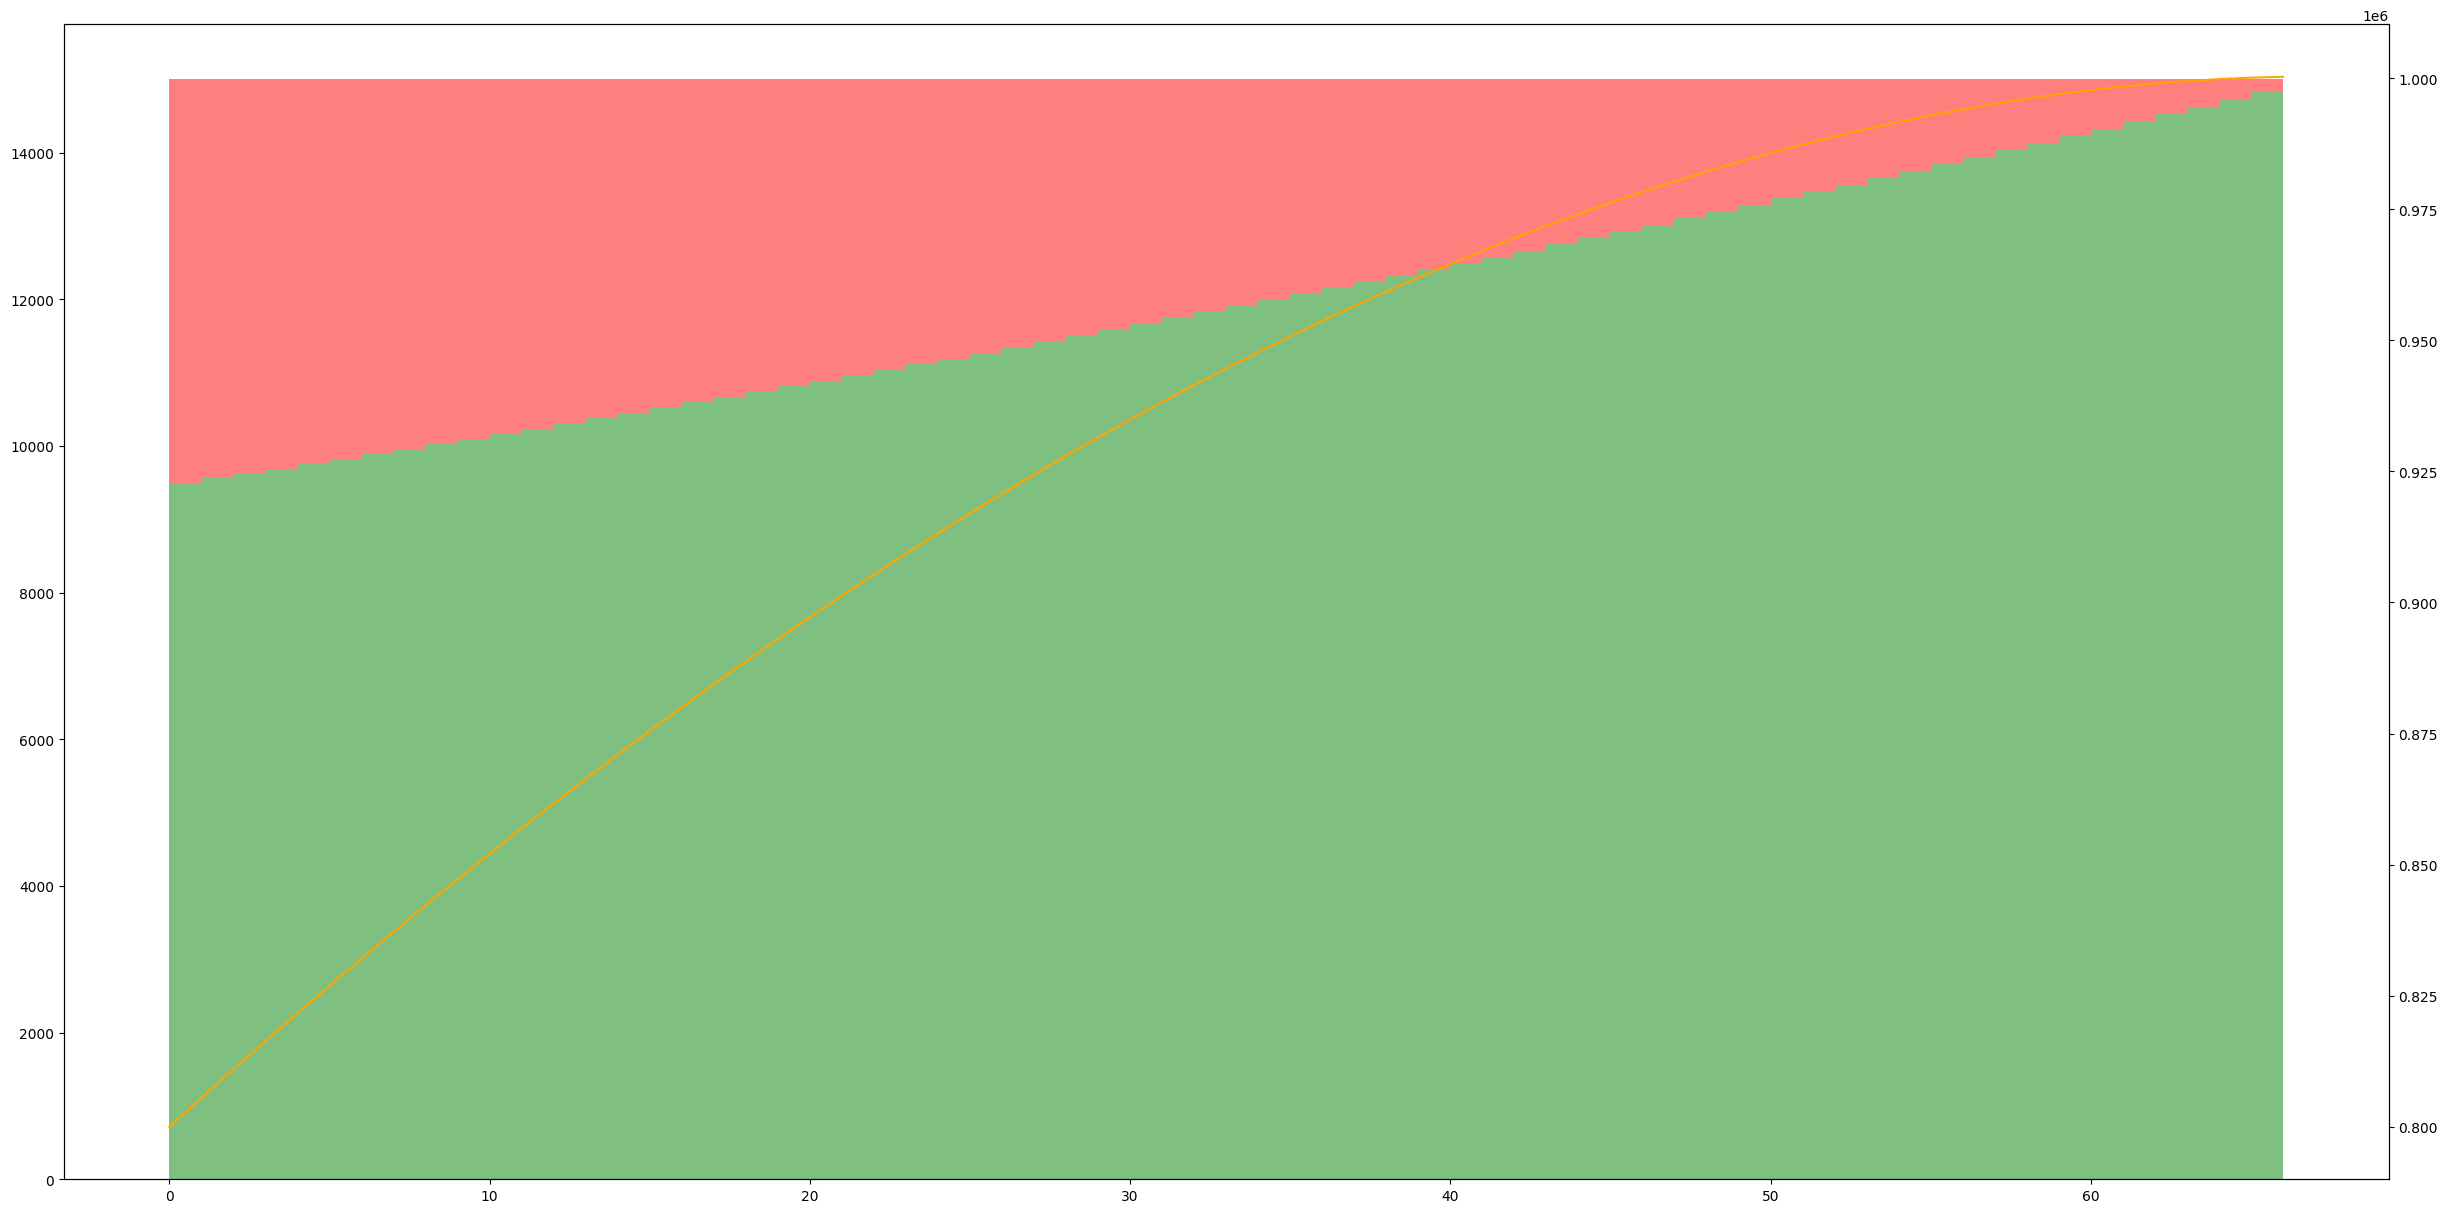

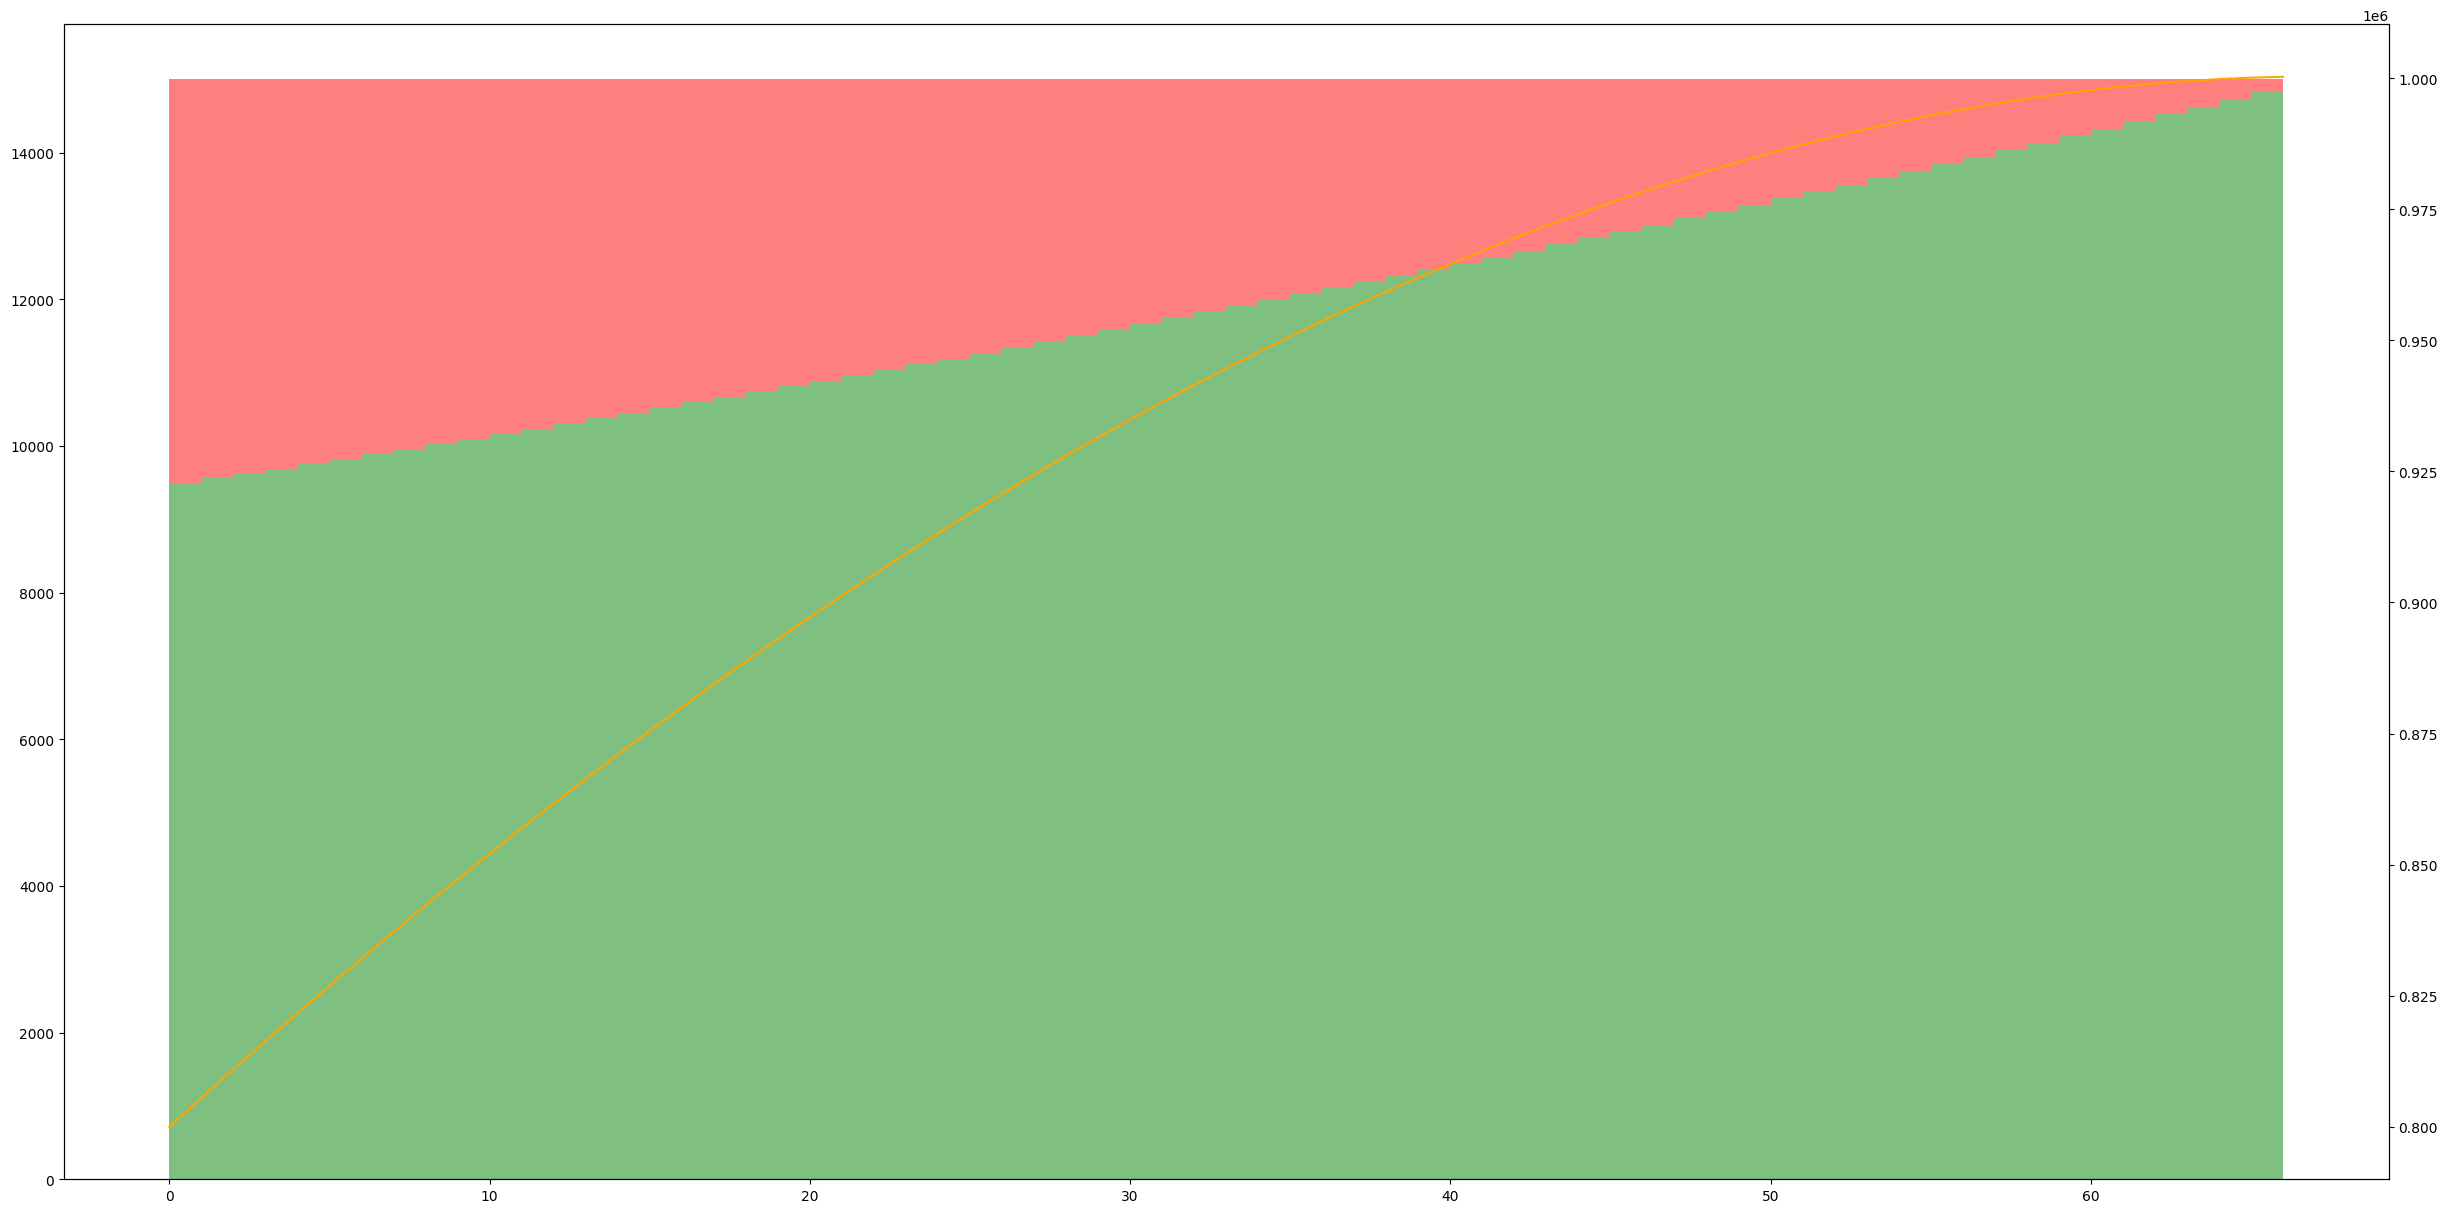

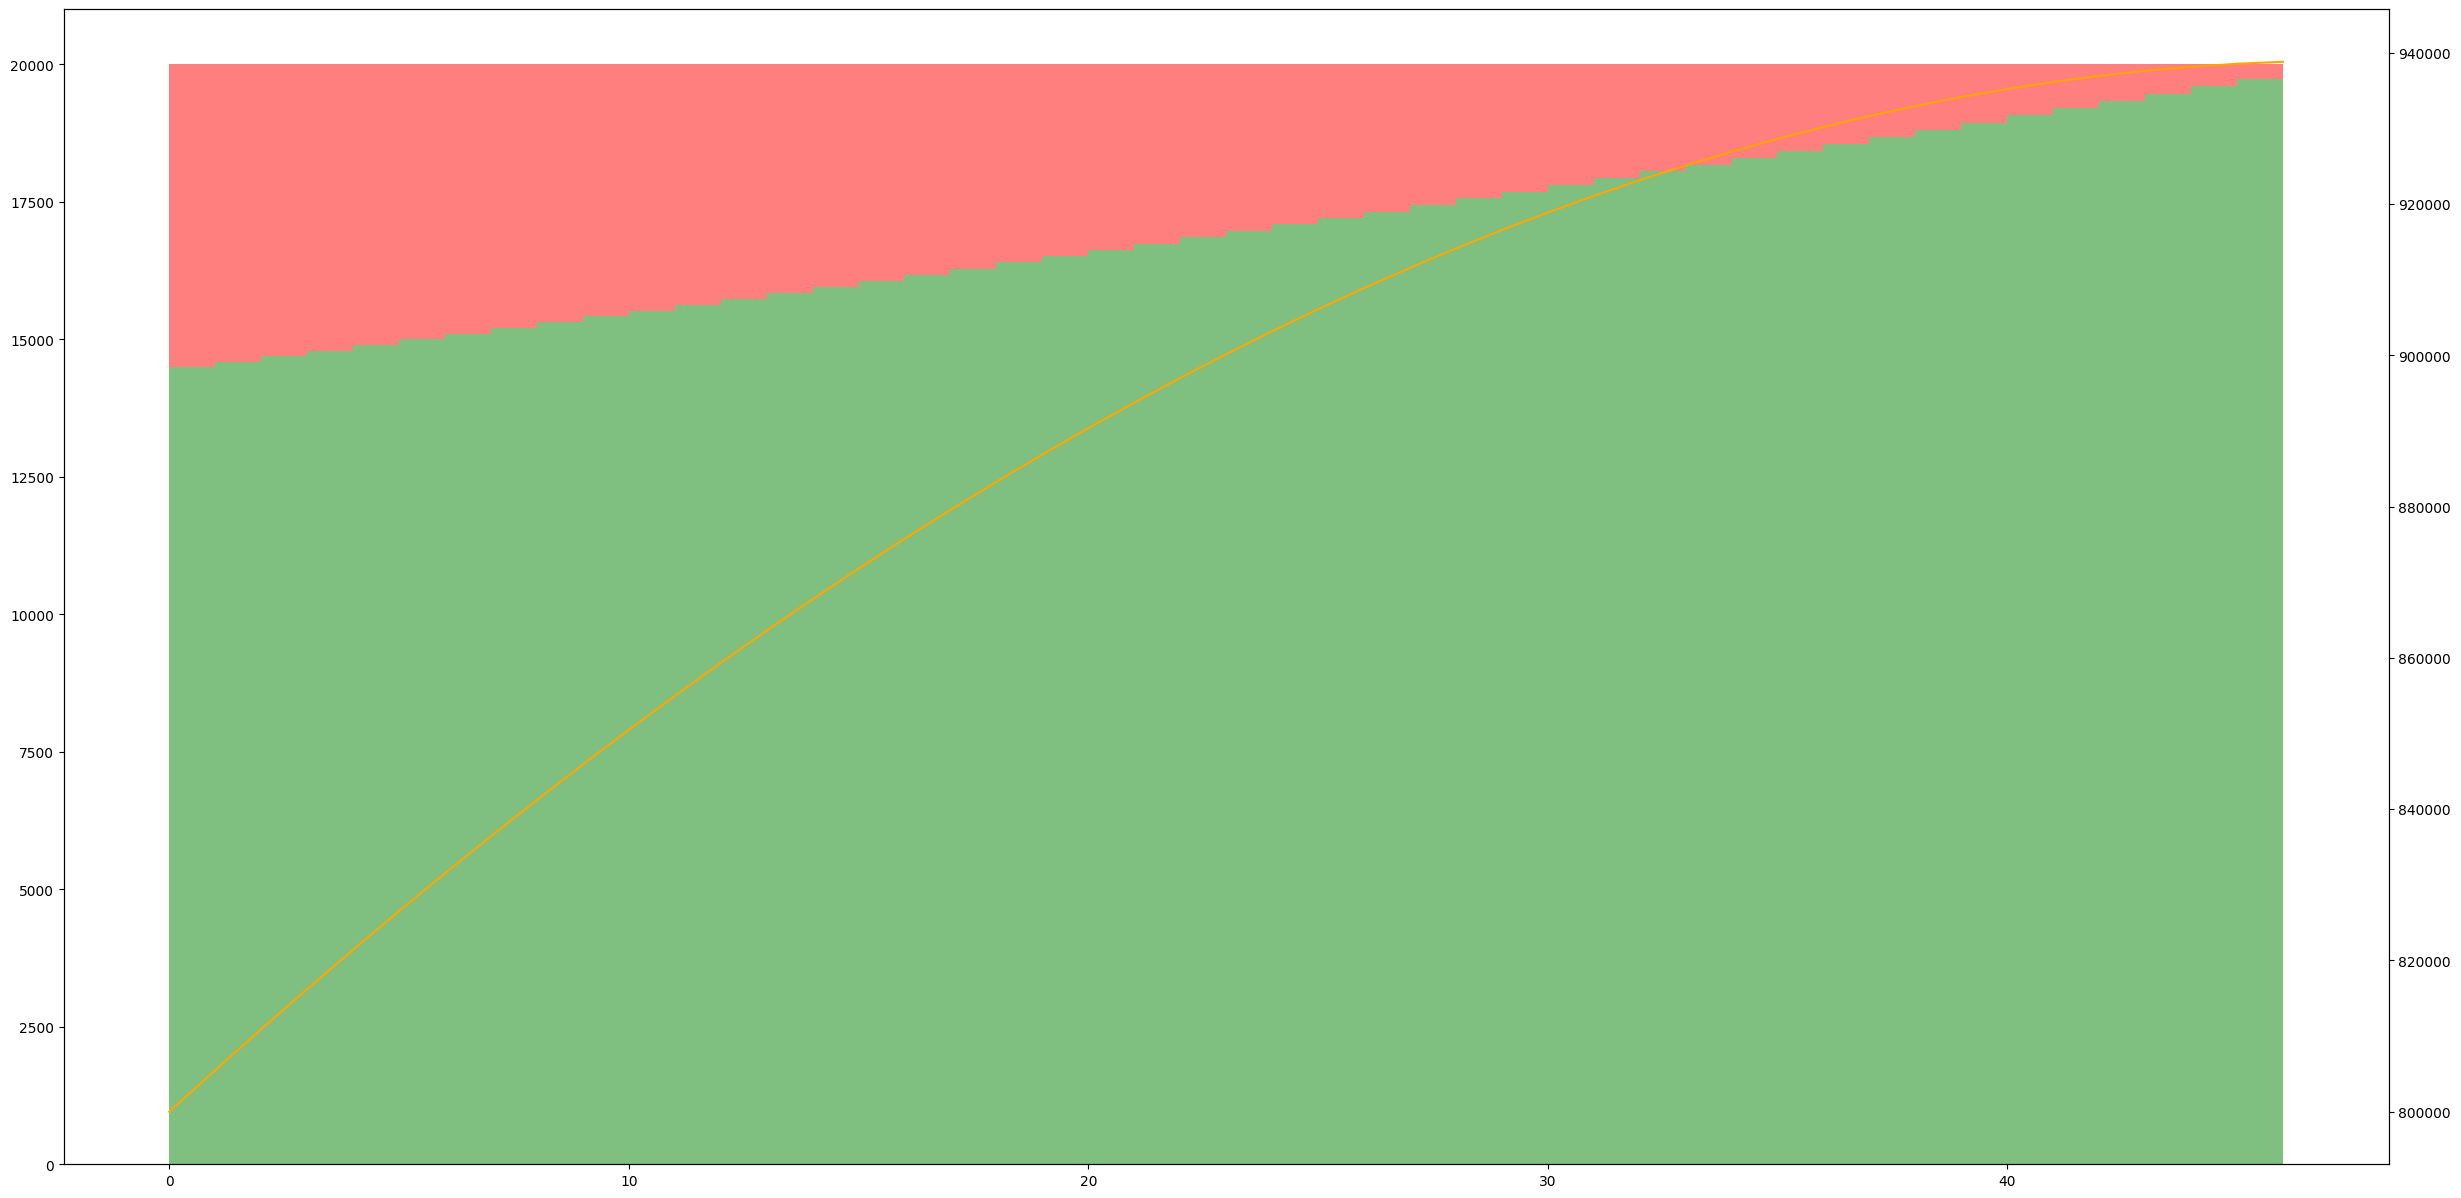

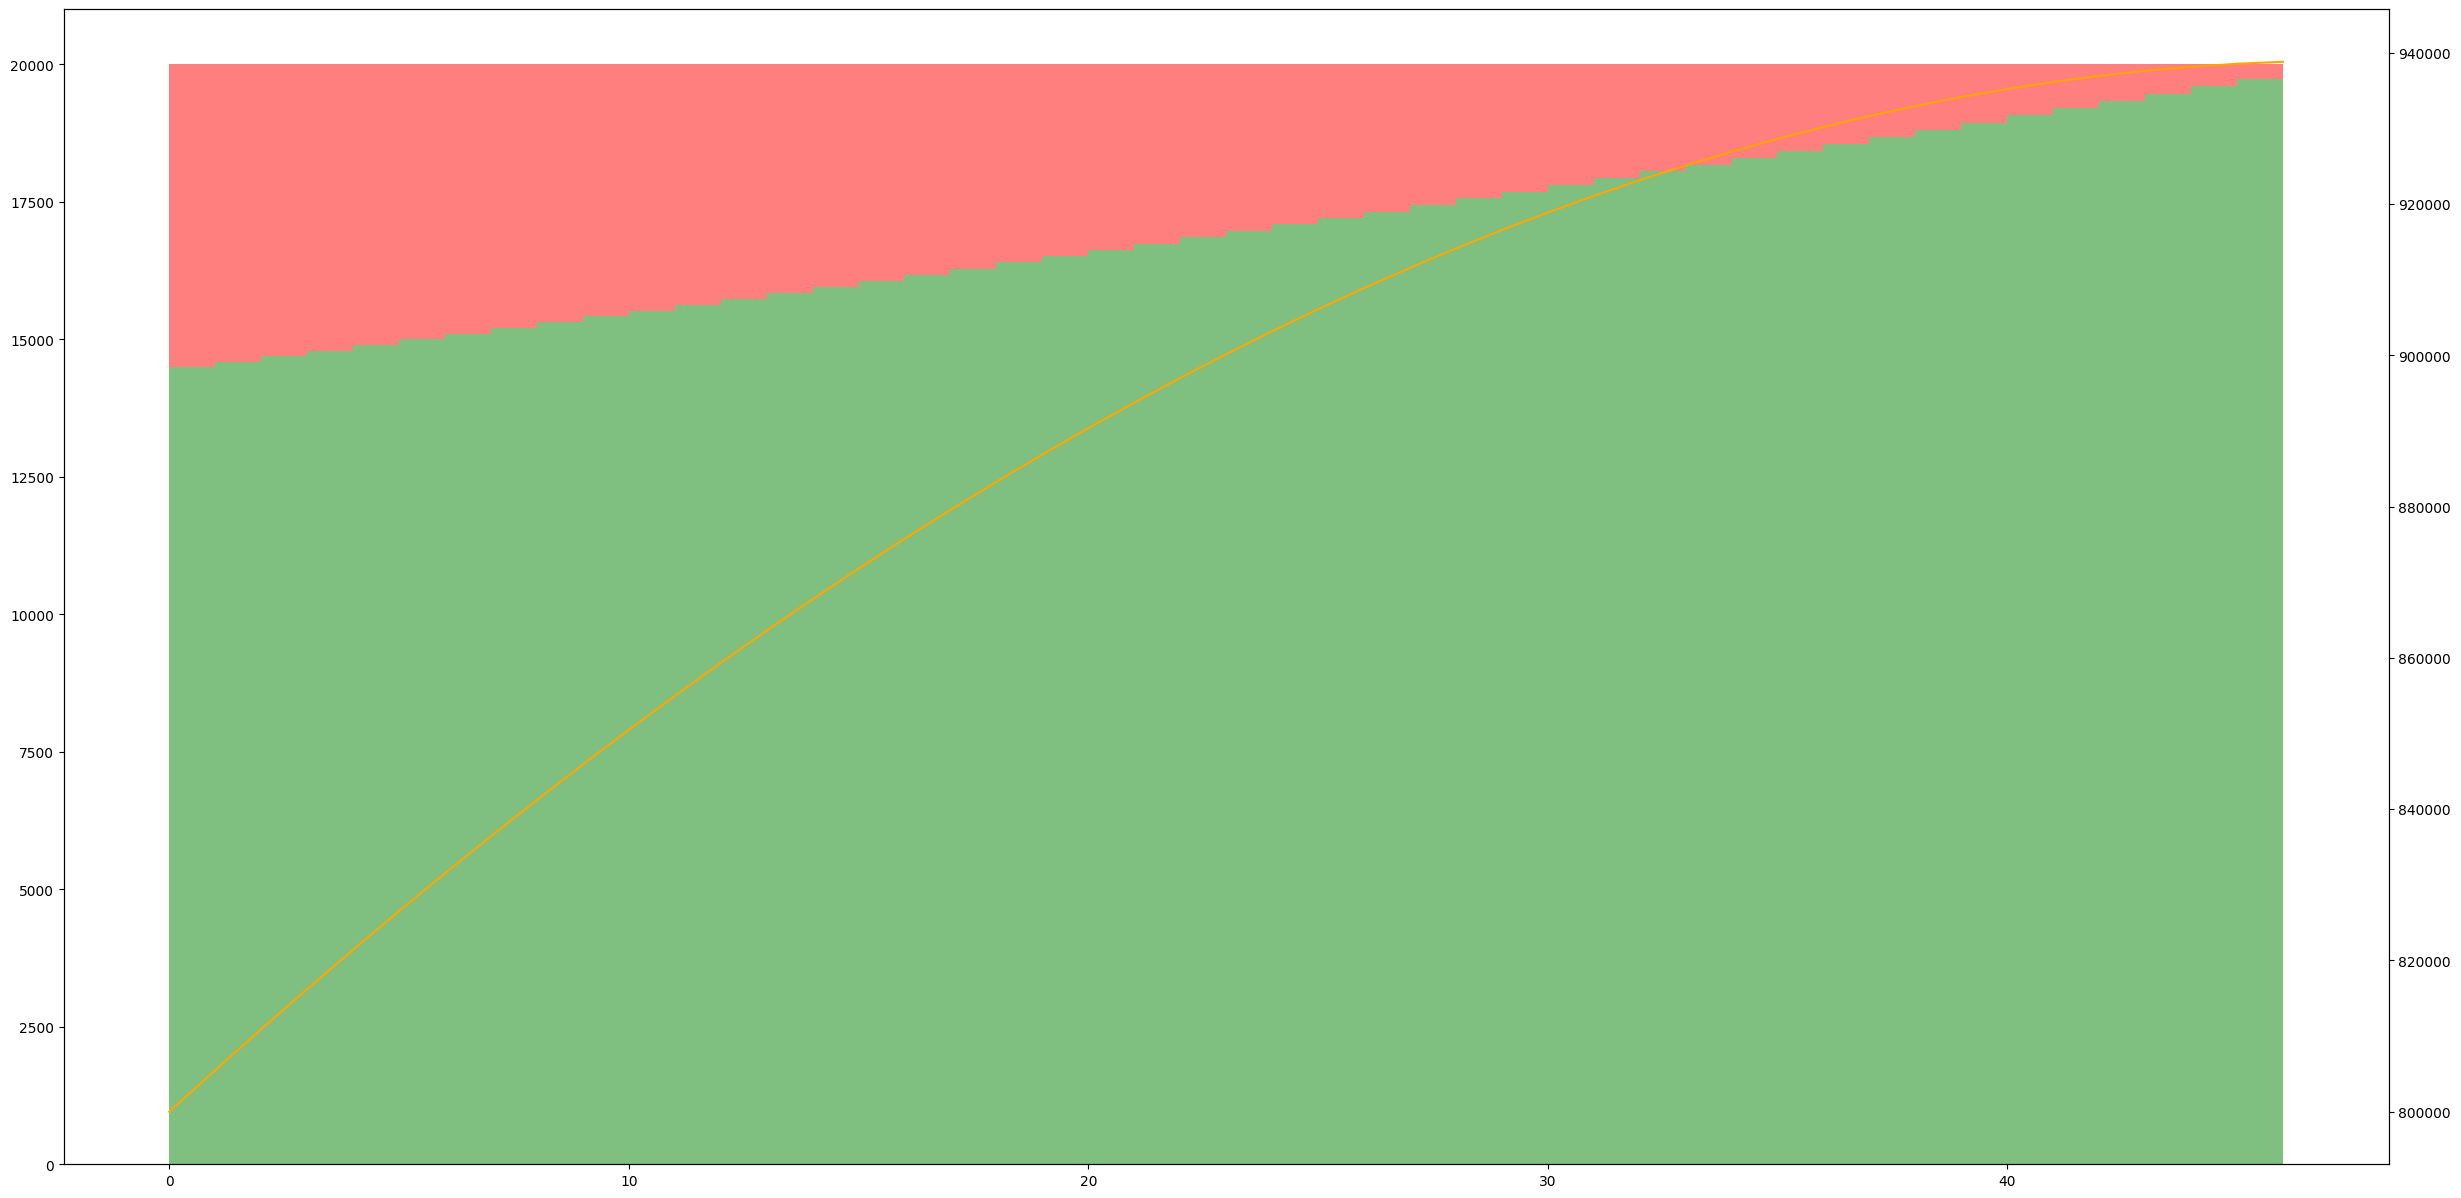

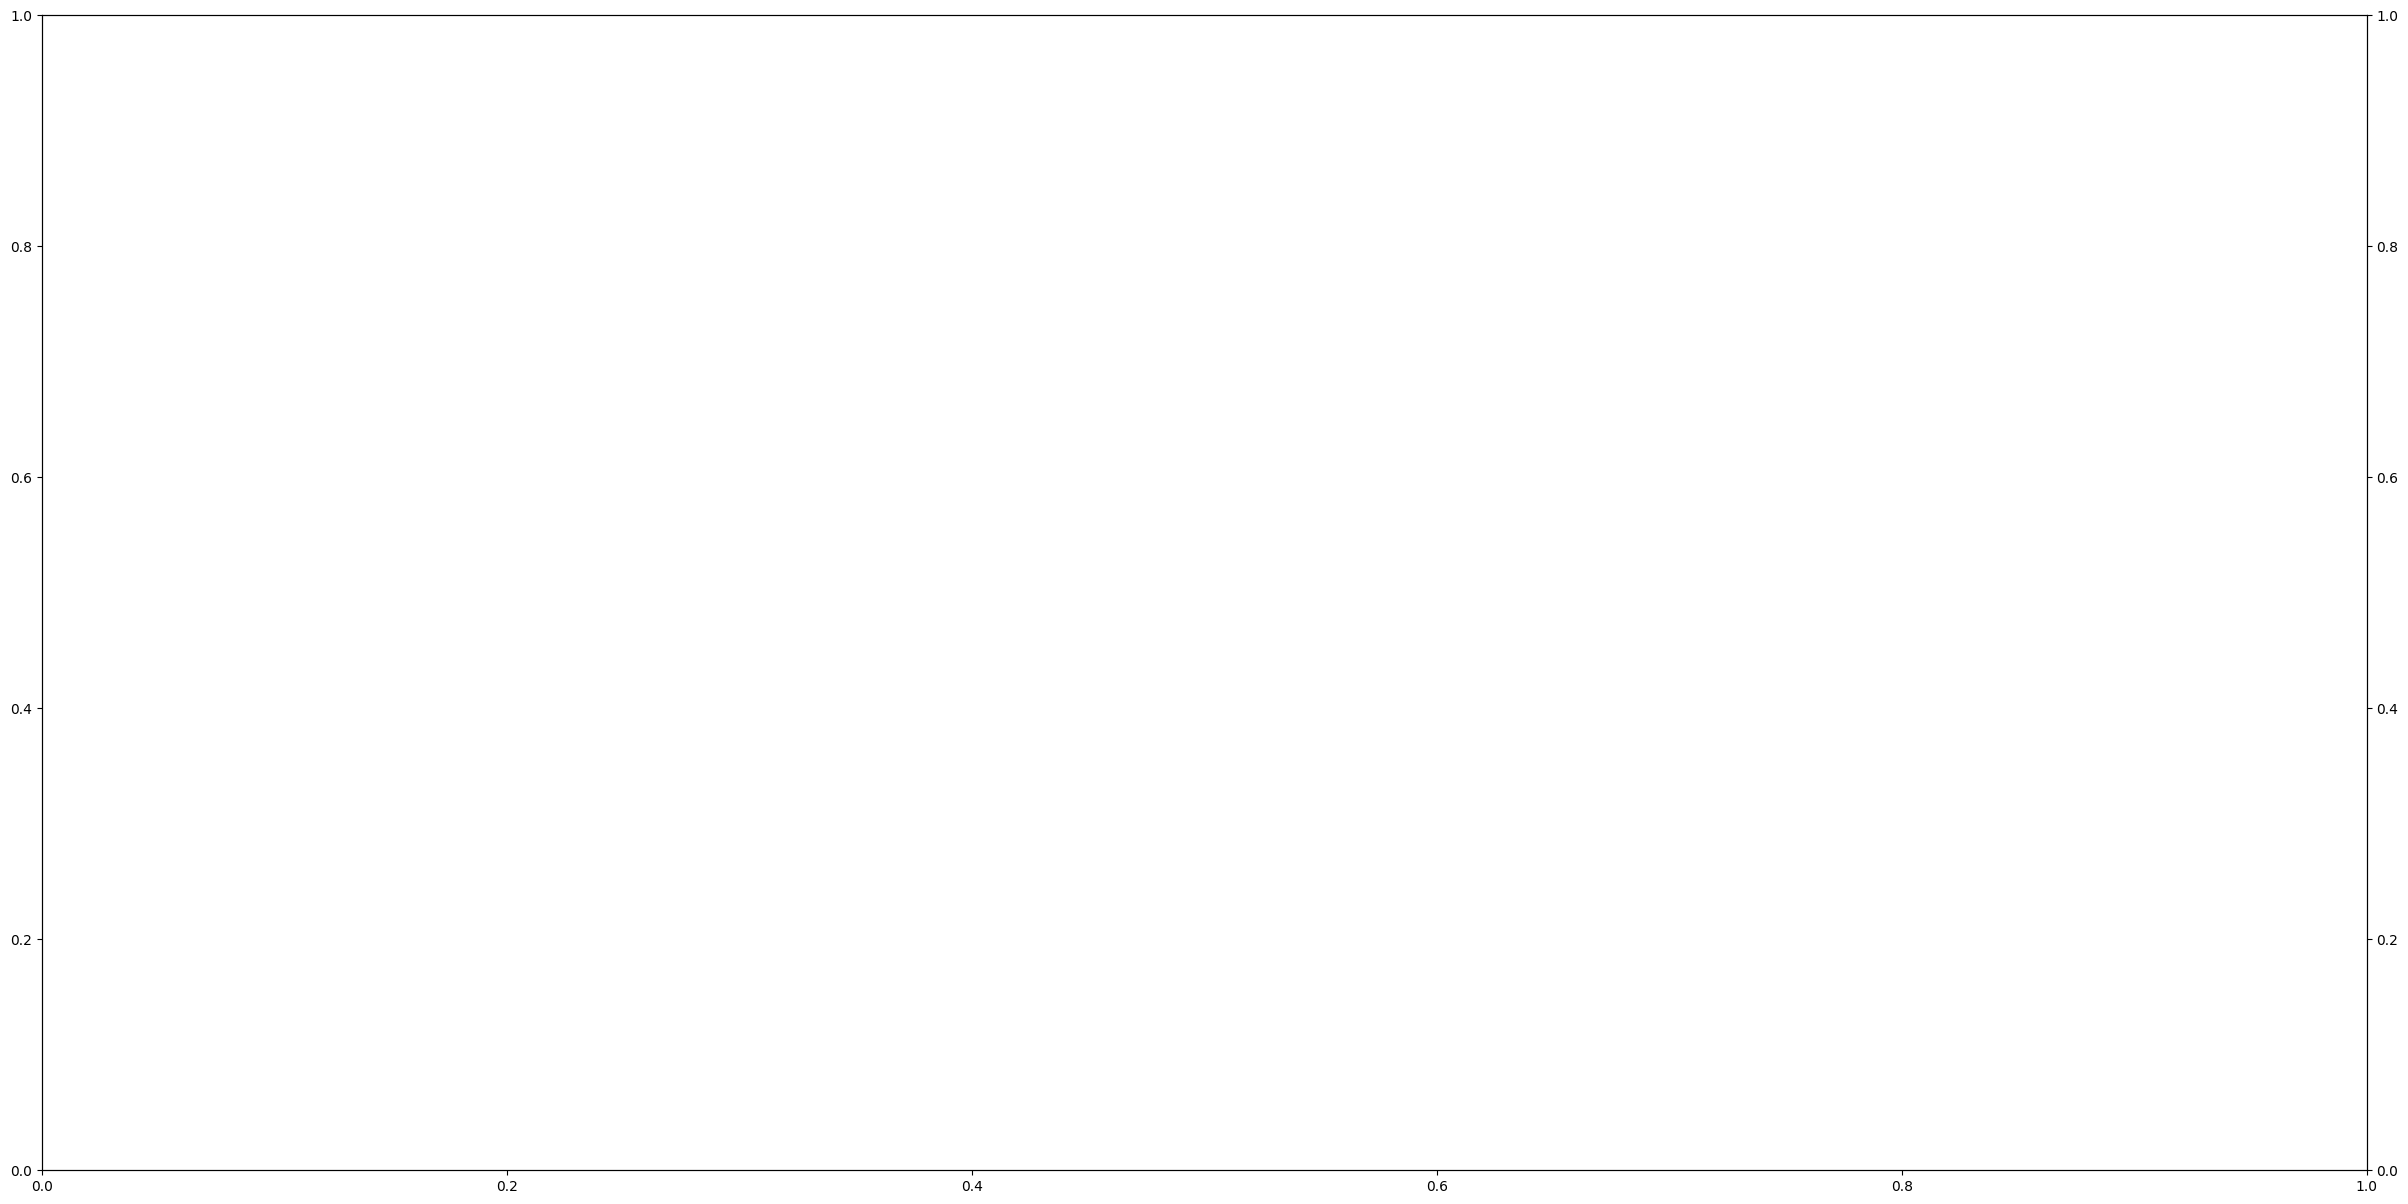

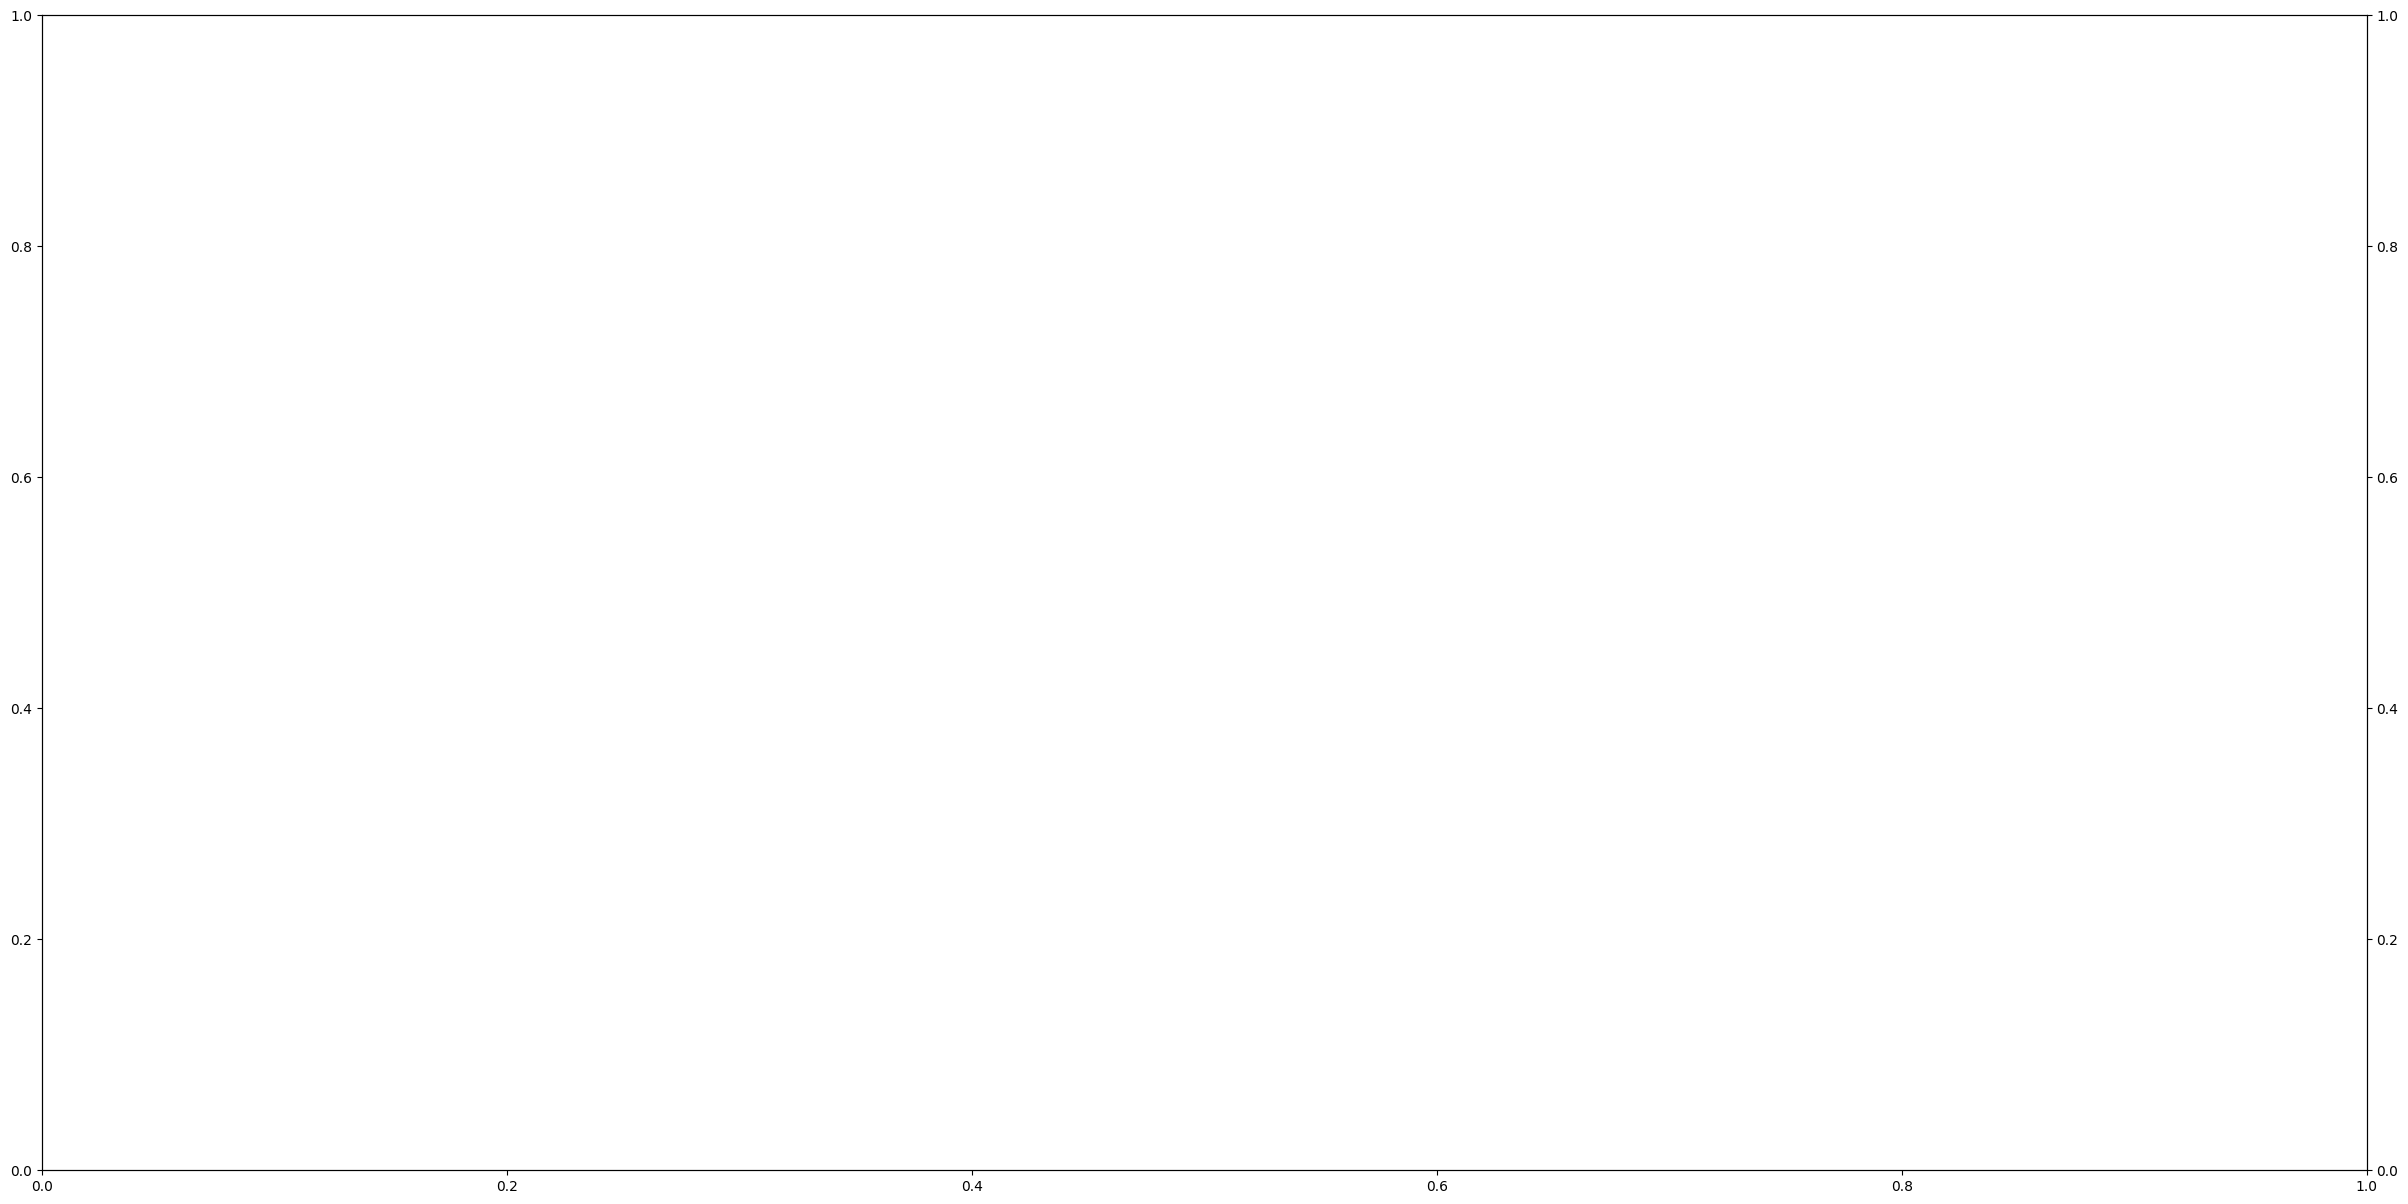

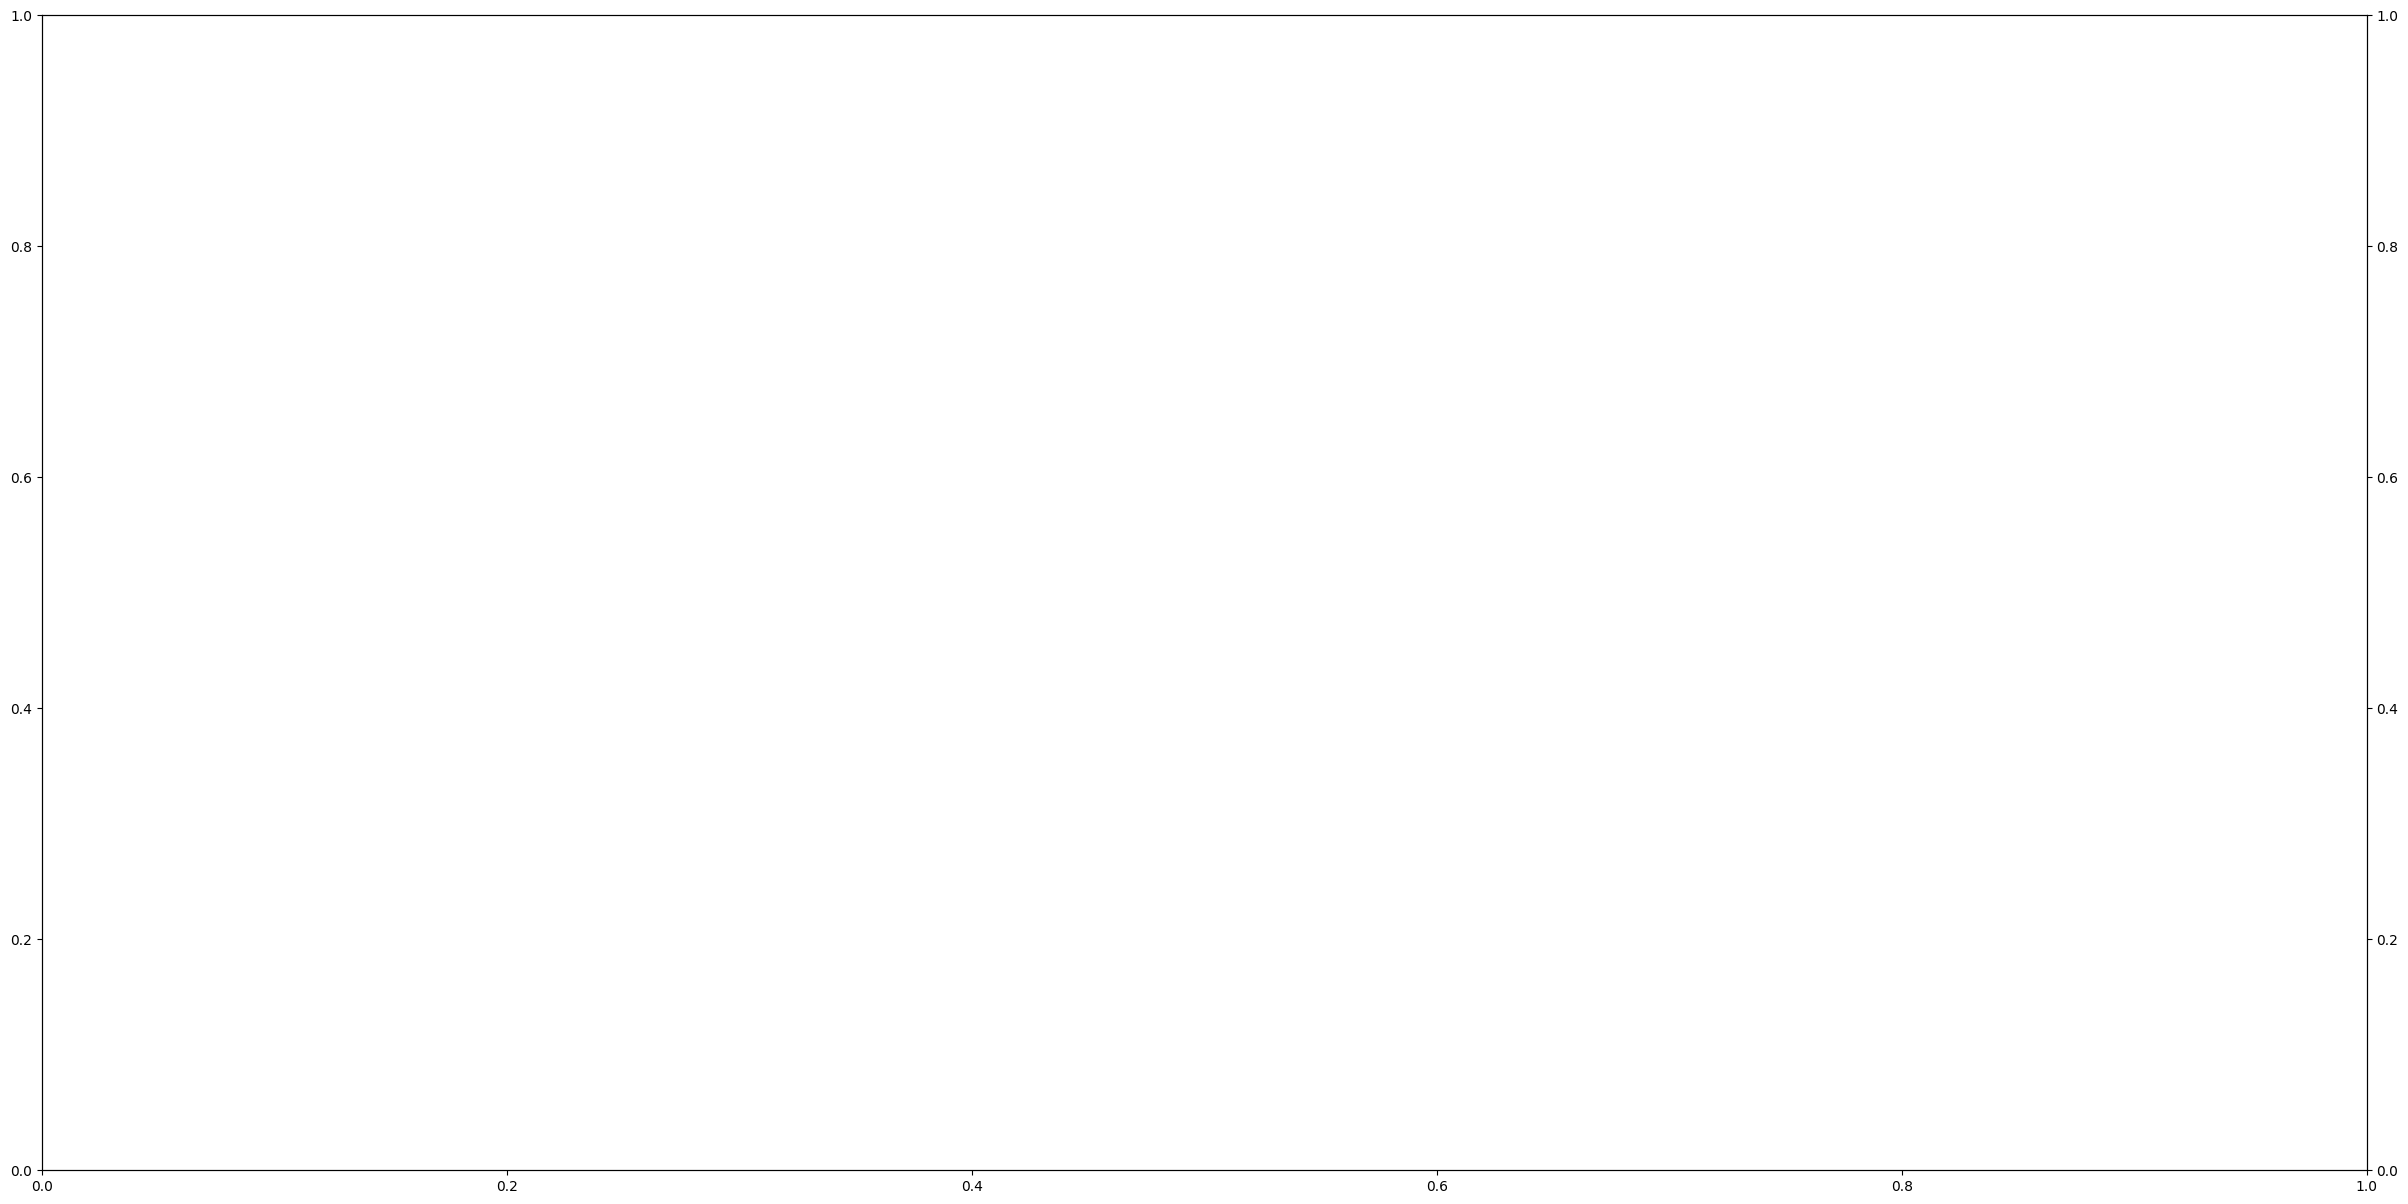

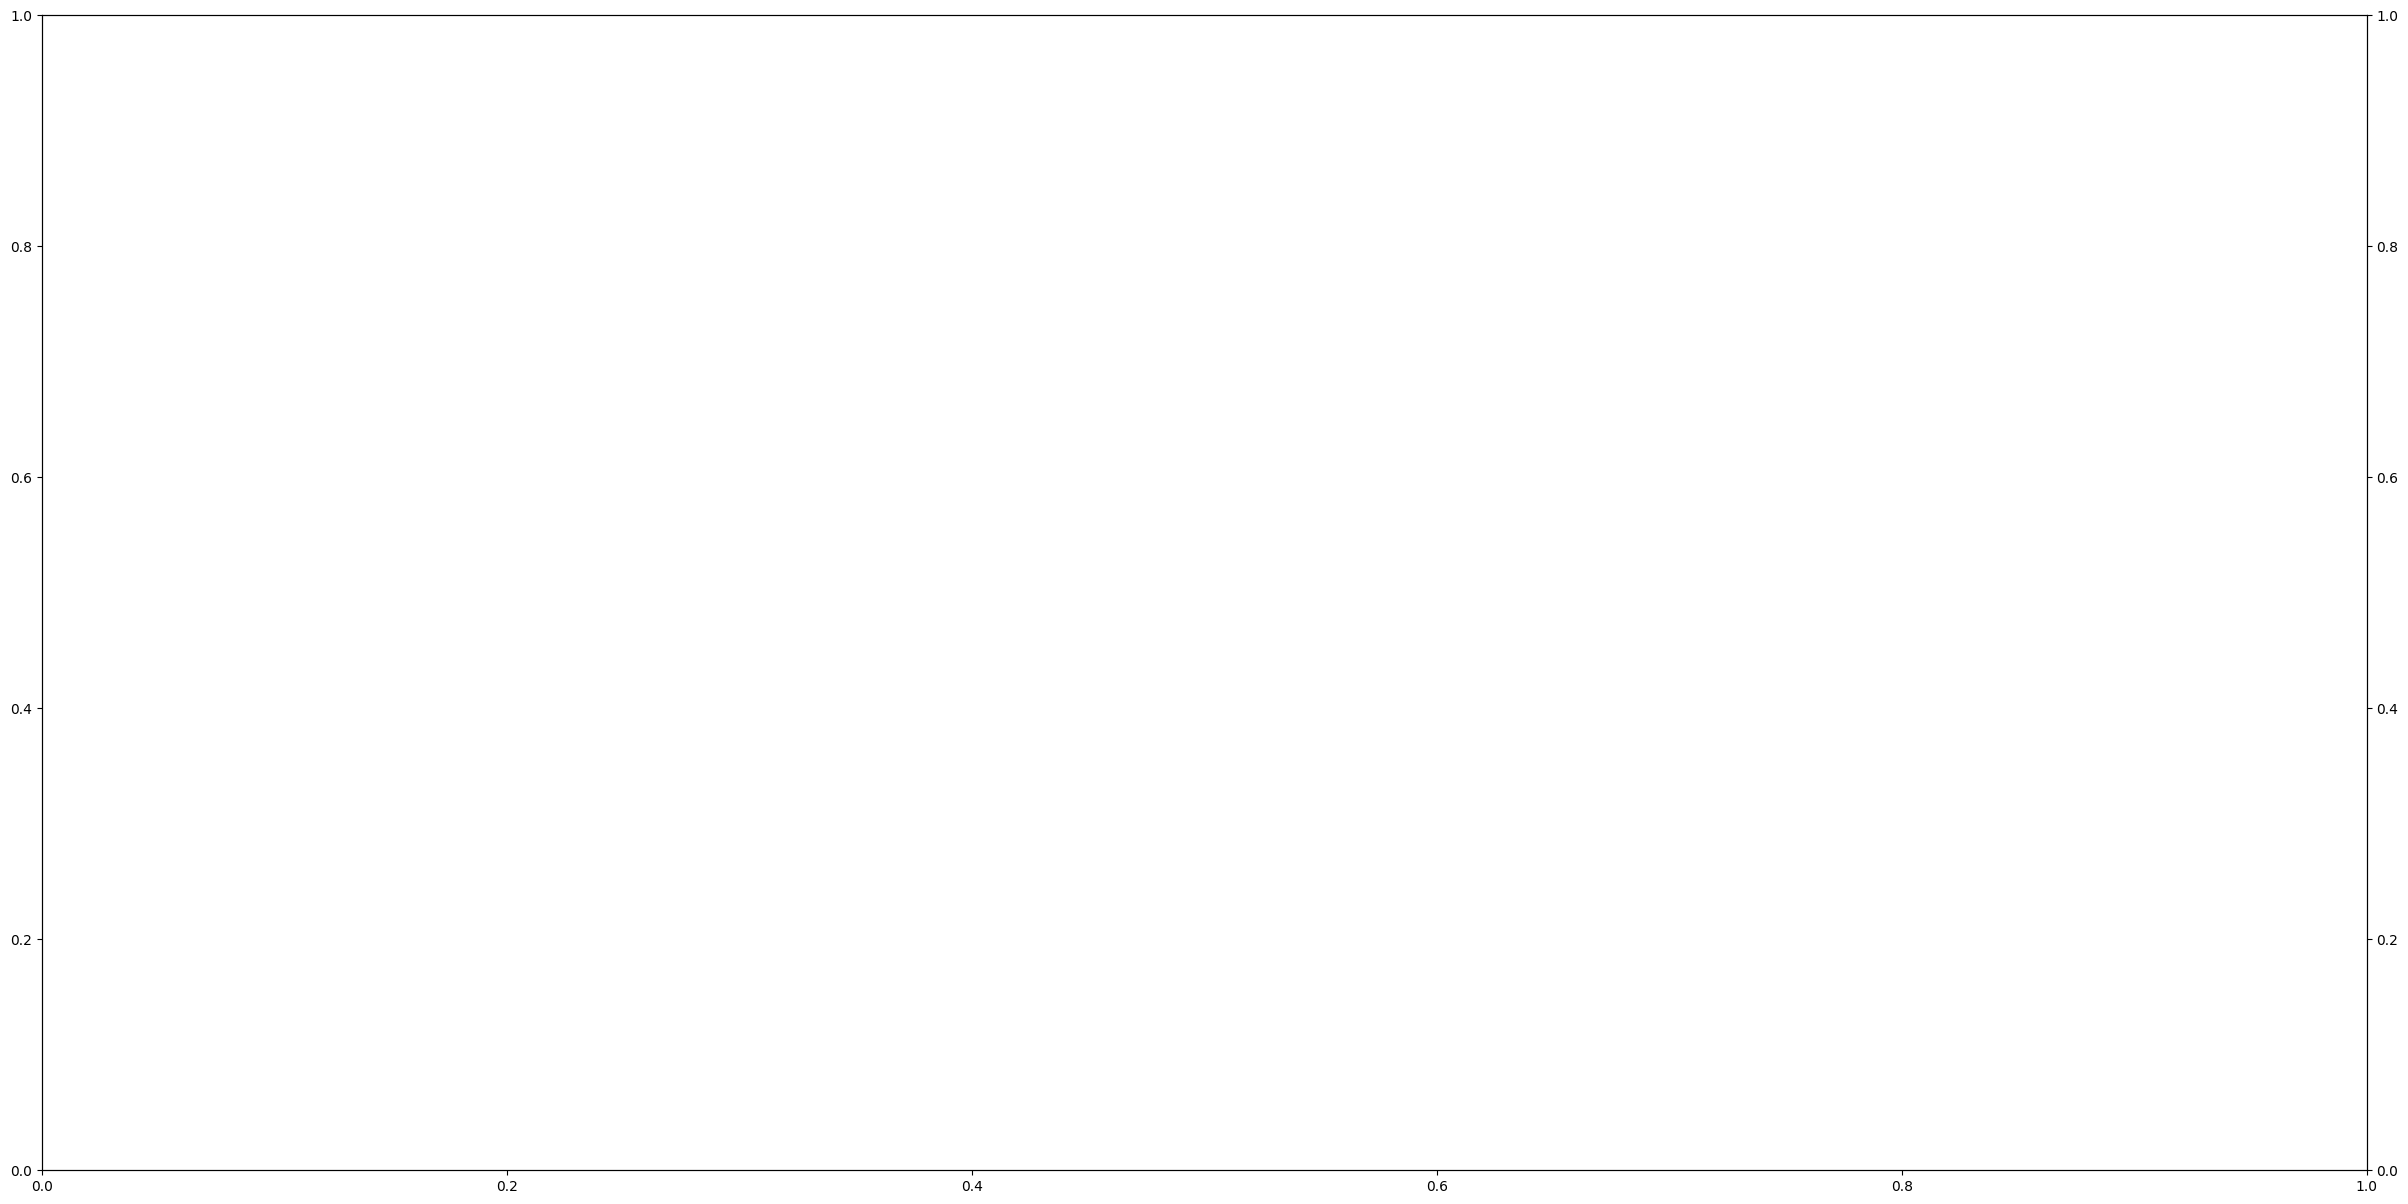

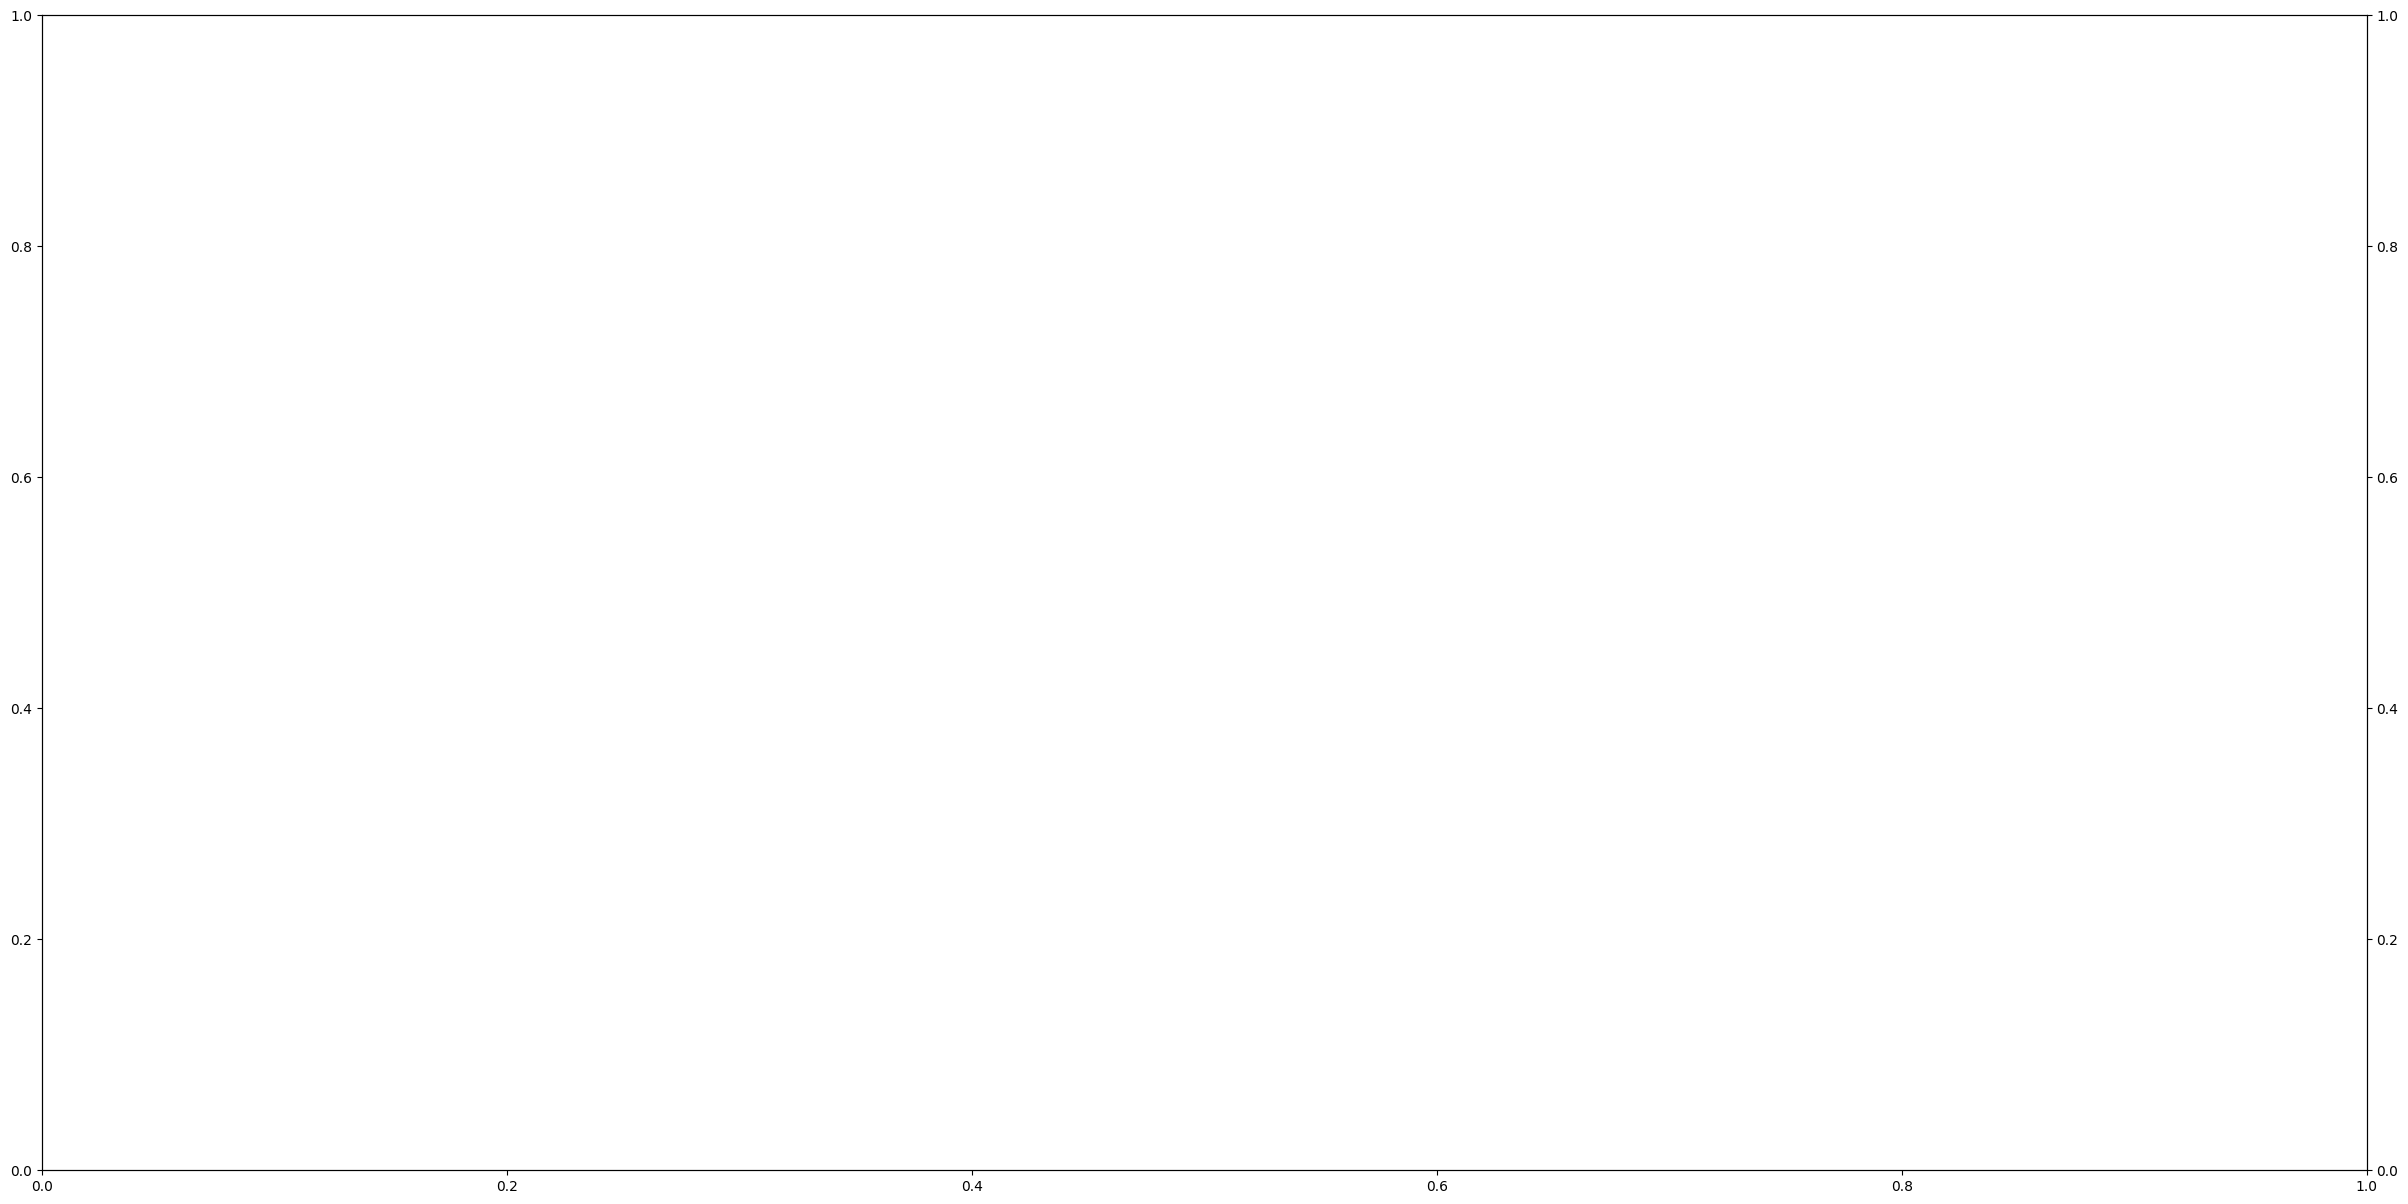

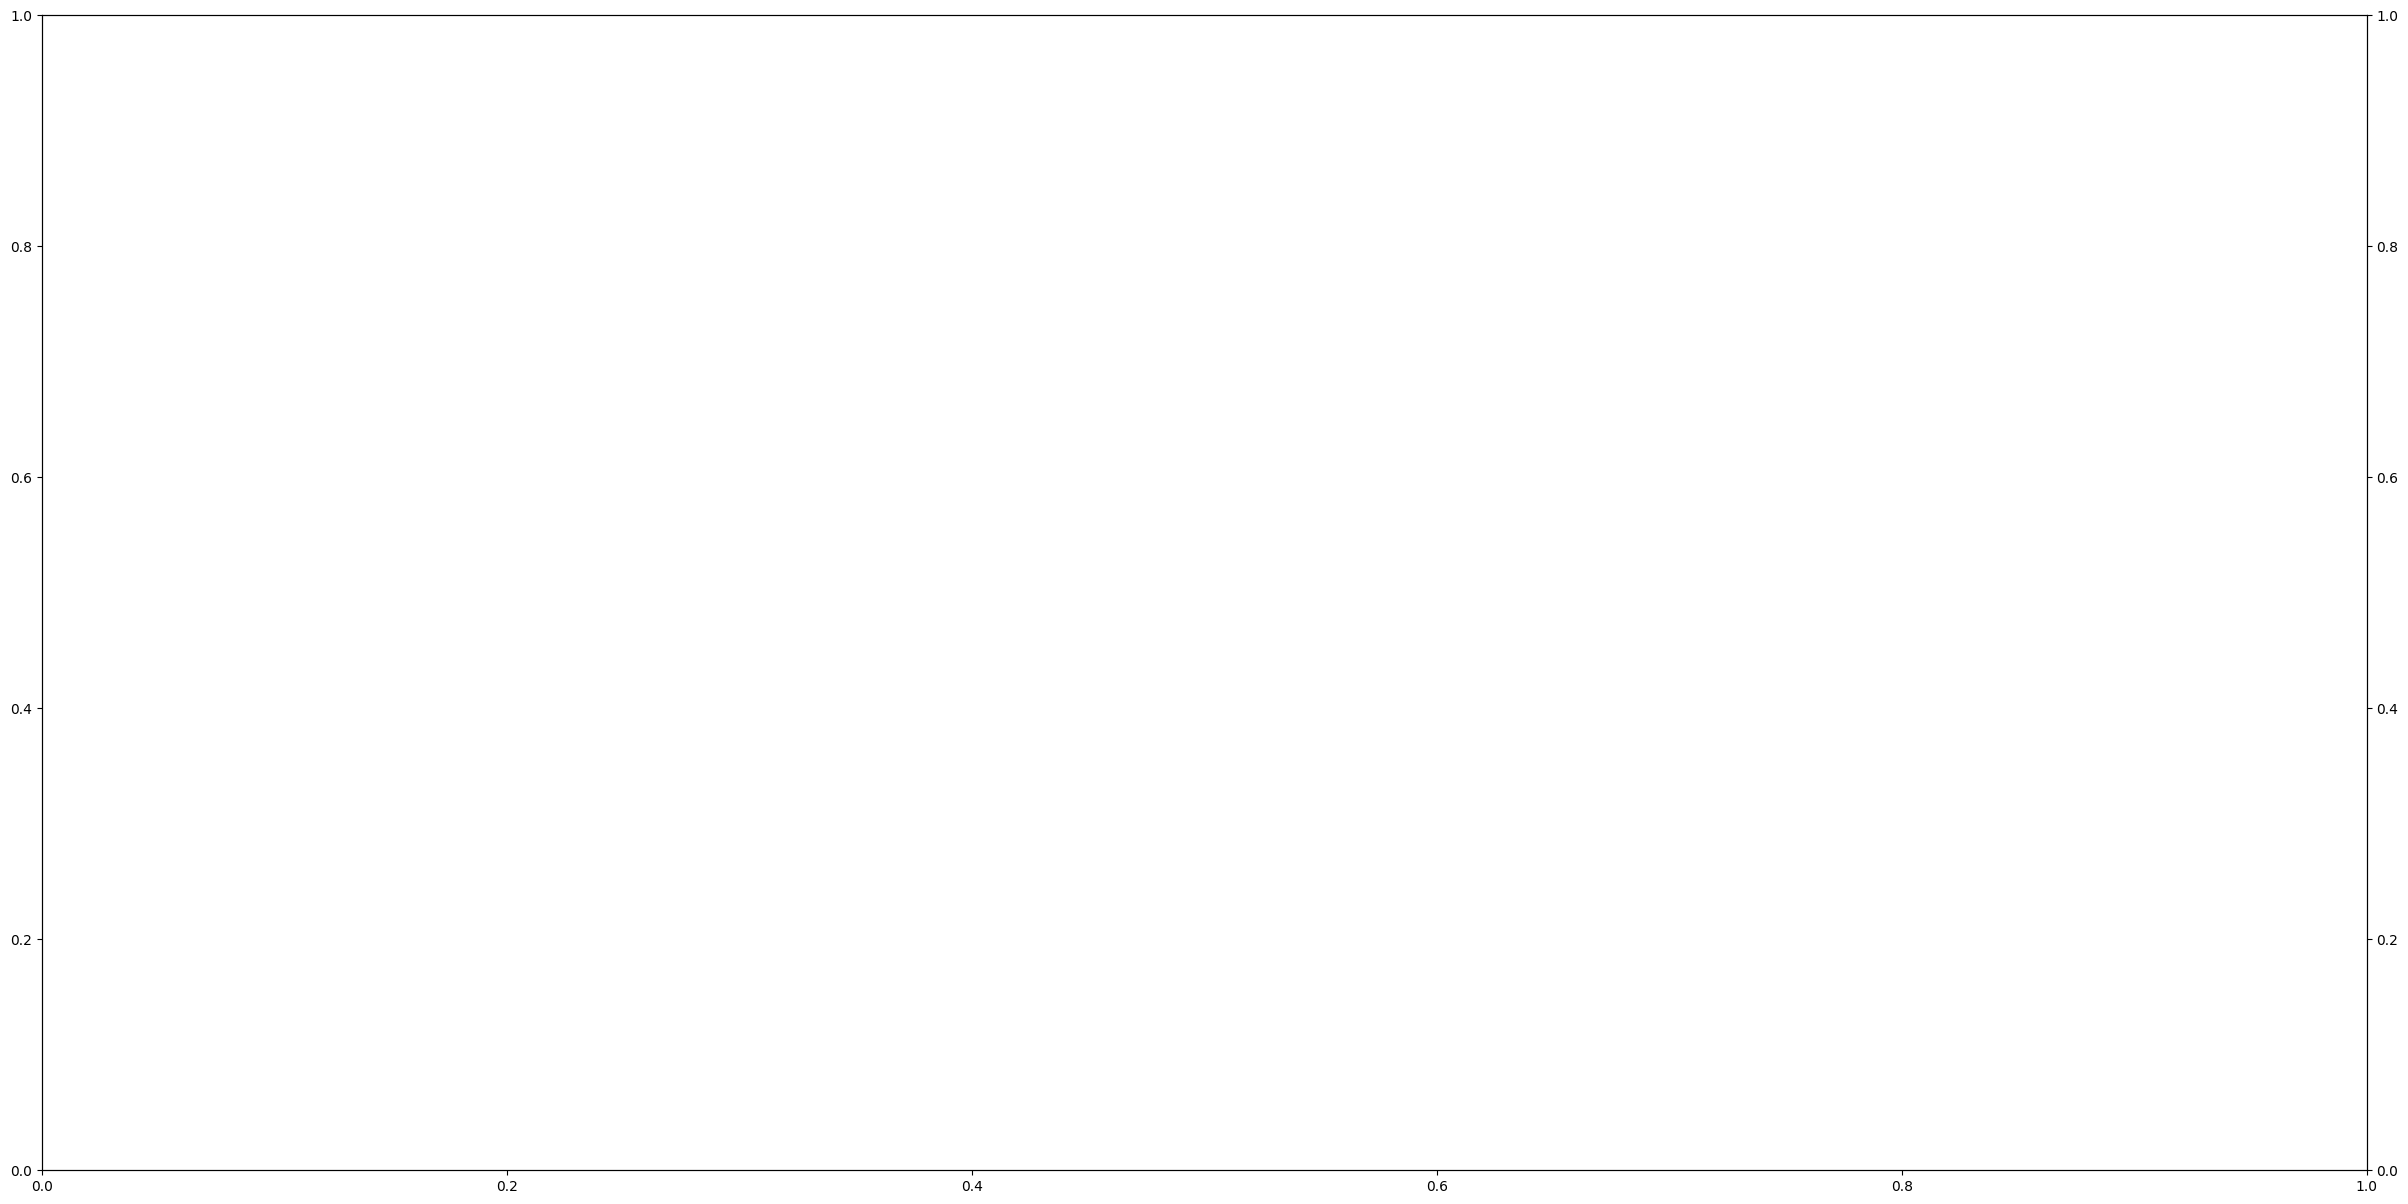

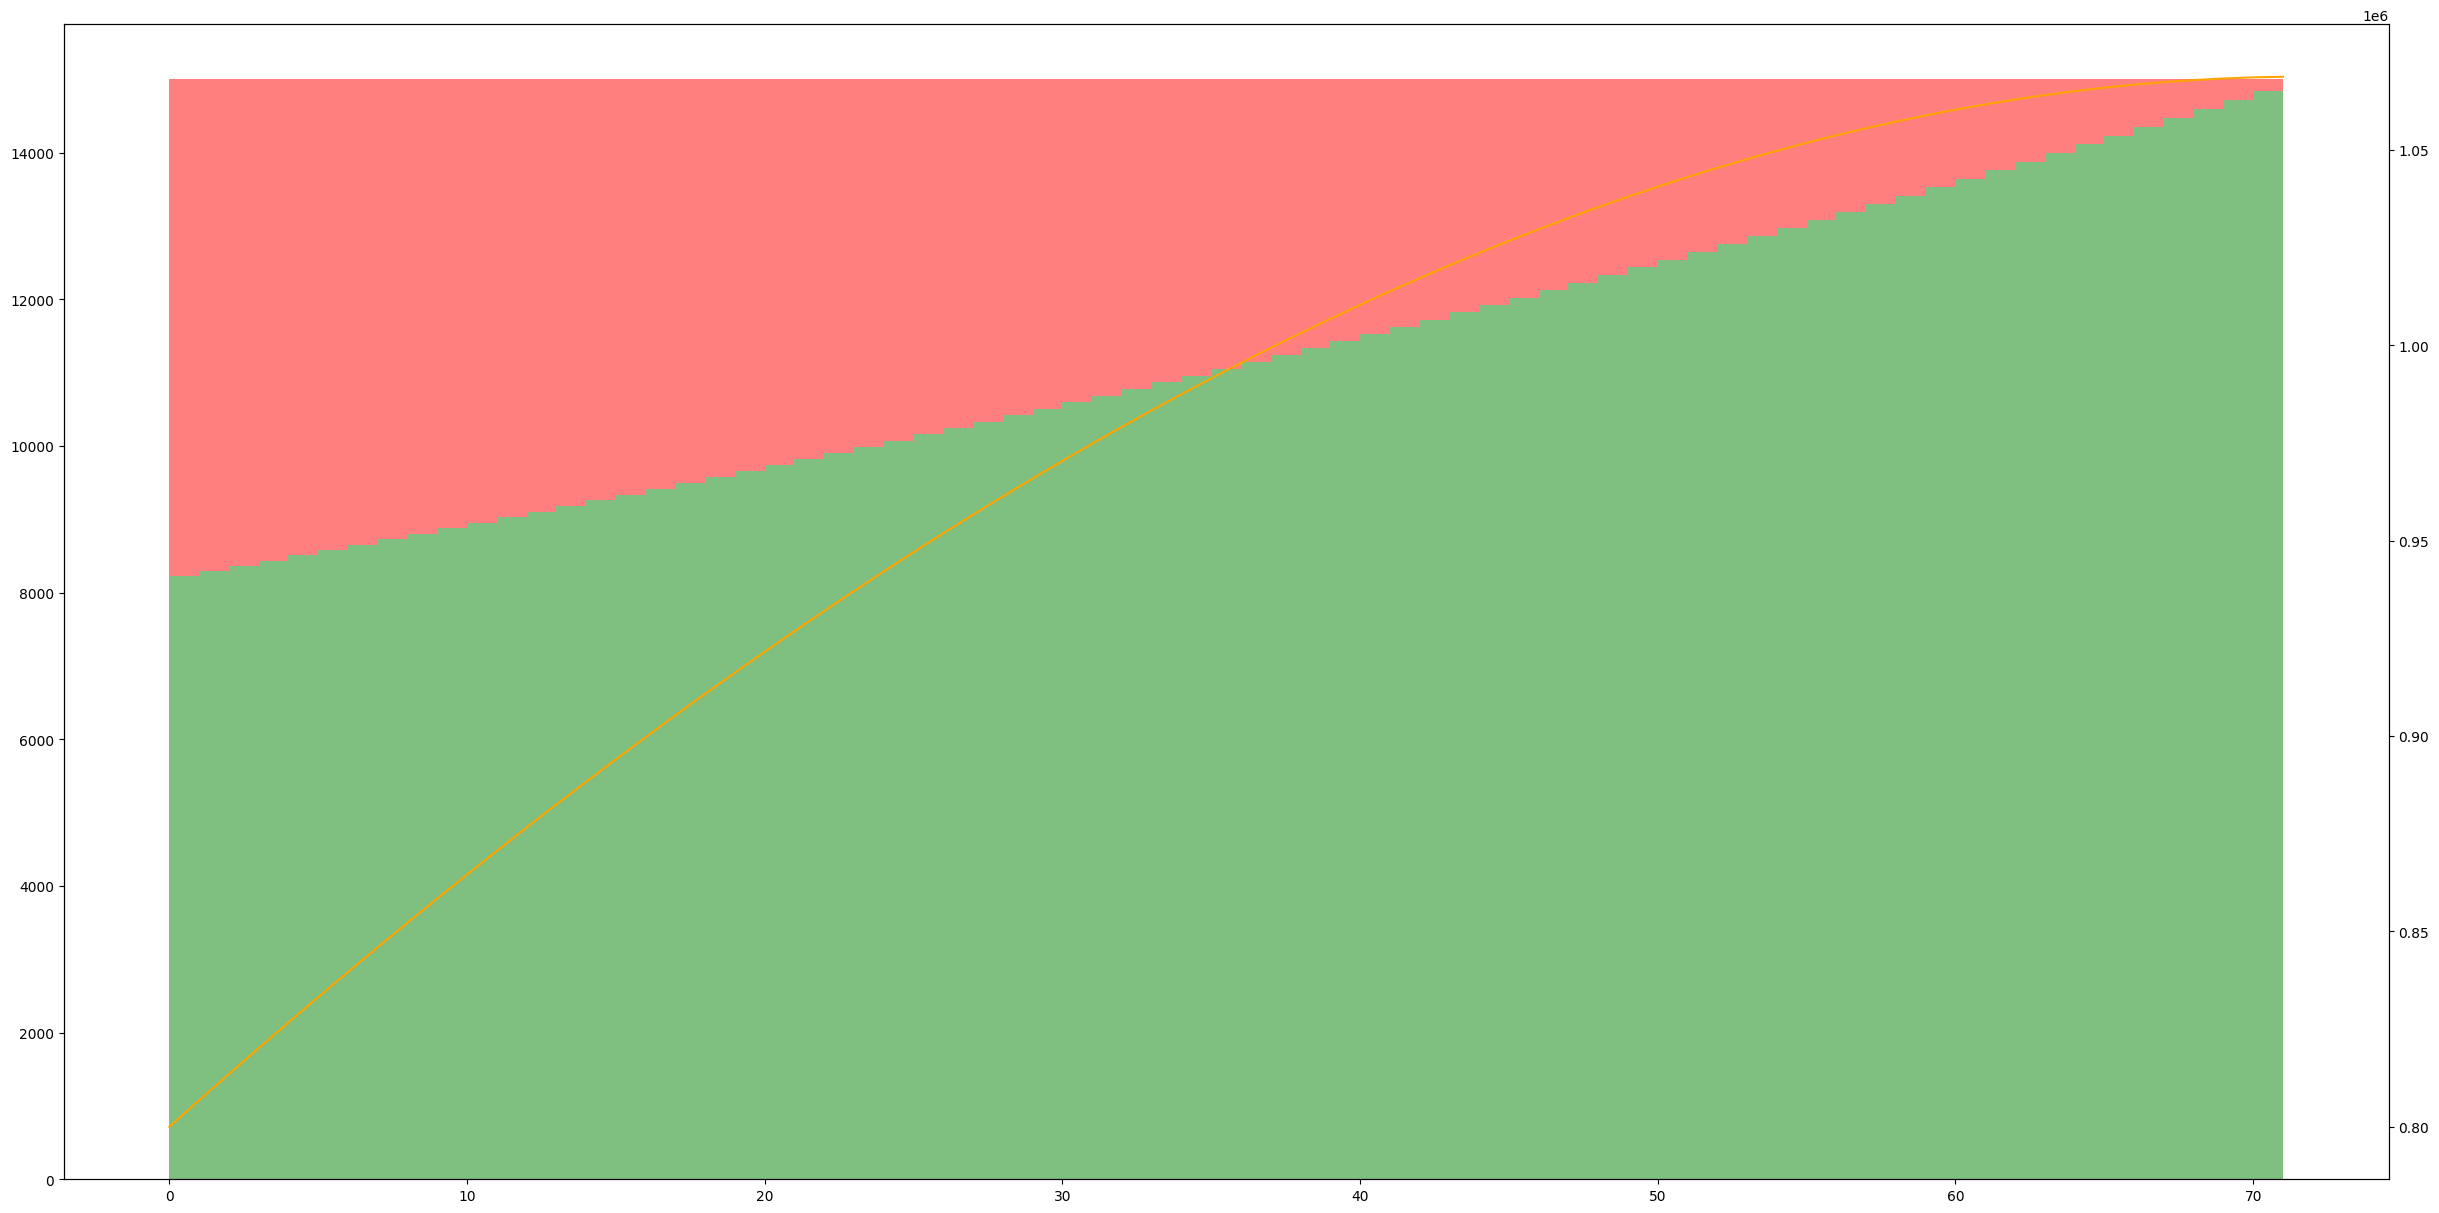

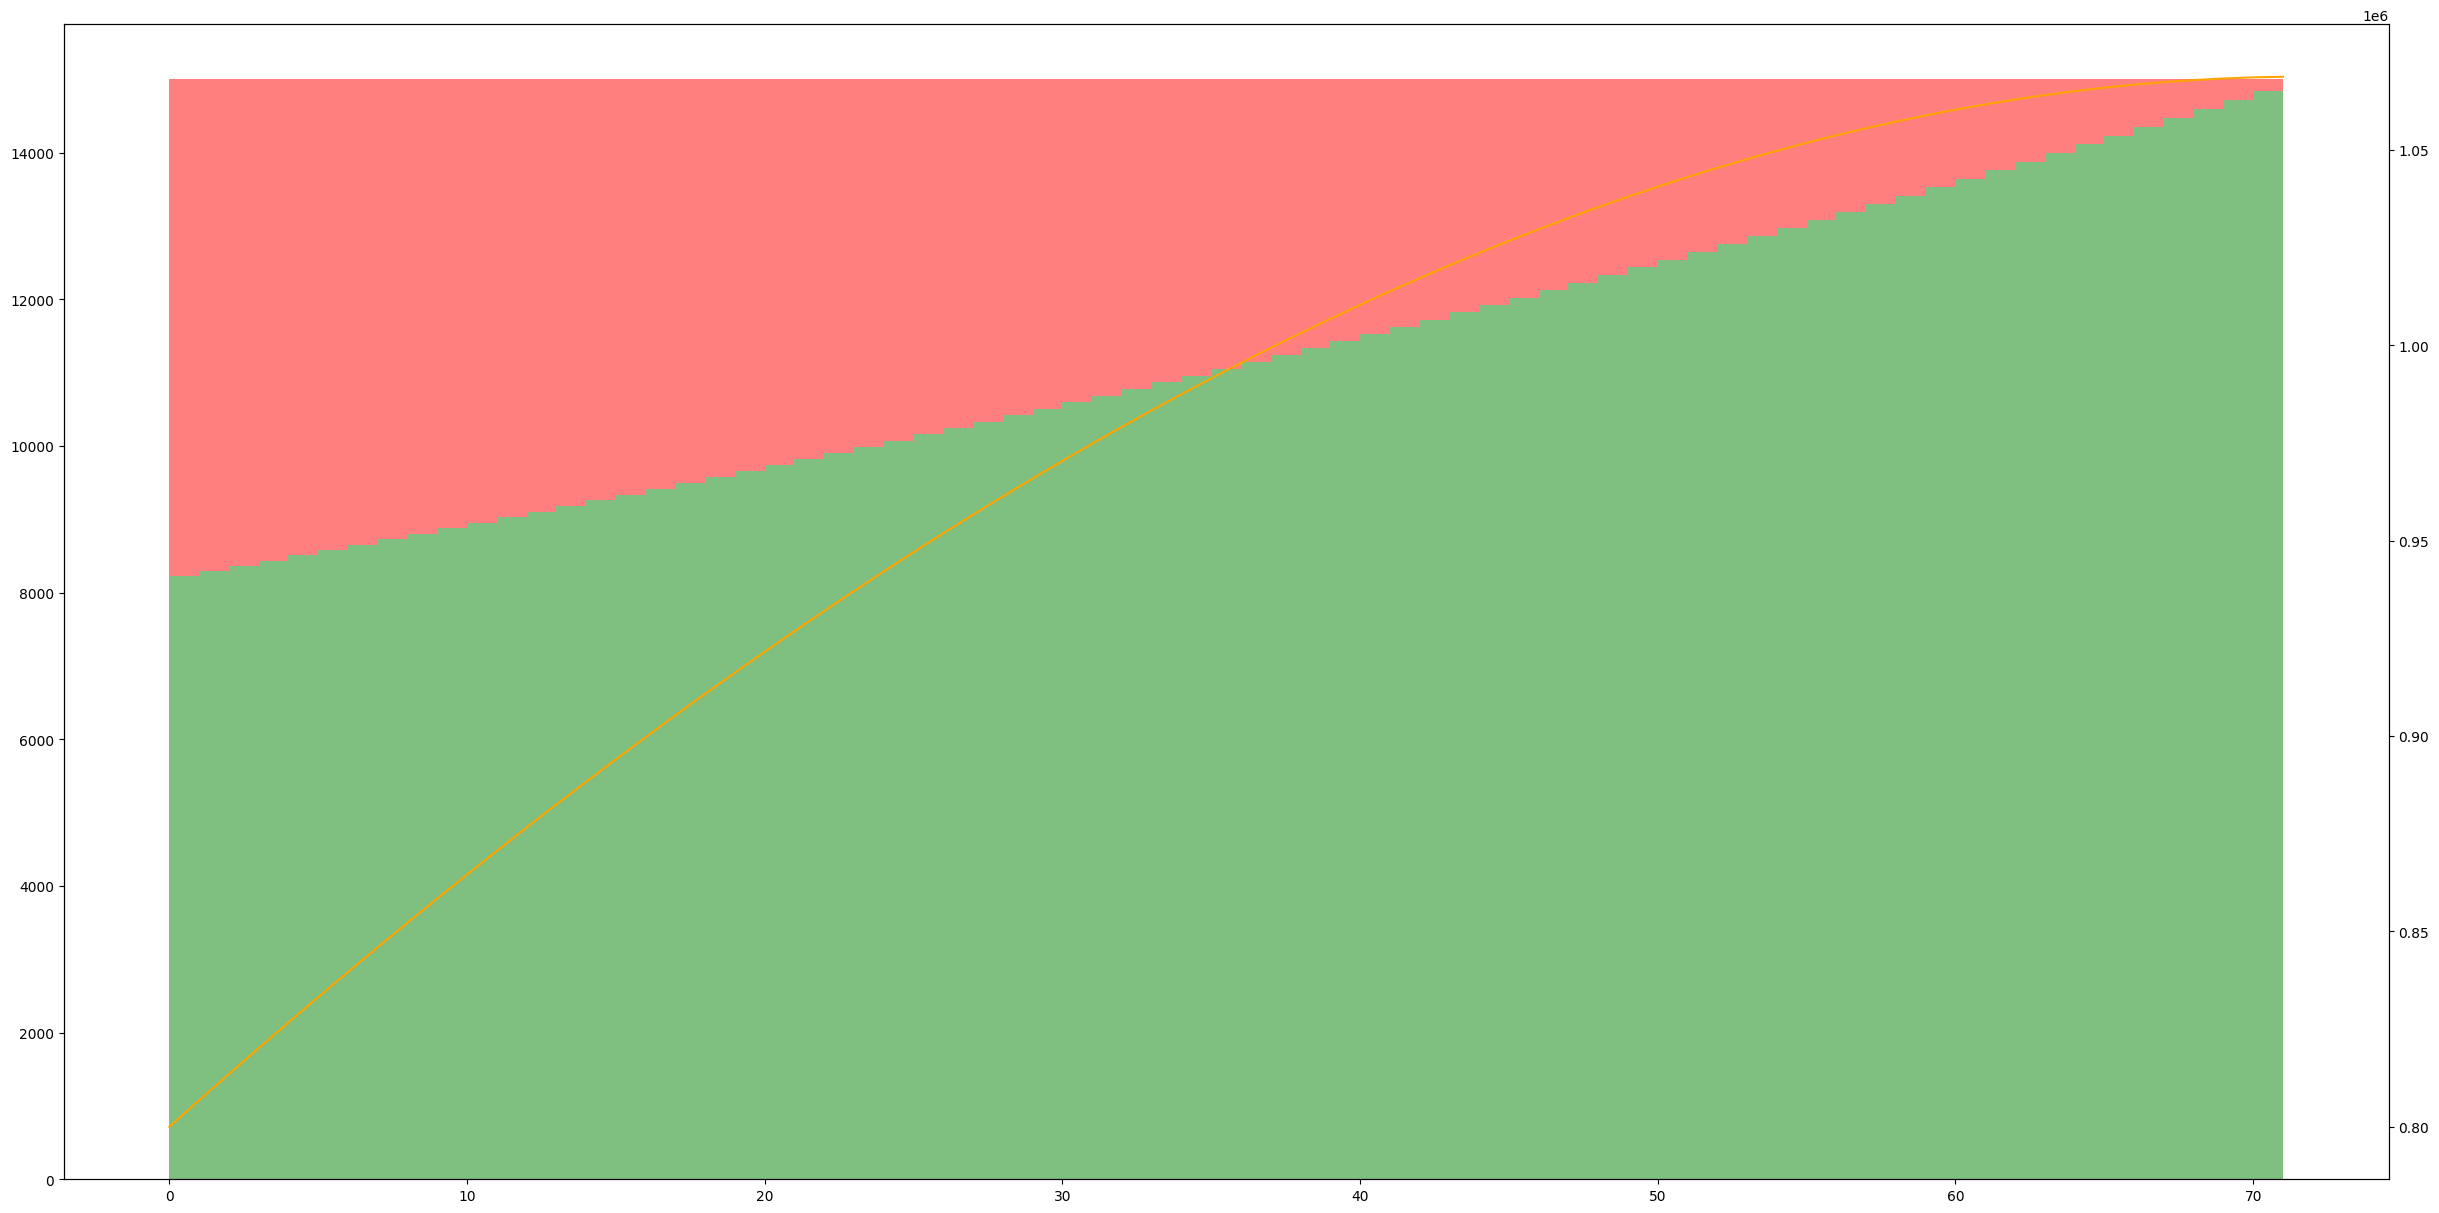

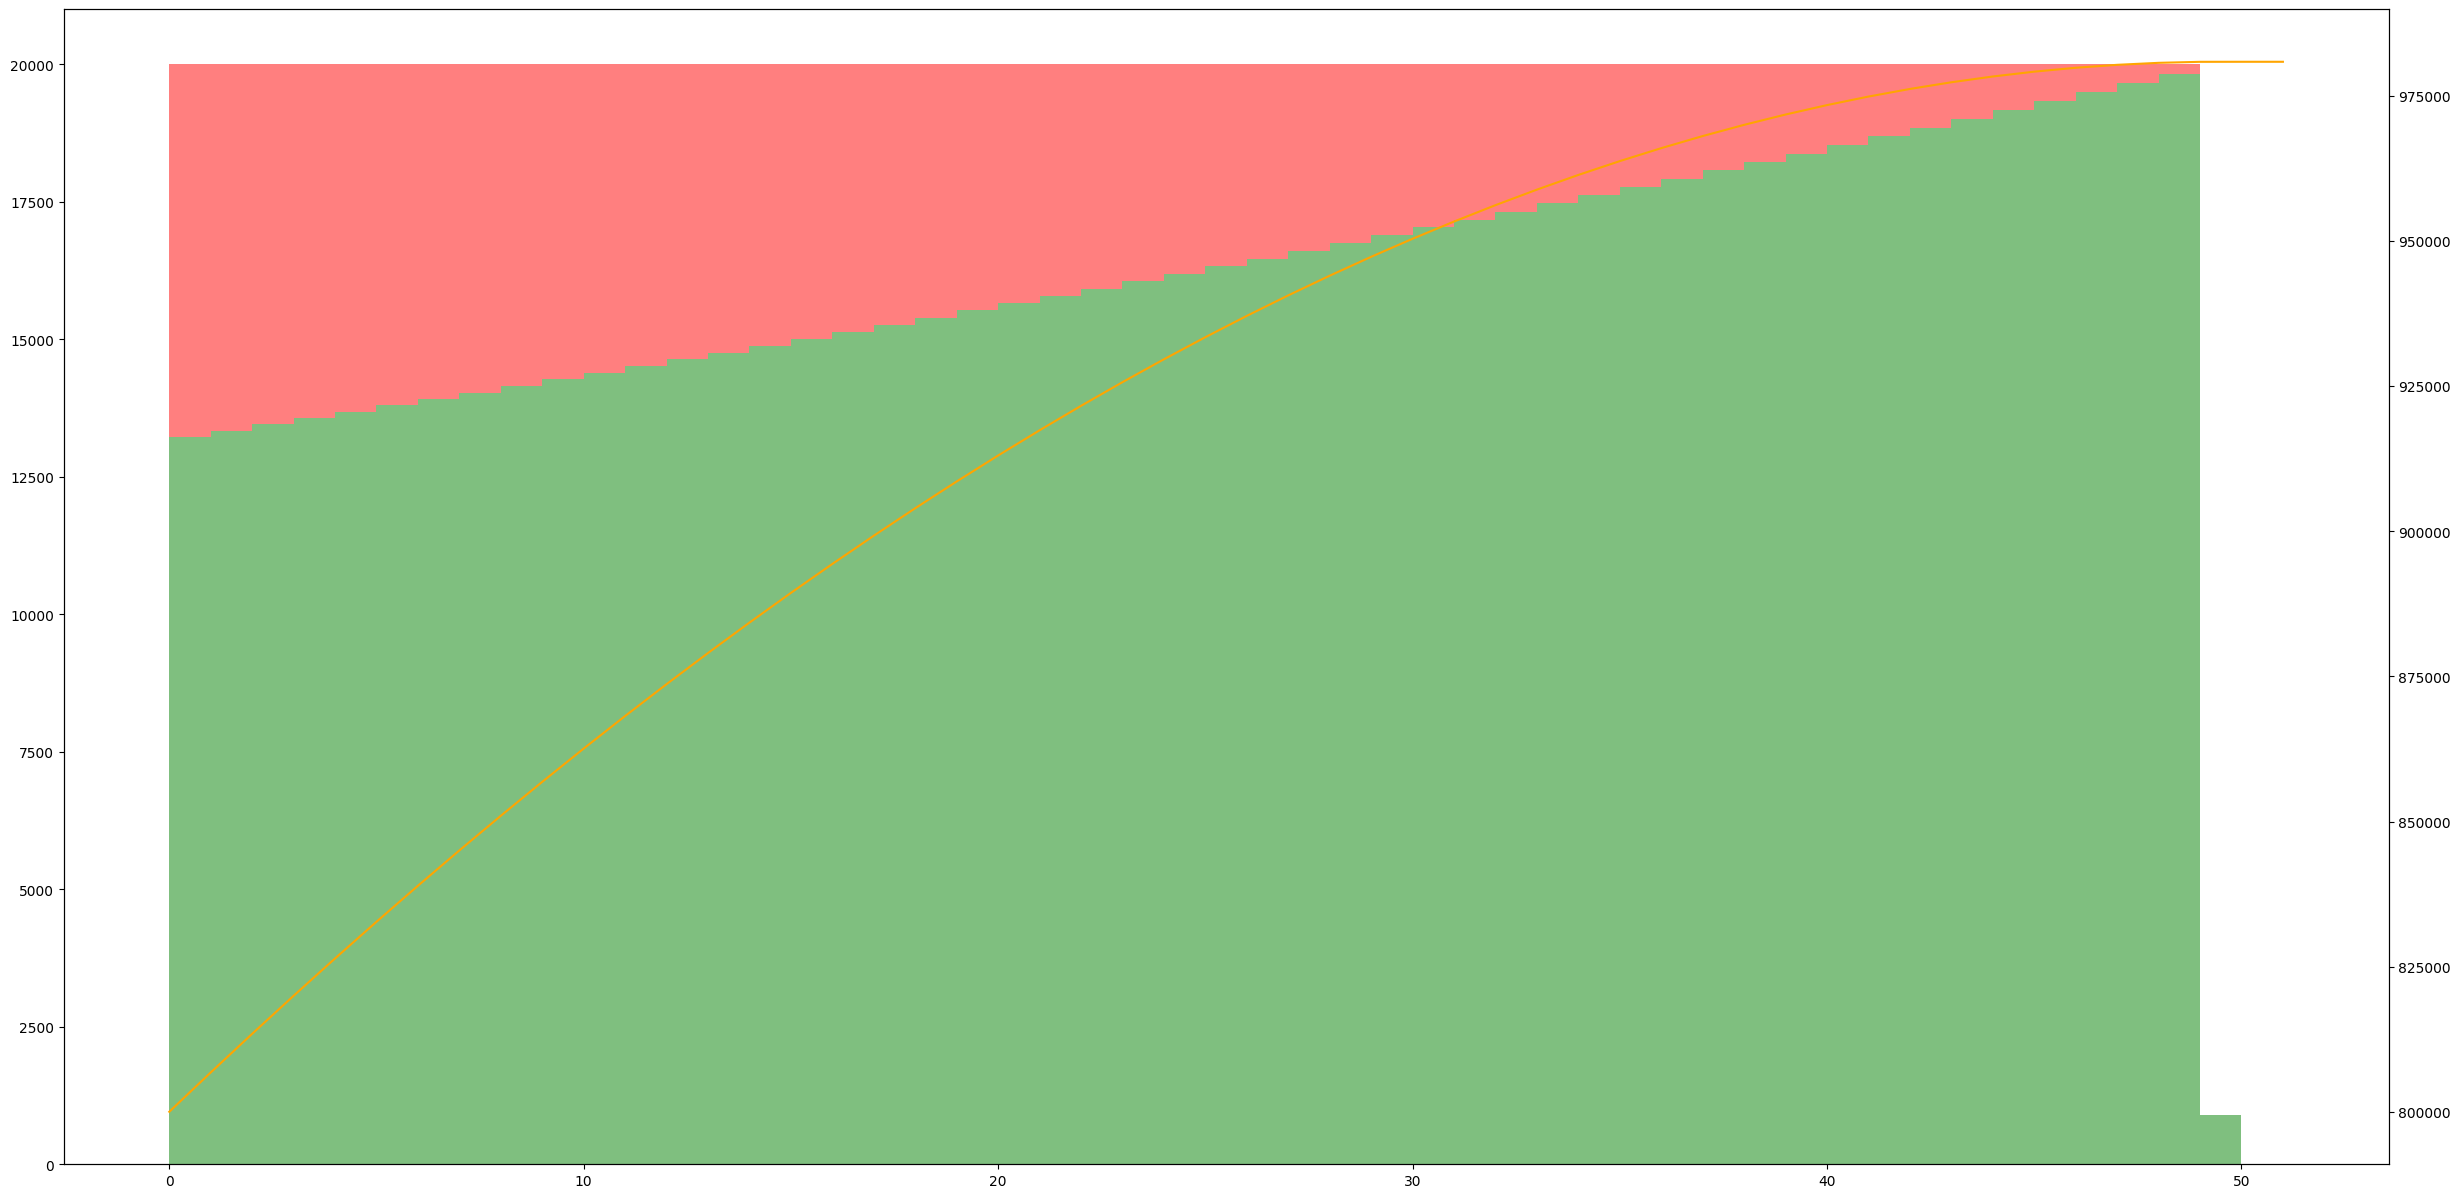

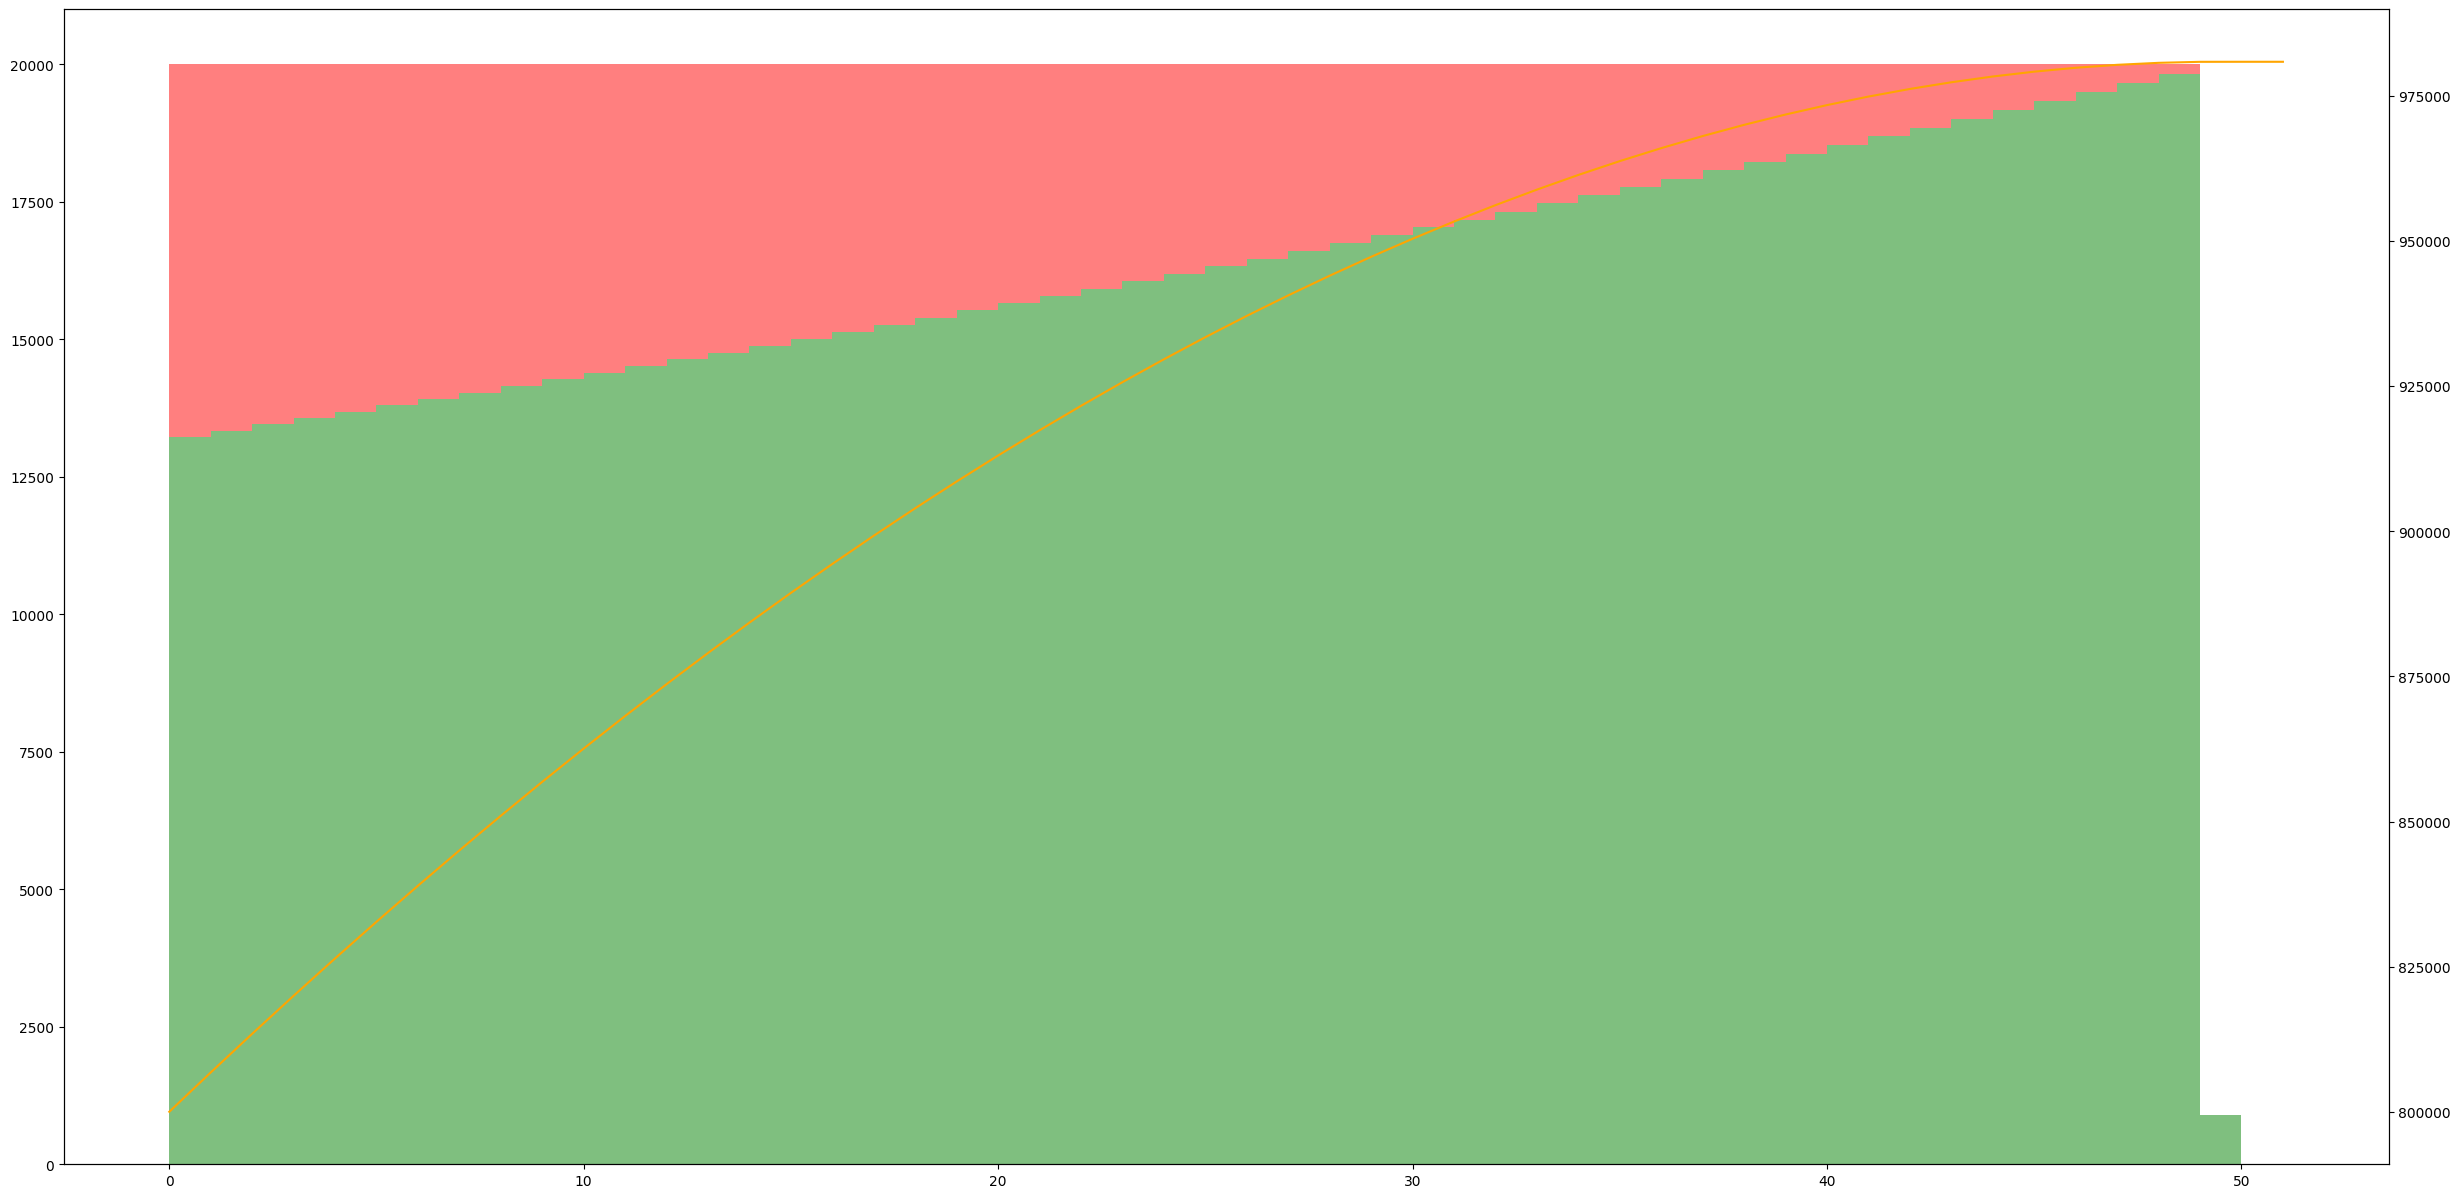

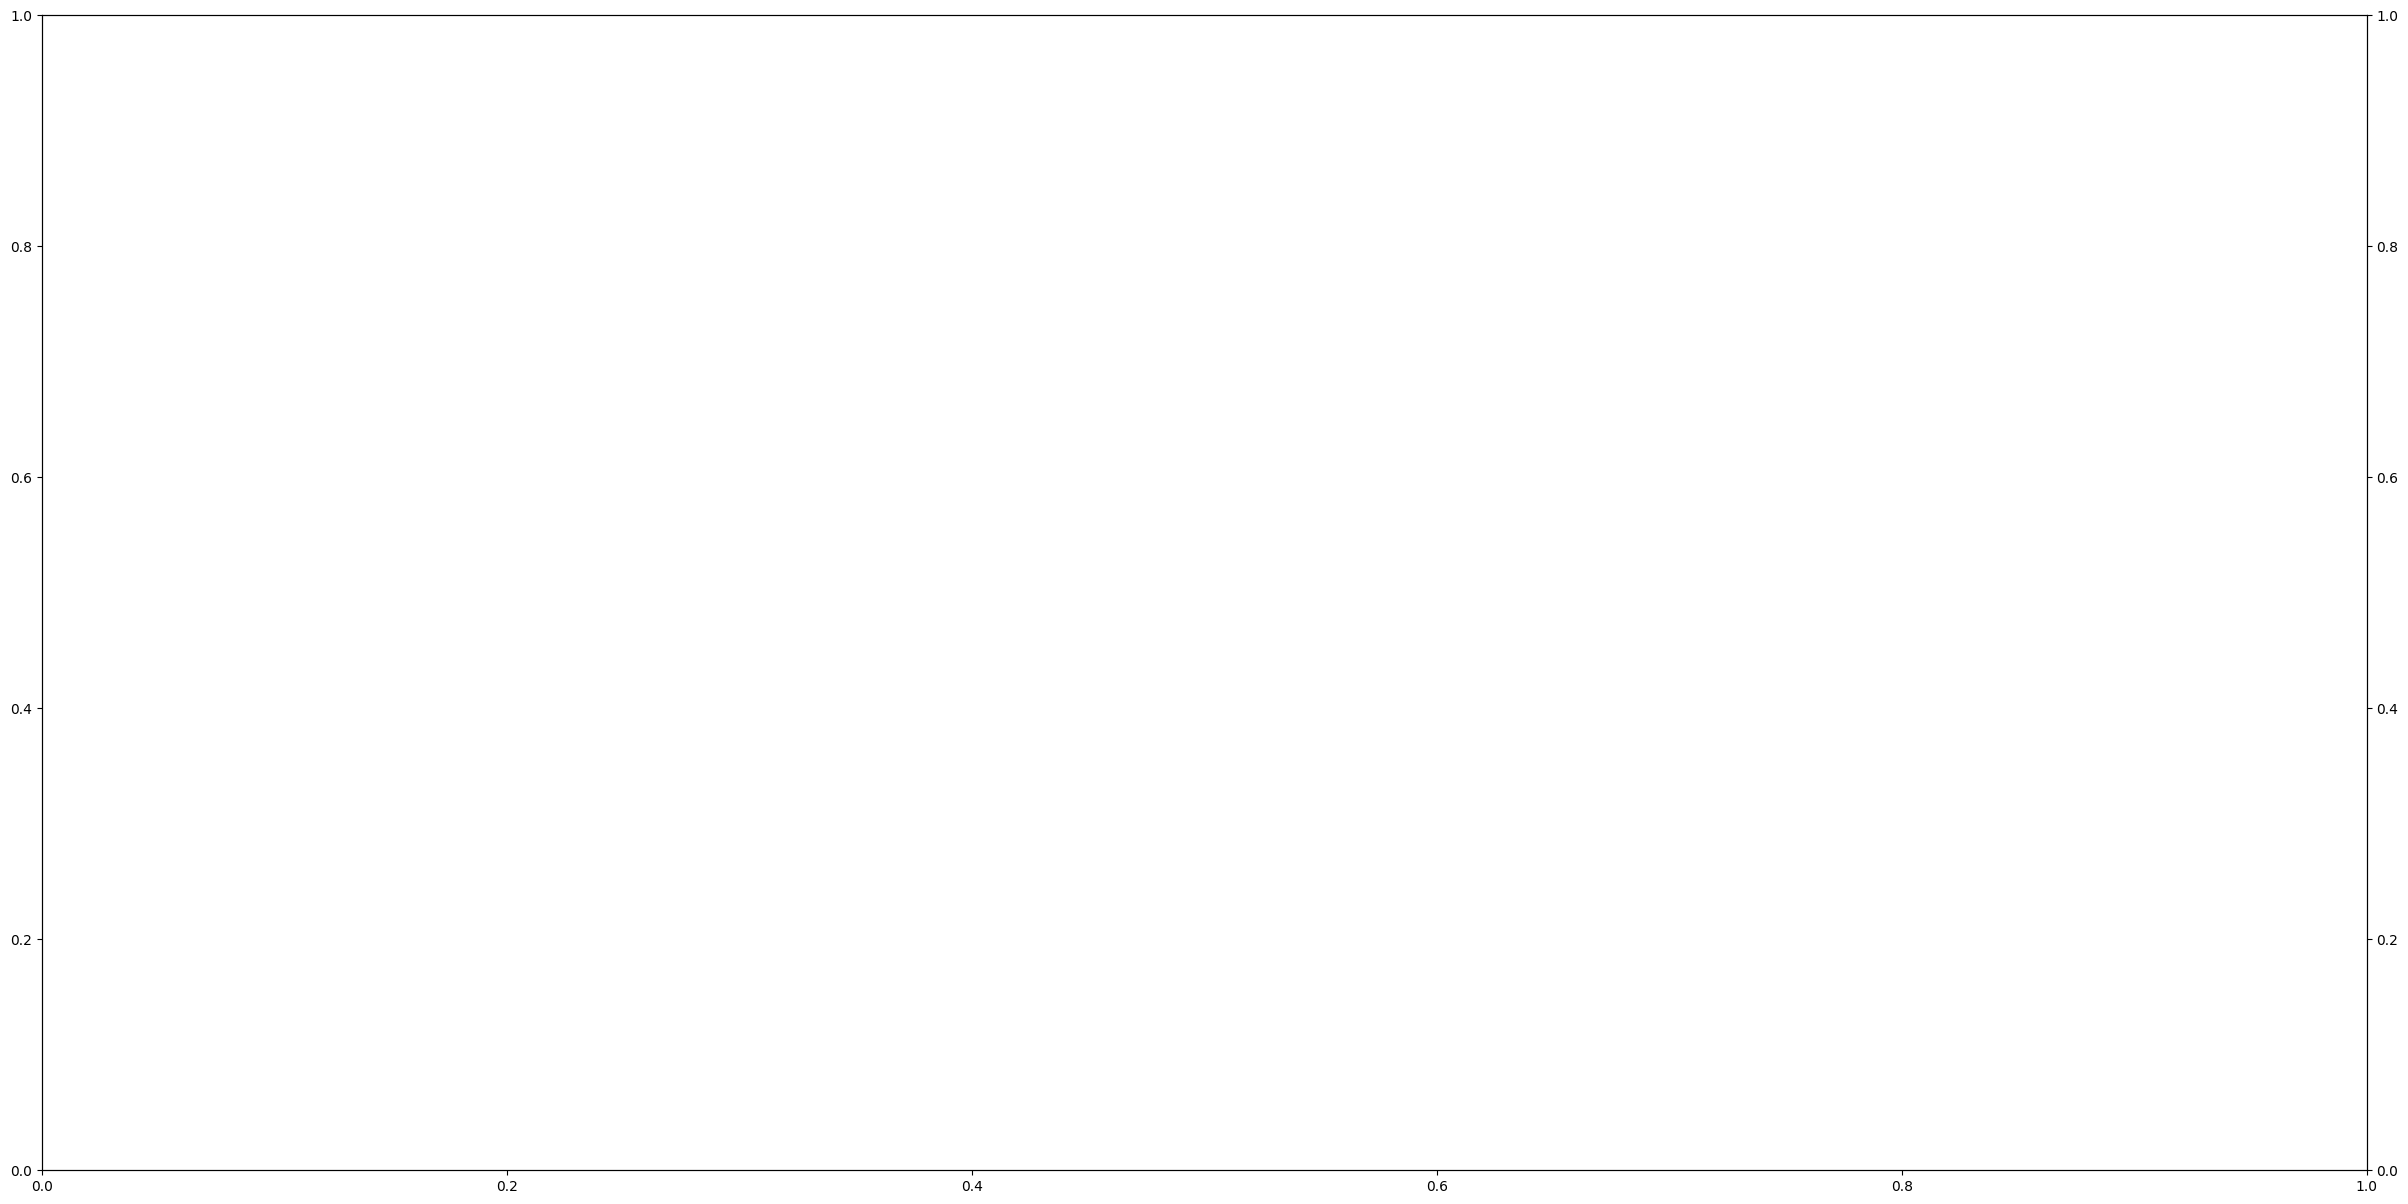

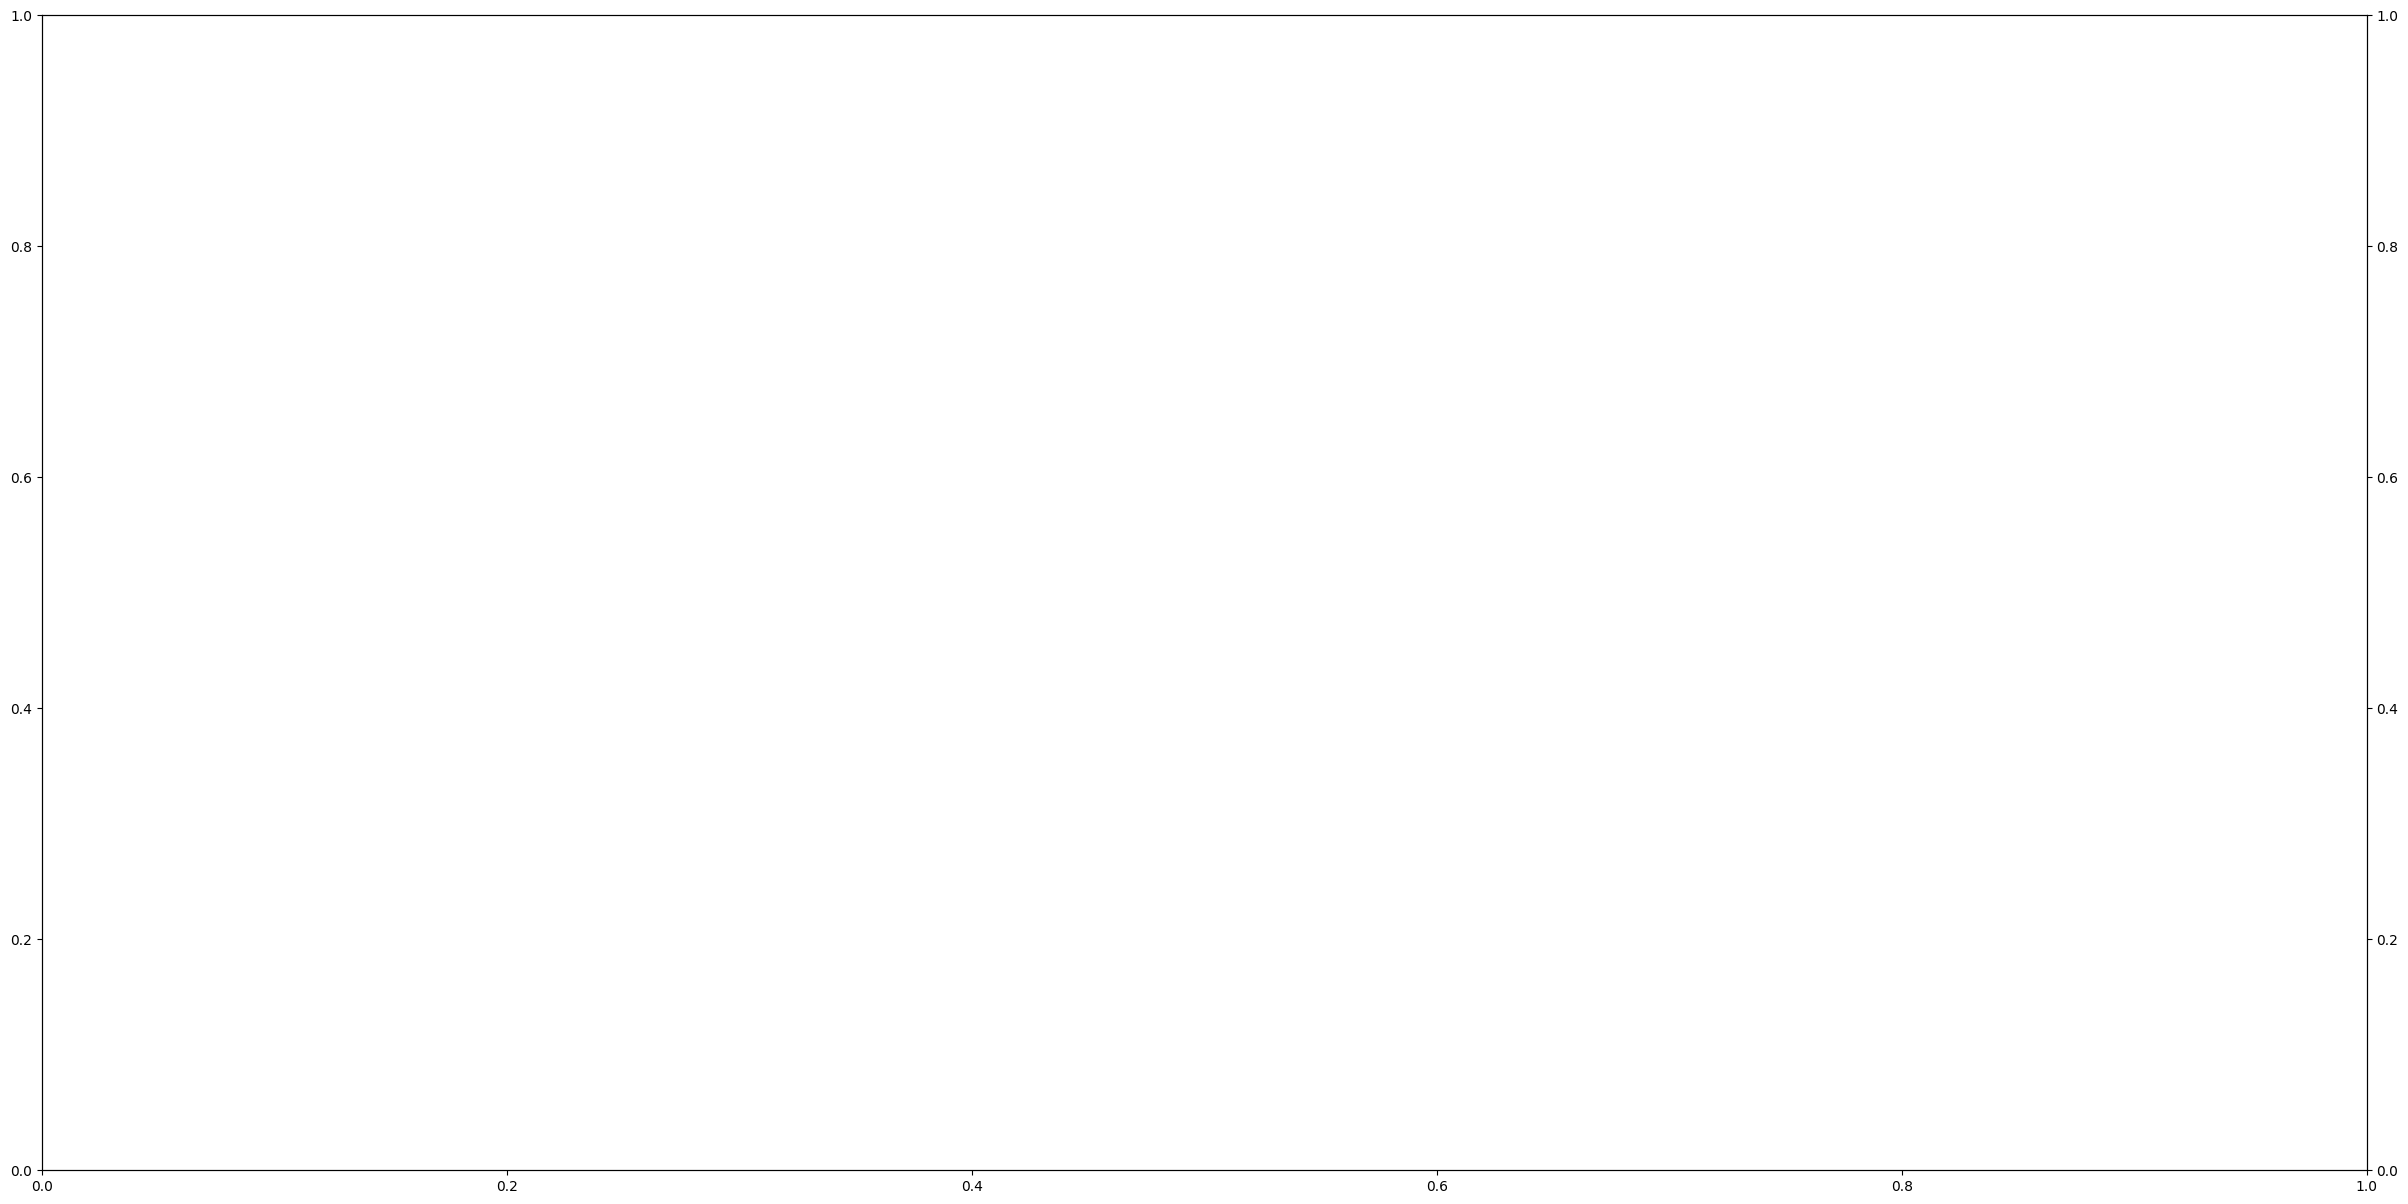

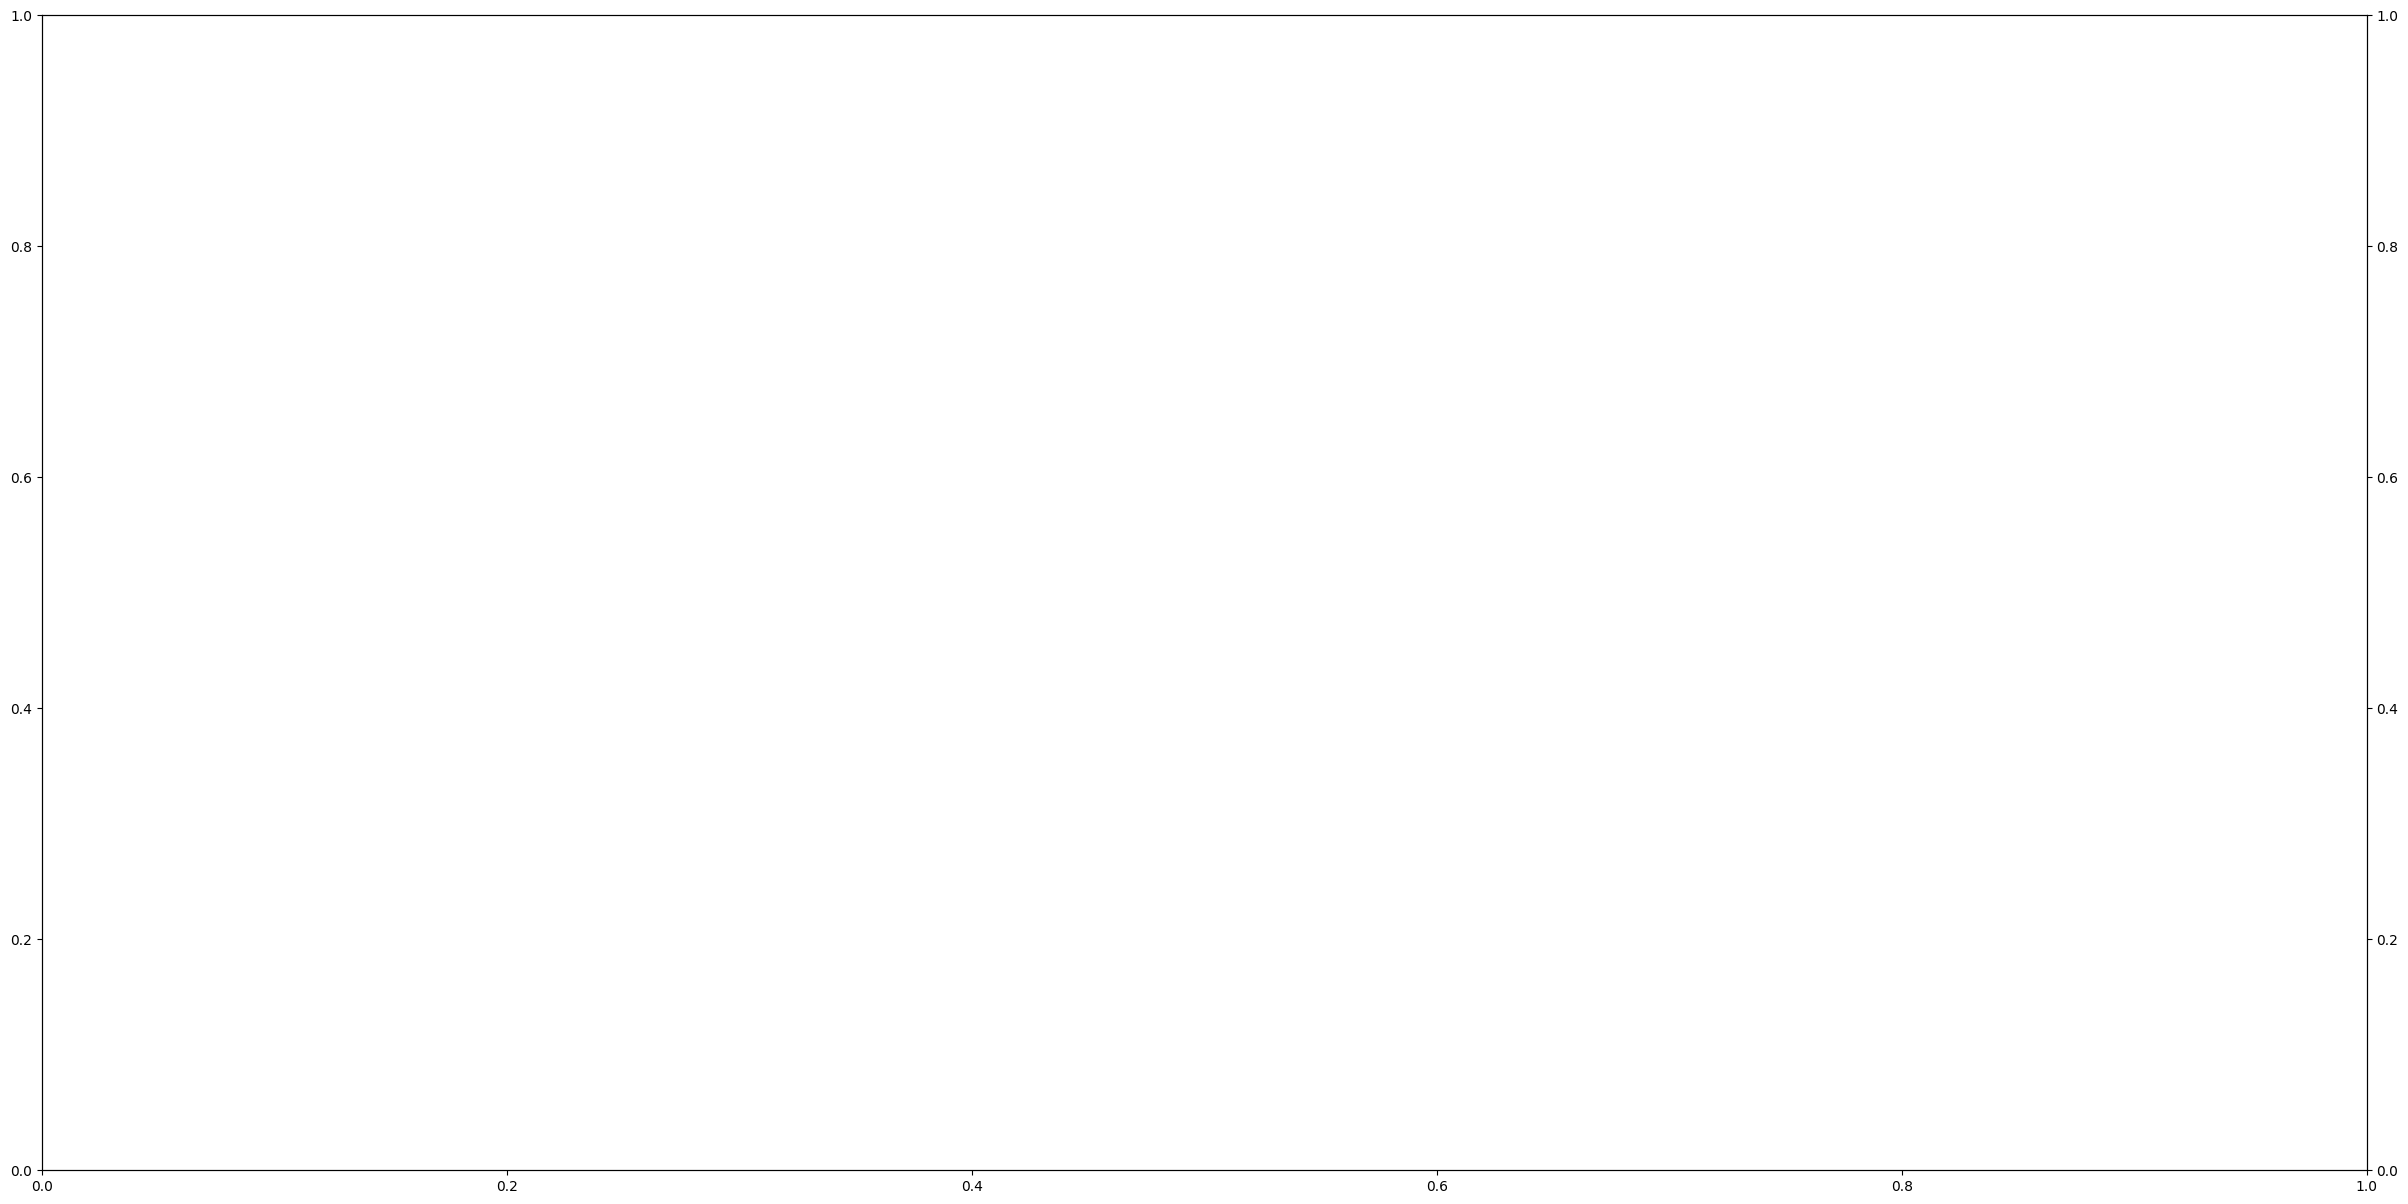

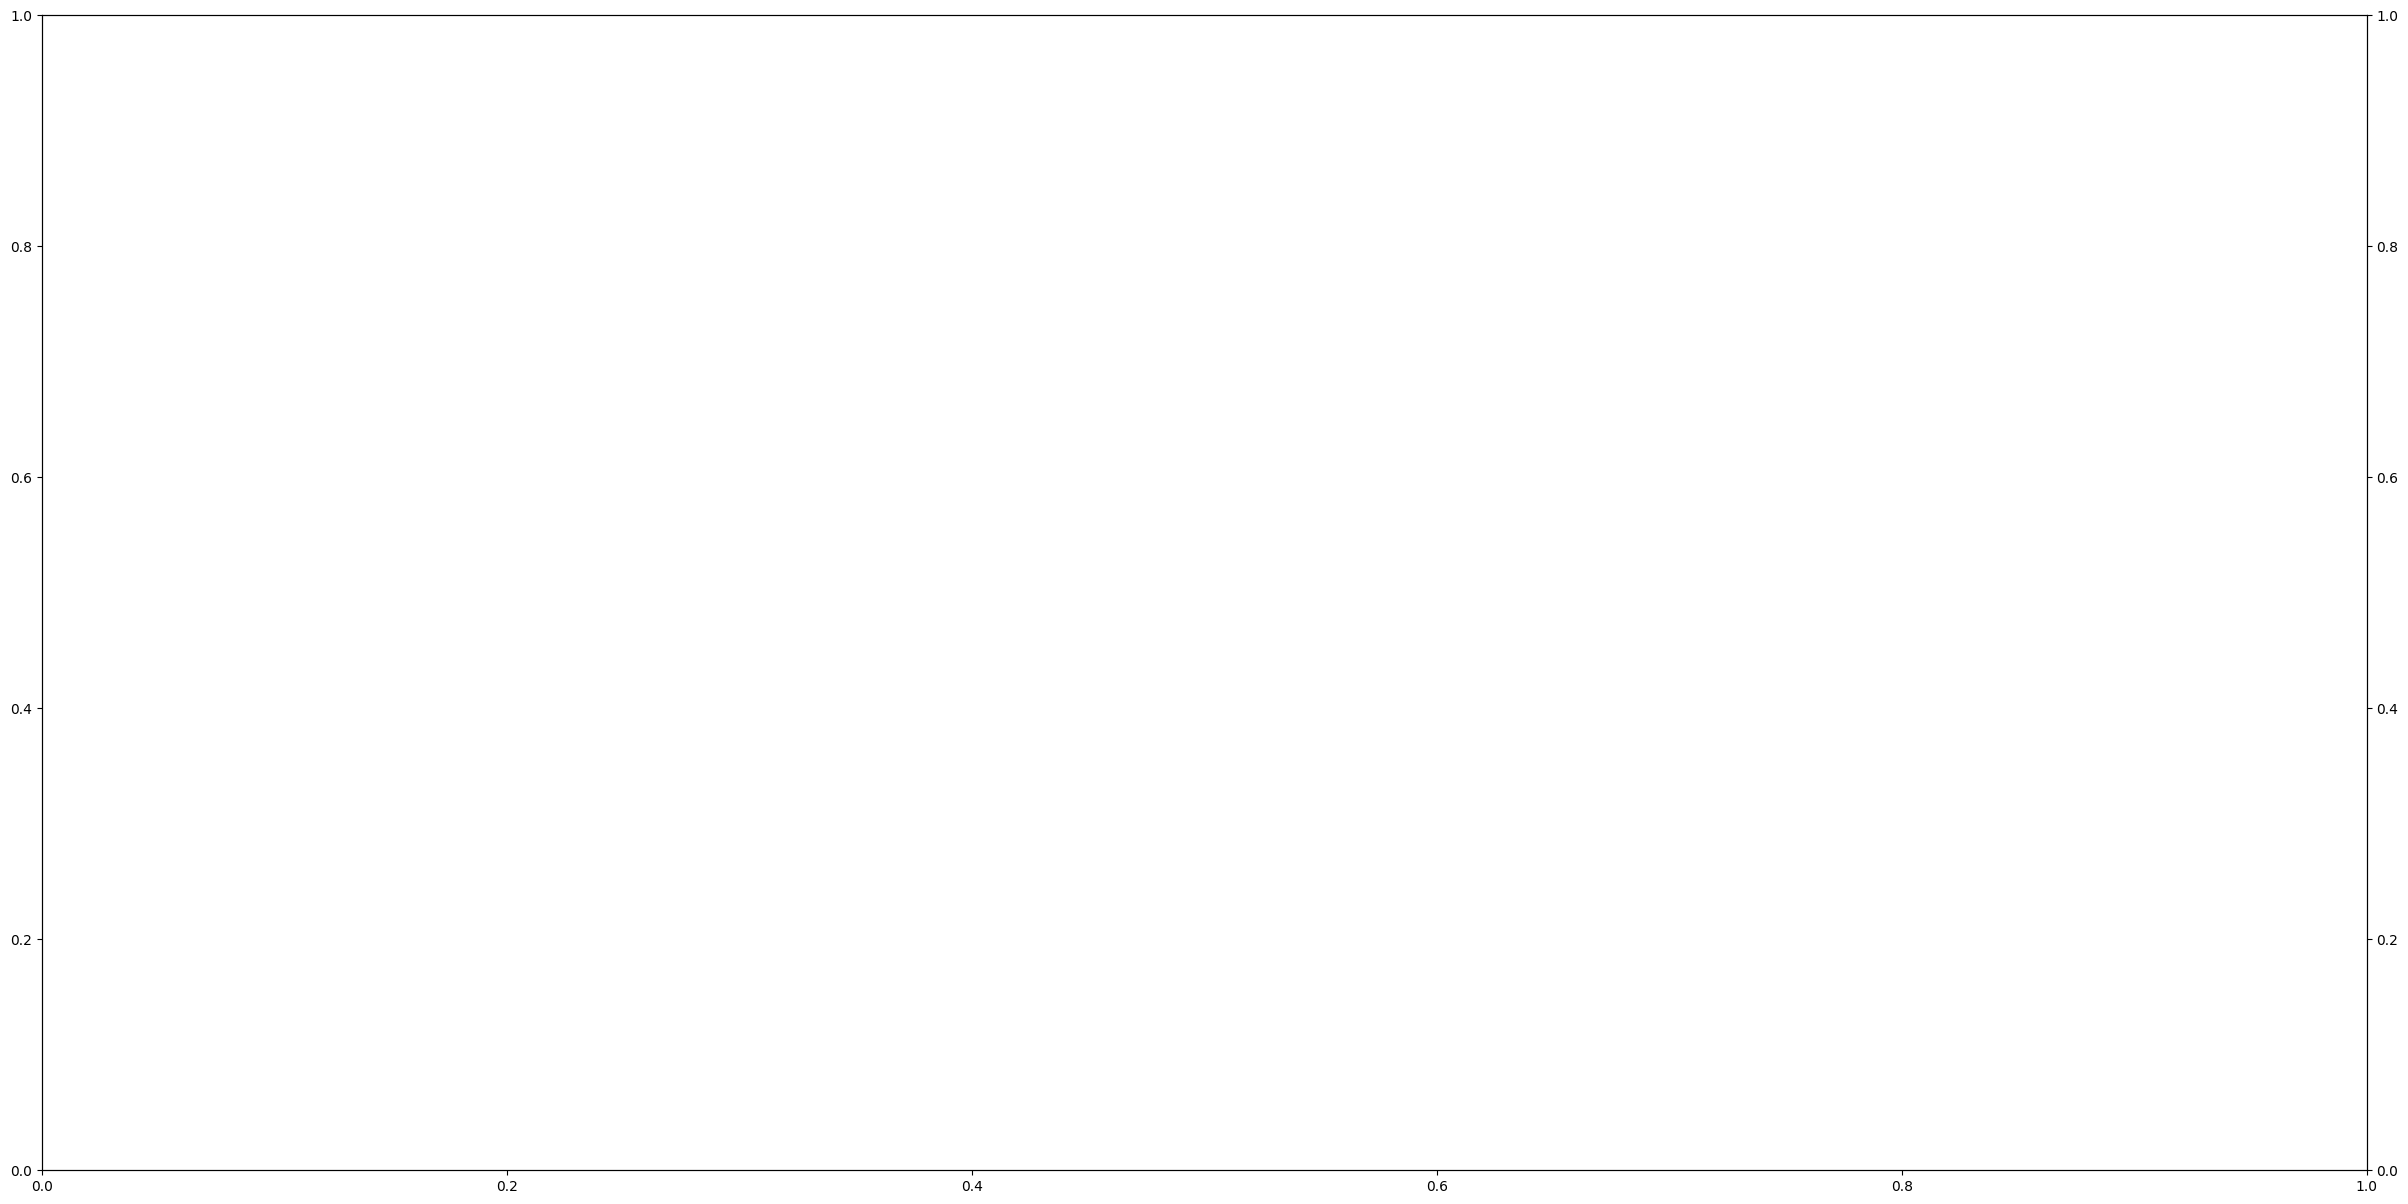

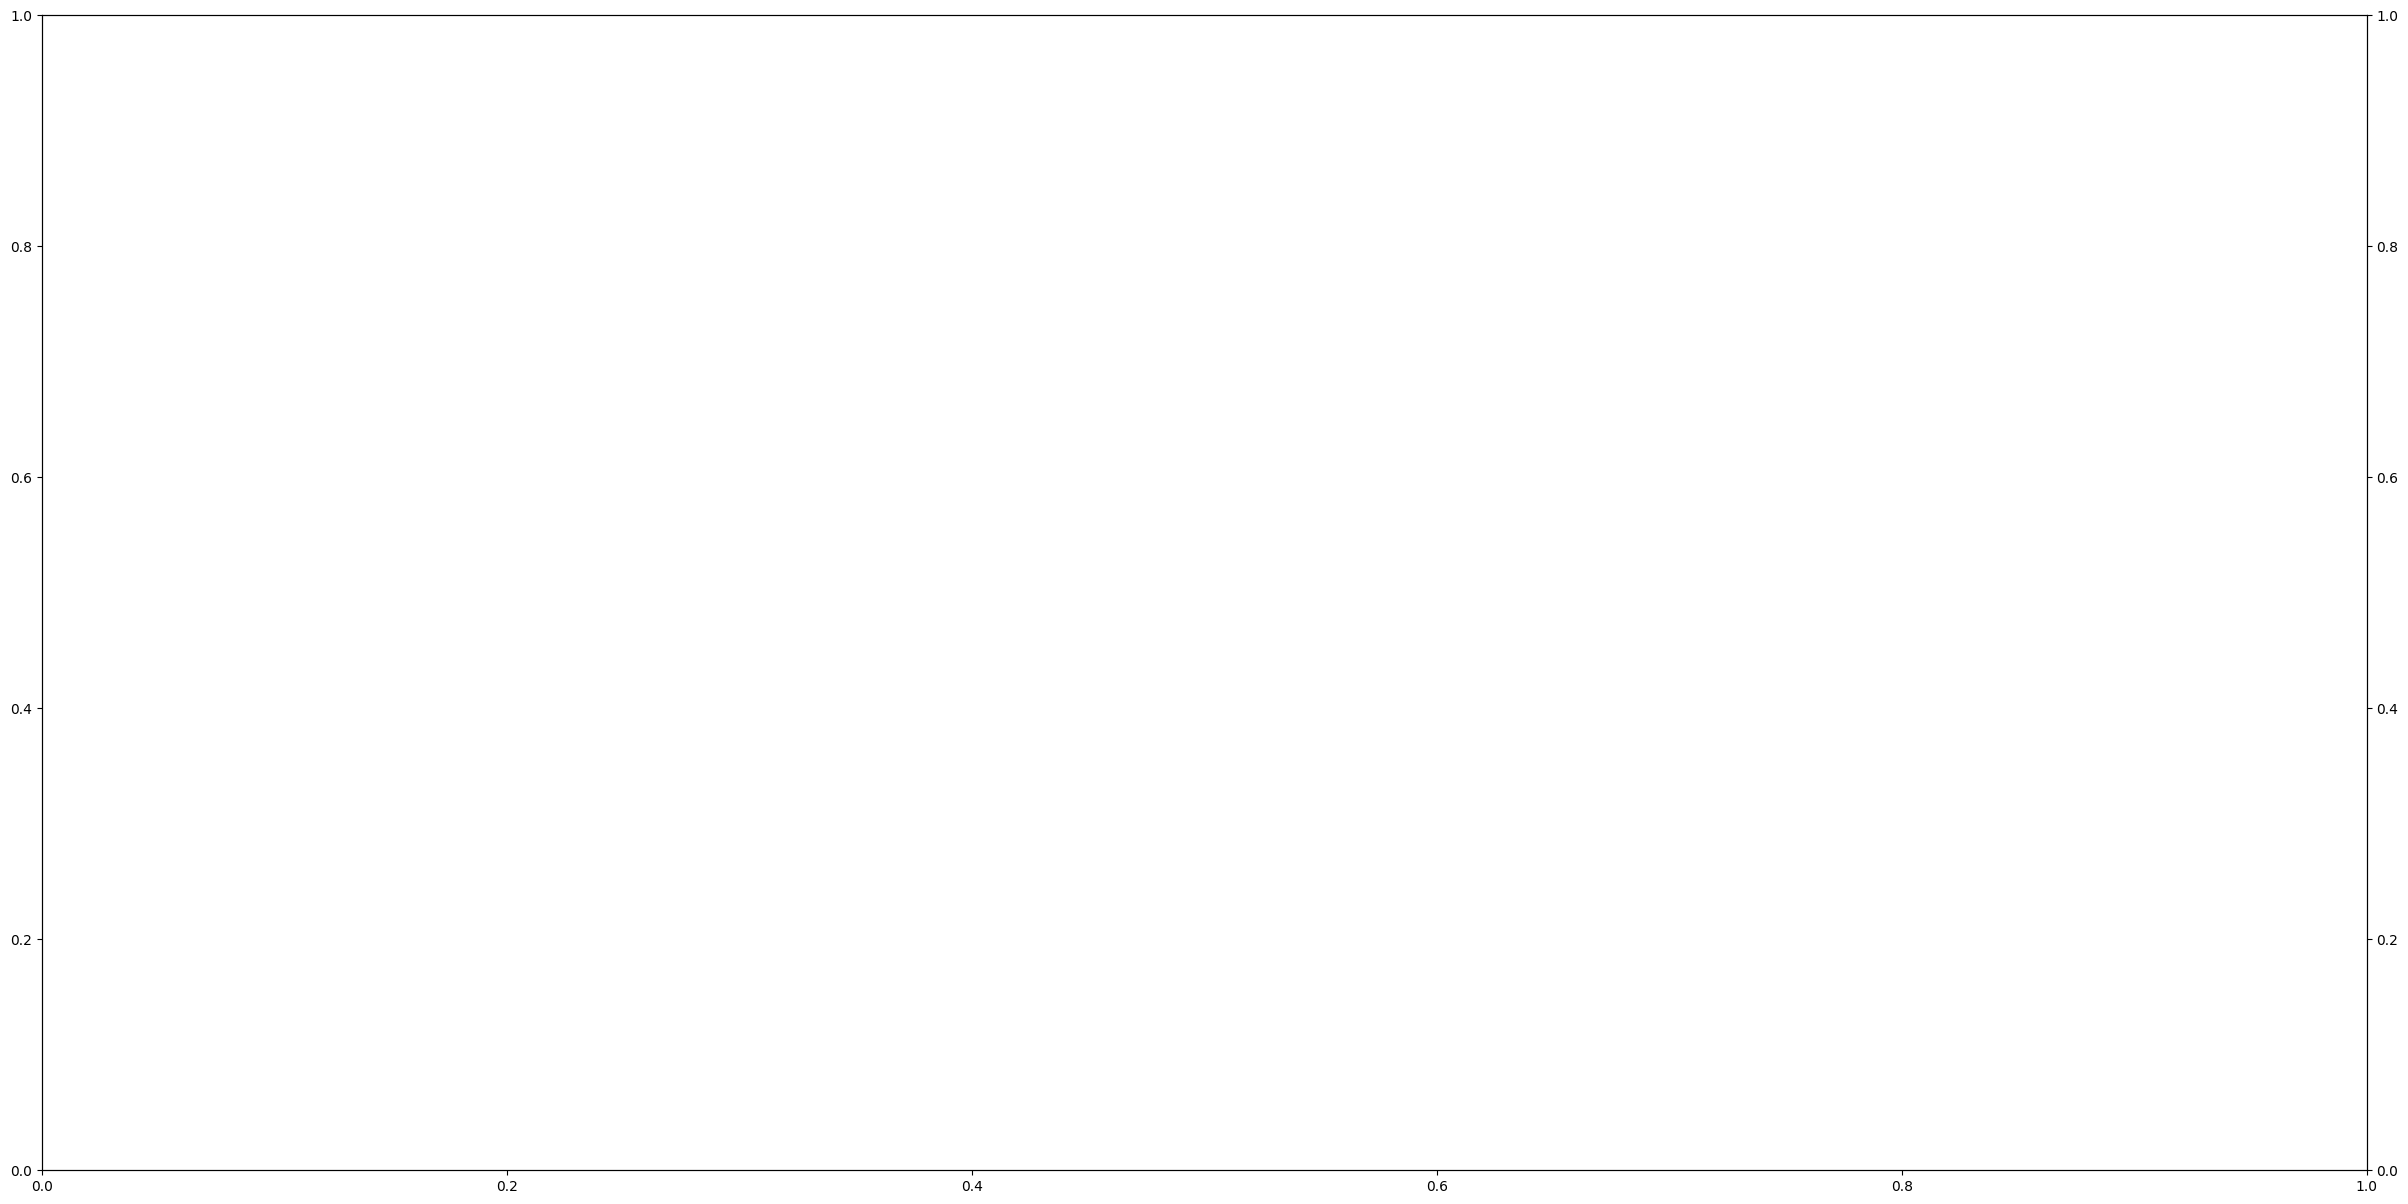

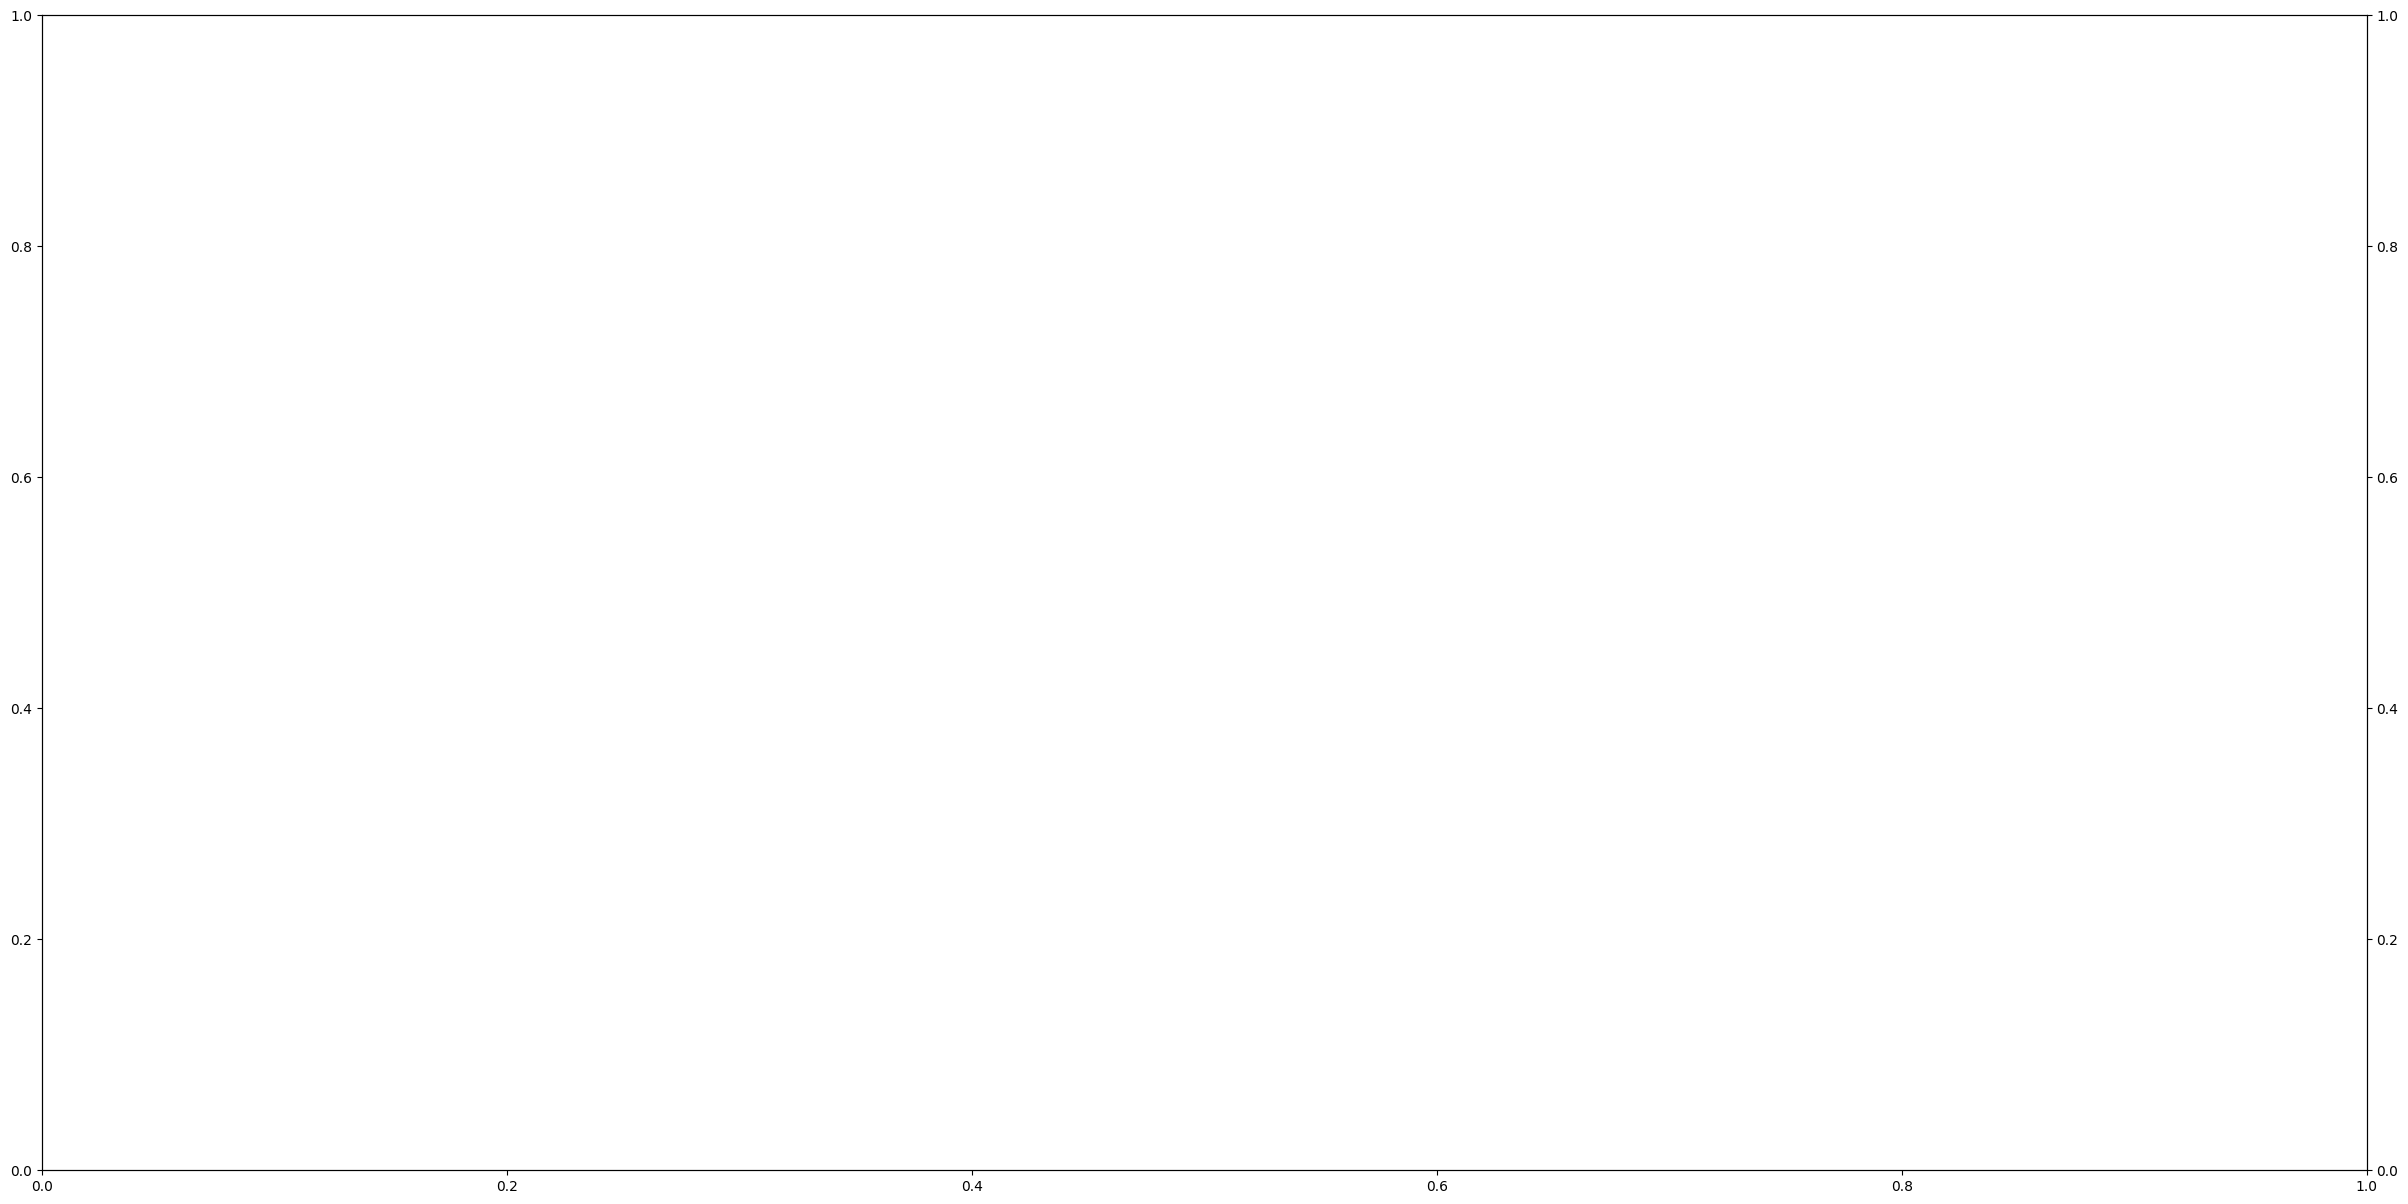

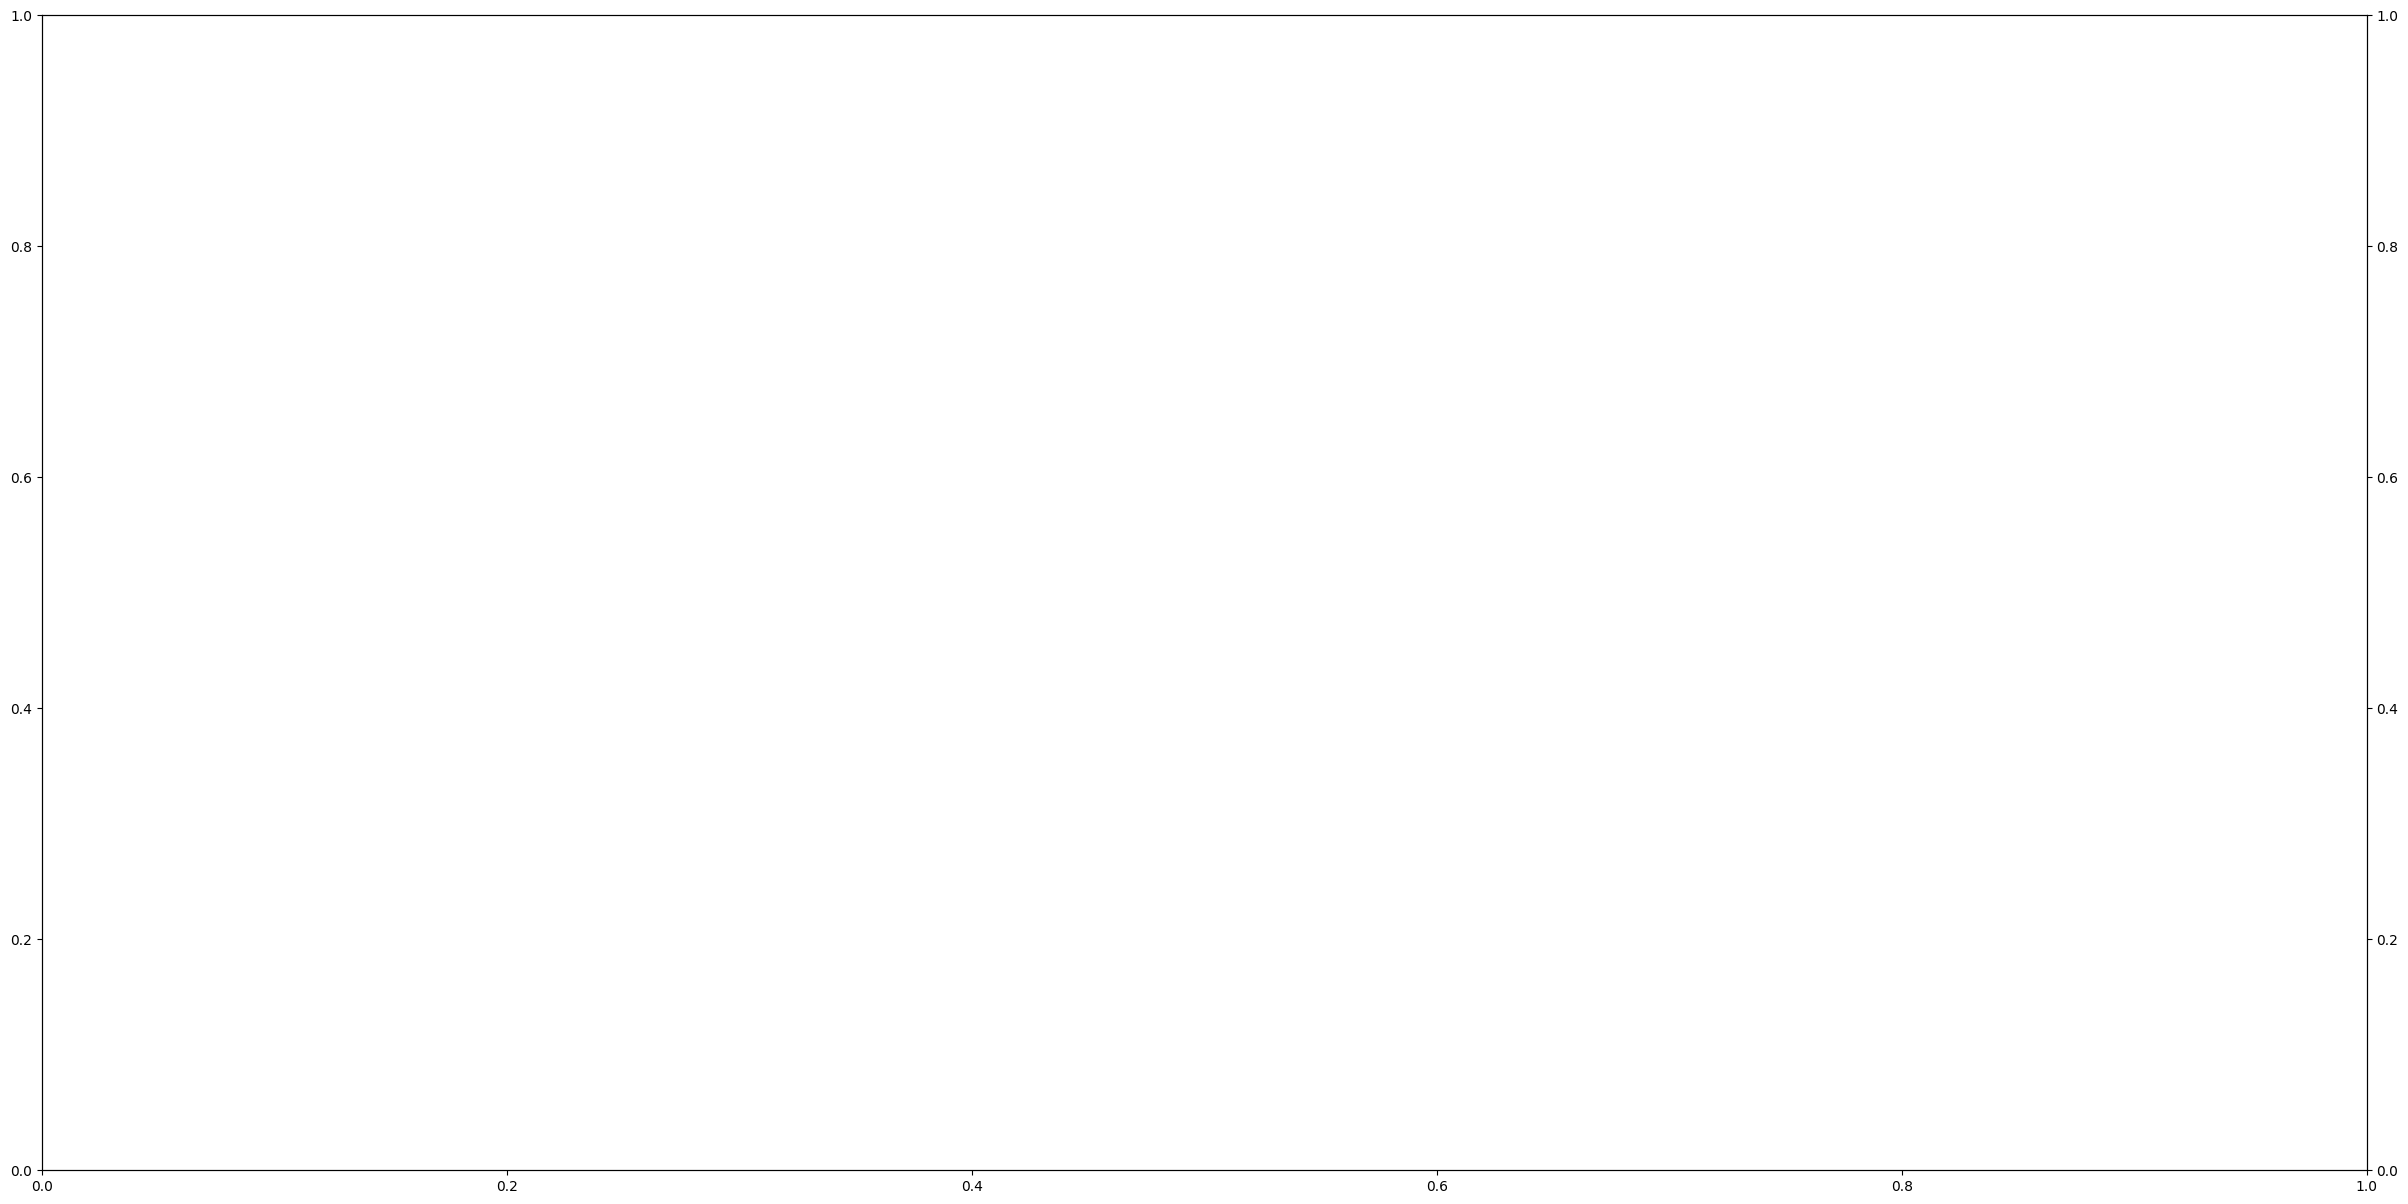

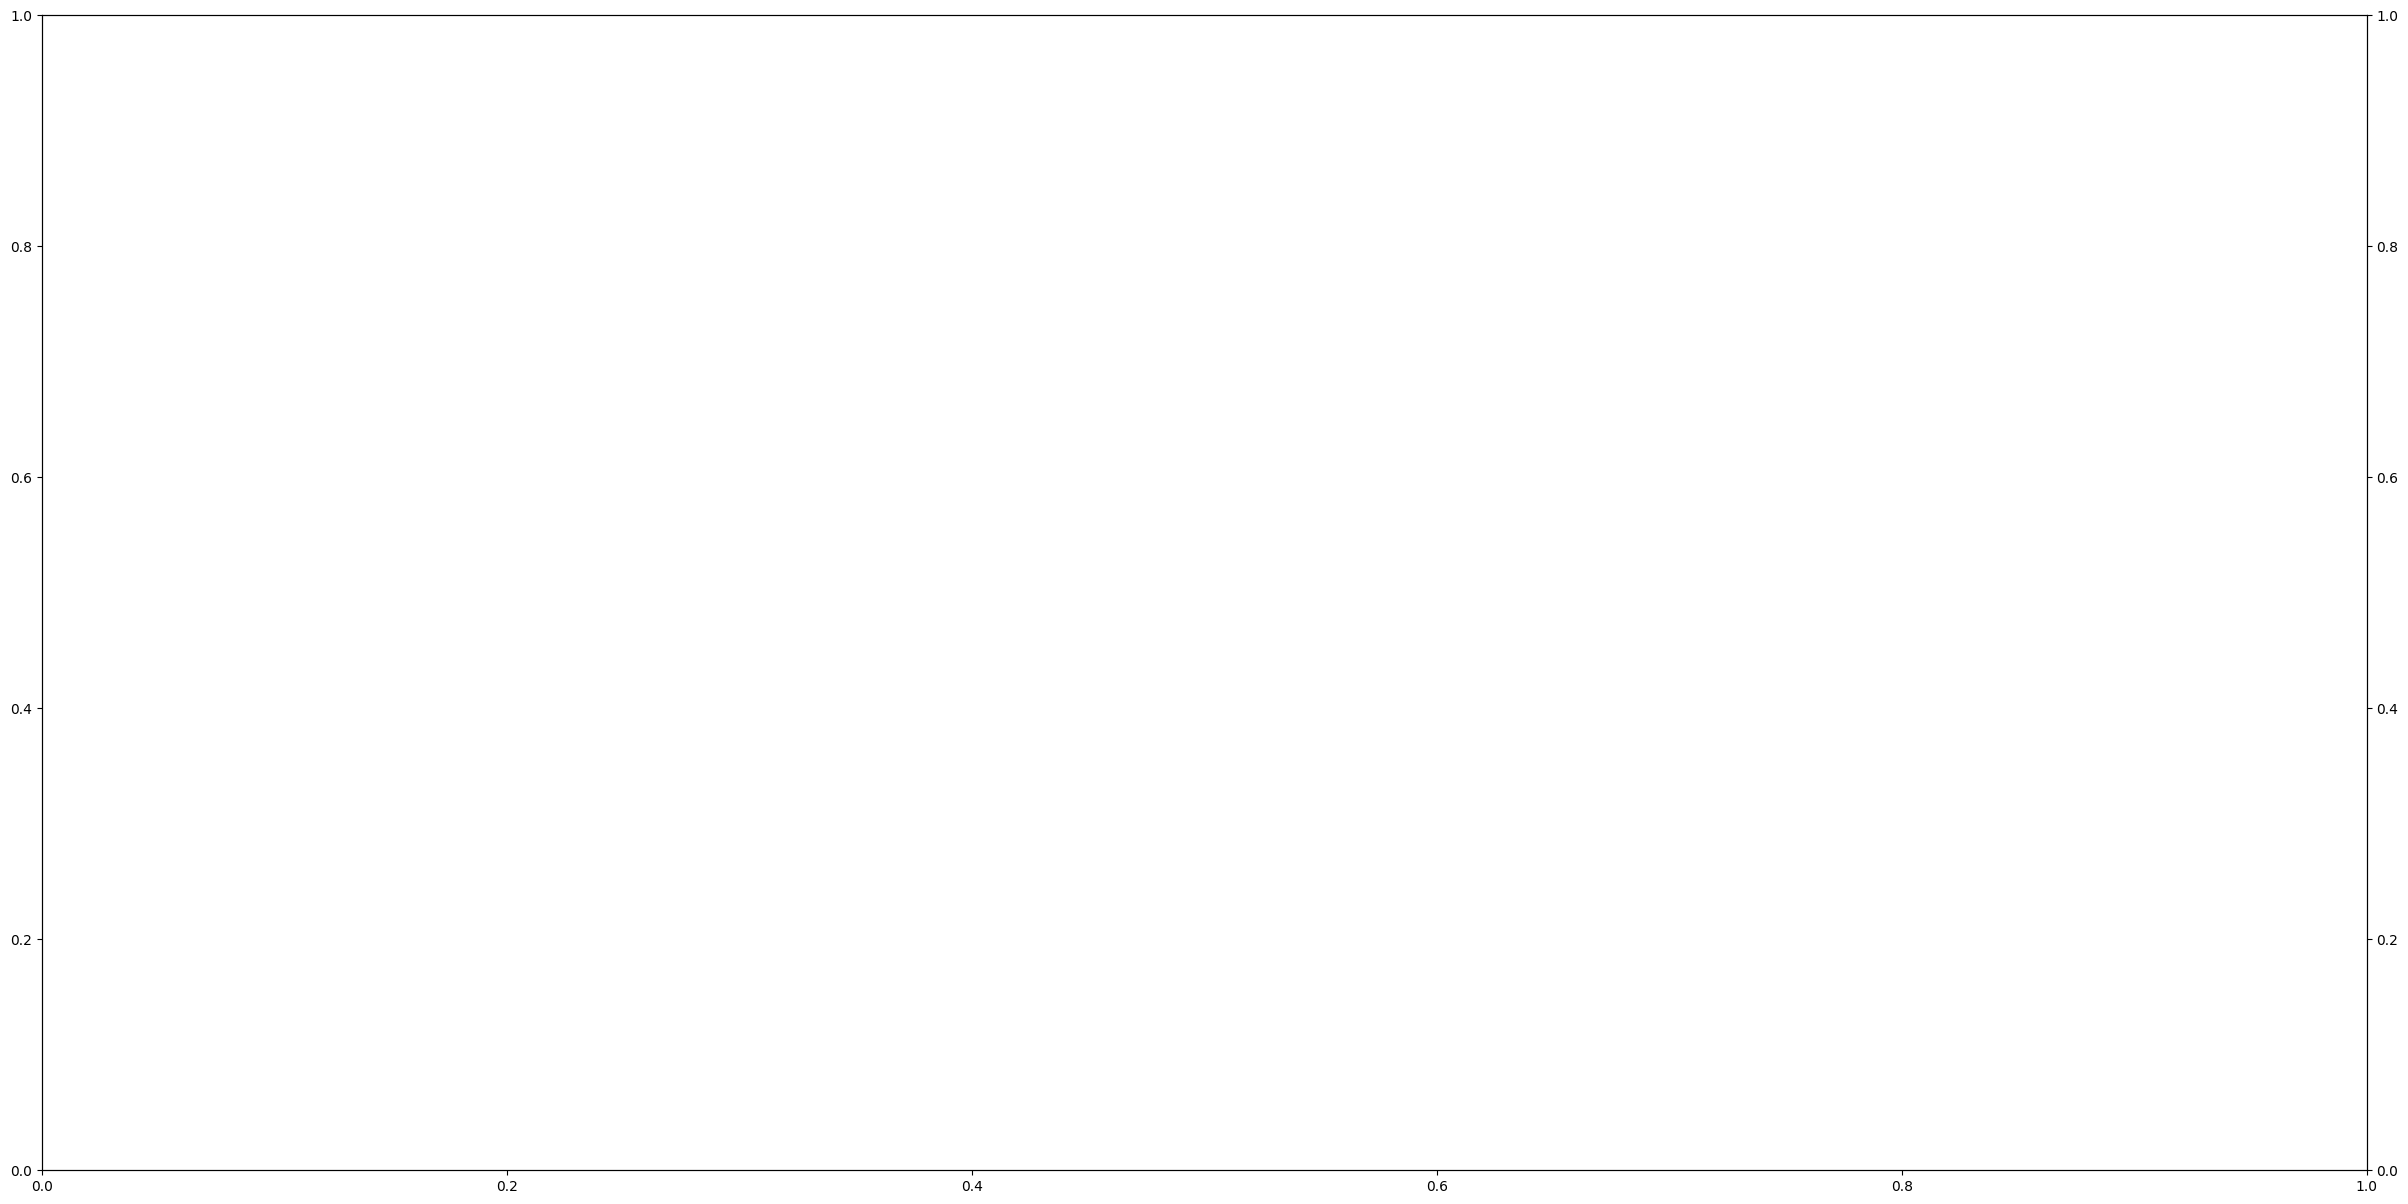

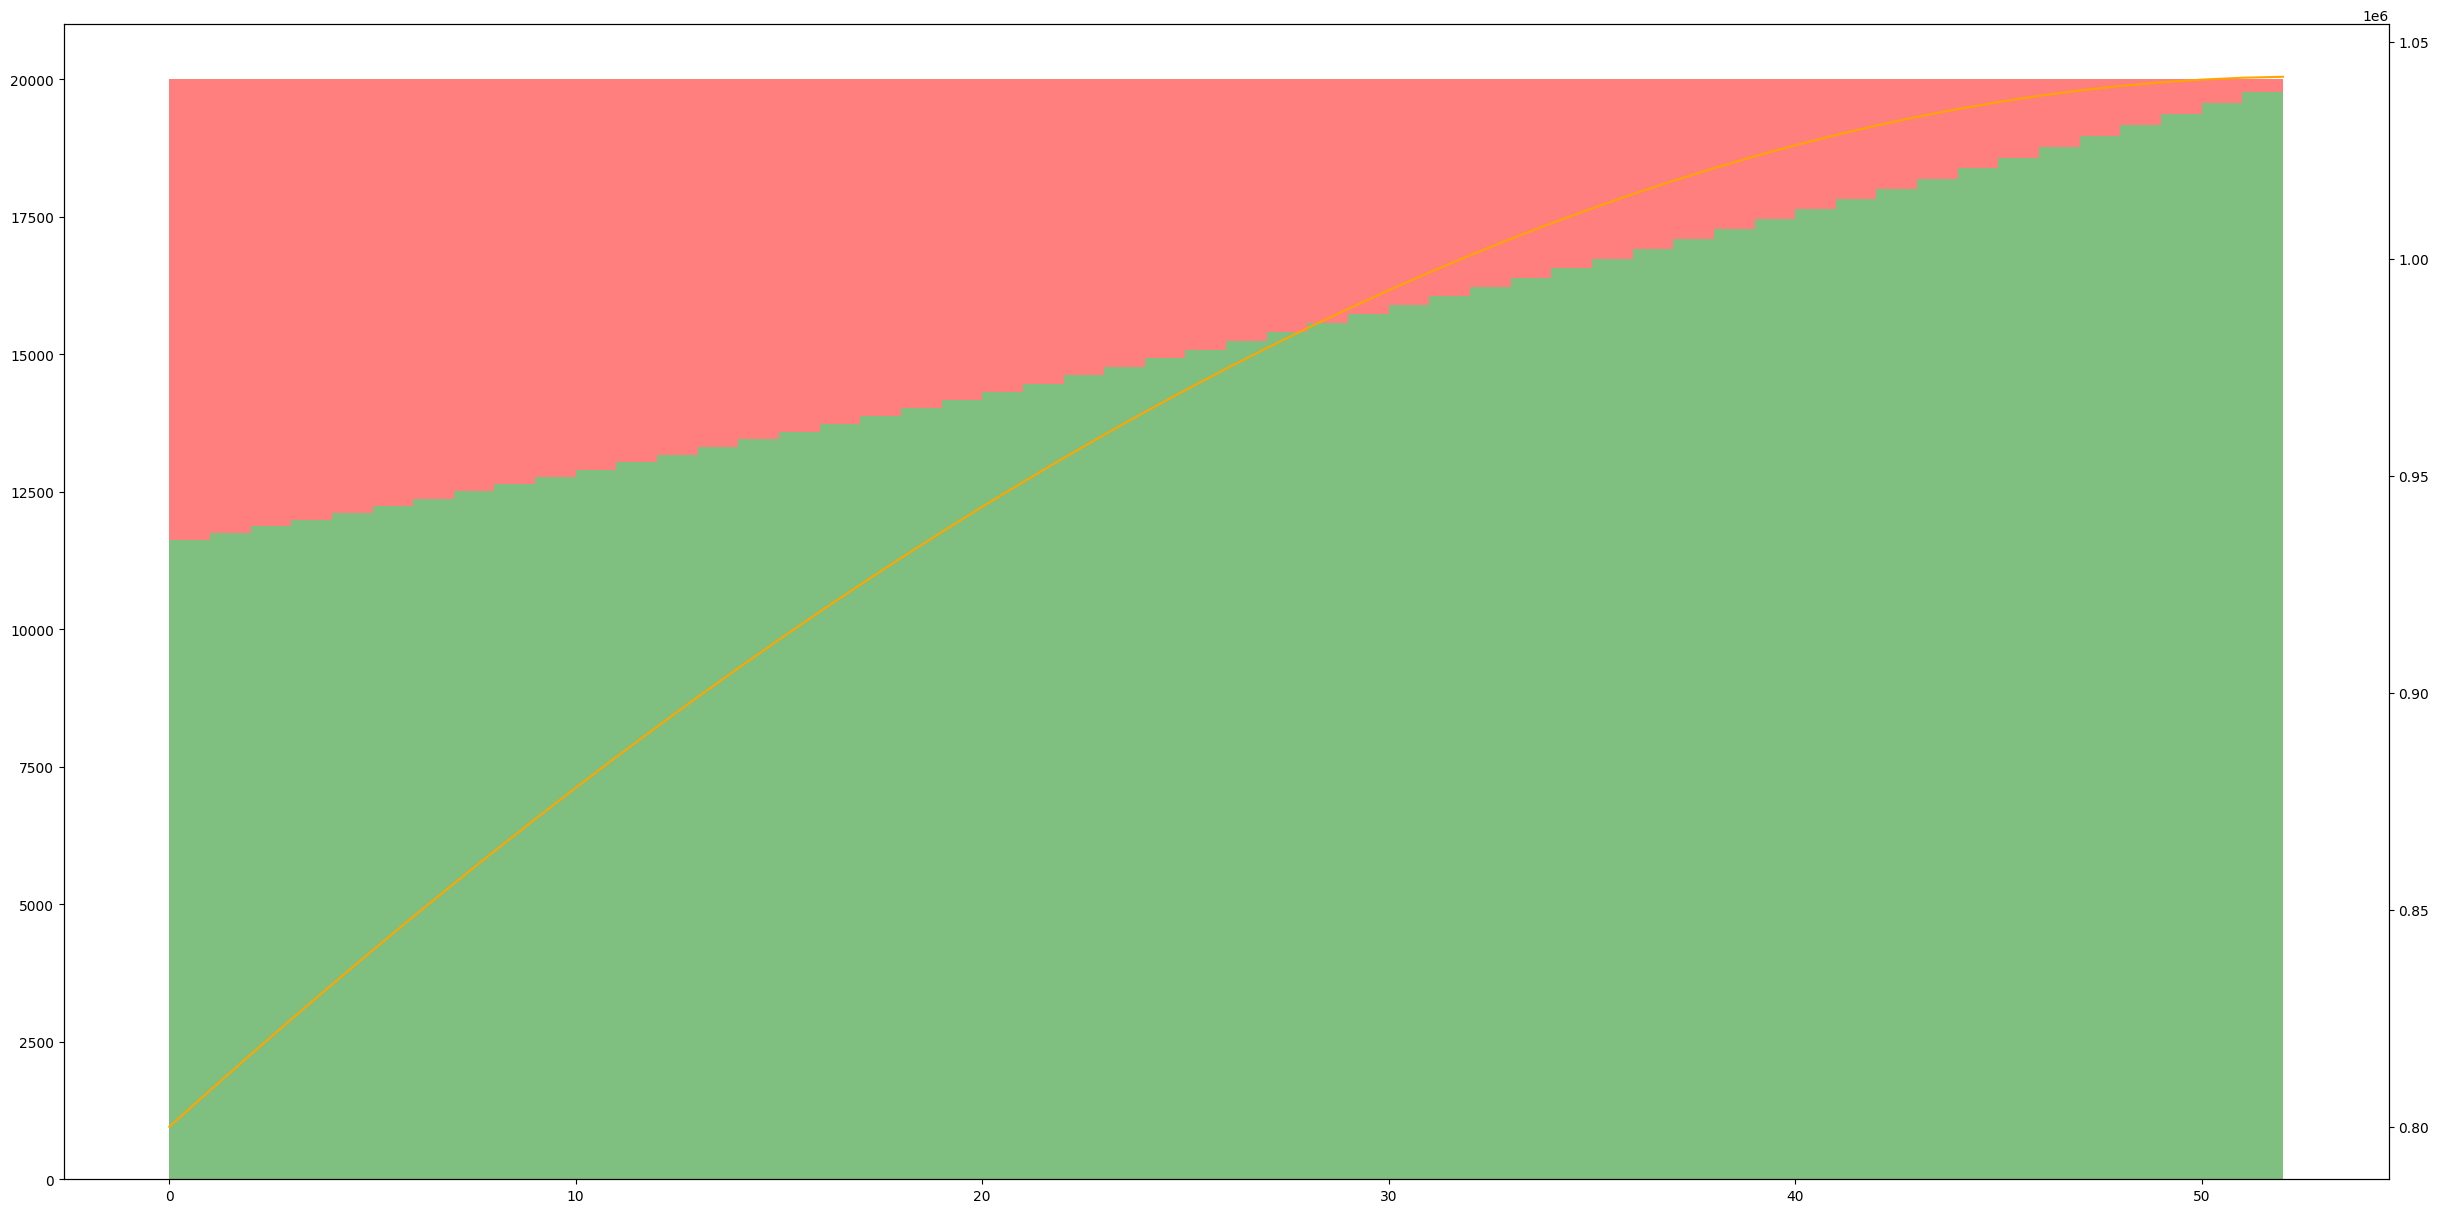

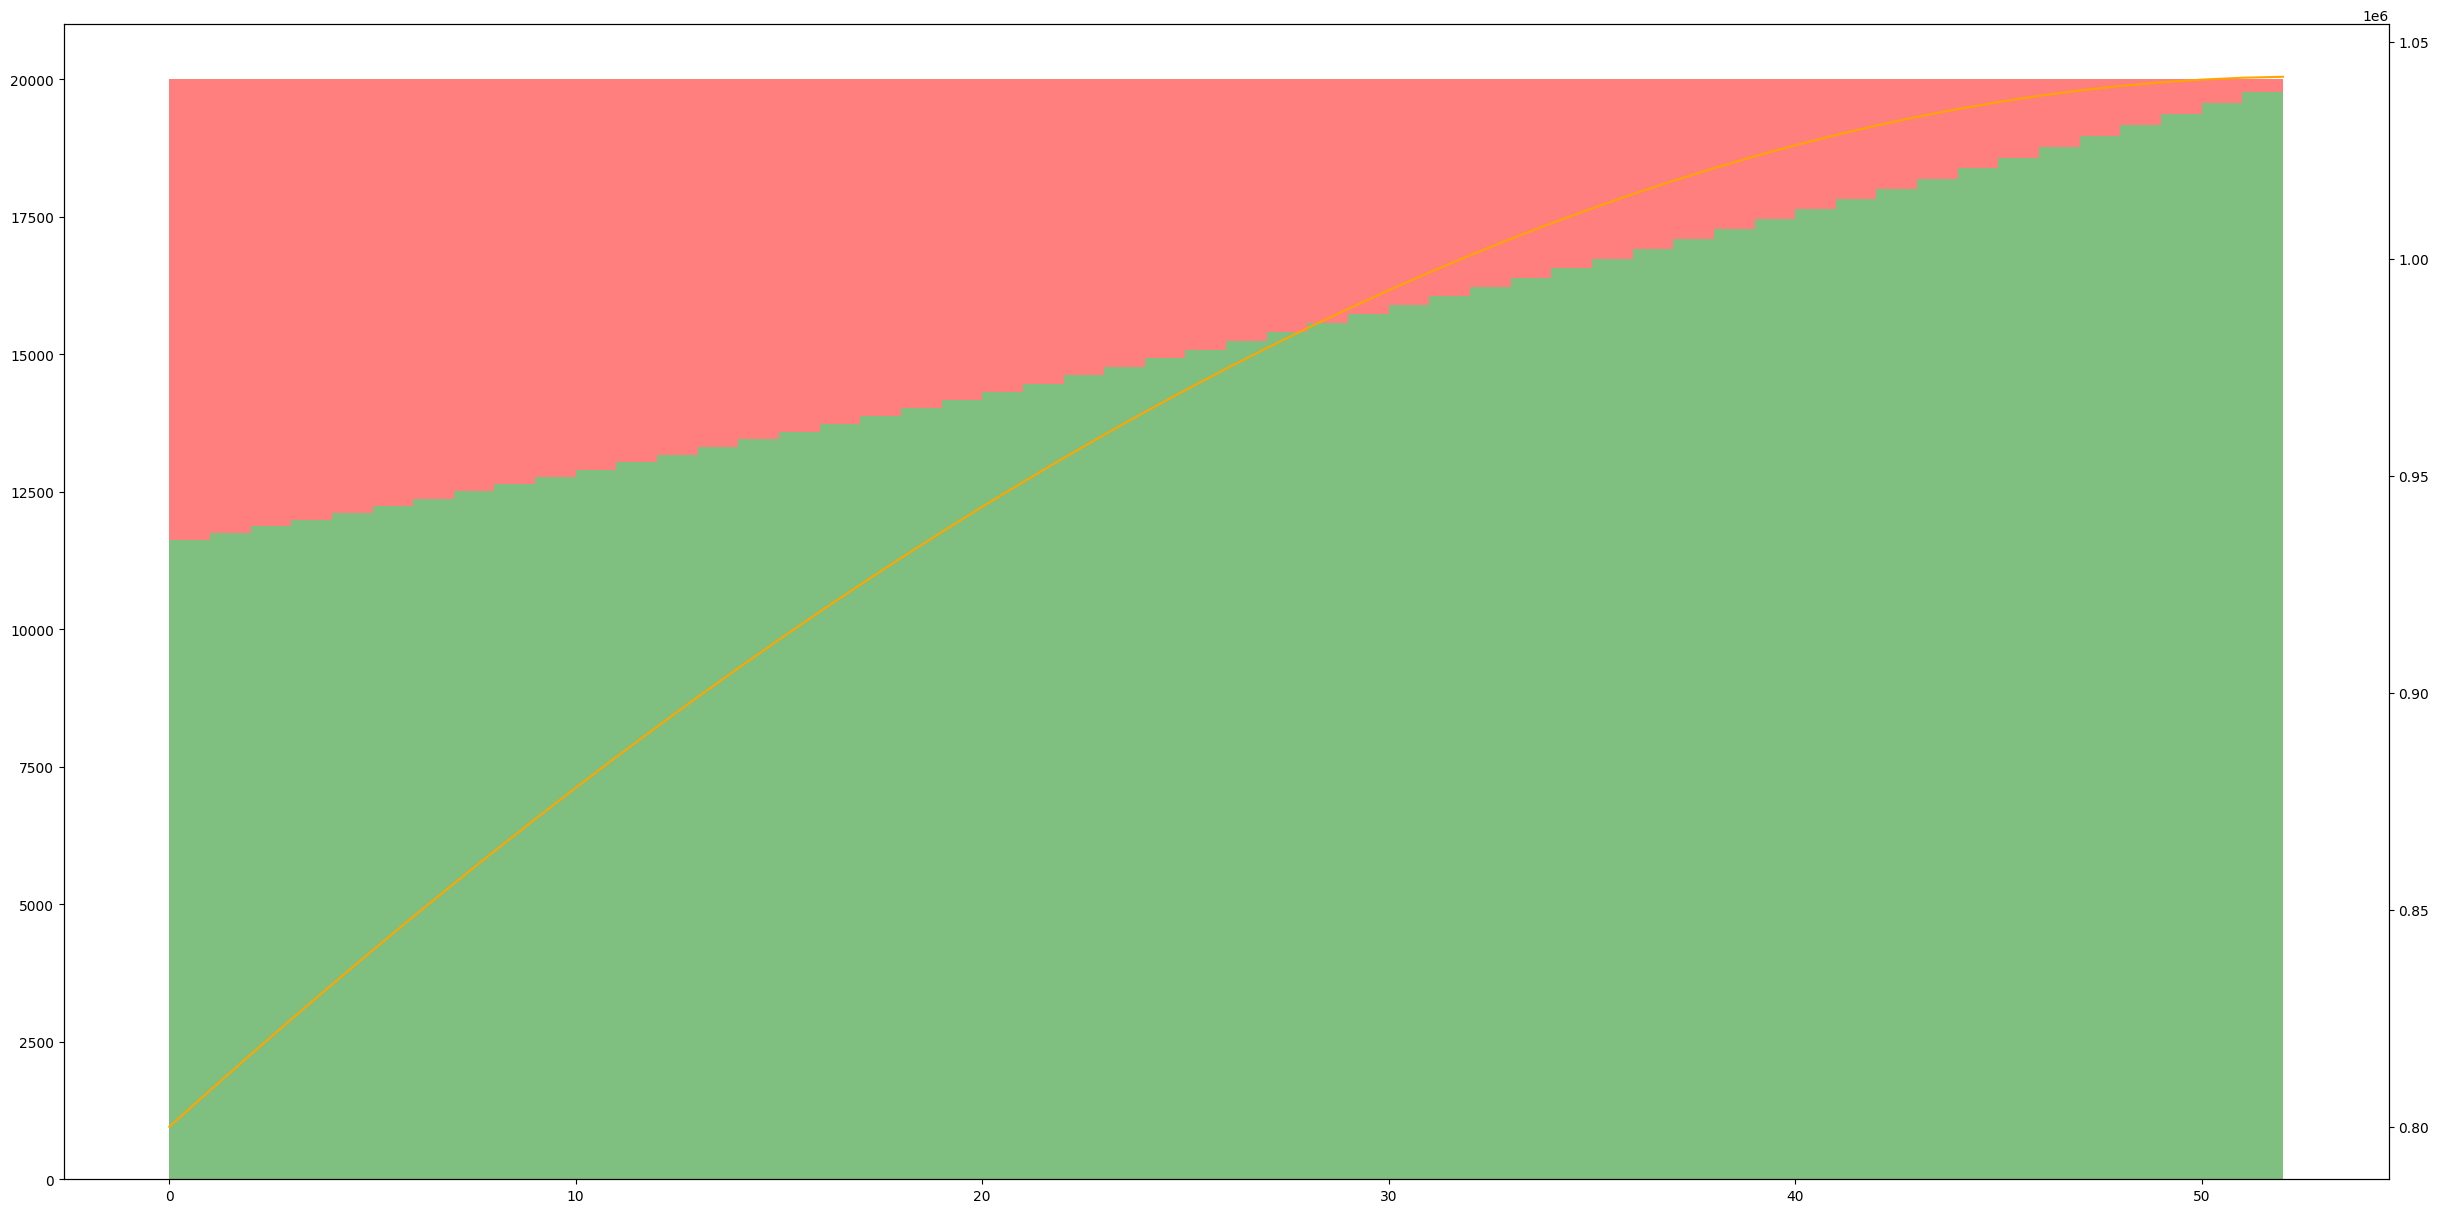

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pathlib

for mortgage in configurations:
    try:
        fig = plt.figure(figsize=(30, 15))
        ax1 = plt.gca()  # Get current axis for primary y-axis
        ax2 = ax1.twinx()  # Create a secondary y-axis sharing the same x-axis

        df = mortgage.calculate()

        total_num_payments = len(df)
        total_paid = df['payment'].sum()
        total_interest = df['added_interest'].sum()

        ax2.plot(
            df.index,
            df['total_interest'] + mortgage.principal,
            color='orange',
            label="Loan paid with interest over time"
        )
        ax1.stackplot(
            df.index,
            [df['payment'] - df['added_interest'], df['added_interest']],
            labels=['Amortization', 'Interest'],
            colors=['green', 'red'],
            alpha=0.5,
            step="post"
        )

        ax2.fill_between(
            df.index,
            df['min_value'],
            df['max_value'],
            alpha=0.25,
            label="Possible valorization"
        )
        avg_val = (df['min_value'] + df['max_value']) / 2
        ax2.plot(
            df.index,
            avg_val,
            'k-',  # 'k-' stands for black solid line
            label="Average possible valorization"
        )

        ax2.plot(df.index, df['remaining_balance'], label="Balance", color='red')
        ax1.set_title(
            f"{mortgage.principal} BRL, {mortgage.max_months} months, monthly payment of {mortgage.monthly_payment}, "
            f"Annual interest: {mortgage.annual_interest_rate}: BRL {total_paid:,} ({total_paid / mortgage.principal:,}x), "
            f"Total Interest: {total_interest}"
        )
        ax1.set_xlabel('Months')
        ax1.set_ylabel('Amount in BRL (Payments, Interest, Amortization)')
        ax2.set_ylabel('Amount in BRL (Remaining Balance)')

        # Legend and grid setup
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc='upper right')
        ax1.grid(True)

        # Format y-axis to be more readable
        formatter = FuncFormatter(lambda y, _: f'{int(y):,}')
        ax1.yaxis.set_major_formatter(formatter)
        ax2.yaxis.set_major_formatter(formatter)

        path = pathlib.Path(f"charts/{mortgage.principal}/{mortgage.monthly_payment}BRL month/{mortgage.annual_interest_rate}%.png")
        path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(path)
        plt.close()
    except Exception as e:
        print(f"Unable to calculate mortgage configuration {mortgage}: {e}")
        continue